# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

(np.float64(-0.5), np.float64(959.5), np.float64(959.5), np.float64(-0.5))

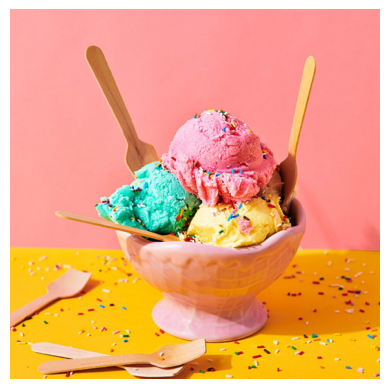

In [2]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """ /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgICAgMCAgIDAwMDBAYEBAQEBAgGBgUGCQgKCgkICQkKDA8MCgsOCwkJDRENDg8QEBEQCgwSExIQEw8QEBD/2wBDAQMDAwQDBAgEBAgQCwkLEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBD/wAARCAPAA8ADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD6wpVHy4pN/vT6+XP3May7qVelLRQA9etNajd7UtLmZAUUi0tCkwG0UnApaZYUqsqikooFa4xlo+8tFH8FA0RUUv3aSg0TuKtDNQtN4NJiSE/hpFWhWpy/dFFygXdS0i9Ka39w0J3Ad96hVoXpQvSmAtKtJS/w0CY5WpKKX7tJkjdv8VNds1I3Wmr0pgn1Gr0pyrilpVG6gdxu33pytRg01qBJ3Gt0pnY7akpn3aTdixlB6UUjdKSdi1uLRTadSBqwi0bfelpNvy0BuwVUpvye9LRQUJ/tU2l/hprdKpO40LTKfRTKI/vVIv3KPu0b/egBv3aX+GmNS0AO/hpm72paTb70ALS7vlpKKSdwHfw0m00L1o3GmAKtJT07Un8VACN1pv8AwKlooAT71LTVIWlX5qSVh2sDdKFpT0pNvvQwsDf7NM/hp7dKSpGhlFFB+7+NU9i7kLLQ3SnbvakrNu5Yz+ClGe1OpPu0h3G7Pain0ymNO45WoXpSfw0is9Atx33mprc5oVaH71LGhu40lKvWkpFIKBxSfxULQMc3Wm/do3e1LQC0ClC0lPVaaVxN2BBmn0n3aj+f2ppWI3HU7/Zpq/LRv96YwfvTd22ov4qkqW2UkKu2nUynp2pp3E9CRelC0tMX71MgG20n8NOpv8NAB/DUeeM0UVLLirCbvaj71G33oHy9aRQbfekpf92koATb96m/991ItG33oGC03d81O2+9G33oELRSLS0AJt96FpaKAGN0py9KWm0AOptFM/joGlcKFX71Cdqdt+WgLnUL0pP4qVelJ/FXQeIJu+an0m0UdvloACcUA5pvz0UAO3Cnbvamr0paBNXCm/w0fw0lAxwGBRwaWm/LQAlBb3oprfdoBbjKVaNu5aF+Wgu4N0pKP4m+lMfvSY0FG3/apw29qazbakYbvl+Shd1EfSn1SdwEVfloXpRu3UtDdgE3ClpPu05aYDlX5aa1O3bVpv8AuUrEB/DQrbV20KtOVd1MBv8AvUKqU5lplJq41qKzUz+GlXpTX70xpWDd96m7m9adtA7VGzbaTLQbvalpi9KkUbqkbVhKRaSlWgdrAP4qd8m356atMb+KqYlq7C/J70bd1N2e1Hz1JQUUUbParKWwUb/em7TQq0DBWpKKKAFVflakpT0am/dpMBaKTd7UD+KknYoPvULS0itVCYtFI1C/LQIcvWkpV60lAC/J7U3d7UfNS0AFFItLQNibvajb/FTVWnbvaoBoWmN0p33qa3Sga3Gs1J/DSN1o+79+gsaP4qZ/DUlMb7tSWLTH705fu02gpDdzetC7t1SbhTaABWp9MVafQJifP702l/hpm40DQfdpKM5oqCkhFoalApdpoC41aN3tTiu2koGncAKf89NHWnfd+9QSwo3+9DfMtJ/DQAtRtUidqZQNDNwp33qbtFOWgYbd1SJ2oX+4KfTRDYUU6mL0qiR9NpG6U2gaVxh4opWO6kqC09Apm7d96nLUf8dAxytS0U3+KgB69KbuFLRQAjN/tU5aSl3e1AC0UiriloAKbTqbQAn3qbT6TaKAGqtO27loVvl+WhWegbbY3btp9I3Smp2oDdHV0m4UA5FG0V0HiADmlpOBTd/vQA+mJ2p9FACL0pp6U7gU2gaH0U1OlOoEFFFFADGX5aNntQ/eigL2G/dpu75qk4IqJ1+ZqSLWoi9KWiik3coYnain0zZ7UgHL0paRelG4U07ALSbRTaKQD6dTaACaaE0FKq0KtLTuJu49dtN3baNppKE7iF3Go26U+k/hpjWg1elLSMdtC9KChq/foaPdTlWhlak1cCPbtpf4aRd38VJRYsT+KnbTTVqSi4DKRulKelMb7uyk9QXcWikUbaG6Uihr96Ka3WjcapO5SVh1NbrSUqjdTGJRRRSYAelFFKBmhO6HewlItDLmhfloSsDQbfejb705fu0lMQUqrQvWnbfloAjXrUlMp9ACfxUjdaSigBFpaX7q/PSUmA7+Gm0UVIBTG6UtM3+9BaQynHpS01utU9SlqNZaNvvTtppv8VRylIZ/DSL91qfRSKGJ2ofvTl6VGzUm7DWrEp6tu61GvzLR92knYppMkpv3aQe9JIzbvlobuK3QkVV/u01utNXd/epaQ7BRRTaB2HUm33oWloAenah+9J/DTN3tQSlcUGn0yigbQvye1JRSbfegLC0Um72o2+9AxV/rU1Mj6U+qSsZt3F/hpn8VOopiCmP3p9MfvQNDKTzKN2WpKg0sI3Smp2p33qWgYi9KWnUmD60CEp1FFADaVVxS0itmgBaRqduNJQJIT5sU1fu0M1LQMT5/eloqGlcpK4+iimruouCViWmUb/eihO4JWOoTtTtwo2im/wAddJ4Ybfmp20U2nL0oAWiimfeagApy9KWmUAOBzTt26mr0paBNXEAApaVulJQCdwopm/3ooKsFNbrSUm72qBiU1V206lXrQWJSY4xTv4qQnuabVgGfdp9JwaOBSAarLQ/ejZ7UbPagASpFqNO1SLVITHL8tObgUyiklch6D8j1qNqczbVpv3qew0rCUU/b8tN2+9CdyriUi/dp233prdKYXuG0U3/Zp9Mb79AwAxTdppKX5/agsbt20bvalpm0VA0PptOpFoBDT1ams3y0+mMtA1uNZflpq0tKq1SVixKVhtpKfTAanRqSiigAoopV+7QAlLtNHyrQrUAC9aF605mqOPfQAtPplKrUAG00lFIP4qAD+KnL1oj/AK0lACNSU6ipbuNOw2l/hprfeptCVyrXA9KKN/vTdxpspaDs8ZpqtRt3UlTdgLuNR7hQq0bRS5ikrC0ypFpu371IpOw1mplP/vVGvWpbuWg/hoWms3zU4fN1pDFooAwKKA3Ck3e1IvQ06gBG60bfejb7077tAbDfu0tFFBN2KzU1adtNJQNOwUU/btWigLke33pafTKAuJ/FTl207Z7UUCbuFOVqWk+7Vkt3FooooEMP3qa39Kf/ABUyT+tBS3I9ooVafSfdqCxqrTtvvRu9qWgAoHvSfdoWgAbrS0n3qWgAph6tR8/vRtFAC0v3VpaYzUADfdpab/DTqAGUqrtpdooXpSsVcWmU+k+T3osFyPa3pTv4KH70UmrAnc6rg0cCm7PanKtdN0eFdBtFOVaAvFLRdCYUjdaWm0wQm4U371FO4FBQtFMp44oAGPOaKTaKbQAUHpRgelFJuw9wqPb70tFSMY3Smq1PqLb81BolcdRu3LT6i/iagFqO3+9H3qap207clANBQnain0CAAnpT1VaF60Ho1Mlu46ihfuUfdppWJ3A9KavWm9aFo0Y1sLRS7jSVICt92mU9/uimVSdxx2EbpTdntTm6U2mUMp38NI33abu9qTLFptKtLUj2GL0p33qNu2loBsZ8nvTX707/AHaNooGNoooptgNXrRuNO3+9NbrVFJ3EoopVG6gYKu2nUyigBfvUKtJS7jQAbd1JRRQAm33p200lPTtQAfwU3caSigBV60lJu9qWkncBNvvRt96WipARulRtJTm6U2mnYuK0I/Mp25vWjaaSh7lCK1DUbfejb71BSVg3e1N+f3padQMTd7Uz+Kl3Cmv3oGlcHbPFRrQzUtQWlYRVxS0i0tA2P2/3qbg06igkZRRQDQPdBT/4KZ1p6dqBCfxUjNTvutRQA1V3LTl+Wj7tH8dADdxo3Gj71JQAUqtTqbt+9QA5O1Gz2o/2afViYyinL92hulAnqC9KWk3Cms1AWCimUVBdhGpq9Kd92j71AxqndS0m3a2aWgApV6ULS0AFFFFABTadTaAE2ijaKdu9qSgApNu6lpF6UAH3aF6UL0paBjH70Uu33NJs9qizKuFFCdqKLMDraTd7U35vSlrqseBYX71LTMtuzS0WQWF/hpKKKErDSsMpf4adSbhTGC9KWkzxmm0AO3Cm0J2p9ADFb1ooX+KkwKTK2G0jU7b81NYbakOolM/jpf4aT5KCw3fNSfxUjLSUFJCNRHSnpSqjUx30JF6U5VqP7rVIvWhOzM2OXrS/xU2kj3y/LF/31TSJempIrUN81UbrWtD06RYr/V7eNm/vNTrXWtE1Dcthq9rMy/3ZKyjiaE5csZq/qidd7P7i0q0bVoZW/wDiaatapFJ3HKtJS7lWhW3ZoYa9Qb7tMqT+Go6NikFRM22nbdtRstJu5S3DduoVad92m7vakX6Dtvy0lJ81NXpQFhzUlIw3U5floDZCUi9KWigYm0VG3WpG6U3Z7UDTBO1NbrTqF/iqyhlItLSfdpPQB240lJ96nL1oTuAbjSUUUwF27aSiigApFajd7UbfepbuP1FopFWlpp3EFFIn3mpaEUgpNvvSUjM9SCTFplG/3ooKSCmUUUm7lLUKKKZuFIaVhaKKKBjf4qXaKb/HS71oHYjpdvy0lHQVBeoUq/dpKev3KAYUzd9aKKASE3e1LRSLQMk+Sm/dpyrQ23bQSNXrTqZS7vloAcq0bPamUUDsL937lN3e1G72o/ioGlYUGnp2pqr81O2e1NK5I7cKNoptFUKw5RtpaZTdxpN2FYN39+j5Pajcab/FSbuUObrUa9Kdu9qP92kUtBKRWpaKAEbpS0U6gBi9KfSbfeloAKKKKAGr0NFLu+XNLQAxdtLS7feloAKZ8nvS03+GgBV6U7d7VGrU+gBNwpaRulCtuoANoptPqN23Um7FI6yiiiuk8MRelLRRQAnAphOKWmVLdxofRRTKQx9H8FFOAxVJ3BifLSJ2p20U37tMlK4UUUUFDd22mn5vvU2RqNwqBpaCfw0n3ac3Sm0FoNntTU6NTv8AZo/3qAuN2mnK23g0bvehdtAxwORTvurTQu2nbttNEMktbf7ZN5SvtVV3M391a8V+KHxUuLi6uPDnhyVre3gby2mX7zV7F4jvv+Ed8A6lq6/LPOjKtfJMzLJI0rbmaVt3+9Xy2fYqVWusHF2ileXm3svTr5kUZXbqdnZfLdhdahcX0KxXVxJN5X8TVHZ3VxasqWsskLbvvRttoaNPM2JRa7PtC/3lrw1TppcsUreg5Tktbno3hf4seIPDrRxau/26xb5W3f6yOvbNN1aw1ixj1HTp/Mt5V/75/wBmvmfy/Mk37PvLtrpvhn4ql8J69HYXUu7Tb75WVv8Alm396vdy3M5UZKhVd4dL9P8AgGaqc2rPfaevWm7drbkfcv8A6FTlPy7q+p+HQ1vfVATmo9opzdKSi1xoZv8AegjNH3aE7VJSI/lo+9TlWmr97/ZoKFpPu05utMoGhFanbfejb705fu0A2N27qbtFOb/Zpp6tQCYtM+9T6KBjH70UUyqTuUtRFb5qGo2+9LQxhSLS0VPUApGp240lWAu00lFJt96AHbTTVp240lABRRRUt3AQfxUtJu27qbu3fcpDFpPcUL8zU7b70XZV7EdMqambPagaZGG/vUbvajb70tSWhjNSfw0/b70LQMSkXpT6ZtFJuwDaKKav3aksSk+9S0UFBSbvalpNvvQAtJt96NvvT/4aAbsNoop6/LQK4yinfw02gEgopFpaB3CkVt1LSfdoAMH1p200lP8AkppXJuCdqd8/vTaF7VQmPpnyLRv96KTdgSD5Kj3e1OYbaSk3cpLqFFJu9qPvUhjdop9FJ/DQAtM2inbfejb70ANXpTlpaRaAFopFpaAbsI1LRSfxUAG33o2+9G72oVvmoDUWiimbkWgBaKZvo30rlcrHbRS0xWp3z+9CdxNWD5PehelLSL0ouOwtMp9RM3y0m7glY67/AIDTW6U7d7UldR4KCmfwU7g0jHatJq5Qh6UUhb3ptIa2F2mhetJT1UUh3HL0paaq7adVJWIbsFMp9MfoaGUt7DKTd7U5vu1H/wABqSlqrgzbmpaZQv3KFqrlD6Z/BT6Yu6gBy9Ka/el/hpV+6KABfuigDFLSx7V3UCbsJTZF3IRTqRfuslNK4Nmb8Zldfhf+6/h+9XyzIu6ON0b5q+tPiBatqnwzvoovvQx7ttfJduyxqySuvzfL/u18TmiazCpLo1Fr5aHNhX+6ce0n+I5li/4E9CxvuWLZ8ytu3U7bt+RNv+y1WLXyvM2O+5l/irhempo1cuQs0kbf7NRzW6su7ftb+Fv9qi1Z2b7/APFVyRUj+Vk+992n2Zls7HuXw18Tf8JN4dja4Zftlp+6nWuq2mvB/hLrn9k+MGsm3LDqC7W/3q96k719rluJ+tYZSl8S0f6fgaxfQj2+9DUKtDN8tegWRv3oX7lD96NntSZohu405O1NY7qX+GpGL8m6mstJRQA2nUiru3U7btWgbaBVo2mnKvy01t6/x0CGstJStSUFLYKY9G/3pu3dVJWLSsIelJt96Wik2VcVetJSbvahaLpBYWk2/NS0m75qOa4WFpP4abuFG4UJ2G0xy9KFWkpVp3FYZ/FSuc0+oqSdio6j6XbtpidGp/3qBMjp24UtM2+1DQ0G56buNOo25qdShlLtNOplKzARaPvU7aaa1OxVxKY33KcerVFUMtD6KZRSKsFFJt96Wga1ADNGMUoOKdQK4ynfw02igNwp9R/xVInagTVhlFO/ho/hoC4irTqZS7jQAlFFA5oKYu001mxTmbbTfvU27iQfNS0i9KWkMTc1G72pabQJCN92helCndTtu2gYtMWRN3361fDfh648QTM7N5drC37xv73+7Xd/2HoKWv2f+yI2j+6zfxVw4nMqGEly1NX5dDysXmlLC1PZ2cn1t0PMf9pPmWnbTWl4g0NtEvF8r5rWf5o6zV6100a0K8FOm7o7aFeGJpqpT2Y7Z7U2RqCc0ytTdLqIo20bt1H3lo2igYK1O3e1N2ij7tAD6bSbhTloC4tNp1M+7QAtMen0jdKTKQ2hO1FCstStFYY5elLSL0papEDf4qSn0ypLH0x+9CtSbRQB1lN+Wl+RaWupO54Qi9KG6UtFFwGfwU1WWpGWo9vzVI0Opy9KMcYoXpVJWEObpSUrMjVHRcUdQ3+9NYsO1KfufhSL1pN3KXcYW60m4U4jFR0i47C/w0idqVR8uKXgUDE/ip1MTtT6ACikXpS0AFKvy0N1pKBbhSr8tJSqu5aq4Mv6WsVxDcaTdfNHdRstfK3jbwvP4Y8VX2lyRfLuaWJm/u19OJN9nkWX+7XF/HrwmmveH4fFGnRf6RbfeZf7tfOZ7hU+XFLdaPzX/AObWlV12l+Z8/xt91nRVVvlanLGqtv+6y1G37yHyvl/dN97/ap0ccsi/e+avn90aFpZk87ft3Vcj3SN5Uv3V+as+3kiVmdP+WVaUdxt/e7PlaoRm1bUIZJbO4jv4PlktmVlavozw/q1vrmj2+pQPu81V8z/AHq+dZE+7s/i+9XoXwX154bq88OXTttk/eQV7WSYl0q/sZbT/NDjoes/w02ikbrX1lzdakb96E7U1t1JUmiWgv8AFso2mhetOoGN27aN26l/ipF60AEfVqNppyr81ObpQTcj+7S/w0/b96o2am1YadyPd8tN/gpzfdptCVzSOuoyn/wUU1utNuxQ3dmjd7UKu756SokUFKvSj+GkpDFJz2pKdTNvy0AN+9RRt20UFDgc07d7U1V+WnbfemlqToxaiqTb70bfemKLsNjWnfdo2+9LTS0B6hTG6UHq1J/DTsCVhKKKKGrlrUP4KKN22m7jS20AazU09KG6UN0qG7lob8lCdqKb8q1BYN1pKKT5qCloLSLSgUUBfWwUsbUlJ/DQDVxaTzKP4aPloCwtPplKrPTTsJiUUv8AwE0bTQlcQ6iimk5o2ASk/hpeMUUihB/FSUq9aWgBi7qdt96FpT0p2AT5abuFC9KWkC0ETq1DRtJtii+9J8q0L0rX8I2a3Wuw/LuWD5qzrVVQpyqv7KbM61X2NN1Oyud5o+nxaVpsNhB/d3SN/tVbuF2rsSiRvl81flXdRK33G/vV8FVm6vNKW71PgOaU588tWznfF9n5ugNKf9ZA25W/2a4aJlZNw/ir0nxNH5nh3UET+GOvK9JbdZK7V7mQVnrRPoshm3CpDomn95aam7RT6Rq+lPoFsNPVqF6UtFAxv8VPWkooAX/gNN5/uU+mN96gA3Cm05ulG4Urj2FpG6U3f70N9yk3cdgTtQEzQq0+hK4N2EAApv3qkVaP4qQXI6fTf4qSgG7Aq7fvUOMUb/eh6B9TrT0ptOPSo/4q6keCh60lKtM/iqRWuP8A4abt+ahulAOaqwx235aQ7dvFNJBpfk96TYkhP4aSh+9JkUikKcf3aZS7vmpu6gpLoDVHs9qcTihTupN2KWgbhQM/xUbRS01qrjEAxS0UUAFFL/DQ3WgSdxKKKKBhRTf4aVfuigBas2McWpWtzo10v7uddtVVXdRHI0Miyr95WqKtNVoOEldPQyqx9pHlPm/xp4Vn8K+ILjS2+6rfK396sH5I2ZH+7/FX0R8a/Cqa5ocfiW1g3TWy/vFWvnmaP5WWVP8Adr4WtQeHqOlLp+XT/L5GdCfOlfcjaRFZX2fL/dWtK13t8kX3W/8AHazYW3L8ifc/hq5ZzbVZfmrJsuexpQ/LCy/eqbQ9SuND1iz1RPvRSLu/3apx/wCs+dttOuPm3fwrTU5QkpR33XqZRWp9MQ3EVxDHcxfNHKu5aazVwvwj8TJqWjto08u64sfu/wC0td1tFfe4fERxVJVY7Nfj1N4jf71BGaKE7VoaDfu0771D96FWgq41Vp3ybaKKAauCdqPvUbPaigkN39+o2+an/wANM/ioKSsN/wBmm/PT6Y/eqRokMpNvvTtppf4aGUM3e1H8NG33o2/LWZYlFJtFLQAzf70K3rRRQVZBu3UJ2oooSuA5fu0771CrQvSrSuQC0tFJt96GrEgtLRTNwpD3D/apnPtU1FNMalYioooZqGy07jWam7vajd8uaavSoKSsPqJ+9KWGKY3WpbuWtA3GmtT/AOGm0ikhFo+ahaB/FQMb8/vT6QfN1paACmK1PptALUKKb/DTqAFWnbTTQuGqRdtNK4mN+f2p1O+T3paaVibkTNTKlZflplJlRCm0v8NA+brSGLRTF6U+gBFpaVRup2z2qkrITdhlIvShqFqQWwfdrrPh7Zs32q//AIfu1x7fdavSvB9q1l4fh3vt81tzV5mcTSwkovrZfqeXnNb2eFcV9ppGpJH+7Zd3y/3aa7LIVX+7Qypu+Vqi8xd23b+8r4qpJJ+7sfKRWlzM8aXi2PhXUp/uqsdeWeGZvtGkQz/wsN1db8ctQ/sv4Z6hdbvmnZYFrjfB6lfCunv/ABNAterw9Nyxs1bRRufRZFC1Ocu7S+42N3tQ1JSL/v19me8LSL0oX71J/FQA6nUxf9qn0AJt96a3Sn0w/K1AAy01Van0UrDTsM2e1O2imr81OXpUjYn8NKvSjd8tNVqrYkfTH70+mOMc1I0rsbub1py/cphFFBpYKfUe72o3e1ArHXL0paVaZ/FXWeAncdRS7TRtNAXGfxU1vvfhU1RH71SgTuwo3c7aKKRYyin0n8VADabTjTODRuUg+T3ptCdqKkYP3p9IvSlAJ6VS2ATaKWl2+9JQJO4UUqrQy4oC4xW3UnH9+jdto+9QMcvSlpAMUtACEgU1fm3U+mqu2gDS0vyLq3n0m6+aOddtfNnjTwzL4f8AEF9pEqNt3bo2/wBlq+g42aORZV+8rVy3xw8Mpqnh+Hxba/LNZ/6/b/drwc7w14rER6aP0f8AkcUl7Kr5S/M+e9vl3Tbk2svy07a8M26L+L+9Vi6h8xftStt/9mqutx/BLu+X+Kvm5Rs7HSveVzQt2imjbzfvVN/yxaL7yr/FVGzmbcysm1WX5Wq1Gqt8u75abXMrmW0jQ8H6xL4d8VWt/wDdjlbypf8Adr6KWSORVlib92y7lr5naHb8/wDdr3L4e68uueHIdzfvrb901e9kOIspUH11X6/oXHc6TaKF6UL92k/ir6PzNU7iUfwUUJ2oGFCdqF+/T6Bsi+7Tl+5Rt201etAwbrTKk/hpm33oKQ3aKNop235qPurQO5G/em/dWlbpTaspaCNR/DR/DTdwrOW5a1G5420J2ofvQnakWFPplOX/AG6aYmO2/LTdv9ynZ3cULTJWgtFJt96FWqbsDFPSm0E/LSfeoY0G4U2jZ7UyouUh6/LRu+Wm7jSUXCwu40lFFJu5UdhtFOptS730GMooZaKRY37tJSt1pKAW4n3ab96lp1BQi0tJu9qSgB1FNooAKRelPpFXFAC09O1CrRt2007EvUKN3zUUUMBrNSU+mstIExlJ8/vS0UFCL0paX+Gmr0oAcrZpaj/ipdwoAWmb/en0w/dagaEVPMZIl/5aMtes2sf2e1tYn/5ZrXmOh2/2rWLWL73zbq9SaRPm3fe+7Xzuf1LOnSXmz5zPZXlCn6v7wZsbtv3qbEyou5l3NQrMzfdqTy93yotfMXlJ3ieA3bRnif7T+reXoWj+HIvvXs6yMq1Y0q3+x6VZ2X/PKBa5/wCJ1xF4o+MVnp2zzLfTFrqj8zfL92vb4Vpc7rYru+Vei3/E+vyul7LDQv11+8aPvNS0m0UtfXHpDKcq0L0p33aBt3G7Xp9FM/3aBD6bRRQAUynL92j5PegadgX7tN+cU+k2ikwTG03aads9qKkoKKKbuNABu3U1qWkPzdKBoP4aSl2+9N2igo7GlWkA7CnV1NXPnWJu9qbuFOVaWknYSYzcKbTm6U3A9KRorIKKa3WhetAxKKd/DTaG7AR/xUq9KWipWrsWFFIvSpNpqkrCbsNWnjpSD/Z6UD71BI5+hplLuNJQC0VgpGpzNTKBpBTH70fdprNuoLSuOVqcDmo1X5qloBhRRRQIT5Per1jHb6pa3WiX6rJDcrt2tVHaKI2aGRZUf5lqKlONWDpyV0zGrT9pBxPA/FXh+Xwvr11o10v7lWbyG/2a5GSH942z5dn3d1fRXxi8Nxa9oMfiO1TdcWfzNt/iWvB7iP7VG2xNrJXxFSjKjOVKW8fxXT/Ixozur/f6mWrMsiq7/wC1WszRRx+aku5ay5I9u2X+7VixuIvmi2t5f8Vc8XqbTV43RpbvMj3JXUfC3Xk0XxF/Z0u5be++Xd/DurkYY2X5PvLTpJJY5llifa0XzL/vVrQrywtaNWPQmDPpn+KmHHasvwzrC654fs9S/ilj2t/vVof7VfeQkpxU47M1jrqFH+zR89G/3pmlgVfloVv4TR/BQv3KBjm6U2jf70L81Athu371JTv4abQUFMb7tPpn3qBob96msNtOfvTKq5dxG6VH96nN0ptZt3NY7C/w0idqkVflpKBXCimfx1ItCVweg3aKWl2+9G33qlorCuN3baNwpaZRcaRIzfLUdG/3plCdxpWH7t1N2/NTV+WpFapGKo+XFMb71P8A4ajoEgpP4qcq01loKTFptFJ92k3YobTKfTW61JohKRqWlbrQHUj2ihelLSL0oGPpPvULSUAFIvSlooAX5aWkWloAfR96mU+gmw37rUlPplA0FJu9qWk/hoGLTG/3KWk3CgBaRelJ/DTqAE+9S0m0UbRQAbRTX707cKbv96VrlI3fBNv5msSXBT/Ur96u9jjb7y/NurlPANt/o9xdsv3m2116Mi/LXx2c1FUxbXRWR8fm9RzxUkumhHcLs2qv3qJLoWsLXj/6uBdzLRM277v3q5X4la3/AGD4D1a8Rv3jR+Qv/Aq8KrUdPml0SPPjTdRqHd2PFfBcza54417xA/8Aq1dlXd/vV3idWrkfhhpMul+G/tU/+uvm8zc1dfX2nDeH+r5ZSi1Zu789Wfd048kVFdBPn96Wk+f3pa9ssKX+Gjb70bfegBaKbTqAGMtCrRu/hpw+XrQA3aKWiigAopFalqAGU5fuilplBS1Ciim7jQMG+7SUn3qFoKSsLSbfelopMZ2K/LSUm40tdbPnGhGpKTeDS1JSVhlGR60HpRTK3G7TTSMVJUbUh9RKTbuoXpTv4qTLEopNy+tH3qS3AWlVqSiquJq4v+5Ru9qSk2ilcLC0u75aSimDVxW6UlFFAJWGUKtH+7Rv96TGPopm/wB6cvSmAN0oXpTd/vTl6UALScfdpu/3oVt3zUAaWl+VcQy6XdfNHIu35q+d/Gmg/wDCM+JLjS2RvJ3boP8Aar3qOZo5PNR/mWud+MHhv+3NBh8QWUW64s/vbf7teDnOH0VePTR+n/AOKouSp5S/M8Buod37p0aNv7q1nw/ubpdzbV/iWtq4ZpNtx/301ZerW6su6JG/2q8GcLPmRtTl0ZreY3ysvyrUkmyaNkRP4az9LuvOh2yt92rm7du2fKtZzVzO3LLU9K+DetNJa3Gg3DfNE3mR16Qy1896Hq0ug6ta6lE+3ym2t/tLX0FDcJdW8d1E37uVVZa+qyfEqtQ9m94/l0OmLCj+On0z7zV6xQbPajdtp24U2gd7gnanfdFNooBjf92kpV60lAxtJ8nvTtvvR8tBS2I2WjZ7U5ulRUFIRv7tNAApy/NS1JqJ/DSUv8NJQAU6m0UXsIXd7U371NfvRu+Wi7HYKP4KbuNCtQ3codTKfTdxoAF60lKvWnbPagA3fw0ynnpTd3y0AhydqjH8VO3fLTf4aGrAJTGbCU+mMu6pZotxgNFJ92helI0BelM/ip/3aSgBF+9S0Uq0AG35aSnr1pKBIbTqbRQMKdTFWn0AAFPpgzT07UCYfwUyn0ygEJ/DQvShaGoGH+7TP4qkpjdKAG0v8NJs9qfQMKKTaKWgQymt91nqWmrD5zpEv/LRlWgfNbVno/hW1S00G33fek+atj5I1Zh96q0EHkQpaqv+rjValkk2rtr8/wARV56k592z4CrJ1qkpd3cj3bmbdXjf7SGqP/Zuk+HEbb9rnVmX/gVeyW6/Nt+9Xzv8Rrv/AISb4yW+nf6yGxZfl/u15GJj7WMKS3nJL8T0Mrp+0xUf7up1tnbra2dvbp92OBVqVelDfe/8doVa/V4x9mlBdLfhofWrYfSLSUm4UDHLRu9qN3tQ1ADfvU+mL92g9WoAfRTab/DQA6nVH/DSr0pXGkLRRTNntUjsFFFFAwprdads9qZQNBSLR92haChaTd7UtJu9qLIDsT0ptFK3Sug+e2EpjtxSFfak+9QUl1F/hpFXbR/s0lAx9RtTtxpvy0N2AbtFLS7f4qSpKuJtFO2+9JTqAY2iik3CgYbRTvu03cKb96gLD6KZtbbTo/vCgA2in0U2gW4ynfLtoTq1NoGCrT6T7wptVcApf4aVelN3fNQA4jNNTtTm6U2PvQAVpaTJFdW9xpM/+rkXbVCkjka3kWVPvLUVaSrQcJdTKtT9pBxPn/xRocug69qGhzqyqrNJF/u1itC1xD5X92vbvjV4Tl1jT7fxhpy/vrNf3/8Au14nJJEy/aN+3dXxfs3Sk6E+mny6P7jCE+ZKS3Mm3Z7G8ZW+6zVseXt2yq+5dtUdWs5ZIfN+X5am0W+863ZJUXdFWfLbRlzkmuZFySPcq7tvzV7B8LPEH9reH2sJX/0ix+X/AIDXj8at9oZHfdXQeA9ebRfFFujt5cdy3lSV05biFhcQr7PRlxldHuH8dG/3pzL81G0V9ltoap3G/eWhV+WnbhS0DGJ2ofvRRQUMopdpp2z2oGRtSU6mbvmoGhr96ZUu5Gpr96Cou4w9KKKKk1G0Uu33o2+9ACUUu33o2+9AEdFITikZt1BSD5PakpFpam5SVgopFpyrRHcG7Dk7UP3oVvlplUT1uPprdaNxpKBpCfw0bfekpNwobLSuNoTtTW3UlQVYQfxUfdoWloKGbhS0m0UL0pJ3G1YfRTN26lpiFWlpB/FS0CbAiilbrTf4qBrYWiin0CuNAzTqcvSm0CGUUrdab/DQUtgWjb70tJ/wKgBKb/FUlNoAKRWo3Cmp2oGO3Cm0fepyrQPYb/s1oeH7f7VrFvHs3KrbqpV0fgGDzNWmn/hjjrmxU/ZUJz8jkx1X2WHnPyO2k+Xc61XjaLDf3qsbd0f/AAKoW27tyfxV+f1E1ZnxMOxHNcfZ7e4ut21YI2avmvwAv9seMte8RyuzN5rKrV7d8UNZfSPAOtXUXyu0flq1eT/CvT/sfhKO6Zf3123ms1a5RSWJzSmukE5f5fifQZLSsp1H6HXL93dQvSlXoaVVxX6Ie+LRRRQA2ik2iloAKKTcKG6UmUhaKZTl6Uk7AwbpS0UykC1CincGhVoC9hqrRTl6UbRQFxtMp9MIoKi7jaRWp233o2+9C1Vy7i0Um33paBHWn5d1N3+9KxwKb/FXQfPpXQrtxTKKKCloFKrU1qPu0rgG72o2+9N2/wAdO/hpDEpFO6nLTvu0A3catLRRQIZtFN2e1O2ijcKCyNvvU5O1FC/LQO4+kXpS0itQIWiikbpQA3f70UbPaigBy/do2ihfuilp2AKKb/DSUbKw0rgnaikPSm0XGP3+9FNPWnJ2oTu7CZfsGiureXSbr5o51ZdrfxV85eLPDcvhnXrrRpU+Xd5sG7+Ja+go5vs8iyp/DXL/ABi8NprWjw+JrNf31mvzf7S14WdYfSOIXTf0/wCBucUl7Opf+b8zxNVWRdjfwrt21ixr9h1BklTarVrSfvNrKm3dVXULfzoVuF2s0VeS1pcqGmhajk/vfw1JJ/DP825fmVqp6fMtxGzS/eq9DM8jNF/dX5a56kEndAnqe5eB9eXxB4dt7pm/fRrtl/3q368k+FesJp+tNpDS/u75dy/71etbXX5Xr7DAV/rGHU5PVaP1N4voLTKfTE7V2FhRQ/en0DuMprLQ3+/Ru+XZQNISmN0p9NoKW9xm3bTW+7TqZUlx2Cm0UUm7GgUUykHSlcdh28Um/wB6Q9KT7y0h2QfeoVaSl3GgNeglJu/hprdKAMUFpD6Vfl+9QvWl/hpolifKtDNTd3tTNxocrD5bj1alpitupw/ipDGP92o6e/emUFoM8ZoopGoKG7hTlpKVaAG7RSfw1JTaAEVflp233oWpKBMF+5RTfu05O1AhlFLuNC/7lAJ2Ep+/3plFA2PfvTV60K1JQIVvuikpW61HuFA1sG4UtIvSn0DG0yn0m0UDTsNoooTtQUOXpS0UUECL9012Pgi38mxmuF+9I22uMb7rV6J4Ztfsmjw7/vN81eTnlXkwnLF/E0eVnE+XD2XVmo0ny/I/zVHuZt3y/dp0Z+ZmqGNm87yv7zV8NUldq58yo9jxf9pTXJ49P0nwvay/vL6dWkX/AGa0NLt1sdLs7NF2rFAq1xvxICeLPjlDpaN+70pV/wDHa77an8Fe7wnRblWxLW9or8/8j63Laap4aHnr94tJ/u0tItfZHcLRTaROrUAG4UtFKPm60AJSfep9M+7SauA3btp9J96nbfeiwDdoo2inLS1ILRWCm0u72pKAE2ijcKG6U2gaVxu40lFFBogoopN3tUjFpfvU1+lC0AdVuNC9aPk9qSuhOx4I/d70yilXrTuAlFFItIBaTH+3S0jNQAbvalpFX5aP4qAFpGbbS0n8NADfvLQvSn02gpMY/eiij7u6gvYKdtFNTtQrUCsL/DTqZQnagLBTl6U2nKtAhaKT/dpadwEbpTaQ9N1LSbuUtgplP2e1R/d3UDFp6dqj3e1Oj+6KFo7ikrDmVa0NNjiu7ebS7r5o512/NWfRHI0beajfMrVNSmq8HCWzMatP2keU8B8WaLLoPiC80jayqrbot38S1j2/8W9F2t/DXunxb8Jxa9o6+ILBf9Oto/4f4q8Fk83y2b/lov8Adr47klRboz3X9L8Dnpy5lcoyTNpt9IkX+rl+8v8AdrWVtqxyp8zVTurVLi383+L+Km6TM7Rtbu+1l/vUSjdWLlqbVrdS2txHf2u5ZIJd1fQGlX0Wqabb6jE+5ZY6+eV2suzf96vUvhJrnnWdx4fuPlmtv3kf+7XpZPV9lVdGWz/MuMjv6KKK+jNhG6Uf8BpaKAIvvUfLtp273pu75aCkN3fLSUjL81N2e1Ddi0Gz2ofvRTXqG7FpDWqOgdKH70m7miWonb8KUDFJ2/Cm0hj6ZTv4qbQAjNSUrUtBZHvWlVqbR/HQVYkVqbu+9Ue5Vo8z60rhysSkWlpV61JY5W28Ghmpu76U3d7VVxWDd8tNVqd97dSVIxVpaYrbaN25t1F2OzFpv8VP/h+akppiHU2ilWqAUCn0ylVqBNBu3UfJ7UlFAmrD6KXKU3IoELRs9qN/vTKB2F+7RuNJSbvagdgb5qaq0tOoGtAptOptABRSL0paAGU5Vpu/3py9KCmLSL/tUtFBIsMbSTxwf3pNteoRx+TDHAv/ACzWvPfD9v8AatahT+781ehSSbZK+Z4hrRi6dN+b/wAj57OZOU4U10V/vI13KrNUIkW1tZb+X/lmrN81WJFZl+X7rVyvxQ1X+xfAurXW/wC9Ayrtr4/ES9lBzfRP7zyqac2oLqzxH4bs/iDx14k8VT/N+/aNWavSuv8As1xvwh0trHwet5Kv7y+kaeuzr7zh7DPD5dTT3er+f/APsqcVBWXTQRaWmfP70bhXtaGgtKPl603d8tC9KSdwFpNwobpTdntSbKsOXpTvvVHTlbatK7E1YWl/4FTdwpm4UXYJNjv4qdTKNntQOwL81S1Fv96KAsObpTf4KKZQCVhfk9qG+7SUUmVYTeKPlpKE6UJXVy2hdvvQtLSp0akI6eiiiug8EKVetG00KtADiu0Uyn7vemVV7gtBPvUN1oWj+KpAWikZqSgaVxVb5aN3tQtN+7QANuptO3fLTD0oKWou7b8lG/3opp6NQVYF+9TqavWnL8zZoAKKPu7qFagL3BWpytTVWnKu2gTFp1MbpTaCWrhTW605V/jNFBSI93y0tK3+5Rt/v0FDdvvQN3enbWFN2+9A1sLT1ZaT+GmY/wBuhOwrXNLT5Iri3m02Vd0ci7a+e/HHh+Xw/wCIriw2bbeVty17rCzQyear/Mtcx8ZPDf8Abmhw63ar++tfmbb/AHa8HOKKhbEr0Zw1I8lS/R/meGxt5cmz/vqs3UI3tbpbjd+7Zv4a1Ljypo12K26o7i1+0WskUrLuX7tebEtDo7pFWOVPmX+Gt7Q9afR9StdbjT7rKsv+7XH6XNtkk02Xd8vzLurorXbJG1u/8VL3oSU4h8DPoqOWK6jjuovmWRdytTl6VyHwx1x9Q0FtOuv9dYtt/wCA12FfX0asa0FOPU2jsFN/hp1MrQoKb8rU7+CmUDQklR04ruprfLSZotg3+9J/DSfP7Uv8NIpKw2o2qQ9Kib/aqWaLcTIpD0akpdxpF2F/hpm72paKTdhpWCo3+7S7hTCcUXKQh6NTfM+Wmu2KjbrUmsY31ZJuFNOD/HTKTd7UdbFqNiZelG4VE0iQqvmyKrSfdVm+Zqa00UbKv/LSRtqr/eo32ISvsifci/M//fVI1vebVlbT5/Lb7rbfvV3vhPwBdafqdvqPiW3jazZf+Pf/AGv9qvTdPh0vWryK1byUt7T/AJY7a9Ojls5w5puz7Hy+YcS0sHO1GPOkrtp6eituzxbT/h/4v1T5YrFVb73zVdi+FGvSMzXGqWtvt+9/s17xqei3kkckujXcdvMy/Kzfdrg4b+DT9QkstWuraa+/5bLG33q8CWRcQVeVLFU4yvLm/d6W+za93fbm20vY8OhxRjMcm6HKrdLXf46HjHiKGz8P6k2mvqK3GxfmkX5dtQaXImsTNFpLG98j/XfZ/m8mvRviB8PPAHxA8O3Gna3FeWMbfMs1p8kkjVm/B/wVpP7Png3WNN8NeH7rVLi5jlu1uJpd0t0/8K/NX0eC4dq4fK19cxPtMSrp2haL3s9/Tp+ZuuKMcpeyWFuor4nNLmflG3Q8uvfHGg6drbaXPceTbt8v75trK1dDHteNZldZI2+ZZF+61eI/Fr4B/HTxT8Np/js8Fm2s3LefdaDb/es7b/4pa0/2TPBHxl+JN/put/apNP8Ah5aqy3M123zXDL95Yv4vl/2q8HCZZmmXQoYfGtVZVIttxd+R31jK6Xrp3CfiRkrrU8MqdWNRtxacdLJfG9b2b0Wl/JHrirup9bnxE0nwv4P1K3srHXI/Ln+VVkkXcrVgN8v8S7W+61ddSm6crM+zwmKhjKMa9K/LLa6sO3e1N3Cm/wDoVH3qjmZ1JXJN3tS1F91qkWncCT7tFNVv4aNxoTuQNahaWimNbBTNwp3y03avpQMfTNwp233paAEWjP3vaj+GkoARulLRSHq1QVcbv96KNntTtoqkDdhy0lIvSn0yTc8FW4fULi6x8sS7a68Mjfd/irB8EwbdNluP+ejVtN8n3fvV8RnlRyxck9lY+VzCftMTLy0+4k+evH/2ktWuIdDs/D1q21r5l3f99V7BH8smxn3V4H8UpJfFnxP0/RIm/wBHsWVm218ziouso0Y7ykkvvDLYc+JV9lqdJotimmaHY2H/ADyhVWq3SyfM2xNu1aSv1uEFSiqcdopL7j6ldwprMMU6kZabKT1G7/eik/ipf4KkoVW3U6mfdp33qBN2Fpn3qfUTdaBjqKP4KKABO1FFFAAnajZ7UbfloCZ6mgA2e1Mqaom3UmEXca/Sms3+1Q26helC2saLYNwpw+brTdv9+nL8tIGH3aaelPpm0UAjq6Xb8tKOlP8Ak966bHz7dhmOMU2nu3FMpPQaFXrQejU1acvWgBq/LTm60lFACNS0UUAFFNp1A2rEf8NKq0tIrfLSbsUH3aa/egjNNXdUlJDV+Wpl6VFTh0pp2Bj2+Zqaq7abuNN3e1FxWJKKarJTk7VQNWH0m0UtJu+WgQ2ijf703caTdikrBuWjcaSk+alcY7dupKKTd7U1KwDlanfdqNf71OVqYDvk/wC+6uaf5V1DNp1x8yyqy1ToVmhbzVf7tRVp+2g4PqY1afPFxPB/Fmgy+HfEF5Z+VtXduirBberN/Dtr3L4teF/7c0mPXrP/AFkC7pP9yvE/L+0Rsq18hGDpN057o54yukYupQ+TcR3sS7dv3q1LWRGZbhH+WmyWqXVvJFv+as/SZpY/Mt5V/wBV8tXJXRta6ud94N1r+x/EEN07/ubn93JXtrbG+ZPmVvu186Qqm3Yrfdr2jwDrX9teH4/NbdNbfu2r1sprWbot+aFB3Ojpj96cABTX717ZutQb7u2ofu089KiZqTLjsOTq1Npf4aSpbsWhP4aP4abRSbuUlcY/3qYelOamL1pFrYSiikZqC47DdwpNxpGam7jSZaQ5+9R7vakMidqY0lSXGLBzk1Hu9qWmNJ5a5b5V/i/2aDRDv4aqX18un2VxeqguJIl3JD/erY0XQdZ16ZYdLtW2t/y2b7tdRr3wT0TVfD82hS6jcLqlz/qr6H/li3+7/dr1cpyyOOxEI4luFJv3pJapdbLr+h87xFnU8swlR4KMamISfJBuyb/vNbL8eh84eB7fXvGXj648W6lq0l5Dpn737PD/AKi1/urtrqPD/wAS4pPiDNo0HhyTV7yeRWj8v/li1ekfC/8AZej+GGia1Y2vjK4vrjWpPNuZZF+7/u1uad4K8KfBvSrd/C2mrqusavN5c19J/rI1aufNMgq4ji2WPwzisDRgqdHfmd9ZymnvJyvq+nL2PH4VzatLA1KmdS9vjK1vdjeNOCtpGOyhCC6LWVm2222dwq3upWNvcaldNDIv3o1rYjaOOFm+98tUo7WWS1hVJ1Zdyszf+y1A11PeNeWUtq9r5f8Ay0X+7X1tjw5L2t4x0S/DX7yzZ6rew7LW6vZrVpV2xqrfw/3q4e0+GmjeF/E194r/ALRv7y4um3eZNJ8v/fNdlN80MPy+Yqr8zN/rFrNuE860kuNSult4oZP3e5vmap9nC/NbU68JVqYdyVGXKp6SS66+lyeS6lvLdWiZfmb5o9tV9UttTvIYZYrhYbeH7y7f/HazoLzUVMlzLZNCzN8u75dy/wB6tmG8ivo9lr83mL81aI0lTdBqUUrL52/QrfElvFmlfDfU4vAgsINb1C28m2S7+W3+b+Jq+OPipoHx4/Yu8C2PxP8AAfjW68ReDdQXb4o0eSTzIbOeX70sH91d1fVviBrDVNE/4R3XLm6ZtPk8yd1/hWuJ+LtvYaL8IdYtNR1a31DwLrmmzwTyyNuWGVvu7q8zM6dKVKTqxurNOzadn6ar1OZ5VUkoTp1LVXPrBNSW6V2ru6+y3r62PmD4R/E74c/FzWYdR8R+I7qSHd59zDNLukh3f7VfSnh7wPqlvp0mr+DdUj17wzK25fOb9+v+ytfAv7JHwZe+8RXm+/W3j1Dc1tJN91ot1fbvw/bxz4Htm8MaDLFqELXPzW7NtXyv4mjavByjAxoRlSlN1Kbd4uTvJaLS/VXufpeIni6uFhKfLTrWXNB/Ba71XaVuzsjeD2s25oIZ7efdt8mdfmpG/uvu3L/DW34ouPFHgfQrzxL4ls9PvrOCRfsk+75vm/h/4DXEXnjmyutQW82K1nPErNJH/C1bYzBxpP3N+xhgZzxceemrwWl07q66d+pvJ2qWizt/t1l/aNhItzD/AHl/hpi/L93c3+1XC4yitVubKabsug75qFbNO+T2o2mpTsVcbt96Wl/hFNbrTTuFxaTb70bvalpgJt+XFH8NLRQBH/DS7RT6bQAv3VakpPurS0rAFFJz/cp38NMAXpTZPljahelKkbTXEMC/8tJFWle2om7as9D0W3+x6Laxbdrbd1TW/wAzM7/eqS6/d+Xa/wAKqtRr8qttZq/OsfV9riZyfc+K5nO831GzTJZ29xdS/dijZmr538Ds+teOta8Qztu27ttezfE7Wk0HwXqV03ytJH5atXk/wr0mXT9Em1Gdf3l829f92s8poPE5vSVtIJyf6fie1lFP3ZzfXQ7Jfu0L92lor9Keh7g6on707cKbUt3KsJ/DSL1p1CdqQwpy9KbTl6UCYtMp9MoGG35aE7U7cKNwoE3YWikXpRuFAR2Bvu1GDxTqNntQNaBvphbcaKYzUN2KUR9Jt96F6UfeqRi0Ui0bv4aAFpNu2lp38NAjqaD0oofoa6UeF1GUn3lo/hoj+5SbuALS07+GmLQAtNp1MXpSbsUgXpT6Tb70bfemJu4lL/DTW6U7+GpuNjW6U2pNvvUbfcoYJjVXbQ33aSlb7rUjQSlX7tNWloATa1O2mkooAXaaF+X5KSnfxGmnYQ9Vpr96lqJ+9NuxK1Yyiiik3csKKXaab81IAalpP4aN3tQFg2+9LSbvaj71NOw9eotO/iptLH/WmmIvaesVxbyaXdKrRyLXz34w8Py+G/El1Zpu8tm3Rf7te8RyNGyy1zfxW8PxappP9sxRbpov4q8HOKPs2sRFadTjkuSfN3/M8Pm+Vt6P8zVn3n+hzLdfwt96tjy027G+9VG8tfOt2g/i/hrz1vYuOjLli0UkKyxOzbv4a9C+FOqRW+qXFhLLt+0r8q/7VeU6Hdfu2gl+WSJq3NNvmsbqG8il+aJtytW1Go6FWNTsCVpNH0VJ/HUez2qHT75NQ023v4vmWeJWqbd8tfU3vZmkdiNvlprdKczbqSg2jfqM/gpu006ioLjsMpm371PPSigtEVMp9NZaC1qJUbdae1RsQtS3cuKsRtTWajd81NfvSNkhlI3y05mpkMVxeXAtbO3M87fdVaW7SRV1FXewjNgbV3MzN8q/3q9N8AeGF0fTbqfxdYxyNqH+piZdzbab4E+Hrabt1nxDErXn3o4P4V/3q76VkmbftVm/2v4a+gy7LnTarVt+i7ep8XnmdRrXwmH1j1kvLon+pT09bKyg/wBCtFhhX5VjWp2k2Msr/wCs/wBmnLDFHHuX5VrE8X3l7Y2VvPpFv9ouPMXdB/Ey/wB6vbXZHzNOH1iqoxer6v8AVmtqlzNDZRJYNH50six7ZP7v96vMpNF8ZePrjxNoMGg/8I3eaQu601b+G4b+8telX1rLeWrbVVWaP/vmsjSI721sVh8QeIG+zwN9zd+8kX+7W9KtKjH3Dowk1QpSnC3PdW3bWt9EtHppZ9yn4JtNZ0bQLV9d1P7drEcXl3m37rSf7NaGhTaok00V/K3kXDbo938Lf3asR6j4XmgaW31OC3W1/wCWTNtZf9qhYZVWO4guFuFvP7v8K1knYqpVdWU3UjZy7q3np0Vv+AU7a+1G8e4+1RQR3UEm35P9XJVWPRpb7VJJdZkXzrhfltWb5f8AgNWdQhns7G8tdISOOb+Ld/FTLHSbiaG1vbzzHvIl27t3+rpG8JRhFzg1FPRd9vXRN/8ADmD4uvL9vs6raSySWf7uNVb5pFrBiuNc0nUobj7YtrZqy7o1/wCWlXvFuo3WhpHqKzq6bvLjf+Hd/drF36jqWm3F7cSr9ok+Vfm+Vv8AdqXufSYGh+4jdLkenzfqepbdNuLVbq3ZW86Py52b5vlavM9c8AfC3UtNk+Fnil2/4R3WZ/Me3hufvS/7X92trwnq1z9hXTrW1+6u2f8Aux/7Vc/N4Z8KeGdUvNYv42vtSn+9cTN+7Vm+7tWlOKnGzV/U4MPgFTnUw9WUvJR3b6Py5d1vpbQ8o0v9kTxF8IfFTP4X8V2t14Xlb/RI7xv30O7+HdXY/C/QNW1z44zLrNvcaTo+jWnkW0bNuW+k/wBlq8q8fePPiR4f15rO/lm1LT4G82P5ty7f7tdF4g+L/ja5+GU3jTwZpyw3+mqvm6fMu1l/6brXzeYycKNSGDbpz3T3V/0vtfpufaVsuzSOEjTqVYydSPJz2ty3tZvztpdr7j0L49+Add8U6rB4fstZa0unDSpb3Uu22k2/3f8AaryPwDpPiabWNU8G+I/DklveRWjNZSfwyba9l8IeLtG/a2/Z/N9a3Kw+LNIj3M0bbZIZ1/8Aiq828eeMPEY8N+F7/RlkuPFGlP8AZNSt4/8AWbV/vV83w9nTxyeHx0n7aCvfS8o3tqv5ov3ZNaOya0ab4slxWK9k8sqJKcG4STuuVrVTut4y/DQ5Pwv408R+HbW60mCK4hjaXdPD/F/tV6/oHjTRNS8KrdSLHaeR96OZtsn+9Xn2mwz+PNSvNb0G4j02azi/02O6XbuZfvLUngvT7XS9ctdW8b6RJqWj3NysbRxt/qf9r/dr6P2ctlqnt5eZ7eMp0cRGUpR9+NpNLdu23Z3Wx6ZDIk0ayxN8rfNUtdd8RLPQ9Hht7bTrNbf5Va2kX/lpHXKL8y1y4jCyw0uSep4eDxSxlFV4ppPa4yjGaft7YpVXbWCOm5HRT6KY7jCKKRqN3tSbsNbDdopy0LS1N2AxulC/doZd1N+7TTaAfRRSK1K7AG6VpeG4ftGuWqf3W3NWfu9q6LwNGjX1xPt+6u2s68uSlKXkcuOn7PDzkux1Fy3mXEkn3ahbev8AwKnN8zbf4qkjVmZV/u1+aVbzm/U+TT5Io8p/aE1BI/D9jpG7/j5l+7TdBs/sOh2dn/cirH+IkieKPifDozszW9iqttrpuF3Ki/d+Wva4RoynVr4uW11BfI+ny+n7OhHz1EpP96nbvamt0r7Zs71oDbabT6ZSKQUUUUDChO1OXpTdntQA+mbPahVp20UALSbV9KNwo3CgBu3bRRRQAyiil2mlcq4bTTfLpaXctILtDdvvQq7aN3tRu9qGrDFpdppKKBCbfeloooGdXTKfTK6DwQopN3tS0AJu9qWmbhRtFQVYfSqtNWlqkrEhSbv4VpaT/dobsMSkVvlptPqShd33qj3+9PqLcaASHU35Pahfmp23dQU3YZSqtG00M1AxrUtJ92loAKKfTKAFUse1G403dt+Wj/boAd92mt0o/wBunbd1ADf+BU7caavy0NQAfepabTqBsKRW3U3d8tOWgLBt96kX7lC/co2e1X0JbHbfl2VYhhiv7ebS5/uyr8tV1+7To5PJkWVW+Zaxr0Y4im6U9mYVY88bI8D8WaL/AGHrE1q3y/N8tYckm1fN+8q/er1z42aPFcQ2utwJ/DtlrxtpGVWd3+X+7XykIyp3pS3jp/wfmRS95JmPqEn9n6h9q/hl+7Wxb3SNGsS/xVk6pDLNbsuxty/MtGg3iSW7b/8AWRVvFXibs94+FGtPeaTJpcr/ADWzfL/u13VeH/DnWv7L8RR722x3PytXuDfx17+Cn7Sik90EehH/ALNC/LR/FSV0s1WwjNTaKKRcdhu00v8ADS1G7cGgpK4xulM3GnVE7ZqWaRXQRmqORqdULfepG0UkN3+9NaVv4Up2/wB6hmZEjZv/AEGo5+5qlqPs7W61C6jsLCJpLidvlWvXPB/hW38IxxvKq3F9df6yT+7VPwD4Kh0W3j8Q3Vx5l9dLuVf+ea11/nRru3fNI1fS5ZgVQSq1F7728v8Agnw2d5w8VN4ag/cWj83/AJIftuG3ea33W/76qKGa43MzRf8AAahuL6SGRYkTd/E1Wmm/5eN21dtexHY+d5XFarcat0rM0U/3v7tZWqfvr+H+zT/pUf8Ay1b+Ff7tXZJEZm/vN/FVZo2n3Kjqjbv9Z/s0zalFQlzf8Ma7XCRrCrJ+8l/h/vVxFt4dv9e+JWoXUskjaNa2nl2zf3Za1dUuJ76FrayWTNqy/vP4mrhPH3jK/wDBsI1m41aTT/sa+ZbRxRM3mf71KWicux6OV4KvOUqWGa9pNOK7q7W3n+SbN2w07Q7zxCYorOKe9079zJHu+aT/AIDXa3lj9qX91IsEPl7WjX/lnXgP7Lmq6THbeI/iN4o1i8n1K8uZJo5J1Zcr/wA8l3V1GgeIPiB8SdU8RWllpdz4dsWXzI55f7v96soVueMZNWuenm2TV6WNqUnUtCgoqUpaK7tdJN62b0svkd1dSXGpaQ0Gmy/vFk8tm/iZf71R6RNcaf8AaPNv2ktY49rRyfxNV7SdPtfDtnDYQTNIsaq32iT70zfxVR16zsrnR9Qgv28q3uY2VmVtrfNWx49OcKjdGPwN6O2u/wCZw1jp+l+MvDesanaozf2fNJJbWzN8qyLWH8OdSvdQ0LVry8svtT2LbruNfuwr/erpPA/hd/A/gm60vTpJLy4n3SLI3/LSszwzfPNoGpfD62s1tdRvmaS5nX+KP+61ZqLlaT3Pr/axcMRTovnpqcbN6NRXxPvb8WyHw/rUtlq1xps/2m20nUV3QX38My/3a8s+L3xTaG6bwNpOlXF7LPMttp827940n+1/s17bdfChvFPwdsfDV54sexurN2ksLyH/AJZ/3Vavlzx54Z8bfD34y+E7vUbWa6062lVpdYjXdA0n+1/dr6bKMPldTC4meNneSpy5Y3t73Rq29tNNfQ+HzjNM4r8R5bh8iT5fbtVna8HCCunJvVc1rO22x7Tq37PXi+Dw3b6ndeI49RvIrZbmSPb80Lf3a+Kvin8QdZ8Ga/qFvYeLbjULrUVaK7hVdsEK/wB1a/RuXxxcafoc1zeQyyXDfKyxr96PbXxz8SPh38OfFXjjTfEt1dWraHBMy32nwr+8k3fxf8Br4LM8NCMIpP5n6nkWPzKrGrLEx5mtuVLXvF9LdnvoeKeCPjn4q+G+tQ+KPBc8ditzCsdzbwt+7k/2m/2q+yvhzo9vq3g2++L/AIl8xry5i89m3bd3+7Xn/ib4b/sp+F/h5dabb6XfTSX277JeRtumhbd/d/urXp3wa0Xw1a/CldL03xyvjS18rb5P3Wt1/utH96vGwGSYWnmLxbjF1XGza3t5+R6WdY94ujHFxoSpOTjFycfiS3Sa2/7et5XG+E9L1LXtPuPil4c8nVtNuW8pbW3Vd0i/7VbWh+JG8TWuoXlrpa28Nn+5k3L/ABf3dtLJoE+i+Ho9R+GUE2j6Xbyf6Vbw/db+9WxofgvSfEWmP/whuu/ZbqVfMureVfvN/FX0cacotJfPzv1R4dXEUuSVWu/dvZOzvBLpO2m2z+8yY/Fs/ia2j0zxHa30lnAu5ZI1/eW6/wDxNVNLvp9FmhtbqX7Zo+oNtsdQ/u/7LV3vhhpPhnPNZ3gt9UutW/ds0i7WjX+7838NM8WReCluLjwk1xb2yzw/afL/AIY2/wBmvm+Lc2jkGVTzGrTlUcHG6juk2ld+S6/JHIsbBVvY0qTdJ6prVNfaklumm/nr6mOy7WZPShvlWuM8JeOLee6k8Ma27RzQNts7ll+W4Wuxb72x/vVhSrQr041YPSSTV9HqrrR9TvqUp0JclRW/X+vwG/x0ynqy01qtgnYSiiipKE+9S0UUAIvy03dualpF6UALTKX+Kl8v6UFXFrt/Atr5elyTt/y0auHk+VWevStBh+zaDbp/Ey7q4cwny0bd2eLnU+XDqPdjVm/0hmpslwsbSS/3V3U35d29aw/G2qf2P4V1S/3bWWBlWvzarVcE5N92eNGmpNL5HjPhGSXWvHuteId+6PzGXdXoNcp8MtPa18M/ap12zXjea1dXX3PDOFeFyunfed5P5/8AAPr4xUVyrpYbSK1LTN/vXvFEifdam7RRu+WhelA0htFFMoKHp2ooTtRQA5elLTFanbhQAbRS0m4U2gAprdadTKTAKKKKRQUjUtJ/DQMaelLScGlqbj2HU2l3CkqnIEFOpm4UbhUA0ddTKVutJXU3Y8BajG6UtOoqRp2E2+9LSfw0KtOO4hy/do3fLQvWmtTbsA3duanLTV6U7b70m7lMbtFCdWpP4aT7tILBTdxqRTuo2igpMbR/BRt20jDcMUCE3Gm7vanN8tN/hoLFpVWhfu01aAHf7tJRSbvagA2+9LS7gy03b70ALS7vlpKKAEH8VJTqZtbdmlcpKwtL/DSUv8NMGCrmnYamq1G7/boJZInan1AtSL/tVSd9CWrC/wANLtX0paKZLVynrWmrrmgXelyp823dHXzRdQvHcTWs6bWgZlZa+oo5fJkWX722vF/jF4XfQdc/ty1i3WeoL97+FWr5/M6Psa6rraWj9ehEfdly9zz2Rkkt/tET/MvytWKtwlnqXyfdb5qmuL5dPvNrL+7nqnqUKqqyxP8AMrbv+A1jGPcqPw2OstbryWjni+Zom81a+iPDOqJrGh2d+v3ni+avmXSbpJLdXT71exfBvXPtENxokr/NF8y12YCp7OrydH+Y4o9I+X5ttJSt8rbVpK9hmqGUU+mfx0i7hUTr/FUjdKiZqTdiojMc5qKT7xqRmqNzuWk3c2iR7jUbfep56VFI1TI2Q1mVetavg/w/P4i1+FNrfZbVvMkk2/LWIzbVZq9r8Caeml+FbeI7fMuP3jNXZl2GWIrJS2WrPLzvHywGFvD4paLy7v7jduFiVdyfLt+7VVZN3zUTXiySLu+7/s1FM8UJ81ZVZpG2qn8S19ej89pxcUosZeTLa3C3TfdVdtWFuBKqy/8APRflVqg1mGW1vFsIk8xWVWZmpnmLNMtvvVaZrGKqQjJf0h0jOsnyLu3f3v4aFkikuPK+8zLtqRvvK23btpqw7ZWlQr/vUDVra9ivHClq3mpKzNF/49VCNLIX7alqdvDL9oXy2jnh3Kq1d3O25tzRr/DuqG6kt5LeZpZ938K/71BvBSvr10djlvFFppFiv9oJpu2xgk3NFbx/6v8A4DUmmeIIvFNjNs1KextbPa3zfKr/AOzXQaLM0tv/AMTK38uSRfLkjZd1c/4k8KX93ZRw2GpR27Ws/nLFt2rJ/s0Xa2PVo1qU7UK7tKL0luvus/v8zo47oX3k3G793Evyx/3qo3Gm6vrFrqU+rfZIbe2+6v8AerE8Jahfat4y1SyvJVhh0+Nd0kf3d392uuudJ1nUlm+yukEMq/N5n3dtSpJq5y1orA1VC6Wid30vrZedjm4vEOkLHb6BZ3nmTsvyzRx/KrVT0b4cz6l4ykSV5rdFXzL25VvvL/drpNDi8H6PZtawQRxtG275l3bmrkfiX8ZbXwx4Z1bRfDVlNea7eQN5Pkru8v8A2mqKlSMY3ud2FeLxNZ4bLISvPRyl5v4n0SW9nc7p49Gt9Julnlj0nR9Kj/10jfLGq189a38avBuuXU2iaIja5pvmeWvy/LI396vFfFPxu+JPxe8H2Pwvs5/JXd5d3JCreZeN/tf3a6z4G+B9Z0dofC/jrwveaHcWM+6K4aP5bhf96vKnjKmJmqdBadz7nBcIQ4fo1cRmtROpd8sFJbL7f8zbeum1z1fUviC/gyOzXWdLumsZlXcyx7vLX/a/2a8W+NFqviTXrPWfgz4Pk1S6niZrvbH5a/71fWPifxNHpultZfYLS8haLy/njVty143rHxJ1bTb2GXTdJgtYY227bePbuX+78tdGLjzR9nN+6/LU4sjq4ivL2+HoKMtft+7JPXWO9z4o8Zab8V/D+tWt54j0a80+6jbzIPLiby9tdFb+NJdDtV8VW/2rw74kj2ss1uu22vF/ustfZmveNv7csVguvB0N5GybvMmX5of9muLuNL+HOpatb6Nq3hyOTz13Rw7f3e6vGxOWU5TUqU2n3/r9D7jAcQ1o0HDGYfvommmvTt6nR/C34zaN4u8Kw6XrP/EtuLu2Vm2t8sm7+KvU/Dl5B4T0mO4sVtpJG+WONo13bf726vKPDPhHwRohW40WKORfMZ5oW+byf9la62bVGvoZJYGhtVj+WPc38Ne5hpSjTSqtNo+BzTBYWvUccNGUacneSe1/TcpeLPEX2XVv+Ej8R6jHNIvyxqq/d/2afrPjjTNS0T59Gs5J9vyyNH8yrXmOoXEs15cTateLMsDboo/7zVzfiDxxrOn31rFYaWs1nL/r2b+GvHxWJTUo2TT7nswyalL2a3cdui8lZHRax4onhuFSKwsWX7yr/Etd54T8cabqkMNvrMSrJFtVWWvDdWvoo9UhRIlkW8+aeT/nnTl8SW/h+1uL/S/M1JrZvmt4fmavCnUV7NJpdz0K+Ap4mmoW16P/AIJ9KXU1rcTf6LtX/dqu3yttrynwD4+utQWG91GJoVuW2tC33of96vWtu5d1aUqrq3vujwa+Flg5KEtSOmHpU7R1Dt+9WzViIu+olJ92nbG9P0pv3qRV7jW6UR/0p9NoGFOpFoVaBDoY/OuI4v7zV6bH+5t0iT+GPbXAeHrf7Rq0P8Sr81d80m2Nq8POK1nGC7M+dzmfNOFPt+pmq21m/wDHq8z+O2qeT4bt9Lif5r6dfl/2a9IkVtqqrbt33q8V+LUn/CQeP9L0GKX93Bt3Kv8ADX5vilOpBU47yaX3hgaanXj5anUabH9n0u1t1XbsgWrCtupzRpGvlJ91flo/hr9ip0/Y040v5Ul9yPok7ht96Nvy0tFUBFt20b/enN0pn8VBUdhaKP4KKBhQnajbuoTtQA+mU+igSdxjfLTU6NTn701etDv0GC9aSn7PamUku40O/hptFFIYu75aSl+9SVLAY3SnLS0m72pDEopNwo3CgoNoptO3Cm0Add96m7vajd7UldLdzwIrQTcKNwpaTa9IoctG33pv3adu+Wglhu9qSimP3pt3GlYfRSL0paQxM7d1NVqKQdKASHqtPptIvSgTVxaYzfLTvu7qbQUtRv3qbt20/wDhptBQq9ab92helC0DFPSm0u33pu0UrjSsOWjd7UKvy0LTJ8xKKdTaCk7hSK1LRUdQClX5qbtFC/KtWDHbfejb70LS0EsVetOpP4qWmnYTVwo3fLRRVCsRs1UfGmixeKPBN9YMu6aBfMjb/drQbrU+l4Fx9nb5lmXbtrkxlD6zQlT6209ehnWWnMump8iatYvcWqtt/fQNWa3zbYp/ut/FXoHjjRV0DxRqWjfw+Z5q/wDAq4m+t0jVvk+VW3LXz+Hqc8E2Det0VdFuHtZmgf8Ahauw0TVrzR75dR0uVo7hf/Hq89kmeO6juovut96uusZt0Ky/5at5J35kNOzR7h4R+KWl65CsGst9jvPutu+61dtGySR+bE6yRt/EtfLfnbbhn2tteuo8M+NtZ0WRYorxpIf+ecldtHHyjaNVXXc0TT1R74rU3duridJ+J2nXUzRajA1uyr97+9XVWerabf8Az2d1HJu/hrup4ilUdoyV+3UtK+paeoX71I38VR7vvVo3c1i9Rrdahp8nQUykbxVkRtUbfcqRqhkbav8An5qmTsaLQt6Lod7rGoWsENuZLdpF8yT+HbXtM08FrGtrbp5cMC7f92qGhiCx0O2WCw+zKy7mh/i3VUuL5Fm3y/M393+9X1eX4SOEhvdytc+FzHFzzSta1oxuku/n6mhZzRXE3z7lWla5iW4kFpArybtqs38K1SvIlk0Xz7C98u427pFb+Gn6TdM2n2ryxbbj/lp/tV6GzOCVJOPtF3tb9fQuxyPDD+/uPMb+81Qx/vJlaVl+aq/nK0jQL825ty/7NCrvVni3Nt+WncIwtv1NCOZI/vS7m/2qjtVla4aXzt0f/POm29rFND5ssvzR/wANTfZ0Zd1u7K23/vmmZPljeJXjuvOt7pF2tIrfNt/hrOulSGzk2IZGlXaqr/C1EOmrcSeTpcrWyxSbppG/5aNV24uoLWVo51+ZfvMtB0q0JWh11sMt42gZIL3/AF3l7pJF/iqlqUcN1G32q9+zwq275fvUX2qRQ3FnFskkaf5flqbUNLSSGaK4i8yNvmakzSCcJxnPS/8An0Mq1aLS7NU06Pc0sm6TzPvSf7VV/HXizxfFof2Dw95Mlw38TL95f7tTzSQW6xyu/nR7du2P5mWsyTxDpIlhutkrLas375V3Kv8As1nUs42Z6VCkp1o1pU+ezvrrd9EzyW5+IniiHUItEXTvI1S5VmXd/q1/2qz/AAF4m8cx3OuHS9GS61SGJp/MuI93nf7rV6Dbrpfxa8TLq+jWq29vp6tDd7l2srVr6XDb+EdB1C10n/iYXUbNJ5ir8y/7NeTTw3vqSk7dD7PEZlhqOHeHWGSqyUeaL6Nvq77Wtpf5nnf7PXgzx9pOpeJPGSeHNLjuNWH2r7C8e3y2/iaJv4a908ReIPtngtYJopFvtvzLJ8zRt/vVW+Ht55Nm1/rLLbw3a7oY/wCJWrH8cTJb7nSfy9zfN/drtg44enq/vPmMwxDzjOHOtBJxata/2Va17u9rf5nFafNe6sZDcyyM0f8AC33a1tOtbXQxcXbaXBfNdwNGrOu5Y2/vVi/BXxrpPjjVPEXh+1t1j1DSpmXa3/LaP/nov+zXXaxapp+nx2COrTLJ/e/irCliIOlztnsY6pKlipYKceXa620avfToecLcXVrI1rfqzN/C1U/FV7oPhPwzeeLdeuFWGBf3Cs3zSN/dWtbWluIlkeX5WX7zV5f4w8L6d44hjn1y6uJI7Ft0Ee792v8AtVwVsZFaJ+h9HSj7e0k+VaXt28vU1vAuuWbXn2CK623Gq/6Sqq37tV/2mrpLrWNO0/WLWzluoVt5W8r5W+VWrxmTUvD+k6fqWtxabeN4fiiWBlhbbI06/wB2t7R5LDVPAen3/wDZN0rLP5sSzf6z/Z3NXNSxT5OXsdNXDRlL2mtnp89fxQ7xRqzWOuXkNrF5zST+U0yt8qrVXxUsGi6lb3EV59stZYP+WjfdasnxQr29rq1vo0UkkzLujj/i3V574TsdZ1SzuF8Q3VwuoTt5aru3KtcNSUpJ37nTGCsrvb8TqPDq3t99sa/vfmnlZraGT+Gr3hHTW0/ULjVIovLml/1kMf3aNe8Pz6fatpd1FJb3UqqzM3ysq1vabZ/2f4d+0WsvmXTRfMu2uOb5B+0926ejOg0vyo4/tHlLHJu3Sf7Ve5WbLcWNrNGytujWvDdL3yW9qu7d56q25l/8dp/h74rMdb1LRrVJI5tHlWCaGT+L/arTAU51XOS1SV35a2/M8nH0lXnTpKSU5N2XfS7X3K57hTG6Vzeg/ECw1xvKnbybv/nnXRRzJL92uto8meHq4eXLUVmFN2/NTqZUAgpNvvS0v3fmoGN+7Ru9qWlwaaA3vBsateXEv91a6iaT/R2/vVzvhOPba3Ev95q17iTbCzbv9mvkc6qv20/JfofM4395iW/QgjuEXdJu+78zNXh9n5WtfFK81FP3iwLu3f3Wr1LxRqC6X4Z1K883btj2r/vV5X8KLeU2eoapcfM1zL96vlcppfXc1oU3tH3n8j0svpWcqnyO83feo+8tNX7tO3e1fq++p6iVhabSj+KkoAKZs9qfSbhQNOw2ihmpq9aCh27bTQdzVJtFCrtoFzDd/vRT6ZQMKP4KKKADf70ylXrTqlu4Ddpp2z2oplAXuFFFFJq5YUUUm33qQEpm/wB6fRQUMoo2e1FAHXbTRtNH3acnaug+fG7TSUrdaa3y0ANbpR/s0tIvSgsWkbpTtvvTdooAF6Un8NOpPvbqAG0v8NLtFJ/DQAq/+PUN0py0fK1ArkdR7vmqbb8vyVHtNBSA9GpKKKTdilqJ92mqd1PpNvvSbuUC0bvalptIGrkn8NNpi9KfTTsFgpm7bT6ifvQ2Fh33t1LTN22jf70gH0i/do/3actWJsdt+WhVoZqSgQ4dKbTh0pn8VAIf/DTN3tS0UAIrfeq1pMfmahHVatHQV+aa6b7sa7qmpLkg5djDES5abZ4D8bLiJvH038W1VWuJvrXzoWX+GtLxpqDap40vrpm3K0rbar/K25Hr5LBvnpqp31+9irL2bjFdEjznVpItF+S4bbDO37tv7rV0Gh3HmQr+9+aqvjzw3FrmkyW8T+W33ov9lq5nwPq1xDG1hePuuIPlavUSTVyFK56NG3mbt71NbyIvz/xLVOGTd5cqfxVYkba27ZtrGSLjJnRKqzQ+ajbWWr1q0v2dpbedre4X7rK1Z+it+5WCrUkctvdbP4Wrz8QlLRm1NuLueheBfGE+tQ/2dqm1b6L+L+9XWN1rxuGZtL1CHUrP5WVl3V69Y3SXtnHdL/y1WvYynGSxFN06jvKP4o7Hb4kObpTafJ0FR8+1esaR2EbrWv4J0+y1DXl+3xeZHbru21kM3zbWrqfhrbyyXl9dLEvlrHt8xq6sFD2mIjF9zjzGo6eEnJOzt+Z2N1dXTeZLE6tu+X/dWsmOS3mut1x91aqa1rEVjqEf2iN1jk/u1p6fDFdWrX6J8u75VavrYvmPlY0vYUlOSsnsyaxhhZbjUrr7qt8q1akmSPUIb19vlyrt+X+GnRxxXkf2X7u35trVUuGlWxk0/wCz/vd3mRtVHI37Sevp6LyGXFstvcSbP4m3K392rmnt5Myr/F8u5qrxzKyL5q/vF/vVatP3ciu/zfwtTjoh1b8tpf8ADlz7Ptkml2bf9pf4qrzWP2qTz5WZWg+6qt/rFqbbP5beQ/y7vlqHzJ2HlMqx/Nt8zd96mckebdPUrWnnxtcfaLSOG1jj3Rtuqro9zYarp832WN/s9qzbnm/iao9ehmu47fTkm27pN0kit8qrU3inUrLStNhtbuWO1Vtsdtt+VWkqZO252wh7TljH4pdr6JdbdW/wKGr+NtB02xhurlWhjaf7Mska/wAVZV1fTnxb5DtPFayQL8rfddf9mtSy8JXF3DbwapFFMsH7+RWX5W/2qbLeJqjTapDLbPHbN5O7cu2P/drJ6Pc7qTw9FuNJX3Td9Ff4baFmTT4rPRdQv1eOFoI/uyfxLXMbYrXRY7N/La1vP3jSLWLrkmo6l42W6i1tm0ONVVo4/mjmruLrw/ZCzj1K6ZVt1/1cLfKqrWSnKd7aI7ORYFQdWd3O0tFs7aL1T1/A4uz+z6dpU3gfQoZbW4vt1zHJH95v95qbY2t/4G8OrdXX/E41BrlfMZPuxr/tVuSNBJNDrH2qG3RW2xr91mWsXxDrTSXi6DYW8i6fqHy3M0a7maolyxV/uPRpVJ4iXs+X3ZPmnfq1vrvtsk9XoaWqX1rZrcXr38U9rtaTcrfe/wBmuD8daXqPxD8PrP4cvJo7eWL5reRtqq3+9XZ+JND8Pab4fj0hrJW2rtVWb7y1xDXeiWXgrWvB97qNydYuF3WMMbbWhWubELnXLO1rHfla5VHEYe7mpJK6uuW9m7Ltu3pY8D8a6F40+F+kQ33gS1mbVL7/AEafULd2821b+6v96u/0X4c+Lda8M2eo+KPG+sLqiwK067v71er/ANh6Ze+EoZbqd7GGCNZmkZd37z+9Vp9VgXT7e1s2aSORfMaeZdrMtckMBTXvS2toezVz6rVtyRXtLtOVley21s/uR4xpvgX4hxyXzy+MmXS4F+WSb71c7ceB9XuLGZ/GWvXX2e5l8tY7dv4f71enatH4l1xmsre1WPw/O22eRW/ef7zf3a43ULi10m6XwvZS3F9M3zLeTN8qr/d3V5tanTp7I9OjjK9Zu7Xokrr1fRnm9nN/xcRfAbQM2j6fGsttt+aORl/ib/arvte1q4Xy7OJo/u/Kq/KqrXL+JtcsPCdm1/pMELakrbYF2/6xv96o/tksmkx6vefNdTxbp1X7sbVxyq8qsjpkueza2RDp+qTyak1vqU7Rsvyy/wC0taU0Nho91b6T4Ug2/bJFlaST5vmrmdUuvtW1kZfl27m/vVuWv2q10241dG2yWMXnxVyTqyewSinZv/gHYeKNUtfE1xYrdRK19BB5crf3ttZ+n30DQw29qq/JKytWH4V1SDXIbfWWdvtF5EzN/s1qeG9LextVt0/eL9p3NJ/F81c95S0b2Mo0o04cnRHQTR3W61ngXau797/srXjvxI16DwT8YJFlfaviGyTymVf4t33q9m0/Worq8vtEeJo5LbbtZv8AloteU/tLeF7rUNN0Pxfp0CyXGnyfZp2X73zV35ZjPqjmmk+eDjrtr1+TRxVsJ9YxGHqSly+ymp7bqzTXo02j0rwb4i0uz0vfKsbSL964avTvAniBNesZhF83kN97+9Xy23w/8a6b4ZtftWpfaLO5Xc01v83kt/datrwX4m8UeGb6Pw+955bbVZZN33lp4fGUcZD2uHmpR1WnkejisvpY6nKVKXvX0vqfV52dOabgVzvgbxJ/b0MkE7L58H3vm+9XTt9/O2umLUldHyVWDoVHTluiIqPSm1K3SmYFAkxtPpMCm0wbudL4dkZdNZf9qrl5P+5ZV+b+81Z+jzRR6bTfMZoZG37v9mvhM6qfvqnzPDqQUq8m+5w/xY1BovBclvu2/aZdtR+BbFdP8LWcX8TJuasP4yXi3E2l6Skv33+Zf+BV2Onw/ZdPtrVPupEtcfBdL2uMrVpa8sUl8/8AgXPXoR5afqydaWk27aWv0Y3EH8VLSNQvy0ALUXyU5ulN2e1BSG7TQq06nL0oGC9KT+GnUi9KBXE/hpE7UfwUUDF+Wkc54oplALcd/FS0n8VLUgN+7Qo3U6j+9QnYBlFKSTUe4UpO5aVw3baAQaWmVJSQUUUygCXcKbRRQB1zdaGb5abuWlroPnxi9Kc3ShdlDUDvdiUq01fvVInRqAbGstJUtMoBOwzbuo2ilpGagoT+GlUbabQnagbQ+mb/AHp24U2gErhRTKXd8tK40rAvWhv6UbjSUm7jCim0Uih1NoooARelPpi9KNwoAWk2ilooATaKWk3CnKPvUACtS0irtprdKsVrj6Yv3qWigLC7mo/hpaRaBAtDUfdpv3qB+Yn8NX5rhdN8N6het95IW+b/AIDVH/Zqr8Urx9J+Ht1s+WSRdtcGZ1HSws5R3t/wDnr+9KFPu0fNO77ZJcXrvuZmZlqS3kXy2R3+ai1jRbNVT5f4qrybLeT5/m3149GHs6aj5GdaXPJsNQt0aNk+8zV5fqVn/YfiRbiL/l5+9XqW7zo23PXK+JNBi1SSOLzdrK25WrrhKzM02XtFuvOtV3v92tqNvM3J97dXH6fM2m3H2WX7rfxV3GjxpNNG/wDDWc0kafCbWlq6wr8u5v7tbE1v50O+JPmp1np//LVPlrYhs5Vh3Nt+evNrXbsawmtzFtVS4s/Kf/WL96uy+H+oPJZzadK/7yBvl/3a5m6tfsdxv/hl+9Wholwum6rDeB9scv7plqMHifquKjJ7PR/P/gnbRfMuV/0zvt21ajbc3yRKzN/s06aTbufd8tegeBdNs7XwrNrLpHcXDf7O7atfc4Wg8TV9nexz43GLA0lVau7pJebOLbw34ghhWf7F+7k+61eheAdPbT9Ja1uNvmSNubbWZ4sh8W2tja6n4esvtVqzbZLFfvL/ALVdHoMd1Db+bdL5czLuZf7tfRYTL6eFqOabbt1Pnsyx1TFYNOTjZt7b3XR9v6sYviDT/tc/+q+aNvlWmaxu0/SYZ72TyNrbdqtU3i7V7DT7uC2l12ws7y+/1NvNIqySNWDeeH7y+1ixg1yeTy2Xc3zfLXc3roGETqU6cqrtFJvbVpb2/wA1c7DT5mv7aPy4fMaNdvmL/FVlo3kX90rLJH96k8Lx/Z0ZvuxK21f9qtWTyriZmiTazU29bHiVqqhVcYrRHLTJ9ouPu/LG37xqtyXiRr/u1qQpbwm4tpUVZP4v9quamsdQ015n1K1WSDduWSP7u2rjudVOca75X028/Q0Yb592xU22/wB7/dprTK9xtaXdH/FWRc3Vvpuh/wBqXs/k2e7d5n96s7R/Flhrlu0+jXEc1urbmk3U21e1zrhgpzi6sIuy0v0v69zdlukjm+wLBxJ+8j3fw1x/ii1tdc8ZaKmo3U0lva/M0O35ZGrSm8QqkVxdzfP5e6OPb96Ss+7sdS1qwi1GRP7PuI/mhZ/4f96uar756OCoyw0/aSfLdNX82tzS8Sapret30fgvTomtbLbunkVv3jL/AL1SXmhabb6Rb6Do0bR29s37z/aZq3Li3S2sbfWIpd0bKqtJ/EzVz8Vy2oahJLLP5MCsu1P+erVEkt3uc1Cq3CKo+7GGr85dW+77djPh0ubw/p9rpOiJHPbxszT7l3eY1Xr+51HxBusNWurdZLO1afavyr8v8NU7y31S30sz27+WqzbmTd/tU3X9CXxJZpKUMcLQ/v1jbazN/drN32R3JRlNVakle79613f/AIOxztjrDeOrPSpf7GhZopGhkfd8u1Wra1a1uo47fRvD+23um/c/aP4dtWNAOn+H7M28sEdpHHD8y/wx1D4f1DTte8QW2k/bFebd58Plt95azi1GPvS1Z11ar55SpQtThdpatdXd9GjBubZNQkfRr5pPI0WRd0zt8zVh/EC10SQ2/jmeHy5IJFhZo1+9HSftAeJv7N8caT4V8KSRtqGvL5V827ctu3+1Vy30WJfC114Z8VXW64XbGrfwyVzTmpSlTtqt35ns4ROnSw+Nk2lPXlXxcr0k/Rs3de1i2/4V/ElrFH50+2eRfvKq/wB2uSkum1zT/P8A4YlXbtq9rupaHH4fh02/lWxt7OPb5m771eIyfE7VND0vxFqnhfybiPT2/wBE877s396uPE4n3km+mp2ZZgJOlL2cfe5m9ezff0Oy8UaXeX0ccUGozWtqzbruONm3TVyPi7WtB8K2f2y6l85VX9xa7v3kjV5zH8avirrSzRWGkRyX23zJWhiZtq1g3Hh/xvqkP/CQ39u0M1421pLpvut/srXk1XKer2PfpYeVDSo0vJGhqGtXHib7PqNxBHbxq22K3X7y/wC9W5cN9qWOw+1LGs67Wb/nm1cjY3Glx27WCX6yalFLtu4/9r/ZrWh1BIbW4RIGaZmVYG/hVv8Aarjkr6G7d1Ycti1wtu8ryRzRfLu/hkrurVr+30GO/uoo/l+Vbdv+Wi1x9nbyzaXcfaLxftls3yqv97+7U2pXXiHwrY2vj/XIG1a62qsmnr921i/hbbWFm3qYza0R1mseFWs9Dtbq1uo7Fb5f3Cr/AA1uW95FY2sOnRM0l95Hy/3a8/8ADfiK6vLiTS9U1RW0+8X7dbSSf8sV/u16Fp8mm3Xl3VhLHNHt+WTd81JxsyJc1ve1LTRvNJHLEm26VV+b+9UfjTQdU17wjdaDoMsf9pTruj8z7vm/3avQ+Vas11K27+GrWlr5jSXVq3mLF+8Vv7zLR7O+jJaurHE/BH4f/H+10e+1fXvDkcOlxM263uPvSL/eWneO/Buka1DJ4o0O4azvLZWb7OrfxLXjt1+2P8bfEHxR1bw5Pra6fpvmtpsNiv3VX7u6uk0lfFeh6l/psski/ekVm3bt1dWZcF1MjxWHzTCztCsm5JfDO3Rro133Pm+FM8qZ5iMTzPknQnyuPX1fk31Jvhb8UL+PWmv7qVobiL91t/vV9Y+GPENv4m0xb6B90n/LSvmjXPBNr4ojXVPD1qtjqkC7mt1/5aLXtXwFnurjwzcQ3Vqtu1s3lt/vVrBtVLLZn0GeU6dSh7e1pRsj0Lb8tCjbUm00xxnFdLVj5ZO4m4U37zfep20U1V/ib5VX5mahDvbU5m4+IFno/iKbw9cN823dXUafrUV9YyXFuy7a+YfH3iJNW8cX1/pcqtGsnlLIv8VdV4V8eS6f4ZurVpf3n96vh82wjrVZVIa3f/AHUw0KiUuuh1nj63+2eOtJtU/2Wr0Tbtbb/drynw7rSa98QLWW4fzP3Hy16q33mquCKPLRr1GrPmS+4pRcEosXaaNpoXrS/wANfajGbd1OVaCMUh6UBcT71JTqj/ioGJs9qfRSL0oGmC9KWk+f3paBDKE7U5ulNoLH0z+CiihO4BTfn9qNytSVKVxoX5/ajcaHprUnK4WDd7VHTvn70tSWhlFFFAwopv3acrUtxtWChfloo4/v0JWEdbRSD+KnL92uk+fG7f4qGWpKZQAirTvu0bjQzUAOqNqN3tSUDSGLuop9MTtQUG3dRwBTtvy02gEwplPooLGY4xRSr1oZal7juG76UlFNpBYdTD1alpFWgYtInVqPvUtADN/vRQnahO1AD6Zv96fTKABO1SK22kpVppXExaRqU9KRaoS7gtH3qWg9KAvqNopNwo3CgofTG6U3f703caVwSJI/mmVKwf2gpJYPA8LJ93zPmrYYsvzUz4qae3iD4czxRLuZU3V52a64WX9banNWXLWpyfd/kfOEe1oVbf8Aw1VuvKZflpuls8lj9nb5Wi+VqmkjXbsb7teZB3WhztWbuU42VW/2qh1S13QtKn8PzbqsNH5Mn97dViSNJLVoPvbvlrRO6sO1mcfqFuuoQq9ru/vLXceBY0uIY9/3ovlauXsY/LkksJU2tA37r/arsNBt/sMi3Cfdb7y1NSSUUaJcysegQr5Kqj/dqxC25Wgdvm/hrNkuovJ3r93+9VzTdP1LVJI006ymurjd91VrzK9bmkoQV32W41GMIc9RpLu9Evm9Cw1n5ytbysrf3ax/JfdJZS7vOib93Xq1v8JfEarD9qlhhml+b733a1JvhHo1wtus73El95vzSQ/3a9Shwtm2MTUKLjbW8mkfMYrxB4eyz3qmIUvKKctfl+hx2g63pPkQXmsjdb2y7btf7y17tp2oeHDotm3h9ohYzR+ZGv8AE1eWfEjwLBp/heTRvB+jfaGuV2y/N80bN/FXQeCPDes+CfA+j6XqWo2eoX0S/NND821f7texw5UzanmeJwOPglTgoqDVtdFdp7tPr26HXXzPLeI8DSxWFqtTb+B72s9WtUmn3d/I6xtaumuNtrFuWT+Jfu1Y0cSeVNPb3G6Jm+9/tVy3giPWdW8O65Bd7ol+1strK3y7l/2azfhdJ4yvr7WLK9v44LDSJNuyRfmevtotpJp7mFXL4xpVlGUV7Plv5p28u7sfP37WXwD8W6zfzfEjwbqU+oLB81zYmT95b/7Udcf+zt+1D42stStfhb4us5tZjvp1ht7qb5ru1b+7/u19L31xFdanN/xNJUj8/azfwt/s1Wtfgj4H8QeM9J+Iml266TrNlLvkMK/LcLXkfUK0MZ7bCy5bv3l3P0WlnuFeVRy/PaftIwi/Zz5bOLS91O2r16r5rqel2Om20evppt3q0iyRxrJIu75Wb/ZrpYf31xM6SqscHzbV+81cp4w8P3U15F4nspJbefT41j+zKv8ArqsahqqaPptj4huopI2+VZIl+8+6veqv7SPy+rSeKjTnCV5SVrdpf8FdTW1zTZbi1WKyuFt5JW3SXDfeVa53xZLHpXgnUGvdUaNZIvLjkZvmZql1DVrj7R9tuk/0VV3Mv8X+7Xzx8cfiRqnjTWtP8K6Dby2yecqeU38Tf3q87E5g6EXpr0Pc4byHE5piadJSShF80paaJa69eh2XhHx9p2reHW0HxLqK/bJf3fzR7ljWsnS9S8JeH/EupaRpDeVHbL5kiq//AB8N/u/w1x1r4C8T6H4kjsryJnk2rJN/sr/tV5b8UvBvjmx+PGm2FhrPk6bryrcrNG33Yl+8tcax1aMFUnHVH36wOWwryUa1oVE5WW1/ReV7H1n4NvLe3jm1K9uF+zzrujVvlZWq1p81z4qffqULQWtrJ93d9/8A2mr56+OnxhsPCOn6X4csG/4nEiqyxr/yzi/vNXoHwb+KC/Ezw+2nWv8Ao66fF/pdx/EzV1UsfGrUVNL/AIJ4tbKqs8H/AGrCNlJ213iloml1utLnsl1qlxCs1va2/mQrHtZm+7urjtHm1ebxC1h4gtQsdtG1zZbP4m/2q6GO5jvE/s6xl+VV/wBZWZqS/wBmapbpdajHBtX9/Pu+8v8AdracE5J3seLhIRpKVLlV5Lzv6/p53LUN5b3nh+bT7qKaFY5NzP8AxNTV1CL7D5LeYtvF91m+7JWbpGor5160IaaHy28mNl+9VPSVupI7qz1+bdYqvnKv3fLb+7VOT0Or6slzN7Jp26672Xcq6h9oFqbqV/t0ksi+XbN/CtULWR/AHjKTxFpelxx3HkfNG33f+A1leJviQnhXS5PGGl6V9q8ltvlyfd2/3qSHxnZ+KrG18QrLHMZl3Txr95f9muKc4Sdr+9ufQ0sFiPZvnh+6knF67+TS/ptnnNnpviPVvjXJ4g16z8n7S3mRtD8y7f71dz4+8bXEF+kWnafJdzqu37tRWV5LY6xeeIYnVo5Y/Kit2/hqjqnij+yVutUf7O0e1WX/AGa43FKDs3ds9ipzYmvTk4J8kFFLZen5GHpOk6vqkc1145vGmaWXzI7VflVVrD1yTw9DqTeVYQq0q+WsLL+7b/gNajatKsP9pS3DTKy7vm/iX/ZrgdWWLWpprq48xVb5Y2/ijrknHSyR3Ri3Jylt2WiXyOgh8ZWfh+GZNJ+x2t1Ovlsyr/DXJ+ItYn1yRf7RuvM/ur/dqrqUfh/T1WC6ZdzR7dzN/wCPVy/iDXtI0e1X+wYri+uF+Vo9u5q5pxkw5Ixd0t+rJri10hrpbiKLy5lbazf3qvQtcWMipdX6w2u7c0m3czVl+D5rzxxZtLpthHC1tJtnjZv3n/fNb2of2RY2/wDxMby3Vom2su6spwFa7sixdapb3S2txpFh5d1K37zd92Zv71aWm291Z+GdY1HWdUX7VqC+Wqs3/fKrV5vCMv8AY/8AwkHg2JtSkgg827ZfmWNf9muLXS9S8UQrdL53+jSbvLpPDySv0M1+8uu25pR2L2umyXl1AvneUv8Aq/8AVrWx4ZsbCzvl1GLUpo5GX5oWb921XtP0e/mtd91F5Ksu3y/4WrptH8O2FvtdoFaRV3balwUdy+e25oQw3Uke69dVZ/4f9mtq3kit7fZbptjZW3LVX7Okyx3CN/F93+7VXULr7Os3m/6v+HbWW+iIS9o+Vnyf8Vv2afEF94iXxp4K1ZY7e8uf38e795D833q9g8Lq8NvaxavFcLdW0CwfamXd5m2ust7Pbefb7httuy7Wjq1tt9q/2XLHNJu3KrL92vfqY2vicPDDzfuQ2OPB5Ng8vxdbG4eNqlb4n6djL09tes9eht9L8uaP7zXTNXp3wz1aLQb7ULW/dpFvpdzN/CrV5brUlrZszxXUmm3ztuaNv71dF4V1qJY1lvbrdIv/ACzWvNcEmnc9HGYZYmg79T36NklXcjKyt/EtOVd1Y/h7UrW4t1e1fdG33l/u1e1rWtJ8N6Xca9rd5Ha2Nsu5pGrRdj4irF0ZcpY2/eZtqqv8TV4X8avjVb2qyeDfCV4rXE/y3d0vzeWv+zXn/wAUP2m9R8ZLNo3ghpLHTPutcf8ALSZa8ntbx92/5m/i3N95mrgxFfnXJD7xrTWW51Gn3DKvkRP8u77zfxVuWd15cy27y/L/ABVx9nebfmWtSxvHWRpfvV506e5updj2L4LzRXnjqbdLuaCL5Vr3xvmZvlr5l+Coax8dw3jt8t4u2vppvlZq1ySgsPTqRj1lf8EYxm56vzGqtLgUtJ2/CvZNBtI1OXrSUFDF6U771DdKSgApFWhW2rTl+agAWloooAio2e1FFBSVg2e1FG/3pu7bQ3YqwN1pKRfmpalsYUjUtNqBibRTaduFN/goKDf70J2plFK40ri7TRtNOopNWC7GqN1OplPTtTTuDVjrFpaKXdurpPnhrNto3e1ObrQq7qAEopNvvRt96ADb70N0paZuFA0LTKfTH70FDV606jZ7UbPaldFDKXcaSihjSuLuNJketFFSOwn8NJTqYvSgYtM+7T6Y/egATtRTKenagbVhy9KWiigQUUUUAI3ShWpaRelADmoH8VH/AAKmnpVN2Euw+on70b/emUm7lKNhN3tTtxpKT/gVIoGoVqSm7hQVYkq9psn26zm0mVtyyLtrN3Clhm8mZZ1+8tY4ikq1OVN9UZ1aXtIW69PU+f8Axt4bl8J+JJLeVGW3um3K1Z+35fKb/gNfQHxS8JweMvC8lxaxK11bLuVv4q+fbFn2yWtwm2aD5W3V8tQcqEnh6nTZ+X+a2PNm+Zc33jbiFF+9827+Km2rKrNFKn/2VWFXduXb8tQ3UcSxs+75vur/ALTV2KVtSYPm0KOrR2sLfapfur92Su++Hfhu88dXEel6Cu5ZV/e3H8MdbXwd+C+t+NNaW68ZeHprfw7Eu5lmXa0zV9UeFfBfhzwrY/ZfDmjQ2cf3flX5ttfRZZw/VzBKtXfJT7fafp2Xn9x8HxFx3RytyweASqVv5k7xi/O3xNdtvxR534R+AfhyxtY/+EgnkvriL7zfwtXoGn+H7Cxb7LpNlHawxL8u1a0riS1s7iO1+9JP92NqmmZLeNpfK+WJd0tfdYPLsJl1nhqaj521fzev4n4vmGcY7PZuOOrym4u7V3ZPyS0WltPvM1bdpJm3u3y1xMen+KL7Wp31LUJNP0eKX99Nu27l/wBmus1LXIrfQ7rV9HljuFib5mb5f+A181/Ez4heN9cupt0V1Z2rrtWGP7rVy5lwxT4onSVapOMKbbajJxU/KVtWjyMVx5S8PKc70VOvViuVSinyb6pvRed/Kx5r+0/+3X4l+DmuXHhL4PWWlSafBIsd3eXS+bNcf3lr6h8+y0r4JeHvihEjWcmrwwXd9IfmjhWX73y/3a+EYvgD4L174hXnjLXpJnaL98tnM26KSWvsr9mf4hWHxb+GHi/4Q/EPRbnTLLRo2s/tV4vlwSWsvyr5bN/drpxPBEMFln9q1OWEoScYW05Yvs/Xe++7Pb8O/Eqeb5lHAzqTm2lOo9Em20uVJ3crJ6dNjaj+NPga18a6L8NNN1v+0E1WL7TZ3Vp80at/db+7Xp0Gm2Ebalq9vGsUt0nl3Kp91ttfnh4K8I+I/wBmya7+Kl/rGnyaPY6pLZ2kMzec11bbvvL/AHflr64+D/7Q3gH4iwtceFw7W+o3Kw3MMjfNAzfxf7tfO5VnVLMYytJNptK2q003R/UGecMTwlGOKy6bq02lzPRNSvdqSVu107NN9noeeeNr230++kluriS2jgufM+X+7ur2XwR4uSTw3HfvpEitt3Rs3y7q4n4u/CnUdam1LRNACtdRxtPGrttZtv8A7NWN8IPidYXlro/w58VwyxaojNBILlfLkXb/AHlauilN0sQ1V05vzPdx1KjnOTQrYZc7hZyinqo2ve29tLH0LpOpXV1Yf2pfr5czf8s//Zai8QLbzWzT3Sr5cbLJ/u0uk7dzWrfLDG22Nf71T3yJNazRP91WXd8teu1pqfmb5adfmj3/AA7FS8sdPvLdpZ4v9ZtkryPxpY6NpGqQ+Lbe1h+2WbbY12/w16T4x1iLQ2sZZm3W837vav3q4H4ryaXa6THpqxSNeT/vIWVd3/j1cONcXC59Nw8qqr01ryzuvltK/wAtyHxVfW97ps3jCC5khaSFfvL/AKxf7tfNGteOLe3+NFv4lureO6b+zfIWHd8tvtbdXp+rXnju7+G9wlnb/ao9Nbddxqv7yOD+9Xyw11qPiD4oKmgwSXWn3kaxQMq/99bq8DEVZ1Xy6q6P0bKclo+ynCpaXK2tHtG2l+q8rnlXjrxpr3iz4ja5r2pSvcXH2l12r92OJW+VVr0X4T+OrzSb6xuk1m4tbfzVWVbdv9Z/vV6RrX7NPja+jW68M+H4Y9QsVaefcu1dQi/ur/tLXqf7BvgD4QzeIfFXhjxfpdvf+Jp/mhjuI90dvF/Eq/7W6tadCbnFS0b2uFfOqWS5fVquPtYU7XjG2ilonrpa2/pY9O0XWPECaKv2ea0n+0bW3N/DHUVt5F9NJf3G68ZW8vc3+rh/3axviBD4l+A/iq68O67bwyeF9Q/5BOpSNtVd3/LD/erYh1K68O+E7eTWLeOzW6kVrRZP+Wit/FXvUnCfuvpueJBQq0o4rC2car91qybT387x6rp1OqeDWdWTzdGnt5be1X5vK+9XEas11eLNbXTNbr/F823c1ZejQ+KtLvtQ1bS9Zkt2vFb5v+Wa1naP45Rfstp8QNNnkls5mka9VflkpVKiatJWOrDZfUw8pOm1OKtt8W13vo9dP0KGtXVlrFneeHJ2WG1W2/dwt95mq94L0uw0nQ1t7KyhhmvoP3kbVy/jbx54S8WeMrfW9Bt2t5rZtqw7fvV0FrZ3Wm282uXksjNeL8sf92uSnBOo2tbfke5OnNYeMJXg5WfK979vPo7le4jSzt5FgRljX7q1zt59ovLdnntf3K/dVq3NUZrfbFLuZm+ZdtYa6ZrusSSWenWtxfSL8yxwrualKinL3UdcElHmbVt7vt6lfSdH1fxQt1BZWE140DbooY13ba5vxhqWkQwzacnnQ69BIv2lWXbHGq03WPHHxT+H80yeDZZNHWVt1zcLF5nzf3f9msmb4Z/E3x1q1r8RPFsE0k2psu2FV8tZv7rNShhnVtRpRcpvTY58RU+q82Ixc4woJXUua2yu+ZbcqXYzftFgrN9o01r5pV3eZIv/AKDUbSWs22/uIobWa2+7tX5q9W8L/BzWdekvIrjV7eO8tvllh27VjX/ZroNY/Zt0HUPBdx5uvRw65t22zL93d/eaqrZLiqMnTqws10e55uG4hyrMcPDF4SvGrTnbllB8yaezTXQ+WdeurrR/E1vrPgOVtNvtV/d3bK37tt3+zWLefBn4jast5fpdSXTI3m+X837xv71fYGi/BvwHpvh3R7W/exuNSs/+P643KzTSf7P+zXXTeOPAek2bWtno62skS+XIzRferFZbyq9aVjZ41TVqFOUtfT5/PofH/wAIPiH8Rf2cvEscXjKzmk0fV4f3lvJ80e3/AGa92uPEngjWdNk8S+BrKNftf7yXy1+6v8S1a8Wa14P1yS1XVNNtb6OD/UW8y/drz3xRqWm6HqUdh4ftY9P0+++Zo4fuxtXm4iPKnCD0Oijh1UmpuLU+rv0XR+Z1lvqkV5CsuzyViX5asSag+77Q8rM23atcPa+JNOt5G23Ufk7fl3NVqz177ZJNFFayNtXd538O3/ZryZc8tjtVJRO2j1SLau7duVvmX+9WPqWoS3zfuJ9rK3yr/erHh1KCa3kurq6azjX5YvMXbuarWmtb3FrHLao37r/WK33q2o0XH4h6Rehe/wBdtfzdsjfej/u1taLa+ZIyIsca/wDPRv4ayVs7iTdLaxfvN25v92us0XSYr7SbiWdG+Vfu/wC1XalymVaoowuzjfFDaDJeXF7PrMkk27yltZIv4q6zwX4ZtbyOO6v7fy4V+9t/hWmrotrb6PeT39lDdXG75fMX5lo8G+KGjs7rTbr5Wi+aWNl/hrjq4iMJamWIq1Hh3Gk27O1/8rGP48+N2kfBOS4l3R6g1y22C3Vvuxf3q8X/AGgv2jrf4raXpOjaClxY2Mf7y7jZv9Y392vN/jt468H+PviEq+ELKa10+BvIkaZvmkZfvNXnfiaGXQ9YWDz1khnXdH/s1UKUn7rb1u7Hx2cY6nThCcFrom/PbpodlY6g33U//ZroLW43Kr+b81ef6XfeZXTWN1u+Z6xnS5Tjo11USaOytbxP+WrblrSs5HVvk+ZXrmbOZFjVP71bVrMu5dr/AC/xVzTTTOuLuz1LwDqH2W80+dX+aCda+rlbzo45v7yq1fHPg2TdHI/8UUitX15osn2jRbG4f7zwLRl0uWrOHoOGk2i7UZ6VJTK9U1QylbrRuNJQaCD+Kkp1M2igBtOj/pTdntTlG2gpjlpaRflo3e1BIlMob7o+tCUF9Lgq/LRs9qG+WigA2e1FH8FN38YqQtcSm0u75aa3SoLW42ihO1FBQ3caSn7PamstQNOw5O1G/wB6ZRQCVwp6dqavWhTtqkDOs+ZVoXpTt3y5pa6T5/YT71OXrTf4aF3rQIduNJSR05utACVH/DT9vvSUFIKQ9WpaKBjN/vRRQ/eoKGU2ikXpQWLRRS/w0AN3Cj733qWigApjLT6KAI8CkXrUtFBVxm/3oVvmo/jplAkiXcKbv96ZT6B2BWp9RfdqRfu0CasLTH705vu0z+GgaG0Ui/LTXagpK43f7U3caaw20tS5WNbWF3Gm7valopczBIb5g9KX71G33pKq5Rp6HfeRMbWb5o5K8j+Nfgd/DuqR+MtOT/Q7n/j7VV/1dejbtvzV0FrDpvijR5tE1SJZI5V2srV5GZYKVePNTXvrVdv6Z5mMpezftfsvc8f8E/A/xv8AEKxXV7Dy9N02f5luJv8Alp/u17N8P/2c/CXg29h1TxBerrWpL93cvyx/8Bqx8IG8V6Vdax4N166+0WOnqraay/wwf3a6i81aK3ZpUevquF8Dl+Mw8cVFNzTs+beMlurbKx/PXiDxTm2V4meAqz5abs1yuycX5qzaa31Owa+srVY4kRVVfurXn/jz4xaT4P8AMi+aa6X/AJZrXI+KviVPZyfZ7V42/wBrdXinjDVJdYvpLpgzTSS7d1foVLC8q55/JH8zcR+JU2/qWVytJPWVlZLy6Xf4Hu/w38Tap4s8QXnivVvljWJVjj3fKteqW9x/aELXXlK0KqzfN92vJPATQaf4Sh+0MqR+Xu8xf71ej+CW/t7wmu/ctu0rL/tSLSxVO2rWisj1+BMfUdKFCpLnqVFKq7vVtvS/Zba9ehg3F1eeOr630uz0n+zdDtpf3rL/AMvDV0V14A03xF5aLa2629t8rSbam1DWU0eFbTQdGby4lZV/2ttcv4O8TX8ep31hLa3q3msybW2q32a1X+9u/vVjeq4c1FWt5n0Sll+HxkaGbTdedZ+9JLTRe7COlrX0St1bb3OT1DwB4G8C/ED7SsX9sR6hB/x5tFu8n/a/2a7jWNP8OeJNBbwhcaXH9luY9siwr5f/AI8tO0Xwba+HdU1a9026k1C81D5WmuG3eX/srXG6X8RoLPUNY8Naz5K2Ons3mXEbfvGb+FVq6tN4+k6Vb311T2d99NjmoY6HCtdV6dsNCcnyKNnyNape031te+0L2VwX4T/Dfwj4Xm8Kt4Xk8VL5iztZzN5nlrXgtz8c/hhceI/Efg7wN8NLjQ9S0/bbf6ny1j/6aNt/u19Gah4i1ezs9N0n4c6XJ/amrrulurpd3lr/AL1cvr3wt8OXV5fN/Z1xDr2pW3/E51Jo1WJl/iVW/vV59DJ8PhqfsqFNQjrayS1729T7bAeIWZxx8MZKvOo04OWr5Wm/hUn8cnF6qyitHfTXubfUvD9npnhvVIfEEGpXkunx+XcNJua4bb833adPofhLxBct411Pw/af2vB+7a527WauKtbP4Y+CbfQ9B8OeHpJLi5XydNWRm/cr/FXQ6m194ZeT+2pPtFncbYPIh+9GzfxVwVsPWwyi6qX9aH7nw7xHlvEkprKqsueGjvo7S97lXK7PR7Gz4r8SW+j6L/wkFvt+ywqvmL/drM8C+MotejfWWZpVuv3ce1vlWma94QCaC1u00lxbou5l/vLXivgHXp/h/wDEBtBup2XSdZbbZq3/ACzasKmIlT5Yz0T/ADPu8syfDZll9ZYd81SGq6XitWvVb/I9N+KmraTHb3drb3rNdQbZI933d392q91HL4ij8O6zqVr9n8uNfMWtrxl4B0vxDNGku5JF/ebl/iq9JuGn6XKu2RbaTy23L8u1a5Pq1SU5OpqhUcXRpYWjGhdzTd2+l4209X9x5n8UPEt54b8FeLvDOiReTa3kD/abzb821v4VryL9mT4e6vorWLX+lqsOpt5kVxJ/d/2a9D/aEsbuTRr6/wBOv2WzZWWZdvyt/u14z8PPFHiuHVNBs7rxFNYaU08ccTTK21l3f8s64q8+XErm2R+i5JgJV8hqSwzinPWTd+ZuMfvb2dtj7W8aWepto9npdnAzLfM0a+Su1v8AaarHwa+Gfgbw14DvvC3heWK11K1uJWub/ajXccrNu+ZvvV0t9v8AJs7Cyl2yeX8s396sDwn4Js/Bdxrmo2t5cXF54gulkm8z7u5a96pFcydr9D8Mr1nicD7Dn5WpXSX2td300Xc8X/4KB694q0j4c6PbW+kNrmg2k6y6pcKq+crL91lr4w+CPxO+JfxI+KFxLq/9pN4Rs4Nq2epKy/N/D5W6vvP44bNeS38B6tO32WOeLUNsf/LRlbdtanSXvgX4i28Nhd+B4rO4tlVEuLWNY/J2/wAXy18zjsbHAYmNZ0alWLcVJQ1aj1sr6tf00e9h4ZvleV06uXxUuVTkk3ZOTXuuTvflk/iUVstDyTxhrl6um2eg6Mx0+FvvN95q5PxRdePl8RaL4c8MvDqF9qcG5o5l+W3jX/lo1bn7SKv8GPCEniWw1hdTivG8mOxm+W53f3l/2a8x+E8v7SvjXS2stE8HM2oauvy6xdfuljg/3m/u1rxXn2UU8qWYZBiFOpOXIqdVOm4NWu5X5bpdlq+jZt4ccWcTY+jWp8T4CGHdFNqrGXNTq97J+9db2V77I9g8G/De31bWobewSG41ptvntGv7vzV/hrqfHPxS8O+FbqHw/wCKvD0ljNbN5c7LDujX/aZq6D4A6HN8Fvh7rev+N9StbnWIJZWadv8AVLt+826vMG/aW8PXkMms/ZbPxJZ6/M0d3axwfaVk/hVflr7Lh3h/McwwTnTcHOMbylF3g7K7cXqmrLfbzOLiXxOy7LMbhniaVSrTrTjTpWUoScpWu2mlyxSe0lvodHpXjr4Ya5rDaXZTxxXE8Kskky/u5P8AZWtJdX0LS9Jur3S473T7ef8A0aTVLeP/AFf+7UOh/DW3uNHg8beLfCq6VpErLHBaMu2e1i/vV9BXNh4ZtfCFnpXhLSbC+sIlWWOBV3RyN/tf7VefSruaSdrvX5d7bn0WbcQZbhMVHBUW6km/ejzq0Unrd7PXTVcuj1Z82R+OvhXp8f2WK1jvLf7s/wBo+8zf3qpeIPjhpNvbx6XZRr9gVlSP5furXsum/Az4M+Lor3VNU0Ly7q5bddwwttWNq4rxl+zz4D8Owp4cl1LbpupbpYJJG/eKn91WruweInQqxmraNM3q5hw9nEKmW4mFRynGUbS1WsXdq17tataLRHz/APGfXPE2h6guqaDLcGK5gWSby227V/2q8ovP2jvEd1a/2Jb3DQ/89JlbczLX13N8CdL8Uasuk+H9ZvdTVrdYTDIf3axVoWP7CnhSw+e80GFZN3yt5q7d392vR4qxEMxzBYjCTtFwinfTVI+N8IKa8PODMLw/xFUgq1KU7WtdwcrxettdT5w+EusprN5daXdXlxJNJGssDN/F8tYfjE/ESXxJJoenWX2yGVtvnR/N/wABr60u/hd4Q0O1vvDtvo66feQIys0TL5kf+0teM2vgHxB4DuJJ9IluJIbmfzGmum3SSNU42OX1sijQkv8AaIS0aW6eru+1tPVX8j3MnpcRf694nNqWKU8qrUopUpv4KiSSdJXaSb1bW93fZHCr8DfjTMsN1cWTbW/76Wt5v2Zfi1eaK1xarDNcRtu3XH8K16/a/GfxHoujtf2KLfTWi7bm3Zl3bf8AZqxpH7SvgjUrNdX83Upo2b/S0VW22v8AvV8b7HBx0nJo+/q4jPGr0qEXZ9Lv71dff12R594f/ZB8Q65pMd/dS2On3DL/AKtm3bqwbr4e3+n3H9l2ssn+hyeXLGq/eb/Zr2jW/wBov4efZo7LwHqUerzagrKrNJtWFq8/0GTxpa61b6jceXfTSyt/pEfzR/7NefiFh46UtfO9yMBWzOfPUx0VGP2U1yvTfz8jl5NLSGzki1GBpm+60bL92tLwjob6xod5qWm7Vh09tvksvzNW5rmsLGLjUrrTlvpvtO27WFvm+9W9pv8AYmizWN7okvkzah8vk/w7f9quZVoSfodtWtONKyWr+7Tf5W6mTouhvNuurhPL/ur/APFVJ4gkfS7e11Gw+W3tpFW5Vfu1k/ELxNL4fjhutGSRmnb/AEmFl+XbTtF1yw8ceC77S4p1865X92yt/q2/2qwqVrOxoqVSSWJkrxva3Zdbmp4svopJo9GsN0bMyys237yt/tV438WNQ1TwrqVxpOl3XltcwfNJ/stXqXiKO8s4V8+VZrjT7Tdtj+6zLXzj4m8Sap4q1BtZ1d13Rfulj/urXnybbuzysdiPq1GNKnKzd9vU8X8QeFVs/OurBWVt25q8/wDEHiBNS1C3i+bzIF2tXvmrW9rND5qOv3fmVq+f/iNov9h6xHeW/wDq7n/0Kvby+SrT5Z7n5tnkamHgqkdrq5vaHefMvz122m3W7bXmehzOsK/3q7jSbjcq/NWWIhZ2OjL67klc7SxZm+eti1uGWZYv4WrnbGTbGtbVj80jS/e+WvNmrnvwlpoenfD2RvJvP4lTbX1t4Rm8zwvp7/8ATKvkXwCzx29w6/3fmWvrTwOzf8Ipp+9dv7qufBytiml2/wAjoj/EfojcopAc0uB/kV7BuMpW60uBSbTQO41m203cKc3So6CkgXdT6ZRQNq4+ikXpS0EjHGOaP4KX+GkoKTuhlFK33qbt96nmsWhaKKRqlu4A1D9KSk3CkOzBelNfvRv96GapTsUN3GkoopFWCiilXrQMSn01etOTtVIlnV0i9KarU+trs8ET7q0bt1LSL0ouxJCgkdKXd7UlFF2DQ6mbhS0UXYJWCiiigYx2zxTd3y05+9NXrQX0Gv0oVcUlKtBS0FoopP4aAFpi9KF6UtABSLtpr96co20ALRSbhTd/vQA+mUUbPagBlOHSlooLCjf70yigTVx+/wB6buNG403/AG6ASsJTKfUW771TJ2NUNbpS0zpRvG2oNEmLSbhUZJpMsaC0h+/3prNSUU0rjtYTd7U6G6uLGRZ4n+7Ua/3mpNss00VrbQtPcSNtVF/ipWvoEkmrS2PRdB1SVv8Aic6SvnXUEDM0f97/AGa87TxrrfjjQ9R8QWfh+602axu2tp7aRf8Aa+8terfD/wCHes6HN/amqXiws33rVf4a6+fRbW63bIo7df4tq/6z/er3OHsuq5fjnjqr5YSjyuLfxPdSt/NbTzWx/L/i7gsJxVTWWZbPnqp6Sj03ur7aP5eZ8gyR6tqUzJb2M00275121DpXwz8feJNR83+zpIreBv7lfWMsngvQZGdbe3jkb73+01Ztvrl7rl8ItJsvs2mrJ++um+Vdv+zX3axaryTSfz2/A/nSr4MVckoe3x+JXM9FGKTk7u11fRWvq30ueUwfDLxpD9nsYRIyzt8yq3yrXv1vZxaDodrYRRL5kUflKq/3qdazW8jK0D7od33v71YPjTxJb6HcLeu26SX9xbLH8372prYipjZKFtvxPpMlyDLeCMLXx1Ko3zWXNJ35UtdH6/oa0axLHHdX8vywbv8Avr+7XJw/EuLVNWXwvpfhxofPkaBrr+Fa2vEWn6pfeF4dLil8u4ulWW7m/wCea1Y8L6bYafpMdrZRR7Y/vXDfeas4qEYOUtX/AFqelXlmGIxlPD4WXs4cqlOTinKV7e4r6rTeS72IbOx+z2smnNL5kzNtb5vur/erzvS/D/hKxvtY1H/hH/tk1szeXJ95Wl/hrvLiZtJjuPstu11dM3zbv+WlZ9jJb+c1qtusbf61l/vNV024pt9TjxdKlXnSpNRTp3tePMldNJaq1+r8+upk+E7fW9P8Ox6jrast8sjTwW7S7f8AdWtLWtQ8zVLF7zzJrjU18pbVW3Rxt/easHxlq0t5a3TwSyNIrfw/wqtc5p3xDiHhbWvGyrJFfaWv2O2En3ZG/wBmtHGU/wB5JfcefTzDDYCSy+nJ8sYp8zad1Btyb7ytok9NVbU6XWJJbzy7Wy0OO6bT59rTbdvk1j6H4o/4SjXtU8CxaXJ9us1WeO4b7rf7NZ/wl8Ra94x0PWNR1S/jk1T5Va1j+Vdu371ZK2PijR9am1TTb2Hzr5likkX71qv96nLDqrB0p/0z2Mg4sqZVi8PnOGUpQk3dWXwJuNtNe3X8NvR9Y8RaZqWj31lYanBNPp0rW2ox27bmt51/havnf4hWc+sRs9kH8uKT95cr96GvSfBvhWy8G/EzVtZ8PXUOpWviX95q1rNJ+8kl/wCe6r/tVF4u06aPw34j05dNa28+TduVfvR18XnGGdKer0sf2P4Z8T0swo/WIQs+a2rXV2e29lrb5M7L4e69eap4J0mW4f8AfbfJkkZv4lrpNW06e+8Lag9vFtkgjaRl/vV8WeH7v4oWPj7RdN0nW21Cztvma1jbavlf7X+1X2ra6lf3Wm2scu5l1BV+VV+b/drHAY720OXqj2uKcjlkeKhWpTjJTblp0V72afkeV+NvD99qfwnuIoBv3Q7pvM/hX+7Xh/jj4y+Bb/wX4b+Hdn4S8+98P3MU0F4rbfs7K3zV778Vry8tbdrG2lNvasv7yNf4q+RfE2m+Gre+vIpbe4juJN3mMv8AF8tcOZY5RnaGmlmfdcF4KjmFH2mLTfLN1IKLtZtcutt9On3n3/4X8UDxRo9v4hs4G/fW26Nf9qs++8Q+Ko/h/qniDxHY/wBk6taz7V/utH/erlv2SvHFn40+FNvpumxRx3HhxvsNzHv3Mu3+Jv8Aer2XxHo9r4n8N32kalukVoGZf95a+gwtVVsPGqne6Px3MfZZRms8FXpJRhUSd9ZKKe3azT1ueA6H4DvvFd+2vXmszSPK25vMr0rTdNg8Ps1hb2sawsqt5n96vF/hF8R9QuPEdxP4ovbSOxWRrOC3jb/Vsv8Aer3G+v0vtt19oj8uNf3ar/dp4SVGonKmrPbzPo+I4Y7D4pYSu1yW0tsuyTS1a2PlH9sPWIoPjd4Z8S3OiRala6DBu+xtHuhkX+9t/vV9F/CqOz+LngDS/Gq6jcaTFJJ8tnbjy1WNf4dtc743+Fdn8ZDbtBq9tayaLJ5i3P8AD/utXRaB4d8QeCNS0260vw7eXml/LDJJB/qP+uu2vlsy4Py/NMz/ALRzCn7TlSSu3bfttdPqPMa2Cq5ThsNhJKniaaad+qV2leWl5Xv3RJ+0b4R8KeKvhrN4J17zdP0m8kVrlrN/LkkiX/lnuX+9XA/CDRPgP8GdIu5vhv4VPmSqu+1b9/tb7u5d33a7L9pZwvh26u28ySG1j8zbHXhPwf8AildSx3vhvRfD1vf61qa7baVf4Vr6OeZywM1Qpu0WraaadrLpoZ5JwjQzjJPr9SHPKMru7SS21be1lq+vY+lPEkfi/wATaXJo2jPE2ranAredMu6O3j/u1W+D3gjxL8N/AupaT4gnV9Qnu/MeVZNy7f7y/wB2vPb74y638LPDdx4gvrJtWs7BlttXa3+aRf7zL/u16r4M+InhL4g6AviLw1fSX2mTwr5bn+838NR7alVqxqv4ktP66nk5hhMZgMPLDqnB0ZSi3JRV24vRN7pa6Rej37nSaRoWlQaTewWcSRyXULNJdN/DXjs+n3XxG0dYrqC3m0nwddtJGytukupV+7/wGu6v/EFxofh3UEvbjc0cLL5P95a8j/Z8s/HOpeLtQ1eyaCPw2qt59qzf3q1qVuecI7nTlWX1I4TFZjVqJOm4uLb3ezSf8zTsunoegw2+gzWtvPFqV1pd5qK+VPa2MjRtH/u7a09f8I6RcaTpeh61f6xPaWj+ZFcfbZVbd/tNu+aubvG0xviRDoNjcNa3HmblaRf4f7tdZ4u8UackP9jXDLJcNJ5f2eP73+81dU6dKpf2ivpZ+fkeRm2RYbMatONalzqpG7TV/dvdeVl0flqzy74mfAu38caxDrPgDxprWk6x8sc95JO00DKv+y1WrX9l/wARr4dj/t74vx319G275YlVW/2Wr0fwPa+TeSaDKqx+QvmM275Y1/2q8IvvF1hZ/ELXpbPWZrjbPtZVk+Xb/srXFX9lhmpx06Wu7ettrn1WW1s3xd8Dgq/LGik1eEZNq9kr20VtlcyNa0nUvh3pWsa3pmiWmsXEH7m5j+8zL/eWvM/Afwy1b4h+F9UuvDniSbRv7VuWjvbdYPmaJv8AZr6e0TxBobW1vPe6dDJN975vur/vV0Gnx+F7VZ9Z0fT7K38//WSRfKrf8Bong6WIUXdNW2/yPdfEeLy+E4eyftG0ubpp0tqrdVY/N2++EHi34c63Nql7K01npl75U6wx7ZGT+83+zXvPw38YWC6h/Z0V0y2t9F5tt/d3f3a+gdYttP8AEeszaXqdlYLZ3dm1tI6r+8k3V5lrn7Mdr8MfDa6la+I21Lz5/Mttv3oYt25l/wC+a+dxOAeHi6lDVK57UOI8PjVHDY/3Jz26pt/lb9TgfiLrH9g/Eiz2OtrZtbLLtX7rS/7VQ/8ACxtO09be1ltZv7Qubncu1fl215D8WPiJe3HxGvrWeJZoYoIo42X5tq7aseGfElnNHDdajqkKyRfLBu/hrxKrmpcy6nt0KEJUoxqbpW/4c+o42s9c8IX9qltDuuYP+PiRdzKv8VeVfCPw3B4dbVGdrhY3n2x7v+WldJ4R1i/m09tXvLiH+y1ttsqq33WqPwzrEsjMny/2b8zLIy/doeKlypS1OOlCeGjWjB6Stf8ArudT8RPEHhzwRofmwCO8muY90kLfer5O1aRbi6uL+KJYVuZWl8tf4a9C+JniC41jxJJdWq/aNPVfKVl+61cHqEPl7m2+Yrf+O1XNzO58Xiaqm+VO9upyc2xW3Sr+7rhfiToNhqmmyXG/y2gXzVr0i8j86H7K/wDF/FWH4o0Ozk8O30SyrJMkbf8AAa7MNUdKomjyMZQ9vQlFq6seD6LcbV2PXfaC33XevNdFk2zeR97a22vRtDkRV2V62NjZnzuT1OZI7Kzk3Kvz1uaa37z5XrmbORI13/xV0mj/APoVeNNWPraTuz1LwPG8kflKvzSsq19gaPb/AGHR7O1/uQLXy38KdHe6vrF33fv5V219WN+7VYv7q7a8jLKvtswrtbQSV/NvX8j0acNpdyZW+WnK1V1kqWvo07mjiPVv9mh+9R7vajd7UC5QaoiuO1Sr0prdKCk7MbRs9qFWncCgoOBRuX1pr96ZRdBa4+iihO1JgN2mkp9MrMaCkalphOKCkrjaKc3Sm/wUnsOIyik2+9G33qTQN3tS0m33paAF2mjaaNxoXrQSxKfTV606qjsDdzqKTIpaK2PDCnL0ptCdqBNWH01ep+tLuFNTtQIfSL0pu/3ooAVep+tOpF6U3+CgApu00/YtGxaCrkRT73FJT9pppXjrQUmG72qOn0zZ7UDH0xO1FG/3oAd96loooAKRelLTf4aAF/2aWkXpRtFADT81N2mncAUUFiDpSf7VJRQAUhOe1Gce9NJxQNIazdqjbpQ1JWbdzWK0GP3ooplI1F2mm7dv36czbVpYbW9vlkawsJrxYl3N5a7ttNK+hMpKMeaTsvuImkVW+agebI+2K1lkb+FVX71eqfDXwdaQ6T/aut6arXl425Y5l/1a1sapdaTo/wAsVrbxtF935fmr2sHkVbEwjUlK1+nU/MOIvFPLsgrzw6puo4aNqSSv2PDZJuGX5vM+7tb726vZfhX4BOk2v9uapbCTULld0at/yxSuO8Qaz4fazuvE1roy31xpDefc2sf3mVfvVz3xt/a08J+HfAui6v4N8T2FveakVfyWbdJHt/5ZstfQ5Jwji6+OjRVm3ouydru/ax8Fn/jNl2c5VKnl6lFtXklrKUbpWg1o9fiW6tqup9AXms/YYSy27SN/u1Fprf2hbNfvK379WX/drnPhz4s1L4i+FPD/AIqutNMdvqmnxTzybfkLNVvxh8QPBfgGWz0vxHrcenzahJ5cEf8A7M392vFfB2KxefvF4qtKtyP93SS92m1o5e7rJ7u77nyVHiKFDAqVJKnDZzejk3a1r9NbfIrzeC9Omut8+6aT+8zVzvxI8Tab4R8JTaNa/K33YF/9CruIbyLy2dJfO/utXzv8dLy6k1KbzfurE3lqv8Nfe5XQWIxEYVvhPynjrM45ZlksRhdatX3HK92lLfW71G/DP4t+INL8a6Z4S1i8+06XfRbY1Zf9S1eh6/o2t+KfiTYadowk+w6eyz3MjfdT5q+VvC/jS6/4WZocugqtxIyqvlsu7dX3dodxKsK3t5b/AGO4vIt0sO35o2/u19JxfhKeXYuEqEVFuC2797eh8zwrhZ55goZXmE5KMJRm9/hV1y8z295LTtt5WPEF0ivJa26eYqqu7+8y1x+vfET/AIRea1t7DTvtH25dsFuq/wAX91q2PEE161i11Ay2s3mfNIy/di/vV5z4kt4tY8fWcug3XnfZo/Na4/5Z18lhqUZq0trM+t4qzjF4T38FJxqSlBKyV7Sf2U9XZbp6bN9jrLTWJbrw7J4j8UKun3XmtEtvG23dXL2v/CZeKNcXRNOlk0e1Zt095/FJF/dWsHxBrXiXVvGmg+F5bBZobm78yeRW+WNasftE+PNW0OVdD8OxSafJZoredH/F/dq+Tkm4pXuvu9D5/EZrCvg3jMROShRlCLtpOtJ3vzNaQutdLaX7l7xMukeC75fBrXv/AB+NuW4kbzGjauZ1D4Xxfu9G0vW7ibWLlvNnjkl/cLF/e2/wtWTZtq3ibwhpvjSL/TNU0/5b64k+6v8AvV33wthTXrHUPsU/malebWkuJvlZv9la3UqkIe0bfn69/uPPw6wmbY9YBUlyVF+7V3pDrGL0vLmTV+mur0RX8P8Ah3wh8P8AxhcQ+H724WO+sfKu4Wbdul/vLUPiBUkkk2q0KyqzeYv3tq1NqV5o2j+Lr63uJYbi6igVZ5Fbdt/vKtZvibz5NNt4vPazVm3RSN/rFiqYRSs+6PVnXVOnVpRSShKVox+zZ2tv1d9nu+pw+peHbDUF034h+HL+6t9Ys5N26aRtsm3+Fl/u16zrGoN4y8N2uqXV/HCs8X+kyW/96vKtW1iwa3k8PW9lcSNbRruaNfvK38VWPBmo69o3iCHQdS+z/wDCO3K7t275Y2rizTAyxuGlybr8T77wx43pcNZzTpYh/uqllJx2jO9uaz77N+j2PHte0PVI9dutS0C8mt7iCTa00bfMy19BfC/xXqGueH2tZPEcr6vpke6CaRvm3Vxvjfw3Hp9xI9qjEPLueSP7rLWFH8XNB+Ht1/a7+GZpowvlyKv/AC0/2q/JqNd4Ks41dOh/oXmK/wBY8vh7CHPJK8XZN7bO/R6/JnovibUtX1qzW5vNt7I25ZFVflVv71fO3jjRWjvJIZVaPzP9ZMv3l/3a9t8MfGvSta0fUG8EWkdw2psqrb+XuaFv9r+7XEeJtPuLrzlurXybjb+8rmxtaMmpxd779jo4alWy+rKlVhyR6K6v06dLPTzO1/Ya8QWGj6X4i8G2ejKuofaVuWnVfmulb+83+zX1H4g16DTdDuHZdszRsqr/AHW218ofsfa02i+P9c8JaZBbyNfW32lppP8AWKyr/DXp3xM8cavax3Vnf2LRsvy/71fRYPMPZZfGUtd16H55xTkssw4pqwhHflk/e1d7a26Ly6HxVoMjap8TNYaJ5IduryyNbq21m+b71foD8I/sXibQ7h7gMrWsax/vF2/LX54eOtHv9J8cL4i01/srN8zsrfeavqHwT+0bb+IPh3b+CbWwuNL1qCNWa+27Vl215mXZosHVlOpLRq/zvsfoviDlOLzjBYf6nG9rJyX2FpdtbtdO59L3Wg6TpMk09vYrDHcL8zf3q5zUviF4s0TTk8P+H7S0kmRlVWk/557q5GD40a9N4ditdf0qGeaBfl+ba0lec6x8WrjWdW0m8v4otB0uzvVkvLr/AFknlK33a9yrntGcVGD1Z+X5bwrjcRNrGU1NRb3fMrpO1l8TvslY9w8eeFLrxBo80Wqaqy29zZ7bltv8TLXwn8JtHew+KeoWaeIG0ubw5PJJt3bftEC/w19OeIf2m/BvjZbzSbe8k02D7Syxs6/Ncx/3lr4i8ceJbXVvinrEumrNZ/vVigmb5fMWvKzXGU604unry9T7/gfLs0wOEr4PHRdNVFs46L8LN20Pq+PXPAPjR4/DmjJNptv4x/d307fw/wC1Xq3wN8P/AA8+FVpd/Bzw94yTVLqCTzpPOb5l3f3a+c/ghpsHibVINJ1TVLW1WRV2ySNtVWWvqa28C/D7wTfXmvXs1vca59lVmnjX94qr92unKa068XXklp18vI8LjGnh8I/7NVSo7q6ilzXlf3ZOTWyWm5sXWnaNa+Jri61mfzIol/0e2X/ls1Wrmw03QtasdX8OaR/Z9vqX7u/8tdq/7LV5P4S+Knhn4iW6X+h3/natZ3LQz2rrtkVlb+7XqWj+Jr3Xrr7E+nyK0a7ZLVl+X/er1sLioTlbufF4/LsZgGoYi65U1JN2VvTr3T116lbxiLKK1u711jtrq35W6MfzN/dZa840uVPDNvqGr71v9S1Vf+Pi6bcyxf7NeweNZLX7CthcLC3y7dzfdWvm/Tddt4vFk+iXm0i4k2xzyN8u3/ZrtxlZUVFy6nr8M0Z43B1FZ2WrXdJ7d7XV7fgdd8QfE0Hg34ZyXVve3R1TV49sk0f8MX92vmT/AIS7QVmhlRbxdQaL5pP4m/u1237UHjiXXrrQdB0RmtdH8PMqtt/5fJW+9XKrp6Sa15EVvbx6pFAssUcjfdWvlMdiva17J3S0+Z+jcPYBYTAKriI2lUcpPXW19E7dOW2nS52XhXxbLpem2914qhkuJvu3iwruaNf4a7LTdcuJo7i80592nr80f+z/AL1cToNjFrC/2WlxJHqVs26SNV+7XbrY2+m+F76C1aO31Sf/AJZyfKsn+7W8K840+Z7HPj40oz1XvSaVuiu97dvM5jxl8QP+EO0m18c39g15LbTeRG38Mf8AvVJ4R+KniPxBcXGs3lms1qls0/2dfusu37q0eLLW31zwDfaXLbK0k0G77L/Fu/vVwfwHknjjks90n7j7yt/6DXIqrqRu3odEcLh6uFquVNc6uk30XZfjsfPK3Wh+IPE2rapZ2c1nb6hdyt9lk+Zo/m+7XUah4b8PeFfsepadL9ukuf8Al3/55t/eau++Jfwx1S+8d6xq3gHRrfy/si3d3b7tvly7fm2rXlfhe4iuIZJ7q4VpN23y2b+KvOxCkm+xpQxkXGMdmlqj2TwXqlrdaD9n8QWreTfS7Vjj+9u/2qp+PviBpvgm4j8JeF2jmurmPyp5PvLHE3/s1R6bJcWdrCkvlx+fFt8z/wCJrx/xZ4B8UaP4gbV9OikvrGeTzVZm3MrVhSpKS988PO8xnRSp0dpb6ndWq+TZrb7vtG1d22sm40e4vpGW1/75ar3hOHVLdo5b9drbd22m61r1vHcNPazq0kvy7VrPnadongKUElco/wBg6Xb2sn2q43TL97b/AA1zupN4ZtbOaKWDzllXazNVPWPEksc0llau3mL/AKyuVvNQS+mbe/yp/D/tV10qc3rJnPUxcErJIy/E1v8AC3R7P7La6d9nml+bdH95qwdJkTd+6/1a/drkfEl9cXniaRJdu2Jtq7a6bRWbate5VpOlTTk22+583RxUcRXfJFJJ20VjrrVn27H+Zq67QY/MaOL+822uTsV+62+u68E2bTXivt+WJd1eTiJckHI+lw+rR9EfA/R7i+8YW/lfNb6fB8y/7VfQlx/rGrgf2cfDbWvhfUNeuIts1422P/dr0a6tWhX5z96vN4fjF4edbrOT+aWi/U9GnWTqOnfbT9TP3CnK1RvTVavb5rM7bcyuWNxpydqhXpUit8tUpdSWiem0zdupy9KsyFpm/wB6fTKCxlKvWnbPam/drNjW1h1CdqbuNJSEPplP3+9MoGgpGpaRqCluNbpUbdadTW60my0JSbvalpdpqSthKVetJRQAUUUUAFPTtTfvU6gg6iiin10Hhp2GJ2p9M2/NTtooENVadwKWigBlFCdqKAChO1OAxQvSgAVaWl+7TdwptWEncbTW/pTn5FR7vakaLuJRRSKd1BQ3Z7UbPan0UAIo20tFJuFABt3UbRRuFG4UALSbhTf46fQAymVLtX0ptA07DKKKQfxUN2LEpj96VulJWbdy0MpGpaT+EUi0Qt1oX7v36JNiq291Va6nwP4Cv/FVwLjUIZLXS0+8235pv92taNGdeap01ds5sdmGHy2hLE4mSjBb/wDA7stfDLw7/a32zVZYo2hX92rN8ytXX6Gth4Ut7rTbJI1WVml+WtLUmsPAfh1rDS7JmWJfljX726vLNb1bVtI8OTaxqjxxTTtuW1X/AFlfe5RlcaNJOVubv/l5H8g+KPiZWq42VLDykqSi5OK25VoubWzbey3R083jS6W4aWKDzmi+7/drk5vFy3GoSalLK11JB/yz3fKrVxt94ouL7T4fKn8vzV+ZV+8tYP26KORd/mfe+b/ar6ulgopXl/SP5ezHjjE4mooU5OSTvrtfpp3XW/3HUTappd9Z61LqKzWP9q/LJHD/AHf4ttYvxU8E/sa+M/h/b+D9Z0u3tbryP3U0beXcwy/3t1YeqeJLNpGuLr7qqyxx/wAK15F4z0Cy8UyN/a88cqXf7uExttaGuLHUqiinhpuMr9HY9/g7jOrlOIc6lOM4tfE4+8ndttdL6u+x6X8Ov26fhr8DPh/dfCGXUrjWpvCEb2llqWF23Cr91f8Aer48+Ln7SniH4r+Jf7e/tW7tY/tK3DldzM237q/7K1Vj+FekfD3Vr7RNZiTUtNuZGZbpvmVa6TwbZ6Wum6lptjptjLHcK0cEkkX3q+ewHEeYfXK2CoydGpO95qOrXVX+zfy3P3ijxdwthfZ4urgZ4uNNR5faVP3eu75Elqu0rtLRHrnwO/bR+IWoeNILC/ea80qeFYNnl/JDt/ir6WvLWD4nyXF5DM1nuiWKXzvuszfer5f+D/gVPDumrqlxArXCt+8VF+X/AIDXsem+MI4bK6jur/7PaovmeT/FI1fRZXgp4Oh++qOUpNu8t9T8a8TuOsLxXnF8FgoUcLCMYqlS0jeN7Pyk76vrZXPXtYsvhlqFroPgvSfDS2s2gzxT/brOL/Vt/F83+1XqmrLLJcWcu5tr7fmX+7Xy38Cvi49x4y1DTbjTVjt5FWL99/ErV9Af2ha6HqEml/2jNJHKv+jNMu1VZv4Vb+KprQ50pRbe9m7tvv6HflGf1MVGpUzKyk3CLSsuRK7h5S5lfVap76arupLW11CPzftCyebG0arXC614DS30FdB0H5biW58+Wb/gXzVreAdWlks2XVE8m6gkZWj/AIf+A1J4st72Nt9rPIslyv7pV+6zfw1yLno1fZpn1uJhgs5y1YypSveLTtpJKW9r7N2t/wAOec+IrjXNH8QafqlhAskzf8S+CNvuq396neIPAOqa5Dp/hW8v4Zry5l8/VLiRtzQxfe+WtSOG6t761uNbulvtQi3N5MPzLG3/AMVUniLUrPUrG3eWK40+Sedftdwy7d23+HdXZzSfKvx/rsfEPA4Z069WvfVp8jdtPd5tVeMZPSOr92KezudJpPh/QfB+irp2g2sc0cHysv8Az8f71cD4F8VS3njjWHurL7LeT/u7a3X5VhVa6KTzfBfh3UrrezSN+/VWbdt+WvO/h7o/iDUNWm+JGotCsNzuigVaxhBWnKWt+p6GY4ypTxOCw+Gh7NwfNKmkmlFXV773W69b7kc6R6b4k1C1u7aSSaS5aSS4b7u6q+tf2zqmvWNukrSW8/8ArZG+6q1a8Wax9ovpPPib7Hu2sy/eZqxdQ1rV47i10jSIlmvrxlig3f6uNf7zV2cr5VJrWx8u69CnOph+ZuHPfTRv3rped31e7ZD4ftb9vEmqXlxcRw6XBHtZdvzSbfu7az9UjuNeuI5URfsKsyyw/wB5a3PHmj3vh23hsHdVkaRfPmVvvVh6t4g8PeF/+JjqnnfZ59tszKv+rZv4qwq1XFcx61CgqdR4etdW1lf+87/ctrdS5oFymp/a/CV/cMkmjKs0Bk/5aRf3a5vxJ4JikupNZuoo2t3/ANVCv3a1LeNND+LTSp5l1Dfab+/m2/Lbr/DWP4k1qWS3WLQ7xpo/NZVZfutXw+fZNRxr9vB8sn9zZ/T/AIaeLuN4ZoLLcfF1acG4pp++o6WWvxWT3vddzzHT5tZ+HviyTxb4SiVbjdtls9vy3S16JN8UvC/iaa3Sfdb6hcrtazm+9u/urXG+Kvil8O9Nkt9O8UXkmi6k3ys0i/u2b/ZauX8RaLFbzLqzywwzXS7rFpJVVv8AeVa+CqUq1D91LVdHuf1jgM8yzP4Rx+Hmua3o/Rroz1jw3qWneAfiRofi+Lzrdop/KuVj+8yt/wCy19K/Ey1tdcs/7Rl02ORpF8+GRf4lavgyz8feN9cvtL8DNo0P9oX1yttHqV18sCru+81foDc2l/ovh/R9L12WG8ngs1jmltV/c/8AAa9vKadV4apTqfDun2Z4HFWIpxzDC4hfxrNPfWKd1+q+4+MPiVobw6xJq0rqtrbLtWPb95q434Pag+pXmqaXe3TST20+5W3fdX/Zr3v4u6XpuoM0VojLGzfvl2/drwKO6XR/idp+paTpEa2sH+jNDH8vnN/eavnq8UpODP1XLMXLHZdFxi07eWlvXufUfhWGHxNZ/Zb9Ha6tl2s33f3db2gfA3w5cXlxvuoLiGRd3l7tzLWd8O9c/tO4a6+x7Ny+X5f3a73wLokum+ItUsrqBlt2j8xZI23V9FltGnVUJuNz8rzjHYvASrKlUdNpXsteutvT9Twv4gfDnSdJ8QLptqtus1r80Me371eEftF/De68FyaX8SXtVa3vm8i9j/ihb+Flr7O1TwvYah42jisLXfcSQ7mmn/5Z/wC7Xg/7dEOl2l54J8ENqkcmpTt5s9vu+8v+0tGMwUaUJ1ktF2PdyniKtiMRhcFzvmkrtvro/uTfmeZ/CXWNLs721v5z/alv8sjRq3zLX1/pl/4futBl8VW93FL9rj8vczbmVv4Yq/Ojwrqlh4F8fXmnP9oW3uo12rH83ltX0p8L/jHpvwc0G+v10STxNp983m/YWb5oZf7y14mExKwlbkm/cls7bOx6/EeBqZpRVagm6kHblvbmV9rvRPZ3Nf4a+Kbn4V/Gu5tde0W3ttF8RybZJmX5oZf4Wr7I8IX11HNdfavLksW+aO6jX71fn78RvG2r/Ei+j1bTrBVW5niu71WXbJDFu+6tfZnwY+MngTx/HJ4I+G/mX66Vp8ct5dSfKol/55ru/ir2shxXNUlSk7K+ndtnxXiBgKlXD0sb7J87ilU/ljy2V23s9ba7mx42uLzXLe6/saNVjh+8zfxV846noc9z4hh+1utvAsnmXLt91VWvpaPUJY5vKi0aS6kb/WRr/er5j/aP1511RvBFqn2e4kXzLny2+6v92unOsS6dK83qmZ8EyrfWPqNGKSavfRtLq/Py8zyb4/8Ai7V/FmvTS+D9sem2MsUcSqv+s2/xU2xkvbya317W3a81R1WOSSP5WjWsXTZLjTfs9u1uu3d5Sru3eZXafDvRbrUvE0lgsTNuZW3f+y18xGvKpK8uvY/V/YUsFh4xirRhHfrbr9/U9X+EnhLW73xU2pL5f2No9zSSf3f9qtT4ja9ofiHWFTS7Nm/sqTy7Z1+7JJ/tV3jTaB4N8EuyajBbX33ZLVpF3ba8V1HxJ4V1C9kfS2uNNm3eZHHt+WRq78wxaw1GNCDu3Zs+AwVWebY6WOcHyw92NtPVvvdaK11a5p2+h/2T4kbxBOsyyXkf3pP9X/wFaz9B0mLw7rVxAlnGy3jNc20i/K0jN/eq3eeKtQ1pPtHiBo7e309d0duv3ttZSzN4iWHxA959j8n5o4f9muCGJ00PVhGq1au7XVnbb+6ja1JotNtNU1m6gVbxLKVvl+Xcv91q+D/DupW9veXV48vlrLdyt/49XqX7QHx2vL6ZvAfhrUvvL/xML6FtytF/zyVq8b8N29hfeJNPsLiVlt2lVWavUSbpe+j47MMwl9aSoS20dtvl3SPdtP0vxNfaLD4tlfzNNg/dxM38Na2qaldNoscSt8zVR8beNNupaf4D8LxM2i2MS+fIq/LI1R6lqUVmsPnxfu1+9/s15VeTjK0TmdR1JOc2SabcXFxcMnleXtj2s396sPxBoN7byRz2um7fKbcv+1XVaLdRTRrPPBJDHL80TSLt8ytS81xPJ2Nbs1u38TL91q5oT5PeSK0kfOPiyzv4dSbVFs2WbbuljWuBbUPMjmunbbu3fK38Ne3eKrPW7xri6l8lY5flVV/u14X4m0v+z2voLi6Vf3bNFt/ir6HBNVUkzxcapUtYnncMn2jVJpd7N833q7rQfurXnOjSO83zfe3fNXpnh+P5Vr2ceuXQ8LJ5+1fMup12nx7lWvXPh9ortHDEzbftLfM1ec+FdP8At10tv92NPvNX0t8NfBctxpM2s3CeXbqvlQf7VfEZ3WlyKhT+KWn/AAflufd4eSpQ9rLZH0l4FhsNP0GzstLl/cxRKta2pbmZd1cb4LsZ9Ht7e3eXcsq12F67EKr/AHq3yaolBUOXl5Ul/XruY4GD9o5Xum7mTIuKhVqtTL8tU5Plr2Jbn0MGrWJFapF6VVVttTK1SuxTi0WPWn/w1WWSrCtuWtVKxjJdx9Mp9Mp8xKdwplPTtRUt3KTsMoopdxpDEoopWWgBo/ipvBp9FA1oRUU+om60mrlpXHUyiipGlYKKKXaaBiUq9aF606gm4UUU1etAjqqE7UJ2o+7XQeEPoplPoAKKb/DTqAGU5fuimHpSp2oGx9FFFAhNwo3Cm7PahO1ABTW606mt1oKTuyPcKNwobpS0FhRSbdtG7dQAtFFMfvR1sAP3oTtRQq0DtYP46fSL0ptAgTtTW607Z7U1loGhrNQtC0D+KgvyEpm2Zmbyomk2/wB1aG/1bf7NetfDnTbKPwmt19ljaadtrSNWuHwzxNT2cXY8bPs6hkWEeLnHm1St6nl+n6Dr2srJNp2lySRxL8zMtZsjNHI0EsUiyK23y9vzV7tcX0un/ukRYdv8KrXlvxE+LPgr4W6nb6p46tlt45W+Rlj3My/3q9KtkjpQ9pKooxW7ei+R8FlPil/a2YLLsLg51as9Iwp+9K+75uiSWrfQv+AfAF7qWoLrGvWbQ2EH3I2X5pWr1LVfEOm6Dp9wjzQo1sv+r3f6tP71SaFrllrmhwa7pDrNa3sKzWjN93aw+WvN7P4c61efEGPW9R1mPULORma/hb7qx/3a+jy3AUcJBpv1fV+XofkniHxjnOaV6UcLRu5vkSv7tNO65n1k76vTZPY39J1u3udLWfVLmG8vF3z+dD91v7teb+Ebmz1bWtd8TeJZY41g3S7m/wDQVre8d+MfD/hCK40jwhYQyXR+8q/djo+GvgFr7R/+Eq8Syq1reNu+xsv3q96PJQpyqS91PY/BsVPFZ3m+GyrCONeVDmdSzvBO3KnKT1k0/n03PP8A4xafeTaLpur+C9BumjkbzbmSOOuM0nwp441LUo4LrQ7ibdD50axp93/er3v4vfEyz8I6Ta2uh+S11/Daqu7atcH8Ifjj4gk8STS6ottcWc/yzbtqNGv+zRRr1uRyivRNnn51w/kTzmOAxGIalKynKEFyptLbXTXfdrW/Y8O8WNFpt3Ha6pHNbtO23LLXmmta1YHWZNLM6rHAu7zP71fQ37X/AIt0bXLu303R9OS0uIv3klxt2rIv95a+Ur+wl/sHxBq6+Vef2eq7rpW/1dYTqyxEU0rPf89DlWQYfKsZUwsKvtIxlyqS2d2rP8bNJ+hn3V5/b11cWsCstnH+7+b5mZq6TwX8P7zVLWRok8trb/Vx7fmqn8AJoNU+IElva6R/bBa23Qw/+zV7fZ2HiPw+2pPLYwW8kv8AqFkX5t392qwGFjUtUn1vsVn+Pq5XfC0vd0i9e7/D1MXwvJ/Z91HZXUsix7tsjKu7b/wGrmpap4X1TXG0vQbWaZopNq3Eny7v+A1xXh7xV438O+Lr7xBeabC0yt5bQ7d0a/7Ven/DvRW8Ta6uqWGlrNC0qtctGv3W3fNXdSm6iUfwa6HzeMwiw69o0pSlazi9Lu2mm51ul+BJWt4tRsLNVmPyK0a/MzV1+sab43vJtL0i9/0ia2TzImVflj/3q9S8L2P2OP7a6W6rB8sSr/drLvvGFxHdSWWk2H2q8nl/df7P+9VvEylU5YQWh7a4Rw2CwkauMxM4urZWS3t0srttv4V6PqZum/EazsdQj0vW7Py9sS7pF/vV6QtwusaW32W8XzNvmxs392vL/Emh2uvbYnZbO+g/1rfwtU3hX+0dYhbwDeNJG0Sv/wATCH/nlXNXo05xVWOjW/Y+kyDPcwwGKnl+Jj7WE9KbXuty/kb6PzktLO7JPtUtxcXlhZSw2flNujvvvRyVi+MNS1HUtNt4IrtdUkguYvMht/uttb+Ku+0fQ4tB0X/hHry3jvIdzbZNv8Ncr4q0mKz02aw8F/6L/wAtJ2X7u3/eqKdSm5pK2+/T/NG+YZfjKOAcqzacovmhrzJ6tRjH4ZNfza6dGV7rxc/iz7R4X1zS/sN55G3c0n8X8K7a1PB/gHxLqnhf+xNn9nxwM224b+9WbceC7qxs4/iRbytdR+UrRLJ97cv96vWLHxe2saDY390kdrHLH+/X+FaivP2UF9XtZ7+TPR4fwEcxxkpZ/OSqKHu7L2lKTVm5LRWfVW6nierfBnxlqGtLo2papa29qv71bzd/rFrzr4y2cui3Enh+zupILqKD/Rpo2+aSvafHnjDwp4ihms7DWbhprP5Ymhb5pG/2a8R+I1roLeE7jWbq/uofEFj/AHv3iwrt+78tVTxFVe9V2tZpL8Tw82y3K/fw+U2cr8ym6ildR+x6p/D1aWhe8A6fYTfAf+0dcivLzxJFcssjTSMzK277tYesaT4j1KxbwzqmjbY5VWVZNu75v4a8i8I/tY/8Kz0FfDniXQWvvNna5nvpPlXc33dv96vYNS/bD8Lr8OIfEWg2sV5fTxsk9pJG32jd/DtWuaWIpU4aWdu7O2lgpYhReI5qfu8t4xupu7+bburbWWtjubjwz4t+wyT2elrNJFbK13N/s15PM3+j3T7418/csSx/wtXceC/2iPD2qfAm6uvGWpNp3jDUI/K1DR23Rz2vzfLuX/d215HZ3n77/Q7WSSGLa0W7+Jq+ZzTGw5lbr9x+mZfgoYdqEZXkviV7tfd16s831D4U6bq2nta+MJZNUurOdpI9zf6z5vlqj8VPh/8A2tptrLq+r3V5rFjAv2RlbasMC/dWvRl26bcXGpas7brpv3Vv/tVz+rXGo6pa30V1aqtxt3WzL/dr5WriWr8v/APvsHiZ0VGEW0tNLvptf9Dk/gz4q1b4iR6t4A8X2X+maZt+yXkK/di/2m/2a/RPwl4q0m4+G+i6RZXLayun232Se4Rfm83/AGq/OrSdYuvhbqUPjzQ4obiSeDyru3+8s3+zXffs1ftdyr8StQsPFR03w34d1Bd7R3XyrD/tf71aYOUoSlUhG0ZaPyfl+p+r4Diahm+Eo4PHTbrwbcb7Suusujtou782fQ/jyxvNt1f3EUcMP8Mf92vlrxVMtnq39packn2i2n3LIv8Ay0avuvXPB/hzxt4fXX9E10X2n3kS3NlND80cyt/FXyR8SPCeqaHqy/6LtmWf9xtX5WauDG5RiKT9rNe6/M/buCc4w+PoSoweq6bfnuev/CvXPtljb6u8SxtJEqyR/wAVfQHhNrfTtCurlAzfaV+Zt26SvnfwHoOtzW/nuqxyLEvnMv3Vr3z4c2t7D4duLeezdpFk3LK33ZK9TJadSnC7Wlj4zjOFJtyhJbq6v9xj6PNaw69deMdZ1GO1WzXbBZyN8zf7VfnF+294v1TxX43vPiLOywtp8qpabfl8xV/2q+2vj1Na2d4rvcbZGXa21v8Ax2vgj9pO8gvvCkiz2v7lrtY1auStipTxkcO17t9fM9bAZbTjlFfNftyp8sNLKFrNWfrrc4zwn8cde1vUlv10bT4227W/dbmr3TwbqlrdWcN/95t26WNf4q+JPCOof2V4hklgSRrXdtr6Z+HOsXE1u11tZV/u1z5vl8aE7UlZHpcF55VzfBN4mV6sW1J97dVotH0PdpPEn2HWI0v/AA9JHayr+4uo/wCFf7rVL8EvjLa/Br4y3Wvf2JNcaPqEDR3dnbpt2/8ATVayo9e1KHwrJdeV50Kt5srMv8NSaL4m8P8AijXo18OJb299LBtX7V8v+9try8M5YeaqQWq2PpsZhsPjMPPC4mN4TTT16evRn2nqvxw8NeMvh9Jq3gW6+wNO23zpP9fH/wDZV856/wCAfEKzXF5eNJdNeNukumbczVF4b+H95ZxtdadqdvH5Dea0LSfLI395Vre8O6D4+hsdS1vwlqMmqfK3+i3n3Vau3HfWMxtKT6Pbb7j5bKsDh+GlUhgakbN68++r0Tl+r0Ob8O/DuwuLiSLXv9FWBtyyL/dr0PUtJ8OeEPBo1LTNRjhmZv3cy/eauHWTxjpMNu3jrTd1nOu2S+t/+WcrfwstWdQ8G6jqUaveXTTabt/ceS25a8lUauHThNbnpYmTxVSM6ta0E9lrF90n362Zz/iDWLnxNqUMtvL5kf8AFI3zM3+1TrrUrezm+y29vHGsC7rm6k+7/wABrcs/B9vY2c0/mrZ2sEXzNM21Vrmb7wvb+KmtdJsPFFnJZvL5jLDLu3VnHDtta7nRLFUI2hB6RW3kV/GHxQ8DeH7G81TWdZjjsZ4vLgh+9NI1eP2/x20bxpb3Xh+XxH/YdvLA1tbXSr80e7+Jqm1z4Y+H/G3iq8uPEFq3l2cnlqyt/rFWuib9mf4X65pv+quNNmVflmh+63+9XVHGYLBWjUb5/RNI+fljq0nKKS5GrLV32tfyPmO30mfwzeXWnRJNqVjBJt/tCGLdHN/tVsaLHZNcSTz3kdvGrfNu+Vlr6++G/wAM9B8C+H77QdLuF1iO5ZZG+1RL8rf7Nef/ALSf7N8vxE0WHxH8PNLt7HxJpkTNd2cPyreRf3V/2q3w+e4TF4uOHrS5Iy+3uvK/a/8Aw58VmGBnl9N1cFF1FHaL0dvXrb8Tl/BOuaTNIthYX8eoMv3vLbdXo2n6bYSXnm3U/wBob+KORfu18u/C2x1H4b+JrjSfiD4Z17S9SuYPMtGji+VV/vNX1Ja+Mfh+/wAMT4lt9TiaTSPmu9QZvl2/xK3+1WPGGVyy6MHhqjlSqLSSWkpfypq6vtbYz4czqOY0pSxEFCrB+9G/wx/md7aX3PQvEVjpfiDwK1hB5Md5B/x6L93bXM6LZy2+m+VqNq038Dbl+VmpPBWs6Z8QbC31vwFqI1eznX5xD96F/wC63+1Xo9qu3T/38CqsX8Mi/davzzDZ3i8mbpYmneKez0afb1PdrUaVVc9OW/VbW8jx/wATeHbWa1mt4kVVlX/gS18i/EDwfrOi69He3WnX39l7m23kkTeWzf3d1foZY6bpd1q32+e12qzfN/dWvMf2yPjTb+B/hxcfDq/+FXnWvia2ZNPvtq/u2/vf3q+14Z4lpZpjVh8LBtve+lv+GPns7tgcP7arq4u6S6n5xx3Cza1cXSr+5aT+GvVPDsO6ONq8d0WO6mvo7KJf9a3zV9DeB9Fdmh+X5YvlX/aav0PO506EI2fQ+Z4YdbFVJyktL6fM9O+Fvht7q4t7KWL5rlvm/wB2vq5vsFnHp/h+12rDbLu2r/erw/4f2f8AZO2eVWWSJdzVoal8SrWz1K6uFuFaZV8qNd1fHYLCfWKssVV66Lyj1fq/yPrsdX5mqNN6L8z6a0VftU0csTK0cS1rXEiszV86/Dn4rXukzbLiXzo5/vK1e7aPrVnr1mt1Zyqy/wAS134PC+wnUm95P8Foj1sJS5ILyLDqrLVWRavOmapzL96uyaPTpdit/FT42qu29adG1YLR3Opq6LCt96po2qpkU+OSqvczlFl7d8tN3bqjVqkXrVmNuUSk+ajd7UbvagYtFNoB7igLD160h6UzcKWgLMXd7U3cKWmUD2B+9MooqW7lpWE/hoWlpFpDJE7UP3pu75aSglK4qtto3GkpP4qCrDl605O1NXrSUCtc6uiiiug8AKKKKADf70UUUAFCrtopy9KAFooooAb/AA0n8dO3Cm0ANZqbu9qWoz1oNF2FbpSfxU6k3CjrcYbhTVajf70fdoAfTKZT6OtirBQnaiihuwWDf70L9+iihaq4WH0yiigENbrTWb5WoaTarVzPj7x9YeA9H+3zxNdX0/y6fZxr81xL/dqZSUVdnLjcbQy7DzxWJkowim23skjo2L/dVWZm+VVVfvV1GgeJfEHhPwH4lubLRLy8vrOBpbCz8v5pG/2a82/Ztk+JU0l94++JXk/6T82m6Xs/49V/2q9Q1z4oXUOpW9q91HG08nlqyr93dX0eXZHiaqjVUuRvbS7s9r9u9j8L4i8beG3hkvZOrTclfm91O0lp5p7XXc+Lbr4gftwfEW6vNG0bRtWhaRvmk2/ZlX/gVcr+0Fqfxh8MeF9H+HXxWlOtatFbNdteRt5nlr822Nm/ir7++IHgz4h+OfDy6XpPiCPR/IkWWVo28tpF/wB6vI/iB8F/h/a2vleJb/VPEF1PDtXb97z/APZr2cu4YwWIjJZliZ2Sfw+87ra6elu5OK8fsTk+PpYjKcpo0KTaSuox1n7ujVm2m1q7pLddTq/2IvGuu+Mv2eND1TxHqUdxfKzwLtj2+TEv3VrovjHrGpeDki1ex12SC3vv3E8Ef3pP9qvjbw5+2Mnwss7rwLq3hAWdvbfuvMsz5bRsv95f71fR3hP4oeAfiV4Lsde1hvOaCBpVab+L/Z212ZTiaGNip4efNZJNNfK+vS5+ReMuQZ5wtOpg87w6oOrKTp1I1bwb5nLlUo6qXK9mknql0IdLs7jUtFuLyCUMzPuiVl+aSvYG8SapdfDWH+zbVreSCDyvLZdrM3+zWl4Ps/A2saHpfiDTrOORmttyqv3aZqupaNcXH/CR3V9st9FHyWsf+r3/AMLMtd+JxdPEVIUp730TtdtdEuq0Pzvh3hnE8N4Sri6NdNVaajJx6Qdm6jk/h5U/hS952Wjdz5a8SeINR0uaS6uoo5rif5m8xdzRt/drzeO4nvrq4v59sMnmbvLVtq19EfF/TNB00S3trZySanct5/k7fl2NXyb4w8QRaesjJOzM7f6tV+ZaurJRtPfyPhKWBrxxM8C2m11Tv9/W73dzvodYvPGWrf2bqk9vfLFH9mjhuPm8tf8AZrzL9pn4M654P8K6brPw3uLiSx1CTytY0u3bcyr/AM9NtX/hLeQa1qS6u3mMvnrHuj+9ur3jxr8Q7P4Ga9F4o8eeH/7Ut7nT2Wyht4/M+T+7KtZ1IKthnKWku59TkEq+W5tGglzRVlJNXSvpf1XTzPFP2dtd8P8AgmGPXZbOH+044/Lgfb8yr/tV7Xa6xqPxI8TWd0ZbZSnzNM3yrXw9H8WIJPFGrapptj5dnqNy0sFrD832fd/yzr9BPgF8CvCXxT+BEOveHddubfxNcN5jytL/AKiVf+Wbr/dooZhCjTjeO3boz1sw4JzDNMbUo0al1K8lGTspW6JdHbY6OTwhpF9oM3h3RNBs5Pti/adSvJF3Mq/7P/fNalvN4Z8C+HbWLQ/s8MN3G0E7Wv8AF/vV2vwx+GGuW3w6uNO126Wx1e8Z1bd/yzWvIfiP+z38WND0e+1bQb+z1aOA+dJDHJtYqv8As0/rlB1ZJy91fifQYzg3E4HhrD43BUJSx83aUfs0qaT3VleV9L72bv0PR/h/HZ2fgu4urW8aSFpd0SyNuZf9ms/xBHdeG9LbWdN3LfaqywQK33lb/Zryr4SeMNT1Dwct7DZ3H7q5/wBay/u42X726vQda1jUvEWsaHEu5Y1lWVZmX935v+zXbGm5S9rFqz1/4B+aSzWi8AsJOnKNalFRil3cmpST8k3bt36HYWOnwR6LDe3q+XqCr5UvmN8u6tTwzq3h66sbjS9Enj/tBlbzVj+9WL420mw8SWO+LxRHbw2MbNP821ml/wBqvHvC91d6fri3lhqX2WZG8pZP7y/7Vc8aDxcHFPX8D2cbn/8Aqnj6KlRUqcly8ycXKSaSclZ2Tvo311PXbq81TydQ1n/hJrW10+zjaOW3bb96vn+1+JOqX0f/AAjcU8kll9qZmK/3d1bXxM8P3+n3lwkF/NcQ3n79trfKzNWJ8NfCLXWpMksUn2dv9f5a/Mq/3qmNGcKistP0/wAz5rN86q5jP6rBSjNc0bObldyeq7KNraLTzPou18fadq3gu3utUtWsY2/0aC3/AIZK5HVPG2keHfAOoeHLLVPtl5ubasi/6vd/CtR614q8NXn2fwlrN1HY2un/AOqvPuq3+7WD4mk8PSeEVisP7PuJFu/lulk/ebamFKMXrda7dtdD6fMc7xdalKpGpCThScOfXmbsudKK0Wvwu1rLTXU1fBWnrrml2fgvwvPFNqN1+/1S+2/vLNf9lqs+PPF3gj4N6DJ4K0HTbfXtUufmu2uF8z5v71aHgu40TwvoLeKP+Efm0W8uY/sLfxeZu/irzLxF4Uu9J8Xsl032673+e38X7tqzlSliJ8uy/r8PIaxssgyylUoQXtpJRckrqnBr3VGLXxTtJttN6PY828TeDbr4heGY9U1nwRptvo9pqCzxyRweXIvzf+g165rmh/CjQ4/Dvi/S9O01tc0xYvL8uDzFjX+JmWsnx14Pv9W8O2tna+I5od0q7oY/ljaL+KpNETwR4Cs77RNEuP7UvLyDy5bq6bcsat95Vrhq1IYdPmtoe1l9TE1rRUkrxWsnezbveCjtd2VunVnK/tPaDayabZ/EPQfCnnWc93Fd67rUnzXM0v8Ad/3a4uTXLXVri31vQYGtYZ412xyLtrrvGHiS38cWNr8I9L1aRtLZv3/2f5trf7VfJUfxH8ZeA/2hZvh/4juI9e03T7ldPXy/l8uJm+Vv+A18XmVWniJyhDRpc1n2P1jI8oxeY03mFGzg7RlaS0lFXdvK19W9bH0vqVj9ut9rfvLpvut/drl/FWk3/hPS4b/5bjduVlX7sa7fvNXZWLaX/bFw1re+Y21VVm+7XH/EbXoLq1m8PWt/Gqysq30f8UkW75ttfKRxi5knt19D16deMJr2sra2vf0/Fbs818B+H9c8UabqF7b6a0mj2cjM0y/dkb/ZryH4weHbW61TbFFGtmsbMzfd2/7LV9DeJviFpOh2K+DfhteKum2kCsyx/wAX+zWx+zz+x9rf7TGoR+LfFV1/Zvw8gud92yttl1Bl+9Gv91a+lUsM8TCOCbbtq+nyR9fmmGyrBTpYPLKzrTSvOS+DpZLzXl89T2v/AIJteI9c8Qfss6fYapdXGoR6Vey2MHmQbfs8C/djVv4lr1X4kfDmLVpPttnb+Y0HzLXrml+HPD/hfw5a+C/AOj2mk6PaKsSpbx7fu1BeaPf3SRWVqy277vmkb+Jf4q7oY+hi5zwrd/yfku9j7Ph/M62VuFSL5WvPp5nF+CfD8WneFWuJbdYZI13Tq1bng+6ub7Q5cyyw27M3ltt+9/u1zPjHxBex+I18IabavNHdbYpP93+Jq7O91L7Dpsek2G2P7Ku1Wb5dtVRxNNXpR2jp8z1scq1WKqVFrVfMtfhj/wAPoj5v+KSRSatqGo3UG6z0+Jma6k+7HX5qfEfxNqOsa1cRWV1Nq2m2128sEKr5n/Aq+/v2jNd8beJtMvPh1oLW66XqEnmalNCvzSf7KtXl3wP+FuieB77VP7Z8LrIt5FttpmXd5dfCVs9y7BV5SlUTkt1orH6VCji62XxhJKMbK1tXpZ3tot+jPijw/wCDPFN1fXeot4buIbGX5gzLtxXqXw21yHQVktddsriSzdtvnRr80P8AtV9Q654L1LXppLWw02PTbX5l3Sfek/4DXJyfAPVtLs5otJljma7ba0cn3q48Rxdg8Xe8o2Vuv6m+S4SnlMeWMm27u7st9dl0ve3Yo/ED4iaDovgux0bRHa+kvlX99/DGv/xVeQ/ECG/1zVLPWbNvJhtIF2tG23bXuWi/sy6o1vG/iOdvsa/Ksa/3qp+Ovg74Q8N+G5k1HUriGFvl8tW3SM1Vhc7wUpxhSldv8T1fb/WP3SXM30vu+n4nJ2OravceF7fxL9tvIdNtWWfzpJ/3kbL/AHf9mvo39mjxj4n/AGll1SWy15dF8N+HlVJltf3c99L/AL1eIfs2Wfhq61638JeKbObULGzZpWs5v+Wy7q+6fA/w/wDhP4m0HW/DPwctbfw7ryqsk/2dvL8td38S/wDjtfT5f7OrJrdr7N7Nqx81xdnGIyxQoVafJprJxUuVtrvpa3WzeuhWvvB8ulx6lYavFCtvcx7laT71fOumt488M+IrptLe4ksVZv8AR5vmhkWvoT9oXxva6bp9l4aV9uoWdoq3sn+7/FXSfAHQ7Xxd8L9/iHSI2+07vlkX5mi/vV6+dcPYqGXUMzioqnVbjDX3m0m9u2j1V7dT8wyPxZwFXHYrJnTc6tJRc9PcV7LR3+KzTt/kz5hXwj8Qfj1rkd14mePRfBtj+7/s+1l2rff7Ulcf42+H/h7RfiMrfDaea102xtPKkWFtqtP/ALNfSknwl8S+DbzUPD2kXE39jXM7NG3/ADzVv4ay9U+CtxtVLBY2bdubbX43iuK8bR5sPToPnV1J20/7dX4n29LF0KlRVFUShbRLz/m/yPFdN8JytJHPcbluG/eeW38VdtY6e0Nvsv8AbGv/ADzWta8s4tFZtOi23F191pP4Vqjb2t+v+jwRNM0rbtzV8lXzuVR2nrI7/aOa02NSzWyjX/Rbf/gVOkjury4VItqzbvlZVq5oulppqsjMzSS/MzN/DWxDaxLtlRNrVrCdSpTXNK3dI5J11B3Wpg+JPDcF9Yx+baw3GoJF5S3EkW5tv92vhbx58D/ilrj654Z0a30/Q9EkvvNaxX5Vmb/npX6D6p/xMrNkgdlkX/VL/tV8y/HzWrrwnJDPe2dxDqzf6rb/AKv/AHmr6fJczxeExUaeGgpRlayeqTWztsvUilglm0Xh5bvTs7PfXt3Ln7EfwL8afDuPXINX1dY1l2ywW8fzec396vpjxloMWm6W2rXCfvLpdsq/wq1fEvw3/aM+Ingu6jv7C8tdSt1b94s3y7v9mvq7wX+0/wDDT4p3VroPiOL+w7i7VYmjuvljaX/ZavX4jwtXEYWdTERvUlu1rFPpK2+i308zqxvDGY5VGLpQ5qMV9nVpefW332LXgmGwuGme4iVoYF3My/w7a+Ff2lPjc978QprrVLj+0liZraCzb7sMX+7X3hYyWfhfxlNptnL51isv3v4Wr4k/b++Buq+FfHsnxTjtYW8P+J9sdtJbrtW1n/utXi+GsMLDHVaVZrn2Xn6PqfKZ5iatOMKlPZ7X6f8AB6Hzd4Ms28ReJrrVEtlhhaT5VX+GvpL4d+H0vNShXfthtfm/3q8p8A6PFoemwxbF8yf5mau80vxQ9jdbLCXy1i/8er9Ox7ljqvLH4F+S0/EzwDjgqCcvjevzep6l4o8bWGj28ku9YWZdtfP9n4oe+8QXU6XTSR+Z8tWPiV4wfUNyPt2qv3q838O3zKzSq/3mr0aOHUKNzz3jGsSkum59IeG/ED/K++vcvh742utLmjZZd0bbfMX+8tfKfhXWN21N9ezeC9QZoVZ/4a4oxcZ2ex9jgsTzRufYlneJfWq3Vv8AMr/NTZPmWuF+GuufufsErf7td5ItVUXJoepSkpaooyLUP3asTLVd+9c0j0aeqJFbdTlaoUIFL/FQmDiXY2qUHuKqRtViNquOpzyRNtNR45zUitSVbM02hNvvSU6kakNMjTtT6ZT6BiL92mv3p9MfvUtMFuNJzTVajb7037tIsfSr1pqrRu9qAFopN3tTcigLD6KYvSnD+Kgb0Fopu8Uu72oEdfTKKK6DwUrBRRRQMFaiiigBy/dFC9KF6UtBAn3hTad92m0DSuFNbrTqKBpWGUx/vVJ92o3+9QUtWLTKkht5byZbWBNzNV6bRVt1bfdbmWolUhD4mYVcVSoNKo7GbRUzW+1v4qj+zvubBqVVjLqEcdh57SG7/emU9oZV++lN3f8ATMVaa3OiM4y+FiU+m7lb+Kkqixw6UdvwpaKACiiihaKwEbfeb+7Vnw/ZaNeeINOn1fToLmaBv9EaRd3lt/eqBetIvmxussTbWVvlb+7ThLlkpdjjx2Ep47DVMNV+Gaa+9WOt1xpdNvGsIG8lpf4lX5WrgdYt4PtEkt/ZNMqr80i/w16BYMvivSlf7RGupW33lb5d1ZMn+kW9xA0Sx3Fm22df7y195leZqSUj+EPEXgyvl2MngsRpq+TTRpeW39dDuvD/AIms7rQrN4G85Vj2tIzfNXC+MIfsutabq32fdCtyu7/Z+b+GuVjvJ/Dt1Hq9g8n2XzP9Jt1b5WX+9XoGqQprWhtLYNu8+LzLb/ZavUpTjSqKcdU/1PlsTjqufZdPC1o2q0Unp1ttJX6OyVujOR/aE/Zb+BnxEsl8b+KNBhtdWVVbzoflab/ZavP7P9nC10TS7afU9SktdPnVfKsYW2r5H+9Xs3iP4ceINcs9DtdW8Ts15O0TND/yzZVqf9of4ZeMvH/gfRfDXgbUo9PaK8jiu5t23bEq/NXzPEmHxn9lTo5PVVKvJ6TUb2V9reZ+r8HZfS424ppy4oUqeEpRS5ak24JtXc5JNpNK3uxtukT+DY9X1LT7ew8JSw6Xo+nqtttVfmbbU2q6X4X8HTXl+2lyX15qK+R9nb5vOdv9muZ+GK/EvwP4HbwR4ml0+61yBmjtLyOXcrQfws3+1XYaPp+o6DpM3ivxfLHcat/q4Fb7sdceQcJUcAoZhmNSWIxO/PNvmUnvyLaC6WR6HFXFc54qvw9kXLSw0eaMpxj+69mtLyuk5tpJpPTVX6nP6bod7Npt1p3irRrW8h3fMzLukji/u15/480/4b+GNQjTWfhpptnN8sumyeX/AMfXzfxVrePPi5qmi6k2jaTbx3GoLtaeSNtyybv4a8f+LXxA1Lxs1rp3ii4t49Qs2+VY2+aFa+0c+Vqc0rdj8Xx2IwVPD1MHgpSdSFkpckXrro5NX0X5b20Oh8U6X8GPBPxE0zxR4UtrXdqCLPd2MK/ufP8A71Rftl6Tq3jr4OR6z4fsrOezsZVudQn/AIreL+6teU+PdHt7XTbHUfDmtx3m5fl3N8yy/wB2vNtW+Mnje78Mz+CrjULmG1lbbd2bf6tv9lqwrVqcqXJFeheX1cZHG1KtZJ89nJRa0a+Fq9/dfVX0fbQufBTSPCtjZyM2k20ksi7l8yP7tfQXwc8Z654F1648RaP+7jEWxrZn/dzf8Br5K8O+LLjT5Vtpv3cy/L5f+zXuHwz1I6s0dm11+8llVtu7+GuzA1KVaCouJ89nscxy7FvMsPUcZppp3u15r+tT27UNe+IHxU1xfFUV/Npduy7NtvKyrHtr1rwnZ+OdSt44Lj4jSXWl3MHkNbyL+8b+Fq5HwzrfhW3uGsLCVo4ZV2rDs+81ejaLHYNeR/6Ky3VtA3keW21dtKrQp0Y8kY2/rzPoeH8XisfiniquLlUlN+8lOSTf/btlqtk0r+RDb6L4X8E6W3hrTbNVtd3zKq/6xv8Aarx3xt4k0iS+bRPsc1vb2Misscfy7a63406l408Npb+IIPJjt4v3gVfvb/8AarwfR/imvjbxNNrfiPTY4I5F8i5hh/iq8PNU5Lmd+Y8jizFe0U8FRh7NUmlZxS91676ytezt1erPYdLbw0NPXQ7C/kWxnZrvULy4b+H+7/vV574m8ZeF9N177B4dn/tCxjXasjfL81R+LLdfFXh+603TbprX7Mv+hwr/ABf7zV6B8BPgL4XbwNDrfip4dY16fc3kxy/LDWterPDtON7d/M8XKcthxPJ4anyKav5e6l0XVX12u3qecXWs65qGm28txOvlw/LF/tf7Ndd8KbzVte15tO0m4+xr5W67WRfur/s10cfw88DeHLK+fXhcNdW0jO1mr/6tf4a4/wAK6S3iLxhDb+D9U+yzNL+7bdt2r/tVspc0G72SPJp5dPLcdQVX3pylblg2prWyT7bWtfy06dF4o1DTLy4h0GeVbi1in3TrIu1vlauX8XaZ4f8A3q6bpc1rHJ/qvM+VVr0T4oeAbWz0+bXreX7Vqm5ftMi/Kvy/3VrxTxB4luNWudN02/1FWs423Nubay7f4azpzpVYKUVc6s8weNy7Gzw2LVpNJxdr2VmrXbvot7dbm7ceE/G9noWn6veeILptNll3RQ7tyrtauw0H4kX3/CbaPonibw/DNb3kPlNqEn/LSn+NPH+jXnhCHQ/DUhmtVjX5mX7rV5hqEnihtNtX17Sbtml/d6fIq/L/AN9VhOlFwaa5X0OuhmMsrxkZ4Ko60YxhzLRxut1s9E+vZ2PTPEmm2vjSxur/AEm8W1t4J2gZY/8AZrwu60WXxFqV1YeH7/bb6e3lrHG37y4lr0jXvEjSfD2TSLRl0PUII/IvlX5ZG/2q4n4DabZ28OveI/tXmNB+4imb7u5q/JfELiWtw5hJ4ikryTSin3bSP3Lw+4dwHGOa4fCVo39om5yi7a6uyXSzsnp0Oq+Ftr4a8Mt9qW1tbdl/dTq3+sklryX9sb4Z+GZPih4d+KGjJb2LahafZruxhX5pGVWbza85/aA0Xxv468RWMvw51mbTYdMXyLuT7T5HnN/eX+9V5tN1Sz0e31HxHrl1rU2n2nlReY25vNr52Gc4rF4WjXlUiuePvRSfMm/N9Ln6Ri8LguHaOKwGAm5pzcI62ShF+85JaNu1lbe57pJ4P8IXXwxs/EGhy7praNd0it97+9ur4t+MHxaVvElxo3hfzLi3sV2tMv8AFLXqTfEK9vvCMmjaJfzW8LK3mwr/AAtXzXqnhqbT/tl0+pKsbMzN8vzM1Y8OwkqtRY2V2n7q1tZ/qLMcThs8qwxFCioPlV7WSbXVW2/PuaXgnWdevLfVLzTrC81C4gjZp41/5Zr/AHq/R7/gmjY/GtvhHdWHiuKOx8F3c7XOkSSbvte7d8y/7tfLP/BNT4XeI/iL8TtWfy/+KP01Vk1SSRfmmn/hjWv1+0PRtL0PT49N0uzhtYYP9XDGu1Vr2sVVrPF1cJFJQaXvJu9rfD5fLo/M+pwWXYHB4alUot+0d+ZNKy10t8ixa6akMaqiqq0660+K63L8y/3WX71WFbzPu/w1Ku5vu1tSp0+VQhHQ6nUnfmb1OO/4Vro0mpNq10rSXH3Vbd81Qal8MfD1/J5s6S7mXy22t/DXd/ulX5m20N5CwtdXsiwwp/E3y1i+HcFi70nC7bvu9+7OqOcYyDUlUfZW/Q8ck/Z80OWzuryxLfu93lw/3q8YXQ3/ALct9LNhHH5t35DRt96vsGy1LTf7LuL+zuo5oPm2stfPHxK8P6trk1x4j8NadMbrT389mhX71fB8Z8EYLBYehVwMbVLvmgr3mt211Vvy9D7ThriHG4itVo4ybt0b0s+z9WbMvww0HTJJLq8lhit4/laSVtq14J8SPjZ8Mvhn4m+x2+jXGvSK3zLb/dWvS/GXw/8Aif8AGXw9a6jL4hggjto1X+xbdv3jf7Tf7Vcl4W/ZgF74mbwlqUVvDcLH9pnkmbc22uDH5bCNagqGDk4yaasrczeybvZbbPsexgMVSjTnPH4pOSTUopvRLd936o7Ky17wl4i+Ecnj7QdBvkkkX9xY3H+uWRq8F0P4C698QNS8rxvr00a30/mSQ2//ACzi3fdr7g0Pwfoen6DHpFvBH5Nsu3dt+9XM2MOnQ+Jbiy0u3t1jg+aS62/KrVeZZbj6VfCKCjTlNqHLHWXNduy9Fu1ppv34cv4gVGNeNDme7Tb2Wlte/X9D4H+J3wV8c/Bj4tWEHhC1vNQaKeKfRrqFd3nL/davsfT/ABb4tXx14Z1278P2mkax9g8vULVfl+0Jt/8AivmrG+IHxfvIdSk0PRrezbUmby/7U2q0MK/3lb+GszwR8N/Etx4mj1HV/FE2vatLtZZo2/dxx199xFGHDeV3xMprFTa9nGC050/du9mn26320ufQ5rm1TiTB0amZxgpwhKLnduU01a7WyW2/XVW1MrVvh/4w+KHxUay1bSZFtZbvz7u6b/V+R/Cq19NaDa6b4FnXTYpVktdqxrGv/LGt7T9Dg0/TVson3bfvM38TVUk8MLqWpbym2FV+Zv71enxdxLnXENPBz9jGNWglGEIt8sbq0nbre1m9ktj+fOGOGMv4YWIhRqSmq0nKUpayfVa+RPq2mxXljPdWrK3nx/LXmOpKml+H7i6a/VbqJtvl7vmr07VryLQ7dUtU3Qr8u3dXj+reGb3XNSmvZYpLfT5ZPvNX5nxtjVSqU4UYc1e0oySvZcyvz32snprax9/kmt/aStDfXr5HH2vhWy8SK08sqrI3zMy/djq5b+E00O1kuok8yFvlXd/FXpGk+C7Czt2dV2w/3f8AnpU2saH5yqFO2BV/d/3Vr5vBcPVKNBV6i/eLs73ff0PdlnXv+zjJ8p43/Z6+X5v+raL5mWpo42urfzUibzG+6392us1Lwy1vu/dSSbv7q1Rk02W3aNLhNrfdrmp0qlKdqnzO+OKhUSaZz+1o90E6bmZfvL/DXD/ELwLb+JtHks9URZpG/wBVJJ96vVLiFYdztFurLktYrxVZm/fK3yq1dU5SUvck1Jbd1r+ZvQxTpyVQ+U7j9mfS9UvPKtVaOb+8rba35v2INShsobiz8aLun+6sibljavf9P0+zuNUk81tqwf63b/errprry47eKJlaHd8q/wB5a7sBnmY0YSlXrOy0XVdtV2PdXEuPwsoxws7d+v5nhuj6HqXhG30/wlqUsk19pi7fMkb/AFy/7NWv2kvhXa/Gr4H3EV1qk1jeeF1bVIFX5vMZV+6y16p468P2euaG11BtXULH9/bSfxMv92uL8L+KImvI1vPmtblfKnhk+7Iv3W3V5NHEVMhzKGPV+WbvfZb6+R4GLUs0hJT+K9/nv9zPz1+HMcWsW66te26yRz/dWuo8WeEdIj8Pyalo1n5N9bLu2xt96pv2rNH/AOFN/Gi40zwzpcmn+HdVgS70/av7nc33lVq4mT4jXU2hyWqN++nXb5n92v3fCr20YV6XwSSa16M8H63SqUnCS1Wnnfr+J5r401ZGtW/hkb73+9WL4fuNsa1m+LZriG6a3ll8xmbduqTSZNsa19C6ajST7nzdKtzV2epeF75lmWvcPAd95kbI71856HebZl+evcvAdx91nrxq8eWSZ9rlVXmVj6M8C6lLDNDL/dr2y3uEuLdXr538I3X7xfnr3Lw3deZarE7fdWta8P3ame/hKlqns31NSZaqyf0q433aqzLXnTR7dJlf7tSJ2qNgPSlBrM6XqTxtU0bVXjapkOK0RzzXQtDpT6ijanfN6Voc7QpPc0UUygYJ2ooX5aKADf70P3plFK40rhSNRu9qa3SpKFooooKSsM+9RTlWloGMTtT6KZQA7cKF6U2nL0oE1c6xetOo3+9NVq6D58Sn0feooGFFJ/FS0AFPplFBAUUL8tFABTWbbTqa39KC+o3eKb96nf8AAqSgq1jT8N3lrZ6g0s7+WzrtVq3L7SbK+ZZd/lt97dH91q43/wBBq1Y6tf2HyxS7l/55tXDisNOs1KD1XQ8rG5fKvP2tKVpWtqXJtLv7GRvNfzFf7rLVNlVm279zL/DV5fE3nLtngZd9Zd01q00ksUvzV4uIx2IwLXt6bce//DXPP+p11/EVn5aosLv/ALu5ajWS38xk2bd396uXuvE2pWN00ESR7f8Aaao4fiRYbm+2WrL/AA7lqKHEOBrfb5X56FLBV4u8V9x1X2eBmba25aa1ntX5Jf8AgNZ9vq2g6hb/AGq1v41j/vM23bV6FXkj329wsyt91lavYpYtTt7OSl6O5pHEYilvJ/NDXjmVtgWozvX76Yqx9nutv73duX/ZpvzyMvm/K1bxxLT1R008ymtJpP0I9xpv3qtNHb+Z5T/epq2e7cyS/wDfVbQrxkdUMxoS+LQgpd38FOa1lX+NWqFd6/f/AIa0i03udca1OqrwkmdH4BGnrrTXV+rbo4tsSrVbxprEVvNJbwfu1lb5v9qsu1vpNPu47u3ZfNWjUr+LWGb7farH5v8Ay0WuyjmLwdPkjG/ofkfiVwNmPFEo4jAyT5Y2s3+RVsWikhZNnysu1t1anw9uFtY9Q0G4uvM2tuij3f8ALL/Zrl9UtdU0VWSL5o4l+Vv71c3b6pfrrlr4js5WW8sfvRt92SL+Ja66XE1OmkqmkWfzDPhqph8TCUIXqU7prZ2ekl523t5H1dpM0H2WH7QqtJt/dr/EtO8R6jc2GkTSJC0kjfuolX+9XjuvQeIPH3g+11XwLri2t9bXaz2kn8O5fvRyf7Ne0QzXq6Pavq7w/algVrjy/utL/Ftr6HDYr289vd0afR3/AFR+hRw8JZSq1GslVfNGUbe9C1uWburNSW3ZqzR41H4V8R+H/Edhqera7ArXLeY0DM+5V/u1lftA/F+1FhaeENPtZluhL5skn8LL/s1c+JGpPda9/wAJRql0un6bYx7fmb/WV8q+NvHK65q19f2F0zRrI0dszf3a9urXjywnJ+8tj8CxlWplsMXlWAT9hVlZuTblKOmrvqrteWnla0PiLxJLKzPBfzLN/FJurjbi+sJrqR3lkkklX97MzbmrP1S4uFjVpWZlkb71YM1jLcXy/Y7rcrL92vLq1p1Z3SIwGXRp0+VyaX4GheakulzLYXDM0at5ituqva2uh+LW1C1llaOORfmmX726uI8capdWtyjwxys0S7ZPl+Va7/4V/Bzx9qmjrr2nNayWuoL5iqzfMteRj8/wOS2lmFVQjLRc2x93lPCmPzShz5enKpZOyavueQLqD6Z4sm0bU4pP7Stm2+Y33ZYv4Wr3P4e6l9nuIf8ASvs7f3t1eSftHeG/EPw98W6Na+ILL7Pqkkay20i/MskX+9WPoPxMu7i609L+AWP2ab/WM23zFr08sx1DFU44nDT54S1Uou6a20Z6GfcM47F4eMatJwmovmi9015dn+Fz9JfDeobdLjsn8uOOVV23G35mau80HWLiG1tV0i6kVYJP9Lab5m214N8LfijpN14dS2vIVmuFjWSBW/iavSdP16/8WedYWSx2czQeZOy/xKv8NfXz5ay92zX9dD8TwmIrZZU5HJ+02UVe+j2utFql6p7nefHG4TUvh1JcRbZ4d+7zF+bdXyL8LbGCHxFdWssX3pP4l+7X1Zri6drnw3ms9Ni8trWPd5Mbbtv+9XiHwe0tLHxe2paiiywvKsDL/vVx0KThUjZbNns8TYz69XVSUklVp09Vte9u19Pv7n0j4V8EeHE0mFzo0e26i/e/9NP/ALGrVi1rpOoNZWGmraw/dkkX5VpsNxqVvqy2unN5ekyNtkkb7sK1oa0uh3EMdl+8aNZV2yf3mrKcnzWls+nY+yo4ehToJ4aEYTpO12kuZpdHa/K76yVraq5zfj/wbqni2TbFfLb7v3Ujf3l/2qk8B/DWw0fVIb9bVY7zSl2rIvyrN/tVe1zxZZeFdUs4ksmvFvIPl3N92WuTb4h+Ldc1Caw0jS/Mm3bWWP5lWrUK1SHu/Dbc8bGYnIsvzJ1K/NPEOSvGKctUrxs7W7PTfW51HxC17S9B1K4l1K9WRfK3fY9v8VfJHxA8SWvjDVroaToi2NuGaN/L+83+1X07b+D7qHR5tU8byrfahPLuWOP5m27fu18633gmXVPiJeaT4Xdf37bpbeZtvkrWUYRilya9zjz6vjsTVUsRDkUnzQg7uSu/tPo9rRvZPoVPh54eVY49GtdSle1uPl8mRv4v71er/FXVPCul+H9F8L6Hr10usQbY41b5lX/arpPBvw18JeB7qbSdZvF1S8ltlnj/AIWj/wBmuT8YH4aeE7y68Va9pc00dmvmRtJ/yzas8djaVCnro4p27PfqdGS8K5hjZ+yi4TdeShJX9+NntZaXbs/u0PM/EWl6j8N7PUPEOreILXxBql5aSr5dx96RW/u/7S1c8M2tr4F+COnxT3Sx/a/NvZ2m+VlZvm2tXhvjLxvcfEDxTcTsiw287eZBIzf6mOua+MvjrxDqXwuTQdMuLq9/0lFnkjRv3MS1/M+eUM24mp4TC5jVTl7TmnZWte9lpo+Xve7P7/n4dcM+D9SeMwWKjHFuhdUJNX5tlKPq0rrvFtbnd+MG/tC1hn0h1uLOD5pfJ/hauDuNYijZdZv57j9wrbrf7q7a9K+E3w3+IfiT4e6TqctwthHeQqq2s0beZs/vNXmvxoksNI8VN4Zl2x3mnwbbySP7sm6qw2Z0MZipZdRfM4XTtrZLR+W+mh+IVuGcxwVKGPx1NxU7a3T1auna7avvquupzvhXUvDOqWt14juPFdraySszfZWrxjWtQ1Hxt4ys/CXhmBpLrULlbSDb8yszNt3VU1zwvBDrlrBp1+si3jbpIVb/AFa/3q+7P+Cdf7H+k6x4y/4X54geaTS9Bl8vR7eRfluJ9v8Arf8Adr7alSwuU82K53OU17iatZ7JPvr1fRHs5bl/P79vdW59xfsv/AnRv2efhHovgHTo421DyFm1S4VfmuLtvvN/31XsEcf90/71Ee/dvf7zVIu4fd+ZqjD03BLmd5bt931fzep7zl2JFX5dn8NSK3/fVQxq33qk27vvfLXpU3dXiZSGtG8it837z+GsXWrC8uPD8kF/dNMytu3f7NbEjMrKqf3vvU6bymjkidfMVl2sta4er7Kp7SDty2uOMuSSkuh4f4O1BovEl94SuGaOHd56qrfK26vQ55fE+h5tvDOjwXtvNtWSNvlaP/aqe18D6Dpt82o2sW1m+7/s10VviONVV/mrw5Ua+NzKvjJXpOcrx5XdpWSa16SetreZ7GPx9Os4uCurap7N99Cpovh3RtBWaSwt9lxefvLmT+81YviDS5be8bxRpIjj1KKLyPMb/lpH/tV0/wDy0+Z/u1UvFaazuok+XdG21q9DFO9B0qPu2Tty9Gk7Ned/vZ51GrP2vtZvmbte+unb0Oa0++v7OHbe7ZoZfmZttcN8YfGGneCNHefRI7U3V2u6SOT5VWL/AGq6Oz8Tada6PeatqbMv2FWVlb7rNXxb+0L8QvEuqi5bQtLl1G8u7lY4IY0Zo9zN8qttr6LwmyWlxjOOZYxqeEpa+9upLpffzku/qfn3ihxdi8idLJcnfLjK73W0YX1k+nkn6vSx7Bc+EdL8d+ALX4kaDax+HLy5+WeC6bbA0St8zfNU+rfHb4ffD3w9DYeErj+0vEEEStvjbbbL/eXdXzF44+B/7aXjC3ttU8b6jthgWJU0uzl2wwxbf7q16B8Mv2TlkhtX+IWtXl9I21/stv8ALEq/3Wb+KvcqYPhDLqtSvxJi5V3OTdLDUbz5ddPfT5rpaczlFLZdT6Cpm/GGfYaGX5U1FQtz1prV6JPR6Pq7JM+xPgT8YNN+MfgdfGMVr9jaKdraeFm+XzU+9trtrrUpWk/0WdVVl/ibaq14/wCFfDtv4ZWHw1pcEOm2Nt9y3t/u/wDAq4v9sabxvH8Er618ET3H2hvlnjt22ztF/ejb+9X5jXzqOaV8V9Uw8sPh4yfxS96CvZJvdNaddD7PA5DVpxpUa9RTqNK7tpe259DR2cEc32q8n+0Sfw/3adI1rcN5sv8AD91a/MX9nP8AbK+Kfw90+TS/GCXXjTwnYyeVPI3/ACEdN/4D95lWv0C+HfxK8JfEbw3b+LfBusw6pptyvzNG37yFv7si/wANeRXisrl7KUEoSd+bVpvzb1v6nRicDWw0/wB78mtrHSXkm6Rv4dv3V/vUQzLcW7RSp/u/71Nmk85V2bfm/iqG++0N5dvbptWX+KvKqVZUpSqp3VvvvohRimlFaMq+TLqky+V8skH3v7rVVutPgaRWuItzK33q6BYYLG38qJ/3n3pGrNuJIlkZNlY1qPLCKrNOX4W6L1WzNadeV/d26HM3mlxed5uxdv8AEtczqmlzw3TXUW1odvyx13V1HujkR/7u5f8AarBuriK4WNXRlbbXg42lTatt1Xqevg8RONuvRkPw18ReHtP+2aXqWlx/brz/AJaSL/rF/u0a5p9r4VvodSuovO0eVvlj/iVv/iao65p9hcabNPaovnL8yzL97dXJ2reIvFHnWUt1JdeR8vzf8s6wedV8Lh6eWVKaqTVnSkkt7397uu9z0sNhIYivLERlyp6TTf5djtl8q/WbX2iVbdv3cCrXgvjTT7jwr4qksg/yy/6TA3+z/dr6CvLO30uxs9Dt7hZPKXczf7VeN/tFaTdXXhWHxfYI0lxorfvI413M0TV9ZxpCFaOHyuKScI8zttzz3XodWFnaalH4b2Xpsv68zyv9qT4Wz/tC/CG11Lwz5jeJvCe6e0tV/wCXiL+Ja/OO+vNU0e6m0rWbKaxvLZts9vMu1lavuTxV8TvEuj+EdnhDV/7N1C8n2xzM23d/sq1eC+JPBPi3x1qd5qnjPwre6pq08O37RCitJJ/d+7Xt8E4+rhsv+r463LFtR1s7ed7K1ycVwhUx1aeJw1WMHu1K9nZN7q9m/TU+bby6lvr7zX/vVqWbbVrb0L4ReL72+ltbzT306RGZfLul2tWRcWFxpd7cadcbfOtm2ttr9HdajVfs6ck2ux+UYLHUKtedGM05rVq+q6HRaHMzXEa19AeAWdoV/vV836DN/pi/PX0h8P8A/j3jl/3a8nFqzR+gZHPnbPcPCO9Wjf8A2q9q0GZoZrff/HXkvhW1XdC+z+7Xqlu3krav/tKtXVX7g+kh7uIgdg3zVCy/LVjaKjZa8x6nvxdijItQqu2rjqG3VVkXaKykrHXTlckjbIqSNqqwt81WF6URVwktSxG1WF6VTVqsRtWiZzzj1JaZRv8Aejf71RmFNLetG403d7UmUkG72paYvSjcKkqwtFR5FGWoKUbElFMB4pNwoCwq7qQnFLv9qZQNIdkU7+GmL1p1AMbuNS1DTsigbVzsaKFbdRXQfOBRTKfQMPkoTtSZFKnagmwUUUUDSsFFMJpN4oHYcvWmv0o3im/eoGkLTKPkooGFFJ/DQOlBYu32pu1f9mnUmBRboBWuNNsLpf8ASLWOSsW48C6DcK3lRSRs391q6BuaFrz8RleCxP8AGpRfys/vVmO1+pwd58MWbd9iv22/882b5WrNbw/4t0WNorJZJP8Anmyt92vTGVKP/Qa8mpwpg96EpQfrf8xOKa1R5nD4y8W6T/x9LcNt+X5lretfiov7uK803dI33mX5a65oYJl23EEcn+8tZt54T0G8+aWz2/7tYPKM0w/+7V1Pylozmng8PN3cdSO18daDeR7nl8mT/arWt9SsryPfZXkMi/xfNXK33w5sJofKsrpo1/2qxJPh94i09vN024WRV/hVvvVhPEZxhn+/oNx/u6/kzneWU2rxkelrJ5y71lWT/dapPM2ruZNteTteePNBXallIy/e+7uqSH4savZ/uriw8yb7u3bWNPiPDc3JV5ovs1+m5jPK6v2bM9S8m3kXe6U1rW3kVkR23Vxen/GLRpv9H1Swkhk/vfw10Wl/EbwbqDKsV55Lf9NF+Vq9jC5phq7/AHdZfPR/iYtYzD9H+ZoNb36x/Z/+PiH+61c/qnhWC4bzYopreb/Z+7XcWrWt0u+yuoZP91qkmhuvL2LF8y/7NbYnCUsTG9SN/Naf8D8Dxcbg8BmUr4zDxcnvL4ZferanA+Fr/wAR/DvUm1HTf9OsZ2/0uzX/AJaf7S/7Ve8abrWk+LtHXV9BuvOj2/vYW+9D/sstecxwxMv+qVW/vf3aj09f7D1iPV9LlktZv+W8a/6uZf8AarTK8dUyX93GUp0m9m9YenddbfcfH5vwTRq3ll3XeMn+Kl+jOR+Png/XPGGrQ2GmvMyzr5Sxx/d3f7VeC6x8I9U8P3DaWqedJbLuuWX7sdfcEPj7wg2mrperaXNZs33rpV3fN/er558deCbLS49av9G8S3V8upyL5cf8XzV9TSzigqsf3qd9N/w1Pw3i3w5xWAoVMdToylzPmk19my6Lqn3PmO40m/8AEF41hpNu0kf3d1aGn+BbrS1k/tJdsn96vpzwn+z7beG/ENvNZ3vnW/8AZvn3kjfdZm/u1wXxDZWMenW9hHCYJW/efxSLX3GCpU+Tmn8W/kfiuY/Xcvgo1FyQd153VrrrY8U1rwul1pdws8K/vfl211v7KXgGzufEd23i/wAX6hbaXpi+Yun7tqzL/vVbW3t5o9r/ADSLV6xtVVmW1/d/7S0sbkmBzSS+tQjNJbNXX4jyzizHZMr4du9092vyPMP2ztP1jxZYXWjaDdWd1p2g3bXcFxcRf6WsX/PNWrlP2ObX4FfEizvvhp8SPDUk2vXK+ZBdTS+W0f8AtR/7VeyeNND1TUHuPE08XnW6rtkkaP5WrzBtE0rcNY0aCKx1aJvMiuoV2stcFHKaOXUvquGioQjslol6H6Xk/iPip0m8Y3OTaalto94y6uL2Nzxt4Q8Ufs1eLo7DUkbWdMuPn0a8X/l6j/hVv9pa97+B/jTUtUgkvLLSYW1fUINvlt/yxVq+Pvin458a+KfiJ4d1TxN4gaa1g8qz+zr/AKuPd8u5a+gfBviD/hVXiSUazbTW7T226xmZv9ndUYLiGhhsZTyvFy9+qm49tPPe9ug+JeB6ubZbV4tyaH7mi489nea5tHyw1Vle91tfTY+vPBNjYeHdFm0bV7dZL683NLIq/e/3q8d8GaXfR+K9butInt4/sbPK9vN/y0/3aseHfiN4jmt18VSvt+0/u/LkX7y/3qx9NtrVtZvrm9vJrdrlW8qSP+826vrKdOfN7Tv2/wAmfjuNzjC4iFDDQg4qi5Kzsnyu1m5LRu935HWaR8UNX1eGSyvbiRbW8l3NHGvzL/srXeeLpPF/9m6bry2q2trbbWWFf9Z/wKvO/gzot79ojlgiW8W2kZmkZflZf96vao9QupmuLjWYlkaKLctqrfMq/wANKrUVKUXGK0WvqepkGBrZtg6scRiKkXN2g+nuu6d3uk72it/M5rT9H8PX2jyfEHxcZpLmNf3lmrfLu/hrd0vXNNs/Ca6poOjMszf8sVXa23/2avNfGPxeTTLO6sLDSY4t8/mXMbfwt/dqHVfiv4h0vwdD4s1lrOSGX91bQx/L5f8AvVy1Z3XNJ7Pvsu1ketgMfg8HVdPDbqD5pxp3k5N+9NylrdafZavod5rni7TdH1axlXUYZpLb5p7X+Kvj/wAffEW70n4xL4yOl+XY6hOyxW6t+8Vv7zVjeLPi5fw3VxqdpcIupSyM21vusteJ+IvE2reKPEiz2+ps3lfM0n/PNq8Krma517Lddf8AgbHZRoV85hJYiKjTfM7a9uVO+6Z+jOn+NPC8PhHT9bsPLvtSll3SyTN+8Vq534yeIPBE3wx17VNZdZLhYGi+zr/y8M33VWvJfhB40t7PT7iy1lY5pLuNYopP4atfHLxBZa14k8N+F9OsrdbPT4/Pvv7sn+9XNnmNpzwri9Wz0uFMRicHX+sx5VycqSs/iT0lfdt/E22fNHgvQdbuLqPRLy1mZrlvm2/eWKvTfHCto7aXpGl26w6Km1dQmj/h2/3qseKPHmiWuoWOraQy+TBG0StCvzSbawfD+uXWtWd9Lf2DSW+psytG38K1+TYui66VVxtHXTu3fX1SP1bNeIMTn+PqYrM8Q61abXv9Eoq8VFLaN9LL9SrrHxi17w/qFrPonia6msYJf3kbN8vlV4P8evilpfxQ8dfb/C8Ulra2sG2eZvvSS11XxSW1t9HutLsLeRbOCXa038Sr/drzTwZpNhdeJI7fWXt9Ps4o/Mh875fMrXI8qwODvmMIe/FNK1tU7Xulu/yP0bh7C5pnWF9jVk3ByTbbbUXto3svzNj4I/CzV/iZ8WtF8E2MN1JNq7L9rk/542275q/dj4f+C9G+H/hLSfBuh26w6fpUCwLGv8Tf3q+IP+Ca3w3WOTxB8VdS0vP2l/IsZmX/AJZL97bX3db6xZ3Tfutyxr97dR9d/tHHSryfuU/cXa6+J/LSPyZ7+LwEcD/stB8yWrf5Gssis2xKdIzKtOE0DR7oWXbTo1ikb5mr2vZ8y5YtXZ5e3QI/9V/dp1uzfM33qcsat8u75aa37n/ZrfkdNxb2RDad0HyyfP8AdqNldd3y06TfuXZ8ytU26Jv46OXmbUugk7aFHyZWvPN8392q/wCrqSZnj3bF+anTbLdfNaoLu9stPtWutRuFhhb7u6uWcoU1KM5W0u3fbzu9kaK8mrK/Qnj/AHkPz03dtX5G+XdVK01LSdRTfo+q215t/hiapY5H2tu/75rNYpSScWn5p3X3p9SnTak1LR9np+Z5P8efDvjq+0mGDwRp0NxayN/pMK/KzS/3v92pPhn8K9M8A+DWvNat7eTUJf8AS51mXcqy/wCzXrk0iW8Pm3Dbdq1w/jDVrKazuLW4dvLZWZdtdme8TvLchhlslGNOHNJRXu80tbOdt0parz16I+fyzhHDf25Vzq7lVqpRbevLFbqPZP8AU5nTb631LWGvZZ/Mhn+8rNVe8N7Z31xa2Hlx28fzLXndvrlxp99s8393u/75r0Cxvl1WGAQRNJ5f3m/vV+DZNxjWxM1GrJxqN3TTd3fRpeXWx+v08tWBacV7tv6fqW49P1SZbXXniWGbbt8tV+9/tVhePdLuvEumrpbTtHcSN/rF/hrsdS15LzSbyK18yzmtY/l8xfmrg9Isb3VPJ/tfVJI7f7yt/E3+zX9EZfQwOLwnsr+0jUj7z/mdrNs3y51L/WZ2jyPRW1tq1ax5Z4w/ZI8DeMfNvPDmo6hoPiZU2rfWrbVuJP8App/eWvPfhX+zb8Tf2bfiXH4v8R+PrdrO8VvP0rT/AN3DdN/00Vflr6n8a2rwafbppt80LLJtZV/1m3+9XkHxFup7fULG6i1xdQt/utu+9G1eBxph6OV5HVpYGHK7JKzvZXV/iv8Ahtuj0cLRnmdSNSrO8G3dNa/fbReR7toPiy11aHz1VY1b5tv92um+0blXY3yt92vDfh/4gaSOO1it/MZvu7Vr1xbxGjj2uzN/Ev8Adr8pyLNamKov2r95afM+fzXL/q1XlgtDQW4VmaL/AMeqrdXX2dll+9u+VV/vVT03xBa/2lNpyRLcSSfdb+7WfeXUsdxJf3rMtvaN+6retmcJUPaUpXd2nb7NtdXs7LXQ4YYWUZ8slbT7+xpandJHcLP5Xlxsv3W/hrB1qPbHM6Pt81dvy1V1HxpBq0P9mssa7m/ds38S1n3XxA8LtGulpLJ51t8u7b8teVVzfC4z2jhNctt2ra7NeluqPSw+Cq0+W8df0L0zLb6LHZI/3V+WqvgWGW316ZLP5muV2sq1mrqH2iH7Q7/KzfLUnhPXn0fxjazp80c7bGWvMWPovFYao3ZJxV+y6s7lSnGlUjHVtNm9r2lppOpNEm7dL8zVlzLFJZ31lKyr58Ekasy7trMu2t7xwzTeKJLCwt5riRlVlWOk1T4WeKG8O3GsXF1DbtCvntbs3zba+rll2MxOMqxwFOU1TbvbZW8318jnoY2lGjTeKmouVlr5/ifnX8X/AISfEaPwe1rp11a6hDo1/LJe2Kqv2lvm+Vlrp/g74glhuLOVWkWSJVX5vvK1Xryf4p+JP2hNSs/CemtJodzBE0t5N8sCqy/3q6yP9n7xz4R1aTVrd47yznk83zIfuq1e5nMfa5fSo0XFuUVP3Hdpy3U0l7sr9H01PbwmY1K7qRxClF3aXMrbaJrunvc8v/b38PNJ4T0f4zeH79rG+lZdN1K3j+7Iy/xV8HrM8jNLK7SSN8zM38TV+oXxQ+B+qfGrwva/De48V2+i2tnc/a76aRfvNX5s/EPwza+CfHGueELDVF1K30q5a2W6X/lpt/ir7zgzFPE5ZGlVVqsb82mtr6H5xm2X0svzGpWpwUVUd01bV21/Eo6DNt1Bf96vqL4dxtJp8P8AebbXy3oap9qj3/L81fXXwTh/ti8s7OKKRo/l3Ntr18eveR9DwynJyR9BeFbF1jh3p/CtdxJsj8lP9paz9P0tLXbsX7lXLht1xCv+0tRX92ikz66GuJjY7RW+WnUL9yivOPYI2X5apzLV5vu1VkWoktDelK25TX5WqwretQv94/WiNqzTsdDVywrVNHJVb+GljarT1M5R0LyjdSUyOSnbvarTuc1rDT0paKY/ek3c0Ad6fUYOaXf70htDKXcaSim3cYUUUjNSAN3tUbSU5vlWqszfNUydi4K5ajkqTcazY5ttTR3H+1SjK+5Uqb3RcXrQvWo45N1SL1q73M9jsk7U3caTtiiug+csKvWnJ2plPTtQJhRRRQMKj3e1SUw9KBoKRqSnUDG0UUm4UAN2e1J2/CkPRqSgqwi0tFFS3cY7+KlpMCm1S0VgEakpx6UzaKErFINwpP4aRvlpf4aLIqwq9KfTF6U+jrYmQvC/xUcf3mpKRaCLXHbty/M1VbrR9GvF33Wmws397bVmioq0qdePLVipLzSf5j1WzOav/hv4XvmbbE1v/utWDqHwnuNv/Er1b7v3VavQv4aGrxq/DmW19fZ8r7xbX/AKjUmutzx9vDHxD0VW+zvIzfxSRy1Nb/Eb4jaG3lPLMqqvzecu7dXrSsyr9+obiKC6XbdWkMi/7S15c+FqlJ82CxUo+v8AwLfkN+yqaVKaf9eZxNj8dr+SP/ic6HC38LSL96t6x+KHhfUv3X2iSNv4t1SXXhXw5ersl0qP/gNc3qXwt0aRmn066a3k/u1yVcDxBhk7ONVeuv42f4mX9n4Ofwrl/r5ndW+raNeRs9nqlvJ/wKpFj+Xf8rN/Cy/NXntv+zx8QW09tW8KtDfRy/N5cc21qy7zw38YfCq+fqml6pbrF/dVpFrz6uLxuGaeMwko+aTOaGEw1SXJQxEW1pZtXX6/geoLG9ru23Ey/wC61Y+seGdG1iNlv4F3S/xL8rLXn9n8WvENi3lX/wBnk/h2yLtauk0/4vaTcRxpqWkSQyN/y0j+Za7cDxPTptexryg/NtL/ACPCzjgjAZtC2Y4OnVXnFN/fv+JX1T4W2txNby6TdeWsHyyqy/6yuN8ZaP4l8I69ZpF4cm1TQZ4maSaxX95HL/dr1qz8WeGbxf8AR9WhVv7sny1uWN9bzRslrdRybv8Anm3y19Th+K8wqRS9qp/d+mp+a4/wS4WqSlKjQlRk+zbS+Tuj5H8SeIvH1vo8nh7VrWSG1ufmVWX7q1xMOgy2rbb+do5G/u19yXmj6ReSbdU0uG4X+9Iv8Vc/4g+FvgbXo9t/pC27L/q5Ia93CcX+zaeLpv5a/M/P8y8CsXSi1leLi12mmn6XXMj5nj8A2eseFbzQdL0bR5r65Xz11C8j/fw7f+ebV4F4+8W/EXQtYs7vX9UuL6z09vs+5vm8tf8Aar7rvPgLEv8AyBPEC+X/AAxyL92vNPG/7N3iC+XyG0hdUhvG2yeT83y17ksdkmbVqeIpTiqkb25tGr72vsfJ4TJON+EqFTAYzDzqYWfxqD5lJedu26I/BHxUOs+G9N0+zX7Zf3UP7llX5VWuns5PEum6K2qa35ckaz7Y4dtfL3i2y8d/s2XUnh24iuo9FuG3WF+E3fZ2/wCeTNXqHwx+M2i+JvCNrpVx4ttrrxJafvnhkbau2vtsFjaeJtCUveS7q2n5s/Hc/wCD8Rl0Xi6NJujKW7UuZLV3asuVLZp7P1PqvR/ihq+g+Gfst14X/sPzYt1o0P8AF/dZq5C/+I2raYJrrX9bihTV18uS4ZtzKK8j1T9pOyzu12Nr3yo/9Zu+Vf8AZr598bfGOfXJ757S88yORt0Mf93/AGawxWLo4WPuvmk9zpweVZxnNSMZqUKUNI62snp00va6va9nuetzfEqw8ZeONS0248aR2NrE3mLdXH3bjb92sTxd8UtMazkeXU21CZm8u2t4W/drt+8zLXy1Drl1rGtebcWu795+8/urXfLNokcPleau5vvM38NfO1K9WpF8z33PvqvCmEy+dNyjzO22/r9//DGpJr+pavfXFvas0Nu33ZJP4a63wHpWkwrJaapa+c23dJ83zMtclHrWiW7bYrfzLfbtbb/6FW5p/iCwmX7bYbo5IF2+Z/C1eRVrQoptHSsDUqtQpwtHT52O2sfE/wBnurXw/wCGpbi3077Svl29w25o23f3q6D43Szab4psdJsp/tV1dwRef5bV5rY339qWcjWCxteLP97+JlruIZNO1S8h1me6W3uNDgWSfzm3NMytXk1sTzJOWyJjl0oOVOatKbVne1rXv5Ky1Oo0P4RzXWmtb20P2W+ng+aaT+9XB3l1e/De61LQfEyNb3EEHmxySL8si0fHD44fEDxp48s/EHwoi/s/QYNPgins2+VvNX7zV5z4/wDiRrXxKtmn8fXSrY2MG3zo4trL/vNXmYrBTqys5Jxe9t/+HPsMFgMHSdN0XeS2a1TXW66O5574o+NFrrEdxpGl2DXH2ltu7bXKaN4X8WePvGmjeDpo2WTUZljiZf8AlnHu+atLSb7wXobTf2Xp1zcSNH5kc0kf+s/3a+of+Cefw5l+InxEk8a6pbxqts++Dd/yz210Y7FwyLB1MRhqVmlaN93OWi0/F+h+t5HhX7NYeNSSpvWS1StHv5n6f/AL4aWXwr+Gmj+DbWBY1tLaLc3975a3/EkPkyfarDbHMv8A3y1WrjxFa2+m4WdfMVdv3q4HVPF3nR3Fvu+b+GvzPiPPsBkGXwwMZ/vGr3TV7u7d2urbdz3sFhMRjMRKvbd/Kx1Gj+KImbynfy5l+Vlb+KtiPVkmk+T5a4B2tNU0mHUIo2aaL722rGn65brYs9/IyLXi4Pimu3GjiKkVePMpLRNefZrZ/kdlbLISvOC1vZrz8j0FdWaP7702bVvti/Z/N21w2m68b6RohuZV+6396rclx+8+SvTpcaTxNDmhK8Xo1+ev5M5JZWoS95anbW+oQafD5T3HmN/epsfiCy3eVu3VwcjXUjfebbTY2lhbfuaipx1iaLjTpUlGK76iWUU2m5S1Z6VJ++t96/Nuqh4m0GfW7NYrK8W3uFj2ruXcrVBourRf2fHv3M27a1blxcRW6q//AC0r7+jUwedYF1Ju8ZxjfXa/Z9LHiP2uErJx0aeh81Xnwl+Ifg/XI9X03VkWPzvMaaFvvf8AAa9w0DXJNQsVmv8A5bhfvSfwtXFfFP43/DX4fXcOl+KtWWO4n+9b2/7ySNf7zL/CtZ9r8SdG12zt9R8MzrdaLP8A6q4j+7JX59Wp4bg3EyxtOs/q8lZQ3u+97bJde3c9ifEMeKKiwk3GVakve5dGk+jPQPEGsTzW/lK3ytXnd9qn2q8uPN3MsEW1V/vVveILz7Lo9jeStt3L8v8AerhWuGvLxvs/3pa+U40zurVxEIuTbai+XyauvxPUyrCR5G7bfmNXwTpfibS5LywnaHUlb5lZvlq94Jh1HSdTj0bVEbzv4WX+KtLwjYy2958zKscjfertv7HWa6ae3VftCrt3VpkGSLMaWHxUIclSnJJr+a3W292vQ7cRmPseahN3i1p5f8Ax9cWKN/t6xfMvyt/tV5l4/wDEQ+xPBpcflQQf6VBPt/5af3a9A8Ratb6HOtnPFM0kjbdu35Vrx7xfqnja31+S18JaNb3mm3zbf3vzKrf3q/d6GNp0MNyRet7NRV2m/Q9ThzDOrOMpJWSurtJNevpt31Gap4q8R6po9x4qi1a3jvvsyrbWe35tteRNY+KtWvo7qfS5ppLn7rf7Ve16L8P59P1CbVPEd/EslzH/AKn+Fa3NCtfsWjT66LWOWOzm+Z/7i1lmWVPN6Ko4qTinq+/e7Pqf7Qw2DpyhhoqSbSVtN9FFPS68znPg62r6LdXFxdaX80UW1vMX7tdM3jm/upriLToI90rbflWuf8TePNNtdaZdBv1azu4/3i7f4qdodxayX0MsW5V/2a/EuJcd/ZU4ZNgKrdOM23Ky3lvZrseLi8PHEN4mrCzaWj6W6NG1DeJ4fWS6ZpJNUl/5d6va1qV7qGnwxJZ+Tbp/x8r/ABbqvaLNBcXDajdWqssTbdzLVfxBrVksklrEv+t/i/vVwQw9OhhHL2vLTlolbV+bvfVvRngym5117l2uvRf8Mea+MLPXtS1SztfD+neZHEu1pm/hre0XwW1jpc11fyrJdfdk2/drUa6exj8hH2xt8zNUlrqllJbtbtKy+V/D/erlo0sNGShXav8Ad6eqXyO+daq4KMNl16mPp/mtH5SMskdn8tcvDcfZ/EVvqMtw23z/AJVWptauri31ZdD026+z7l8+eRv4v9muP8aeIP7Lt/NgdY5ImrjjQq1IwhFa33/L8DrppXv3PphfiJYeCdS/tm4tPtTXdt8u3+Kvl344ftS/ErUtQbRtO1GPS9Pkk2yR26feX/arY8SeMk1D4cx6pYXTTSW3+tb+7XzPNry69ql1pNrYXWoatL832e3j8xmWv0vL8wzXFQ+r3fsd+VbttWld7tXObLsBg8NiFWqQUprTXVJLY+jPgz4ysI7OSK/td1xLu8uRV/d1qeKPjBL4Zkhi3xzW8rfNt+bb/wABrF+BPwt+OXh7Sb3VNR+HStp95Gy21ndS7ZFrQ8K/AvxfZ61Jf/EHw0sNrPP5rKsvmLHXp5Vw3mVWtPDOk6cFrGa+1fdProd+PrYGvX9tTqK1tVdfOy6W7FjS/iomtfNFoN1Ju2t9oWCvkD4r/seeN/iP8VdY8T+D7ePS9H1BlnaS8k+Zpf4vlr9D2uNE8I2bWth9lkh/hXytu2uB1zxNZahNJ5UXl/7v8VfpuWZPPKItureTVnojxq+GwmY2jVg3GOq1sfJfgv8AYD03SbiO98W+L2utvzeXDX0V4P8Ah74X8E2f2XRLVV2/8tG+9Wl9udqGkfd/rfvV0VJq/NJ3fmephaVHCw9nhYKPp/wS80yxr975qqwyPNfQrv8AvNVOa4+aptHb7VrlrEn8PzNXDiK/OrI9DDUnzqTPQqKbuNG41gejYSmSKu2nK33qaw3UmUnqUZlqHdtq09V5F2tWL3O2DuhytUi9aqq1SK1CdgaLUbVJuZulV45KkVqtPQxlGzJFahetNX5qcejUyRKKVflpKACiik3e1Aahj/bpKdTG+7QUiORqqzN8tOmk21Vmm3LWUnc6IQI5JNtQrebWqOSSqcjbWqDax0Vnch1rQDg1y9ndVtW9xWkZWMKlO+p3wOKkTtUa05XFdh8q0OpP4qbSr1oFYdTM4opH6UAuwuc0u00lFA7C/KtMpm/3p24UDSsG4VGzU7dnvTW20DSuB6NTfu0tFK5Qq/dpKRaduNJbgG40lFFVZAFJ/DS0HpQCIn70bt1OXpTlWg0vbQFoWjb70/8AhoMxm33o/ipy9ab/ABUALSLS0UAKejUylH8VNb71A0G4VEc9qenamt1obsWlqB29sVHt+apf4agfvWbd9y4q6PRPhPqzC3uNN8xlaP5l+avTLXVGZPKlZZF/6aLurwDwnqraTr1vL/yzl/dtXrv24Qt8rfL96tKWYSw07Selv60PguIstX1tztpJX/RmjrPg/wAEeI02a34U0+63fxeWqt/47Xnevfst/C3VS0ulxXemTfw+W3yrXo9nfeYv3lq9DcKsn3/vV11ctyzNI81ejGV+trP71Y8Ohjsfl7tQrSjbpd2+56Hyf42/Zd8UeGbWbVPDmqf2xH/FDt2yV4/Hqz6TeSWd1f3Wl3yNta3kVt1fd3iz4gaD4XVlf/SLj/nnG1fMvxa8WXWqaoviOLwpprSRf6uZotzL/vV8dmvA+VqXNhakqb8tfzPtcn4hzPEw5cTBSVt3pc5W38YeN9NZZZTNLb7flWRfvVtWPxkuo/k1zQ1WP7u5fvV5H4i8ceMrqaR7jVNq/wB2NflWse38ZavJJtvLqGZl+X94v3f9qvAnw/muFf8AsmJU12ldP8br8T6BVcLiVatRs/L+kfTGm/EjwzffJ5rW8n3d0ldFDrH2yOP7LeRtGn/PNtqtXx74m+KV54P0uPW/+EUk1zT4m23LWbfvIf8Aa21R8P8A7UHwg8QTQxQeKtQ0WT+JZkbarf3aylTz3DQbrYZzj3h734Ru/wADy6mJyf2vsp1fZz7TTSfo2rP7z7SvrO1vrdrLVNGtdQtZfvQ3EayLXjfj39k34C+PG8+48Jf2DqC/NHdaazRstUdF+Il9eRxy+HvF9veWf/PTzV+auut/iVr1rtfUdE86Hb96Na58PxPDDzUeadKXzX4XuOtw5TxtPnShUT63TPljx5+wF43+03Engb4jwX1v/wAsre++83+zXzT8QPg38ZPhncSReKPBt4qx/wDL1aq0kTL/AMBr9Ubf4geEtQ2vL5kM38VajW8GqW/lWV5b3EMq7vJk2tuX/ar6/AcY4qVnzxqx89H+n5HyGN4Dy+zUabpvy2Pxhj8US2+6JlaGRfvKy7Wp0fiqXczytur9QPiJ+zD8I/HnnS654Gt7e4l/5etPXy2rxC8/4J9/CtLmSZfHGq28DfdjaNty/wDjtfQ0+M8C4/7RGUH6X/FHzdbw7rJt0OWafnY+QLXxp5K/vX/h+7urUtfiL5kLWatIzfeWONdzNX1lp/7DXwR0hlfVdZ1bVP8AgW1a9M8K/Bn4S+C2j/4RzwLY+Yv+qmvF8xv++q8zH8c5dR/hUpTfoor8X+h0YXw4xM5XrVIwXlq/wPkXQ9D8R29na6zZ6lHJcXUXm/ZW+9H/ALLVYm8eXGmyTW+pQbbxV2yq1fXHiL4I+BfEFwt0kTabfN8zTWvyruryXxj+yH4jurz+3vC+o2upbZVZobj5ZJNtefhuL8vxNT/aHa/dbfPY+g428NuH8XlUKmSU5xxEfiXNdTSW9ntJu21tz079mb9nrwJ8bf2cfEHiuwuJI/FkEk6MzfehZfur/utXmeofs5fEOT4G6p4y1y103+zdKklae3WNmmk8pvmr0/8AZA8Ya94J/aQt/Alrpt1pemeI7R11S3uI2WHzF/iVvu1+jOjeE/DVvpd94fTQoZNPnZmnVl3LNur6XB4ShmNJV6enNd7/AGujuulux+ZcO/VpYKFTHYOUKkdEneLSvrfa7vs35n5o/s86f4Q+M2kyfEi48NWdvb+GLZrS2tZrZVkXavzfL/FXu37Jvh3w5o+g+IvGllaw2NrqF23kKq7fmr1q4+EfgHwHrcll4V0u3t1u2adrdU2+X/8AFV8t+JLnxX4u+LusfDLR/Gmk+A/DUUXnx31022KS6/55rX5Xi5zxOfzyPCwvOnHnd5XitdE9Ltq/Mv0P1ihSljcK50U5WSbajrbq7K7/ADPaPEni6VbqSWKWTarf3vlrLs/iFp0jfvZVWZa+SZtU+M1rr154cvde01o7GRovtTXa+XMu77y/NW7b67rPw31LR/iN8QbG6/4Rn7bFBe3TWzLAys23du+7tr5St4d4zEt1qjUpSejXdnk/8RHyDA4n+zpVOaqtHGMZNrW2tlovNn234O8dJbWs2mW8UM39oSf61vurXZag1ncaf9ltbBWkX5Wb+81JYeC/hz400W31Hw5Lbzabcr59ldWMisrK3+0tT61Zp4VtYfsvmSQxLtbd95q66uS4/J8FKnjpRdGMVFSsm4pvWyt3d2/00PQqY7C42sp4ZOM3q0+v4jbPT2sdtrdW6rJt3blqxcRxQ/eRVqGLVLrUtIjv5oNszL8sf91qdHDLNGrTtub/ANBqmqCpqng05JpOLateO2vn+Zi3Ny5qj1W41Y2bcy06O3nk+Xbu3Ntojba2x22stdB4baL983k7pF+7WuV4CnmeIjQb5bvV77eXczxFaVGDla5L4Xsb23mmgurVVWP7sn96sv4yf8JL/wAK+13/AIRS6WHWHtGWzlb+Fq7GO6+zrtf70nzVzuuWUuu7tOluvLs1+aRv4m/2a/QquF/sjJ3g8BedTXlT5d3qk9lZJ6t9L31Z83Vp/wBoTarPljJWbV72tbTzPzl+Gn7J/wAV/wBpfxXdXHxF1G88M6PEdtyzS7ru6/3f9mvsLwf8IU+G+n2Pw20GeNdF0Vt0DSfM0n97dXpWmyad4V8x4pVjkVdvmN/FXG+IfGiTTM2m/NdS/eb+Fa+VzzEYJZJT/tucYVoSb9nTlZWta1ur2u3a3SyOnhzh+nlEnSy+FoNfE9W33bZV+ImrPqV5HYQP5ir93bVjwrou7SZJWtf9I3bVZv4axdP0+bUtQjn3yfKu5mb+9XqHh/T7eTTWiiWTzPut/tV8bkOFlxJmtXH4hb3sn6aWfddD6bF1lgMNGjBnF31ndWN5DFv2qzfw16BpM21VuJdyqvy7m/iqvB4Zt7eRfOVppFb5WatbULWLyUx+7Zf4f4a+9yPIq+WVq2KTstGo+i7+tzx8VjYV1Cnb5nnfxUuG8mO/07d533W+X7y15nD42ureP/j1jVo22/L/ABV7Neb5HaK6svtUafw/3q4Xxd4HRIZL/TLX5vvNGq/6ta8fH5nnOBr1MfgJ3j9qDWzW7X/Adz6nJMdhaVOOFrxv2d/wMLVtJn8TLbv5redt8z738P8AdpPEEOqQ+CWt4PLjh3bZFX+Kuq8O+H1ka18268tpF2rurb1b4aMP3EF41zbSfMyr/DX09PP8VmeW1KtOhLnlFxupLdrTS9977HZUzmhQqQozkuWLutD500/wfdahG1x5X3fm/wB2vRPDvgO/js472WVYbf8Aik/irvtL8C6docjQSq0it81V/EF9b2tu2nWSM3+ytfmsOHY0KXt8zeqv7qfXp0McVnssVPkw/XqzB0/UrCxVrCJGuplb7y/d21k6tZytI1wiq0y/dq40iWLeakSxyMu3/eqvJdSyM08sqx7V+7XBUmqlP6vUei2SWy6XbCC5Z88evnuY8i362Kxai3zfern/ABV488P/AA18Pyaz4lnVvNbbaWv8VxLW9NdLcTfxMu3c3+7XwT8Vvi1eePPiNqmpazLu0nw9ctaabZ/d2sv3mrtyDIf7VxTnq4QWr6u+iXq392prOsoWg93+R9BWvxQivre88S3j7rq5basf/PFf7teR/ED4nT6pdLpGk2txqV9O37i1tV3Mzf8AAa3vg38C/ip+0bfeV4csJPD/AITX/X6pcRMu5f8Apn/er75+DP7M3wr+Benr/wAI/pEepa0y/vtWvF3SM3+z/dr9RyHgZ1qn1itpG+z6eWhw4/N6OE9x/F2W/wA+iXrr5Hy98A/2Ovi54s0H7b8Ztfbw/wCH77bOuj2//Hy3+9X1r4G+FHwv+E9j9l8F+GLS3k2/NcSR+ZNJ/vM1dbqWsIu53l3NXD+IPFSQxyOku2v1PBZRg8DrTgk+9v6sfO1MVi8wdpNqL6Lb5vd/M1tc8VPCsjNOyt/vV5b4o8eOzSIssjM3+1XO+LPHnmMyrLu/4FXn99rkt9I371q3xGNhS92J6uDy5qzNjVr59Qk/e/d/u/3qw5rdVZpYt3yr92o1ml3b5f4qtRq0m7+FV/vV8/is1pR+OWp9Bh8LU05Smt1tj+T5akhkZv8Aeb7tXo9NsFjkaX5V20W91FDD5UFuu5f+WjV4lTOKdubWx69Gm4NIj+yr5e+V/wDdq94Hs7htSur+Vdyr8qtWT9olurhbeLdJJK21a9C02xj02yW3T/gVedlWY1szrydrQWv+R6NOnye8+paWjd7UL/epa+kbuaDFI20ZFC9KctTcohkXduqnMtXmWq8y7qhq6NacrMoq1SL1psi02P8ApWLVjr3JFarEbVWpY5Pmq07GUo3LytTj0aoY2p24VoncxcbMd8tLTFaloFYXd7UlFFBQUjfdpaKBWM64X71Z8zbVrWuF+Wse6XburGW51U2UZJqhaTc1E3+xVf5qk0bsWIZNrVrWd1/BWDu21atbja1AJ3PZNopw+XrTd3zU+vQPjxGpy/KtRt0p28betAmLSbvam7t1NoGO3ClplH8dABtA7UmBS0UXLCmUu40lABRRSKu2iyHcF6UtItLQlYQUUUUAFNp1ItA0G3dzTlWkpV60WsJhtNO2/LRRQJq437tJRRQMKKKT+KgBaYy0tL/DQVsRqu2o/wCKrG35artQUncGqH+Ft9SN92hlqOVo1RBu8uRJF/hbdXrGn3X27T4ZV/iVa8okX+Gu5+H+pGSya1frC3/jtcOL/d8lXazt8np+DseNnlHnoKqvs/qdLY3UtrcMjbtrVJ4k8RPpejyXET/vGXbTriHcrOv3lrl/GiytpbJWUalbAUakKbva7S/P7j5rD0KeKxEOZdTzfVJJbyRriV2aaX+9WDNI9u0ivF5kLLtljatyRfvJsZv7v+zWTJG0ytF/y0WubBZmqytM+rq4NRV4LQ4PxB4R0GHdcWrr+9bcqs33a8t8VeF4rdpL+1uFWT+6te2ax4bXUo2dd3nLXA6toc9rIyX8TL/d3V31J2V0jTDRXc8nh1C6s5GlV2t5Put/Esn+9XD+MPhn4N8YTNqNhBHourffZo1/cXH+8tewah4ZW4ZliTburm7rwXfru2Kzf7tZ0cRUoyU4Npix+XYXNKLoYmClH8fVPoz528d3XjvwXpR0620ua3Rl2rdWbNtX/vmuO8LftC/F/wAHS403xjfOi/8ALO5bzV/8er60/wCEb1y3jaJEWSNvvRzLuVq5+4/Zwi8fXX+i/De6muJW2rJZrt+avXeY4bGx9lmNGNReif4HwdLgSrk95ZRUcFe+ra19f8zkvDn7dupSeVa+O/CFrfRj701q3kN/47XsPgv9q/4L62sfla3qWg3X/PO4+7/31WJYf8EqfiJrrfaor3+x4W+bbeDLL/3zWkn/AASE8eSruX4kaSp9Gjf/AOJrza3BuQ4736MJU35XS+53X4HTDOuIctkoVKkKqXdqX4rU9Z0X4yWt1GtxoPjnS9SWX+Hzfm2123h/x5a+IrhrW/0tluPlVZlXcrV4Dp3/AASH+Jds6yQfGDSrcr/zz8xK9w+Ef7Afxr8AalDdah+0JY3livytZtA3/oW2uHE8EYinTf1OrzeUlb8dT0aPFlKcksbQ5W+sXf8A4J3V54LvW+dLWO6jZdy7f4a52TwvLDNI/nyK3/PGRflWvoLT/grPYrHv8ZTN5X3tv8Vai/CfRmjaK8v5Lrc25mZfmry1wdmddfvKSi/8SOt8RYKk/dnzfJ/qfL8djf2/+lRKsi1pWM1q0KyszKyfdX+7X0I3wV8FyM3my3X+z/s1JD8E/h8qthLjd/erkl4eZo5Xg4fOQ3xTgmtVK/p/wTyPQZtLuprV7yK3kZWVWm2r5ir/AL1fRg1e5k0qzuPB0kc9vbbVbc27cv8AEtcjH8IfAtu261+0K1aeleFrXQFkXRtTnh837y/w16WW8LcQ5dCWHpShFTsnOM7Sil1Sas1fdddjws4x2CzTlnC/NG+klo79+p4T+1p+0L/Yaw6D4eszY64n/LxNHtb/AIDX5ufFD4weItU8Ryf2tp0N5GvzNIv8Ujfer9bvid8E/Dnxc0WTRPFt1GzP/qL6NVWaH/gVfOv/AA7V0OzmmltfidHdQyt80NxF81etgchx1KvUxePpxqVpaOasuaKtbRaxWm3zufb8P8S5Tl2VU8Fg6zwuITd6nJ7RNdmmvhfbdHxl4C0Xxj8UPDOp+I/DngnUrzSdF+W9uI4tyx/7v96vqXwv+0fLe/BvRfhd+0L8LrjSfBWoOljba1eW37i6i3fdb+41erfDX9m/46/AWxk0v4R+MPDt5pN1P59zpN9G22T+9/DXpn7RXgu9+M3wHvPAf/CK2c3iKNYLmCx2qsLTxSKzKv8Adr1amUwq4erBc8G1st9NdHt08jyeJuIMVnVbC0sRUw9VRnd1IRcZPS3vprmS1v11S7Hf+Dfh54N8P/DTR9I+EO2z0WztlbT1jdmVoqy9F1aw15biGW8juJrGbyLuNW3SRt/tLWf8H9T8eXnhqHS9c0iPwlNZW0cC2kn3Wbb/AA/7NFx8HPCfgO91r4n6HrklvrV1F5+qFpd0F1tX+7XyOLyytntCOZLDypT5Xz02/dk0/wCW+r310ut+58VGEsDWlgqk05c1ota7+a0sdHJeaTbs1hpqrtb7u3+FqksPs8m6yun2tH8zSVwHgbXj8TvD0HjXwM1r5/3bzTZG2yRt/d2tXTafZ65cWc2qX+h3Onru8loZPmZm/wBn/Zr5hwx9GXtKuG91XtaL5HDfRrt8mulz0K+Fjh26VSXLNaNN2kpeaev+ZNDJb6pfzQWbbvJ+6zfxVreF3nOpTLGpVY1/eNUGk+Cbxl+1favJZvvKtbP/AAj+pWGnyLFqkUMjN97+9UcMZHmKxlPGY2k6aTlJtNWe7irXuui63OTF4nDtOjCad7Lqa/iC4Sz0VZX+Vtu6uHvPFthJDsjfy2Vf++q2/ET3l1p6WbtlY4/vL/FXlTW7x6l5Uq/LupeJHFFfLMTQ+pW5XFRbaej6jyPL4VacnVeqbaKt5dXmvXSxfM3zfd/hrsPC/hHTl+e4tWmkX/vmp9M0nTtPuFlSPzPP/vV2cN1a2MLfutqp91Vr5rhnhiNbEyxubVIuSd3f3l3T7a9zvzHMZKKpYeLS8jJbw3Et0s9vF93/AJZ/3a6SNYrG3VGVVZv7tUY9WnvG/wBFtWXd/FReWeo3ckaxL92v0zBvC4WNStl8HOUrbKyv5f8AAPnqrqVWo1nZLzNBZlX5/u1yeva9YXU3kRXDeYrbWVf4qveJI/EFtZt9ltWkZ12qq1X8J+A307Gsa2qyXTfN5bfw152aYnN80xMcpwNBxjvUnNNKK8u78kaUI0KMPrFWWvRdWWtLsdSmaRIoGVdvys1Ok0u60+3klutu5vvVrazr0Wi6fJe3sUnkx/dVVrzvVPilZXUMkXlN83/jtb5njcl4dUaGLrv2tm1fTfys9HstS8JRxePlzQh7ulzY/s21vFZFTyWX5lat7S2ltdN+z/w/89P4q8bh+J08bbJUVlib+KjVvjJePCyQJHGu35WWvlsFxtk+Gk68VJStayW9/wAF6nsVsjxlW0LXX5Haaw11JJM8rfLG33lrk9avLe3ZWaVdv8TfxVzdj4+vb5f7R1S6jt7FG3Sbm+Zqh8afGbwlfW/2jQdJjm/d+RuZl+Zq8etmtHM6NStGXJJNWUrttv0utPU9OhllejOMHG6622XrcuXV8kkjXDKqx/eXc1YN5rFrqTeV8q7fu/7VeT+IPjp4e0Fv7N17zrW627pN33VWuDs/HfxA+KWvNoXwy8P3UgkbatxIrbdv96vPwGTZtm81CFLR63ez+a6Hr+xpUVq9Tc/aG+MXirwfZt4X8BwLdeJNX/0aNl+ZbWJvvN/vVJ+yT+wDcahJD4/+LMtxNHPJ9rkhuF/1zfe+7XvHwN/ZN07wveR+P/irftrHiB/mjt2+7C1fQl5rnl2you1VX5I41+6tfvvCnCccpwip1t5ay8+yb7Lol8z5jMMxXtr4XWe3M9or+6tm/P7jQs49I0HS4dG0S1js9Ps1WOKGNdqrWDq2vRRszpLWPrHiTy4Wfctea+IvG1vD5kr3CqsdfcTqQoxtorHl4XLpTfNU1bOk8TeKvLjZnuFX+781eJ+MPHjzTeRay+Zu+VvmrD8VePLrVJtlu26P+9XJrcbmZkXc396vnsfnEaastD7DL8pcdTUa6aaRnunaprWSWb5Yotq/3qo29vLI2/ZurWWZbWNW+9J/dr47G5xOb0dkfSUMBGCvbUuW9qkfzv8AM1TRt82yL+GsmHUJWmVVl3bvvKv8NaHnbVb+H5fvV4CxkpT1Oz2Siia+uNqrav8Ax/NVXzFjhZv4m+Vaq+dLM25/mahm3XGz/nl92ljKjcFSXX8gpQt7xveCNJaa8m1OX7sHyrXcbd1U9BsfsOkwxbNrMu5v96r2019jlGEWEwkUlq9X6v8A4FjSUrsNppj9KftNN2+9elYSYbfelPSil27qY9hlRSLVjy/rUbrSsVGWpmzLtqu/ytWhJHVOaOueSsztpSuNVqcq1GnapFoRclYmjb5amVty1XjWpo1rWOxhJLcds9qKd92hWpkAo20bhR96m7PagB24U3f70bPao5G20DirsbJtZay7yOrzSVVuPmWspG9NWZi3Ee3dVNq0plrPkX5mqDSQykVttG4U2gi57ptNN2itz7JCvem/Y1r5ReImTPq/u/4J8SsVHqjF2ijn+5W19ji/u05bOL+7TXiHkr+0/wCvmDxUV0MP5/emn71b32OL+4ab9jt/7lWvELJXvN/cCxUexh7Pam/P7VvfYYP+edNaxt/7tX/r9kn/AD8f3D+tR7GLRWx9ih96b9iWhce5HL/l7+Bf1qBjUVr/ANnRUf2eldEeN8kl/wAvh/WYGRRWr/ZsTfw0f2Wtbx4vyWX/AC/QLEwMqitVdLX5qb/Za1p/rVk0v+X6H9Yhcy1alrR/stP9qm/2ZVx4myh6e3j95SrwfUz1pav/ANmU3+y2/vVa4jypv+PH7w9tDuU160bjVz+y2b+Oj+y3/vVrHPsrl8NeP3h7en3Kg6UtWhpMv8TUv9ku38Vaf21l3/P+P3h7an3KNFX10d6d/Ysv9+hZzl0nZVo/eL29PuZ1FX20WX+9UP8AZsq1p/amBe1aP3opVqb6lSirP9nXFR/YZ1/grVY7Cy2qR+9GiqQfUiqJutWPsdx/dao2tbj+61WsTRltNfeioyjfcgp1L9muf7lN+zz/ANyqVam9pL7zXmXcjZa0PDV62m6tH837ub5Wqh5Nx/dqNllX51Xay/MtZV6UMRTlSk9GrbiqQjWg6ctmrHsazbtv91lrJ8TW6XGkzL/Eq/K1Q+H9S+3abHKzfMi/NVrWN8mmzf7tcVJVMRhPaP4kmn6rR/5/M+HjB4fEKL3T/U8dkuoI932x/JZfl8yq99ZtHtuE+ZZfuyL91qtXkMFwrRTqrL/dqHSfK01ZNJunZrG5+7u/5YtXiwpKraUdGfZe05EZvmbWZGqO40+w1CPZOnnLVi+t3t7hreX70Tfeb+Kqa3ESybEeu+lXnQVpaoyqUIz96Gj7mHqHw5iZvtGlys3/AEzajw/8FfFvia4a1t9Nkt4W/wCWzV614B0GLULpby4TdGv8Ne2Wd5a29v5USRrHt+XbXv4LC08VFTd0jwsfnFbBP2cIqUu55H4L/Zt8JaDDG2vI2pXS/wALN8terafpel6PD5Wl6bDaxqv3Y1rSjuLVvn2LUn+isvyV7tChQpaU0j5XF5licU/38m/y+7YqxqknzsvzVYWNVX7tTL5C1J5lr/wKuuDRwOrfYatqy/PFt+apvssk23e21f8AZqP7REtN+3Kv8Va+0Rj+8lqi4uj7vmWWpF0X5fu7qo/2pt+49H9sSr8yS1SqQsZuOI6M1F0FNu6o/wCxUX733ao/2tK3/LVqhk1iVv8AlrVc8OhCjiOrLUmk2/zbflrJvLHyf46mk1plX5m3Vj3moSzMz/w1LqQ6HbQhVb1YMyfw1Csn8bvVfztrfeqNrj7396pVRPRnfGnfQmkuEVm2SsrVC2oSqv8ArWX/AIFULSfxvVdmX7/3qpVDeNGLTuXpNSluPmuP3m3+FqjaSKZWiuLeOaNl+ZZPutVFpv7lHmP/AHvlpy5ZfErlLDpaxHWun+H9N1T+2dJ0G10+6b701qvl7v8Aeroo/G1+snmy+XcMn8Mi1zPnMq/eqFpv4nes1hqEfhil6aCqYVYjWr7zta7bbt67naf8J2JF8r7EsOxv4f4qbqHia3vI18qJpP7y7q4lbhFb+Kj7Q67n+7XnY/IMPj4ShKUo37bfdaxjHL6cLOK2/U9K+2abcWK/6TGrN/C38NYOoaDZyTLPEscjf3t1cit4y/Pu+9UkesSxt/rW/wC+q8DNOBsNmcFCq7pWtpfbqVRwlbDu8Hud9Z2NrM0bOqs0VbENjFJN5svzbf4a81t9elj+eKdlatC38XX8P3Zd1LDcLSwi5ZRjLXXz833OSvha8neJ6UqwW/3FVajvNWsrVVZGj3Vwf/CWSTbfPZqqx3Gmzah9vluppv8Apm33VrrxVHMqUeXC0o9r3tZd9vwRywy9N3rNnpVjJKtu1wvzf7TVyfi7xppfh21k1HUbyFVX+FW+auX+IGm+LfF2iNYeHPF66THt/wBWv3q+QfHXwr+JFnJJ/a/ifVriH7vnN8ytXzXEWLzSlBYbC0ZK323qr90l+tj2MmyKhin7WrVjp9lb2+f6XPdPHn7Uenxwzab9qt4YWj+63zeZXzrq37RmkbpPKuo9zN92uBvv2fdR1Jv9I1zULht33VZmarVj+xjrN40ksVrdSbV3fvG218Y+FKmc1VXzOdSrNKyvHReS6JH2FGjQy6PLQjFLrrudFY/tHeDfOkt/Eetta2+3cv8AFub+7XD3v7VX2i6mi8OadNIsTMsW6L73+1XVWv7JtxZru1HwzJcKv/PT5q9O8B/AH4WXSrYapYXGn6pF/C0fytXrYPw8wSk26TbfRuyX4fqOpjpRXNzK3krnzfeePPi14wmWIJJHav8AMyr8taGj/D/4rySRyr9q+zzyLtX+Fq+upvgP4Zs9PZdEvVW4Vvl3fxVN4b0Xxf4PXYiWeoQs25rVvvL/ALS19ZhODcPRShKCiuyX/AOZY/2t5Qd35ux89x/s6/EPxJq01/qmm3V1t2r5dw3y7a+jv2f9JvPh/cSaXf6H9hklX93Iq13Vn4glvId7boW/utUepeIrW1XzZbqP5f71fUYTLMLl0IxpWSR5lfEyqxdKrHfTRnWXmtS/N83+9url9W8WW9nG3myrXnvir4rWdrGy2su5q8j8TeONU1hmiilaGOX5d1PE5pToLRjwWT1KtuZWR33jL4reZJJZabKvmN97/ZWvL9Y8QXV9JtWdmWsNo3VmiZ2Zv4mb7zVahjRY/kX5q+PxmdTq6QZ9ZhMrp0FZIkjXcyu33atQrtb7n+7UcMO5VRN25q1re1itV824+9/CtfL4nF296T1Z7NOklokSQx/Z4fu/vGrPvLyWPcm/bu/u1JdX3k7n+9I38P8AdqG30+WZftF18v8AFXJBOp78tjVvlQ7TWWNVd2+Zq1JLh5PlX/Vr/wCPVgyMjTfJ8qrWhHdJHbs8rfdrCrB05qSBpyRch+8zN/DVrw3p/wDamuQ2q7mXdvesu3uJZLVrhn27vm/4DXrfwK8G3GpafqHiLyss7eXGrf3a3wdF4vFwhL7TUflu/wAEc2LrwwdF1J7IvyrtbZt+Wo9ntXYa54duUt2P2Xy9tcrHpd+3RWr9FrVqFKXK5pfNHPhcZSxFPmTSIdntRt+arS6Xf/3KP7N1D+5WX1mg9px+9HR7Wn3RV2e1Gz2q1/Z91/do/s+8/wCeNNYmi/tx+9CdWPcr7RRtFWl0+6/55U37DdL/AA0fWaH86+9f5iVWD6lFo/lqjND96tr7BP8A88qp3FjKv8NS69GS0kvvRvSrxT3Mfb706Nammt3Wmxrn7lSqsE91953c6ktxy05etCwO3dakW3lq/aQvuvvIc13Gs3y1XaTbVhreX+7VOaGVapy7Dg4vqSLMF/jpy3H+1WfI0q/wVGs0v+zSU7bmnLF9TY82q80lVfOk/uU1mlb+Gq5kwUVfcbJNtqvNcbqdJHLt+5WbMzru+Sobua3sSNJ96qczJUckj7vuN81Rszf3GqVoS5Jjdxo+T2pu9v7jUbh/damQ3Y+lPMf1p3mfSqqtRv8Aav439s+U+C5Cxv8AajzP9qq+/wBqPMZqPbOwuQseZ/tULJVff703c3rUTxDTGqZc832FN3+1VdzetO3+9JYlsORdCwslG/3qusj07cKpVrByEm6jdUa/7NDbl+9Sk5cvOk7eg7a2JFanb/eoR/s05W/vUQnpcTiSU3caSmbhVubFYkU5WjzB6VHuB+9Td/vWLrNaFcrZKX9qTd7VDuNCtQsXJaIfKybd7VJbwy3DMkVVK19FvIreNlfbXqZPGGNxcaVeo4xe7uY1nKnG8VcpzRtC21qb5n1purXS3Fxsi+7Vf5lrPNK0cNi50sNNygno7s0pxcoJyLiyf7dO841TWSpo2XbWFLGVGrqT+8TgSeYzU3d81NJ2jFH8Vb/WMRJpRk/vBRSQ7ctHyeoqORdtR7m9anE4zHYKXJU5ovzuirXJvlpu1KjXe33KGWXb92kswzGS54uTXzGlqHyf3abhf7q03cKbx/frnWfY+Hw1X95ry+ZI0cW37q1G0MH9xabu3UbjWq4kzRPStL7ylFrqaGhzJZ3G1f8AVt8tdMsa3FvJB/eXatcXGzEfJ96uo0e885V3fLNF95W+9X7n4TcT1cwhWy3Fu8vii31vuvU8bNKL0qx3PM9Wt/sd1NEy/NE21v8AarLmj8xfn+7XbfEzTfsq/wBsxJ8v8W2vK/7QvbiSSW13eWvzV+jVKUMLJwSPYwlR4umqkf6aNzxBvutJt79PvbvIlasuzs9sn2fav+9VjSfElhcW95peqI0fm/Nt/wBqprVWW6h/utXBiZwVSML7nbBShFxfQ9S8G26afpq7f7tdF9s8tawdFZY9PWJn3Vamk+Xd/DX1FFuFOKj2PkcRH2lVyluWJPEH2Vvv/LVyx8RJdKv72uR1BfMj+Rqo6etxDueKVvvfdrH29aL91lLBUakD1CHVG2/LUjalu+euV0/UvMjVX+8taC3G77jV20cZzxTPNq4NQlZo2m1B2pv9pfWsdrj5dyPULXTqu+t3iNL3M44ZbG1/aXy1H/aX8NYbXW3+OqrXjM33qzeMt1NqeDTOk/tb5d9N/tZG+T7tc+s1RtJu+41JYuRosHE6BtS3M3z1G147L/rawfMf+9TWumX+OmsVIawUehvNdfLsqOS6RV+RK59r6X+/UbalKqt81NYxoawD6HQNfRNuR1qm10m5l3Vh/wBrfLVO41jb/d/3qf8AaKRtHAS6HQNebZFRdrf3mqSO4+b5nrk21qJVqa31RWm3fNRHMo3LeCqpHVSTfL/dqq1wm7a1Zbagknzu9QyahErfI1dCzGNjNYaojWaRdv36j87b8jPurDbVFVWRpaqtrDsvyNVRzSK3ZtHD1WtjommVvk+7UbTL9zdXLtrVxub51VlqP+2p9uzetWs1gxrC1ux0yzS/e3/dpy6lLCrfxVyq+IJfm37ahbxFLtbbtqlm1Pe5r9XqvRo7BdcZflao/wC3tv8AHXCyeJPL/h+aqsnixP7jN/u0/wC1qILAt6cp6dH4qeP5UnamzeIkuI9l1tkX/arytvF33tkTVT/4TT5WTa1ZvM8O9wWWa8yjZnpS/wBh29x9tgs7eOZf4lWrTeIJZF3vL8v+zXkLePEXd5sUm2s9viE6syWqyf8AAqhZnh4LQ0eXznur+p7U2tSs3+vb56qzatAszXE/lrMv/LSvDbj4gas3mJF5i7awbjxt4gkVv9czf71Zzzil0KjllS/RH0JJ4otbf5IrhWasm88cWEO5pbhmZP4q8DbxJrkjf61lZv4maq8l5qlxuW6vG3f7NctbOopbnRTypv4mezap8Vkt1ZbeXbu+7/erh9W8dapqjNvnZV/vVyNrZyt+/f73+1VyGH92ybWkr5/G5+o6JnrYbKoU9VHUJLqdtz7Wbc33qjW3lm+bcu6rkNjcNtVqvW+morM9fJ4rPIvrc9alhUkZdvZ/NsSr1vprSfwVqRrZx/f27qr3WoXHzJaxeWv+9XhvMq2IfLTi/XodSpJaEnkxW7fcVpF+7/s1RkuJZJGdf3kn97+7VfznZmXey/7VaGm2qSfJ/q1WumjRn8VUG1FFfT7HzJmvbj5pFq1eXCt+6Si8uoo1a3i+9VVfmXez/NXpRXMkYvUpyR7f4/mqrq032HR5r99zbvlVf71akNut1J/sr95qj1q1i1JYbX7tvE27b/eq/djKPPrrr6A25NxXUk0tZdSjs7CJP31yq/L/AHa+qvCNv/wjPh+z0uBPLZY9zf71eE/CnQYm17+0rpFZbZa9kbXNzN822vy3ifiP2ePVPCycVTvt3lv+Gh5Ob0pVlHDpXS1f6I6C6vJbr/j4dmqm8cH91aw5NeT5tzVVbXl/5618lWzzE1ne8m/U82ngpwVkrHR/6P8A7NN/0SuWbxEq/wAdRt4g3fcesf7UxrVo3+9mywkzrP8ARqZvtl/irkP+EiP96o28QO38VT/aGY9JP7y1g5nZeZa+q0R+RJJtrif7eb+/TofEjxzb93Wrp43H86c5u19fTqH1OZ6Bfafb2tq1w9czNNbyL8u2sfxF40urqz+zwPWDZ6tdLGqy7t1fR8QV4SnTeWVZcvLrq1qVhcLWjBue9zppre1k+8tQfZrVd3yisRtYeoW1KWRvv189GpjHq6svvZ1qFVaXOgjt4Gq1HbwL/Atc7b6k8a1Y/thNv/2VN4rHwd41Zfewaq9DUuI4Kw9Qjib5fNZaJtWz/FWbNM0jffrro5jmLtz1pfey4Koupn3WnpIzbbhl/wCBVR/sd/8An6k/76rW2/xU3y/rXpQzjHwVo1pfezpVSe1zPj011/5eG/76qT7DKv3LqT/vqrm003b71qs+zKOqrS+9j9pPoyi1refNsvZP++qqyWus/wAN61bG33pu3d/FXRT4mzWG1eX3i9rU7mK0Ovbf+Pxah8nXv+fxa3vLX7lN8v610x4tzdf8v2P2szn/AC/EP/P0tRtD4m/5/Vromh+ajyK0jxfmy09sw9tM94t4d/8AurWfealBbyeVvq9HN5cLLXP3GmtcXXmtX5c6sJxUdu/+XofOUo803zbGtbzecu9am3fLVeGPyVVVqTcKyjNlNK+g7cjULTScCmq1QqjjIViWk/iqa3tZZvvIyrTZlih+5Kte28nxn1X63Km1T7szU1eyGVdsdNlvG+T7tU1ZK3tJ1K3tbdt+2urhzC4HG46NPGztTWrMMTKcIXprUm03R4omZpdtYPiTVre2m+zxfe/2akm1y5a6k2L+7rHksxcXX2qdd1fZY7ijJsuy2pl2X0lNu6u1t5oMLh5Kr7TEPpsTWczyK2+rW7dUCIFX5V21JX5XFtaI6ppN3Hq1G/3plK25a0VR7kBuNN3fNijO7imt0qHNFpDlb5aFao6fWKux8qF3e1O3baj+7TlraE+wmhy7aFXdSUsf3jTp2k9RMds9qco20bhQq11cuuhDBulEcm1t1DdKjbdtatMPXeFrwqw1cXf7gtdGPeLfjUGbzfl/u1pWrfKu+hl3N91amjtd61vnvEVbOsVHEYiKXLZWW2g6dOFCnyIr61fS2dv/AKPtrrPA8dvqVir3SqzNXnfisXWn2TXIG7Z/DWf4D+JEt1I1nFE0MiV+i5Nx2sLTiq2Di6SVpae9tvr0OLExhio/VqMmp736feejeJtPitbj/RU+X/ZrDaOVV3fLWtJffarfzbhttczfX1xJI0UCsy1GMyXhvM5vM8TX9jGevIt/uOvA06nJ7OXTqTfa4o5PKaT5qkmuIoYWl/u1ix6bdSTLK3y10VvYxXEPlSvX5nndLL8PinHL5uVLu1qd9dU6Vne/c4M/FzQbTXk02V9sittr1abUrC6sbPxDpcq7l+WRf7y15H4q+F+h3GoLqMUW2RG3bq1NH1KC1iWwglbYvy7a/RcixayvJ5ZllcOaKa5rtJxkrWku67pnTj8FgsXCnUwrakt137nqWrTWF5pjWd1tkt7mNvLavI5NPt7OOT7Kn7mJttdlfXm7Q2Rfur8y/wDTOsvSdPabzN/zQ3K/M3+1X7YsxpZ/gqeOotapN+vVf5HiYGm8FGSfc5NbO1a8+1LArSVaW42zK0u1WX5qsXVjLY301rKm1l+6396s/VldVV/u/wANeRi6EpSjd2ktme5SqRlZPVM9E8P6tFdaer760Guty/xV5/4dmnjt18pty/xV0Ud5cLXq4TNpxio1Y6d+h4+IwMVUbizSuGRt3+1UdivlybH+81UY9Q3SeUyf8Cq8v7yNWt/++q97D1o1dUcMqcoe6zUaFo23p8tNh1Bo2aJ6bDdeZHseoZlTazfxVVWk0+eG5jCz92ZqfbF+V6huLpG+bdtrJ86Xy9n/AI9Wbcak1vuX+KsJYvk0mXDB8zvE0LzUHj+f+Fay28SRQyKsvzK1ZOoaxKy+U6/erF/fyM0TL97+KvPqYqTmlTPQo4RW/eHp1jeRXUP2i3dtv+1UzSO3ybKxfB7P5LWsv3ovu1tXCttba3zLXpQm+Sz3PPqxVOo4oasny/NUcjIzVH5jKv8ADUMkzfxbaPasFEbJJtVvnrFvNUSHdul21JqV95cbfPtavKfGXiaXc0Hm7Vry8wzKODp8z3PSwWEdWR2TeKIPMaLdu2VIt1LdL/o77l/u15Do+pXF9deVFu/3q9E0GS6t/wDW/drzKGKxVZc0kerVwcKcdDW+0PH99G3VchuF2q/m1VvvlVZU+aqP9pfei/irtp4txepzex51odF9uX+/81V7i4Zvn37VrJj1BWX5ov8AgVOkulZdm6t/rpCw7XQLjUF2t/erPbVG3bt3y1X1K8it9z79392uZk15PM2bN1cGIzaGHXvyOqlheZXSOom1R2/i+Wq/9rbd3zt8tc3/AGt5n8a/7tWrebzm+b71cNPPITejOhYSy1RpTap8u75qz7jWvvfvfmqreNLtZErJuGdt1dLx8pLRlLDxXQmuteZd371qz5NauJP4tq/7NU7jc38H3ajjjb5tn8Vc8sc11NlRitEiwusXG5oop2pralKy/I+1lohsW2t8lSLprN8iVzLNY3tzFewRTk1CX+Bvu1VkvJ2+eV/m/hq5cWbx7t0Xy1Rkt2Zt+zdXXDFc6vcn2KXQh864kb5JWqSORm3bnpv2eWNd/wDFTvJ+b5G3N/drVV79RezDb5nyN8y1esbGWT7tV7eF1k2bd1a1xN9hs1it13M1cOKxM/gp7msYLqEklnZr+9l3NUa6xAu7yLf71U7fR7i+k3y/x1sW+j2tiu+4dflryK/sIv8AeScn2OhEMd5dXX+qXy1/iapIfNk/jao5tQXc0VrEqrVrTVfy971j7NRXNy2KcrEPk+Xu2fM1Nbaqt8zVJcSbWZE+9TbezuL5ti7tv8VdsKcUlOWxDm2Qw28txJ5S/drYXyrWFrdW3SVXmuINNj+zwbWm/vVDZxtJHJLK/wA1ac/PZ7Im9yGGPdIz06P943lJ97+Ko/8A2apo2+yrs2bpGrsb5VditfQmXyrdfs8X/AmqaGzdpPk+Zf4f9qqM1vLNYyJE+2af7tdZ4X01oYY5bjcywLtXd/E1fPZ3mccBhZTT9+Wkf1f+RpTjZ36I6TR1/smxW1T/AFjfNI1WGvpW++1U/Mb0o3bq/H5Rc5Oc1qzKUed8z6lhrqVv4qb523+Oq6tto3e1Lk8ieVLZE3mfSm7/AGqPd7U3cKagHKTb/am+Z9aj8xvWm7/aqUR2aVh3mfSnefVfzKb5nzVfITYmaRG3VH5lN3CrNrpt1eRtLErMtbUqEqrUaau/IJNJXZW3Cm7/AGomV4ZGV/vLUe75aHFw0YJXJPMf1pvmP/fpu5qjaTbQo8w1HuSTXEUMe+VvlotbyC8+e3bd/s1yPja6v49Nk+xf6z+Gtz4J6HfzafJe6y/zV9blHClXOMN7ShNc97JPy3Na0KdDDPETe3Q2lV/7rU35l/hZatal4g0u1vGtYtrbaq3GsWtxH+621yY7h5YGEnKvByXRbnFRrurZKL1IqfUKyO1O3Pur51qxsLSM1LRSHyiNSUUUCsgpNop9IrfLTE0j2Td8tC7aNuKNntXy/s+bdHgWsPpOf7lN2e1WrONGba9NxSauROXKrkFOtlVrhPM+7uqtf3S29x5S1JG25fNq6NSMKila9ncck3G/c9IhtdLk0/Z+7+7Xg/iWTXrXxY0Vu3+js1d9HcXSw/61lWs+S1WST7RKu5q/T8/8QJ5jlMcuhh1FdX8vvOXKqX1CpOc3zXVtRtqz+Wu/71WF+X/dosbOW6m+zxfeatK80G9sY/Nl+7X59gsnxuKw8sTSptwju1sjarWgpcrerM37tH/AqPMVqEjlmZkii3VyqDnLlgr+S/yK23AnbxRu9qGhlhbZKrLTfu1nOm4PlmrNdOoJ32GzTLDHvZqsaL5WsMypItUfEFnqkmhzNpdq0k3l/LXzz4N8YePvCvjK4g1t5FjZv9W1fqfC/AFDF0KeY5hUbhL7KR6OCy6WZUKjoySnHofTF9a/YZNjMtMjtZ5l3RRsy/7Nc1a+KJdWKvdSr81emeDrrTVtvKmZd1eVV4Twz4inlVWfsqdrxb69tzxsXKrgaKnJXZy/2Sf7nlyf981GI/m+ddv+zXpELaNJcbd8dY/i7TbC3t2ltdu7/Zr0Mx8Nvq+Eni8JiI1OS91ddOxw0M19pUVKUWmzj9vzUtMjZ2VmdKPl/hr8v9k4O01Z9j1x9Ju20lFRZpqw7D1b5ak8zy491QrTm+ZdtOXtoq8TNxKM2ofNsWrFrM0i01bOLd92po40j+7UwhJtN6Gj5VHlQN1qSOby+lMopzornuS0paM5z4gahq8kcdnZWqtG33mrS+H3hHS44vt11EvnN96rU0KTf61d1OF0tlGy+ZsWvusVxbg8Ri6FanhFGNONml9prZs5qOGlRoypwk25O/p5LyLWrXFvHI1rb/d/2aoqqR/w1JawxXkn7qRWZq1JPCd/Mu6J91ePWwmYcWYiWIwVDRaWXTrY39pSwyUJysZIzninLI/9+o9Wsb/QT/pqMqf3qow6tazfxLXgY7KsVl1V0MTTcZLdM6YQ9rHnhqu5auo1uI281tqrXHx3mm/2q0UH3lauw3JNCVV/vVmr4cs47j7VsXzP71fSZXneX4DKq2DqUpOrU63sl8jow81TupmhbyJJC0Tou1qvabaxWtn5CfMu7dVGOPy1+WrULSLGz/8ALP8Air2OBOJp4Cs8BVbdKeq8n/kcdaKeqLF5Y2+oQ72VfOj+61c/rmi+ZZ+ai7WWug+0LHtbdt/u/wC1Q0iXELL95a/dqM44iHLLdbPucylOi047HG6DG9ncKn/LP+KuumsU2rOqfK1Zq2aLI21FrasZtsflP92vQw9KMNJbMnE1HJqcNyjJp+1d6U6zb7O2x60o/wB2zK9UbiPbI2yu2NKNJpxOX2ntdJE0it8zxULvb73zUQzfLsaiRfm3pXfTqRqKz3MHdOzCGPburL1rSfM/erKy1pQttbY/zM1F8yyR7EX94n8NZVacHpJGkKsozTRyMejvG372XzP7ta1vpdqyq+z5lo+61WIZvLrmVCEfhR2VKs5K6eo2OOWOTfE3l7fu1M2sPIux32yf+hVJG0Uy/I1Zt9b+YrK3y/7VRWpuaXK7NdTOnKM5Wmi0uoRfdl+X/aqndalbr/y13VkzfbbVWSX5l/hasHWLiWNd/wB2vIrYythlavB+qO+lg4VJe6yxr2rRLG3z/NXlutRz30zJ/ercur5pGbZuZqj0+1ea482VK8Ws55jVV4tRR7NKksPDUk8L+H0tY49+7dXdW8MXlrsTatU7OO3hj3MlWPtUTL/d217dGMacbHFWqOb3LEi7Y9iVzupL83yNtatRrzzNybqy7qNriNt/y1nXirXKopp6kcf7tdkt0zVHJMixs0su1V+as26knjkWKq91DLfWskW9q8us5yXLE7YQXUy9Q8QSzSMtuy+XurJvJrq4X/R0raj8Oqq1cj0uKP76140cucqnPLV+Z1e0hFWRydrDftJ/qmrrNNkWP5Zd26tS1t7f/nktU9Sa1jaRIvvV3zw9OK/eKzIVfmfKkXJLeKaPzUrn9Qh8vdt3VJHqT2/yxNuWo5r5WZt6fM1eZWqzoO8NUaqF9zHa3dv71TW9rFGu6f7tSNfIsfyr8392s+aO/vm27GVa55Sr4v3W+Vd+pVlEbea025ordPlqxo9800myWq8ehyyf8BrS0/S3s90qvXfRw2EpQtG1yWy1fWqeXvd6wZoX87/pnXRSSeZHsesuaF/m+b5adOtGGlxKLZR8l/maoY7VPO83yv3lXlhX/VKjVctbFmb+81VUxqpK7ZSgQ2Nn5aszIu6pJPI85ZZf4avfIq7ErNmX99t2Vx0q3t5Nsq1iRdSfb5VrFt/2qrtDPNJ/pD7lqSGFI181v++aJGVfkWtoqMH7iAhaNF/2WrStWeOHdu+as1meRtiJ96ta1hdYf3qfLRW92K5wbuU7ez+0TNP92Ork10lvG0Vr/wB9VDJebvliXbHVdt61olKdvabdgtYrtukkb+9/erQX9za7Eqnu2t8nzNV5dkMe+WumW6ZMlfYht40t42uJfvN91aFV2bzZfvPQrbm8+X/gNOhWWaRfl/i+X/arKvVjBOrUdki4xvojQ0m1+2TeV/d+9/s11kbQW8Kpv2xr92s/TbFNPt9n/LSX5maud8dNq/8AZsyaXu8xl+XbX5tiqqz3MIw5uWOyvsdEKaqS5E7HSTeItOjk8pJVkb/ZarlvcRXEfmq/y14r8PfDviZrpp9euJF2t91q9W09Xj3J822t8+yTBZZCMcPW55dR16NOHux3Nrf703cahVno3+9fK8nc5XG5Ju3U3c6/xU3f703carlCw7zH9aN/vTKKVmJq4/f701mpu72prdKq1xWJlVG+dnruNBvLWx0lnfa1eb3C3W391Ukd9frb/ZWdlWvpeG8wpZPini6mrSaS8zkxmHliafs07aodqWpfatUmdPu7qcrVVht9rbnqwvy/crx8TW+sVZVWt23951RioxSQ6k/hptFcoEU1nFcLtlXctWrW6uLC1a1s227qbGrN935qkaG4VfniZa7MNisRhvfoScfNCkudcr2M230uLc0sqbmb+9VpYYo/upUn+1Ru/wBmsJVZ1dWFuiBflp25fWm0n8NZA1c09J0t9Sk2o1R6pYpp83kblao9P1W40/c8H3mqjNNdXl01xcPXqpYH6gt/b31fRRMVGp7X+7+JPRTF+WivJsaD6VaSk3bakbR7QvSlpmz2p9eG43Vj5wKRJGXrR96m1hKjzLUW+5HJb+c29/vVcsYVkmjib7tQr0p0bbW3VvhYQo1IykrpNCqXcbHSeJGstN0ncn3ttcfZ3T3S79lb1vYT+IF8qWX92tSalZ6Xotv5SbfMr9JzTLMXxdCOPwtJUqMI6N6XtucGGqQw69g/em2U9LuvsN0s9bGueIor6z8pV+auTjuvObelTK21a+Qy/ibG5RhqmBw8vclurG9XBQnUVWa1Qy3jbLb66PwrJaw3W2fbtauf3+9TRyOv3W21xZPmH9lYunjIJSlF316+RWJpe2puD0ub3jiSyjVXtdu6uZjZpI91Tyf6R/rWY0irt+X+GuriPNFnmOeMUFBNJWQsNS+r0lSvex1Wi6pYW9vsnVfu14/8QvBMWveJF1TS0WNlb5q7jcabt969uXHGbRwVPBUJKKhaztroaZfzZfXliKb1ascLD4NnhuI50lkVl+9XbaastnD95qm8v+7U1vb+Z/ra8mrWzTinGxnXbnU222S9DXEYn2sff2LFn580nmqzVpXDNcR+VcMzVDGyxrsSpo2r924U4QjlFJVMS3KctWun3M+cxOJ5pe4Edjb+Xt21n32iy7d1vW5Gv+3U0cabf71e3m3CGV51BxrU0n3Whz0sfVoO61ONW1uo1/epWTea/YafJtum8uvTPsdu0ex0Wuf174a6J4iX97+7b+8tfneI8G71f3Fe0fxPWwecYSdS2Kul5HJ2/ijRrhttvdRs3+9WlHcJIu9HWsFv2b1hvFvLDWZl2t93dXYaX4ButPjW3e48zb/FXg5n4W5xg7PBv2i6p6P/AIJ6mKxWVJKWFrc3k0Z6yFqdu3VY1Cx/s2Zot26qu7ctfnmPwdfLKzwuKjaa3RlGUaiUobFTUL1NPsnum+6i7q888L/GXS/E2vXGiWsEitA21mZa9EvIIryFreVPlb5dtc/pvgTw/pd41/a2EcczN8zKtYUa+DVKarxbnb3WnomR7Os60ZKaUFurXb9H0Oiab5dzNtrF8RLLfWrR2Ev7ytLUrdriFordqr6fp0tt/rW+auGhUVJqrfVPY9DDSVNqr1Rg+DW8Q6bcf6e+7a1ep2fiyaPZ8q7f4q5jan8KrUm7ate1hOJswwNaVfCy5OZ3aVkr+hlmEaeYT56kEvQ2vGWrRa9YrbonzV57Jo/2Nd+6uow39+qt1b/aF21jmvEOMzvFfWcW7vb7isB/sUFSp/CZNvq0Vr8stbFvdRXUe6KsPUNBaaH5H2tWfDqjeHY9l3uZf71ckcMsUrUdZPoek8PTxMb0neXY7Grun3qWqSRSruVv4a85k+LXhyFtst5CG/3q3NE8ZaRrq/6Hcxt/u12Ry3N8maxcqMopdWtNTkrZZXdPmnB8p0GoKk0LG33Ltb5VqvbySxyLL/yzl+Vl/utUkcm1t1OSXczbk21+p8JcYxx1KOErtKrHbzOP2biuVB5b+Y296kVvl+Vt1RyMrR7Gf73y1Vhke13I3zV+rYfGU8RSTjuczpNPmNZZty/7S1XuJvm3VGslNmXzI/N/uferpoYj7LMnR6jlk3fPuqSO4RWZJf4qz45trbKc0m+tvaOMrkun0NBlZWV1eqeqTSsu9PlaiO4ZV2vVe+uP3ez5q2lX5lcI07SV0Zq3l1Gv3N1EmoSzR7Nm2oWmp3mJt+RFb+9WLxDR2+zXRE1rdS2/8dakdxFcR7GrBkk2t/s1JDceW3yVg68r6Cnh1JX6mo0bw/7S1i65DbzKzeVH8tan2pZIWf8AirmdcuvlbZTrVoVYWFQhP2hzNxp6tM2zatWLexWNv/ZqhjmRZG2fNVpbhpPkSuHkUdT1+aVrFyG48tdjruWo5Lj5dy7W/wBmofOXd5VN27fn/u1Eny7EKCeoNJ5jf886jbdtb9622mr97+9TmXd86Vk5OSsy0kjL1D5pI2+9U0f+zUkkO6mxrtbayVz8hrfQa3ytv/hp21GX5qp+Y6tIrfw0ec+379ZqXI9S4rQvRsiq1cnq0jtMyxferekmXyW3N81czfSbpNlebiK/tKqRtShrdkf71V+9uqFbiVm/2qmX+/soW3iVml3/ADVg3B6s3uNVtvz/AHqmW4dfnpqwru276JFXbsesZRhLRhuO+3Nu/df99VN9oZY91U4Y9u1Fq1Iu2NqzqyhCyDYktbxZty/dqTyVk+T5dzVirvVm2VajupV2vv8AmWvOxeHrt3oM2XKaX2Xy/mllX5aqzX3lxstv97+9VOS4aTc/96oV27vnelhsvqTfPiZX/ILo1LXzWh812XdVW4ZGm/i3VaWbba/8Bqjb2txeSfcZVr0cNyxcqk3ZIzHeZu+RP4akjs5Zlar0Njb2/wB/5mp01xtX90u2peOUnaivmTYjt7GKP5/vbasTSbbVvk/3abZr5kbOztub+Go9Q+95St8q1MH7SpFN3Y0rMpwq39z5qc3yts/ip0O/dsifczVIzRWat5v7ySu6VXldtws2xsNqsf3/AL1NuG8xv9labb7pt1xK9CtE26WV1jhX+JqaqNtuRSVmOjXzNzN91a3tBs2/4/ZV+Vf9WtZNnsupl/55r93/AGq6iFl27VX7tfH57m85L2FPRdf67nQociuTM1R+Wjbt6rTt26o2mib5d618hGLexPK+gLDBGu9VVad5kCr8j1j+IJL1bOT7F8zfw15HqGpfEaGaTyt23dX1uQ8NUc5pOpVxKg09nuZ1JSj0bPdlkST7nzU77v36434d6xqjLH/biN/tV3GralZTMq2q7a8vMMlWCnUjGrGSg0lbrfsTezStuQUm72qFWdqPM+teK49i7EtJuFXNDtbe+uvs8r7adr2nxabdbIpdy13Ry6vLCvGRj7idm/P03MvaR5/Zvcz6Kj8ym7hXGotlWvsTbttJu/26i3babv8AemotBysk3LRu9qh3GjcadiuUk3fLR5j7ajTo1CtRZCUTW0fVrOxbzbqJWrU/4SbQ7rcmxVrk5IYpF2VC1jEu7bX1uUcTf2Xhvqroxknfda6nDXwUK81U5mmjSvLq1a4Zbf7tR7vaqscKx/xVJu2181WlGrUc4K13t0OuMeVWRY3fLR8q1Y0vT576baifK38VdcvhXS7O1+0XTr8q162T8NY7Ok5YaPurdt2Rx4jGUcLZVHq+hxKyUeZ9adqk1t9qZLX7tVVkZa8fEYeWHqypStdO2mx1R95KXctfPTtr/wB2jTby3hk3XX3a0L7XtJkhZLeL5q9DBZSsXhp4h1Yw5ej3foYzqOnNQUW7mavy0K1QxyeZ81SLurx+XubHtWz2oVW70+l2rXi8iPmr2Gr0prbqd8nvTtu6lyLYV7EK7qdUm33qN+9Ty8iHe5e03VJdP8zav3qzdQjl1K4a4nZqmX7vy0ZrtlmeKnhI4N1H7NdFsZwpqnP2kVqQwwrCu1akfvT6K8z2SitDRu7ux8dneSR+atu22o/9/wC9XXWuuadDo7QMq+Ztrh1klmuJZPurur6HPcqwGV4bD1MHXVSU1eS/lOXC1aldy548tvxLi0tMXpTl+avBXvJHQ1YWlXc3yqtOjheT7tXI44rdfm+9X02Q8L43PqqhQjaPVnPVrRpq7IY4fLXfLTo5PMk/2abNG03+7U1rHtr+gMg4YwmQ0kqaTn1Z5lau6nXQuKvy1Mp21HGrVMq/LX0yR57Vi1D92rUdV46tQdK6aTtY46hMvzLtqaNahhX5amX/AH66476HMyTd/cqG+vIrGzkurhvlVf4qkVW+/wDw14/8bPiAmm2v9jWUv76X5a4s1zKnluEliaj229eh25Zl08xxMaNP5+gf2vda9rNxcKzeQrbVrQ8yvKfDvjpNNtVt5f8AgTV1lj44025X55dtfx5xBLG5nj6mNrJvmb+7ofo1bL50nyxjotEdZuNG6sm21ywnHySrVyO8t2/5arXzsoTh8SON0pR3RY3e1DN8tR7/AGo3fLWUk2Kw7cKNx/u01O1PpWGJuFJ/DSr0rUs/Dt/dQ+aF4au/LspxmbVPZYOm5y7IyqVoUlebsjLb/erN1jR4NUt5IrhV+Za6STSfsqs963lqtW9N8OpfWslzubb/AA19Zg+AOIpKNaFFx/B6Gbx0KK9on8z5C8WfAPW9Q8TefZXDfY2b7teveA/hnB4XtY9sv7yu+ka1a5kiRlZo2pyx1xZnxRmteh/Z1edox0a727nbga9TA4V4WjJ8rberu9dSONdq7f4qk8t/7tamn6a/l/ap12rXN+Itcnjma106Ldt/ir1Mj4PlWw6zHG4mNCK2v8XyRlRcsTV9nT+bLlxH5i7N+1lqusys2x6p6TJfyLuuvvVauI/3e+vqsk4ojVrPC8/vrRPpL0Xdm8qKjLkkywsm35Jam8zdHsrHj1CKNVS6+791Wq4s22Ta7/7tfo9DFLEU1US3/Q5J0uV2ZHuRl+T71Ec23dVe6/cyb0am/aPMrspYrn0kwdK+pa3f3KbJcJt+eq/nPG22m6gqeS0Sy7pGWuiVRxXN0JUFdJlW4Xd86NVf7Rt+X7tU2vJYW2vUjSedHvRvmrBYlS0Z1+ycUTNMjfI706ORl+TdWesnzMj/ACtTo5qOd3uh8iNZZv8AbqjqTW8m7f8AeoVnrN1SRt3lI/zVy4qvKCTQ6cE5GbNZsrNsfcv8NRrI3ypv21HHqSq3lf3atLJb3C/cqIY+Hw1TrdKUUOWZN1O3JIrK33ar+Xt3bG3f+y0LN5f+0tdLlFpNGZNtTb8tO3fLUPmf3PlqOSasJVLIpK5JJJ5as/3qh+0I3+9VeaT+Dz1qvD/e81a5HWd9DZQvuWL5V2/aEX7v3qzZJovu1NeXm2GSLdurL8z5dz1k5vc1hDTUtNu8lvn3Vh3X+setBbr+Hf8ALVeSOJpPmZa8x1FCpeRulylWNv4Kk8zd1q0unq3zpLupq6a+1k83dWc8Vh76yCzK7Mit8tHmLubfU39murbk3NUbafcfMmxqhV8O/toaVhsLeZJVi4mWOFv4qbDpcsf36dNZtMvzttWuStXoKabkrIbjczWk/u/dpqtuVtitWlHp9rHuV5fm/u1aht4F+VNtU81w0dIXfyY7MxVt55Pk2VYh01mbc9XpLhI/kiSmwyO0m96yq5lVim1HlRUYXJvLSNW3ou2hZnb91Em2myK+3YzU6HbH8++uH23tI80ndhyocq7l+f71Nkb5tvy0NMu1qjjWW6b5F+Wt6EZS1noItWapH871Vmjlurhv4Y6sSbIY1816otNLN935Vrqw02m5x+8XKySSbyV+z2//AH1VNV3Nv+9Uzfu1pqskcf2qf5Y4v/Hq6oy5I8zLSsOupEhjXz3WOH+Jv71VbXSb3xJfRtcfu9Pgbcq/3qr2Og3/AIo1b+19RlaGzg/1EK/dau4jhW3j+z26bVWvNzTOVgIqjQd6ltX0j/m7G8I8iv1IZFsNPXzWXaqVmt4+0G3+VrhasaxpM2pWrW8T/erz+4+Ed1NMzfamrwsuoZbiouWOqtSOqEadvf1Z10nxQ0H7qXFcX4w+Jn9m/wClaavmVND8H9siu9x92ugtfhrpCw7b1Vkr3MFiMkyTERr0JOfRqyen3HNXpRlG0HYj+H/xETxVa/vbdlb+61dt5drJ/wAu8bf8BrF0fwnpei7msolX/drajZI/v187neKwmMxjrYCHJF9CIpqKTepIsMS/6qJVo8tV/gpv2iBWYeau6neYv3lfdXJmGWYrLuT6xG3Mrr0E4NDvu01huo3Cjb8teelZk2GwrLG3mxPtao7hrq4k3XErNU3lSs3y1HIzr/AzVtCrPl5E9H0Bxu79Ry/u1+f5aj+1Wu5l81WavB/j1428faTtt/CtrIyt95q4n4N6x8UtQ8SLceIWk+z7v4q+pw3CdWvgHj5VYpWva+p4VXOuTHrAxozfeVtPvPrBmdVpu72qvb3HmRruqRWr5Rw5dD3CTc1OhhluG2xrueodz1Np+pS6fN5/lbv9mt8NShUqxjUlaLer7Eybirx3JJrWe1G6eL5Xrz/4gfF7w/4BX/iYy/M/8K13Wqa5e6p8vleWq15f48+EOneNpFnv9vyV7tLC5TSx/JVqOVHvs2edjVj6uFf1S0ar2vqiT4e/HDRvHVw0UH7td235q9KW4hk+7KrV86+IPhDe+FdLaXwrK0dx/eWuDs/HXxa8NzfZ5bhrryv71fd5dwHlXElKWIwOLjS1soy/VnzlXPczyiUaWMwsq2l3OCVvuPsZm/jq9oK2t1eLFdS7VrwH4X/FrxH4gvF03XrDy/8Aar2Zdr/PE+35a+RzzhqrwljYQxjjVjv7rumu2mx9HgMcs1w3tqcZQ/xKzXyPQNa8UaNo9n9n0tFaT+8tcbceINZ1KPZLKyr/AL1UVs03b2fdUyq6r8lZZlxVi8benQfs6drKMdFb9SqGX0qOsvefdjbeHy6sbfemq3/fNO3fLXykrydzuSsHlpQtvb/3aarVIrVGommSLtX7vy0tRK1OVqTVyWj3Wm0rU014z3sfLIF6UL0oXpTtvvSgraDbsLTNopaVVxQ43EnYavSlpf4abtFZuNhpi0ijbTtpoWp5WncLjfvUbRTlo2+9OMXNqMVdvQnUNu1d1QyXUULfeqG4vPm+zpVdYWkbe1frHD3h3KtGOJx7tfaKMp1VDSRsW+obl+RKsbt3zferNt4/LWrkM277tftOCwdDBUVRoxSSPJre/LmLSt8tWrdUqrt+WrVurba6krnLJaFyNamVd1RwrVqNU21UUckx0caLU0bbWqONasRxptraMHcxk7jlqaP5m2URqu2m3l5b6fbyXU7KqqtdKioR55OyRj8clGK1Zg+OPFVr4X0W4upZVVtrbfmr438VeKrjxBrE17LcbtzfL/s1rfHr4uPrGrTaXaz/ALmL5dqtXkMOsPt3t96vzrOMTPOKl7fu09PPzP1nhzJ4ZXQU5/HLf59DtI9Sf+/VqPVnX7rstcbDq391q2tPWW6Zfkr5fFZZQjFyqRSR9E2mdVY65f7tsVwy16RobXEmitefb/3n92uH8N+FbrUmXyoGVa9Q0PwetnGvmMzf7NfA4zMcrwlWaqUlNWaSvaz6P5HmY2pCNk3qR+H9Q1a8b96vy12EP3V3VDb2sVqu2JF21YTtX55iasa07wVjwa1RVJaIcv8AfqOaeGFd8rKq1JtFZ+taa2pWrQI+3dWNNLmXM7IinGMpJTdkQ2/izSJr77Kl1G0i/wC1XoC+KVt9PjWBdzV5Do/w3tbG9a/aZvM3bt1dtar5Me3dX1GWZ/X4dqyeVVLOS1bWz8ic0weCqSiqLcku/cPEE17rHlruZV/iroH1pLPwu2nWrfvmj2rWHuRqTZn+KvUh4g5/SrVK7rc7lHl12V+yXU454eFSEKcl7sXdIwtD0maxDSXUrSSM26ug0/ymuoml+7uqHb70351+5XxP1qTrqvLVpp/cddabrXb6nSeLtYt/7HW107b5jL/DXH6fC0cO+dfmq4vzfepu35q9viHifEcRVY1K8VFRSSS20/UwwtGOFpeyj3uN2/NUkca3DeU3yrTaZlvavAp1XCSl2N7N7GZrGhy6bI3/AC2haobOZJI/Kdvu/wAVbTSO67Xbcv8AtVk3mmsrNcWp/wCA1+hZTxY5VFCrJxd9G3+b7+f37HTRnzwUKu/chumfbtf71UVm+b5Hq15i3QaJv9YtZd0strJ825Vr9FwmcLFb/F2/yN40raGlHN5i7N/zf3qq+c6zMs/3v4WWq8dxu+enSSbl/wBqvZo5l7vLPYh4ZXujP1Bk8xttVY7iVf46kvlf7yfNWetxu3bF+as3V5ldM6Kcfd1NJbpJF2b23f3qI/NVfll3VnrJ8v8As1NDcPH9ynRxkoSsDoroXo7p1++1ZOtX0qxt5X8Xy7q0Gk8xd/3axdWV2X+H71VicRGrazFTp2lqZceyH5PvVehkdfnT5az/AOL7tXLdvl2VwTpt6vU672Ly3SfNv+Vm/iWqdxdX9qreVtkWpvL+Wo2jdVb+Jaxp1KtHWD+XQOSL1MmTxBeKzL5Sq1UZtSupmbdK23/Zq9qFm/34krHkXyVbfuVq7o1/bK99SlTUdiws3mffdt1OVpfv723VDGvzfJViOOpTKcUSMu5d9QyLuXbVjd8tQs21fu/NVe0sTZkMm1Y6z2ZvvN916vTKir/tVTVv79cSnq2aLRWLFu06rs3/AC1aWSf/AGar27fu6kVv71eXiVzSehSJFup1/jp32yX0qNWRVoj2tXK6UIq7iMjuLy43LslaiSaXy97PVry4mXe6VTuFSRWWsqVejXkoKNrbsenKUbe48663fNu/vVrRqy/PWbZ2qQ7nd6tNJL/ClduKSqVEqXwoF2LkyxKqyqnzU63+7vaqbLdNtfZurQs7WVoWRItv+9Xn5hy+zXO7EpNbFea6Rtzp81FvDdXH8NTLDYaeree6s391arzapLN+6t08tamOKVlHCw+bLUXYvfZ7Wz/e3UqtJ/dWq7al5jNFbptV6otG25nd91WLfYq1D1XNVbk+nYaiNuG3fKz/AHajX7zbfvU1pPmbf8tRtcM22KD5d3/fVexCXsIKnH/gDUbkn3f9a+5mrQsdJ/tBlluty26/dX+9U2m6L5f7+9Ta38MdbCt8v3PlX+7Xz2ZZrKb5aT17/wCRooqHqEcaxrsi+Vf4Vp23bupq7afXzrYCKNtG0UtJuFK4rIPkWlpNy+tN3+9NtgkkO2/7tV5ofOVk31Nv96buNOMnF3Qk7O5h/wBiz/aGlSVvmrWt4XjXa7VMzfLUe4V3YvMcTjlFV5X5VZFSk5bkn3VqGa8S3jkf71OZqjmhWT5W/irlpqPN72xKdmeF+NPjlreh61NZ2tnJ5cTf3ax7X9pbUY22XFg3/fNezap8PfDmqSNLdWf7z+9WLN8G/CUjb/su3/gNfp2Hz7hx0owqYe1l/Kjb2ltkix4F8U6X4+sfPurOP/gS11kOj6XbrvitY1/3ay/D/hGw8Nx+Vpq7VrcX5Vr4rNsTh6uJlLA3jTeyMpWb0JFjRfu1IvSq/neXWTqXjCz0uSNXXdu/2a8qFCpWdoK7Mpe7sbnP9xqF21a0/WNBu7FbqW6VWb+GpP7Y8Lxts+1LX0WF4RzPE01VtGKavrJI4pY6nF8rvf0M/wD9BqNvu1rTal4cuodllKrSVcXwfdTaf9vt2Vv9msa3DuOpV3QppVHFcz5XeyLjiabipydk3bU5O8t/tELLs3bq8t8QfDfVLy6kuIv4v7q17BJG8LNFKm1lqP5PuVjl+b4nK5P2VvNM7YSstDxfRfAeuabeRy+Uy/N95a9a03zYbaOKX7yrWguyhV3NtX5qrNM6rZry+2SVuxMpXGxyP81H2hV+9U0lvLCvzrtqq0atuV68aPK9SNL3Ost49Bm0XzWlXzq53zlbdtqrHDtXZvZVpyx+X8lenjsVQxVOnCnTUHBWdvteb8zCnSlCUru939xNuNSK3y1CtOXrXlNGhPRTF6U5agGrnuv8NH8NJQrbWrxkubV7HyiVh33aN3y02jbupSutEDVyRWozxjFR7PahW/v1CbtZhYk3e1Jv28Ciile4WE3CnLUadqco21ne24NBuFWNPXzmkSqrNUmmzeTeL/daurJcXHD5rQlU+HmVyKivBtGbcW/l3EiNU1q3ystbGvWMS3Cyp/FWbHGkdf1rh4OMUzglUVWKaI90sjbKuQw+Wv3qbHGv8NSRq+6uxRsc8uxc3bV31Yt5FZdtU/k21JCq7vlppamEoJo1oZPlq1G3y1Rt221Yjbc1aJHHOGpejk3VNG1U4W/uJVfVPEGl6HayT3l0q7a254wjzSdkjD2MqsuWC1Naa8t7WNpZ3VVX+9Xzf+0B8dotNt5NG0udfnXb8tY/xs/aC+w2s1vYXXlx/wAP+1XxH4q+LV1rGrSS3UsjLu/ir57FYupmydHDX9n1ff08j7fI+Ho4RxxOK+Lou3/BO2vNSn1S8kvbht275qmhZ5G2JXO+F9STXlVYEavZPBPwz1HVmjb7Kyr/AHmr5zM8Zh8pp82JfKkfYybWr+8x/Dvh+6vpF/dM1e2eCfhrLujuLxdq11XhP4e2Gjwq8sStJXbQwoirt+Va/FOI+MamYN08PpE8zE4+MFyUvvKum6Xa6fD5UCrWhDC0jKkXzM1NjWrNjJ9nuEl/utXw9FxrV4+3ejau+tup4lacneW7L/8AwjOrLHu+z7t1U2tZbdts8TK1egaT4ytZtsFzFtX+9tq5dXXhmZt8qx7q/ZafAHD2a4dV8qx6T6qdj5v+1sVSnyVqT+R5i3+7Ue33q94svrCHUPK02Lcrf3aoxtvTdX5ZnOW/2Zi54TnU3HrHVM92jKVSmqjVri0UUV43K1saCL/canbvlpo/ipy9aItrYLBuNJRRWTAbRUn8NM2+9DVirkbLRT6ZRcY1htpKKTb71aZadkVbrT4ph5qfLJ/s1l3ULsrQXi/8CrfpkkMUy7JV3V6+AzjEYJpRlov60NqdZwspbHD3EMtrJ/eWhZPM+dH+Za6DUNHkXc0XzLWfD4bvbiFp4E2t/wChV+iZDnOIzefsqdNykld8qvp5rsegq1JxU3JJGXN80bOiVi3EabvNiba392tyaOexkaC+iaNv9qsO+hlVmdfm/wB2vbWYyw8+WTs+xtCmnsQrI8f+1U0M25dn3ahj3XHyovzU2Zbqzb/SLdtv96vRw+KWJjdJrz6ffsU4W0Liybf4qz7y62yf7NNjvPl27ty1VvJEasMS3F6O5UYu+pIvlSU77PtX5HrPjkq5byVEMbVptRWo3DQkWZ4/lenfaFbd89WGt/MWqs1q6t8ny12yxPJH97Bx+RnFJuyY24ZNtZrRo275Fq1Msq/eqnI1cKqpu8WapWHKqr9/bU0flf3arxyK1SRyI1ZyqvoyrE21Pu7KjktYmVt1O3fLvoZuvz1hVxUqa0YWKM2lvN/qpaqtoN6q/fVq0pG2/damxzT/AN75a4P7ZxlPZr7i+Qz4dPvf7n7takksbr+FWatBbiVVb5v+A05bidV+/urKWcYiTu0g5Oxk/ZZ/mRYmqSGzlX5vmrQjuLj5ilSR3DSL/C1TVzWvKPwofLbcoyW91J8qLQuj3TL8zKtXJLi4/hpqtcSN/rW3VyRxlaK92yGkVW8NpN9+4Zf+BVatdJsLOPbv3f7TU5t/3N1N8lP42oqY3E1o8s6jt2Cxaj+yq2yL5qzdY1SXd9ltW2rVxmWztWuP4q51pvMZn/i3VOEourPmeqXcIxu9Byx7vmd/mqb5FXd92q67v79Na4RflRNzV7Ci5vv6bFdbEys8jM33VWnSXSqu2L5v9qqfnO3/AMTV7T9He8+e4+WOt5+zpr2lV8qXT+upSg2QwrcXkm2CJm/2v7tdBpum29j+9l/eXDfxVNDHBaxrFbptWpNy14eLzCeIXJBWj+LNUraE4bLbvvf7VLub1qusyLUkcleU4sVibclG/wBqj8xKZ5i+tTy3IsS+YvrRuWod/vQrU+WwWJvvbqb/AA/crPk1zSI7j7BLexrcf8893zVcVt26tJ0KlOzmmr7XQiTd7UbvaoW3r9+mTXFvaxtLdTrGq/3qIUpTfLBXbEo32LFFUrHVtO1Ld9inWbb97a1Wt/vVVaFSjLkqRafnoJpp2Y+mJ2prM9CtWdhB8/tQq0bjQzLHG0zuqqtVC8pWQw2mmsqf7VYv/CdeElma3fVoVZfvfNVyx8QaDqEnlWepRzN/dVq9GpleNpLmnRkl6MfJJdC4y7v4Ko3Wj2F5/r4t1aNJt9644zlB3i7EmK3hu1ZdqMyrUa+GrKP+Jmre+RWqNo1bdXQsbX25mLlW55L8XvF0vw90Nb/SIJJpm/u1538Nv2tvibN4gtdLurPzLOVtrfL92vojWfC+ja5D5WqWqzL/ALVZOn/DHwlp83m2WkwrJ/u19pkXE+CyrDNSpt1dfeufM5pkuMzHFxqxxLjSW8EtH899TqG8QLrUi3SRbd6/NUit/trVWOzW1j2xJ8q15T8ZvF3ijRVhTw5Ezf3mWvBwOX1eIcc4xkk5XbbPpaUVFKK2PXmkZd1FjfKt0v2htq18s2vx48a2O6K9spm2/wCzWlb/AB6vbq1Z7q3kjkX/AGa9+p4f41JqM4s05YyVrn1BrWtW8jLFb7WqrG3mR7q+T5P2kLy3maJEZmWum+HPxu1nxP4gW1fc0LfereXhdm9HBPGWXs4pu+vQ8ahmeAlifqEa8XV/lvqfRi/dNG4UWa/bpFS3/irabwnfx2rXUrKv8VfEYfK8Xi4ylh6bko7tLRHZVrU6TSnKxjUq1Gv3mpy9K8+1iyRW21Iv3ajXrUm0VmwPeFX5abt/g2VNtNR/eavHlBSVkfKJ3BRtpaKKmwwpNvy07b703b81JoV7gvSlpFzu+ahjtqbWVwbsN3+9OXd3p0cLyVaW3SNfm+avZyXhjMc8qL6rB8v8z2M6lWMNyqtvup32Xb826rW7duSofLb0r9VynwowNLlqZhUcpb2WiOSWLfQdeXT3Uart+7VdY9q1Y27V301WTazv8q1+r06UKMVCOyVvkjmTtohuz2py/wC5WD4g8ZaNocbebdK1eI+Pv2qNN8Ns0Vg6sy/7VclTM8NTqeyUuaXZa/fY7aWArVo89rLu9D6QWNm/3asQqi/O7rtWvj2H9sS3uLffLeRxt/d3VJcftbWslm32driaT/pmtYVMz5Phozf4ItZXKppzx+Wp9jfbrWNv9etQ3HijRrNWeW6X5K+F7r9pLxlfM39kaNqEzP8A7LVi3HjT49+Jmb7FodxCrfxNXJVzutBbQh5ykvyRvTyCLau215L/ADPsDxt8eNG0W1kW1nVWWvln4mftIalqTSQWd1JMzfL8rVy7fB/4yeJpPN1fzl3fw7q6TQf2U/E03z3s6ru/vV87jOIcsT58di4yt0T0XyW57eEwFPBL93FR821f8zyu81rVPE0f/E0Zm/2d1WNB+Etx4iuF8q2aT/gNfZXw/wD2O/C+m6X/AG54jvFkZV+61dFoPhvwppt1JZ6TZLtibbu2153EHFFTJcBTxmHpe5U+HVL58t72CnmGGquUYPmcd+33nj/wr/Z3stDZb+/iXd97btr3jS9Hs9NgWK3iVdtaC2+35VXbUnl7a/Bs3z7HZ5V9tiZt+XRHNXxkq2j0RDtFSKtO2e1J8q7mb7teKld2ObmuPWOpI/l4rMs/E2h3Vy1nFfR+cv8ADurXK8bldWr0Fg5UWlUi0+zTT/EipGdN2qRa9Rythac0j/32plN/iro20MXFMYY1Zt7LQ3Whmpy/KtcziruNilpqN+9TW6U7/dpu33rnqU29UUJRS7fejb71g6co6sq41Wo3CjaKNoqBjlaneZ9ajXpTmqWS0CtS02mUh2HbRTdntTl+7TlbNAyFl/2KSpW6U1O1WlcdyP8AvfLToVVm8p/9X/6DQ3zfJVqxs5ZpFbb8tfQ8MYrH4TMaVfAN86avbtfW/kZ1ZR5feIbqzg8lrfVrVbi3/hb+Ja5++8K+TG0ulpHNC3zbf4lrvms2wy/+hVkzQpazM6p5e7/vmv6vUKOMiq1emubpKyucVLEzp6Rb9L6Hl80f2eRk8pY2pq+b9x3Vlb+9Xcapp9lfbvtUSq395a5268Ntbtutbhdv+1Q6Xs9Ir9P+AepRxEai10ZiyaPpsyt+68uT/ZrL1Dwy+1ngf5v9qug8u6hZvNTb/tVG0m5W+bdXlYrKMFifelDXutH+B1QxFWD3ucPNY39r9+3+VasWN0sbfvYq6jzk3fvVVqJtLsrhfNTateRLII06ntKM9uj1OtYvmVpIz45PMX/Zp23avzJR/Z7xtvRlZabIzQ/M1eo6SceWSMm77ENxb2rL5rpWa1jb7mdWqxdXSyfeqGORG3V5NTKcLUd+Sz8tPyOmFSaW5X+wv/C60LZyrVz7q1H839+uSWTUG7Xf3miqysV47eVfvU5rd/mf5dtTK277zfNTtqVz1cgw8o2977ylVk2Zciov8G2hdq/ffdWhJDFIvzVTktbfd/rdteHiuHZ3vRldeZqqq6kLTIv8NSLMm2mtaxSM3+lKtRtY/K224Vq87+xMUt4l+0j3IdQuvLh+T5fN+WrljCtjZ/L80jfNuaqP2FGk824lXatQ3V5as2171m/2VrseUV61KFCnot5eb+XQHNNWNCST5t+9aPOP99f++qx2urVV2qkjf8Co+1Jt+VKFw3V6yX3D5kazXSL8jutH263j/iZqw1mlkb5EWiS48n5PN3NXTS4Zje0539ES52L2oahLcfI/yrVH+H5ar+Y8jLTmm+8rNX0mEybC4aKhGN/UydRknmfSi4+Vd6bW/wBmqbXW1dsXy/71WNDjSS6a6lfd5X3a7cZRp08M6lWN1FaJdR0nzzSuaGm6HOzfaNUl2/xLCtbn2hFXYifd+7VVZtzbt1G7d941+W43E1cZU5quiWyWiR6sYKKsi4txup3/AAI1TjbZUyyfLXA4dhSjck8vdUy7VXbuqqs1OWSpaZDLSt8tN3Co/M+tCyf36nlJHMzL89Zeqatd2drM1uu5lVttaHmVC3lSffWujDSjTqKVSN0nsB8o6PN48uvi9NrOsrcfZVk+Vf4a9K+Inxu1fw7dR2+m2snlou1mWvWG0nTZGZvsse7+9trN1LwT4c1b57qwjkav0GXFOW42tTqYvD6QjZLdfccmCwn1OMoxle7b18zx/wAK/tCeI9U1qGzurOTy2arnxe1zxpq1xDa6Mki27L/DXpFn8OfC9nMtxa2EayL935a6BbGy27Ht1bb/AHlpVOJsqw2JjicHh7NK2yR3Ko1q1qec/BfT9c0Gzb+1HkkaX+9Xqy3G6qqQwL9yJamXbXyGc5i82xTxMo2bIlLnepY3bqN/vVfdt/io3+1eRyGRNu3fdes3Vre6vLGa1iZl81du6ry9Ka0lbUJuhUVSO6GnY+adc+A/i+a+uLq1v5G8xt33q3Phr8NfGXhvXFvdSupGjX+HdXvVRtX2k+OcfUoujOMdVbYam11Jo7h5FVm+WpPM+tVWprSPtr4iUOZ3My8rLt+emrIv8L1g6x/a8lnNFZ7t38NY/hWTxDazMmrbmWvosDk+ExOX1MRVrWqR2j3+RXImr3O0aTbud64/4ieKtZ0PR2uNEtWmm/2f4a6pZPMX/eqNrNGjkV0jkV/l2tXFk9XC4bGQqYyN4LdCi0ndny/N8aviNIzRfZZlavSPhDrmqeKobh/Ftlu/u7lr0BfBfh7d5r6bCzP/ALNXrXRbKz+S1gWNf9la+szHijAV8PKjhaHK31SSt9w+dmTdeBfCl9ueXS4f++awdS+GfhWT/RbXTVaSX/ZrvvJ+WoY7e4s7pby3/wBYn3d1eBl2dYijWj7WtLkW+t9CLpK6SZ5P4i/ZRs763+1Mv2fd/EtXvh78D7DwPI1xbus0jfxV6pJr3iO8hktb1/lamw7vL+evoM74wxip/UsBiZSotap/1seJh8qwv1h46dCKrd0tRtjDeWMnm28vzVek1LXrj5Jb1tv93dUcbVIv8VfFU82xlCk6NOo1F7pO1/U9GdKE5KUkm0NjV1qZfmqONak/irzW7s0bsSL9ynL0pq/xU5elYknvW72pn8VLtFLXjSlzHyiVhD0p38NJSrS6iYtItN8tmarUdm+3c1dmX5di80q+xwtNyfkRKcY6tkKx+Y3y1NHbov8ArUqTdtXcqfLR5ySV+ycPeG9DDKNfNJc0v5VsvXv95w1MU37sQb5V2ou1akhVP4qjX5fv02S+iVdqV+n0oUMJTUIJRiuiVkctp1H5kjQn5vnqOSaKFf7zVn3GpeTC1xK/lxp/ery34gfGTRtDs5vIuF3L95t1ebjM6oYX4dZPZbtnfhMuq4nySPQtc8aaXocLPdSru/u7q8B+Kn7SFnptvMkF1t2/dVWrwH4kfHrV/EF5Ja6M7Mv3fM3V57pvhvXvFV5vuEmupJf4VrzpQxWMj7THz5IfyrT72e1Ro0MK+WhHmn36G14q+NnjLxZNJb6c8yxs33qo+G/g/wCMviFeK873E27/AL5r374W/sy3Vx5N7rMfkw/e27a+nPDPgzRvC9mtvYWkfyr/AMCr4jPfELA5InhsqipT79Pv6l1aMXripOT7dDwP4a/sd+F9HWO98Rr9qm/55t92vatM+Efw+0pVS18OWi7f70a12SoFX/ZqRV3L92vxnMuJ81zWo5160vRNpfcjP2zgrU/dXloY9r4T8OWv+o0W1j/3Ylq8lhZQ/wCptI1/4DVraKWvEnUqz1nJv1bIdSct2yCOGJfuqv8A3zUirt+7Tl29qd/FURg31IbJvtU81r9jaZvL/u1Tjs4Lf5oIlWpl+98tObrXbUqVKySqSbsrK7exnFcvwkfzL96nK1OVd1N27qxjTlHYq9w+WmtGjRtF/C1SbdtH3VarjTvqxeh4t4y+C+oTajJrvhzVJreeVt21WqDwD4q+Juk6w2g+INLkuLVflW4r3AfMRsqJhC0rI7xGT0X71fZwz7NMwy+eFxFD6xTivjcW3Dt7y7LzPYq8TSnh1hMaoy0tFvSS9O4+3kZl3vUittoTtR95ttfLQvy6u54l7u43ctN3bvlryv4tftKeAfg7fQ6b4mlb7ROu5VWsr4V/tXfDv4r69J4c0aVredE3L5jfer01w7m1XB/2hHDy9ja/NbS3f0GpJTVO65u19fuPaV+WnfdpsLLJ/qmVqd5beteG03H3Cr23BWprUbWWhldqxk3y2e4CUUm0UbRXJYu6BelLS7fejb70hXGr0oPVqPm/ipu/3ppXGHz0UUVXUBv3qSlU7a2tC0VrhvtU6/u693h/IcVxDjoYLCK7e76JdW/QzrV4UI88xul6K8yrPOu1f7tb1rYp9xV+WrkdrI21dm1f4auRxpCrKtf1LknA2DyShCjTim95Pq/+AfN4jHOrrcz5rfdWXdWaSK0UqV0UkP8AHVOS38xWr6qOB5LOK6f18zGlibOxw9xptxZ7om/eQ1z+qWdxtaW3+bbXpl1Z+Yvz1zt5p6RySJsrCthFJXPVw2Mu9Tz1dQ/5ZXkX/fVQyQ2czNtTy/8AdrotS0lJpG81f++awb7S7iz+dVbbXl1KUrWPbpVYS2Me8tZYW3o3mLVP+0PLb96u2tKSSVVZ/vLWbJfWUzNFPF/wKuGb5XY7YNS3JFuIpv8Alqv+7VhYYmVkb7tZcmjtMvm2E+6o7e8vbXcl0n3aiexpyJ7Ed9Z2sbN/DVHyYt3y3G2nahqkU3z79tZ6zI33Ja4E5M6oJ8upckhlX5kfdUa7v+BVCtwiqy+bTftH/Tasm7GiVy0vy/ep3mbaz5Lja1C3Xy1DldXsPlZakmRqz5pFXdTpridfuotUZtSX5vNt13VipO+iLSSJGkT/AIFTo5EZWf8AirPjvopm/wBRTri6ihVvkpSnb3NbjTsR315ubazf981R8xGo86Jm3eRuoa82/dijWphFr3Uh3JF+78i1NHv/ALm2qcc1xNJsR6NQvorePyt25qSg3JQS1YuZFprpY1bcyt/u1Ra4Rmb5Pm/vNVFbiWb5LeLzKdHa/wDLW6l27fm2rXdChGk9dzNyvuWobhm+bduVajuLrzPur+7qv9o85tiptj/h/wBqmyNt+/8A98rXoUaVndmMp23LUK+YuytjTdsf3Kz4f3dur7Pmlq1bzeTtVPvVq8P7W9whU5bWN6Nty76d5iKvzsq/71ZscjRyf7LU3XtP/tjSZrWK6+zyMvytXh5lwrRzBxqJ8jfVLRnbSxTj5mn9tst237ZF/wB9VL5m1fkr51s9B+Idv4iWK6lm8uCX7395a920+8drWOKX722vlOIeHsPlEIOhW9o3v0sdGGxMsQm5RtY1laneZt6VVjk/2qcsm377V8lyHQ9ix5n0p3mfLVXzPpTt3tUuBLdi15ibaj8z5vv1C0lN8z6UKFxN3LHmfNQ0nzVDu9qN3tT5OwiZWo3CofM3ULJScWDVyZZNlCyVD81O3f3KOUkkDbqN31qNWSjzPrS5RKKJlk203zN3WoqVWo5USSLJTWkpv3qdT5UA5fmWjb8tNVttOWT+/S16AOVttD/N/wACqPdto3L/AA0WZBJu2/ItHmfLUdRybmVkpqN9wC81aw09f9KuFj/4FWDrHxM8K6LayTy3qySKvyqrVm+MvDdxq1qzJK25V+Vf71fPeoeD/F+ralJYfYpFjVvlZlr9LyDIckzDCKVZtzW+tvwLi6UU3Uv5eZ758PfionjTUri1+z+XGv3a9CVkr5l8N2OreAdQjaVG8v8AiavdPDPia11q1WW3b5qOJuFMOsG8yy5pRjpKPZdH8zm+tQqz5UrHTK1SbdtV423LuqRWr8ysXuTL0o+0WsbeU08ayN/CzVVkvGhbfs3V8+/ErVvFGn+Lm1mB5lt/4VXdtr3uH8h/tqtKnKfJZX73ZrSoxqStKVj6SVdq/NTlry/4S/EbUvFkcllqMTboP4mr0xW+XfXmZvlVbKMS8NWabXYyqw9nLlLCt8tR/aI4N32qVY1P96o2Z1j+SvJfjpfa9LpNvLpKTK1rLuby66+GMmo59mtHAYmsqNOcknNq6in1seNnOPq5XgauLoUnUlBXUVu/Q+3to/v0MtOX5fvVJHG8lfF06EsTJQpRbk9klc8RytqyvtFSLG7fe+WrCxxRrub5qGb/AGa/Scg8MsRirV8zlyR/lXxP59Dmni1F2iFv5UK7v4qc0z/NvprR7VaofM2/I/3a/YcBl2CyaiqOFgoLy3fq9zifNUd2Cru3fP8ALQs0Ue5Kq3E23+LatVbi8ijj824lWONf4mpVsxjC9jpp4eU9F1LUlwzbtrfNXN694m07QYZLi/ulVv7u6vPfiF8evD/h2Oa10u/haZfvNur5R+I3xy1fxZJJZ6NPJIzfK0leFOtisfJQoLT+Z7JeXc9qhgYUFz1tPJbnsHxQ/aStbOSays71ZFb+FWr5x1rxB4j8dXjKzyeS33VX+KtrwD8F/FXjK8WX7FNMzN80jL8tfWXwz/Z10Hwusd1qkS3Fwv8AC33a8TNOIco4Vi3OXtK3Zav/AIB2tznH3/ch26s+ffhj+zrrfiJo7i6tZLe3/vMtfVXgP4N+GvB9rHttVkmX/lo1d9Y6fa2cKxWsCxxr/CtWFWvxfP8AjXMc8k435Kf8q/UyeI5Vy0lb8yOGFY12qm1akXC05V2rTht7V8ZdvVnLzMA0QbYZVVqcP4q8H/aI8TeI/DeraXqOjSzRxwNuZY1+Vq9C+F/jy88caOt5eWElqyqq/Mv3q+nxfDeIweV0c0TUqdRdN4vs+79NjvxGV1aGFp4zmTjNX9DuFjlaNpVXav8Aeao1VV/j3U3VxdalpX9nW8vkbv8AlotVdL0uXT7dYpblpmX+Jq5cxwuXU8LRngqkp1GrzTjZJ9l3VjzYL3OaTs+xdpVXctNjWpq8qnSvqwbGx/1p2z2pu3atOVq6IJR0kSw27aFjbb97dUit/e+7XgXxc+PnijwPrEmiaXoM0392RY91e1lGSYnOq/1fCJOVr6yUdPnv6Hbl+X4jNKro4e11rq7aHvfky7c1FXxxefGz9oLxEy/2Nod1Hu+7tjr6J+FfiDxlqfh23TxfpElvf7f3jbfvV6Gd8KYjIqEa9apCV3ZxjK7Xy00OzHZFXy+kqlScX5J6o7+Fmjk+T+GvKvEvw38UW+tXWveF9WmEk7ea8bNtr1VWTb/eapD8yf3q+r8OfFHN/DyVRZaoTpVLc8Jx5oyt36o/OOKuDct4vpQp5gpJwd4yjJxlF901+p4j4B+I/wASm8TTeGfFvh6RrWNP3d5t+9XsUMzSruX5am+zwbmdoo/mqTy027lr5bjXPocW5xVzShhYYZT/AOXdPSKfe3Rvdnt5Nl8cnwFPBKpOpyq3NN3k/Vnj/wAWf2bPAnxg1CHVvFCSC4gTarK+35ay/BP7JPwv8C6pHrOixXC3UX3ZPMr3Dy9392m+X/D96vHXEedUMKsHDESVJKyjfSz6eh7CqtSU1bmXWyv9+5DptrFYQ+VFubb/AHqtNJ/Dupvlv/cpvlov3t1eTDnTs9Lmb953e5i+KvGml+Fby3sL1JGklXc7KvyqtT6R4o0PW4ydL1GGZk+8u75hVjVNJ0zWk8rVIEuB/wCy1xWkfCLTND8QTa5pN7NAZP8AlmrfLX6/nFfw0x3DEfqVOtQzKCS35qc31cm3on0XTY+Jy7CcVUc9nLF1qU8DK7Ss1UjpolbR+bZ6B5mfShelRwrtj2tUtfiElqfcWF3e1Hnbaay05lj2f7VVCm5JvsJ8qBZEam/eoVdtNfvWdtbD5UO2ijaKbu+ajf71SQzQ0XS/7SvNn/LNfvV3FvDb2saqi/KtZ/hnT0tdL+0OvzS1pIN7bq/sXwt4Uo5Fk8MVVj++rJSb7J7JfL8z5bH4h4iq4r4USKzL81Ct5jfJTtu6nQx+WrNX6XOmmrI81yVtCOZvm2VDGu5WSpF/2qFV1ZqxnSCziindR7o/ufMtZ8tmsisr7mrWm+99yoVjVt1ck6CZtTqOKuc3faSrfc3VmzaerR+VLFurtrizSSNttZs0ar8myuWWFizuo41taM8x1jw35PmSxJuWuTk8P+dN86fer26TTYpFb+JWrn7jw3FHcbkTduavKq5ded7Hr4bM7e62ecr4XuI/niZlaobjRb1V3ypu/vV6RdaT5cjbEqRtLiazkZ4v4a562XxUOx1LMmkmzwHVLG3W4bf8tZraW/3reeuq8XaTK143lVzLaLfru8pmrxXh5r4We7SrKcE7mfcQ3UK/fquskv8AfrQuLW/t1bzVZlrLkk2t92seRx3RtGSeqJluH/jenLcP/eqju+ZqI2Zv71J0kx8xoNfOq1mzXSSM291qby/M+R91U5tNTzN0Uq1k6NNaj9oXrfaqtK1Zd1eJJM2zbUlwssMPlPLtqjHa2a7v9IVqwp0YJubB1Aa6Vl+9ULTNJ92rHmabGu3arNUkc0CqzpEtb6R+yL2hNDJLHb7Iov3jf3qqtY29v+9v59zN/CtV7i+lmbZu+X/ZqFm+b/4qilh577XIlUJpNSZpGgs18mP/AMeapmhdYfm/i/vU23VJGVNnzVNqnmwqsWyu2lS95JGMqtiqvy7vvU6ztftlwu/+Go44ZZmWLd81bS2bafZs33mavRp0zKU9RuoSL50aL91adCvkyMzv96q/ku0ayy/71Na43SLXfh8NfccXdGhcM3k/M9Q6ktxeab5tqzedB823+9Vi6j8y3jdKrwzS2c27ZXdTwy5eR9zenO6ui1pd1/aWnrcSxbZl+Vqkj+X5KtWbW7KzxIqs33q43xd4uTQb5bCD/XStX5xxPw/Ur4mM6Cs5b9vU9LCVuZcsjro5P46kWbdWTp999qs47hnXcy1cjk+Wvzuvg5UpuD6HbcueZ/tVIrf3Ko+Z9akWauZ0WhN3LW5qFkqr5xo8zb0qPZMRaaSm+Z9KhWShZPvUezsBMslOWTs1Q7t3z0bm3fxUnAVyfzP9qnrJtqqrPR5m3rU8thNlrf70bt1V/OXb9+o2uolWrjTlPSKJuXlk/u0btq/crh/iF8TtL8E2K/dkup/urTfhn40v/FWlzXmor82793Xr/wCr2L+ovHzVo9nu/kP2d481zvFajd7VVjZv46GZ68TkM07E3nIv8dHnbvuVCq7vvU5W2/co5UgbuSKrfxNU27atQx9atWen3l822ztWkb/ZohSlWkoQV2+xMpKKuyNfm/jp1aU3hfXre1a9lsGVU+98tZKyVpiMHXwrSrQcW9rpq/3k06sKusGn6MdtWo2s7Vvn8pd396rWmxxXl1HbvKsat8u6uyt/h/FcSKkF+skf8W2vSyzJMxzSEp4ODkk0nrbf5o58RjaOEaVWVjzPUPDOkapG0V5ErK1N0Xwjpehqyaam1a9evvCfhzR9v2pZJt392uX8SLoMPlppbssn8UbV7eZZDnGU4KUsRWSj1jzX/D/gnHhsyoYuolSi/WxgrHtqZV3VH5iL/rWry/4mfGafwbrVvpum2fnQt/rJNtfNZZlWIziv7HDWva+rsj1YU5TlyxPVmjTbtqnfaHpeoKyXVqsi/wC1XE+E/jl4U8RNHBdSrb3EvyqrV6JGyffRtyt92ljMvzDJqiVeLg+j7+jQTpzpu0ijpfh3SNJ/5BtqsP8Au1qRr81NX+5UirXlVq9TES56sm356mTdx21ajksbWZWWeJWVv7y1Iq1Iv36x5nF3TIPoSOFd3ztuqZpPl8r+GoWVV+49DTf3K/ofJeHMu4ehbDQvPrJ6t/5H57UqSq7jmVNvz/dpsjKsny1XkuF/ieq8027c6PXqVsXGC0Kp0myw0jtu3tVP7Ru+RPmaoWmSOOS4uLhY41+8zV4D8Vv2pvDnhm6m8P8Ah+dbi6X5XmX7q141XETrO0E2+yO+jhk/Jdz2bxN4w0bw7D5t7OrTL/DXyb8ev2oPs6zWGl3u1vu7Y68l8efHbXvElxJZ2t7IvmttaRq7b4R/sm6p40aPXvFfy286+Zukb/WV5mLqYbKofXs6mowW0V1f5tnpUqkI3hhLOS3k+np5nnsmk38mg2/jC/1FrxdTb/Vq25lr2z4A/AOLxFJ/bevac1vZn5olb+Kvobwv8B/h34X0+PTYtGW4WD5v33zV31jY2dnCtrZQLDEv3VVdtfmnEvibDGUJYXKoShfTmdlZeSWx6OIx9KVKFOEVeK3tu+/cz9D8N6RoNutrpdnHHGq/wrXWab4ZuL63+1PcRxrWaqp92p/tE/k+R50ir/s1+YYWvRjVdXHQdRPztr3bPDxM61XWErPu9TV/4RFl/wCX2Hb/AL1YN5NZ6feNZy3kbN/vVIwlZf8Aj5k/76rPbw3plxereyrIz/3t1deLr5diEo4Sg6b783N8jOhGpFt153XkjUtrO6uo2e1t2kC02S1nh+We3aNv9qui8M+IItBt5oPK8xW+7WL4w1jWfEHlrYJHb+U25vl+9XtzyfIv7Ijini39aa/h8ul77XXlqYQr4ieIdLkSh/Nf9NzF1DRdN1Zf+JrYR3G3+8tWLPTbOzXZZWscS/7K1Nb7o12ytubbUij5a+TjCTSg5Oy6dPuPRdSbXJd2/AP4vkopv3ak3L610X6NmZHtNGUWNmZtqqtA702SPzEZG+61ZXUbO10O9zx7xH+1B4S8O6hNpzWUk8kDbXK1P4I/aU8L+NtcXQ0tWs9y/LI1bl58Dfhxe3k15daN5kk7bmbdUmmfBf4d6Xc/arDRljmX+LdX2dfMOD/q7hRw9WNRrR3vZ99XZn0tSrw/7DlpUpqdt2+v3ncR3VrcfPBL5i/3lqrdaLpF9N5t7YQzP/eZams7OCzVbeBdq1aaNVr4iLnP3oNq3yZ84peyf7ttfgVbfT7O3XbBZxRr/srU21VqTb8tN27qqMFu9X5iblLVsF+7Tt38CUZH96mr1rdXihbiUu5vWnbPamqu2sZRl3GR/doVqd5dHk5+7XM6c1oh3QK7D5aN3tR/DQse7+Kk3O6SDQb92m7/AHqZo/8AapvlpUTpyix8yEpNopyx0eXtrJxa1C6Eopcf7dSLDuXdupQi5OyFzJEVFP8AKprRhanYd0R1Na2rXVxHbp952pu33qa3doJUdf4WrowsoqtD2msbq/pfUibfK+Xc9Cjtvs9rDa/3VqSNdv3qdb/vLOGXd95aay1/oHlah9Tpez+Hljb0sj4fmbbT3uOaR9u2hd/l1Godmqxt2rXe4kztGxXhj/v0SN83yU2a4T5qr+Z81S4X3HaU3cdIu+pIV+VqkWPcvz0N+7XbWcoJqxLlpyohhb95sqnfWr+ZvSrjK26pGj85axlRL5/Zy5jH2svyPRDbozfPVyaPbuqFY99Yujc1jJyVzNmsUkmbb81R30Kw2bJtrcWNVVqz77fJGyIlYVaEXFpl+3k2k9jx3xBZ28103yVm2+kxMzfLXdaxp8XmNvgrHWzi3b9jLXlvAQ7H09DFfu1Y5u60FGVvkXbXL6h4RtZmbyl2t/s16xfW9v5aqv8AFWb/AGTaybq5qmWxfQ3o46aV2eK33hG/tfmiTdWLNHe2bN5sDLX0Auk2v8abqr3nhnRrxNlxarXM8ovsdazJfaPnW61B1X+Ki1adv3qO3l165rXwz0uZv9D2r/s1xuveD7rQ7VkiTctcGIwMqas0dCxMJ2szhb64lkmZN3yrVHzFXc+yrl1ayxyb7hKqtJZqux2+aop0LK1i/ajYd8n97/ZraWFrex3y/wAVZNndWv2hfm+WrmqapbySLbxS7lolh5Smo2M3WZGsny/utq0LIq/619zVGuyOhtjV2U8H3J9s2aGlr514v8NaniDb5kaRfe21i6fI8MistbU0bXTLK1dEMIuZSMJVXzIbo+n/ALzzfvVa1BkaTaq/KtWLfbaw/LWbNI+5mevQp0FdMwU3J6jbhla1ZtnzViwzbpv9qtZplkjZKx9vl3H/AAKuv2djsw829GdA0jrZ/f8AmqOGZJl2S/eprSJ9hbfVO3k2tWtOOh009dTUhZrVvvfLWD4q0/Qb7ULWW/T/AEiX5Vat6Nd0e1/u1538ZNc/sO80FokZpJZ1X5a8jOcL9Yp2i7PuvyOrDTSmuY7izhS1j8qL7q/LV6Nqw7O8aa3jn/56ruq9HM336/H8ThnzNSep6inbc0k7VIrVRWZttSRzVwSw7ezHzstK1O3GoVkSjf7VzTotBzsm3GjctR+Z9KNwrmcLaBzsmp25fWq38VPjV2/+KrHktuK5Mzbl+Sjc+2jbt+66stRrJ83yUnFrcV76ok3fL8tRtGki7Hpyt8rUUQlKDugTscn4o+G+jeKGV9R3bl+7WpoPhe18P2q2WnJtjWtran8dOX5a9KpnWNqUVQlO8exK7jY96/e+aplahfmpyrurxpSuMFG2ht1OVaFqAuG2X+CtDSfFGs6DDJFawLJu/iqnTl/367sDmFfLqyr4d2ktmY16UMRB05q6ZpXHjrxXqFvJa3T7YXrLjVdv3KkXZtoVaMyzbF5rNVMVNyaIoUaeGjy0lZFW4sXmX91K0bf3lrW8PeKtW8L28lqyNcK/zK1VV+7TlbdTy3OMXlVRVcNKzQYijTxMPZ1FdG0vxS1eST9/pG5V/vVm6tqCa5qH2/7KtuzfwrUKru+9TlVV/gruzPirMM2o/V8RJON77Lc48Nl2HwkuairMh8nd8o+aud8RfDnQfEkbfb7VWb+9XVRrUirXh4XH18DP2lCTizvcrnjdr+zrpNnrUOpxXsm2BvNVd1evWsbwwxxN/Cvy1YVdv8FLXRmOd4zNVFYuXNy7A5yluxY/61Iv9+j7q0K1eOS5XHLUidqb96nf7tZMzbue/bvvb3qvJcKy/wB2q81xL95Kr3EkUdu11dSrCq/eZmr+kMRjEk1HT1PiaVDmtfr2HNN5n/xVYPiLxpofhmFpdRulZlX/AFe6vOfiZ8etB8M2slrb3Sxqu7dIzV8r+IPH3jX40ag3hzwRa3TLPLta4rxHWq4y8qTUYLeb2S677nrwoQo29ru9ordnXftKftPSXVjNoPh6/kaSVdqrbtXzDoOh/EPxpD/xJvCmoXl5K371trbWr7Q+D/7Ful6ft1bxvdLdXH3mh+83/Aq+ntB8L6D4btVstG0m3to1+Vdsa18tj/EvLOH4PDZbT9vPrNtpN/m1/VzjxeHljJKVWdlHTlj09X3Pzn+H/wCxL8a/F9xDdeI5Y9Ds1ZWZW+9X338Nvh7deBtBtdHudbmvjbRLEu6u3VflqRV21+ZcS8a5rxUoxxnLGmtUorb5u7HhqNLBxcaK33bd2R+W/wB3+GhYytSL9yj59tfJqhC90jXmYKtNb/x2m3azyWdxFav5czxsse7+9Xx9qPxh+J/wI8W3l14vaTUdMmk+a3uPuuu7/lk1fR5Jw7Vz+VSlhpxVSKuot2cvKPmfM5/xHDh90Z1qUpU5y5XKKuodm+urPsNfvN8tO/2lrk/h78StE+JWg2+u6Cskccq7mhmXay11i7v4q8StTlhqjw9ROMo6NPo0fSRfMk311BZKGZn+/uo3L/DQzVN3y2C2t0GynKdrU0H2oppN+8tBsGak2hu1LuSiqVOUnsAhGaXbto3fNT6mUZNaDuRMu75koVVzuqRV4wtHy7acaNveYrke35t2adv96d96jn+5SUFHYTY3c9DbPvV2Pg//AIRxdPm/tdFaT/arita1iJvEElhpGlyNa/8APb+GvpcVw7HB5TSzR4mnJz/5dp+/H1X5nJQxUq9eVFQa5er2H7f9mlVaIw38dOZGNfNU05K9js5ug37zUfMKVFbFKytTadroLkfz+1NWnfNuo2j/AIDXPK7V1oVdEe771Cr96nfLQvy1yta3kwI370b/AHpzdKPkrLRMsFajcP4qF6UHq1QAfJ70tFN/hpJ2Aev3fv0btq0LSU2rk2uLlsU35ttLSKu2kgZ3ng/UEu9O+yu37yCtiSOvPdB1I6XqCXC/cb5Wr0hZFuo1niZWjlr+xfCjimOe5PDCVJfvaNotN6tfZf3afI+OzPDvC4jnivdl+ZXjj2tRJJhdlDSPtqnJM6tX6stdThivaSuhslrub79N+z7WqaOTd81DN8u6hm0qjj7qJoflX/ZoZVZqjhkdlamsz7qLHOlJS1CRmqS1VqbGvmNVpWiVaTXYKsrx5USNpaTLuWqbaa8f8FaH2j93sidqLG4SGTzZ90ixN8y0JXOeFacIvyKP2Py7dndK5O6utszIv3a7jxRqkVwqtFEsP+ytcHNH5kjba5qlK70OrL3LEXnNW8iFrNLpW3tWbdaS9u25EVq3FheFfnSo5GZlZGWsJUbHpQlUg/d2OVvLOVtv/oNRw6a25t1b1xC39yoVt5WqFTO6FWXKUf7LTy/4artpu2Nmd62vs77arzWssnyVXsUy4VL9Tm5LOLd9+uL8Vf6RI1r97bXpU2lv5cjJ96uN1DRZfOZpU3NXLWwynodNBxlUu3see3nhWyvo9nlKrNXL6t8NUbc0H3q9iXQ5f7tRto8q7t6Vj9Rg+h6SxFtz53uvBes2bbliZlWsO4tbiG+XzYmXbX05Joe6Nt8X/jtYd58P7C6kZ5YlVm/2a55YPlejD6xTbs9DxeGPzG/i+arEenyyNtT7q16dcfDFLdfNt23LXP32mrpcnzozbf8AZpKjJdCFiYz0hqYdjo7LJ89bUkMVvDv3LWXcas0km2JdtSM0s1r/AHmrWNPUmTnJjZrj5mqnNNuVvmo+ZmqOSPd9yuuELFrcqq0u75f71WmjSRl/vVHHHt+/V6GzaRq1cbo0jLlKs37uPym/ip1rHub5KkvLdmbZ/dqxYwtH8zfdrF3R206iUS9awqse+uP8XWthqmqW/m26yNbfd3fw10WqaxFY28j7vurXGw3D3kzXTfxNXyPEmN5aahTerLo+9O8jYtVSONUSrit8tZ9q26tBVr86qTs7yPZUmWo/u7KkX/YpqrUkfWuGVVJ2Rotrjtop38NH8VOVa4J1eYYL1pf4qTaadGu6sJTW7AGb5flrgfi1eeKJPD/2Dw1FMtxu+aSP+7XoHl/36PL+Xe0S125dmFPA1o1nBSt3E1c+dfAc3xVtfEFr9ta8a13fvVkb5a+io/3i72f5qb5MS/P5S7v92rEOzd5X8W7aq1153nazhxkqai12Hdte8CqlSKv8FdlfeB7PRfCv9uale7bqX5o464+PdIu/7u6vKzDLMVlnJ9ZjZzXMlfW3munzOfD4ulik5UndJ2v5htNGz5elSR1Irblry3JmzdyFV2/fqRV+WnLHTtv9ypbuJuw1VpyrQq06P5am4m7gq07atOVfvU5drffrNsluw3am2nKtO2ihV+alcLjdntUkdLSL1qQuLSqtG40KdtS1YkkXpQq0Kd1OWoJbHKr07Z71H5yx/M7VpW7adb2/2q6uo1X/AHqiXuq5E6iprmkU1/3Kdt21TuPFVnqDfY9EtGk/vSbflq5Gr+X8/wB6qlCcEnNWFGXPG7Vh3y7acnamqu2pI23VixnpHijxxo3hOza41S6j87+GFa+Ufi9+01eatN/ZHh95Lq43Mqww/wANfV3hHwT8OfDvgux+LXjTVP7ak1e2+0xxyfNHGrV866X4i+A2h/F5r3TvC6tb61c7Wmb7tu2771fuuZYatg6TrV4Oq0m/ZRavpr7/AE1XQ8TK08yhUlgINqCu52stN1G/X1PPfhv+zP48+K15H4h8eXVxb2bNu8uRdu5a+t/Dfw58JfCfwvdy+H9JXzra2aTeq/M21a7PT7vSbyP/AIk11DNaq21ZIfu1eaFZFZflZf4lavwTPeLMz4gny1vdpRf8NaK3Z9fvOdy5U1DS+76/M/Pb4NftA+N7T40arqn2PU9Uj1hvLa3kVvLjavv3R7q4vNNt7q8i8uaRVZl/u1Vs/CPhXTriS6sfDun28jNuaSOBdzVsBUH3PlWjiPOMJnuIhVwuHVHliovW97aLytY8jJsrjlGFWH53OV23J7tsG2rRuSSnNtamqvGK+dd1Ky2PVVmg/wB16X+GkVfT5ad/F96nBeQMaypWF4m8GeGPF9utr4l0e3v4Ym3Ks0Sttat2hlXbVKUoz9pTbjJbNOzFZbFDTdF0vSbdbXS7GG3hVdqrGu2ru35adtxTfvVLkno9+t9y7tu7HKq0mF2tSbfmo/2aly5N1YAXrR5m7pSUv3vlpqo3on/wQsAbbTlb/vmj5VWj+CtYymt2SwVV+/RTWanL8y1CnzaoAVqGb2prMi1G9xbrtWWRY2b7qt/FWcqrVojRNuX+/QrfLULLtbZtan1nCpJsLJk8c38O3dSuz20v2WY7JG+ZVqKHeG3b/mVt1O8Wanb3Xh+4iitZJNQ8v9zJH97dX3HCmUZRnlHExzDE+xrQhzU27cra3Um+r8tTlqcyqRjBXTevkSM1R+d8396uT8Ar40fT1t/F8Crdbv3bL/Etd/p9na2K3S6wywSbd0bN92vMyHJcRn+bQyqjUjFydufVx2b363tpoaYhxwzs9X5a3MzdKy70X5aj85trcrXz/wCMPiN8SLzxTcap4JZZtB8PzbdQ2/8ALRa9Q8C/EzQfiNayXmjK37r5ZV/2q24h4UzPh2KrVveg73cdlZ2V7990etisprYOnCrJpqSu7PWPlLszsFZmanb/AOGoVb5f92nK25q+OdWUtOrPP5USfw0yk+fdtpamU1u0O2txGpoGKcv+5TlV2fZFEzH+6tZwhKcuWKu2F7ake3dQqstSDfG211ZW/utTfMepnFw0e4732BVfb9yhY5f4FoWR9rU5ZnX7rVK5eoveDy5fTbTWjp3nS42s1Rl2NKVr+6Ncw7btpabSbhUjsOVfl210nhfxF/Z7/Y7x/wBy3yq392uZ3PTt396vf4b4ixnDGPjj8G9VuntJdU/L8t0c2Jw0MTD2dTY9W2xSQq0T7lqnND833K4C38eWHhKON/EOqQ2lq3yq0jV6DpGsaXrtmt7p11HNGy7tytX9ncJcW4TijArFYfTZST3i/XqvNHyOLy/EZfao4twd9ehH5flrVWTe1a0kO7+Gq7Wu1a+uU0zlpVot6le3+VadI1TLbtt+5Tfs7Luqk7lucXK423bbHUcklOZdv+7Vdl+bbvpp2JhDmk5Fy1m42b6tSTS29vJ5T7d3ytuqnaw7q0m+W3kt/K8zz1/75qb2OTEcsZqxy95vuNyb2+Wstv3bf7tbV1btDWbcR/36hOx6+GqJqy2Jre+86PY21qjWPzGbf8q1Hax7f9lamkm2/JSkOfuO0OpVumi+5VXai1NMvmNUbRt81ZKKRpCnZasGmiVd9QrJEy0TLuVaFjXbVuNzTkSQSSRRqy/w1mzR2sy/PtqbVo5W2qm2sn7DLtrF0/MdHDKXv81rlj7Laqu/5ao3i2casm+iSxl2squ1VWs2b727/gVCopbHZDC215yGSS3ZW2fwVz9xNdTTN5XyrXWfYUjVn+9WG1vtkbYv8VNUoo3oUoKTe5lrb3EisjytUM3h+1mXfPFu3VvRx7V+fbTWXc3y7qqNONzqjJR2OHvPh7Z3EjNF8tZupeAb+zt28r5q9Ibav8FWI5FkjaJttKWHhutCaleXQ+ebjTbq3kZJYmqNbdtvyp/vV7FqWj2VxIyNEu6ubvvCduu54vlrJ0XE6FVVrs4OOxdm3PWtY2L/AN2tSPRfs7NufdUlxcWtmrK7qzVzVa8YK7JdXn0gZ62sXzO6fdrF1jVrO3VkidflqPWPEG1ZNr7a8n8ReLH1a6bS9Gl8xt372ZfurXiYrMUk7bI3UfZJc+72Rqaxr39sXn2O1+aNW+Zq0LG3+VUSsXw/pLwx7fmZv4m/vV2Wn2Pkr8yfNX51nGZJzc29enoexhKcrXkiS1t2Va0IYfm+enW8Lqv3KuQ277a+Pr4xtnpIjWOpI13VNHCzK3y1JHDXBOu2ac5CsdSLD8tWFho8na3z1zudw5yPyU9aFh21Mq07aqtUczJuQtHTtvy7Kk27acsastTzhchWAfN8tRyaf5m1vN2srblarix/w05Y/wC/VQrzpu8HZg5Dry+1HUlhi1K6a48j5VqNV/vVIse3/ap20U8Ri6uKn7StJyfdmdOMaa5YqyI1X5qdt/uVJ5afwU7btrm5rlXIVV1+/Um33py9acq1LkFxqrRtNSLH/FTtvvU3JI1WnKtSbdtCr81IVxu33oVadtNOVXpXG79Bu005VqRV/goWOp5iG7Eax7qkWOnKvy/LUir8vy1Dkw5mQrGVqRVSnKtOX5V/hpXuJu5G1vFJu3/dqvJoNldK0Tq0i/3atNMsXzOm5a8t+NXjjxR4Xt7O48OXTK0/ytCsTM1exkuVYrOMR7DDSUXZu7dloa0KEsTLki18z1SHT1tY9sUEcKr/AArUm3bXzv8ADHWPir4g8XWt/PYatdWsX+sVotqtX05pui3NxD52qbbWRv8Alj/FRxBlX9h1Y06lWM21d26PtbcvFYT6tJR5k/QzV+9/s1Ise77iNW5bx6JbyRpLu+Ztu5q6q20XT1XZD5Lf7rbq+Tr42NG14s4qtT2VuZbl278L6dN4Zm8L2tqsNukHlW6t92Kvna1/Y91vUte+1eJvEEcenrJv8u3/AOWlfVGz3pyLn5a2yziLN8ojUpYWtb2lm21zO66pvZnnYTNsVgqM6FGVoy3/AOAZfhvw7pvhnR7fRtLi8u3tl2rWxHp1/JateRWrNCv3pKFj+9/t16R4JW1vvD82ly7f7rV6vB/DVHirMngsVWcJSjKSejcp721+9+Vz5zNMwng6ftrX1V/TqzzFl/vU3v8ALXGWOvano3xL1fwTr19HcIjbrFl/u12a/wDfNfMZngauW4mWFrr3lvb9Geq4uNm9mk15p6jk7U+mL/vUP3rmvpYkGZqF+aht26nbf4aSlLfsGw1+9A+VsUMvehY/9qs7e9ewK1g+9uoxihfl/jo3K1TKzjd7ghlJu9qd/DspKxabaRQi9ad860N1oA3VSi17qAF+b5Go2/LtzR8y0fN83zVso6curAG20KzKrVGu1qkX+JP4ayjOUnohM1NP8M6zqVq11a2/7tV+Vm/irwP4qeINZg1iOHSNPuLy+tpP9TH/AA/71e/ah4k1a60VdGsr37LGq7fMjX5q5XSfDunaTLNeRbprqf8A1k0nzM1fW4jE8PZbChVwCqVayXv89lFt9FbVJO/XUvJ8XVwk51a8U+kV5d2yn4Wm8T3Wnx3nitI47iVV2wx/w1uf8C3VNDD9pmigX70rbd1bXxKbwp8PPCP9o6i37yJd25W3MzVz5NwtjOIaWKxuHcIRormd3ZXe0Y+b6HJXxkY14UYxfNN2SSOfVn3VIy72+9WP4a8SWvijS11aytZoY5furMu1q1o2r5eUJ026VTdPU65QcXZqzRJHJtkVm/hb5ayfilFq3jHQW0HS9sbSrta4/iWtRqj2itcLjMRl1TnoSts/mtV9zIhFQqxrJax2PPvDXwf0PQvDv9iXVxLvmXbeSRt/rv8Aero/CfgXwv4Lt2s/Ddh9lWX/AFn+1XQLHtp3lrt+SuvG5vmWYQcMVXlKO9m2132OmrjK9e6qTbT6dCNc/crUtfD+ozWv291VbX/npWeq7vl2Va1i+1nUPD7eH7K/a1Vv+WirXp8LUcili5Tz7n9kldKC1cuz6qNr7HnVnUcoxptK71b6LuY/iXx14S8G20gv7yPzF/vfxVx/hn4jat4qvGSw8OSfYd3/AB9SLtq9p/wh8OR3X2/W2k1a83bt1w3y/wDfNekeFPCT65M1hZNDZwwL91flr7TNs+wfEsIcPcO5fFKT91tKLuut92/V/I6qtfA4Ci5O8n1k3ZL5bmHzu/2q6TwTeQabqyXV1GrL93d/drnPiDJZ/DHTZtZ8W3K2+nwdZl/irypf2s/gtC3yeI7hdn/TGvlcqybiDIszWJp4aftqMk7ct7Pez6art3umfM5rxBlFGn7DE4iMedXV3uu5798cBb+H9GTxbYND5iN+8X/notcXpOpRatp9vqUC7VnXdtaue8HfGHwN8cLa6tfDupS6pHpTbZ4ZV2ba6mOOKALFEqxov3VWtPEHOMPnGaSrrCOhVsudO13K2rsu/wDW535FVo1svg6M/aLW0ltboh9FLu9qSvz49hO4i9KMfxU5aNvvQFxu4UfdWjy/pRt21SC6Y1fl+RKcskM0jW8VxFPOv3o1bc1O3YWRc7dy7d392vm/xPpvjX4Y+LbrxHFrM0YnbzFvJG3Rsv8Adavp+GeH4cSVamGjWVOoleCf232v0/XsenlOVrNak6SqKM0rxT+0+1/69Du/j74Kk8YeHFv7NGa4sG3eV/s14t4R+NXxG+HHirSVl1ZZNHl/0ZreT+GvdPhb8ZNI+I2nqt1CsN991l2/LJU2pfAv4davrA1vUbJpJt27yVb93ur7rh3iypwdTnleawlGdK/I42bV912ab16ryPTWPp0MDPKMzp35XePX5eh7J4N+JVrr1nG1wn2eZl+Xd/FXaQ3VvIv+1XjsOl2VvDHb2se2OJdq/wCzV+z1jXtJ+4/2qH+633q+z4c8Z6FWXsM2jyf3lt810+R+eY7IqVWTnh9PJnq/yfeR6Pvfw1w+m+PtNum8qWf7LJ/zzm+Wugh1qLbvZ1bd/EtftWXZ7g8xpqrhqilF9mj5+vluIw7tJM1pLPzPuVGumy7tmz/vmo4dUX/nrViPUPm3rKvyV60a8e5xXrU76E32GW1X/j3bc33abDDPHIzy/N/eq9N4ga6hWKVV+Wqv2pG/irVuK6nJCpOStNWKt9ZrIrOiVz91Zuu7b92uq8yLcz7qzdQtbfa0qN/wGplG2x1UKzptROdkb+D+Kq7N81WriP5unzVntu3VCVz2KUlLVEm33o+ao13Lup3zMtOO5qnYh2p/HTljTdTtrf3Kkjhfdvdaci5TjYz76H5meq/l7lrUvLfd9z71ZsivHUDo1E4qxHJCir/tVmz/AMVaTNu3b6z7hYmVvnp6ROuE9bMbIyeW1Y7L87fJVy4mRV+Ws2S4lX+OoU4x6mlN8pJ5abfmqNlRV/hqnNqG3+Jaoza9aw7tzKtJ4inHdlqpfRF64barVnyXnl/xVk6l4u06P/l6WuT1DxsskjLb/M3+zXDXzWjR3kjelTq1fhidheakqsz76xb7XE+4jrXJya5qN42xEZd1ZeteItE8O27XXiHWbe3X+6zfM1eBiuI4r3Yb/wBdjsjl7S56zsvU6K61aW43eV8rf3q4vxV4o0jw7byXGr6iq/7P8TV57r3xu1TXpG07wBpcjK3y/bJF/wDQay9D+Hes+IrxbzxDcTaldN/DXg4vM5RXtMXLlXZ7/ca0ff8AdwcL/wB57fLuV9U8VeIfHEzQadE1np/8Un3WkroPDPhH7KsaeVtX+KvWvBfwE1u+VZJbNbG3X+KSvRofgja28e1ZVZv7396vzvOeOsGn7GlJfI7aOFpUZc1WV5HjOm6KkK/Ivy1sW+notemN8JbqP/VMtQt8M9WVvu18fVz6hXfM5npxrUkrJo4dbNf4akjt/vV2TfD3WY/+WVR/8IPrK/8ALKsP7RoP7aL9rDucqsP+xUiw/wCxXSf8IbrK/wDLu3/fNN/4RPWP+fdqX1yk/tIftI9znfJ3U77P7/pW03hfVl/5c2pv/CO6ov37VqpYmm9pL7x867mP5O6neSa1F0PUv+fVv++aP7H1H/n1k/Kmq8JaJoOa5m+RQsO6tL+x7/d/x6yL/wABoXSb/dt+ytS9pHuhXZnrDtWja61qLouqSMqxWrbm/hrzHxR8dPCHg/xsvgXV7W48zcsdzebf3cLN/tV2YHB4jM6jpYSPPJJtpdEuplVxFOjZzla7sd55e6jZ7Vrf2PeNDHdWu2aGdVkjkj+6y03+ybiFWlvIvJhX5mZvlVVrh9pF6XNPaKOsmkvPp5+hm+S9Hk/NXHL4z1BtYvPsWo2klv5m2OFvl+T/AHq7Hw/f2+vzrp8afZ7xl3qW+63/AAKv0jN/CzifKMrhnM6KqYeUFNyg1PkTV/fS1jZb6WW19z4DJfFPhbPcfPK8PiVGvGTiozXLzNO3uPWMr9LPUdt96cq7a6KPwXqX3W+8v3qtR+A7xvvNX5bPHUI7yPu3Vh3OT2mnbPau2j8Att+bdViPwCqr89YPM8OvtC9vT7nBxr/s075a9Ej8B27bd610lxovgbS1hil01Wbb8zf3qxnm1JfCm2c1fMKdG1k5X7HjO1ad5L/wV6s03gvMiQaTu+X+7XO6Ara5qFxat4XuLG3jb5Zpl2q1OGYOcZTcGlHu0FLGqqm3Fq3fQ49beX+GJqmXT7tvuwNXqEPhuyX+FatR6DZx9lrmebp/CgeMh0R5bHot/J/ywarUfhm/k/g216d/ZsEf3V3VJ9jgX7qrWEs2qXsokPG9kecw+D7hvvvV6HwPE339zV3iwxL8iqtG3a33awlmGIl1sZyxcnscva+DbNfv26tVo+DdDkbfdabbzMv3WkX7tdB91aZJLDDFJcSttSNMtUU6+JrTUYyfM+2/yOeri5005t2SGaPawaVMskFlGyqv3dtcHrXhfx9q2rTXGnPZ2NuzfKzLuatbQPif4c1yTyJXk09pG/cNcLtWZa2NU8UaDpKf6bqEbsv3Vj+bdX1Oc5DxLwhUhgs2wkqcn70VOG910ez9Oh5fDnE+Bz+LxeTVY1r6NxfNa3l0+ZxMfwdlvGV9e8W3VxH97y422/NXaaD4b0nw7a/ZdLSRV/iZm3M1Zun/ABD0K9vvs88sdpDt/wBZI22uit7q1ulWeznWaNvusv3a+dxtbHVIqOKbS7WsvwVj3MVUxTfJiLr8vwNZdvzfNQzbV+T5qb8nvQqvu8rf97+KtWkotyZ5LJFkX+9Vy31i8sdy2UjL5nytXinjj466t4R8Y3Hhyw8D3OqWNntWeaNfmb/drrvBfxN8P+Onms9LsdRsbyBN0lveQNG3/j1e5VyvNMsw0Mws402rqcZLS/ezunZnbiskxdKhHE16X7uSTvdPR7XSd0bUfhnQYbyTU/say3zN808n3q0TIi0kTOy7kSRm/ipV/wBr5t38NfPVKkpWb1b67/mcd5P4ncduX1pAqr2pn3Wbe7K391qczfLWHdyWxS1HfeWm/wCrWj7y1G0yfcalKcY6p6gSKu6nFWVcLUYZW+5u/wCA1Ju2/wD2VEXF6v7wd1sN/h+em/7O2nMyN/ErU1V2tuqdG0lqUhy96G27flo3fN/s03b/AHKpp8toi3YfeX5qkVW2/LUat2X5qP3v+7UwcYq7Q2G5l60N92hX3UKvzUnJy0i/+APrcF+X+ChtjULhtwo2t6VMZWS00FuN8xt3ypRt3NUir/d+anKtHs3NK7DmQRt5dRapb2+ttGNYgW88v7qyfMq1ORim7RXUqlSNNwg2k97Nq/rbchJc3Ot11Io4VVdsSRoq/wAKrT1hRvmpy8fx07zKxjSgviQ7sPLSmBdtLuFCt8v96teSnIWqDaKctNG7+KjLKuaXLBaobVxzMq03zm/4DTV3Mrb6G/2/u1nOrKS0dhKI5pPlrS0fWJ9NuPPgl2tWb93/AHaF+7W2GxVbCVo4ilNqSd007NNbWsZ1KUK0HGS0Zh/Gzwv/AMLo0tdG1nUZLW1VflWNv4v71fOLfsG2E25P+Fh6g3/fP/xNfT+p3Mtvp9zd20XnTQRs6R/3q+QPiB+1r4qs9R/svSztvopNv2exi8xvvfdav3LgDhTjvxEpYjNMvx1OlRhK06laaSUuVNK1m9vL8j824tzXIcoxFDBYvAuvWcfcUafNpfv6+p6p8J/2WNL+Ft7cXtj401KY3LK067v9ZXt1vbpDGsSfdX5dzfxVy3w98dXXjLQ7O9vPD15p9w1srTNcReXufb81dSu77v8ADX4hn2Kx9fGzjmM+epFtN6WdtNGt12P0jB0Vh8PCjTp+zilpGyVr97de5N5a7aaqr/ElG5qNztXhvljsdAfJ7UbjSU2styrXF3NR82371G75aWkIZt3bud1U9Q0bTdYs5NO1eyjurOX70Mi1eWlrSnVnSalB2a6rcalKLvF2Zm6Z4b8P6LCsGkaPa2scf3PLX7tX9v8A49T6KKladV8022/N3/McpSk7ydxFXb/dpaKRf7tRckhurO1vFaK6gWT/AGqy20nVtP8A3vh7WZIf+mMjblatumNtrvwOZ4vLp8+FqOPo2NSa03XZ6oy4fGXibTV/4nejNJ/00t/u1qWPxO0GRlie/wDs8n92T5ad80a/JWfqXh/Q9WVkv9Lhk/2tvzV+i5X4r5zg7QrvnXpqYzw2Gq6VIW9DsrHxUtx/x73Ucy/7Lbq0I9eVfv8A3q8dl+GthD/pGg67f6XJ/svuWmrpfxX0lWGk65p+rR/3bhdrV9/l3jBhqlliFb71/wAD8Tzq2TYaprBpeun/AAPxPao9egZW3utNbUIG+ZJfvfw14rb+Ivi5Ddraaj8PPOhb/l6t512rXoWh6D4g1iFZ3dYVb+9/DX6FguMY45R9jTk79bafemefVyelQXNKaS9bm5NdW7fxLuqvuikbZEjMzf3VrW0/wXZRt5t1cSXDL96tq3tbe1Xbb28a170cxrbuNjzJypU3anJv8Dk5LG6tYfPliZVqu1xFt37/AL33a7ryVZo1l+b5v4q+cY/GEui/ETxp4V1zUrdYbOeKex86RV2qzfMtTVzdYSDqYmyj38zbBp4yfs472ueoLdRf3qF1KJWrg5PFVuy/upY5v9qNt1VZvF0sa/uomauF8YZYtfbx/wDAkevHJq89kekSahE3zblrLutQtWVt77a81uvGGqNu2RMtc/qHiTVpt3m3Ecf+00u2uOpx3lcNqyfzua0eHa6d20vmenXGrWsbN+9rHvPE1rHuXeteV3niJYfmv/FGl26/xeZfKtc3qHxM+HNizLqXxI0lW/urcq3/ALNXnT46o1HbDxlP0Un+SOyOT0aX8WrH71/meuXni6yjVlaeud1Lx9awq2191eN6h8cvg3Czf8VhJfSf3beBmrn7z44eHtSk8rwv4A8Tas38LLaMqt/47SXEOMru8KE16x5V98rHXTwmBjop8z8k3+SPTtU+KlvGzLEzNWG3irWdWb90km1q4X+0vjDre6ax+FUej2rL8s19Vfw38Nviz8RNSbRrr4iWOgzbtrWsn7nd/u7qzr5rKOHeJqzUYLdt8yX/AIBfXuj044JwpPEUKEnBdWkl87u6+47y8vtO02FrjXtZtbVf9qX5q5HUvjl4F01mtdGtbzVrpfu+Wvys1ehaH+wdpoZbrxp4wuNQm/2mZlr1jwv+zX8LfCqxrBpf2hk/vLXwOO49yWjf97Os+0Fyx+96s5VXqP7UYei5n97sj5Hk8XfGvx4zWvhzSP7DtZf7q7pGrovCf7J/i/xFcLqniMzXk33vMumr7W0/w7oOkrs0rSLW3X/rnWht3Ls+7XyGM8TcVyuGX0Y0l33l9/8AwTFRo83PJOcu8nf8NjxHwn+zLoejrH/a06tt/wCWcNepaL4T8OeH4/K0jSYY2/vbfmrcVf7tN8uvhMdneNzF3xNRvy6Gs685q2y7LRELb2/vU7y2ZakVadtNeZzMzuiHb/fpy9Kdt96dt3LUlNjKVf8AcWjb81bmg+EdW8QRyXFgqrDH95mr0csyrF5xXWFwNNzqPZL+tvMwr4inhoe0qtJd2YPyt/AtHlp/dWun8TeEl0HTv7UgnE9vH/r2/wCedc9D9nuI1uIGVo2+ZWX+Ku7POG8x4cxH1XHw5ZNXT3TXk9mZYXG0cZD2lF3RD5Mbf8s1prQ2/wDFAv8A3zVry/8AvqmtGzffrxpU5Q3OpTuVWs4GX/VLWtoXg6fxE0y2UEKrCu5maqKxtWjpWp3+krJ9imaNpV2tXrZE8FHGwlmsZSofaUXaT00tfz38rnPi5VnSf1drn6X1Rpr8N9Nh/wCQpf26qv8ACvy1yfjy++H3g37OkV011NO3l+XGu6rNxZrfTSS39/dTN/dZqii02wh3Nb6bDu/vSfM1fb5pn/DH1OWDy7LWnL7cp3mvTVnHhaWLjUVTEV3JdYpcq+8orBE0az28CruXcu7+GvnP9oj9n3XvFWpSeNPh9pFjcahLF5V3a3C/LN/tL/tV9SW+n3V95nkRbvLX5v8AZWoVt5Y9vytXyOS53j+G8VDH4XRu9ubaS6p91+T1R6TrQneEn+J8u/s5/Dn46+A7a1s/Ea+ZaKzeZHcSbvLRv4Vr6E8QaFFrGj3mlRxRr9qgaNf95q7jQfCuqa5uun3Q2cX3pG/irnfHfiHwn4R8TWfho6mxvr1f3cKruZa+qx2C4gzej/rY6EacU004q3M078yi/iSa1ex5+IxGEzG+USV+aDi0r/C0002utj5VvP2cvi9/aVxPb3mhrBJ8q7t3yr/31Wl8Nf2Ztc8M381940+IzXFrI+9be1/h/wB2vdPGlpryrG3hzTWvLiT737zaq1ysfgj4q6pGv2q803TVb+625q7qHiFxDUwtSCxsaUaseWdrJyi907XevoeVw74a8LcPVYY7CUowmrWcm5NNbNKTdn5pHoXh+PSV02OLSZd1vB+63SN81aW3+7Xn3hj4T3ulait/qHi28u5Y23fZoFby2rv2KRt91o/96vzvG4emp89KXPF/as0r9rtan1lVQVR+znzIcse1vnahvl3bmZaqapNcNp90lm2bho38lv8AbrnvgTdavp+uRp451Rb6O+naBYZl+aGf+H/gNffcCeGGJ48weKxeExFOn9Xcbxm3zSUt2kuit13eh8Xn3GFLh/MMNgq9GclXvaSXupr7L63fodUv3d9G2Nm+aJW/3qd8cte074b+INLi2R/Z9Vby5I921o/9rbUcMiyRrLE25WXcrV8hxPwzi+FsfLBYmzttJbSXR+XofTYLExx+GhioL3Zbeq3JPl/uxr/wGh2dlZf4aFX+PbQv+5Xz8Y2d2dPKg/h2PTlX+7TV/iVkoZX/AOWTVpa+pQ1rmKFlWWXazfw0K0Uknyy7v9ms3VLG/upFlsJY1Zfvbv4qo68vjeLSWtfD9hZyXrMu2Rm27a6sLRo4i0alRRfnsvXyNVTi4pqSv5u1jolZv7m2hulUdEj15dPj/wCEglt2vtv7zyfu1obf41rNwcLwTukYt2dtwVv7yVHNEJVP9112sv8AeqTbuX/ap33a0g+SSf3PqRJKSaZ5d4v+FMs0clx4dEat/wA+7fd/4D/dryPxVZ+KNBWPS7TT75Zp2+aNVaVV/wBrdX1b5ibfu7t1RyRp0eNd395lr+gMt+kHnlPJamR51Rp46k4tRdXWUXbR832mt02r+Z+Z0PC3Kctz2jn2USnhqkZKUo0nywn3Uo7WfW25478PfgroM2n2+veK577ULqddzQzN8q165Y2dlp9qtlp1otvbx/dVasbty7qb827cvyrX4TjswxGZVeevNy7LovRbadz9Tr4mpiZOU38uhc3fK1NXzWX5vu01vm/3amjj+X/drmcZVG4JaHI7I07TWbPRtL2/2Jb3l3/z0aFWZaoSeLrppllTwvbrKv3pFjXc3/AqPvfNu27ajbzW+61d8cyx+GjGnSatHayS63101fn1OJYSlKTlNXb83/mOvvF2sXCyLa6CsO5fu1h+BpvHMPiKO88QxWa6XHJuSFfvMtbDfe2bm3VIrf3qVLNcbOvHEVbOUXdXV7NO+iei18jaNCnTpSpQirPrrf8AM9SZfCXiaP8AexQq3937rVyeseA3t7zZpF15kLfeVv4ax9Lka61CG13eXub71ds0dxDuiS4+VK/fMijg/EnBzrZtg4KUJJe0p+7KT63trt3bXY+WnGtk9VRo1W01tLVJdzItfBumwr/pM7SyL/3zWjHoelw/cso2qSNbpVbY6tQzXkirsiVdtfe5fw3k2WRUcNhYK3ePM/vd2clTFYms/eqP7x0drYR/JFFGv/Aab9ltW3ebBG3/AAGmt58a/wDHqzbv4qjW+Rf3X2WSvV9nh7cvJG3aysYpVd039/8AwSG50HSJG+e1X/eWs+48H2sm57Wcwr/tVrfblbd+4bdUf9oOy7HXd/drw8fwxkOZpxxOGg/NRs/vVmdVLFYul8Mn95zcng/UQu+C4jkX/arPm0XVrVm32bN/tLXbR3W7d81WIbpGVlSWvj8Z4SZBitcNOdJ+T5l90v8AM7oZziqb/eRT/A828uWHdvRl/wB5aRpP7j16V5dvJ/x8WsclVZvDekXHzPb7W/2a+SxvgvjIr/YcVGXlJOP46o66efUrr2sGvxPPV/8AHqk3LXVXHgm1Zma1vGVv7rU238E2scbNeXTM38KrXysfCriaFX2Pso6/a548v3/8A7P7YwklzKXytqctSr8u6pr/AEu/s7hoPsEzLu+WRVqvtZT84K/7y18dj8uxmW1ZUsTSlFptap27aPZrzTPQpzjUjzRdxy/3lpy/xVGrbfu/doXf81edGoktNy2h275vvU7dupqtup3yLWsHdCaBtrfe+9Qvah+9NVtq0m7vUa2HR/Kvz/doP95aFbd/tU77y00lKK19CXoG5WX5l+am7fmp23a1C9KpJv49wD/2Wuo0fw7pEPh+48Qa7LHtVWb5m/1a1y8ciLJ92pJpnuLOTS7hmkgb70LfxV73DuZYHKsW8RjKCr+7JKL2UnopNdfT5nFi6dStFQhLl1V2t7dTndA8b6V4su7qLSbKdbWFtqzyLtVq3B5aru+9TLW3tbWD7PZWscMa/wAMa/LT+V3bk/3a8KvONWrKpTjaPRN3t/XQ7G439xNLzdyRfkDbdu5qxbfwb4SstQk1e28Macl7K25pvsyszVsJ825mpytuq/rFV0/Zxm1F7q7SfqkQ4pu5Dtfbt+Vf9lads9qkVkobYvyVwulGBdxqr8v3lpu3+/R8+37tH3qibU1Zr/IY1ttN2+9O27vv0lc87N3WxSE27WpaXdx81B6NWdhiUUU+OJn+6lCTeiE2lqxlPWOrCxqq7XPzVVuryC38xd/+zur2csyDG5tV9lhY3fV7Jer6fn5GTrLoSeSsf+tdabI1urfeqisNvJ/y9eY38W5vlq0sdv5yxRSrItfe0PDePJevX1/urT8TH21mSfJt3pRHbtJ/qombbUnlpD9+Vdv92rVv5q/urdtq13UvDbAp+/Xl8kiHiZLVEMOl3Vw2xE2/71Wrfw7PIzebcKsa/eatS1hl2qz/AHUrQt7dJPnZvl/2a+ky/wAN8khb2kZTfnKyf3WOGtmFWN7MwbfR4fMVbe3eX+8z1qWvhtAzPcOv+6tbCqitJv2t/dp0cn959tfbYDhzK8A17ChBP01+93f4nnVMbWmNt7eC3j2xRMqr/tfeqbbu+421f7q0eZKzfcpsa+Xulf5d1fRwjCOiX6Hntt+9ItbvLj3ozLTlj/i/iao7dXVt2/8A76qTzoFZt7f8BWuqP8z0Rg072WpNH8rLs/vV8l/FL4WeCPiD+0frWk+MLW4b/iVRXMDQzNH83zbvu/er6okmmkj2xJ5a/wC1XhPjiz+w/tLafdSv/wAf2hSx/wC9tWvluOK9WlkOJqYeTjOMbqSdrWa6+lz08n5oYjR7xa/I4iP9l/4bQrts9S1yFf8AZvZf/iqY37LXgdt23xR4hX/t8l/+Kr1z/Y+7T6/lr/WXN4u6xEvvPsOaT6/gv8jxr/hk/wAAyL+98VeIm/7fZf8A4qmr+yH8J2/4+tU164X/AGtQl/8Aiq9oX/cpu33qlxXnSd1iZ/f/AMAl38vuj/keO237H/wEjb/SNDurrb/z2uZG/wDZq39N/Zo+AWmL+4+HmnuV/ikj3f8AoVeg7lXc9SK2PvK1TU4izvEfHiqr/wC35AuZaxf3WX5I5mx+F3ww0n/kG+ANHh/3baP/AOJrat9O0uxVVs9Ks7f+75cK1cZl/hWo+f7leXVxeIrfxakperb/ADK5pWs238zD8a+E9P8AHWitoesyzQwq26OS3+VlavFfEX7NvjS3tGTw54mt9S/ig+1Ltkhb/eX5q+hl3tTlX/bb/dr3sk4vzfIIeywNW0N+VpSjrvo+562BzrGZZD2eHn7r6NXWvXyZwfwx0X4n6LpIsviPrdpqTRKqxtEvzLXbLxUzL/G9N27q8bGYqWMrSrTiouXSK5V8kjzJS5nd/gN/jp23+LbR8i1NHN/eWuWCTdmKTI1jbb8qU1oW/i3VeW4iX+Hb/s1It1atJGrrtXd81daw1JRcnMydWS6Gascrf8sm3f7tOjs7qT/VRMzV8u/Ff9qD4k6D4x1HQfDkS2ttbSeXGrWzMzKv8X3a871D9ob49a5I0UVxqzK6/wDLrYsv/stfoWE8LszxNONadanCMknq3ezV9Vb9T6ejwrmFSKqTlTimk9Zd9dkj7oa1eP8A1vytUe1P4K8F/Z/+IXxVuNJk0bxl4L1q+WWfdbahNHt8uP8A2q96Xay18ZnWTzyXFywk5xnZ6Si00/PR6ejPExGHnha0qU2nZ7rZ+aDaK6rwX4obQ2a3l+a1l+8tcruFOVvL/wDiaWTZjjMjxkMdgp8k4Pdfk11T6rqefi8NTxlJ0qiuma3x68eS2PhVtL8JWUl5fauvlMsa/LGtef8Aw60Ofw/4ZhtryW4aVvm2zN/q66zznXd92o2kdvvfdr6Hi7jfG8WOKxSUVHZR2/4FyMuwlPLsP9XpLd3bb1fl8gXd/f3U7a7fx1HTtUvrXS/D8uqGKRpIP4VXdur42lJyly7s6asnTSaV2SKvmfcXdRtZVX73y/3q8vj1T4oeLLpZ/DNl/Ydju+a4vPvMv+7WP8T/AI1+J/hlrNjo8WjQ6nCsSS3c7/L5395Y/wDar6LAZJXx1eOGoOLqNN8vMtLa69L+V2zyM/zrC8NYRY3MXyxbS0Tk1fq7bLvc9obcv3lqOTft+/XK+Afix4N+JVis/h7Uf9KiXdc6fN8s9u1dUrbm/wDZa87GUKmEquhXTjLqmrP/AIY9DA4ujj6McRh5KUJK6a2Jra6urWGSK3uNrS/eauf8VaN4h8UaS2jWXiaTTWdvmuIV+bbW5tb5v7tQ7XZm3fL/AOzVhGdWjKE4u/LtfW3yeht7KPPzpK/ojS8NarrPhXwq/hq31Rr1tu1bqb727+9XHaH4B0fSNTuNevJpNS1edtz3Vx823/drodz/ANynbW27q9fEZ9mWKw0cFWrSlSjdKLeiX4f8DpYVKjGjOdSnpKfxNK1xq71Vvm21D8zN89WNu771R427q8CVLld0jdNPc6zwL4g0vQ7aZbq0WSaRvvMv8NdhDqng3XF8q6tYfMb+8u2vJ1V/L+SplmZfu/8AfVfp/DviHmOR4OGXyo06tCPSUVrfV6/rY8LG5LTxVWVeMpRm+qZm/EzxV4X8J+MrXwvpunXV19sXc0kK7ljap4IbaOaO8SANIvzK2z5lqRlRm83yoWb/AJ6Mu5qTzEb5/u18xm+b0cdjp4vB0lQjLeMW+Xpttppqtj0qGG9nRhSm3Jrq9W/P1K+safpmuah/bOs2a314i7Y5Jvm21Isf7tV2Ku3+GpFXdu3PTl27a8ivUqYyftK83JvvK7/U6YpU4qC2XTt6ELf3fu0fw/3qdti/4FQyMq/LXG6b6mqYbjTV+9/tUbvl+7TtvzNU3ad0Ddhu35qNv3tj07y9y0bdq0vZu3Na/wAxN3CFUWnMvy7Gao1605v3i7KuDtCwhyt/dpzbdtQt93Yr07d8u1q0Va2lr6Ba4bd33WoeTa21/vf7VEbbZFb+GtqObRrqHyrq32t/z0WsY4m0ko6IwrVXRs+W6MOPEkn8TU6T+5u/3qyfHmoQaHdw6NpN5uurxfMX/ZWuR0v4raHpk0fh/wASzyf2o8m2L/aWu6jl9erT5qcebfbV27ryO2nQqVsOsTFXT6dfX0PTF+X5Kmj3qvyfNUbb1/2qF/75rSPut6HG9USKv3qB/FTef79H3aGl0JG7f+At/epzLtWnfxNTWX/arJpJafeO+pJZ3H2W6Wf722vRLG4sNUs1lt7jc237q/erzVl/iVqcq3EP723upIW/vLX2PBXGlbhSdSlVg50alm7PVPuuj06Hm5hgI4y0uazX9anqUmh3Sqsu/d/s1Vkjuo2/1XyrXkdzq3xc03c3hrxlbsv3vLvIv/ZqI/jV8YdKt2i8QfDu11iP/n40+X5v++a/c8v8RsgzBWp4lQl2mnF/e9PxPAqZRj6e0VNeUlf7nZnrn2y4jXymib/vmq6yblb59tcBY/tN+ARar/wk+k6xoN0v3luLb5V/4FW/o/xy+DPiFlW08faKrfd8mSXazV9fh8dTxaUqM1UT/lcX+TPOrKeG0rU5Q9U1/wAD8ToFbd9x23UeXub5PvVc0+Oz1aNp9NuLWaH/AJ6Rzq1Tf2O8m5/NZdv3q2hUjLRL8CI1qUtpJlHy4l/1qfNTfJtdvyRLV5tNuo5GTzVZf9qq7Wtw0bbYmrT93ui4zbtZlWOzi3fupWVqdHa3C7n+0bqkjjaNvniZacw+981CjC3/AAS3KZGsM8a+akvzUSX16q7mSNl/3aarS/31Vv7tOXfuZ9lRdv4HYdl9pJjVup2++kir/dqGT7FdM0U9rGv95mq0txbt8vzbqGjtZF3PtaipTVaPJNKS7NJr8bhGfI7pW9DF/wCEV0i6kZvtTf7qtVebwVEzbbW8aPdW5Jp8St9/5W/iWpobXbD8lwyr/tV8zjeC8izHXEYSHN3iuV/hY7FmVenrCpp5nGzeEdUj3JFtkX/e+9VGfTb+1Zkls5F2/wB1a9Ch89V2b45KsNJtk2Sxbv71fH43wdybEPmwtWdN/KS+5q51089rL44pnlvmLu+d2X/epysn8NekNY6RMrPcWUfzf7NUZvCOh3C7liaP/aVq+Sxng5mtJXwlenPyd4v/AC/E66efUHpUi0cKvyszNTh8vzbq6yb4fxfestRVf9mSsubwfrluG8q3Wdf70dfJY7gDiXLPjwrkl1haS/DX8DtpZrhK2kZr56GXuNRtI26prjT76D5pbKaP/eWq6/7VfLYqnicM+SrTcX5xa/NI7YOM1dO5z3jnxDdaPo0q6dH++Zfmk/55rXBfC/4xXWu3jeFGtZNYukk+a8X7sK16N4m8J6R4s09tO1R5I42+VmhbazVD4R+H/hTwHZyWvhqw8nf/AKyZvvSV1YfG4OngakK1Nyrv4eiXm3fXTp956kcRg44L2Dhebd72/Xt5G8v8Wz5lb73+zTlX/vmnR7VXbtp0a/3q8unBO13f9Dy7jVVC2+j/AJafK3y05l+Zlpqr/ff5kq2nLSKv8mFxrN/Dtp3ybaayp/E+1qGkRflZq0hhMVVd1Tk/SLf6C5kG373zUfeprT2+1v3u2oW1CzjX97L/AMBqnkuY7RoTa/wv/IamrE2MU3/gJqu2rWC7meVqkhurS4Xckv8A31WEsnzGKu8PP/wGX+RfOupJt3VJ5f8AEz1Ctxa/8/EdDXVmqsz3Ufy/w1zxy3F35fYybfTlf+QnNdyaPaq/d3VI0z7d/wB1V/u1z9x4oVmaDTrVmb+9JVOG4vbi4ZGv/L3N/wABr7fIuBcVi+Wpj37OHZfG/wDL+tBShK12rGteat95YmaNfus396o4Ve62yyo21W+X/arW8K+Hp/EF4umxL5lvH81zN/Ctc/8AFrxp4A+FOsabocuoySTam3lrbx/NIrf3m/u1+y4DIPqeD5sJSUaMd+7f5yt1Z50sZRhXWFWtRq9rbepqQ28G5tkXlq33ttWodP8AO3bNqsv8S1XtZPL2y+avlyru2tVy33/K8X+rlamolym0ENrtj83+9W5p8cW1ZVfduqjH/rNz/Mq1eh+Zo9vyt/DW1CnaWpy1pu2pcj/ibd/wGrUPyx7EfbuqGFfLVl2bm/iqZdrNv+7tr1aScep58tXoWoVTa2771SQx7v8AaqFZIm+f5mb/AGasK0rL8+2Ou+lZ6M5JNxQ6Ntv8VSNM235V8xv/AEGo2hi8z+9Uitt3f3a7oSdtNDF8t7jd0snyyy/NUkdvFG27Yu7+9UfnIq/uqa0yKrSzyrHH/FVpRveWrIfN0LDSbV3febdXhPxWuov+GivCsTfNN/Zs+7/Z+WvTtS8WRQ2832BPOZfvNXhPhvQ/FfiP4pXnxH8RhltbONra03f7X92vjeO82wlHI8TSnOzlBpa7t6WXme1k+DqKr7eWkUn+Ox6U33m/36FX+9Uf71tzfdoVZWr+S+U+nitCWmf7tN/fUfPuoQ0jsF1LwfoHh+1up7f7RdMu5tq7m3VwvjL4heJtUsY7Xwb4Ihkm8z5prj5VVaubpfu/e/3qcrTsuzc1foc/ETF/2asro4alGnyKDtHWSS3b3u3re55VHKqFOr7epecrtq8nb7lYp6e2qSWcb6ykcd1t+ZY/u1a+7Q0cq96b838aba+Am+Z32PUVrBv9qcrfN8+7dVW6uLiOzuJbOLzrpY2aKP8AvNXyrdftAfFTwReajHcW8V5cszNJZ3yeW9r/ALUX96vpOH+F8VxEqn1SUVKFtJOzd+3p1PluIuLMHw1VoRx0ZclR250rwj/ifRH14trK0fm7Nsf3mZqhZVZVliljZW/ij+Za/O/WPjv8RvGV55Fn4q1i+aX/AJdbGL/x35a95/Zrv/jrpdhdafeeE7qTTrufzFk1JmVoV/2a+nzrw2rZLgHiq+Kp86+ztddbOT1+7U+9xGSyw2GWJVeEr2aSe6fW70PpdV3dfu0bUWm7tq5/i/i/3qF3f3K/NFe2h5S1JP8AapvX8Kb/ALVOVt2771aRinuh9blRtP0qaRp5NF06SZf+WjQruap4/s8X+qs7aFd33lj27akhhlm+SJWb+7UNxbyw7opdq/8As1Jy5nZv8WTdN8t/xZ8s/tMfHb45+AfiZDpvg/UV0zQ7SNWgjaLdHqX95WavSPgv+1L8Pvi4kOjX7LoHipflk0+4bbHI396Nq7Txz4B8NePtDm8P+KLBbqFl/d3C/wCst2/vK1fDnx5/Z3+KHw9MMXhDQbrXoZJ1ax1ixX/Sbf8Auo1fr+Q0eG+LsvpZViFHDYqmrKatFS83fSV/tJ2fWLscNTDLDL2tC/N1W7kfoi27dsddsi05drfxV4z+z3rXxku/D9jpvxJ0GaPyLZV+1TfLIzf7Ve0WbeTcRysm7aytX5rjcBLLsW8LOUZWfxR95W7q3lrY76kZQWq1tsdNpPhG1/s2TVteZoYtrSRKzbdqf3mrzPw/458OeLdR1DTvD/nSrp7bZJmX5Wrq/izd+JvH2lQ6DoVyul2T/LeTbv3ki/3VrI8O+EdL8J6bHpejWyxxqv7yT+KRv9qvuuL5cM08DRy/JKbnUgveq2acm93K+/kuh5mVqvyzxGMn70npBbRS7+v47lxW/vfNTvMdW+V9tSeSzK3y1H5e3rX5vKhJLU9PSQ2bfMu523L/AHa5/wAT+CtB8X6e2na7ZrLEf9XJ/wAtI/8AaVq6Jl/75oXYv36dKc8NUU6MuVrZruZYjC0cXRlh68VKElZpq6afkz540j9lzxRpnjSTxXB48W1WL5YWhjVZJI/7rV77Z211HaxwTTNcSRL+8k2/ersPCfh/QdQsbzVNZuljW1/5Z7vur/tV578Rv2ivB/gfTbiLw5YLfSJ8qyKv7lm/us1fsGX8H5lxlhKWZ5ti6cISTUNE5ytolZd33fyPIyTC08C45HkeGdovZaRXNru2/wCuxszlLNVluryG1VvlVpm2q1Lu/i27v/Qa/PX4ofFzx/8AErxUtvf39w100v8Ao2n2LfLD83+zX2V8Hf8AhaB8L2Y+IZhjWOBVghX/AF7L/tV81n/BlThrBUsTXrRc5bw6/wDbvWXm+h9jj8pnlqiqk4uXVLp5J9Wd8rNt2t92nfeXb/DTVX+B3oX5Vb/Zr4pTvpJdDzg8zd8ifw05VVm3NUe3722nKu3/AFrUcrnqwJFX+7Qrfw0Rr/vU1W3bt3y/7VaxfJZPQW47y13MqtTVVfm3/wANNb5fu03c3/fVY+0inawKLJF+9u+7RIvzfJTfutSVrCa5LMYrfe/2qPutvprbP7+35qkXZuas7KUtAG/xbP71NZfLWnN8vyfeao1k/h2VjJWdnuNK45WT5tlOZl8um/d/hobY1NT0Yh275v8AZpp++1OVtq/dprfMtJNOO+oAvWhm27kem7tv3Ka3zfNTlJW0Glcd91d++hZttG1mpu5P7lYuFtxtXKt5p1lfSi9uLOOS7gXbHJ/Ftrwnx/o+pav4w09/C/h+6mmgk3Ttt+Vf+BV9ALuqRW8ndtVV3fxLXrZTm1TK6ntYx5nZpJt21Vjpw2JlhlZa9tdi58i/7VKi7tzNSL9+j+LdTTW7R5wfJ/d+Wnf+g01WZmZflp33vkqYtTWgmCttajb/AH6Nvy0KrfNVWbtGwhq/N8tO3bv92nN/tU3air/vUtV6gOzDsZNvy03y4m+TdQy/3aay8/dqKkIy1cUwtcbNCsitFMqurf7NcxrXwv8AAevFn1XwnpszMv8ArGi+aurVl21Ju+WsqEKtCXPh5uPo2vysNTnTVoux49qX7OPguaNk0PU9c0Nm+b/QbtlVWqzb+HP2gfC9mtn4M+PGpTQwf6uHVP3y7f7teqfLtqPav8NfR4PjjiTLbQo4yUkuknzL01uZVcNhsT/HpQl6xV/v3/E85j+Ln7W3hy4jn1Tw14Z8TW8Xyt5MflyN/wCPVoRftl6toKt/wnXwR16zb+JrGTzF/wDQa7JoVWiSz3KyOFb/AHlr6vL/ABWz6DUa2GjU9Iyi/wDyU8+eR5XOWsHH/DJr8HdGPpv7d3wDvtsGs6hq2is33vtli3y16R4a+Lfwj8ZJu0Dx5oV0r/dXzljavMdY8B+Etej8rWPDWn3St/etvvVxOrfsr/Ci++e18OSaXM33ZLOdo2r7zAeJVXEpfWMurRfeKcvzSZyT4bw61o4hx8pRTX3qz/A+pvJtZGZ7O4hmVm+Vo5d1ElntkaLeyyL/AHq+PZP2WfFViu3wN8afEWl7fmjjmuWZVrqfCvgb9qLw/FHa3Hxm0zUrWOTcrXUG6Rv975q+0w+f0sTTVSMZx8pQkn+pxzyjEU2rVacvNSaf3NfqfTK2byfLFtZU/ip3k/Z/9fFtWuH8O+IfG8Fr/wAVlPZ3Vwv3Ws12rWhN4kv5m3ui/L/3zXrRzGjycyv/AF5HH9RxN7NL5P8Ay0OiaF4dyxK3zfNtqS3W4X51Xd/vVzK+NNWj3b/LZfu/d+7VeTxBq8i/NdLGv91aazKhHVX+SK+o4h/El952nzKvzWqq1EbMv3mX/gVcLJrGot/y3kaq7Xl6y/PPJJ/eXdSlnFNbRY45XN7tI9CkuIF+eWeGP/gVVZtS0bb+9v464OSRG+bc0iqv3WahfK8vY6fN96uZ5zf4IfibRypL4pv5I7RtW0Nfma8kVf8AZqr/AMJVp0e7yp5m21y7Ruvzy/KrVXX93JtXdtasZZvW+xFI1jllN7ts67/hNF8tpfs7TL/dqjdeJLC8Zf8Ain423fxNWP5Lt91vmo2vGyrv3Kv3q5cTj6mLjyV1GUfOKf5pm0MBQg7wun6ssXE2myK3laWscn+zWbHDL/E/y/3atQyW/wD9lUO5dreU37tfvV83iOHspxVRVZYanddopL7lodtKUqeib+buNWN23Jvb/ZqOOFF+VtzN/earkexvn31CzIvzp8235lojkeXUtYYeC/7dj/kWqjeiZGyxN8ibm/2qjWH5Wd9vy1auFdYVaLb833qLeGVtyxbWVv4q6lhadJ8sIJeiSBTbWpVVX+43yrU0kbsixJ92myK7N9z5l+7TZo7z7nmqv96raa0Q1dleaPd/D8qVVZbfzN0sW5auTb4933m/2qryWrtt2fw/3qyqLU1pyvuU5Ldlkbf937yq38VQra7pFlaVlVv4auLH95Zdzbf4mqHbEzbf3nyturHkOiMmZrLcR7v3u6PdUbb2VtkTMv8AC1aXkoyt8v8AFRJDKqqq7dv92k4T+yy4VFcz1ZN373722iHypJP7rfw1a8mJfneL71V2s90nlfeaX+L+7XnYuNVU5Omve6evQ3pSi5Wb0Ok8H+MpfBv9oWqxN5l4v7pm/wBXu/hryPTfg/dN4+vPiN4y1lde1K5Zmj3fNHD/AHVVa7BY9b0+OT/V31vu+633q4Xxp408Q+H9Ss/+EK8P6heXVzLtmtWibatfOZXxFnFWVPJ8cnGOtmtEr66+R1U8uowqVMTh0nOS1e97dNdV/Wp61btLGv72Lc38TVas9QuPO+ZGaNf4VrL8PzatfabDdazatY3Eq/ND/drcs7d5JG+b/gNfVJ1E7RPJqKMW1USLmn3G5vnTbWtC08nzRWzfL/FVfTbNbdv3vzN95a1FmTy9lehh6dTl97Q8utOCdooI/tTbfN2r/u1NHbxRyfPukZqhhZP9pW/2qtQttZtzrXp06fN8RxSl0WhcWPb8/wB2pI2Tdu+Vmqn50rLvWmzTW9nbtdX90sMa16FNxj8jllBvQuNNEzbYtzNUczJDG0t1Ksca/wB6sebxEscfm2axw26L81xN8teR+Nvjx4V8P+ZaxX7a1eN/yzh+6tY4nMaOHV5s2w2ArYmShTWv4nsU2uQKyrZI0n+0tcD488faX4Thkv8AVtWjvNQ/5YafG27/AL6r598QfHbxlrStBpcq6Xbyr83l/eb/AIFXCtfSzSNLPcSTTN96aRtzV8jj+InUg4Uou/4H1mB4ZcJKdaVl2Wr9L7LzPVNa+K3iHWpvmuvssbf8s4flrJbxtrjbUGrXHy/7VcD9sZf4mpy6ki/ef5v9pq+DxeHq4+ftMR7z8z6aGFo0Y8sIpL0O8XxzrbfL/a1x/wB9U7/hNNf/AOgxcf8AfVczZ22l3UK/8TbyZm+Zty0atpt1obQ/apVmjul3RSLUVOH3SpqrKl7r8kYx+rzlyK1/Q6j/AITTXl/5i9x/31To/GWvN/zF5v8AvquFbUvlb5vu0W+pO33W21xPK6dtIL7kV7Kn/Kj0aHxdrn8erTf99VrWPi7WfJb/AImM3/fVed6fJLcfJv8A+BV0FvJ5a7P7tebiMFSXu8q+4mVKn/KjqJPFGstH/wAhKanWvibXlmXZqMkn+yzVza3G77v/AH1Wx4bt/tWpRr97bXDUw9KnBtxWnkZunBK9keqafJcXVnHLdL+821h+Nvhx4G+I1rHZ+NdBhvo423K2394tdFGvlxqifdp27d8tfJUsTVw1ZVsPJxa2admvmjxa1KnWVpK6+/8AM5vwb8Mfh58P1z4N8L2enu38Sx/NXUNNcM3ztuqNdq075fvUYjE18ZU9rXk5yfVtt/ezaV5O8ndk3+3/ALNNZl/u7aFb5adtRl3fNWKTloiNOpznj7xxp/w+8OyeIdSspLlVbascf8TV89eIv23NUjkZfD/hTT7WFfutdfM1fRvijwno3jLQ5vDniFZHs5/4l+9G1ecab+yP8F9Pn+23Wk3mpsv/AD2l+Wvv+GMdwvhcK/7Ww06tZN7axt06pK2zPby/EZPQof7ZRc6l+7tbps0j5v8AEn7UnxY8YSNZQeJrzy2+X7PpcG3/AIDur2r9mrxZ8Y/7Dl0LxN4Su7jTpZ/MgvtQb95Cn92vb/D3w++H3hlduh+EtNs9v3W8lWat/wCWT91u2r/Cq/drvz3jHAZjgXl+CwEKdNu6vZO/dcqWvzZnjc3w+Ko/V6OHjCO+itr301/Er/J81OjuJbfd5T7d33v9qhodq03y9tfm0qbWjR47SktST7RLI3zNR5j/AN5d396o93zU1mStINqNkCgtkTLM33/71Edw/wDG26oWZVVqFbdWjqVIPcfIiZZHb5/7tNWRm3NTY1+X79C/eVW/iqVKTsFrDkOGahW/vJTcfN96hWbdU3taJVkO3ZjaL5drfeX+FqzNW8N+H9e0mbw/q2k202mz/eh2/L/vVpr/AHPlamtuX5XrVVp0uWcW1Z3TTej6W7PzRMXKDTg2n5fn6nE+Evgd8KfA2pHVvDvheFbxvm86b5m3V3G7zG+f71Q7v7z0bvmrTEY3EY2ftsTNzlteTbf4mk5Tqy5qkm33ZJuT/eo+T71N+78/y0bty7qzV0ibEnytu+WsvxF4m0Hwnp66p4jvVt7dm2q395qubm2t822ub8eeDdO+IHh+bw7q0rRpu8yCZfvQy/3q7MBWw8sVTjjbqldczj8VvLzN8PTpSrRVdtQvrbe3kcyv7T/wb+1R2SapeNJLL5X+q+626vUNyLGroytHIqyK3+y1fLzfsWS3FwkupePQrK2793B96vbfAnw7fwXGyN4p1DVW2qqrcN8q/wC7X0fEWH4dpwi8kxEpSW6kpO/azskvM7cyoZbSkvqFRyWt+b8Laep2Cr975qNvy0Lv20Ku379fGxj0Z5t2Cs33dvzU3+L56dIyLH8j122gab4XbQ47jUvL+0M3z7mr3eHOHanEmMeDp1YU2ot3m7J28+5x43HRwVP2kot62stWcOu1qcq7m27vlrQ+JHiDwb4T8OzazaxSXUyttW3t/mkaud0PWItc0yHVEs5rZZ1/1My7WWt+JOF8Rw1WjTrSjUi9VKDuvR9mXhMQ8ZSdZQcVe2qsaXmbd3yfdpq/eejc6r8lOb+9XzTnzW1OlOwL0pu372+nfe+emqvzVMlorAlccq7v9qmtt3fdpu5l3bd1G5/uUOStsDVhyr97ZQv8T0bvL/2qFZ6q8brQLh87L8vy01Vdqcypt+Wm7vm+RKUtNJDTuC79zU7y/wCPfTo18xlVF+Zq67S/BMFvbtda8rK0i7lj/u19Jwzwpj+K67w+Bhovik9Ix9X0OLHZhRy+HPWe+y6v5HOrup33dzUbvl+9Qq/xV5/Kou0TUI1z833Wo27fn/i/vUL8240bvL+akrWV0SC/L/HRt2t87UbhRui2/vZY4/8AebbVW59F0E9EO2/LTTs7ZoWRZPm+8q0N83zVLtKN0OLuxv3vlX71O3baPM2/7rVYt7VFj+2XSFVX/Vr/AHq6sry3FZxio4XBxvJ/dFLdt9l/wxM5xgryIYYWkbYn/j1SeTt/i/75qZl3Lui+XdQsLRtv31+y5R4e5ZgUpYz99PrfSHyW7+b+RwTxM3toivHGn9xmanM3lrsZamm3Rqr/ANz/AMeqPzFZd8sVfX0stwWE0pUoR9IxX6GSnKWrDy1b7r/LQuyNfvbm/wB2pN0TK3zqq/xU1WiWP721VrsVkvdX4L/ImOqsNaGLa2xdtG3au7c1OjaL/Wy7m/u0L5si79i/LTV7bh5B+68vf5rK392mt5Xl70dmob95/dX/AGqFbb/x8Sqv93bS531Y7WBdsi/K7KtCyO37p1ZttRrMvzeVEzf8BqRZpVXeqLHsqU+bdgovsO/5abniZak+SSNWfbt+7UMm+T5W/dyN/eqj/ZfmTM1xezSL/dWlfl2KjGL1btY0pJII4VRrhd3/AKDUK31hDHv81d1Rrpdrbqr+UzM38TU6SOBZNnkRrt/vVMm171hxUdk2wXVrOGPd8zM38O2j+0l/5ZWUjM38VEl9aqyqksO5f4d33qjvNc07T2/024jjX+7UPEU4r32kvUlU1J2imySS6umjZEtd27+9Ulu1+0PlbV3f3lrNXxhoO1ZVul/2az5PiRpzNJFa2d1N/DuVflrkq5pg6H8SrFGscLWqaQps3oYbppNtxdNH/ep0lv8AN8krbf71cvJ8QGkZkXRpmb+Fm+Wse4+Klxp/nfaP7Nt49v3prlfl/wDHq4ZcRZdHRVL37L/gG/1DE/FKNvVpHoEMaRxyb4tzVJHbt5e9rfav/oVeJ61+0F4X01dmqePtHs933dsitXH6t+158MtPkV5fiTDN8u393Tp53Gql7GjUl6QZDwvL8dSK/wC3v8j6caNFXfKir/wKo47q1t93m3tuq7f4m+7Xy/Y/tJeBda+XS/FrXjN8yru27q0Lj4iRX0cktvptxcNt/vfLXFVz2pRavQkn/e0/M7KOWe3WlRP0PoqTWtJkhZ/7SjWFfvN/eqr/AMJT4ctW8pb1mZV3V8k+IPjR8U9PhaLRPhZ9sj/hbzK8j8QftQfGm1vGWfw5a6ay/wAMkbbq9DC1cyx756UILzc0/wAFcmpl8aKtJSfpE/QL/hYWk7t1nazTL/u1TvPiZBb7lTS9zN935q/OXUP2jvjTqSt/xUENmrfwwrXP3HxM+JF82698ZXn/AAFq9SnlmYT/AIk4L01/Qw9nRvdU5fNn6Qal8UL+Ff3WkQtb7fmkaX7zVgt8YtUVrhbqz0+3hX7ref8Ae/8AHq/PWTxV4wuI/KuvFuoSKv3V8+oft2qTKyXGuXUi/wB1p63WU1b+/UT+TNYqn/z7/Fn6FTfGbVJrWH7PYWO5fvMs6/vKjh+MF63mRXFrYqq/dXz/AL1fn6t9qSrsXVLpf92ehbi/b7uqXCt/eaVqf9kSf2/w/wCCNcn8v4s/RC3+KUt0sKpFZx/89W89fu16F4N+y+JtPkun3L83yyRsrV+V6zai3yLq90q/9d63vCvxC+Jvge+j1Hwr41vrdoG3LHJLujb/AIDVUsoipXnPT0f+ZjWVVw/cxSfzP1Im8L3kMe2CXzF/vfxVRaxltVZZ4GX/AHq+Wfh/+394m09Vt/iX4L+3Rr8v27TfvN/wGvpT4a/tMfCX4rRtb6brdnZ3irt+y6g3lt/49UVMpX2JX/H8tfwOJ4nFUI3rU3bv/W5qeTu2+Um5l+WrFrb+W29UVm/vba6ptBsL5Vlsv4v+eLblb/vmo5PCqLuWKWTd/u1wvLJ3vKF/uBZhTmtJGHbw7m3v81Wlkgj+ZZ1X+8tOutFa3VmTzm2/e2rWbNJZ27MkUEkkjL8u7+Gkoxp6NfkNNVPhd/Q2obiKP7m5lb+KrEMzSfPEu1f9qvP77xtYaPZyPrOs6bZqv3lkuVVv/Qq891z9qj4HeFd39s/EmGSaL5vJt23bv++a6aNRzajTg5HNWVOkuackvn/lc+hPtCQrH9qlVVb+GpLrUrCx2iOJpmf7rfw18Q+Jv+Cjnw+t1ki8H+FdU1i6X7rTfu4//Hq8h8WftXftHfGS4/svwva/2Hat9230+NpJGX/eWvR+rYhRfOlBedv8zmpRliZqNGMp37Ky+8/QrxZ8UNB8N2rS+IPFun6T/wBMfMVpK8V8TftaaRcLJF4N02TUNny/arj7u6vjnTfBOsx3rXXi3VL7VNal+99qlZvJ/wB6umsYf7Pha1i/4Ft/iavOxcFa0Z3/ACPpMsyyPNevFadu/a+56Vr3xE8b+MpmbWdeuPJb/ljC22Nap2uhy/8ALKWFW/vbq4Nm1Rmb7HP/ALy1JDqmvQtsZ1WvJlg4VFepM+kdR0EoUYpL0PSv+ET1ZrWa/ilhkWBdzKtYq3G5fkb/AOxrF03xZr1ruia6/dy/Ky1Y+2JNuTZt3V51bCQjJcmqNKdWUl+83L3nPtqORfMVlf5qh87cuzfR5u35Kx5OR6FNozbjR/MmW4t7+6hZf4Vb5a1oda1SRY0v72SZYl2ruqNl3fcojjlaP7jbf92tKs3UgqdR3RgqUZS5ktS19s8yrVn9779Zqru3bfmq5Z712pXkYujCEfcLT1O0026t4Y1VfmatBbzd8kX3a5uzjlXbt27a3LeN9tfL16cU7lM0reb/AGq6zwLIn9rfN83y1yNvH/BXQ+F7pbPVov4VrxsbFToyS7GM/hZ6+u6nK25qjjk8yNW/hqRdtfBtWPIauO+T3p3yKv3qjp20UJXGSK1HmfN8+3b/ABVG3yrvesHxF8QvBPhHWtP8PeKNZjsL7Uv9Sr/d/wBndXThcJXxk/ZYaDnKzdkruy1bsuiCNOU3aCbe+nZbnRR/N/u16d4PsbDVPCsmnPFH5nzKrbf4m+7Xzv8AET4weHvhfqUOl69pt9cSTxea7W67ljX/AD81dh8Hv2hvAOv37aRoerNNfXUHmratGyt8tfpfhzCvw/mVPMswoP6nVjKMpuN4qLVuZ72V9HtufDZvn+W4+UsuwuIj7eMlaPNrzLWxzfhPxhr154o1zwX4wsobXUtInZY2X/lpFu+Vq65ZHVt7ferkdc8Datq3xQuPiNe6itqsm1Vt4/4lX+9XXfe+evjeJY5bHMqjyiSdG+llsfa01enBytzNK6WyfXUd5z+lG/2qPy2ZaGbbXhJtbjJG2bfmqNVVW+b5qGXd9771CrTT1TRSVgZUZaF+789H3f8Aapy/K33vl/u1UnKT106AncF27qFZVakp/O3+HdVcqtZiTsNZqlqJW/jehZFVf9lqI2Tuweo7+HelR7lZvn/io/i+V9tOZflqXLm1Q0rDdvzNR5m3+Pd/s03b/wCO05Vb5mVKSfSIw+9uT7q0fLtb/YqP52p33vkRP96ndzANyMq/wtQy7fv/AHmp3yKuxfu0KqfM+75aFFS9QI6Nvy7f4ahvNQtdNj8+9l8uP+9TrLUNO1RW/s66Wbb95V+8tNU21za27mnLPl57O3foWN33sJQqp/G1N8znZQrblZKrmWnUzHfIq/3qkjkVY9lQqyN8n8NO+T+FqqFrCauSM1uzb/Ijb/eWmySStu+RdtR7vvU3f71Mpq/b0BRRNGu5V3fLto+789QrIkcbM7bVT5nb/Zqjb+JtBuh+41izdVbb806/erroYLE4mm54elKSW7SbS9WjmrY3D4eap1qkYt7JtJv0uaEm1W/2aarJ/u05ZYJI98cscqN/FG+6m/Lt31yVYShK0lZ+Z0U5RqxU4O6fVB/47TfvbVenfN99qbsT+/WaNdkO3Luo3fN8j/NSfw0qt/sU7WfKyUxrSN/D/wACo3bfuUL9401qzbb2KLFvI0ciyo3zK25atfErWPEfjjQI/D2naiuls21Z7hfvMtZ6ttpzNur3so4hzHI6dWnl9ZwVRWkuj/4PmclbBUsRVhVqRTlB3V9bM1FjWm/3loVdv8fzUMv3qzkmop2swBmb7tO+Tb89NVd27+7Ttqsq1pCDerAb3+X71ZmteGbDXmje/lmXy/urG22tXaq/cpyruVmZqqm50J89N2a7DVRwd4uxXhtYbG3W1i3eXF93dTm/8dp3luzfL81G1lXd/DWM7z32EmNjVWkVW+7urQ1S4ulkVPK/cqu2Ks9fKWTdtq40l1dXEf2qdf7NVfm/vK1ff+GmOw+FxdbD1mlKaXL521a/U5MXFtp2vb+vvIWvGjZYEf5l/hoa6l+8z1J/ZtrC3mxXHzN/eqGaSzhVp2v4/l/2a/ZXiqb3kjjUE37qJlk3Lv3U2S4i275W+b/ZrD1DxV4csfnn1HdJ/wA841rLXx9pbblt9IvJFX+Jl+9XNVzbCUnadRfeb08HVnrGLOsWSzZvk3bfvf71SLMq7nS3XbXE3XxAlWOR7PQY4f8AamkVa5/UPjIukw+bqOt6Lp6/xeZOtefPiTL+blg+Z+Sb/Q1/s+sleaS9WkepLI+3ai/xVI3m/wC7t/2q+a9U/aq+HenxzJf/ABN03d/dh3VwOrftj/Ci3gaNfFurXzfe2wrV080rV3ajhqkv+3Xb8RvDUY/HWivnf8j7MmvLWH/X3Vqq/wC1LVG48SeH7eNvtGs26/7K/NXw5J+2NpOtySab4S8B6pqGz5mmmbatS/Db4zfGj40+PY/Anw1+HFmbqKPzLmaRmZbeJf4mrs9nm9Rfu8Ol1s5L8tzSWFo0qCxUpS5G7c3LZX9WfaEnxE8NRt/o8txJ/CqqtU5PiEvmM0Wktt/vSNXw38a/jd8c/AGvL4VF1p9nfKv75Y49zLXjuofFT4yeIGZ7/wAaXyszf8sV21zrL88xKU/aU6a+bf5EyeGoy5FTlJ+uh+oEnxGv2mZLiC1j8pfl3SLWHffFaWFmuLjxHo+nxr91WlXdX5mreePL5vNuvFWtTM3+01Sf8Izr182+4/tS4/3mlqZZFmE3++xn/gMWv1RrBt/Bh/vuz9BL74/eBdPZm1n4oWrN/wA84W3ba4fXv2uvhLZ/ul8UahqH97y1r45t/h7qMn3NBvG/3oGata1+FfiORf3HhW8b/thUvh/B3/2jFTf/AG8l/maqGMfwU0v+3T37VP22PBdrdRz6X4Z1K88r+JmZd1c3rH7cGs30k0ul+AY13/6r7ROzV5vb/B3xzNu2+EtQ+b+7FWla/AX4jTfd8H33/AlqXlnDtHStNS/xVf8Aglewx83e7XokixfftbfF+63RWdhpdnH/AHVjVmrDvP2iPjnqHyp4r+yx7fuwxba6i1/Zv+Js7fL4SuF/3q1LX9lf4pzNu/4R5o/96rjiuGMKtPYq3nF/m2S8HinpKT+88luviJ8XdUjaK68f6ltb+7Iy1zd5p+s6kzS6lrmpXUjfxSXLV9NWP7IXxFm/4+IIYf8Aeat6z/Yz8UN/x9apaw0f648PYPSnWpx9Ev0X6k/2SnrJr7z49/4ROJvmlt2m/wCunzVIvhG3/gsI/wDvmvtKz/Yxul+efxLGv+7W1a/sb6HGyreeJZG/3awq+JWS0/8Al/f0Uv8AIpZRRWrkv6+R8Jx+F5Y23wbodv3Wj+Wus8O+MviX4RZX0vXJpo/+eM37xWr7Wtf2RfAka/vby6k21rWv7LPwtg+/Z3UjV5WJ8T8irLkqqU15wv8Amxxy2hTd41LPyvc+b/B/7WWvaPti8ZeEo7qFfl8yz+Vv++a+1/gNqnwB+Nnhme/0i1sNW1LbtvbW6iVZrf8A3VriLf8AZt+FVv8AP/Ykjf7zV0XhH4T+DvAOuw+JvBWl/wBm38f8Ubf6xf7rV4dDjrhejW9pTw803933X/IWNw1arTUaOJaa7rfyb0aO41T9nf4TszJ/whFiy/3liWsO6/Zn+EF1cL/xRtqvmfK3y17Noutxa5Z+f/3+j/ijaprjS5VbzbP95X69gqGCx+HhiMPaUJaprt/l+R8vPNswpS9nUm1Jd/8Ag6Hiutfsg/s56Tu+26d5bKu7723dXF2v7O/7M+pXH2Ky+zyTK23y1k+avojUtHstWbbremtJJ/tVn6b4J8DabM1xZ+HLe3uG+bzF+9XpVMFSqNKnTSXV8zM6GaYulFutXk3/AIY2+88Vm/Y9+CMciuukXG1vu7ZP4qF/ZL+Dse7/AIkMjSN/ekr6E+x2v32X5aPsMUnybdu2sZZZr/wX/marPsSlrN/h/keGr+y78FI41R/C/wAy/wC1WhY/s9/CCFVuIPBsLMv8MnzV7BJp8UirvT5qkhs/LXYsXytUf2cm7ONvv/zB55XtpUZw+k/CfwDY27JZeD9NX+7+4X5az/E37Nfwg8ZQ79W8IWsNx/DcWq+XIv8A3zXqiwqq/KlCxorb/wC7W0MrpaOxzvOcVf3aj+9nzXefs1/EnwazXXwj+K+qWsa/dsb6RpF2/wDAq4/xB4s/bX8KxtayxWt5DF8vnQ233v8Aar7GjhZVZ3f71Cxs25GZW/2WqXgayVoT+9JlRzalN3xNCMn3S5X+G5+bfir46ftWXTNa395cWP8AD+7tK8z1LVP2gvEEjJL4j8SN5v8AzxWVa/WiTRNDuPmvNJsZm/2o1pv9l+HrWRVt/D1ju/2Y1qFgcRfmah93/AOj+1cutyxoSt2vofknp/7Nvxr8eTK9xpfiC83fda6lb5v++q9U8D/8E0/GmreXceIZbPS4925v3Ss1fpVD5Ua7Ikjj/wB1dtWFjeT52lXav95tvy10xwuJlpOpZdoo5p51RpfwKEV5y1/DRHyt4H/4J4fCDw7JHLrd5eatMnzbWbarVpfFrxp8Mf2ddLbwb8K/C+lt4qvo/K8zylk+yr/eb/arX+PX7S2k+FdPuPC/w+v4b7Xpf3Us0fzLb18Q+IvFV7HqFxez3jX2tXjfvJpG3ba8rFqjRbjBc0u71t+lz1svp43MYqripNUv5V7t/VK2ga5qD2LTWrT/AGjUryVp7ub/AGmrJ+2bf73y1m28jMzSys0kjN8zNV5VWT71ePOKXxH1VO0FZHM/EDxhf6bp9r/Yk7W7ebunbb81XvA/j5/EHl2F+i/aG+7JH/FWlceG7PVlZLiDdu/vVa8M/D/S/Dtx9qsIGWRv71VPEYOGH5Jr3l1N6cpcz6o3IY9ys/8AFV6GFm/gVqtQ6fL9xbWRv4vutXO+PLXxFcLpdho+k6pDDLJ/plxDH/q6+fhWjXqqkpJX6u1l+JhmeLeV4OpjXTlPkV+WK95+S7m95bru3/K1SRw+YrM7bVVdzN/dWsyW8n8N2tmt1q8WpWrfLLJIu2Rf+A12uk/DHxL42sWuvC7xzWsq/M1c2YT/ALNkli5KCf2r6feePwvxblvF2FlisucrQdpKcXCUZWvZp2PA/EX7R2l6fdXFr4Z0P7V5DMv2iZvlbbXNw/GD4v65eWuo2EFvDYrKu5Vj+Vlr1i4/4J4ePNQupt/iW3tbORmbyV/h3V1kH7FfxL0PRIfDmg69YyW+7c0033lr24cQcF4aKjCvCUnu5OT6fdc3wGCxWNxE/wC1a7hTSulCUVd3206fMzfDvi7QfFFxJb6XujmiVd275VZv4q6qztdzL89dF8Pf2OYvDdw154q8WtcXD/8ALO3Xaq165Y/BvwfYqqfvpNtfmme8R5LSrOGAqOcfR/m90e9Ur4dSvCV1/XY8fs7dY/4vlratY9y/IjN/wGvYLXwD4Vtfu2G7b/erYtdD0i1X9xp0NfHV+I6Un7sWc8sXTW12eL29jdSfdtZm/wCA1u6T4V1nUJFMUEkKq33mr1eOOCP7tvH/ALu2pF+7/d315dXPaklaEUvncxeLv8KKdjatZ2ccDy+Yy/xVa/go+X5v9mjd8teJKV3dnIH+796j71PpNvzVADVk8tld/mVa+Q/2jPhv8UPEXja4uLXRLjVob5lW0uI/mWGL+7X14v3WSpI5GjXbu+X+7X0vDPEdfhjFSxeHhGTceX3v0a1R34DMamXSnKkk3KLj5pPs+jPmXw/+zJ4u8YaH/aXxL8e6pDrUqqqrDK21VVdqrWpoH7LXjDwvrUOt+H/iMtvNAm2CTyV8xf73zV9CNJu+f+Kmqv3q7avHGdVlKCqJQenJypxS7JNbHyf+rWT/AF5ZjHC01VT5lLlV77X8/O9yjoOn6jpumx2Wqao2oXS/euG/iq/839+k+9R91dn8VfKTk6knN7v+tj3LEnmfwf3aF3tUat81G52qL3GOX+L5/mo+f3o27f491Rsrfw/LT1Glc534leLrrwL4PuPENrFG1wreXH5n3VaqPwX8cal8SPBP/CR6zFbx3kU7QN5Pyq1T/EzwXe/EDwdP4atblbe5ZvMjkk+61ea/Dn9nbxf4XsZLDVvH0kNq0nmta2rfLur7LB0slrZBKFepGni1UvdqTbhbZJaWPUUMFLLLOSVdT878v+R7z5i7flZW/wBpaFZ13b2rL0HRYtBsVsIrqa4/2pG+atJf4l318jJxT5Yu6X4/I8q1tg3fLuT+Kj+HZTVk2tt21I3y/PSUbq4DVXdtShd3zItNVXX56d8i/P8AxVGvQByttVv71N3bt1LSNs3Vo9kwGr/301Sfd+T7u6m7kVfv0L83yPTTUdEAf+g01vvN/DTfvLTl+ZWR6z3KSsZfiDRZ9as/s8FytvIv3dy7lauDm+HvxLtdSjvNB8R2djJu/eSKv3l/3a9QZlaP5W+ao923dXdhcxrYOPJBRa7NX39Tqp42tSpOirOL7q5HZw3iWscV1Os1wq/vJFXbuarCdqF/vrTVZfm3fLXH9q7OYdv96P7yf3qavytTt275ttEZLcBv3aPvU5V+Wmq3y0NiTuVLy2F1bzWU24RTxvG+3+GvANW+DHxAsbi8tdJsLDULN5POgZm2sv8As19FMtOWT5dv3WX+7X6b4e+LXEfhr7ankk4qFWzlGcVKLcdn0adtNHsfG8VcB5HxjKnPNqPNKCtFpuLS33XmeHfDzS/jZ4Rnms7Xw9aLY3kqtKs0u7y/92va4fPaFWlX99t/eL/tVI00v99qav3fkr57jfjLGcdZrPOMxp04Vp25vZx5U7JJNq71st+vU93JMmwvD+X08twSapwVlduT+99uhe0/TZdR3La/NIv8Ndppng3w1rGlxxJeGG+27ZFZvutXF6TqUumyfaIJfmro4dV03V/9ePstwv8Ay1Wv0vwswfBuZ0PquYpPFu6tU+GS6cn962+qZnmkMVP+DJxS1TX5NdUcx4ijsPDWsLoN5qkK3En+rVm/1lV2/ufdauF8U614Of4jR6d4he4v9Qi/49ryPcyx/wCy1dwv8P8Adb+KvznjzJ6GRZ1WwmGhKEE9E2ml/habuu19Vsz1KEKsaEPbO87au1k/Qd5e7+Omr1oZvb/gVG1G/jr4vrY2Hbt3z0bf40emqv8AcRqc0Lqu7/x2mlfYDYbrTdvvQvSjd975q926fxHIN/h3bKd8m3dQvzL96m/Lt2VNt7ACtuWneYytt/hpKQ/N92hNxiNK44fL92m/w/ep272oVV+ZqqTvElKxGy7dq/epsy7fl+9Ui/M3+7QrbvlrknTTfuuz6d7htq+hRurPVWjb7Bq0kLN8vzfNXN+JPBPxisNPW8TxLpMNrL/z8QV6J4bjsJNWh/tF/wDR1b5q4f46N4l+JHiC18JaCs1v4dgZWu7pW2+Z/srX6FkdfkyqtjsdjGpJ8tOL5ZO6Wrd9XHoknqYRr1ZYuGHhGPLa8pNbLoltrc8r1b4f/tGXjM2l+MtBt1b/AJaLbVx+ofAH9pvWJP8AT/jj9nVf4beLbX09Z6XBptjDp1ru8mBdq7m3M1SNDXzUeMM3oSvThT8m6UW/xudrnGpvFfj/AJnyDdfsR+Otabd4j+N2uXG77yrO22o4f+Cd/heRv+Jv401K8b/ppJX2EsdHkou6tV4hcSpfu6/L6QivyRkqdBO6px/8Bv8Anc+U7H/gn38KrP55b+6kb/eroLH9iD4OwN+++1eWq7mZpf4a+jPs/H3qja33fKdrK3y7f71c0+OeJKj/AHuLn8mv8jqhVUFaCS9Ir/I/O34iad4S8LaxqWk+BrP7Lo8beXu3bmkZf9qvoD/gnprF14Lh8YXTaCs39r/dvPut/sru/u11Xij9kvwB4m1h9UuL+8tYZJfNkt1+6zV6Z4P8B+H/AAHo66D4ctfJs1+9/eav0fG+KVHA4GEMmcpVrJNzje2mrbfxSZ63EuKwGc4Wlgad3Sglo9Ne7Z4refsu3Xjb4qap8UvihqUN0t9O8iafD93b/CtejW/wT+F9r/x6+CtPXb/0yr0JodrbNlSfZvavy3H8U51mtRSrVpaaJRfKvuVjxoVnD+Hp6HF2/wANPBFr/wAe/hLT1/7Y1oQeE/D1uv7rw9p8f+7BXSeQ9R/Z2+avIqYzGzfv1JP1k/8AMp4mo95P7zJ/sXTVX5dNtV/3Y6kWxijX91BGv+6taiw/wM9H2fn5Xrncq0tXf7yHWl1b+8z1t33ffo2yt8vmsq1pLb/3aFt1X/W/eapVOo+hPtbmasL7vnZqd9nP9+tL7Om77tC2qyLu/u1fsqj2Q1U8zNWx+Xe1O+xq1aC2/wDBvp32f72aXsqrRDqGfHYptaj7D8v+9WgsO1fk+9TWh2/e+bdT9jUsgVQorapHQsZk+5Wh9nVd1NWH5f8AdqHRqrQammVVh2/wLTvLVlqx5O5d26m7GXdWU4VIboadyTSb660u7+0W7fN/EP71dtpvxC0S3jZtSVrX+Jvl3VwbbdtQzRrMu1lWvs+FuPs04XXsqDUqW/LLVfLqr+RxYvLcPjv4qt5rc9U034nfC3WLjZB4v0vd93bNIqtWgseg6gsk+n3tjNu+75MitXyb4++A/hLxk8l1Asmm6g3/AC2tW2/NXi+rfBn43eDZmn8K+L9XaGP7vl3LNX7rk3ijlOaRSrfup9U3+T2Zwf6nuprhMT8pKz/DRn6QR6HA0bbovM2r/C1V18PptbdFIv8Adr8vZPGX7TvhWSbyvG+tRszfN5y7lqax/au/aj0Fti+MI7jb8v8ApEFfcUM5wtdKUJ3X3/kcVXhXN6OqSfzt+aP0yj0v5fm8ypI9Ni27Glk3NX5w2/7en7TtrD5UqaPcMv8AE0a/NUv/AA8J/aQjjZP7C0Rm2/e2V1xxtJ2XOjgnkuax3o/+TI/RldPikhk2u26JttC6fF8yNu3LX5tw/wDBQb9pmFdj6do7N/urUcn/AAUK/adKTJ/Z+iq0q/e2r8tVHGU5K/OiZZRmUXb2X/kyP0sXSdyq+5qd/ZKtudfMVa/Mlv2/v2ovLWLzdJj2r97ylrP/AOG4v2pZI5Iv7esV3f3YF+Wk8VSX2xLJ80l/y7X/AIEj9SodHiaNnSCRaG0l41Z/s7bt33mr8n5v2sv2nr5pH/4T7y933lWD/wCyqncftHftHXn/AB8fE68Vf9mOsHjaC+1+BtHIsyelo/f/AMA/VTxwq6Hpc16t1Dasse7dI1fBfxU+NHi2+8QNa3njmS3sYt0bLay/eWvBdU+IXxd8SL5XiD4h6pdR/wAS+ayrWPDpcsjb7h5Jmb+KRq8fF4ic6jdKo1E+hyrKZYaH+0xUpdNL2+86jXPG1vcK1n4ZgaNW/wBZdSf6ySuft7XduZ3aRm+9I38VWodN2/JVpbPb8m1q87nhTVonuNSbuyG3j/grW03T3upNirRZ6TLcN8sXzbq77w74b8v52XbXi5jmkMJDe7OijTctyHR/DbMqr5W5m+XbXu3w7+EenafCuteILVbiaRf3cLfdWnfC/wACxuq+IdXt/wB2v+pjb+KvVI4d3z/+O1+McRcS1qsnQpS06v8AQutieRezp/Nmbb6Ho1v/AKjSbVf+2dXFtbfbt+ywr/e2rVhY6k8vb1r4mVect238zhdST3b+85TWfhn4A8STJca54Xs7qSNtytt/irZ0vRdI0e3+y6NpsNjD/djXbWkse2helXPHYipBUpzbitk22l8tjOKULpddX5vu+5V8vd996d5S1Y2iiONWbbWHtGVzEKx/w7Kcsf8AsVNt+9TlX5aE5MLoh8v/AG/0pyx/3am8tdtNjXa1Ozi0Lm0Oqk+G+vQ2sdyjxt5q7lWse68K63bxtLLa7VX5q6aHx3qMcMMTIreUu2sfxJ4x8Tahpt1Z6ckMM08bLFIzfdr9kqZb4dYikpxr1ac+XVWbXNb0fU+co4jOOfklGDV9720ObaPb8zLtpu7+4lYPhPw34o0dZG8UeJV1SZv4VX5VroljZWavx/EUo0ajhCSkl1V/1sz6X53I1+anL91m/u0Lv3NR/sOnytWSAb/HTm2tTltbqeGSWyiaQL/Ev8NZv9rRW8f/ABNF8n+7J/C1dSwtaMFU5HZ7aPX07hFe0vy626dfuL33m+T5qPnWj+6yOrRt8ysv8VN3fNXOtBJ3HK1NX5WoXrTtqNQtXYYJ2o/3abt+WlX+GqTuAfxUh6NTdz7tmz71OZqOtgHf7e+hV3VHu+Wjdto63Adu3f8A2VOX5vu1Hu9qcp20rgC7W/3qP4tn8VG00L97/ao6DWg751+Wj+L56bt206NdzfInzVaV3ZCHfeX71NZt3+9Ve21CwvLiays7yOS4g/1sa/eWpl3KtdGLweIwNT2OJpuErJ2kmnZ6p2fRrVdxQmpax1Dd96nRsqt8tC/3X2037rfc+auZNpFrUG/vJRG23c1N3feo+ba2yi99Rp2HK1G75vuVGrfNUn+69AAq0fe+4lN3fe+enL8rNTvzaANX/apys6q2ymr8y0L8zVKfVASbvlVk/gob/nrUMbbd1O3f7dU5JomxIsn+zTfL/j3bqarfeoXZTUk3ruUH3aPmobrR/DWd7DuOX7u6nRtt+7tqPb71YjtJ5laVVbav3q7cFhcRjaqoYWDnN7KKbb+SIk0lqZsOkaRa3D3UWnW6zS/ek2/NVofL9ynMv8SfdqNWRf4lZWrHEOq6klXbc1ve97+d9S+ZvVu47c+2hXQ/7NN+Zv8AZ20bf4qxi/eTEtzP+IWsS+C9Dj1mW9t4beRf9Y38NeD6X+0Be3XiqOLQbK81iRf9btX921e6eJvCuieMrJbDxDE01rE3yx7vlqPQfB/hTwvF5Xh/RLe12/xKvzV+6/8AESuGMsyj+z8oytc84ctRzUXdvf3tXbqrWOPD4a0nLEScnfZaaH//2Q=="""
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

In [4]:
rgb = np.array(img)

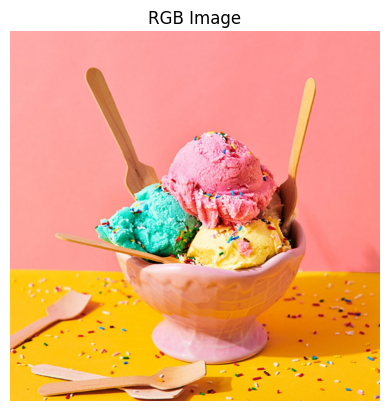

In [5]:
plt.imshow(rgb)
plt.title("RGB Image")
plt.axis("off")
plt.show()

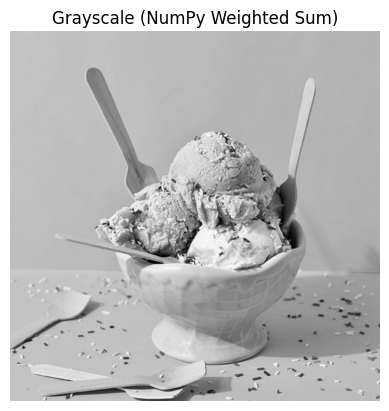

In [6]:
gray_numpy = (0.299 * rgb[:, :, 0] + 0.587 * rgb[:, :, 1] + 0.114 * rgb[:, :, 2])
gray_numpy = gray_numpy.astype(np.uint8)
plt.imshow(gray_numpy, cmap="gray")
plt.title("Grayscale (NumPy Weighted Sum)")
plt.axis("off")
plt.show()

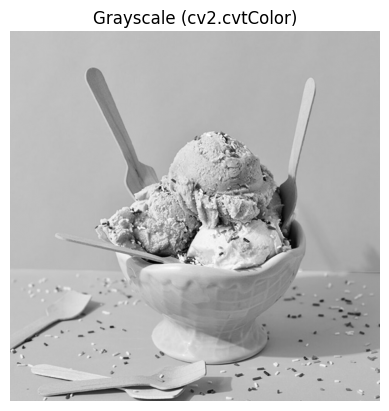

In [8]:
import cv2
bgr = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
gray_cv = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_cv, cmap="gray")
plt.title("Grayscale (cv2.cvtColor)")
plt.axis("off")
plt.show()

In [9]:
difference = cv2.absdiff(gray_numpy, gray_cv)

print("Max difference:", difference.max())
print("Mean difference:", difference.mean())

Max difference: 1
Mean difference: 0.56974609375


In [10]:
print("RGB shape:", rgb.shape)
print("Grayscale (NumPy) shape:", gray_numpy.shape)
print("Grayscale (OpenCV) shape:", gray_cv.shape)

RGB shape: (960, 960, 3)
Grayscale (NumPy) shape: (960, 960)
Grayscale (OpenCV) shape: (960, 960)


In [15]:
h, w = rgb.shape[:2]
sample_pixels = [(0, 0), (h//2, w//2), (h-1, w-1)]
print("\nSample Pixel Values:")
for y, x in sample_pixels:
    print(
        f"Pixel ({y},{x})\n"
        f"RGB={rgb[y, x]}, "
        f"Gray_NumPy={gray_numpy[y, x]}, "
        f"Gray_OpenCV={gray_cv[y, x]}"
    )


Sample Pixel Values:
Pixel (0,0)
RGB=[254 168 167], Gray_NumPy=193, Gray_OpenCV=194
Pixel (480,480)
RGB=[176  65  56], Gray_NumPy=97, Gray_OpenCV=97
Pixel (959,959)
RGB=[255 186   3], Gray_NumPy=185, Gray_OpenCV=186


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [13]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [16]:
gray_float=gray_numpy.astype(np.float32)
fft=np.fft.fft2(gray_float)
fshift=np.fft.fftshift(fft)

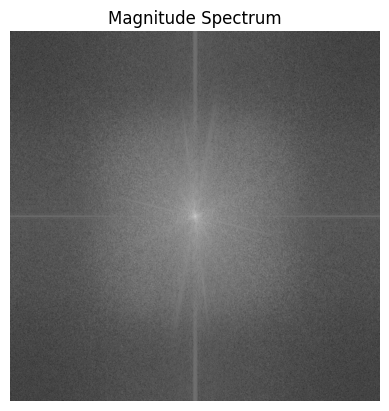

In [21]:
magnitude=20*np.log(np.abs(fshift)+1)
plt.imshow(magnitude, cmap='grey')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

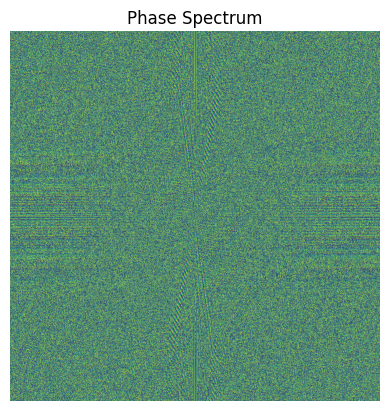

In [19]:
phase=np.angle(fshift)
plt.imshow(phase)
plt.title('Phase Spectrum')
plt.axis('off')
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [22]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
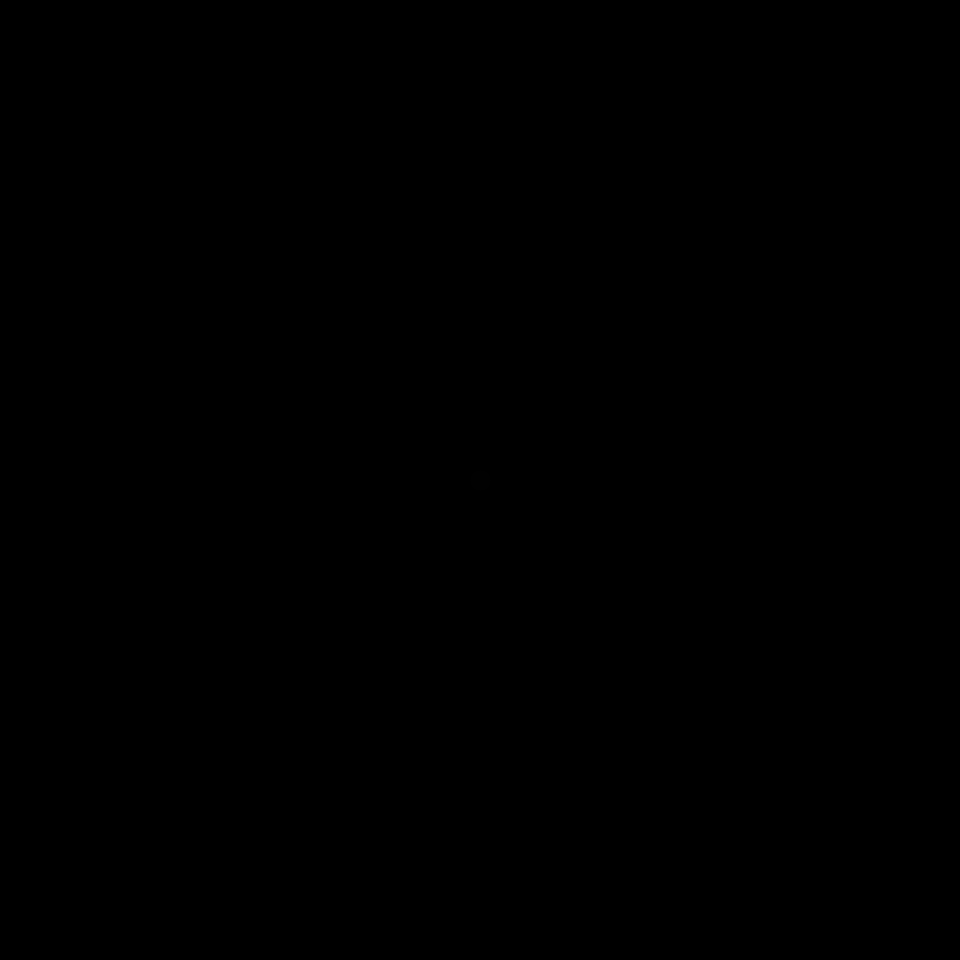

In [32]:
rows,cols=gray_numpy.shape
crow,ccol=int(rows//2),int(cols//2)
radius=10
mask_lpf1=np.zeros((rows,cols),np.uint8)
cv2.circle(mask_lpf1,(ccol,crow),radius, 1 ,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
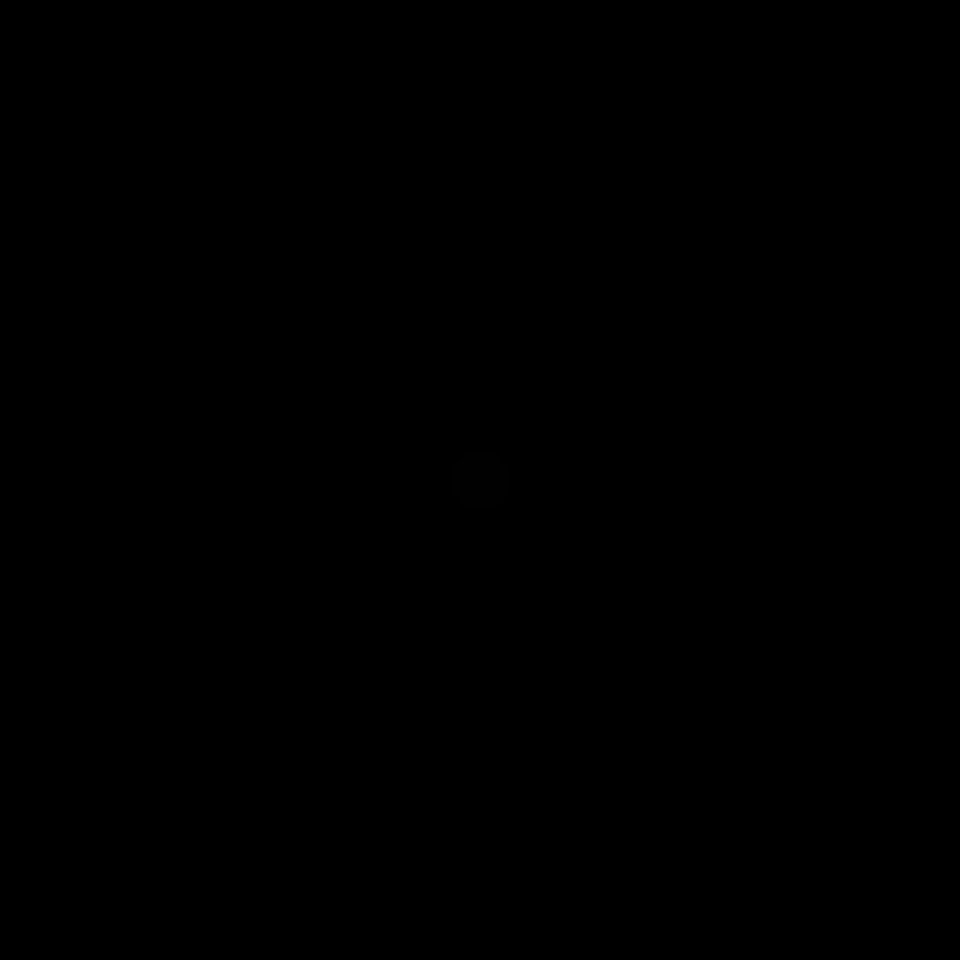

In [33]:
rows,cols=gray_numpy.shape
crow,ccol=int(rows//2),int(cols//2)
radius=30
mask_lpf2=np.zeros((rows,cols),np.uint8)
cv2.circle(mask_lpf2,(ccol,crow),radius, 1 ,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
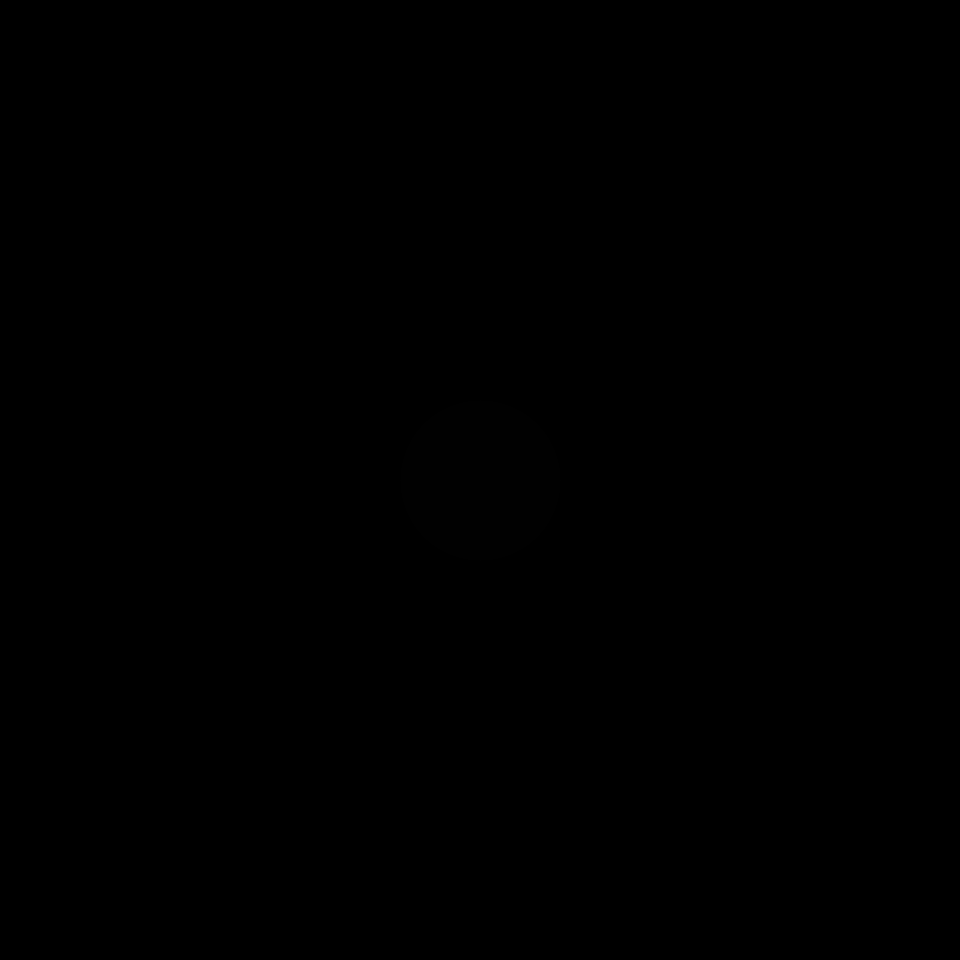

In [34]:
rows,cols=gray_numpy.shape
crow,ccol=int(rows//2),int(cols//2)
radius=80
mask_lpf3=np.zeros((rows,cols),np.uint8)
cv2.circle(mask_lpf3,(ccol,crow),radius, 1 ,-1)

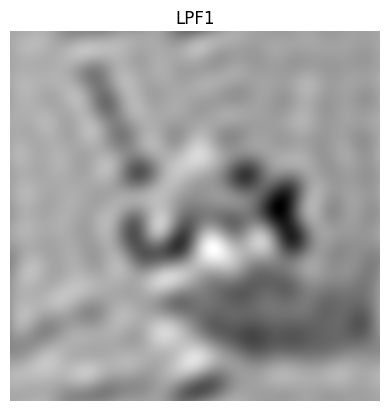

In [35]:
f_lpf1=fshift*mask_lpf1
f_ishift_lpf1=np.fft.ifftshift(f_lpf1)
img_lpf1=np.fft.ifft2(f_ishift_lpf1)
img_lpf1=np.abs(img_lpf1)
plt.imshow(img_lpf1,cmap='gray')
plt.title('LPF1')
plt.axis('off')
plt.show()

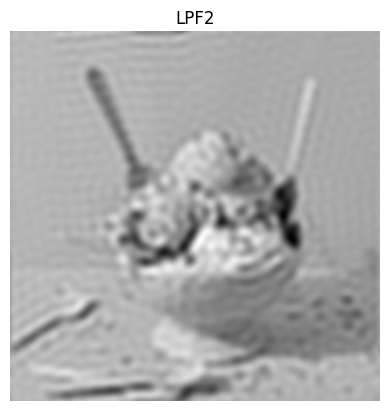

In [36]:
f_lpf2=fshift*mask_lpf2
f_ishift_lpf2=np.fft.ifftshift(f_lpf2)
img_lpf2=np.fft.ifft2(f_ishift_lpf2)
img_lpf2=np.abs(img_lpf2)
plt.imshow(img_lpf2,cmap='gray')
plt.title('LPF2')
plt.axis('off')
plt.show()

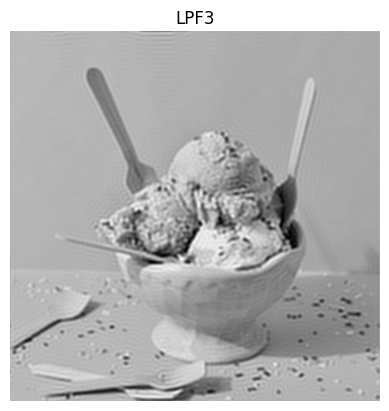

In [37]:
f_lpf3=fshift*mask_lpf3
f_ishift_lpf3=np.fft.ifftshift(f_lpf3)
img_lpf3=np.fft.ifft2(f_ishift_lpf3)
img_lpf3=np.abs(img_lpf3)
plt.imshow(img_lpf3,cmap='gray')
plt.title('LPF3')
plt.axis('off')
plt.show()

Smaller radius in a low pass filter keeps only a very small region of low-frequency components from the center of the Fourier transform. Since most of the high-frequency components, which contain edges and fine details of the image, are removed, the reconstructed image becomes smoother and more blurred. As the radius increases, more frequency components are preserved, so less information is lost and the image appears sharper with reduced blur.

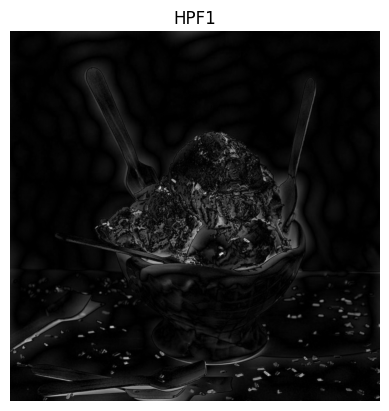

In [38]:
mask_hpf1=1-mask_lpf1
f_hpf1=fshift*mask_hpf1
f_ishift_hpf1=np.fft.ifftshift(f_hpf1)
img_hpf1=np.fft.ifft2(f_ishift_hpf1)
img_hpf1=np.abs(img_hpf1)
plt.imshow(img_hpf1,cmap='gray')
plt.title('HPF1')
plt.axis('off')
plt.show()

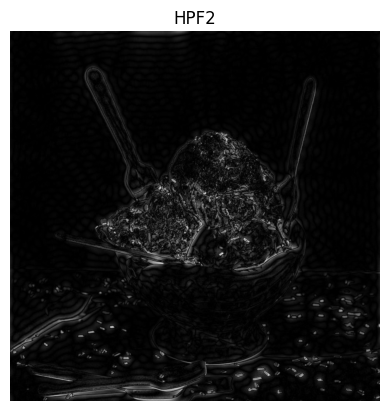

In [39]:
mask_hpf2=1-mask_lpf2
f_hpf2=fshift*mask_hpf2
f_ishift_hpf2=np.fft.ifftshift(f_hpf2)
img_hpf2=np.fft.ifft2(f_ishift_hpf2)
img_hpf2=np.abs(img_hpf2)
plt.imshow(img_hpf2,cmap='gray')
plt.title('HPF2')
plt.axis('off')
plt.show()

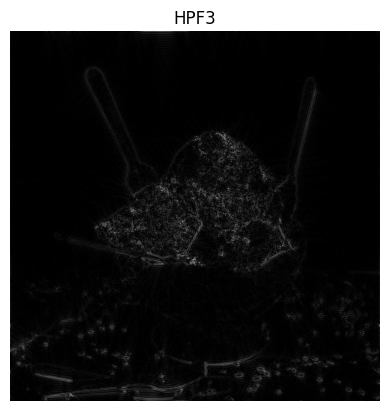

In [40]:
mask_hpf3=1-mask_lpf3
f_hpf3=fshift*mask_hpf3
f_ishift_hpf3=np.fft.ifftshift(f_hpf3)
img_hpf3=np.fft.ifft2(f_ishift_hpf3)
img_hpf3=np.abs(img_hpf3)
plt.imshow(img_hpf3,cmap='gray')
plt.title('HPF3')
plt.axis('off')
plt.show()

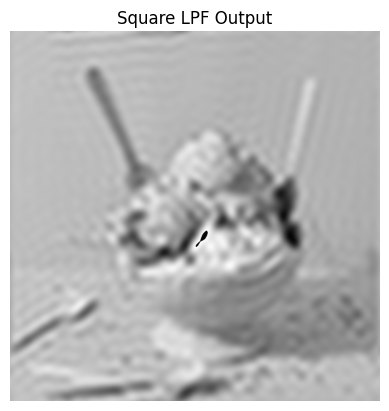

In [42]:
rows, cols = gray_numpy.shape
crow, ccol = rows // 2, cols // 2
side = 50
half = side // 2
mask_sq = np.zeros((rows, cols), np.uint8)
mask_sq[crow-half:crow+half, ccol-half:ccol+half] = 1
F = np.fft.fft2(gray_numpy)
Fshift = np.fft.fftshift(F)
Gshift = Fshift * mask_sq
G = np.fft.ifftshift(Gshift)
img_sq_lpf = np.fft.ifft2(G)
img_sq_lpf = np.abs(img_sq_lpf)
img_sq_lpf = img_sq_lpf.astype(np.uint8)
plt.imshow(img_sq_lpf, cmap='gray')
plt.title("Square LPF Output")
plt.axis('off')
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [43]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

<function matplotlib.pyplot.show(close=None, block=None)>

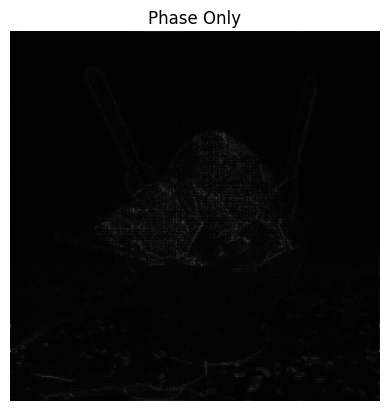

In [44]:
phase_only=fshift/np.abs(fshift)
f_ishift_phase_only=np.fft.ifftshift(phase_only)
img_phase_only=np.fft.ifft2(f_ishift_phase_only)
img_phase_only=np.abs(img_phase_only)
plt.imshow(img_phase_only,cmap='gray')
plt.title('Phase Only')
plt.axis('off')
plt.show

The expression fshift / abs(fshift) preserves the phase information in its complex exponential form which retains both the real and imaginary components required for accurate inverse Fourier reconstruction. In contrast, np.angle(fshift) returns only the phase angle θ in radians and discards the magnitude as well as the complex form. Using np.angle directly therefore loses essential complex information, and to reconstruct the image one must explicitly convert the angle back into a complex exponential.

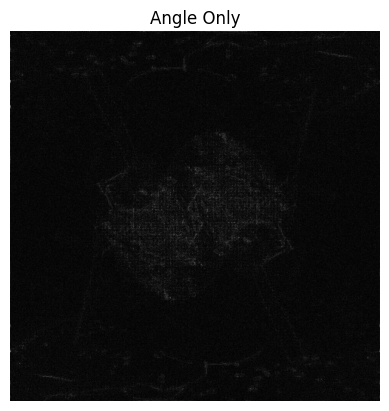

In [45]:
angle=np.angle(fshift)
f_ishift_angle_raw = np.fft.ifftshift(angle)
img_back_angle = np.fft.ifft2(f_ishift_angle_raw)
img_back_angle= np.abs(img_back_angle)
plt.imshow(img_back_angle,cmap='gray')
plt.title('Angle Only')
plt.axis('off')
plt.show()

Phase-only reconstruction is able to preserve the overall structure and edges of the image even when magnitude information is removed. Although the intensity details are missing, most of the visual content of the image remains recognizable. This observation shows that phase information plays a crucial role in representing the spatial structure and layout of an image.

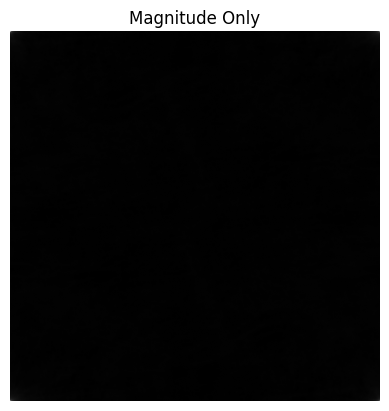

In [46]:
mag_only=np.abs(fshift)
f_ishift_mag_only=np.fft.ifftshift(mag_only)
img_mag_only = np.fft.ifft2(f_ishift_mag_only)
img_mag_only= np.abs(img_mag_only)
plt.imshow(img_mag_only,cmap='gray')
plt.title('Magnitude Only')
plt.axis('off')
plt.show()

In magnitude-only reconstruction, the image structure is not preserved because the phase information, which contains spatial details, is missing. As a result, the reconstructed image appears blurred and lacks clear edges or recognizable patterns, showing that magnitude information alone is not sufficient for proper image reconstruction. The magnitude spectrum itself has a very large range of values, with a few high values dominating the display. Applying a logarithmic transformation compresses this range, allowing low-frequency components and finer details to become visible. Without the logarithm, these smaller details are overshadowed by large values, which is why the magnitude spectrum looks different before and after applying the log transformation.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

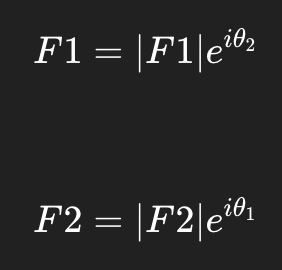

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [49]:
import base64
with open("waffles_cv.jpg", "rb") as img_file1:
    print(base64.b64encode(img_file1.read()).decode())

/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAA0NDQ0ODQ4QEA4UFhMWFB4bGRkbHi0gIiAiIC1EKjIqKjIqRDxJOzc7STxsVUtLVWx9aWNpfZeHh5e+tb75+f8BDQ0NDQ4NDhAQDhQWExYUHhsZGRseLSAiICIgLUQqMioqMipEPEk7NztJPGxVS0tVbH1pY2l9l4eHl761vvn5///CABEIBqwEsAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAADBAABAgUGB//aAAgBAQAAAAD18kkkkkkuSSSXKkkklSSSSSSXJJUznIxLqc7mpTWjdZ4+ghjDJSzOMVrVyS9TIwgABUC6y48YY67zfp+icmpVZzjAxgWFmpJV6mZJJnGr1WZfTkkkkklySSSSS5JUkqSSSSS7klVQ8DHgK6PM5wpettdEuVATo9Fs8wAUIYm5Wamt3QQhXXXWSRFb3Uf9R12N6klVWc4GIKwsVUm5WZLqZuSVc6MkkkkkuSSSSSSSSVJJJJclySVWBiEIWAqo89IckKVjebvOuh0mYFFKPPslvOc5mtEJYwgAuoiipl3pem9C8bWpJKqs5HgQABFVySaklZkkknQkkkkklySSSSSSSSSVJLklySqoeArrqq5wFVRUOZZDl3K1q483FuaMjHWfNsecSb1vWi7yEC6iSCADdX1nedMTVySpmqxkQhBALEl3clZkkuR+SSSSSXJJJJJJJJJKklyS5KlZxgK6fO5YJrQ1wAzrRCa1rWtQdFi4yGK30GdDFmEMYly9mJQF1E0kFKZ7vqOu0XerkkqqrOBjEJYGJdyTMkl3T8kkkkuSSSSSSSSSSSSpJckqs5oSyXO5aVXu4AAdb3u5eiE3kQA5HZDMnbNQM1R22jFuSbMXAFVU0kAw/W9F3XjEvUklTNVjIwLKikklSS5LekkkklySSSSSSSSSSVJVySSs1nIFOZy+eGE3qBBmF3q71ou95GJcOMWVho28ivcs

(np.float64(-0.5), np.float64(1199.5), np.float64(1707.5), np.float64(-0.5))

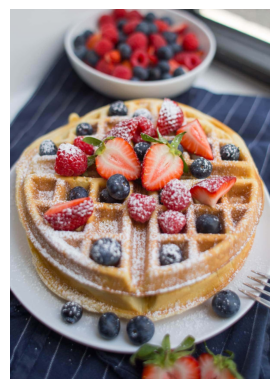

In [50]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_images = """/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAA0NDQ0ODQ4QEA4UFhMWFB4bGRkbHi0gIiAiIC1EKjIqKjIqRDxJOzc7STxsVUtLVWx9aWNpfZeHh5e+tb75+f8BDQ0NDQ4NDhAQDhQWExYUHhsZGRseLSAiICIgLUQqMioqMipEPEk7NztJPGxVS0tVbH1pY2l9l4eHl761vvn5///CABEIBqwEsAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAADBAABAgUGB//aAAgBAQAAAAD18kkkkkkuSSSXKkkklSSSSSSXJJUznIxLqc7mpTWjdZ4+ghjDJSzOMVrVyS9TIwgABUC6y48YY67zfp+icmpVZzjAxgWFmpJV6mZJJnGr1WZfTkkkkklySSSSS5JUkqSSSSS7klVQ8DHgK6PM5wpettdEuVATo9Fs8wAUIYm5Wamt3QQhXXXWSRFb3Uf9R12N6klVWc4GIKwsVUm5WZLqZuSVc6MkkkkkuSSSSSSSSVJJJJclySVWBiEIWAqo89IckKVjebvOuh0mYFFKPPslvOc5mtEJYwgAuoiipl3pem9C8bWpJKqs5HgQABFVySaklZkkknQkkkkklySSSSSSSSSVJLklySqoeArrqq5wFVRUOZZDl3K1q483FuaMjHWfNsecSb1vWi7yEC6iSCADdX1nedMTVySpmqxkQhBALEl3clZkkuR+SSSSSXJJJJJJJJJKklyS5KlZxgK6fO5YJrQ1wAzrRCa1rWtQdFi4yGK30GdDFmEMYly9mJQF1E0kFKZ7vqOu0XerkkqqrOBjEJYGJdyTMkl3T8kkkkuSSSSSSSSSSSSpJckqs5oSyXO5aVXu4AAdb3u5eiE3kQA5HZDMnbNQM1R22jFuSbMXAFVU0kAw/W9F3XjEvUklTNVjIwLKikklSS5LekkkklySSSSSSSSSSVJVySSs1nIFOZy+eGE3qBBmF3q71ou95GJcOMWVho28ivcszjRtySptkmF1lEUVcy3e/wCj6Zy6u5JKzM4yJdZfEzKkuSR+SSSSS5JJJJKuSSSpJMy7l1mqmcLocrlK1eiagwjhS3rWiFLmDGMYRVo7B9yZ3nOXG2TamR5rR29hWWV5qQpIbs+g7bpdauSSqrOBiGIQhZzJclPySSSSS5JJKkkkkkklZq71dZqVVDW5/J5oL3rZchEvmWwcu9ag861uBXzCn3Wr1eB4bdbLvIwYq9GbZyFZPnoAqTNvd/0HTYLepJKrOc5xjAQgFnUqn5JJJJLkqSSSSSSSSs5qa3qs1VVKGvzuUgO97hNhWUXBttw15kEHTR9wQ63og86KXGLbbZJBgVFZCb2y6QKynN5w6rNVDdf0PcbLvVyVVTNZoYghAOqp6SSSSSSSSSSSSSSqznF6Jus1msZqUBHnIVeJrZMq89ABXGy5q4MZjnNYgTepjEMbeynZNMhVREQ5ia2w+cKqXOQzM4qqmnO93umyTVypJUqsCGIQwCdkkkkkkkkkkkkkqqxnE2UkxWcDBjGrwBRIY8zZNDXR5622T7mJdXshzkGtW9VgWzlYOc26GBdBfbDBiF1sz7AlkealUqs5qqhen3u6+bclySqmcZwIQJJJJJJJJJJJJJUzWR4yQpd4znAF0efls+ryqBbF1NaGomnNb1MVvW960fYgZLvOBaYMZo5cLrqqBKwwwbZCEsz7QVUOUvLmaqs5qRnu+h6jBL1clTMzWRjRkkkkkkkkkkkqVWcjwOznLgeRiW5vIUlvvMGCqkKqkJBLqhFmZhGDG3B1gWIclDHZSkOWDXXAHbJ2WCaIQm7M+0BXm8wVSSSs5zWYTq9/tOn3NSSqqs55MkkkkkkkkkqSqzMYGLJmTwIxBVS5XNxvTPReOFPmB3u5d2FUCwqjDDLByQCqa0K0e8iHDE2S8hAKWVhku97IUmofplWS5Sec1ckqZznOZbfc9B1DFu7kmanEkkkkkkkkkqVVVWMjEKNsmEBZPmrLJLZMyw64YKXLqt6vNzARgDRWWmS6LeEkERNOtnsC4rJZCaCKZrRCkLrZym1Lb6WVOdysSqzUkkzWc5kJ1u/2Wy71ckrhSSSSSSSSpKqqqsZGMYSPNaVTQ4aG4FWMOstG0NNTNZyOS5mhjhmmNyE0QPO5i5mOg2eLKjyQm6GQmcDohDG2cpty99BtdDkLakznOJLuVVYqqt3ud3pHJq5ODJJJJJJJUqpWZnORjGELPQayjzuLxZveAWdxkmtZCKYCEC1E1Lq9smuahN6ylzUSNPtlJSigbNscdPSqtFIQ5zmKS5GunlPkc+71UxnOJLu6qsZqobreg67RN64MkkkkkqSpVVVVih4GIIHOk0Lncbzyetlzi2GSb1rNVqhKoK5lwm9mZvU1ZblK89G232SbJhFIZtUd84kefDmKcxmjb1cJ1DK8vjzWpLzWcZzNXczmsZlX0O73Xz8aSSSpJJKqVVVnOcYwEQAPdVsPK4nnhze5RDE2QkwLJN2BJBbMKyQpd3KwYmplZBK2egwXe9qJq7Nph4i3NQsrJTnI0cupd9J5fl8Ot3q7kmaxjNXdys5zmpDdn0J5JJKklSpVVKznOMjGIC63Q7DouVxPPYvZJNa2Qu6APNlJSqCAGHnTagw5qaNvWVkFtmbZIUhBKgorBjxDmpkIRkxSssGJLnR6a/M8/gm93qXclYyPNVepKznOazv6NKkkqSVKlVKzmsYGMYQLLOd56cnkefCVjdDzVkIQYh51vUEnzwvvu71BKJ1ohj7pVHB962YhSayKYIawJoA0Qu9mK2yct60/1l+V5rBCbJrc1LkmMDzmTV1M5xWfo8qSSpUqVKmazWMjwMIVlVj+i6ZObyOIvs5YANZ1rWcjk3cGqlh140OwNLm4IyU5MqKEcysI5ClMaCBgkEmqvrRd3vbbTR9710+qtx/KjIYhNk1rVy5KzjI81d3KrOfoMlSSVKlSpms1jOMCEECqqtej7rCvE5K1mIMAsTMvWJUu5MhHol203Eedhxo24NZdtkSK+9kKwwyJFepQFwy960Qh22TFMXr9BXh+TyQmyEJsm9auSSZoeMVLlyveSpKklSqlVUHWM4GIIFlVFAd31L+OPxQy7CsOTI5ckveyGLF1gD0wzaa+3m96yJUL5F+UoTUKy+zEEwXdTEmr3ZCHORk7PcZS815mya1rRSkITe7uS5M5xjGZJfupJUlSVUqqzMZxjAhBWUUUUF0fV9oiPnFroQF6LMBxc1ZGjEYZ0vz+cqQxqDGHCVksANjSfHX1LtvotaUQXJsm7u5rc3usFdY6nZnO8fxNkLJeiEKUuya1LuSVjI8Zqe7lSVJKqVVTOcZxgYgrqppqhCb0XqHB8jhjCAIiE1BL5k090GMxguEOUhoxZNNMZWAy5QdWnzVs3NMPN7XVAwY1k0SVd3WBmbb7rwuJ4lPWtbu9a0QpTF2TWrkkkxWBj91UqSVKkzWZnOcYGMIFVE1AgHOv6TvFW4vACBeFJvQwgxZOn12FVGTWpyObWybIyzoKOSvmEOBVUDmaM00TAsMlLRD7xitFgqM11uztPynk86vV3e71vWymKYm961mSSVjHsqlSVKkqqzWM5wMYgLqKJLgHVN9z0PXinC8+mG9kLqhAFsr/AF2FebbG1uZz863pt9zCHOs77g08bAotiWRg7VioutwzZwIhMyfFm6fbbHx/FciprV3Na1rWt7KUxi73q5mTVV6qVKkqSqrOaxnGMCCsumkquKpWur2u70qT4nmkprd7mBQpjunEmvehKJw2ra6bueXyLY6bY01c5Ditk1th7Y1MS6bfaX5KJug5vbnd6Fp+X8svjF3etSXre9XrZTHOTW9XKuT1FSVKkqqzM4oeBiEFdRJRdeqqU51uv2X6U5HnOdKklWVgkjOFVtVlbBzkFt7q3zuQFnoMAUXGObKZjcYeKBTnqSOdRoHJ5+n3zu9zpFFxfLcseB4zNXNyTZNTW9kYMbe9b1JPTyVUkqqmc5znAxiCsummupiqqoTp9TqdLoWvzODxR4xWjsmus3Y1s1JZ2NgAXptgRFs2VUx1jZmWDs2ZlkayPPSonVdHz+Xp5rp9/qmrm+d4QaHgeB1Jepc1q961vRDGMQmyS/TypUlVKzms5xgYggWUTVUFKrMkc6fR6Dz5gpcjgc4VFO1qXq5Ah0XeikyFMbzpB5yJdZbFSyFO0wZhpggk0lazG9qq5P2fQdM9p8fh88eKzjAx4xLu7ku9k1CaKUxil1v1NSpKqVmZznGBjEBZZFVZaqqqkm+j0Og4y83S/P4nDRK0WSyaLeMFPq7uLIgKwYu8rLLBrGtaxszTB+m3eFlBn0BLVDN2+2+e1ufyuYAYx5rOBiHjNSampL3vWt6KU5TE9dKkqVUzms0PAxAXXSRCniVVVclF6fRdOdt441ebxeXncrV72W4aa1vcAklZjsEyBdYdQhBgDsx2us+NROmOmyLncnPU7nVbLAqJc9YQhDEPEyMeBYxm5u5JN63reyFMf3EqSqqZmc5zgYggXTSWTFUzVXcrGXen0GiFO87saqHN5iuLuWQpJL1opcJoBIdhneVU1oVhjCKWdkd6rQOcIrXS7ekuax23zkyIK6iuBhEIQhjxMYFgY8Zu9XJJZNb0TZfo1SSqqZzWc4wMIFlklFAZqVmauYFW+h0njk0Vh5zYwJ8vlojlGMXOKvejkW56eimZa0HmpwzjU5/PwczjmU1ilbb6/XvRmSTGMjXXHjAxhEEQhjxMjFgWB1d3JJNE1ve/p9SVVTOZnOMiEJdVNJdTFVVVrUyPFUx0X3D61orLrZchUQ5XNUIyQWca2UxAc5Ga2Zw1Ic7BXH4mjpxtnSnOEUzvT6/aa3qYDUgxYwPA8YEIIgiHgcyMQxjxUl6kk1vevqskqqmc1jOBjGBZNECYZmqzetTAZVRnoPtl1rWinddLBASQSABeVrZTaAgniWU7ES52dtObVCw+8cfP5tPdXr9RxokwEM1uYxnOMDyPAxCCIQhDxWMDFgY6kvUurvX1ySqqZmcZxjAggVQUWBnOJVa1eQVKqW2860Xd61ohm3Gd5EEKaCK4oQsAvnIQ2UmFVb2Q+h5bdbaILT3ScaNuYELGNGJKznOcZxjA8CEIQgiELNZGMQx4qtXdST7DJVVM5rGR4yICqKK6kznNVNXBhklVNtuuMl3q9a1srDTZiVgQFl1lgLLWxsCC9YCLOt73qzv9DovOGKYu7oYx4zijnJdZzWcVjI8jHgYRhEEIx4rGBhHgdXckn2KSqrMznOMYwJZLnKqYmc5qXd4BJUzJNtOtsl1u9Xu9kKww0YsrGBgWXxqATUCIc2QpzsMMssnMTWpnIx5zmsYMwfcqpnNYznGcYHjAhCCIIhDxnIxiGPFS7n2KSqrOZnOMZGupzUF1ZJiq1coOZUzUkkZdcYMTWtXrWtbIUxjnKSSsZlZGPOZNa1veyaJdyqHjFZqpnA9MMm3JKqYzmsZzkeB4wIQgiCIQ8ZxgYhZHmr+yyVVZmc5xnAVudzFk8yZqr1dCFJKzVyZzbLjbJ971q9a1e972QhCFKTe9S5JJcuS6lZrOKzVSVKzgISONF3d3cmazms4rGcYGPAhhCIIhDxjIxjEPOPs9SqqZzWKyNZLkoKCkmam9TK+akqpJms1Z222Tl1rWta1ub3ve9b1rWtbvd3dy5JVVJVSSSpVZGFVQz7RSbJsmtSs1WKzmsYxgeBjEEIghGLGcjEMY/sVSpmZmarIVOVx1V8yTM0S6AKqqqkkziVUK02ycu971rWta1vRNb1rV3d6uXerkkkkkkkkrOQgUQTphphk7LDJTauTNVnNYzWMDxgYRhCEIhDxnAxj+tSpUqqlQS3O4SKmNTMkLqxLVmqqXJQ8ypU2wyycxdE1rWt61rWya3q9au5erly5UkuSSpVZwFRRJKtXJopneq+4Ut3KmazVZzWMjwMYRBCIIRDxnI/qdSpJJIMCXD46wZJJRdapYdZzVXcrGJmSrmiGZOYpNb3ret63e9b3e9Xq7l3LkklyVKqqwECqSatMavM1qUTq9Z85d3VVKqqqVVYyPAxCCEIRCFnH0+VJJcmQqcjgKr1JUmyagQTOazdyYHmVUuS6hTGOYhN63vetb1u961rd3q5Ll3JJKlVWBAXUTTBZT7lb3dUQxG3mjalalSSXJqqzjOBjEMQgjGL6XJclyZGrzvPIqYupJve7GvWczE1cwLNSqu5JmqspTGITZN71vW9bvetXq71d3ckkkqsZEICqqgKuykubNuSM3Qw7Puoxqqve96IW5UzWMyCCIeB/SJLkkoYEOHyVBSSTZNTC9VVVnUugikklyVWJUl7IQhCbJvet63rer1q71d3JLlVmsCEIK6q+da1C6uFNuQp4IA8yRolDDUmtN7lVvVyMwYhZxj6VLklZyFPj8NQEkuWW9YXxKrNXuZEGSTVyZzVZkvNS96ITRN70S96JshTGKTcqsYEIA+uuryVR4HL3chdbspNVti6AvJU23eBDkuGPQxZuXrb+RhFVT6fclVWQq8zgJqySTRNawuOpVVNyDBUk1dzOKzKuSsVUlkZ3iiMNNuNsFIc+ybkmMjGsHrkF53zSY81q5IQpN63cY1Br5kkYLBhkuaZuhBklx04wr4zmvq8kzWRrc7gIK5u5Vl1dLCqZlTephepJrd1kdVVTUrGakI30ekwFZ99xs8qpolluF1V3nGG86El5birrBlVCHJvU0Yl4XHKvRS6yMcl6Y3WA5qSb6MEsOsYn1jMqs4X5/C5a2LuVNluKizUqpvWqXxLl71WRVKqtyZFNGY6T3bg+ku06Y+xKqaJeyYyybWpjJz4zB8nmI6R5qKsMYm5CnugglTRiXMjqpbBs4FiVKtpnIF6mKr6pJWcAR4nGVzclVou4utKlVnZN2EUlwtzIcSpV7vOCdDs7x19Nc0nb4zLrbZKAvDVMrRs5IIRDa3VWNbgv6U53MQWmrmmd0IFVLMaVjNSptuDAO5JN9CCWHJiT6lKrAE+Nw08y6qoYlhUqVUkKTWAS5WyXkA5UqEsjnV6j7PN4fTeY4vU63mzMdJ82c5qYwqqboMEEiNt7BZLyJat6CsqjzuatTJIMGZLIbeR4qXI3vAQ1JJTjVLLSVVT6lVZCnx+CmOSVVFLqI4qVJZd7gMySy7i4ZMyEb6XX6b57S8lz+l6UipE1+mv1ugQYtkuDV5mug4YPJF22+F1GaLWcpo9PUwJVHlcwcyAdyELqYFKl2wzgK+ZJJfSsSuJKzL+o1kSvJ88gKSVWdm3tQFSSaJvdiFKkMSxLVJCdTsdV1o10txvLJk6vO6vX44vQA7XR1jJSVRb5vJe6BhcU7JFnz5YmRY4jr+dXBrJc3lc4NyaNqYHVSQz0CqOSSRpoYV6uVKY+kUNXm+d5galSqhSEEpJLkMTUCPMhWNjyrmTXR9B2nS0PZK5vm+Kjltez3T3T9N0NiwTcxs8RA4bHJd3gguhhm4onzlfQB0YhJgKPD4y8Jq5jFVKk6JRLLSSSa6VgWxL1Kvo+6wBDznIVqSpUKXeVKku72XcAKqjnf618rziktvvdzpHgVwOM45Pk+Wuvohcbq/Seu6E5I8OuBM3nCZC1zd9LynV328XA+YiRfQAychWCapTm8pAQsDxUqVR34spmXckZcGuvd3essu+zEnw/PJZklVezb2qGXrU0XdiXqQno/SvxHzPmd9D0faamMC54uw3nmeQ5NuldEtq2uz2GkvJtr93rlulqlSc3znp+N6M2+V3Czjn5/P6sTMW2mGNQYFOdyeWCpKzV9IgUhSau5fSgVKm71qPk9ityvNcwckqVo5NiVu9XNkJYgYkj3rO3rGOfwmuv0TZwPCvNY7TOV0QNObrFF0WDxy0nwNGUOxznBnyFMXY4XD6Pr7b0PznMpb1p+dDQuznJcwFHkcVDEmaZeGopVXq5G3BrLXrWr0ToZ9fz/ADnGWkkkhi7iedaubLu8rZqS+r6joizrI22tVVYGLB2djFmmMBLZ8SZzlPocZd0y5SZWF1aDywB4fX7/AGFuNpbmDLv1vVHJF+Y+1skxmgc/jcZOqvo7AgOpLub6dhUxq9XqONC9Tw/Pp5lyrhCktcMu70Xe6XHUlk6XpHqlkKcmJdTFZJuLILlawoemR0ORYz0TLyToX6UeDg55Di4JgdJJz0/NQ89tn13SHWQC2n3tXeFwygc7ickDLmFFqlSSNuZWXuavcvp6B3PPc4VySSzE2FeSTRC7yviS4QnS9A9u9axjA9s3Aq46hpzubyNMrm1j06XA7q1BdQO35Z8LbnSlxbm8dhnluC9B3R489wF2O76svKyRhucZ7oauZTRo+leTw5BJZuVVTT+xrZly9w7uAs81WXJVQpN0rUkshdxbFyWRl3q9U+5hDjvh5mep0hrc170RrT53mVSG112e2hzSKeZN6zreZT4HTf7Ys9DndRbk+VY6qXVGkx2Anvjj9Z21EGDl0Vfl9FnWyUnzAssYR5nJ54ZcqSNnwAUl3NafoQdpS5VVC73F8yVNm3YRSTbnQ6DzJ5mJ8Tn9voo0k3xw49H6Uo0leJzpu3DO8xJ4IvUIYz5nldFhx5Bzr9Hk8Tg4PqxFP1e3yeQq56Blhw0HopuSJ3ZjkivKVOyQXM4HJzckoj2RLyS7uNtgWDnGtVmoUmrBiSpCk0MVQj3W6TR9XUuvOB54/SHnGNxU79H604uUiVFd7T+nF4xzPMC9N5zu+LT2w33uH1O2zxly8BZpovOImd5MfV7XaMWLxJzoC5VGb3s2wJpBbZiPD4K0uRsol8SS7vXUtdLGb1cxZCasOKqSt72MU272uq6WSs7JFfHJek82qG3dLWX0no3ccRLp0r0eWV8J+Lxut2uKXzvISzTRek36Tiqj6nQ8iYK+J3L5ErudB8+yUucYeofn8k/SvDTWdCTRIzsHG85zqs7OV15Ll3bb41lM3curISUKqlSa1vINP9rqPHlVVYIZfmeN5fTlKLbLhhn1nfNnjp7S63PWeH0AOiucHz3Q4yGab7js6nLDy2va+GAIybmWuOLuPmaOboaWO+MPQFyVGjR9vG5BpLnJnl+c4kesKw5Ll3vp6GuLNyVCl2AF6kqWW4Fjs9p9i5WcVkDJ0OJ5bnkM/fKWKd/p+p6G1efz0yek50861p7l+k5/F5YfR+WTz2+y4LfS86JFT3fO8+yqizML4f6vZ5vM7XdMLbbqlnX4gHWuozjOYYamL3FeB5+srhlSXcdZyEUq5WdmLhKa3JVm3o3S677Gpqsiqgi6BlvP+USxo5IE3b6XZ6edYT5d0fgL9Xo8Dqdw5PGh4asTD6Jg1HUXwuh6j2Pz5KiXugg63SpZjqmY0DfQi/QnK4vSd6LVhxkmJoVGIvwfKoryVLmiO0IN7kqrKTSedXKmjFc6vTeNKu5WaEIF9HY1+DGeb1H4InQ3oWqwhx+0IfJIN5dpZf0/CJjxcGUhdToNcTjZnZ+k8ZZvKZD75cLFoyUjcVb6aB3R8GOdZml8iJoJzBIW1/PeNRklXNPWMGN6uZ0QmwC3KzVnc7PXdPWZqSVKWBbLFCFzOc+2tzURi30u50DTnI0MIAGbEBvvc3XY5HkOQwR8yuJqmN5Ot61sGigIuGQSSejUZljS3SOJvap4VqCCoQ4bb1jeoDzPj16qSNnwAF6vWYchQg1Kqofp+g6jEkhEmLkqDhdQK/jSq9fo8jKwhZFTHousov52uifqPphyvnnNej8l5TBuydOrLkeqP6JgXWGBfJOe/HeUPn2EjBDOQbsbYp7FAs11V4l7xNy1PJ+XxUhXsBWzersJzHGtJWZGOv6Dpkzi1cNqaaLWc1nRLV4/mOipsbDGQL0HEprupId7pFYKtBrn53PdV8kgV1xfOQ4bdfVu+p0OqBDz9eh6Q+hweKAUaNCtt5w82RiHGEhM4vd6mhVrUnM8Ty5e3dCWHLu4uwbSdVmpGe53n9wUxCM68+v1MijfP6ToeVweMbZuSTpk0qVAGden5/Vx35C4m1855Kb7XlPMk9D19cvBuAn6j1ZlOTyNdvu+fKj3DapPxuikNvcdZbxbjLCyrhmbU5B2KZGYs3uTHmPK5OYmAAu7uyIn0tis1LZ7nfeuY42518bWvzW3N+ia1U2pxfC6KWlCDJ09JhJO1zux1zVZB3A5VTvltj8X7D03jOvy6ANXs9Xn9U29715t1uOLZ5nL4zBSuBj22ikjTmvGdn0Wb5/nWtCbcTZYabJL5vi1285EviavWn+TtbEzJHu72XNZFPPdDoPZDzAeUF6j0j0o9hCbncHj8R4IXVOiTsdQPCgWfTMQklCgFZnmINcLtN87ll6/OTa6PXcYwYsznh21pXPDDyQsdEypXNkttqGf8yH0r7HJ8fvHVdMvD7bbLrPmOHsIc5EOWQ3T4gcVJI/6XsauVnPmujO6nuD4Hlu92fUbs0RS6yk4Pm+IUM1Ol7PoK+ZCw/2WLvd1BL5AqqkkgLpoiPY+p6bLTDAtsDgh80sWBwbT586V5YYNVMNtMsJcT1nSxzPE5bNXsEeY4Ln+mdLaPleYuMl5EKbec8/mpcjXqu3NYw2NPx7u/S2Xi83hC6voO+sLu44XRfT4/cT+eqJ12F0+x67jjV6zzO9bvW5gAVQznoczn9fp87nDP6Ino2NEmiTOV0WicvHP5AEktGYcvoq0dpjqOTg+jYgfA87tz0XI9Dyu/wALx3qfQ9CV57yCkJesixfVJ56S7vfofTbusasIPLi7HR5PR4aia/VD7DgN+xcgGhciX53z6ICydTtHYw0xol3q6JsSgspqY5q/CZ7nnMer6g+y2zol3dYTUPviU0l5v0QPLolN2zo62wbpdZvj9DoBS8AH0M9D5zqZY4/N7XX7BNoeF42tb1MinaFwZernU9c/jWYOmOd5JSmcaWOPB8fQr8r6Xk+gVOHndfiYH53lYrPd6rvR1oxJmY3NFsYefjSvFx5wLam/aV2Optg24UIg5wqbh6cDy/UdLy3hBbbllO1p3o9lDpMrk+cc+h9z0niOt1Rl5vU7Lx55Lxud63cHvpg4s1qz+r9DmsQy7Da/iwdpraxC0541bXXZ66/lg+2IDzvo+JyV+svyQPJdf0bpxlKPn61RdGgQLoLJTzSWq7/R6/QaZMUt4DL3lVRlbmea6fouqLwnnnNhrBegyQ3aMyeF8f5PA/Q9fyfseeXKHR6Hbd3zPAITetXRmVudLvXa9i5QK1CszK9MY3YdB5/I8ZvqdVItey4u+UUIFleoumCO+q284OEnPW0eQpbXRUVADm8Cp7Dqds2yGY3kONG3lVV3CfhTeo7gfM+J6B9kL3OJyWS9B/XQ6hfOfNtxlVnqPKhB0Oj1+yeeQ8lmbu4/Sidy+j6j0Ghg2EfWggWLYRsrBHwOOp20+r2uB6GcZR/ll7HAWpoGMd7quMN6DmtXyNnDsjEVVEvz55JInt67XUOQu95DWz7EATeA8PyPs+qTg+KMc3WU73AY4K1vd/0oyV8jWk3svZ5w6c7HR7XTJzfnqMmtX1lEg1HfTd5vcimI2ZNDIMjUsQ8c3m9VIgNNp99ZDr9LldPkc9dq4p0+71TGNAi0cChFh7MXQOdzElOeib0PU6bJTuGgx7tjOMTeVef5Yvqz0M3lOv57qcyvecMJd9hnnQ3GyXmucs/Q5LPJ33b6XV1jxHmqk2fooojjPpfSsC1sqhFdt89EVYVrIlrzxb30lSDSL3bMlpaxqkazyOn6TpNls8CIRSq2mKMHzzkVEx8NvvPdgxtsli921QNSyDU5vG4PsehZ/Ni59+14XB9yxwDPdAgx1essBzCHyKbl2XXD8Gtm7fKipkvovROFmyDGtMksSm1sA0JQvI5O8bNHeYYoGl46NWm8JLdP1r5yk1vUWDgwwqD0waufzeWsRqdnobO2yQAWS3zmoTV5EjwfMuejiPHq9nS6/o+z4xbpuv4KA2XAgbVom9brV3vYPDefqX1gJBrueo6GqpqhzmaaPSyj6oFgnFzObyx2Vqw5E2D0XEPKTAdAdvfQt6Kzeq1dABhYQNwphc9VZE2u11Y0yxA5ctUqzBtZCBLk+U2cAM4efAnr16TnX8+eGLgU6I1Ti6SzGjFkspB8Pwo6L01UsdD1fTprV2IegFCbYRbVYGhzGecmgoOdVS6zlo6rgNLiTHrTPrnDNsau5q95CJUIh5IUfJ53MZ9N0XiGZgxslHlRkpM5CuhyfLyKZKTTD+yTQe7wT5aGQGt5hYfcKR2bMVjGfC8XLxVFZ7DuhI4WsGtIGYYlDImtpnmc8XADgbIstNIA2wUJN45WLre/Q9Npw2oSWTUvWQLqgHgq3H5JfR+gGw4zhdklCzTZKzSwQ8Hyd5XE50M236nkdIPn2lIRiDpmC6A6htZLtiHYdheT8/H1QJir6VpMj7BgHEuRO2S3jC8sEtbwyWSXnMOJvnkMYOABqHFXQ6/R6V5JCSyD0TeNAWXVtbjcs/o+6fT5F1mHVljskmR7SSHyvIarK5GWyZ30ej54HpOQV8aEI9kgrhb3V7u3G3thJ87W6KiWK+pJrn6DVgrWVkBPdBjIgWvYxp8ThhzvGyK6dRhIEt5rUmJ0u71FrYAfImh52wBgMwBNPjpn9B03GnIng+pbBKDAWPnpcziAwykJiTZGxXGnnsb55d3lrA7LrY6jY23XiKueO45VFsZ+mLr122ZkqBtTVaMLWw1kW+Oihy0dALoGg62YKrTMUuTID9l63qE4DnD3GuokXF2EPI56zvpvRQhhKXvRWrrCWcJb1w+AKq1hQg8lKTemOi2fLaOS2q+LbC9WC8lIbo9SLXzvNKrCyP6QEG+6xaZ1XpSEjIzCUe0GluXzOeoEMNsOpbig+kFRaFmBYY6J+lUwCVOltWEEcvK1z+UHs9rpsulS0AjTOsL5SxpdSuensAY6kuHE2wTfS7/YX10uHOc7z3FdNuAWE0ITGX+kwmsfzvn1aHj6MEDHXIZELLE59o4jiBCsaVak5sTEOEPgKr3c2Kb5sNxYoMQhhYdZCcJ2bRRH0drNcm5wm+h3nnm8ob30S4pVeLpPVy0RSgUZuTnobYea6bAXm02FuolyFLYW1XW6QCt8prLDJV0iqeR5tDH9GGFrq3lULrReVwByywBR1Zcs95znCVXIWqT6HSmQB5HdOssICqifOC2djBnlDrA5jA4qEa8J3ez0X2UwE6B6S0BXDjRiueIpsO2mQadCyRiuA2SxO8oiPYN5Xp8zIW496mTeJLu8Irb895kWcfRRB6PSwXkzoOCW4vLzoocUHFYmff6fzwuLo5N7wySCdROa8iCkgimELjuO8fii6vO4ah8qLVdb9B2uj1MplbmB8po3O36fW2pEWF7PAjaVyry+lgSbjWOd3eVzu8Thc/L5w9jrS7rO6smlOdieO5ecfQgg6Lwl+Z1X2xog5XOsqeSDVqh+j73UJOP5fO2iEAaY3MJu9ZmkeKiuqNRspWvSo8h/hkVD3ONyg1NdL2XX1MFwNUnMp6u2UXaGIbQhlsJUw8pR13rxRBESLHdUAuNkIOi4u7Jeyq5C31D55KvQ895HGPegH0n0w8f0XRIGcznXxzBrJkRi32u3p/PN4Y9xnQobYsgUe9QYfN8ykMMVPLfde5zL6aXB9/z/ABalYnR9D0OrqrUGq7zA9rn9/nj9mjnndJ9ZyLC4+uf17J0wBQT5nY6fGdnPzWr6qyZJMzK6we16B3XKRdnieVXuQ46zSnIH3nNgErzg897IIEOFt+ubZSJzQ8+8loaguiwsqp6TvNC4/lUhjKXCbPUyybn9H1XmuB78Pz7m6xTHU6fQvcBkLfMT9t5Ynqxde3lLtkI9JcrzPNx23el6Hjr9Phv97yhR5LrPRBwLlTFZkF6PttF5yJ+l5nyAvajE90Ofz663QZWRJjzYtE0AcXEz6S+gsLnG5a2kV2Amw7SY/adVhbi+X5o7YYWUc6YKeTN32OB6CvBq2Ooyw20aLZFnF+hybq9c6fNMIxeyoXw3CRIaVfR7XeW5hGn+QM5StC8yG4OZrOmR97tu0mAfZR8Ly/aBC/0eWkv2eo4umgrknM1oEoJC+wHFVARPkrCPRSCmIz6H1eeXxfNINbxnK1GEVrBvSq8v1QPIqwOKJZj52uO99zqTj9tD0OO2F1XzTfok+T4GtnbyI6m/bY84TtDC64dhXhctoWM4jCmLe9a8TaKwu3vyPkPaYE6+py1Oh1+nnm8wIur2uaIwdCNy/S1zTcgAkOToZaMe754ep70wudw+GPqJgWtUVs9fIBn6PP8AoHD8nkuEbILbd2RdCvT+sJzco88fuNdBRVT0vlmvnVMlaJjWFwdsAsdh7ou6U43HmxEXziqOZvu9Rs3LEt1nOR8/9aMLria/Md9A2RTi2i32UDjY1pLn9trlp5SX5qvS49576LOFV+t3Oqbl+d5YmhznZyPb3SEsrszXvOGuUyvG5WwbdcfaQ8476U4bx1fE+j9SsPoDQ6fN7vzng7aMxqQCwc7c7vW6NKI8hORfWA1d9Ky+rOYqgE+q1PC9Ya3TZRV55+6+4rz+eydmKAK2XjZ7JlucmnOBl5NDfaLeuen0/UdTPL81zeb3+ZQVmS3q8RSG9o3xusx5vuKnWBxun322ef5zk9WiqIt+i7T/ABo0z54XV6flvJEjTJtSl8Rtzr9PHPABVHBYpWdhtjHY9C04qAaPVYa86JcHVOkonnrdkouUMbjOAtJ2bmehrYuEuEHKUig3isky4h2/WCrk+e43Mt5cilv70EMrfe9c6PHA5/sPP5npjRzl2v5ny3abx2/Nz6IlyN9zmh7M4ggeYmmWWCamdEZe62fOMFMgjOkhQwejW83bbvoXyhDXO6ZG1eIALryyCY+305WEBF600suF7nd5ZpLnC5zfkCINg6z7LukufPTtRby4fJ4IzjGBlasmVuh6p9nsoocY/ohkC5vHFdnj/MdxSNdfmdtjzJfbeeH6Zrkdrn/PKhmjk0Qh22Wz+U856run53OfrF7XmAcWdn0HRihh8t8rBvLBpjorKc9fr9ExarZLhMp02o3z+2oDm75PK0V9w2AhvvcPXUQ6vG4KXnhTRsVkY5uH9T3Ru9JfrzkdBJk7Cq/B7uPM+M6DHWLx2UnekD1XmAP9rkdZzw/H6iumd2Vo/UeJyfnrnq/QaxxnFdCMuflqhx3fQvWpgvOMfbnlhiP0sKchfpdpwU1Y8ieFZdgG+vdAgNjGosNal+t3+Z3eJze+vyl+HgXNzjGZsOSel9MFf019AqaPAY6HWJxUlj9rzPi2Stem5PpAc7u+f7PIa5/q0uR0BeL6zKE2Qzr3Sfrwvnuj6r0ez8QAwvhTNyBav2TTghYrmssRvzYhMdAQuMFz0JZBBHjoqlCzH09c2jCNYFlkhUn6vohW4XZ7YNMKyh88aqBVe1KW43o5y+b6R/qc/j+pB50x+hzWuznjcvyKDEJ0unfJ9B2vPej4HOaVP2Mp24Dz9BO31uo6PgTpdToCXUCVoor56pukr0a3Kt3jQ8N5wODdNbPIE11HjGU4lSD6Fh6oKGUmQjiqyoLbF1RCnZ0qp6fYbGXkGTbNxiHJoCyfM5+j9xzldjs+eUU6O8Mj6Vpc3i8/He4xY66rnodzjAf9YDhtESCnzgh6Xp+kBhtVZneGEiGGPEdykUm93jJOWwet8EWKbKBLnE7XT0cXO87lfYwPei6FZtUIYTAuU/gp3scbq9AW2xDe5Y8puMUdG2CqLr54fL6/Sf7HJJ2fL7S7c5wp2kx8xFNBvAXHW+RWOnbnoHHUEOgry1hYi/V9DQukhZnMCpULrECUY4zdzGmOOyXN8MY8u9BDm84Pe7RHQcpLhB3hX0HXkDiqz0J1R+dvhk9BlNVnfVdvl8lhLQxtG0/yAudPm2TfEFnfc7YmhK+dENlE7fYABLlLLZaDqii0yzvu+mV3ySa4ZcC6HJKLol6CrIewfYs8znOP8/VouO9W8BE3zgu7qcZfOGHUhchdzpdV4vM53N5ImOs+ubIoMHZZ4/Y6vB43fT8273uuHz/Jyx6bigAIbOpLytDqb9AmvzI0Ts8r0XNvtedUVGx3ejw1g84fcr1vH4+K5zOkyep9OXn+VEbnTBOihZ7HQdX6v0I11fPKkxXZ4Veg6pr0HDyUJMziBxnXRJyuUiXt9kjq/FU1wOs+GUFbCqfQRe7rvH4XTx6Scl2keu15z1XNQDzxFyabCnjJZ6OxeaZ6vQzySOCe7fGd8wz2b4PF6RPQ9QW8PLJY5vl+c57bvh5/n+VusBj62OkhBiw963rNM+c4wB5qWbudErC1je5tuVVcLA8x4U5PKz2u08xjncZtQ2Q2wqh0+h5h9Erj3O83sr/U6BOVxndegfguCiLVGgwrkg2el1uTxAjZx0fW8vji9J5tkHb6hfL83sPtOlBynCg7Y+J4t/2Z7X89xtrCnSCvmYxhnJ+v6Toa4/nRmVzL9N1TTQKqsFNWZw8YHTTKSPJleg6rLoPO8k3QripuFWdb802BHWG+kokJz0vN4kJ6H0wIFHmpsC7XMEEeK2z33wcngCvJvRT0nm0k8dXuP8/iv84/Z7y48Jh65AjW8x6x13ncrzyYcG6iQJUgDBN1fSOdDi+dWiLmPQ9spRaBuKj6Mqs8XAx0boc6cJcx/QdFwKPPR43UY5zPDb7j/n5xmBKxtXOiKtNB7npCc8G+ekRsOAXhXLTm/SdFdLwKhCbyz7Lnc1XHouyXnDcJrN8IffQN24Bzkef7nbBXG8vy7LZD72s2PXMF0Oh663eV5rnEF2luv1HSQa+zcrpExM1xMDxlhrnm5KGhel71ZWW5M4apGOYb0nX83ziZJE1yB0Ybl69b0RqNrL89soomHBBhYa9brfO8/wCM225gDkXjnr+lvheSbx0O0TzuOyh2yK9PqcLldTroF43C4BHCLMHhmuwhw+Uz6zpGOz5/zg7nf7HRkXICOJszNZriiFWbdnMSVOBzr9JvnJ8TpK+VYaW6HQe5K4VztcgZy6AoxHvS9MiGl2ufvqA6fMU6OOKuQ3qGBKL/ADtPTMMSIV632Jl+f4YbxPQqc92wMuPO8nkV1mst8zxqOsv61o2w6ZT5m+16c9n53nH+T6DtOlwrnYRbx0arMzxBjznJGsh5fNm+t361fl7N5wbi2m+h3eSmRdrzGGAazkgfR+h7Y8c7TpFXV9LHsg+EHPqeqJZPwnEzd0yJdr3PYZvleLV7fXUvDZU0y9brocvn+nKe0fnytQrYmSsUPPNCXt+w6SehocljqdYhsJQsyHbeZmq4gh5xUaEICS+2fQrdS0eMRBfXFy+v09uLKCXtaGBgzHvOyypy2aaZDkNyJOzzFZ9R08a43j+HMTMg3/Z+hJm/F+Wa9IIyfRxiB6/L6PB4ns++VdfwPKkOUdtOHwHkvr9f3NtJqucJvqNBZEHY9gz0bqqzOGLGM5yyZLfFhb6fbMyuNPncRAEMDpb5UdWSbCDHWi3q/RusrJLR1lU4UuvXNLvzWidXrMVzfM8ENCDeK6Pre2ZhLyviGOv2Ol5/fW4h9TQ/Kn9d33EEvDIDLMa1th8ynM7vMZ9oy+9z0VOxvUPzCOCjWC5qs1OIIeM5lOg3yUjiv0XbNN8+k+J59HTLgFYUY8rtds3Jnueo1oGFFOk2RamuX0gql4aTnqGN3yvNVjhscvV096D1eNZ8Z42nGugfv686q0q757ldn0XoOqFH5/xM7sd72ZoyazuGfV9FjqUos0DpBAsUtOAYlVWanFEMdZrO2Ak4EsLXa7Gil0IfjONSDpUVXVq1XaeU5PX9yyr0BAU0VmbHXM6WWB+eX6PftzK3AOvwLAs6m76brNYnmvA8/o11ba73O5VLrczbfru+0VHwnmSXWYXez6DiW16HuGbba5ZwuhXAXdOhZmaqqrjDGPOKq32Z51S8q9f0jmy7yLGxKGuJNqIIsIbudfqsKkHMZt7n9BVcfTCfmpLvdVw987j76HNCmM3Ea73ZbLjznjOGcjDyrapyc/m0Xpep6+2r8x4CTMhia1mLw7Xf9G07z3DkBSZam3A2aZqs1OOLAs5zUIez+X2NF7r9J7oQwd7GAybsAxnIpjJYNI7i1Mrbh6Bthaa3yGnYwbHP4zuSTl2ulO13Na0pwOLHc8vGTkh0s9XfT6Ez0FPKHV562z9BZQO2Fdm9P1dbXa1oWB7LnHRW0xM1VZnIGLA85zCF30fPqH5i7fY9C6JjDFUFgU1Q12xEsGsJtA0zDRQTM1oLimNZdDu3B8dJ83DZ851i8Njs9YTVkFnUJzrDrYXAZczzyaYoolpAzcuxRoQ9NsXpeWGpgtkXaWbPM1WanJGLA8ZmZfS6SHl1zpEa9F0c9BneKVKFAvQGm0esL6ygcfSXZJB8+xuaHsDJclSeo85iTLnHd871k+UX0PXXJDjCMzPPkRajyoRdRNdjOpnNyQq0xdqkuy9ETORGSFZNi3dr9EkzVZqcoYxjxWcxRvr4W4JU9Ldft9PbprxQlAUKGQ6yLPPyzHgLKdEw1uZnYbN0untRnQWoxOSDpB2Hz3UY85nu9gmoOLA1hW20BN9NVCdegM2vkZlVK0atCvaQrb6WqZInsN4hM9QC5TyVVZqcwYw5GPMi6fpHw8BaCW31e4+drcmQ8jnio6Z7Wwz1tvC5nmd5c7TfC3ymlep6cXGX6PRbNlblncWzQYHgzvOtUvTPF2uFRhoAybrGcudm2B8tNsPPqbJWdroj6XVc23oaFWbWbnQALbUzKrNTmjEMY8Vmq5r7TTXnh3zxF6HY7Ld6NKW5fMXJldTQup6nec87x6xXfU9TlcwfVW4fsMc/ig9f1ZM87PTXSd45x+f12OtZk+YLn4XhMrQxh3NIO+v6dkR8nG0A1mXDrV0O4yXcmOdRCs6mbJg5pmVmqnPGIYhZzeL5y/Q77annUN1Mdbr9N0O3JgXE47A1050Oj1iLb4/BQD0/QtAEboAH1c8SuH6roRic+Or897l4N583bd0yPmK+ckZeLEefYzVhfoewcwZLh8uhTErBu2o/0GCloNCULeiZeDgq/SupKzVTnYwIQ84znS6OfSdKc/zI9M88nU63fmGD6ENJDnhVx0emyWZ4aHPcaOPo9JwaLbyPnGxa7OnF1wu45LioDebe9JGmEOWXzPpzuqHdAp57h9BZOPel7OmudxeQpJY856Xe04xMlCDOV3hQmzrwm2s6zM1VUjgYxZEKZzrnpdDquk8yiU4UiPeh6LOmCVMVzeRY89docF5sDXVLzkHOz01E+zaiIeP2esTaSuOtOI1FMcdztbZaBxluV6PoW1dgsHkuVkZun6ps9qcHkLVnQyN9fqMGGORcGtDJNdW+dnY22JKmaqqSxgYxBzmsb5yGHep14BLkzC1t93safGQuLtKL8/osjpPzKvQ7GucKdHorY7gSrg8r2+7ZlOdplejmX5vKa9LRmw8nz6fqOvkye21q4/icsMdLv9a8j43JQxnOuv1egY1KYrC4y3bGNlgiYx0pdSZrMpMeRjELEFVq80GOp2+nA+ZsYAx/rtt76R7qQaSRzwfN8wJt9hExNNydsXLx1/HPenMcfNnQ5gGYvOI32d9HXO53mQeu7KnQBh3lcVTihO616fp43ni8fngb9PdNbPYVBYyOO6VaVfwI+RONYuqlZqZWFkeBDFkdjJzAJl7XorV4aeNZi7HSZa6vQuGvIVxZLnleYDpnohQaaHGemzjl+k5CnpC4UV10OcJkiWuLOz1nMc1TyZ+13Ep0i3ni8TnIwjnsOtWpzEqK22EEhTKp4HeSOZWL1sJC3g3QuZlVVVVK4zigDGLORGAuiox3fQ2nyeXjekzQ2+v1jnYLvNCEDPE8mV9jpC8/Rh6Mft9hZjnTtsD56uuqoh0liA42O8x0dK8/y6e+wtw+51DdjXH83wo037B8+4BZqBKMi6+NL6wLc3sOTvAzjYWnbkqVWZVLZHWIuEcFQmV+anhju9vYuBzMmA4tsHVfb6DV7PnORC874o3VMwtzgasu9dTqqkAz6NzavI10V12anL5xe4bpWsh45Xp4S4ts9b1fWF5vxpzN+y6W9QVHECxWJUcGzBXrFMa3jO6znoGl5l5zUqg4zQchEMWc2USvNU3vqutl5XOmNVoJ+h0GHTaYlZsHE8Ul0mkhMrZPudlnmC1frui6VTkD6IbZ5Jh8pjuMMkS4HjmPRJ6GmJT0XrR+f8zlsvresWSTWQLAELExDZjEBfXACXB6YauSrqs1VUGsDqhDAKrwXIuZzqzOr6JjfFCXmhIzkep0+0zet6kT5HjQtpi666LJZ0dpUq17Z1hhNAj2w54Zhc9jsvtxPleNC4FlruY8p0/QD8qkTtejeMaw2TIV1V8Yst4xouxYcJQd2Zd7W5JJnQ6qqHYcYzUVGLEaCstzlqhOh6BkySCyZCrnVE31222z7wSL8jzHFzHRKHJreLGj1/Y9Hoa56hnguY5ZOMm13ulsIE/D8rfSYS6r/NaaX4Pc7TrbGdQYYIIsLWPRDYrVYBXXmB3WiEY1rNzNVUqYyOh5gshFBjbCthNFYg66XS7rC/nlMmxcT2Zxp/pNYrYRI8DjJ2KNEoWMgz6D1/QeKglH8sjVvhLn7HWMASvkfKGaf1yne12DBrqMTRgVnIw4sYg3Mk1JJQ3yAmWBVtliSVWpi6xUxWKHoGcCyNezqDVUVHY76HoemVLlCESDoMgnOr0jZh9iRX4aHNzqYHkWeh6H0fSb0ooDqFSzjaHNZ7LbeFk/LeTK51mHu0yweDHNGioBY3jcBnAc3vOoTNu3adFMue3CVUlVvOaqpi8WEeKxkC+AtYwgXmK2MReh0el1JSHKqtBg1tkabP0GbCUaKuFkNdAGfPrdLqeh6XRi6dv2tXKNz1W+m10tYS5kYI1KKwEhMjXyxSY9DBRa00opLmZZiGvO1sHuW0TclXUzvFVWgyoIeamAiXAXQCg54kaHWjdP0jwz8lCbEOCGtkrDnQunIAmouU2q5yuuj02GYksejpgDrj46PZOYuIDe5kIysDrWcpBNgG9iHJo211t6HsRDMYLN5ULTVs7lXmVc0KYooLqYyGsbGutgJVijTaR51Yqy9XqNu3EOcF0IAAqZIxLaYYIXQ9mNBZZY0U1c9ZoeFVw0rXVfb3LHjUmVxFd0AQcpDLKZ2MW5L2EF5w0bUqXR9p56izet1dLlm8XUxoq8rOcjznUVENImlmFBUqnKHCudnrW8JRFV3CiMoMqSnW9NsSyGkIwQRmYmttkdB5wUGHWHoYq10Egr2A0CqCK2csJD1ncFmshKIreM6mtQ3P7Jg3e5WOYDoFhJUtlKpVVpfFaCIA0HqUMlhUA5nFmad6XWcEHjIkLSZgCCQYTathghGDkIVogjG0vz4zkgUicnJ+j0MbbVXxo6smMhyMO8W0XUw5qpjOXZyX4nsUKWWAXQKXVEqrzMc4IOgzqMs86pJWc0LOsLrJ76XPGLQ+cpIOrIZrpdd4olEdASJE8EFFLvW96Mdg52SmY2QXNKUq/P5rSwidToA0wBEWmFc3vICUHZDM2RhQ+9C23sK+dY58sltA2sVxjOpvEqYlY5aO3mysilSSrCLOcaEis8XlarB+ModfOYUhW+n1myraRWUpMoAdJVXY9VibOc5mG2GWJzyuKZV5PQ54d9BtfOwr4KUU2S8QA9GabJggrc3ZqWXuhBDGCCu8Y0d3cl0Hkv4LjAw89PoP76MzdSs5HmYwMSGOstzeggEIdBGtL0QpXe11LsdcmJWFN8lc/M0EcJuyMna6bxU50Vdrcw/KGTbYw1ecnmTa2cIxLWVt3Qy3t8oFF9SwhktqhAw0Vboa3dXMCU5oHTEyIYYP01S5eMweMwNDUR30YpFyILwaclWQ22Huv0pvCSAueoVo6UZEsCXqWbTPW6TAyu4U5K2FKvbWcUfIjELjWyBm5QJ1WhuQF4XCMuRimpo5Vlr66DBiy5M1mB53GjD3UZLwvAfVcySVcHQ4Aq2EEem5jmFPzGVE0bzVaNu9t9fp2Yo1+ShBtBlr4FK3gmqN0eq/srIORymVgjzs93eqHt0wzYEEtw0O+1iLcuXRcZyOSaMJgGQvs2XVaFqZrMg+Tyd9TodPxvi/sGakklZrOJkVg5C/f3xj7HlNNTR1Q62aa2ZonRYZdyigiEoFsSVZQnzW2ep1WT5FzeUwuEUK1Vi3D60XBwjH0s09ZtWsqEOiys1isTe9B0VZhlmizV55WGKLVDwHmY7BJy/T5qSSVVZvFL51y0q6L/ADhuBQPyzIZBkmt6vet70302CnV5mUEiDvJLGSVvbvU6R1MIqlSyUxtWNW4/YCZYzHelWBCBQazvUvNYqYq4PcPmPHubhYEvN5NGbPkecBDz+u8ZnMqS6qZzWNgHEOTOvQdv8fpVx5XLsMha1ZLvWzPOdA9eb5hXeaHUzqtXTPS6zQCJUJJchXYMQLs5DbOwYlkVVUzC4EQkqpWYKYxnB7JHzGKPBcbxeYhzRdBwTpief8LXT7fpd5qSSTFVmbUwuHkb7MDRHUlwi5B0i1iSWQhJNbf6p+agfqctGl4SQUYf6x5qL5Fzq27VBCw8zb0wzhVKL4Mbc0te8S6mQ3gZDrXhvoQbJqHYZq5cpHkBYJ1un4LzN6P7rsXmSSTQqqrXoYuQpfXeUzEzF57ai1oRa71Ickkhj5yRrPR3x+iGcteiOdPemOopxxqWTr2HJyNtyKpWFcZrIxrWKFCZmq0FcczOimvaots7Z65tD5BNvDzWMoc1vpsIcDhD5vp/cvVUkkqpnOcTOVFOWPqt4gXmVyI45ZKR5tmuQxZJLvObL0SRrbnJKJdcuyPds3AQX6zfQzFFg6aGJcF62RjUuqqtbuY1QRgztkE5yKSmc9du53O7Wedzu1Spd5pZQJ+zlfmfOGfZevPMySSpnQx1mwCQ5In+ntV3dwQsqqgErehSFJqVM5mZrRClOJs21BEcnoNcYaRD6HE1taNvUhS3DSpnM2W63nEVDm90PlBX2AeOy9hCu36C7FzFWsEfe2Hx3nmPQdgnx++j7f02sySSSqxWagIDlppH7mdbtnNwReeNZVRbV60SpJUqpd3ve2j6yHB9dGcvKS0FNDYfbKe7u7vVzMzvd7qaFWF8bMupjh9BDNE2VmbXvu9OXE+YQ4ydxbxHJorfe+fQvY9v29ZkkkqqzUFMDnP53Py70L31CbTYwgS8ci+eOquSS5VSTUIZs97LQAYCsJUOwkJHuq7repc1qpVTer1JphIziwVhpted5Dxlxx/J93kLPqKGIS6pGduMcfziQ9l4m7noPa9WVJJUlZqsVnNAU5/ODllp5xsJ9JMSxrc8WFQDNJm5JmXcM0wUzB1V1gLLhDoRda6XUY1rUl6usFxq9bKPLAStFpLlq6D5OOMYUnWaDVwNek6ohiGBYLPUOoNTgco/Husm9J7LoSpJKmsVnOcwUwqtyVA5P2G22m8A5rqRDjTPw0bJeMzJcSZ1ZzNNNmysBdZYAM1vReo6Ympe5cDboJNMsJ5ZWMUeeMnRuVwmCghOsh69Fa4MXR9RM1CaS8gD1HQ50OHjeQrFYa9V6t2VJKuZqYzms1jKyfPUv0DCfe5TRZzDMD1gSqp80nhSZlTWbve2HugxoIFl1ggHiEZ6jW93N63jJWItrNNN4NQRhHxU5vXG5bO1oXpB6upH01T+x3edH3wfnyvU6/pLTMx8pHWd0z6r1TkqSSpVZrOc1ih4HzR9rhdHo8h1dsWy0vGLsQzp89EqkmJerrRWX+kahLBTwBUejOvs6mrssOk2wsBhMnQJthAvM5aIauXyOfsy2TH30C6J15xC+xJNGPzfBedaZVd9J38L/LZpWs76PrfUNypKklVnOarGMXyOX2/LhN0IZ+1e8TXPJeoqMTCLCyLfOBUmpezNdN4mACQGulRWOg3uaLMFztboOi5vSoL4DUkhzFs4BZMIo5bd5rGlxsNMmKDo+j3sxlfEeVC9F9F6Po+z8pxFBwl9H1npnJUkqSYmIOCxjx6RgkJ6x3yi9Y6HT6BaGABQj6eUTrm5IrVHLmyEd6LRRC5uQrheOybRtDuxOB089hSGXdCmgqLA8YzihrqCE0EfXUUK42WTu9gxTC8b49bXQWDrdt9TzwhlTl1fR9X6dyVJKlVM5oQMocLrqcus9b1nilxL6Y6/cYrKC2OnFlXlXERCxMCzncI46/rXJFkyxWN3bIguFrqYUM6JBoo10Vs5qh3jagQCXCAeD6giPM6Cx6voMMC8f5BLc6POlatlvlYDTSw5c6HqPUPyVJUqs5wMIOJzlVc9bsc3scl7hc16aaaca2BZo6WRNTUwGtys4vE0+4xz1htvcum+sauX0Kg+kofFmzSiwqqsFu7UwFAAhAFjDnPrUaZYN1u+8wLyfjkJornPkvTDfEkrGc4kvo+n9T0dZkqVUHjGAea4fNxv104jbXW8up3B5FK1NZjoQA1bXWbBe6znWM7X6EbWwp1ujw3Og6pvnE2HpsiixSLrAkl0TBdjXVXUAEIQ0ODyXdl6PV7XTbF5PyHOuRsqMu7ea87dZqZHJNdL0HqeoSqlVJgYwp8Tg88N9LC7fYY4Ru/gWBDzkOIy/wA5Gt7a62zHvWLgLETGxGdYbWabpfEshC4EutrWZLybdmFg1KhWRAuFcIqzm9k251O31XFvKeT58uTqLrXc28bzOdXUkqqLovf9T2DSpKrGBrp83g84NQbXb5mJ6TqWQGVADEFOdZBMjQwG6DWyUWzAVX0/xRv9XptCI3RaDVlUVxLvWpey7u7wE21lxKCVWCBUWZZSu9XsdRpPyflkrq7vrIhmtlYnClXJrGW021Mn7fqO25eZVVkIE+dx1YSw2yLn9D1JtksaS9KpcZjeCG3S2OiHNnb1pNIPQZ52uvgnoW6PsVjwtnF63d71Z9EAW6HVQFaCmJcIV1852Z3qdPoM8vyXmVtFgmcPoSb0cwuTqZmZMMZKhUJ1fS+h6G6qqzkS3M5CybeWTc8BfRu6m6KosJfico5iN6GGjdPlVmb1T/AyyTWzUbuNvF2oEc1d71cZutFmcErcxoQ5kYhCGIeZshnHnNcXynnA7vVSiuJVre2SB5mblYmZT6Yaqr6Xf9J1TyqqsBQ5fMR586HTU12n96JW8prCW80mZo78WwOjRoOLAtpaGK1qEK0z07kvWtWaiFwxebwTQ7lF0LGdjHmBxnNaJthlkHnfL8LG71q8U5a93sjUxyqqpiqhneVnFSttdn0ncd1VVnIFEOUouR9h1ouiXdKgEBPzSpTH6LIVF8lN1QiW5odzDBzHNOopbj5Na1omtWesHxexGznUGTeYHWbFVZqVZDMb5/mPM8m92bMlx9cUJsra85VVecy66/NWzms6kJ1e/wCg6hrzM5GuFAZCGLvcl0MIg55fnkzMmYa2spLJ3B443NjWAGLttokhT9VvV6IYe63IS6rBtZod73iCkmMyqrRDGHxfMedQ1u97lyr6SOb0UrCVJSpVXR+hxsZody5nbvZ7/bdJM1WRixC5slZzMZAEIObxESNs6MTK61M92h+dRI1F5emXTbmt97pWbGta1gmakLir3Wg63IOpWZWbmiG0j57znDW1vWiSrlb6CWNEMfaigs7qqyTrIJ5zjOqlVdm6Xa7/AFWtVVVWZK1scvAcBCuDm8RC2ilOQqqq/R7WReaXcZyAEIV1nchu72pN7rVZKOSiSTO9YwSDkrNSVrRti4/nODy841sl6kogysqVspWsoLTWZdYa6fFFQ8yXmq1nWj9fudvoNXVVUqr3iUPGAiWWQ4vO1vJTmNBc/tP0Lzy7DKuNUYhSHLueg7msnxW7qZuXNZkuTOrHLxmVrRS45/A4HIVxME3u7uY1TEFNmOyvzhS5JU7qCgs4zrFVV1NYor3V7nafPdVVSSpnOMDGoolyOWK7jJGDqi7zQQ8nnsdBIe8ENvTJrr0vX3W6yaTNTeDjzcl4rebzmVdlJE+LwOMhQ6GXd6vVdFHa7GR7IU51ucOXdS3enwB4rGrmcS8aocuy9DrdzrvGuqqpUlDwMaqSSHOVCLZ9Mbs/a0ESHLP2HL4KOmykNuz+rbLeYHm76upL1eLzWdzEu8Td63FeRw+NzwTObxre9S8FxeX1MbIZhhVZLWZJvsoo4zm9SSqgoOpcls9LpdnrPH1VVVSYxkS6aCaYVV61sjJ+q3gK63OH0nU+Wvtk5N7L2vRFmpng8Zj1Dc1cqrzyuc30TzUlk3lXk8Xjc0UzByprd6vMlSPKjKU7JkoiG5I10eUDFVLJMyx0Ox5q5D1vodPsdV5gkqZrMxgKyKCatCFWjtdDoFCqoFHn6KBfO2T7ZZY9U7q5aXnFnPUnmpVTHI4vPb6HbeuEmVeVxuNzhVJWcbBve7rUqpnbyuCGZNtOLqyS+0griqxNEqpeLWvMqqjSs0d3pdbq9BotyqznIxLKJJphrRW3nWIJRJZbnqjzmbY0Z9r0HZLck4vJjXpDy5M1yOLzQ2bu+oLQkuZxuRzwTclTFaX2XcupUzDEFRSNMRPAlZIz0+PKHmtVNzNwYZJmZJBSSzN9Dp9PpuGLdTOcCCBdUI9mZYNuhLIJqpqLjg7ZZI56PtMalUDiq7Y77UqVSPC5gbxPRelHzuVzEuSGak1KrNihL1esSpVMDwQxjNRDQ0pJ2U1oLOK1K1uZsGemmvdRxDMklzbD3Q6PT6DRiXKzjAx4zNb3qZwFRBJJRcWR0y073eu8WZyJHnBIbtvXUypxeYDEh+nSXN56hgZ1eqvMYEMOiRgeaqZumBUU5TMDDBI1bHS5UoI9VrNQhg4FZx4qiMoZrNzWhzRGnn+l0HWzE1dVmsSrkqs4CsiggkPNRxvZ3HXWd6Dy1AkP2encpXlccWNBvIeaoG7Zxiaq9VnRVsbuy1msySNKwpzMFCPIkdb7fOXg8DPWZmoxhetTN3H0l5KqrrMkvRnWnOg+62wQl3UlVVVVYGFVRJYMmZJZmDHMcSYrZ7PYvCfLTTfRFS/MnKDrZGejx5dybHNrUWS7lVVQ+gWU5miLYgUNvvcWaCO73mMbQ0ReXeZN9Lk4kqqmakqSMCIy4428420Yu9XclSVWMjEEXO4+JUrWiFIDbOD76fVEqipibEsjz4XlhhSH6nOAR5HQqJS9b1JNYmZT4Q6I2U5U6ysqTt80GqDndbqn98uQW6mZGi8+8zEt/nZvNVN2KTRissMtttMsHKXW71dyVnHM8+lJnV3CiVHt49s6xZB5rC6Si2OsLmA1qyPu8rJMHFhpCExLqTMqo6tkhWSn0hqlAMdXj3uBl1uqNMYFLvEk7PKDJnNzYZKmIwDEk1rV60U52DnOcxib3vcytyERSXu840sGGb2walDaXBq7mMEnLTDCE0Tr5QXs2IbnEYuZFUzVVt1WaOY7QudMrRzaGjUPN3chbi2bkqU03yx3VSYlSpK0dOqlaLLlDq96KQpNkJvV2aK51VyUvkuQ7aYww0DBK1re7rAl+YngE1skc6ueYtcaGlWj6aVDmZqGILWzlYYWTyFc3USUKYe81VZvd2Caq8zXUSSkkzKmdYqU4FYkDIa61eR1JJJLJmW49oBbkoYtEKxYyEC0ZWjsauzwSyanNDgud7OXBmd89lhrhp1NsdNBPFSqbxjRDMGYCuBUTPa4QClkveRSUTGNVJNMdbgiqpeZV5zKhG+fTS4qmj5ol5mKqqqiZxGemwBbWpUqEMyzsObH0aShjnPF8UFZVJTBG922wARXT4KbnJiDGtJq4zJGw1ohmDnXxSir7vDwQ1QssWbzoM1KvJewDljlzMmbg5UfWBeZVVWzTGtTUqg5hVpfWcnNFrc1uyk0VveKFOoJLGm3CIr1YgCpZLfVZGwzjGiOjsyAJFBZVBmVLYHNlIdgig9Uh3ufzdGKvskuq1AjmtZzDd/hrVUq5fW5GM5hOhzc7HdSs50XUzNa3BCKIMJ1XAcoE2Qm22Zpne6AJl/HPERliDHswklNb5wuj0cldgsZcyKKBYznHOTHUk3qrLbBzETFLT7nCEQ1ybqXNBW1d3Wrfa4+MS5MXsMzUdJz6uS5WM4vZtCks1y1RUR10XKXlk6fQMSa2bQU44zoIKaJeaNpZZfIQDN0Wra2MOjKhsAWzEinCTzJDYvRNnOaK4kUd5mtXW7vd3UVxq5eprs89PNVerzmHVvM6ait3esypkeK2XcmY30uYsLNmY2gtI11nZuiNnGJTLbFkHo8uXYgCgVEaZc6JdFwIeQUYC5zGKDn8VSpZxzZSmKxlbMsIF9mHcqyklCV3cmrpnt8AMurvFS9YzkvW4+Je5JWc5xiHHs0nQY56ucVCaCvUM62Y5SG1JBGY1VbYLLmBDmE008ONvNyYEAMIZUFYdbCtyuYOE1WtHspjReameXjZ5MDop4MGNyS5roM8bE1JM1ValR8nOxqXJMzFZxvaltdJ1AINVBYzmsVNNsMNssubziCsxdDrZTEgx4yFRYUK0djWcjFgmt1zk76h8rcvlCsmb3s2isFBod7vz+9HLQx53uxZxuSSy9hLn1curmczUyXp84MvUvF5mJnLgEoXo1M4FLvGB4zK222dp1xjVFGK9GIIWdmPuhYEAAhrToN7lVmTQxZCHO2zj43JDGBTZSk2wVO83snANopc4HVzQJqS6kc6vGBKu6l1m5J0IhJqtTGsTOavq8lbNsXdk0MckGPOYZ5g7TbR97LKrEKIA9HObWRBAAK6eOp0N5zm9mgU6zkQitzncdbW61vRNlORKFxCchjW5nFQcvF6qVJOixysVJNSVWdQz6AZuXM3UxJhpnlgznW92XWNjHeciqHfOdtpgxSG3BpiJBYs5z7gwhAsolnsvawOrYNYVKzgQMGZxyOfKve972U8RjOCzlQ9ypIOsalys3C9pBCpKk1UmZvohXxNXVSrmcyuiLn5zjMJslSboeJnEabZbdaMXZDEyNLm0Ws7MwwXAgACuurfVdg8TZt7pehjCAEYaxykha1ve9EYxz7areudN7lTWcYzq5Kqrb6nIXzJckqtTZ20B3ncmZUlVN9Pnq5zjOIYtVd3rAaqN9I7jjBd72eZwrzFNWTZGmSZCEC4V18dV6Cq97llxWBBAEenWg8hDOya0QpV+dp7UnNIS6uaoYpetVJjfRrnjkqpqSpGOkiDMuSTFyTM6DnHBms4zjW9Td3M1gW+l1WWWC73rZrxkSXPFLMVhkwxDEJdZQHVflYmsgbPesBCAWMtPkT5CUJveyEU5pTGvKJtXNSULMuauVZexzEsy8y5d1L6LnHHcqXUqt5qTotcOhysVkcLre6rOazOk/0GdlKTezQWcg5oqGU7DJcAAAQl1Q9lyQWML56pt7yIIMY2Y5sc3mL7LrZdIc8+z3X/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/9oACAECEAAAAGAAAAAAAACIySu5dtsQMYNJSm0AAAA0OgAAAAAAAFMkCEFVppcwm0DKSnN0AgAAGBQAAAAAAwRGKG6FKdaa0pLcShtuVANiEAAAWAAAAAMABZ4g61uMZem7M8TbYzhJ22ImRsQgAAsAAAAGAACyzkem6xg06LFPHlXRpE5zrV0UkEJsQgANBAAADAAGKc8pT13jFVvrQjn5DSlMXrTdtyAKUwBAWxAAAMKkKbnLLJI16FkF3dSs8tKmYVspu2DCQmRtCNAAAAAoQ6Jx5c6tF9NRlMvTRQq2trmycq9W7qSgBJQNisAAAAoRSaw5eZ7Wrro0z55RVkp7bM48blXrRpTAAAkhN0AAABQJgTy8a2oL02rLOUi6Ul9Gk8uYpe1lXQAAASKbAAACgkoHHDzbWC111swxSGN1prbyxxlPax6CKAAACQAAAoBNUqOXFwMu9Nbz54lzlr0baUoM8IHpRVCbGAAASAABQABYKFnjKjLPr7bWGSeUdO9vQziIJiL31uUA2wAAkAAKAAQ7UyGeeGWee/o6Lmibla7XTMcgJmb31qAQOhgASAAUAMEIctmfPlGc69qMyVWddGzWEIbgq9mSwQDbYBIABQDEBISWY4zCuox11ohhvvWXnxdVaDexIGAgdDCQAoAbQgkBSZQZTs4wXZu8nRpTfBltpkN7WCEDAQDbcgBQBQkEgARnKidAWfT1VKktBx11XyZ6asAQgBoAGwAKAoQgJAluYmUgS33dGY2HLvdRFAAAhAAABQFADpCQEgKU2ERKmujUCQd3MCJGAIGhAJjQUBQDbQkASCSQDZCvoeSAoBIQMokEACBAxjCgHQJCAkASkUg6KbEwQIQymwJAQAIEDKKAKYhIAkAEpSSQA2xgwGN1pSUy5AQAgEFlAOgBIQSAJkySpAGMYxjHT0ptqJlAJAAJOqALAEAkASAClKUgYNsY23VNumBKBKUgASdAVYEgJCAAkASSSSSbKpum6YXQ0AAAIElOdA9ACQEkAAEgA454z560psrosnTUKpjQAwAAAXODtgSAKRggAlRrTz8x6ce+iW8rsZlxPo69mwaYAAAAHMGjAkAEmCAU545X3pnPyPPWuW+ni39AFPLkdXbowGAAADBcxowCQAAUsJxyxtX1tueWOnQji15u3ViObkrU6OzQYAAADA5boAkKJAOHDo68ORZ4ddadFDnO9EKMZ1eoZY+dzadfTe3TqAhgxDYc2gBJQBIR5HHt0siF1JdaLYhFvLDWOgWGb5zPTam+3cEDAbGYsAAAAMfFz26NZiKvKOhbticKtJw0nSjDLp5Xrhsubk09H0bAAYxmYAAAAsOLj07OrRceVquQ6ehKKym3c89t61knIlx30YeZp2+p1MAY2nAAwEE4cuGelehaa5J15jbelMRCnXSYirojn6DHHr8/Pfqx5Mejv9OwBjBIGAicOfKZLz9HQRjnplW8g8cdGOoydMOCOnSN4nh17Mk+G+r1NaAGxIBiWPPkTKjR9NjTkCKorLG45r3eW7kXI42J1M9NsuS4rbTt1AobkGIy5MtDLHQpVq+GDbbo5eVXjv6Jk3wZve7HryackXtNzvvM4mWppXdYAxDEc3HPdocvManObmUE1VtmefL6k9Gjy5sIrZdXK+fEvea26YeSd43W3ewAzYlyck79o583r2FniCaXKdtTPPhn3+jYuPher4Tp69fLWOth1bxnXZUcGld+4JmYjj46vXpGYU2nOMDvh5r7rDDDm7vUZl5mmtvDir0Ozz8uasb06OqnrQ15W+voNpOAw8+jXTdt8svRijGdcfPnv0CowxPW1XncXftSw4UejvGWOGL7ul3rQPx9de7ahJC48p12GwzxtzpCiJJurwVVPJh6fbHl1v0Kay5rnpKZhy4elprq2PxY7OnvGSGEZxemBNpKm4olRk+kl5KdFzX6OXmdG+qVqTi2Nenc5+YqdtU152em/paMky5xmGvOlZTZnYAYZdVkS8Vtnl2xwadOs3NOeE17eokPLvLe8Ied1p1drFGGSuY2ysgyp1DGBnzvpYoyze6pcuvSrMtax47277eOy4OR57ZGRqt9vVtGOGV7Z4bUhzhTQqBk+cbO6dznOpnhtvG2V0uXDp17NGkcGeZMZvN569Hq9iMccdTPHfUQuahgEtPPjituis89KL5TeZrV82UHc9tmC4DIUZ556Ya6ej66WOWG2V8nP1RppXGklc6Wtks+bb1tSPEjXTp846+e955+W8vRsNt7y5t2piZ48nnWte5ssMsNuauXm1VPfqrm4od7ZVtgr19LVhz8emx5dVO2Mc/rdEzG3NppctxL5+fPQthz7+0YY81ws4RZps75uVzST1576fSulC5DV8Izkh+n0XLUYm+hlFxxcr05zXF96w9zfmx586ym1RVmK6stOuOScWdOvTVyXhztzx5ZHR2abCCI55130g4+LS8HLvPrMvW7OTDnid+LbrTdRx5ehtvVLizwfdrFulfLyboWU69DSu4c8eQLrjPk6pxYNXZl6Xbz8/LZvzPqo1wjkz7exXq+Pyq6O25VsXFpbyMjXaU9U4vkwpxzyu2OTSiqcaxHd2Z8+ComtbsMueOvoajLCsujobEzm11yoowqs6oa0nHAawjpzgtrWubn7pOnqnDFBns9aeVvG45sl6Gk8m3S6BTlrqZlwiYtsTU4BMbE4b5rRTjr0ytOpZczp55PXSzOFOC6O1hlnXm9Ot65RvoVmnWbzsbDn3zUQtqDGd3leaexexHIVcKB0piul1VzRwPly26KrO720Moqc1j02kZa65xyuTfTPTPm7wx1i46acYxImyed3p0aaZtvPPJ4LPS9Lz10oHlhrb0anFdOGc574i0N3xPSbk1roTjHGmaZb5xpdJuC1jz7a8a0jW5ZqaSZYdG7uZsi8ZW2kZw+WujlNLc563unGeFyb5vUHUEIJ5+Tfp5m9NausKHUzS2pIt5vPS7qpnlyjbNC2WPTqwhcytauaWitKIaXD0K9G60xqsKYFzNaIi6zS6KdMjHCMu/Kbxc77gQs8tS3WeegxQOb2XJXQBfObTzg6t1FNTLHnvboCeYjXJznpptaVRKx1l60EIRJkusMJ3pU8boyzTezSiqznWFVaJ0C5uPfr5anDbp0aHCU3JO1hSAmG+djKVVnTM9oMq0AmE7XK+lhVKcOXY1yzrpXSIcys104j3AJc0RnGrrGiSy1N53hqWms8rjXl0WMlZF59piprbTH0BDmVPH6Myr1AjFNyGWm+lkZzRlrcPl2oMsKx3x6NDjWCT6eTXe8qqOzm6tgVTMnDr2zCvUDHna30xnfcpJ4rB6guW51WTvOKrS54jIro5bNJem3PPo2CpTK5+T09eelegycDSCumiKm45s8+lUcurNdWGGcm88OZWsKUa3ded2d4CpTKjz67981L0WgEZmm1UjMMs41jWebfQq008M60jlx2yW2WVaVevAvR6ABkylyY6eiZJGfToCwu9KpqEljz9Mari69VoCKjmvVQ5x5HmPoOnk5On02AXKmVGHN1dbxHL3oUybOxypgwspcvTqqoTFzXqlPHGcOa16+PF93WMRckyojlNeu4zoV2MJuqJMsaw6biOTupW6GpinKy48UFHZhhfV10wRZKmZwxm31dGMWk60iWFkkZVlvqRxdlTdlBk6zzU4YyGzjDa+zoYCLJFM44kUb9azCUBOUu9M6jbHpuI5ejoTrJaJRWSyNeTM0Mnnr19jYAUEpRly6aZJb9VTJKmIjEm57zXl61MZbXEkPoyxi3UJ5w84Nq69dGlQFBIpnDMlNadOyglRMZTlGnTOmXdWU8nW65dI0lZVrc6Knx5Ymp29NMBDKAkU5451lrE3r0aETnJlBBM6adrxnn6MzC1teWe3RJuc/JiK11b9DJhUnpQEiUZLC6iZq9uhrLGslk3OK6e98sZWhaasA6Hnjy4kLTXP0tbAJyvTSQCRLOMLSFJVa6Wsc8EWscurrXOloZXdWbhHNzSiYNN69CwmSkO2AEinPFPbFEpVV1rnhWKFlO+yzOjKNtNrnLnyMmTMl319dg0KHejgACRTnE57NKYApkGpWcc77Dn6NpdTjjhLBiUPXbo6bcpQ2BdTSACRTnCpUSogVDSTKnZmWjnnhSmyQYK9+voopTKjO9dFCpoAJCc5mtJCIzmLoCYCwSczIAkUdN782m+tlVKzlErbSsgaAAkUTViwlzApG5UFpwmKQb35j0ItOtHoN03nICToSKQABIUOcVmnlcwQOc6snN3KdbPbA6qzm2aW6G3MDdKC5gpoAAAbMsAzy1lxlATGuuUbKdJ22rXCqBhN7KnTJgYFBKQUgYCFQ88CSG9M+bAATutzoyJ3zZVNtzmuigqiATAuBJDpDByIGolJabMw4iUtdHU6GU6Dtt0Aoh6W6cgNgVAkkNtMJbtSgUq3qs8ckb62Lmyatt06RQEwnVUA2ANyJIkKaYSFppCB6KZxWzd1L5pZTYUAAAMAbAKakElIDoBpsEKR2CmVdyUOcm0BQAAADJqgApwAKQkGwbGgCU6GZitzQ2ZgAAAAANyWABVZgBKCQCmDACZoHUzOjmm3MAmAAAA2JOqJAsipolCESA2wGCzpjbnHWkrbhLLl7mC5r1oGUElFSA7UsAkQkkAOgAcodMWNUim0lwY+nQuTkPS1FYwlupAHaigCQFIEgA6AGMAiG0KqMuCfQ1MOVHbqZbsCaABOqSAAJEhASADG2gBgiOVO2uY7NcsVG97PLZgJgCHVwmAAEoQgJAAGNjAc8WTLeaLuJrR3peefVRnjeoIKqoTAAAkEJASAFSAMIwwB05Uyhu+rUyzz06lccu3ShOqqJtAAABIhIQ0DBCCcSQWcSOE7utt8uYJi9NarpSKduZpAAAASCEAElA1KjLYjHJZzTx11DB9TTefJpc33boKqnKAAJoAAkATEpHQ1M52Z8+aiKcdGxOOZvrRlzoZ0dthbppSwAAAACW5qQmQ0ETKM+PHbTIqqqpjBb7ErPNU137J26AhgASUAAAAEigLaSlc/HO+rBJ2Rllr0EBCQ+jpdU2mSNAAAAAAAE1nIWJScPLrtVEpLR55Z7bqaaiIuune3Qm5AAAAAAAAAmUm2pnzi7dKZC3nOV7ibSjFb1170yKf8A/8QAGgEAAwEBAQEAAAAAAAAAAAAAAAECAwQFBv/aAAgBAxAAAABAAAAADAACnXT6XQ+Dn2jjxSYJMEhDsQAAANIHIAAAAADQN3vtW3RtWKpcfByxWokAxSTdAAAJgIBAAAAAAANvo9ToU5xL2pZcHBN6LFVbAUEzdgMATBAIAAAAAExjrs9PUnj4sOnv1OLz8Dt9CeLkzu7uM0kTm9WAwAECAAAAAQMG66/T6HHB5deh2nJ5XO30ez2Y+dwXfTrz8+UqWLNXoDABDkAAAAQDEFX1ep03HF5HR6emHlcaGep7D4+Q23XDhOcKRhEGtgABIAAAIAAUGnR0+j16HH4p6O2XJnzZXXZ28+Jt1a8uU45xnKAYs1pbTAgYAAIBDJmtOzr06emjn8PDfu6dVzedv0Vj5uK19Hse64OKcs5AACYrSkOAAAAATU0X2+jtGm9Th43L0er1amXG+qcvP8+a9Xt26FxeZgYRLATAMy7JAAAAQNTZt6fXVbtYcnl59vpb7NcOPVU8/k82np9PZ0PDyeNZZIAAACYegAAAAAlRv6nRW+wuPyuTLX0/R3a441MOXz8Tfu9HsvHyOJ54oAABDBMAAAAE0A/Q36O3Qjj4Oflnq9npqVWPJ5nNNN9fo9W2HmZTlkmgEDEMAAAABMTgHpXT6fW2LzvKy09fvqHHHx8cSbdHT0aUoy5OTIoJAQAAwAABAwFFOyur0d9t1xeLj0e106LI5PL5ojT0OvZvQw4+XjimASCAAYAAAIbQBqs30+ps+xcnkPo9RZ9nO68rzIv0e2rZ0Ll87z8igABJAAwAAQDGIHreL9PuV74YYbvpynqw5NOTzc+z29ypmq5/F5E6EAASCBgACAGMBF61r6N1tXODWXGdeHMufFaex1c+XZusPK45KGCAAEkMAAQA2Mlg739HWtGUzHyvPWolKK9TPzl6Hdn5mKBjBghghIAAQA2AAwDXp69q32Zh4/BKGNK/R4MVWsSANgDBAwRIAIExjaGlTGitens6tjn8bjSKHMRoKgAAGMGm0CYQAIENgwYIbZUg9dt8PPnWoJEh0AJMAGDAY0JqQBBLbBjABUyhiQkhiAAAESMAAYNgDQpAQk2wYMAAbbbGgSQAIBIUzA7bAGDGAMzBApsYAMYABTKYACEBIISlBKl3QwGMAYQAlFsGADBg0BTbGAgQSClAhJBKYNttjBkgiCmAMBpjAYmDbBsQkmswASkAEwQADbbBSqGAMGAAwaaB3d7OIkSQb8cCSQAAmmJoAegTFMGDBiaYDAqFNdsz0zDWNHOHf0c2PPCBACAaAADUnO2DAGADEwq7nnaNtleZ0zzdefGh6at488iAEDAFUgarKqYAAwAaHpbQsUh9LxzL68enDKEa92UQZYyAAmmAIDTM0AAGAGuuMXsVrgjFE1cTSNNNg5Eej1ZmXPlMZwANAJiAqbGAmABXZtOcK7rCr52pC9zXji+rXp8mL9ffx2tccUVhiA0AIQK2wBAxDrvqMc6u0t7yeOy2cdWnJyT6Jtx8x7W3z29LTzzfoObiSAQCEygGhpiZp0bTy5I69si+hzz9FdfJ2dvPjjyeveOfLPXPMxaZ4Y79qx4MEACJY2AAMT020qJ5XU11rLrl5Y3t077ru4+RR6GcYmm3nZ9uvD18mWOnRpHLxSNAkxg0ABprVNJ840buOjTm0Hn392XNqZdHD3E8c+3y+bp18tjx5aT6VlwSAk0DaAHWljZpDRllVM2lbOM/Q61zeTt29GXn9eebjL2sr3xxfNzXrLMlzyAEjAArapLuQOr0OPzIZV3Z6Hbh52foPHz8F0a8Omywj1PVjDVY4cFNu8iDnQNIYgNtnzRWuoGvrdF8Hj5A+64rXfu8aHzE09McngP6Pqk5dZ4+JToROkTPOmAtJGb6VnzifbjkV2+p1WvN8eb2kvXs6tvE87Mfo9+eOGeGZ3+0bYwLk4Z2njzrqzOeUAraOjZrDIDpvLPfLb2e0y8LnvWAvs7eri+eh9PqZ82MOFJ63bvGsZc3Bz1lkTXXEYIAoNOlvPLOQ9bpnz81v09m/N5mGzehG/Z014HK/c6PM5c1ZmrOvrrutedxYRGaR6OUc8IGx76VnkhNeh7PJnvw9T6PM5jp5yu24w37+nzPE297Hk4TXAus61k36/RvyvPyymUeqc2GCRQau7jPZ0q9nXOY6sZ08fl7ungjofRo+XXtfg9vrcPHy6nPS26uLWObE7fVz4Hhm5rvrHDlkVF7Eu43qh+rpD6MVWfjYej2edznTq+o5N+ng6urm4Ofo5dIz29r53p5uYc16ed5xq5qVnlzgVpoJ1naq9fV0irvOZ8rLbuXHCfT1bxyXHXXPwXnPRxz1+t83rzwtsD0ekcWCyWUcU0tLuY00yCjX2wrPWJy8ur+g58ZjNZ6dGnNfoY83L0c2/Llp39HzmmeaTffsynRUmGfFzsvSk6vPNtv0O1kw8eKbO/tpY8c77ZZ0+zHk10z5Y7Ntq+feeQiu40VVVNVzLm88d3aqenbFzC6bujNYy1R3ejyfPZGv0e+OGHt83B258N9fXG/g84s8pvqgvfZuDO8lp5OZpdqzr3kkz5s9+tREUo1tnn86b6vW5+JfVccacfRr0eJyJGesKtrnXoy9HavGwhB1ZeYaXrcm+lEkZQuq4UOzHcy4YHa66yj385fZovJ5uPbJGu8c77evm29Jrk5ydDz738mNNNd861LkmVdY1lzvouo0jLmmG1t0E9nqaaVycq8zLQyPS9Y5eTl6sfW1ywzQI4nt5uG2m+hj2HK0kdOvJjlCOt6VzZNTLno64T6eq+Tg13vn5OmNfenA6ODfZ+dSgAjme/nc+uu7XP1acqMdzqvl5ycl19sRyS6hN9fbnChzM9uk+fWXZzetrjGnf0YeQ9cgSJ5714ObTXW1GtZZyqre+XI116O3zDPnENGzn1uauPLox29DLJzpxdBuQ99ePTMlEHRPFppyc9aaaEaQpSuXqb9+1+VFZ5c6EGmtYZ9z4+zfg2680T04Lmuq1fNdPn2Iq9Obm0rHmq9qIvYjOa6b007NufyJrPG114wovXq5b5vQU8qXfY8xrztDTR84ldZLWLlZkYut7IL2B3vtHLTwy1xz6VteOLmjqx5V36o47001seHBhrW41lN46b8jqsLnTlkrXVkrU6e6nPDhzdWcZdfRyuy4mZe8APbLnbiNbHyVsVnZUPmfaovBGb5geu4Z5dD7OzmMwmr5dOzDinocky436Hya6Llmly76c5tzXZlD0s6M8uonPKrnPAHe6o59b6KrLLoet1RHPnnrAZrPLp6Oiue+Xn3M99Tkx6+O5jOZd9Whl0MzxeuOAKq11l5rVdc5xrpr0K45+S4xkI3jLfV3WOM9Wuehvly9nFGMzCK6NjTm1OfZ1jzsVut82onbXopTpvUY83JHZHOAdK5r6hBjF90PTdGPGsomRGnSha5mkRjDFbNppZ5s6eudbrLnnGFvXMqg6Msq6KYc8a79eePovlyyxMyUnXTvjzdUPbLnzTFVFFDxiWmN1Qt5HKcLWczfG3rllWm+21Zcyt8iRKd71lpjpc4nOMVUVWOwYJBaqStryidpG4cVcaTtg8weukXl0wW2m1XNN1pERfEMmqb35y2sZT13BXC3jDPNvS4WsTc9eEM12nXHTLNdL1YZ7Thm6T59cMRku2dC5q0FlKOjpRjjrpjzoTOmdDOh9WaVaQraWeV9xROWmcrQjHSuKAcVVGm/Ln0SzFSX0PMZyJgK+k1xafTjF54SHTdrmrvtGUBdLOY6suJDIdWPqMMNKbyWYnq3OCmlTNa1i8L6ubNmID6anG+28rjDXVqYy6K5OcGQVbNdDkNSnfNki9pnKSaY6vq59Ma7eTC4TSNeiMDWXr0TdGT5tt485AOB06em0c61C5xgKq8JSG7qOlKK6+TGiE3Omy53R0aa0EnLtoc3KAOBui61qcIrQHESKnEoZ0VHRzxpfTx50lMhpWY3t0aiaMDeceWQAkHTrTSgww2pMJyoGSq0t5745PTr44tQlBoTpdva21Mxqjl5wAJAdPXRsM+Y1Cm0jQUmiMdsZ1ro5cG4usx6zqaKOltZhoseNAmEMG6vYVhnhFWWVVtpquUz6ud3o8JplrDbXSJVBq5mhGGOY3IKQY6rTRsCccXoVTqqqiMXnvhnvevKLoipqrnOHDlbVq4rHllAUKEDGVellTQoxzNLtrQdsMTCeiry0dJ5zpeWDMHrtdIvLLmRVVARADG60eiKYlnjNa6KymVSw5zroTHEJifNN6627IW3DjAxXtnk4AYN3djpNpQph63oAXfPle6lGkJQ+cHtpQ6bJjhlF6TIPIQAxvS2RoNjmRZ67Rox2spdPO7yzyir2C0O22c3LANF0ZE65ADBvUq4TboJAuoI1rRctb4408zbS0gQVbUYYwmrYgM1o8gAY6umhFU20hU2E3AaTL0SdCGSqtmPPgpTqjTTPJDbUAAxu6aikVd0JA2SlQ2MBg2SROXRGOSIkrSmVXOlTqZABg6olGrVWFCGxQx2JjQZ7HNSaM1k0pkqxaCmabrNAAwKlp6FNW3SoG85KslsIM9XzzpUBnCQpHY3m7hUy4kAAYCNdJKuWXbTdZZ6VDY5yMtZliG4zckSy6vMBMYXEgCHVQK9GykpvS23RmLMx2HhUsSSbsygFCq7gAixg6mAQMpyFUNzkG2w3SgRk7IZIpEFWzOZmXpcCBTbGNWswQwh2AU1ObvXQM85VasaQkpAAdimYelZiGkUMGFPNIVNwA2wmKp6OIJQ9gSQgAAAUj1ISaEnQwGMqYQgAG2EgVThAibpAAAAAJFaLMAElTAKAHREpAAUwQloVmNCRTAAAAATpyShglOgmDBgyjNJMEVSBJu80yUqoYAAAAOoASGmodoBsBqkylCQCdyCRWuYEqabbQBZADqZYJDAmXQAMYMBjamRIbEkVokxQqGwApOS3MoAJbGRLpMGAMGA06FCQhJhdCJAGDAB25gQDEhsUzTEwTGwYAMGwiRAIAYmNoYCdNSgABDAUqmIaYm2AAwYDGClIEOQqgrbOQQCQkU0k2ChVSATAGAwYNDE0xsCUkwqaoTZUw+3TDkkGSMEpVVFCAYm0wY0xoaQwYTbmRDuoNezffLzdusnj46kSGCUjFSAGAKk2AADECY2MJEOyn1dWnXrx8sznlztZJsBKBtiaYAJgwAYgdJIKdIe1xmgq7026t+ji4cZWcSZjAUyDtJgxAmAADQNtqRjbOjvvn5ZFVo16erTm4c6UZlc6aCZQykDGgaAAEA2MYJNjfoeguXmzLe04vo6t35C1nnV3lzpJKU0UxDExUCABMBipggbr1ezHmwjbV0cy6ejZ+XWuWMvauLlBSlcloTEDTBoE0xNobbSGX6usYZz0aUnzz0bbV5t1EROvTl5vO1KdSv/8QAJBAAAgMAAwEBAQEBAQEBAQAAAQIAAxEEEBIgEzAUQAVQFWD/2gAIAQEAAQIB/wDq7ukksWZm2bqsjhvXov8Ap+gYEHrd3d+N3ZhUqVKFChQoUI7QoQVlUH3mZnkqUKZM/wD4nd3dJJYuSd3d1GD+zYbPQZLAwO6SW9egQR9buzCpUqUKFCjIVgiMrIaiIP45mYQVKkfzz/7ekk6T69FizFiet3QdDet7BV1b16LNYbRatgIPW7u7u7uFSpUqVKNW1ZAK2LZRYrA/yzMwgqVK/wD8JukkljYbP09liSTDN6BBB3d3d1LP0/Q2M/SlGBB3d3d3rdBhBUqVKMjIUgaq+m9XBB/lmZhGFSuf/wAESSzO7Pu7phhh6zAPnM60WfoX0EGIQ3r0W9e/YYEH40NMIKlSjI1ZEWyrmVclbA27/LMwjyVKkf8A3zCWLs7b8GGGZmZmZnwQYR3uggiA+i3v1ugggg/IIaEFSpQo1ZTpXr5lXNS4Pu/zzCCpUj/7xjFyxJ+j8AZkzMAzCMwjMyCCCDs/IIII+tDBoQVKlWRq861LqudXyQ4O/wA8wgqUK5/9owxi5Y/ZBHQ7zMAAzrM8lSuYAAAOszOjBARB97oYNhBUqyNWRna2V82vmpcG3f5ZhHkqVK5/9cwx48PWZmYQQYevQII+N0n1o7IIzAB/AwQQAfBhO7ugh4QVKsrIVz42vkV86vkiwHf5ZmZ5KlSpH/1DDHjwjMzodEEGE6CCCDu7pJIII7I+t0HrAAAB2YST63ZoKsDhBBV0IzM+FevmVcxbQ27/ACzMIKlSuf8Aw9/lu7umNGBGZ2OiGjQ9CCCbu7pMEEBHRh+NM2AgzAAB1pJJYtoIO9aGVoQQyuhEzM+NTkV86vkiwNv8szCCvkqQf/gbvQ+ySfXr1pJjAjD3nRhjBhgggO7u71oIIOkk7u7ugiCCCCCb6LlzY1noEQQH4BVoQQyuvxmZnYevlV81Lw2/zzMwqV/7t2CCD5JJLM5uFos97phGHrd3YYwIIybu7vWdAg6SToO7uggggghvRYuXNhfRBBB9gq0IIdWX6zMzrVsq5tfKFgbf55hH/bu6IIOj3pJLu9m6HRwR0YYZvxsIIIIM3dgAAAGZkJJ2Ds9iCaD69lixJMEEEEHwPgFWhDB1I+szMzMgevl18xbg+/zz/t0mCCCGE6SWLtY7k70sUjoxix3fjYYYYewAAoAUDz5IIM3RBMzMwQdA9EEEZmCCD+SlSQQwcTM+8zMyApdXzK+SLN3/AOMYSIIOiSSWsa82FiSYIAAsE0xo3zs3YYYQRgAAAHwQwYHpYIIB5KkZ9GZmZBNBHQggg+FIJBDgj+mZmdB6+XXzFtDbv/wtJJEEEMJJZ7bJsMMEEEAE3SWhGZDN9et3YZmAAD43YwcN0IpUjoggjreidAzMmwQdCCCD4EQmEMHHxmZ95mZ1qX18xOQHB3/4BJOrFghjF2scnej0IIIJu6SZmYQYTug7u7BAPkTdMaN0IsWDsggzQd0kRZmGEiA6CCIIPpSIYwsH1mZn3kzsPXy6+Wtgbf8AsPRhOpFgjRjYbGmg9iCCbN2b2QQ0PQO6OhBB8bB1utGhgiwQdAiEMDNB6WL0YxJBBEEHQII+QUJjSwH+GZmfeZnYKcivmpeH3/rMJJ1CsEaNLY32IOh8E7u7CGBE2AAYBnWzd3ti0MEWAj5aEQTMAHTFz2DoIIgI+QayYZZGm/wzMz+GZ8LZXzK+V/1mEk7WVgjRpbG6zMz4HZJm6DumGND0AoChfOEGbug/BjdACCA7B0QRmAAACEsXPYIOggggg/FfRlkebu/wzMz7zMzsH/qMJJJJrKEQx5ZHGAAecz4E0k/O6Y0aCKFAmzCGhO6ID0YY0A85AdB0GZmQQHSWJPY6DAgggg73X00sjkHd3f4ZmZn3mZ/1mGGEkk1tWRDLBZHGCDow/O7N62bDDCAFgm6OiGh6EAAHRhhCDyQYJoOgiAEEGbukmH4B2aCCCDu9V9NLY50EEHd3+OZmfwzP+kwkkkklWpZTHFgYZg6MPzu7955Kec3QQQSWhggAGZhhhiLhjQHdBBBBhhm76JMMzPgdCAgggiCViNLyxgm6CDu7v8MzMz/vJJJJJJJBoesiGWA/Gkk70Zu78CYAB4KFCD0IICSTAAAOzCAF6aWEHd0MCCIY0J3es8+fOeczABNBEEQVgx5yG2Dvd0Hd3f4ZmZn/AGGGEkkkkkypqXBlgsHZJJPwet3dEAzAAMIYN1oO7MAE3fWmEQQxo/W7NUqQdaHsDMzz58558gZmrBBK1AMsPJaaD1s3QQd3d/jmEZ/1GEkkkkkmEoaXraEWoZpJJOj4Pe7qAAAgEGGMH60HehBBDGb0raYYCSxaH5EUg6SegAMAzMzMzMMwABBWsMua1u93et3QQQd3d/hmZmf8xhhhJJJJhMErap1MYW1tCSdg+SD2JXF6eAg7rmwmaDoMEHRJOgqYZsMIIPwICDphmD4EEzrQejMEArRQY55Lk/W9bugghgd3d/hmZ/ymGEkkkkmE9oa2qcEhltqcHsfJh7ASKdaGBg3pi5PwIsUAEPCQRE6MaBtMMPwIIIJhAgm7ogmNGb2CD1gFaIsMta9/4786CGBB3d/hn/KSYSSxJMJ+BEatq3EIZbabK/jd09gACK2kk6DpLEwADMWLACLAYIIvRhh6PWYF8+QqqF8lSN3dQjpo/SspHQFaIgEc3u8zP47ve6CCCDu7/wBZhhJJJJJP0hRkdHBIZbKrKc73dgAHQIJLTd0sZgAXMEQqTHDLihZpJOmbAAAvnx5ChfBUqynrUKmNLOhEIOotaARja9pIzMz+IO9bughgwO7u/wDSYSSSSSfsFCjKyuCQVeuyhl+BBAPozMzM8hQMIilTDCvkCEkk7vQggggmACCEFWRqyuLEMMcECCCV111gQmxrWbrMzMz+G7vW7oIYEHd3f+Qwwwkkkkwn+ClSpVldWhVq7KbKCOhBB9ZhXAvnwF85hBgikNMzDCTD8iAggg6pEHRDAgr48CAmGFcUVU11gZGaxrCRnWZmZn8t2bughgQd3d/4zCSSSSWP8QVKlSCGVwSCj1Wcd6YIP45gXMzMwgjBAQdhhhhmZmZkBBBBBUiaSYZgXwayN6WuuhKwMhLF4RhBGdZmZmfy2bu6CGBDA7/xGEmEsSST/MMpUgggq4eENW9L8c1fI6B+Nm9kMDBARB2QQRkwDyQRAQQyms6WZzYGBSeSjowErqrqVAOiSWjQggjMzOsIzCMz+O7N3dDAg/8ACYYSSSxMJ/kYIrKQQdBDLYGwqa2pehqvnQet3d0HTGjTQQQQYQQSSCIAAQwM2ArEPtnZ4CDWVJDqaa6ErCgTSTDDCMIIIIIIIzrCMwjM/juzd3Q39z0YSSSxMY/1BVlIIPQIdbA2FSjVvQ1BXehB3u7ug60aEg6GDA60aGAgqRDGhggACiEswOgqQa2E8CsIBN3YYYRmYQQQQRhBGdZhGZn8gdm7v/CYYSSYSf5n4UqykHetDB1sDTChrah+O1OCDonsdDoxoet0EEExo0BBUgktDAAoUKQ0aDoRAtddaqBmQnfnMzMwggggggjM6zMIzM/juzf+AwkliSYT/I/SlWBB3vQQ62B5hU1tU1B4/wCRHyIOjGhGdCAgksT0ICDrGAKBMIaMAqUpxkoWoIB0SST9ZmZmZmEEEEEZmdYQRmZn8d3/AIDDCWJLH+Rh+gVKsCDvxoIYWCwNMKGs1tS1BoNXmAzSTPPgqQOtLMexAd0RYCCJ5/AcZeMtIrCgZNJ3dEHxmZmZmZmZmEEYRmd4RhGZ/wBBhhjEkk/zJ+wVZWBB343QQwcWCwNM8lDWajQaDQaihAAHkqVIhJYn5zwKVoWhaFpFQrFYQLk0nd2bBB9ZMzMzMzMIIIIIIIzrMIzMz/mMMYsTCf5H+QIYMCDv3oIYOLBYG3M8+DWazUaPw/H8jQeOeMeMeN/k/wAn+T/IOIOKOMOMOOKBUKwgXM63d3e9ggg/nkzMzMIIIIIIIIzrCCMzM/4zDGLklj/M/wA9VgwYHfvd0EMGDiwWetmZ58+fHg1/n+X5fl+X5fl+X5/n48ecybvr1u787ogg/nnWTMzMwgggggggjOswjMz/AIjDGLEk/wAz/XQwYEEHf47u7vr2HFnv363fjMz53fXr163d370nQQQd3f5ZMzMzMzCCCCCCCM6wjMzM/sYYxcksf5GH+4IYMCDu73vxu7u7u7vr169evXr169evW7u7u/x3SSxb9FdXD+/Xr1u/xyZmZmZhBBBBBBBGZMIwjM/qY0sLFj9j4P8AwghgwIIO7u71u9bu/wDBs3f57ulixdnL/oLheLxcLRYHDA7/AEzMzMIwgggggjM6wjM/oYY5sYwn+R/4wQwYMCDu7u7uzd3d3d/593d0ksXLlyw+N0OLVvW5bAwO7v8APMzMIIIIIIIIzMmEf0Mc2uST950YfvOz/IEMGDA7u7u7u7u7u7u7u7u7u7u/G7u7u7pYuXZy5YfyD13LaHDevW7u7u7u7v0QQQQQQQRmZ/QxjY7kn7A7P8z/AE0EEMCDu7u7u7u7u7u7u7u7u7u7u7u7u+ixcuXNhfYP5AQFbRcLf0/T9P09+/fv379evXrd3d3o9YQQRmZ/Iwl2sYw/YHZP8z/bQQfQb163d3d3d3d3d3d3d3d3d3d3fXouXLly5fex1uj5AA6J0WC79/3F37ft+37/AL/t+36/qLPfv379et9b0Yf7GEsbXJY/QGdGH7zs/Wfz3fXr1631u7u7u7u7u7u7u7vr169evZcuXLly5P8AEfIHRhPyB2fjQQffv9P0/T379+gd0nd/kYSxsdix+szown+R+s/tu7vr169evXr163YAFCCsV/l+X5fl+X5/mUKmCfmaGqaevX88HwB2T8gdn6Udn6Xsknd3f4Ek2O7E/edk/wAifnP+MQIa80QKKhQKBQKRV+YrCePHjx4/P8/z/I0mkUCsI9d/GbjFM+xB9CAdEk/IHR+gOz9oIYf6kku9jkk/xMJ/kYf+fAq1rSKfxNB46cYccUCn8vHnOwd3eszMK+MAKmt6b6DSaDXnwIPoDsn5A7P0B2foAdGH+hhLtbYST9D4J/mfnM6P8j2F/JaloSpa2gYKUQAAAYQYYJmAQwEfY7PRFlLUeDS3Hag15BB8gdk/IH8QOyfqsQwn+hLNbYST9D4Y/Y+D9Z2f5itOMnGNK1hABLLKgBa6WB1I7IKhcyEkiCDsklegYezGDBVNbUtQ3HPHNediAdEn5A735A6MJ+gB0YT/ACMJZrLGYn6EHbH7Azo/WdGH7yBF46cZeOtPi4h1sVSjpSCbYqgpB/DWOqRB0YW9VnN6EIxh+RAmFDUaWobjtVkA6JJ+AB2fsDon7rEMJ/mSxssZifsdkk/edn5A7J+gFpTjJx1pFYWO177Q9ZawQh7UIAKQdGaJmZ5ZGClSOmjlZWCbLq3MHwY8DAzMKGtqX45pzon4A7J+lEMJP2ABCSfofBLGx3Yn7HQ6Y/YGdE/I7J+QicdOMtAqC50xtawkq3+l7+Peb3dHDbXB0Zg63RCLExIOmlkoD2BzQiGD4MMulT7u9FTW1T0PUfnOyfpR0YT9oIYT9oOjCbHscn+A7J+wM6J+Aoq/PDCewtdFfHSkJm6DDLDazEkPrQH9vXpLq2rg6JDetM32CQ6ADoywUrZWD+i3QfDF2Z6n0sGDb1hR6rOO1WTM637UQwn7EAhh+8A6JdrrGP8AAdkk/QHZPxXXXQKDTZRYO6666EpVISSW9L0ZbLiWPQg+NDcc1wQl7PX6CwQgLmmGAgkuUvNl99VK1iE7rPdeJ5UKWIIPoMD0QyPS/H/Ajrd+kE0kn7rEJJ+0B6JY3WMxP2IO2P0B2T8KKa60AIdeRUQEroqpWvN0kl2Up0RYL6/y/wA44Y4Y4jcT/L/k/wAS8GvjqJa72h0auK3WswPWk2wT8xSLkeywWAYUsprl0LVx5obdBBB6IKGt6Xqb+AiiEsfsQDSSftBDCbHsZj9iCDpj9AZ0T81CkCb6MsU0JQlQX4MYtK1UdEGr8BSK/wA/HgViv8wnnCbVq4z1BAfJuF5bQfYJMsKr+19zWca0VigHWst5f+hrxKgyGsV+PIGgg94Vat6HpI+axCWP8EEMJ+x0YS7XWMf4AZDD9ZnRh+cqFU0nojwqAfGYU/MIBDN9aCWFnoHfXov+vokWsHTQP2KwA12CuAGEmWksHSmusWWck8och7HpUYJQcK+cxozVnPjYVeuyl6z2AohLH7EE0kn7rEJY3WMT/ADOmP8AHSfqqV95mAD+G72xL/orBi+h/wBP039XsNllqUhRyGvd67bB+xsF9ZsIXSbH4x5C/iav0/1oLeNxKBRYlr+/ayib69FzZhSth8EGb6hV6rKWSIISx/hWIST/AAHRljuzH7Hwx+h2ST84BWKxMzIW/T9v3Fws3SzWJYDDHjF3W43Cz2bFatbkNdCmtrTzDYqhLFosuvFiD8KXuSsmGWRLX5CX2XVLbx+NZMPJ5N5GViiutWhfQAoDCxa33eiGUwMDjJZS1OaST9iCaSf4INJJsdj/AAHQhP0B0YT8gBFrStR3tl37oCGnquz1+jWs9EAHTCwWCCCApQlQFzela/mO9dQfxezWapSuoG+q+22pyTLmJErjCu27lftXzByG41dVqnrjLr2YAOgddSVbd2EMjL6DaQ1b1MrH+CCGE/YgGkksf4YOyfkfBPwFWpaVqFYXrY7MplTePwahYSzl945HRhZjYpUAqo9qx5DW20VUWcRVoHLWnkmrkoCln71v5UrFrsO3FkBFpcMUFf5U2/6bLWu9oa+R7VQMIE0EyxayG0HdjK6QOGhWyqykj6UdH+NYMMJ0n7A7P8iewqUpQtQrC51mGXuLSgsrvNxuJ1+gePE6Meb5esA11J+I4xo/zMf1s5Vi0WcgeRybngMrf9A9SlrH9VjkUlfAQIYbP1Jrjmea6q6lSCE6RqEFwQGBE0EGFWrNcVhCHrsoev5UQkn7EUGGE/eZ2T/EnoBKUoWoJnzkc3shWXH0bBartZ6gFATppZBFjKtcWO6XW8kOVJFIo/yG3kv6PYIZZXQFsOizizmBQZ6awOU46XVa1larWsDetBJ1S6LFMsDRCDuqZsKtWVBBjJZTZT2ghhP8KxDG/jmTd+s6PQCU10LUEz6HRNjXEMLIylCAegVlCrBDLBDZ/p/NEsgPGNnGNtd4qKryOXyqmWq74QV0fmHAcKLZRawYsVUrNFhvcgo/sMrfql4JhgiR0ToixBA/rU+NhRkgMK2VW0ECDow/wEE0k/wAHRO/QGdGLVXQlQTPslYY8sNszUYEx5oICpVXWo6YsSSFTRDLm49h5zKvH4z8pljVg18i3vjI3G/Gy+kEuwNsrPEbmcdBCzCuMIQAkrUU2WGU8ZejBAQbAhjCyasETojoGGFc6x6ruMa4ST/BBuk/Y7J+86wVJx1pFefwJEXpxdXaMwCeP854y8aviDjVUeeir1+HrWvytth44pHJp497Gtmr5QAtVYwIgas33hvyFrn27A8WywWoQoIAzCoWuoRoUrQEEEzQ6ljWerUlZBSCHvdJ3CIJjV3UWIT/AAUTSd+xB0T9DoBKkpWoJn8DNJWDtlv49fF/z/ivHFJP6AqMnoderLv19NDcX/0vVSXvortRCt9gUW0iE4aqoYqNFX1dWW6oKvyEWheKeKeMOKOMeN+Gfm7kgg6CCREsAIVwWFirFCdnrQT0DmDtkvotr+xAIYTB9jon6EASuulaws3+Bh68hYYYbLOQeVRLOMLbHMyCxOfVzAZtzilp+jPCq8bwQVrdbxcYF/W+/Yq5RQwxyLGZLmr/AMbcEUIfBIct69GxbWgSxlDwTdBDBiIjmViGePxKADogggCYICR8OnIodM+UWGE/YGQn7ArqrqCfAmfp9Z5A6Mdr7qU/MQ36RhB+Euq55sltxgFNP+WtfBUp4KlK1pS1+bD0DTLIl5uBhGIold9fLaJEnkxnDm1nCkBWiFpvqLNBBIBDLBB0IQRu7POZmZD82JyaCJmYq4YYZnyAAIT9qK6q6wOtjTBHpDK3W+vXsNuubGsCspsu/dX0w9Hreqney6MlNIXBCZjDAHdCtnIpsXdSz2azT4YC5LkgBRLBYnMrvCkWA9cWu4IWsYWN62LN0FSCQCkIEMDetijN9+t3ej9XJfXmYFCwwzMzMwAAQkn6VaqkrA6LAtYSGhnIVXDlzYB+D11j8zW5uf0AAY4UKwaEfkYZgFfGJaumrCAIYBDMaP1Q1wvrYIg4NRr5PKcMwavzxQAXPJshTKLzyTaa1rB9gCWF2BggOmAqfQJAKvoNkW82IdBuP6JYbBZ7/ZX+mHIrIwIBDD9YFEE0n6VK6q0HWk2vS7VAGKzsLLrq7SURYOsHVlN3BZFPgF61jzEfPZBApQMDKGHYGGAGZDCv52Lx35Nbrwqna4cY8kni102DKYSKAoTx+Xhqn4lRwK1MJay2sHQRBCRAQdDQRWDPLJxj0JyCCCbP2HJrR2r5n7Kw+LkuRB2Se97Amk/VdddKJ0TpjGqK4jKV5Mqr5S1tWaVIIB2aCQ3Df/z3ri3uUJf0tqxahxn40DkJE7AmTMMIAYuJpQXV83k36COSHsNdCqoVSIJhEItrRtNu2ESw2AEFATo6Ukgq2wETkrQwdCRfGb2IOMs49fIrr4v51lrVbphyawNJ3o9burDCSfquuqoL1uAPPaPTYJYVDFW5iNOM68tbiFUQy22mxh1yq+VX8iUuhU23PNxESbu7MhhmEkmMPdhDcam2Ag6ZVQAlHkdZ1nRBAD1eeSRCSCAUcsCJqwnQQQQBOSlExQRcHBigcv3SeWf9gSsPZVAerUuTSd7PYNUM36rWmsDsdGWFwi0oIXZgbi104oTg+LuSnLEI5nH48y8Vclltl/F8HqhXXeNa1kIIpUDetm7DDDD0Q0ZbwDxbmT8dLVL+JNTGACECCZMeAAGNDLKjNZSA2gghhCdBBBU4wCVz0rXS8+63rFq1ki7jVnkPaaL6z0RyEaE7N6PdQJ+gKK1Gwnrdsjw2UWPdTd/o/Z2KgsV5PG5Nh4LBxPPrWgFzpdYbOPYIH9NOKrEQApAPjegYQZhjMQVLPx4baeQ53hJyLkVYD96x0O0JmXVKF4b8C6kQH1VWx0EEEFWrYxihA2w3simVT8uUnGuu5FVzT8qRWwI6uXkL1vyIsJ+qUpQwTeiYBeGILOtohIbTFTkPx6aKuTxKeNdd+y8qvmcmxH45/WClkuQibtERlgGBRMw9buggkYYZ5xmcOjzUYxFpCiuCYvxhhJGFSJYJW9yItbzmUMvS3fr7DAgg7W4NwrVS0ZeXXCy2cPl8mn9eMticaF1ZWrYEEjlVkfawkn5rWisAwRoIQQqY9fI4ycNeAnDfh/4W4KcP/J+fJ4y8mm5uRUHlt1dgspLWvRQ3+m+1irLRbxH4i1/obuMAyEiDplJDd6CQQYWJMMU3iKxPAFjqoCwQQdk9ZmMFng1E3OppOuOXQIF8Gv8ALFYOISrVu5ru/TPXNZnm8CvlciitEe9YT6VkeswS9L0+6wST8CUV1LmdEegJvohQSD0ZpF/I5hgKFK7rKbuOLpby76qr36sQysV8g3EmCJxwoVRCIITZWVRpu6CYwIII8kcv440qITz5AEHZmiAQxpghFtNtdMrKRpzDF+Fp/wDzeXxFf2HSwPVYAGM5vGM0Q2myixuRYn6ewVZTW6tGHKqI+kDQ/NddNeaTgjskA0wQkFiGFhc2/qb+bZ6MuekpyaL3HHt5FZlXKuROQLrzcaio8lSuggiCCEZFb82rYQ96CYQU8sTY8tMUWvWayr6Oh8YIOjDMEMJ5NazjwgLfU9H5gGscaygCxv8AG1We1t4yIGIN8uXrfIgL36SCpSVlCOr0vX5HTQnuuuqqsQCY0KqAY7Fmc2ezYLGv9+yb5icf8wAVN03i8zkPWnGpfjtxU5XMZJqXiwBjUa4OhASD0D6ataypHQIMMcsXDiyrzWoFYAAgIMPwBCT0BDDGPIXi2mKSQrS6y0/ubrK0i0W8f8TwjwEoAsiz1dxa+CeB/wDlHgH/AM2j/wA63gJ/51v/AJv+AcT/ACrUiDpxy6/lAY0PdaU11qYSrQE9egdtGGY0zz+ZDQS9oXFm1Rw1urBRdEuFiOwAMAFekWTjRIpHQOkEEQNpBhXdBBIdSrD2ymITK2B6AAhJmbCVJ+DGjS+KaLffv1ybmvxURucA3Ctvl/K4/JLfoGaFUizCDFZopB0nMEI8iCZya7F+KwY3arTUiieSFXIYWzrACCCDXkxhXOT2AsLJDRitDEjlT6KKRA22WeuM1cEB0dbMIwn0YYetDaQwMcbxqWCuigCAiDonYAxA7yaQ4sWVOLgbLWjMDn6WWVHgqZYHispB9F9V/Rb2TN3YOhDAYOnHKr7EAMboCmqtAPOwQkRhNWZGAHkiFSMsryyMJoGWsju2+wa+XYUGu8UM5frjsh0EEfG7hXD0egdDaQyfnbWH5LUokUAAAAkmCAQ9EiDowwlzYzQQv+zWE7U1vIaFRxuJE5NDchaLDZ+ntW32bC62m2u02BxZ69B93dBgnKrYdICTD1TXVXAfQGR4oJmAaIYZv6AyyFla48VLBnVLETSYCQZYkEtntj2tlbBgVmzZu7CCpBVpmQHWjEs8rP6CBoOz0JuQQADowwwyyEg6T6WGAKEUr+fHfhtli1szlmsR0ctqsziEA+hPXsObA4OjuxeTT1UDCeqawCU6AIEwxoAxQEDpwJagGebKRXZWT6IghhiAVsvSMWDMqywv8rKXDAgggg+t0EHdEwoVKwwHWFiuJx4yiCCCE+gR0W3B8GGGGXfBgisiiBqr3ehBw7nLMxm6SjnpBsrLHoETQVhIYEEExTyq3EAMPaKxJWCAzdYqJZEaCEEGYVwnYwsEMBJ9GLLCrWJNLKf0LaZmBclTKUgBME0EkMCSGBJ9aYQVyMbCxErlBMUjomIFnuCATSdjQkteZut0sDV2vcH9caq+24g3JihkZT0YoYeM6yAzQfQIKwdA3DkLWCTD2YSYhEEEeJD1YWcFIh6YYYYa2Ux3elkabF6AMIJm4ejMIEzMIRq2pbSQSdUsQVJPoEkNu7phjloiNOOFHkKIYYpLe1AAEJ9aZpZ4zs7TI4aCA7vraby24plaiOCCAk1S7CZ0IetIEESDowTmLWCSeyTDAayAesJhr8Ge88kdE6XjLYpNkekAkEKTNLCbvoxeiJu6YZXYCHBUltUu5u9BxYLQxIYuCT6ckuQaxx3FnoMI5BmmADrTCfTw2AubBY4O9ZkIE1TBBAKqjWtda/k0YJY3SwyqBSOiSZogKQCNEblIVJPwYYYkEEEJLapMKkhg36Fg5cEEhRtkdGVkKePIXz5NYp8Cv/KeEONXxLKSelBrPdbiwWK5YE2eQdErS6v9xYCzIXjOjXz2JREgIiwxmUxZmTWJJgeGaWc/mE8FPzFbV4RmKIIAtSlhWQfRN59G79aksetAfNlfjwKTUa8CoFMYRpch7PRhhlcWEq9x1VPT2O/r2LGvDfotov8A1/VLP2un5HjGr8vy/IU/ianQCuoV+DWoeGs0HinhNwxxf8n+Y8cpFsVmZJpggWxnYFHLz1+7MTc+1RWWLMEY9L3umEhmMUNW8LE6SToIYEo1BrECCoUDh/l5ULx/zZDC1tv4MlLWBFJ3jv48pHTCmAACMDENqXr0fmuCECtoCIAptFk9aC4M9NZ+n6/o1lVw5KHDX+LKetJKiqsD4cBlAjQjyQQQQVIrYdYosr0vllTEOLWsNnt7NimsLBBNciAKJpYFiWDBP8wWmPXZwk4T/wDn/wCBeB/+aeA3DXjWVV8M8f8AIUs93NRq0tH+dFNbW2THTP3Mc+QjDhdZgnnyBnRDKIZehHwYZUIWD3NWOjHWxCASWMJJ9aHLF6VqgI6vs9Bw0Vy4Oi02CwE1pYLRMIIaMTDM0QQGixqzHNMsuKmKrIQR2JUwiKAYQoAhdmLraYTWESs40EwqYAyTQIZ6Wx+Z/pThpS9VnGqrovs5NfLslk9cay53MICZZOLXu7u6DuzHBAN9d6dmHquCE48rIAjForXDBPXWeYISRwyoU7ttZFkUq2gkg96XJrbRCHjsSSetUhhBKqLuPKgaKlvqoLV2IR8bx6/QYwCFvRaGBjKF/V7KnELpabNboKQYIJYW5TxONSEJrPHusS2ywGms2Wz/ABfn6rdwAoC56L+/0D2P+v7G9LVMaGGCX1sOjD1WIS7ylJusbV3xpiggRrDMIB4pF36oWsuuYEEA1kwgEEzdLNZSUaGWSxvRJImCegfVdr3NK77Co5F6kpbXavwhRlKgN69F/ZKlyGQB6jeeM+WBab3rJnkTSbCjMtldd9sStY5qnIH42V0cdFvbwOTY6gBoiqrv6Fn6fp69ey5faCpHVgIqlqcivs9KQbIYIj9NPTqQWK1nCWWEGGLOOlYuCMXYsLbC4IY2+7HHIS/SzHUZYI0sNpE0ms4x1IAYpYNKnos5XEavjmxrFPZiFTVYbw3ovusa3tsDLZYQ0p45sBBYBQAbAIC58281rAw5tXN49xbpWvs4x3kvSDMxR5VLLHbd0t630DYolCAQyyEVwjk1kdGE1kxoYTXFJLAzyRCVPTQwBhECV+a1tOuCxXQ72AF/L1rFLElJxigjSyWkwkKqGHpSrOyP7Y1GsF7zxZyarJ5wAwT1WfQb36Ngsayq263jrxgFtNN1cZTWC9tTnkUuIZnP5DXwDyIYGXl1chaDWrJaHItZIBhCpY9lne9bqu7LKyJ6wxpWRLk5CQw9VwxowlbiYxKmak5FP5+VjQQzy1daBUhLElzjyxsB9aIwzAXgWgAFWNhuBiVkkgmGb6JEBMrn6W35xRdY4BIAMAg6D+yxOlhOAq0WVo4sNi8kcssr5Y1a1hRY/L5ZMEAEIzCqtRzLC841Wl4oUKuPZa5Kj5QGYJWKyT00MWKWHKrPZlYJD2mVlDmszEgtS3kUij866ra66HVARhN1kYtZY1iGEVqSOsLfmkU0P6MsNhcCswgwzTNBCV1kT2JUr2IvKlhCOcmZBBM8/m1ZglSIDbSOTX+HoNWGoqa8V0ohDHmU9ACCZghBAlfK/T9hasCqoWM1lhM3YTu7vtK0FXShoYYYsEvS9YREhhlimUGtB06mWHzUrw2WQMjmsmxqVrtMYCEmW1oTKeO59KG48EKsfVBVR1ZLZ6NwJLO5BmBBKeTdZN9/pxazHbwnDfhf/nX8TowRQqLV+dldo4qciVkSu6y42WHi8TLra7CVAsJFJnN42DoQTMwjCPIRErVVALMWZoSOiCxHWge3trCIIIzGGNFimwcuuEyuNMsUyuJaOnDVEVtVGP5XoIIgJtKgJ5VGDkhmJVVViSJxLLG3CDKpXKyxtlkeKb+QoJaAzJuaW0zOFTyYRQvK5K2BL7eMt1R4BorpTjKhhqvorJtAJK+0eviVwyyU02IkulNv6+//AEQDBBB8YV8+a0VK1AZi15SEN0AVZZhrImZTEKzG7eLAZyUjCVlgQwnrjz3rxoS1db2KwCOK1/U2AVVtYL+QzTAWQQFjkEEDmKprNFErUgo0eWGKa11gYGDTCdgAnGoDJE4xqvr47Vtz5xzYiUpxgnlujOY6uputohWyjj11m+f6aWL3W8XkWUV8bk8f3yQOgRBB8Z4FaoqgM1vJrP5ilgyKj8b8zWaiii4EAiVxIACxzy8EEU3KSeq4SssgAFR9CMhq8AelVJYyz0gZIkCql5MAaWPqQwwUJxxxV44rx3JBqIYzkqBzjNDdHsWfoGwktSK4V46tLLCFoaV1efTOnThmSWNyCrK9gC/otnpLf9Nk4xdWPnj2WXvdUOYLgOhBB8gBQqqTy+ShohivyBgrgGFPzSsiyggCkVgQxujGg6UsD1i9EMCIjKoBgXAwcQkp+bUiBKqjYDGQ1Pxvxt47cE8H/CnGFeFv0NlcFN1I4/qlmjrLH3ofw2KOPSQ78WOEowS+qt1JhQElrtLg8qZ6BJs4msTZTW9NZEc++O7VmviW2Tm1ofJUEHdBESLAJybGag1StBLkzDAdeBvV7AwSoVr5EsAgRiDBBD2CJlgJAqcQQzQWhWYrgtK0FhrCGCNYbGvwEtkZ/wBDYXEcceMwYDlJRQIUs41vDH/m/wCC7gFPjPHQnE4rRp+vGjhAxrPKIt/egMVFjpW6+RLw5D7U73VJXSyJLCtZdqLxSTZZyA9U5VQlbEsAd0FSIsEM5zypaJWDPTViFQKa7BCzhSYopRYTHCAiDtSejFGBteAUAWAiCEb+rMpLabLHBV9stJ0nxmli5sZozbx6mrAstsuo5BAioKnUJWfw/M0PQePXQKFhL0Hh/wCKoWCxkcclrq25D8a10HD5HG49tl4tsbj2RpYHW2hlr6903fuFc8W+2Cw8i4EFjBKqnc8NeH/jfhvWa9DI6FYJaP8A85OPUgBOkMjVlBxxV+fk0Hh/5xQK9ghOg48XsQ9ghmINh1HQFF6slhqsLpaSj3WVuZhHkJmly2sSWM8JRZXVdZyfTcaqh6TyP1phsC1y6PARGNaWKUCLWtISwwmw2mu1r6b3sEr5P7X3tClQEI/X9lsYlLamQpLKjEvtNPH630abwJVWldlQgJex/JPk15VZVMc12FKx4wV6H0lYbCmKytYAUmAYxBWOVK9iEdpGjBwwWysmxTClgBchhabS4tpSGaXLE7BChSGLZ+qovHsXUvF72LxvzNlbvYbDaX9By+qlkqsMWxzmSyAU1Cmoiu3ipxvF9VZDVWtb+lp48eElmYxoYLnNcslVr3+vYKWytBQrsVF1laqbEzCPBSiwWB7EAEEJWwwxVefpWbDXb7dVcqp8iGECAMPK/B+K5ZWz2OYZTLiHEYFr+llhS7zRV7Dei/rSVVaPCyyg8dl/A1VF7XJor4pqrY3GwF3rt9sf02si43U8m25bv2a5He4R2YNNFyxItkNt4/Eis2H0GrJb3ahrJMINS8f8mKuXEIUCK1FRgGPbXZZZ+guFnoIT0CXrusuotN9KtWocZZZKobCIeSOSL61HTdCEWElfg/AJhFsJYqUatVJliy1YS1aVmbpO7+hspL3nkVOH5L12LLLFtUJWsseyw3BxfLFJsYsIFrYwxRYNQswsSwsRYCWVeNUlltFrXLZ+qS+hqXgAWmsUXK93p2Sr/CiCvkVpw7eEOCRUlkJrnGAV4G5DpA5PrTYOSzqwm/r+r2V8lHpvUsCL7PfoO5XkC5nE41JIs1j0jXw1/BPYinzYpVyhoXEOstlLBKfFVZJMJJNmskFtllValJy5XZ+wNa2Kbq7bhTK6LF49P52wuBYudAmCOetIVVeWmyV2VXVvyLKaWqoW2zi2Ete9di1AQ28q0GuW8Pi8doaxAypaBdZxDwrwGpPGFcsjC6AhsmlQHYRT60wmVCiCJCOVFOlmsrlrGU1AICFDQCVmxah/ASs2BVsBEqvrtqGmWgvVbYohnoMVllVAtNxqr5CVWi9ORybSoIsXkpcaCLOQLRyzfx1dgoWyGDrURzD05dPdZr6sjwAWLY1lb0HkR662eyyDkhqgJcon50WZS4jlWsur5bWV1KLF5XDPC41VcpllbGyjGIOqp480kE92gOkpKlGNlkeJLKwAfH58dcJCkNBHNdlgrHwej2sZWNpyA8ewFTjS+o1qajc1h/QWGz9FZjZKrb7FLP7rJLQgGpk5PJ5GkotPHEZxfaOSl01RK7LCCeiF6MprFZp5FAJXCEerkWXIltNkJylUBlhNdK3ipqyhsjmqq+uuyAG833GmbSrQRhyEMUkA/qWzySIa3rJWAVSsgeeQFPh7NFYropELYSWMEeWELnwej2IthK1MueamRkmsWhqLfrVHgF09mcVb6/yIuNdHIpFYJcsSoabXCEFNSAx4F93p5CVkiGEt0Yi1itVVQVvW1f0DQD1W9N3KtssEMopUGFv1LSwJA78g3V8i1xxqRaa6fxtqrsrvz09bPcCw6B9hPJUpVQ6wqIorlAJ92i2meCquIqoynAoUhYFKj6PRPSdPFZyIzrKYGJVLISVu4/p767bLBPfHdrDcHco5ILQz8yB0YkYoKRCdrFwayIPBDVYwxFsaoMKQIH9k8mgwEdNBFtawn1QtYQ2S9HsW4cn/AE0y0kQUpYeSj2zjMz23XChS5hFpv6EYDj4G9A7xrWFVHJTa349QYlQ63AoLxaoqArFYQzQTA1f8D8iCMcbqlNDbWrkFyZVL6yKwQZXVx1urPAPFjGqt6nIPpGtIUQQtVKyIayghK0mtrUTCVqvSuhKrOK6qlYRVQgrfVYpit70N0z7xRW2GWS0AilqKCXYIgLJWP0rsL2XOXsRRMBvlzibouWMwPRgeu66wwSh/AggPJaqChK+PWgE0wkdGEK4P0foGKhRwCF2qz2zqLFcVWXNbXWpjlbVsrvW/kX8deSvGflO6joCFoYBWlSCoxyFeusonJ46jx5jRWMaBXiyuCMsd+RD8aHYxBQvkRpYnJiSo+Es9VyyJHs3a4ll9RC26FFnvkSwmCagE30vWQlzAaDSChjPLKSVSvoGEGEblbFqx9H+DRBcCIwqgKr58sr1mp4DYbICJtceJZaSCxOGAhmMzj1pXWks6BYUjw0wXfuaTK2YYxJSIykkLeliEBMwjCIq8SDoq05y1t+lF1q11oLHrdggcLcS1l1qGuyuNSBbOQ27AfZIK2B9jRpXXlBrHsowSEstaiATf07E/P8gPow/QOBrShSWHamrhADQJaDRbXpghgQI7lwQLQIrWnpKMYcasSuEGWVgZWAxKBuNUBGRq6w5MIQrWgIAvAD1mpQQRhiisVlQFMtnMAG0OHtPkBK7DQbAFDXu71zi2BvZJbkQjrd3oEHXYmtCK5TYZWfP52hQIYB0YIYCAyKPsw/QgcitbqlgZmVqLlYQAwqwsS3i31zVcWEkB/wBCeiUrrpebXXx6wN9WAEkyp1hip+k9AWRDLqyKFQQdWhgaL68asgL4YAcdFmSwchLIjaGFn6Vral1das36IOQ0QUrVWQK76eWmwQ/IgJYkiqNK5W+1kNjIR5wK4BiwwQAgfwMP2CIi31gKCGCSm30GDZ5wjmUpxH4vipbKmSVo0EMARvVjbxRWXgE2NBXSPLkupIB9qITe4eplIg6eMtc5AjVmoR1IEqiwQkzkreBAZWSK7RbdZ+gYlriwiSiA+hLZy+h1vyISYYtgIlJEWK6OYQBNJIwTbJob/gBrKh2atOrJtURopwTyZ+YqZBV+AqNa8ZKLOE3/AJw4B/8AObhrxhwn4FVGQQgjDUthqUmVPeUhqAM1xZMrFcwdWlCsKvTahqro8uqisoR0ZfL6yATK44B/T0gBsYzBEWs1lihzmVsPkfGkmACLKYsQFQNQGWQEncBijf5H+JRFuSGWEQWV2ixQIOs6MEMTrCBCPMM8hPHhoSiQQkRgrBgDBCJ+RVh5spTjiqCAGXdVSyZtl6uzXBZXEBmQ1cjjD/y1/wDMH/mP/wCcKf8AMtS8Mcb/ADD/AM1+AOAP/N/xitA0Qg2o/AHEbgvwP8P+BOBX/wCdbwf8f+YcM/8Anf4/8o41XFCYSDASxPRixgsWNF/mfsEmtiL61Yt4MR6mVopMwfOEg4ze4o8z36Z/ULggwRxMBJAMWY0BJMSM8EEMshFIsFrEtFQq5EoBE0NhRAYIVAaoV+TUKwngpWbBg+ATMAKefPkQzPOKSMwMBhBUDCfgEg1spKf8aRG2yuwAkExXqs9JAe8M9F7LK2BYMqOYC0WGFYWUCMy9mM6s1lbO6N+jGsQhS0WGKTLIRQpllWCefJUSiEboSN1oJLD0W9B9AaEqcIgSYIYOtghPRIJ63dAEJEMBMPY7Vidi/wAj8n4Y0mxxHQLGggKWVWYIOzMKsCIbFsd6nLiwubP0FkKRrBYLTcLDYzfqxW82LajeJ7LrCoBixoYQsaCOVFUJsO0wHyATpnrFZ7BZCrgGuBnYlHFhnhIwmk4SW/T369emNYcl/wBBYCsJAEMaBicMBEEC9Af8dgBQeSbK4QR5Brau3UOj4cWLsVtELhjYLFgAUEi6v2bRcr1I1NlSgqssXj2KXLH9lvQ5NZvRlZtnuYR6cgo6n16ZxYbDZ+v7G39BceQbhYLP3/QO5/au9bAZ5sgs/QsWBJFnv3+gsewvtaqo6Xoktu7gBlc0khB/xkEVWNakYWqTp6DJZXYpJBDduLKSczDCQTKIgz1tjWQQSuVwG+KWldd9VVVYsmWqHpIhPTqpUWKqurpUbwBlUAwSwOBYzF/WgPPQbd30rO3umUgTRLw0DqWO+t9ewWhgCVIoGZutDAegdm6YrD+Z6P1scGUDxji5TPKqyA1uliuIYp2YwsoyaYwEqCqrEkEWGyubUEf9Hi1CpY8rVVsGtU9dB2CGGACNY1oPIcBA8QVpoCyyLLwYECfitT0f4jwmQxS6VywgURJmAWGxCPRPzWDX4SsIAOz05E8GDoRl6Mwf2PWdguCEauwkS6tp+giiwK6PXYrNEII6PT0/581oIFrUDYTY5OLQtZKuoQYQxrEcuUstNAgIDEt7SWhQ0sRVYyuJDEMeZYpWqefzNK14Y9NvGwTWKxJUQYJYGLQ/B744gQKAeySdeVmHrAvroMP7mYT8EMspc2AsLqwPIhBG1vXcHBBE3sh6WpWu6qqCCGCPHOooXzbBFeuwGwiLCSjVfm0pOAa80RTYVYhlMJxZXCBAHVlewChTBYJu6WK8mhXJWCVSsCZHlgbs9bWorqrAC4ezCd2YCYDWGh+EH9j0fkSwmbVYrKxUUXVkz8iBA9NnpWB9AzOnrCOAFmEAWmw7WUJNhCla4DYaiITuubX40HXl1YKPzc1RSY0KCKKwYBGNksINLQKY0RsaeuQzTUgCCtQD0Q4sGdECqqoVquCGE7pJIhGQiIASw63B/M/Bh7APQlohANZ8AE2AqYS/dbi1D7Vl+MwhoVE2GWywiKQxhgYlYGL1QFi1iWeeVVx3Q6CxYKI0rjzQLDKypxQYxtDFZQJ6EdUSWT9LHKlBAa2qIB6MtV1IJqoroNSrBB0Set0xYQ3WytGggh6A/mfk/QJhVgQjV3AkGOmwjMMDpYbUsFgOgjrCCvmCE2tZ2hBsAYMLPf6K6269ddYnISisDI7aOrDWChAV1MBrKwQgi0uElT6xW5X3St9P4tCdErlM2YZYFH4ChEwzOgdJJ3elGuwiAAkzZtZh/wCdSykMIDRarEOjUEHoiFRDFet0s/RW0HojCNM5EYqV6EcvAfRYEMLKn0kPe1EHRVgQIJaqERprExQgUjpg4thNdgustPIp5X+mq8MZZXyE0GVysDvCAPJHeMN31swgQwTTElZLE9HoQf8ABnk9sOtYQxgCrU3bu31g6TAMIUowYRCYCGBPW4ZySxrYH3+r2E7ug6IhFzXLa91BQjp48SA2FFAhFhMrgiwQwmw3sIKZbMgPGZHEM5KtEmVGqCZ0wUQ9aT6LbuwTTBCIStfg/JIiD5z+J6PR6M3AsIIbsMly3Zj1FcZQd0gFHDiwPBASehHFtV9QKnC3oRoIO6ww9b7U1IIDLIxVgHFRJNivYZWE6WGNL7Gasq9hUNR/naB+MylrL7GCEmsVReshgHRhJOk9HrSRB0SiRuwD0gA/th7Iwg9AGCGCOHhHQNJLCGW1AGt1gUSyCfp+ldindHwQUv49vHWenixZaAR1qubNJZuPKzqnXOIgBgSwGusWdKawFEJaWLeEP6egyvXLqjXSFNkssDCV0V1+QOjB0SWJJJ3oQjIB0SvQh7HRC/WdH7MPeQgzDM2ZYWQggTFZbUsDAGonSYQIZuoyWrYGBB+GFlV1EME9Owg6zfWliaBUAADGm1kwNCHUC0iJK4OjDHHKAbaiwlV5ugAtssIr4dfGCKPgzSxbdMPwOx2SSo6Pw8RwRNB/hp+D3sMwwDskhiQZsMBSxHrcgi8A6SJhXFPpXFi2K+wH0SRYr02VzSRBN0nfRYSgVwRYS0eVkso30TLRFlZU6ennK6EVqyzahroXj/5W4i0IJgEM316JJmQ/Im9EwkBVeAkxQwAUgD62DojsjMMzJhmYwzWiwxiQR0YCjUt7llf42VBfPogpmE+ldLBYG9QCGMhosoPHNeaW9bCZWlIQr2Y0ULDGgXAbekgIIhhDHkggQVJxP8dfGWr8wBMzNB6aEk7uzTAGX7QGKoHwOngJI/gZn1syE94YeiQWBgBrII7BWxbq7MzzZUSBhmEYYD7W0WixXBLbhjA1/wCduOaF43+QcF+Bbx1VTXK4sAIIMRRDCNLiWNEAiQTCGqfjjiDjigL5wdGA9GGA+ixOwwkHdXpoZmdqfQUfDdCGVgQLn1nekg/B6yZhHnIYJYUJLEI9fyDXZVYSJltSo6zGCyxASJqsLFsZ1cOW7I8BcwhqvwHGSgVBMMaCYGBsKsSDZBEijAd2GAdGE6GBME3SSwb17LDow/AOsYIToUwKBNE3PMBgizZs3sTT1vQ6zMh63oiEQmESwbHI6zoGu1bkbd8Wr41Y6+SDMzoOXD/oH0EHoGCGZgEB3TGmgkRx58emICBSDo63d30WJgIJOk+yxYHZgm5g6A0nrdMQ+exNntS0BdQAPgn36m/Ig63e86zrGBCkqI4FdkrrsAEzoFWqsDgiMpV6gfZRhMImaOtRvYcP63Qd3oQjQQY0IUgkg2DyxiwEEdAwwQ9eYITAxb0x0nYvQ6EzIBh6EIEKlVhm/CR4zEoG+B2Y1QsSwn3vYg+yYYJuQjrSASRNPRMPYKuLEsRgSCLq4H3wRhWZhEB9Bg4s9iwOG3QQdgg6aEqfRIlhDNGEBSCGIdaevSt6LevW+i+mA7MAwDIBMmlfAqsAUKRhPeQgkSmtiD/AoabLl5CwDfQg+c6AKzAGEPVZy1fTHoqRo+NBDJatu4ytV+X5shAnloOtw/AO+g4cOGDBvQOgxoYq5haywGEwRJpYMGZixZW9FvQMMMEJgMEUEATIOiFrCmFj2S5+EhjMZSaoT86e90h+P5HJHJWAiz7EPzkYM1TAWQB18kMCFEzoHQy2JctoOEY4ZNMMBaCIj1gEdZNBDBw4cOHDAiGPK4QSVsrVSD0JW3on17LE6sPY68+YexABM3oQJ4CCaTB0SYQIB5ikyyVmDsTOnAs9iz1pJYswIrtB2EfRHZ7YeVIawCKboowhSUdewd0FbK7RZBDPNlQDAB+kJJB+CO90EMHV1IMcIIVywYY0HSnTN2EYOsmAAtBCuQROt0Q11oOiS/sGaT2IOmhJKO1SkfO9MvkAtVZ7zz+f5GjyOV3omdE/RhjGsmEeSPIXMCPMyZARBA62paDBGBrNWtMBE1oowg/Q61ShU6YoEMYtZ6LkiaICexD1ogGdCMR2VwFB+YrAI337LGDrSfgysgsYBWjFVmCbB8sjUFQRYvIVgvnllm+8Ih6PQBniwStpcFJArKitw3QPRg+AVeu0Wew3TVvSU8ZDBC2/GQDoFChHQgjFyYA4w9CA6OyekhgmGaSoMWEhRSghGu5b1o73e9HQi9ZFtyYIYRASCSetIs47KpDLYLOe/wDXCuYC0ZRKnshSMTXLIZiBpnY+AwsFiW/stghBrephojTd7HYJ6EBrII69FrOtJ6AwTCO0VkWaDukgLWwCBME32bC5bAOt3ex1s1ZuYqzARCJlgF89zSfXolkrnuen4f8AUnegHBUOGy4oSQpChl8MACP4b69pYtwt9a6tR+T9AdiE9HsFGVkJJOucjQQxRmYZu6kM2AEACpKgCuFi36ei/rc+z3m+vWKWggHYODsx6CiWArM8+fHhqfH+mrlFaz1n8DMzyeitgKqwZw1anTFQ1vCgliqpHRm7u9+g6Wi1SAwtBVVNLD6HWqUKHTBHXz4cQQFQej2IDoTwEFQrwHWc2FpgBAGfZ7MBJgBKzwiQTOgdB+HoesWV32WrcIF88osQ1fJ4tw/sJh6YMjyt6yxKk1KSXdQHBXwwQBfjQd70Mli3G14QkD3QVtX3kJEBUqd3cMBeEYIIYI0ECLWKhQqlQNLNYbP0LAgZgB+s6Pe7XLEgjNWk9ewR3lhr69b29L0CxSJXf75l27KLqLgf4HvBCZmGMhCujiWQNCaxYgrCNGWAt1oPYPwCH9+vQcWGViwGsU/5247rkEUh/eqVls1jurBV+P4tUleqZvpn/T9TYWmYB1uk/YhjTY0E/RiX/Y8lOYbwXNXJFswggXLK1M3fRaxSK7Adtos4DVgg8a+t/wCudgFGrZQy2+WCGwVAhE8un5vXWm2VwHrID9bu6HW02Bw4b9Hixq/w8wL6rZSRYhAVQqiFg1h9F0s/X9TYX2ZgGZ1u7veGATTCTMEYLGYsWJALU2AkrbVyA0IsoErZySpKBShqNTSvlqzwyzgSt+Nerfzz4EPVtZErvB/OBiSQxbTCq1k/n4ZGTegfk/O+g3sWfp6U7rHQQoFccsfEDfp+/wC/7tf+mg6OsAwdD52CYB0IZpOkgBSdssNhg6UOi101UCyYDReDsZWrFn6aHWwTzYt7Fkvq5obOqrOPcp/ue3BrKmJYlpEBMC+FrKBcNefnaGODsGbv9BB1sIA0MtjXG02vZ+n6G39PfpSoChcz+g7HZ6MI8R4ITYCyKSIYpJQ+trQjaLN9evTqQHwxba+TybrSetWyrmdCU3UXA/1zs9OrVkApcLAQwYmeoYSqBXH4/wCdkAIA/sCIO88lcI0kksT2O6wgH986zM0gTzWtkAcwDkWaB+Wk7XVMgh6QpCD1pmqwfyq5bxbOKUgg+AaLqrAf6HrD1pBR6yCNFq2ew+6oI84SAQR4NfjM3+oIIIggmEEEEEEEZ0OgKwIP4nryB0IB5gJILIFaBTLCSJa7lYCtrExYjijJhBAnGaEeShrNJogKNGIL8e3h4vyrce+uzf8AgPWMhrdCM1XQLYgTrLADCQfHlh+dtZTOs+BD8gggiDoggggggjDMHQCAfWdtEAmdCKCGCD8iCyOSbHtLaDyWgm7sWicayzs98c95gXxbXfZXyaeSyFAQXofhgEZ1W1N1b/8AAYIYQVZCrLXVTXZdRUawPYsYmYE8lwSfQC1mm2taXT63vdBUgjogggggjCOgFCgD6I6QFRDM0FD5eutWOQk2vZvW3mLGAPoQWNONGIMShlMqI+AADOTdc6Qmnlpc1ZAIbSdmBks496P/AMJh6xgU/BLWsrss5KXu5FdhUIoIMBVfzKT9IbC5BTo/wBBVlMMIIIIIxusAVQM6zoDp5WIYSSZWgUvWSXhL2NYW73buhHHQgO0WmwGU2WkioDsQCX28i4mqWQFLaeWrtWOwhm6JXZx70f8A4SOr7EsPIa0P+oprqssostRH9gmNKxgLQwgmutk/Nq/Ndbp9iCKUIMPRjQwxoIAAABDANhmhtMrHk1kAvXUWCqBpse1jCIRuywZkootron5maCCDoO1gdgAWWci9jKQ52Bq76uXuEej812UXo/8AXOiRLDcyF2RLK6xXdWOVBZ+zMl4tVxPLp59aSCpMLoFQgzyKyudiCAqwYHohusZVACgDRPJBKl4CiMFRCJ6IKQqsJNpsJmYeszpoYelscqa1YaCCOgwlAEEAEss5F9j9ISetisl0PTwDO67KL0s/rph65DpWDfaGssU1Ntw1gxBV6762LeoawYimNCC4JZFsAM8lPHnOgVdXVo0PQBXyp0dKfRfUrtFCEGEgRwAJpJsLTMzCAueSD0ZhBHYbYIs3SaxWAAAHfkX2WTBDD8rG6MPVbMd6BrtovSwH+phl5FjWtZ+nHr5VNTm8lK7huQEWC8chbzc3S2NZ6LCwWfppngoOszM8+cBQhiSICSlRm1r+K1/nYla+rHrjQB0B3Yx9kzMzFGBMPRh6PR6MwkwdqQUnmmtAAA78i+2ztJZ9JH/pXZRfXYD/AAPZmGciMSdB4h5Fgf3Wv43RR48lMyevQsLh1tawv79ixbK7COgCPJABgjqQIIYSFAqhNgrRFlllbWABzKl6abCS5PxkCZjDCDD0QYYZnZggMEErCIiKAHe++234rFnyIkM3fg/IiWU312g/wPRhhlweEQRXewEGp7rrGoXyFI8efPkjMiQcWxYB5EDLcWB63YR5hUT9Dd+u0r5VLQnWugr8eQFWEli+7veTyoKAAQzGHl1wggwg/OZgRVrrrRVAssv5Ftvyit8YIsH1mfCq0R6b6rg38TDGlgcEefz6QNASwnHrxVNYqas1lcIIJVlvsOCCEbqtq2F/SndJNptrNgaAqK7FsAIB0EdHoQs1hbfoAgLgEyYYI0MKlfLJhHkjOh0AqJWlapLLbr7LPpYT2Bgg6zMzvBTMPSvVdVer79mGNHjgpijw1S1h7ZlNaiCCE4QQARcdDETAIYVn4bvoWCz37dy3qp2sJEWwstldomCEbpY2FtmZ2AQAqnokQQ9ZCTAoDgggqVKlDX+f5/mK1qStUVJbfdfZZ0SOgwBhPYg6BzOs+DZWrnsNXbVelgP2QwsDCE12giY4iV11/TQ9GXkQdCAQwwBV/aZ2SCztBN9DoEyuApZoJsNhbesz4CecWA/GDrMzMhBGFfJXx4CGrwK1rCBSbr7r2sg+lDnsdAH+gDH4BSyq+u4N9YQyujKVIDo4jRK66wMEyCa0MMaWmCCCCEGbqlzVCuYQx3SRBBBMyCAqwfdmZnWABSAATMzojodDomHrMwrnnz58hcChQsd7uRbeXHQ7PdYY/AgB/mgtMP0lld1V62A/OEFbFaop+S1BRWEAzIARDCMIslnQ6UjogiCNKIQRjkmYRBB0JmI7xACJmZgAGQCGAZkwgD5HeTBD8ZmZgAAG2XXci28nsfBmVhjB0IIIxJ/jWHb+Aau2q+u4N84QVINf5/n4C4BnyYe7Y/QGAAgwwwCyUdYRcTBBD0JoII+AfVcAzCFBgGdECbD0YIQewMmaf5YABC1vItvst/msJ7Ewwwn+CLZ/MFLK7q70sDfOEefOBczxMmTDD0ZZG6BB6E0gjJR2ZcdEEPwICDu9A0zM6HQh6P2etHYMM35z4wADXttvtvZzB2JvyI8PwII5M37yoWE/0DJbXfXerg/WZ0AYRMPZhhhlgfoQTQwI6aENOP2ZdBAoBMPYinexON8rDB/XIehD2PjeswCFrL7L7Lif6JGO9CCLHhJ635rVif7atiXV8hLlff7mGGGGPLO90EEHcMMpHRloEB9EzAAMgIPfG7HyRn/PmAYS91l9lzP0ex/GuN8CCLGJ+zAK67Gm95/A9BktS6vkJaG3+5hhjSwEdaCICDpICgAwy0YsrrsrFeQHrFGQSgCZBD2fgQwfA/rmATXtsvsue0mHowfYJhWID8CCCOD/AApSxyT8ZMzJkw/IZLa7q70tDb/UwxoY4KkEQdaICyUoBDDHBCysmsmzoEQdCbEFYHyzNelwPwAfkPvYm/AGa1ll9l73MYeyMH2DNig9iCDoxhn1WLH+AP8AgVhal6chbQ+/zMIYEEEFSuZ2oARMIMMMYbW5tZ3bQQd3oTjoPkm2wtWaz1nyTZb+q2LZ8ZMmtZZyHve4vN7E0n+h7EEEMMEb6rW6GH+OdZGX6UEh0tS5OQtwcHf4YQQyspB6K+fIQKFRAMIIMMYGBv0LE6IDoK9VrWvzcbCBWF7HyTZY7+1sS2t8mZCWts5D3vcX7H2P5LDCIIIII3Qlg+aQ57PRg+zN/lodbUuS9LxYG37wgqVKMhTMwItaoFAwhgQY0YfIg6EWCU1j5JsZoAsT722xnY9BqHHWlmusve97zZ9npzBB2B9VwnodCCN25+EFsJh6MHe/J/gAx+Qy2rcl6chbg4be8zCCpQ1ms1fkKhWECgZhBDAggggjOhBAsRaalA+NdmJgiyv7sssYmCEZxVBNj8h7zfZcX/iYPsfazYJgAAjnpx2JSbCOj87AYR0eqKmHeYf4aLFuW5L1vW0OG3rMzz58ePHjz5zMwghlZSCCCMwqAIAqVhYPklyexKz82M7MesiwXnkte15t9fyWYw6HSLD/ACHQggjHpj2gcmCGHoA/I6PwCT2sc/QDDrQ4tW1blvW8WiwNuzMzMzM+MwgqyNWyFesCLXAQyutwuF36aY8PQglXyzWgkzDMALEtabNHSk/Q+FjGDtWJ+hH+B0IIe37AqrsPR7EPyICf41h/7aLFsFy3LevIFwsD+t3vMzMzMwgqazUaTT+P5ed630GDhxYLBYxMJEEpg6Jewuz5CJjPrFux1WL6T9b1v8T8JG6HQGCGHt+hKktcno9CD4rqupgh/gA0P/DocWi4XC9eQOQLxaLPXrd+szPJU1ms12E/w0Et+gs0xTtTfobjazk9mGxrCwhh7HSER1gltYjDquWf2qjdCCL0IZvTGCJHbo/wre18w/wrFv8ADx9gH4B9CwWi4XC4XjkDkC8Xfp+nv163d3syyxyf4BWBOgo2gz1+gs9Ez0bDabCxYREsMMEyCVsVIE2OhEQNAPGfyEJgggggjHcBbpI7Ejo9Cb8CH+B6ErDfw37APyPjf0FouFwuFwvF4vHI/wBH7/v+/wC/7ft+z3O5M3rYT6/Q2bBBNEJMwTTZ6zx+fj8/yCMWJ+AIChKFYIToDkkHes+xGh7EEEEeGAkkysWNB0Zh+Nm9H+CLYSf7KD9D5zrfXsWC0W/t+37ft+37ft+wsLltm9aWLbpXyIB0nRIMzx5zPOeSSWYnex2hBKsvaLZ3oMAI+kjfAgggj9noStbTB858aIfnOgK1t/4FDmBWHY+SM/hu+vXpIITu9b6LaJgGecEyIDDAQewR0SxJcknrAMAC+MBDFTWtXjw652gMaH6SH4EHQhBEPShY/Q6HQ6I+SYPpFeH+RHwoeHoFj2IIQO8zM+QD2igRjAfW72IIIOszpA0PQgggBhf36JMYEdCKPIAGFcAUecAKsn5Gr8vzA1ofofAggg6JmMJWtkPY6HwZkz+AlS3k/wAiPhAxmfYmbveYR0B2JWMMLege8wCCCD4MWLHhOgrATYzdYQZuMhAlcK4owr5AWYQDrGAGFtJJPyIT2OhB0ZusDEW1jAAPg/GQn7QAN/ABAR8KGh6J+M60GAGbu7CMAPYidMWO7ob2GCCv8xWFyGHpAIwIwQTMIwDyVKkAEOgCQTFABGECCEzTNEI/M1up+lh7EEEHZ70yxiehN/g5/hWlpP1nWn5rlv8AXQczoQdBDD2Ip1o3wAtITPjMMMEXsjyFAzM8gGGEFcMMxYswATMIAwwkRpgAGY6Oh+R8iCCCGH4Itcwf0J+xKpYfkQ/BHxXLP7aDszBEH5v8gg63whSz362CAzTCIvwQBmZmQwzMIaGCALFmDszSxOAN0D6Bhjq69iH4EwQQQ/LAn4zrR8Mf4IDCfgfW9qPJ/wCDQRMysOTMmdA+iexFIII6EHxmCCZ0IOszIZmGGGEAAAL8GGHoDBGE30vTQyyHsQ/A6EEHREzCCYPg9iAzT/ASqWw/3rFrH+uCN0IprjWQnd/kICCIIIAF854zABMzIICPswwjyAIAIPrAIIQ0MULNMMsh7HwOh0BCT/AdkTIOif4CUmwn+yiH+6B4ehAd9TIP5CCCCAACD4IzIJhh6EEHeEGGEQwkFYPrMwzSxhEBBhlsPQ+R2IDGIM0HYBg+xD/KuMSf7ItjH+uARj0IDu6DCJv2IIAAIIIOwMzMmmHrQR8GGGGGGEgpB9gQwzD0egQTHDdD5HYg6YpD8Cb/ABP8qpYSf4n4UGH+9YsJ+N7E3oib8rBBBAABB0IJmGE+wxJPQgI+DDDDDGixIO96HZhHZhmg6Q6kfYgghhgJm9YP559gVyxj/De8ARWP9TMrFhP0D87M+VgggAAAGYIOzHBnr0TuiCDskkkkwwgRPsTYYejDDDD0CIyvWR9iCMSYP7H+SQsx/qgYn+4AjH7EH2RnagVhVAA+BB8OGBm6OhBB0YYYYYYYSDWZvY60NvRhhhh6BUxldCPkAdP2h62Cb9H+QFcsJ/qIASf71I7H+O79kQRIrCAD+RjBhDARBBB0YTpJhhhgifWli6/JBhmZiwdOrqR8jqztTs0QfwP8lnl/7Vy6H4H8xKhdD8H6H8hFiwdiD+LQ9HoQQQdGGGHowxoInyZrFYvyYYex0OjHh+h0/Qg+P//EADgQAAICAQMDAwIFBAICAQQDAAABAhEhEBIxAyBBIjBRQGETMlBxgQRCYJEjoVJwMxRiseFDwdH/2gAIAQEAAz8B/wABr6le217GF/lddjGP6Ve0+3P+Z17N+8vZr/N67b1r6BexWjRTE/In/jjY/wBOT9itHHhjXJGXkT/z5j9xP2muGTXJF+RPyL/0Un312Tj5PkjLyJ/Rv/Nr767ZR4ZJckX5E/P/AKJT7q7mjqQ8nyRl5E//AEPfvSXDJx5IsT/9KtHUj5PkjLyJ/wCdX7d/QNE4ifJGXkX+bX7t/RSjwxrkhLyJ/r7X+LNEokXyxPz/AIJn/EaJR8nyRl5E/wBSoRf6Uv0C12Z+ja4ZKPJF8ifn/wBKsnHyfJF+RP8ATbf+G2vq2vI1yRfkT/ynP0efqWicfIvJF8MT/R8/4ln6yUeGSXJCXn9Gz/iWfrmv0bP+JZ/Xs/rd/WYM/r2f1y/q8Gf17P8Aiee3P+B2in9Mv1jH+B09LWtlfR19E/0a32UmW/8AAM632V/h3Jb/AMEvS9Gvos/p1e5SLf8Ag162NfoOfpa+gvut/wCD3rY17tfpNe9fdf8AhN63o1+rMY17LZXdn/Cr7Exrga+rv6yu5vSv8TT1s+w1+rtdjelf4FX0afZejX6kn2UNjf8AjSfc0V+n5L1sor/HE+2xoa/T7/yJPtWjQ14/SWNlf5KmJ9q0aGv0NvwSeiRX+Up+wySH8d1/TNjeiEv8seqfetWSGP3mMkyRIfYv81QvYXexj7kIQhf58hC/9NIQhCEIQhCEIQv/AHRf+MtD/Xb/AMcYxr/0w0P9St/5K0Vov02/8oY0PRjGP/O3+gMYxoY/Yx9Jb/W2MYxj9hjGMbaWjbGhrn9Rt/SWyv1FjZJDWjJEmP6PJSEJlk0+Br/Arel/qP27FYhC7V9BjRCYmK9GND/SslL6S/01seuRUbS/AqFovqrL0yJ6tD/R/P0l/pdkn4GylwUKxaJITdFswNSpfXKj1GNfto0NfolspfrrY2fYXwJCQkjN6ORg9RQqPX9NelPvRXsNfqdFl/pDY32IRRRb0TYhLyKTKyho3PJSEn7jXfbKMCUi132NOn7LX1+Sl9BRf6Q2WL4EhC7s6NMaRNnyKi2VJFoyY9xp9+03ITds296PJa9por6C/rKLf1zYxorubG9KEL2lZYrGhl6Pgbfcu69K7cFihyL5LdForsRSE0VOjHtte/S9yl7dLtz9db0QtHF9jelFe1nsfsY1yY1bQ9K0vtoisCqzfLbEezk2yMC1pErpHUcSaY1JMx7aejRXt39Pb77+st6rsdjY2UV32+2RImxjPtoxj0UStKQ3MaRJsYhP2cE/xCTjyfh9W2RS5FPIoo3zHWiYiNUJOxMte+0NezS9yl7dLsotl/W57rRnWu9vtsTFYhCEIQhCFq5IzbI0KJSG1Y4s+S1gd5MGey2JOyKRGXA0TtI3rIoiQhJCuhp2mb0NswWMej9xoa+tt/q1e1etaJCosilyRk6Q9uDqkkTkrFFUXki0JFjihvsblga8D2jchS5IpIS8kF5L4JvwdSeB86UZMLRC0QkMte20VrZXt2yl+voXZXaitbLIJ1ZC6Omqo8RWRvli6OWiD8kRVdClH0jjLI0qoa8jdDrIngrWhNkWhOAkxxQ0dTqq7Op8sv8AMRrgUXZGjJZbMLucjBslTL9hMsvRr6qlrRb+ov30hIQhF9lF91PTA9bZGhvgmmdNxzyOPUvwRhPIrwb4WzFsQvwnk/Dm8m9qixS5KVo3KqKyWtcDhPA3yPb9jI5lOxKKITFAgvJvxE6nkellIwZGxsWmDNlrva1svTJXt37mey39Rfe37CiOTwN8mTLokhmBaWWY7XfY7oTViUhUOPAnlihlcFrBJsnJpnTUUvJGcOB9N0ejMtLiYOnt+5tx4Ns7FJDUsD0pGbNwlEuQumRZXA0yfWVEnmxLkjQrMmBJCZb79r9iitU9WvpqXZRfuX77Y/ZoczZIckWqKelOmOh37CL1Z5J8Jk08s2on1cI6iSuzqThROPPBBYOkkKPqRFxq8j6jsUHokhobyWrMm+SQunJMVaW6Ghoejkhs8CTIw5Om0VwychnllKiUvYtaVj2WtbL1a77f0N/VNjft0xJEpOyXTdEa5IkK5E5FIyxjsZjR6WXpkuIvJEt2yNcEY5RGTpnT6SIdRUiUM0Tl1UkScEmKEkJRpG6b7GsFdMtsldjVWQ2cmDf1CsiZnRISEmOXCJeR3Yq0bY9El24GnrZXtNDWtl6OPdXuUvrWxv3MFyE5EVETlgaGPR/Jeme7OiYrI1SFCeTc8eC0KCG+nZ1ZWyan6iO3ciPU6dMXQluIT8iuojV9tMfUQkxKOBvljo8C3MezGiQhrgbw9I0KhIQ5sSELtzpeRrnsp+212WWNfQXn6xsvSvcwZY0yRb0ZXa2++i5UNwuycXbkSfUFCJukxN2fhradOuRdWTfgUHQrpF3GyTdWNtlSa7LFMl0hpkttlngp4Gmb+kbJNDaGYNrLRKLG1ktjElgesY8s6TX5123pT0vSvZssorWyz4Q0X7llL6qxvRL386Vohdl6Wyl3O8i3piSH1Jungh03kl1OpjgcPBNzobhbVtk6s6jVUdRuoolm3TG3bNkyG1lyb16MujPf+bckj+muEelN7vvwdb+l9Tpr7G7wQlyUqKbL0pjlCjykfIkXpjuc3SIQVyf8Cv0kpsjHLyxLC7KLWSi1rWlmfYvtssvwOH1Ve22N6Je5nW1o0xjGS+DqPwdR8o6ifB1B6JCWqYhJm5YKWS4vI+nOSR1JPc0dNRtkJbmkbJ2LEWdOiFYIs2yWC1bRbtdsH0ujtik1h/cinPdmTqhzm0n5OnJ+tU/lEl6um7VWSvktiQq0amvuJ9PKJQkybyP4LK1Y28DXI1xgk+dKz20WYMMz2UzH0Flji/at+/fs2N9i9zPZZYvJ0yCm0Qfggvg/p1zJH9M/7kdD/wAkQ8UIoetGC5ZEkQXM/wDR09iSR0ovMDoSVcCfTThPnwfhQpkZckGrOrKdVgn0p1kWwl1nurCG4NUdOPRbszrgw18ZEObSjyzbJr4OpDprq4p8ZOn1Ontcak3lnU6fi18odj0/KJwViksITREXxoiJGiMXwMayzc+DPfWias2vW0ZK0x7V9tlocX7NfTt9i92+2MeSLWClSPxDFrk2L7k58vVnUjxJnVXOSHUWcCkrT1pYOo1uawzodHDVyIvNi28oWy9xhYIc8spDXk3cj6fHB03G3ydKXUYpP0vDIxhR0oKVm60mUWh2JoUmxwk09G3b5+RxUUvDuj1toaOj1VlU/lFSq7XyKhwFSMWJa51uQrsbWB7VH40zpXZemTwJpid6YLYiiu12P2rLHF19detdiEJOvZXYkhu6G0X1CXRqmN9JssdaMerOp03iQn+dEWsOxZbG4/8A4Q27bJvCGnbZ92VjaUtLK0tH4TnDqRfqWJfBPp9RRk+cihFEWk0VpQmbRxNzyL57JblXgdMn07rK+DpzVPDIyWPgdU1wNx7ER+RSdIURvgnDp8FsSeROTaKM9t64KetOy0Z0r6C9KfbfvV7F6UV2YJWTSHRmysCfau7DLZtg8mbRK6Za2tC8MvvvRp4Zaiv9knJVwNDUVfkr2ElTRNcSKk35H13TWBJFPWiUvBJvgkuRkl8k15N13SVH4nCOvVJOqomuYP8A0ON02rRJcSGm963WQeN1EmrWR3xpK3nSKqT5FYlQttaU67a9unWt6172CnfbS92i++9a7LEjhiZmyyayiUeS1rOXCJtcnU6bTZKeWMl4GuSlpuQo0KWSmWbRMWkvw9w9GiTIdOO+fxwXK1xZfS3eUOTUpcLx7eSiEZvc6st8aUyU3SR1FG6Ol0I+pZIPqfkwKXUtYIKB0X07vJfA0zjSEV6pJHR8Ld/B+J//AB0dRP8AKmifiJ1uniri/B0kqlBlu1Pz4wKav5JPqU/AkJt2YsV5KRLdb7b761wVkXyJ8dlLTOtIS8ieldtrSn7t60X33pRXZmhyeBuVnppigixxTZGStiUmi9H1Hg2VHRPlaY0h1OSDi6lkaej/ADeBG5WbXTE+CSG3kxY5R26tqxqS+xKc1T5KG7Xj270RTwxP09R/sxxwz1CSsaVJWyV5OjFU6sU5YRJdNSFOVNn4b2ikVhDafPHgzcnZ5SM3QvgTztQiMotND6btW1/+BJbXwzyvg3YNiu9dzYmrKddmDOueytbQ4TZdCosaMDtmNU+UQ6luz8B4+RSkl8iui+20Uy37lLSi+9vSu65s2KxN6JivA3hDpDj1minQpIilhi82YwKy9Mj45GzoSbbibbcXZOMZxf2oawzFCaMiop2WqLYqydOS4GlUWPodSnyeeGOxpqi171M3Rpicz8KNISWSHUylr6NlCUrE5Nk5R32kvBFzaXgpNIXldq0wbcrgTSK45G1UtGum3o0eV2Vrj2LRTGnSGXpg2yLWBtjauzppZ5Ze49SbPw6mJqTfOihyxSVrW1pt9u37TeiXdhiUhS3fCE22vksnupE/JG7IxZGXqXI07LaR011VDhfJ05YUkzOGbVXOsOnBuTJyUJLp4fkvh0zqQ5laL4H6WyeJNeNMdlGckXEpFcckm7YinWlL2q0erTQ4yTvlDZ+M5Z4HFtfD7U4xnN4vK+x/Ty6UEpNfCTIwdxuvuV247ctoYpFYL6aGWWitEL26NyNnUQnkS0dFzKGunb8kklFInF21n4FtRgccfY6jhY1usXUnsYoxS7LKft59m3okuzPZ6jHOBuTrixwyJspG5yRsvJJ8stURt7jo3LbNs6XTh+RUhdGKdXfA59RQUOTBlMl1HBq2l4RJQ2vp7a0bisXkjv2OG1CaV5oU1t28on0p14fB6tt58mdItZIp4KY2+TbAcnbY9Kjkz76LyhNR+aMGx1fJ05btzG4uS4K0fVltTSx5Jfg1xtfL8m6UWuFxQqyy/ZwWYMGRPBKsGTkY125MexcT/k0pDZgpmUKePsRh1E2dNwcvI4uPrF1XFJ4FCUX9z0P4F4GuopJj6isvW9KftYv2L02ovudmD1D4FFOxPpNozkjKxqbocudKZsSS/k6i4lSfI5rZzZLfJTWVjJFTkm0vuNf2ui1nRJ8lHk6C6rkpq38nW6Suk19iPXVcCj1HBttf/wBnUg7u/uVOWjQxUUxt/YX0DEtLY6wRdqSF+FvTz8FMfyLZTPU60jJVH83LY5OlwWyl7dHyYPktFL5LX5skvxNpazo+m+xNWV7O2ZktFDpsuQpSSZ0+n040Rk2iM414Quk1XBHpwyfiWiuhTH1JNIbmlXAoop9lop+1UV7Fspey0sGTJnA6rStbJKcXt8lzZLrTpfydNtSrK48EOsm1ifyQlKp3uX+hQ6aj05eqsfc/qOn1E5t/sKcG1+ZLg6LkkvI4RUllXlEnGX4sajVp2f08E92fuJJfh5Xx9huE+r+Hi8eKR/xObmnXglHpbtyqy8/I12PaP5E3oyl2JewtHeiRXBeS+m6fBks9NJZGuSU5KMU234Jf03Rfhv8A2Nsote5RcWiV27KSFZ0o+p9X1Mrr7mWWjcmza61ajQ3yIWmNK0tGUz0pnJkTQ4zGhslDKZ1X1NvgjLpOXka9Pxwfito/DikJSbYoTeOR3petowyn7GfYt6VrRemdbVE08E5EWskFyjpvwRTOnzR0/g6aZ0/gkupxh+R9JSj0klfnySckvxJI6m1pTuv9nR6v98t/nJ0KjeNrIdT+nm1Kmxxmsi6coSjO3ecH4nScmvzeEej1NL5R0upGX4bW9f8AY31VcqaxkSk49WKoz6ZXEdOngTwRcb8EGlXJs5kQjK3k5pUO8YJ/meEJIvtsov2EV41oTw/I92UUOLtFu2VNzafGDdOELurNtYKx71Ms8kele9n4k7Rag9GJoptozotGNaIWuC4npWjKQi3pYk3KQlBxT54H1urRH+ngmuVyORUP3E2zJgo3a2jbL2M+zS1otldykKJjRao+4ui42sHTcFKHnSmmN+bbOv0nCN7W+X9j/kmnz8+BbGnD+RdTrwTeF/2dHpV/wJr7G1p9JVfJ1JdNdW1xlIlCV+SfX6z6kYY2qxFOs14HDD4OTamibG+XpgTUb8sVV7G52NIfn2myxxykObTfNdnT6dL1Si1uFKUW0uMCeb1z7mTGi6kaY+nNplunoq09JntXUeZUdBxVTyf/AE9U7K7LRb2DlS+5ToTwJwspl6SXDJS5H05WObKSf2HwUmW9a1tHJXfjvvTHZR4HfbXBbFpeDBWu6sjcVb40n+FD/iio8LyU0rSfhshcpdVbpcH9NJJOFOqNv9S4V6eUn8HQXUmtqVHVkvxIy3Jf9EFBu/Us0Tgn6m75s6EunfT6nqXK+SUOm1Fu2/8AoUueRdTp9OMESqmjDRVjdUO6K5EXtL7qFK/sO7sxwU7XA+RVenx2XpQlpCfSdx48mcKlpcor7nT/AOOMFVeTddFJaL3sarqL7rgaljlEZpM2+S0OSaOopVROPMWS+Ca8HW2XSOp0Wt3k/ptirqUP8Sm96TI9aLnBokmya8DTOC5ykJMpljl02hxm7XY6utd0Yr7dtq9MGNLRUu62Uu5t6VqtM6V2U9GPyYKLG9POjIvoPqPqU/CJVyOEW3VkX+ZFSwSeXyM/DbU8pkZSnKPBPqNqNMe9qcFS5tnS6rrpw2158D6c2nNVyS6aUcUiMnvj58FdKTMMcU1Q+WjNyFupFv2WJimSjL7HwNeD473o/wCGYu7p6PcnQvSvl2kKvh2YMj7l7a4HGW5fybZV4ZfklFFiu6INZRBywdJdCDrlYZ1FXqZ1et0vV0rXiRKDpibV8WdFx9OMeBLHSz8jg4rqrnFkDpYoj040ii2UXiiHUbdHSrbR0tlJEMtsUoJIqXItz3HT2+lEndsSS2nUOohxglZNDRjS0ee633W9EtKWuDJjTOnwPTgrHY0ZG6EklRbJPl2iSVHS6vSpupJ4IJuU42uF+5DdB9OrrI2qejbwh7HurCukf066cJJVL/8AwW1tZeDbJ5FNNefkcbs3LPBhx8ULKuzIqSSL4JWOnfz7jauzNrAnyP4wV32NKvAmvtpPEn44PxIQ9KTXx5Pt3Vp8aZ0SQ5Z1rsz/AAKqZQpx+6HQiLPC4Oi4NbFfyPb+bHgjat/ufh7VtqB618PgRGUVFcpD6b/Fil90Kexp/wAFpxl/A8NCaVG4TwUirLbM4JIdDRZRbEixC77TNr7fPbb0rVVXdjRliQrKGUiytUuSLlLbhLS+BmVkmrgpYLfFfcbTbaVD4PS41+x1KtsuqJ7cDWCs2OVvknHPkefto6oaPhjfk8Ca712PRC+da7rY4vBHquSfJDo9ZrbaS4Y+pLPwX8GMLR33YEVE/FXwhRSitc3rZSLTMscZpiqmX5NuDOWR8DfpXklGTUo0Skktzpck5u2+OD+m6fT3PLaogo3/AHMUsVdEYdee6HKwhdNU4VK+RygisCq1pYhZR6v5F5LKYmhZRT7aZZ47LRXbUey+2uRvW9KYxMWuTGjeBlsSFVkpJpfIvT9hp50xQrTuy5ybpIg62r9//wBEky5XpjJX+yocK1w/gTSfmzpbE2qEsobzeGOO5/I2xIb1S6itHTdOkL2Vo9XQ9Pg+S9ULbaF0JRxyKXUtfCJp21WC8UOuR9t9m79hJYPUl3UWOj1PTgfyNtGdNk4yXKH1Z3Qqb+RuJ1Nu7hIn+HvbWOaOtHrzd2jpdSbn1PzXhHT6nTaf7ijyZ0xZabLKeicL+TbaZZ4b8GSOwz7dplPW323pSM6J8lataqtbM0UOinkTE2YdDLQ4ppPkTnK/ge5/F9kX+elXyW7Q/ggvF/IpSbS2r40g+Tprgt02NQhH+f8AZ6UksvlleR2bUi3fZVVFf6LSF7afa6GjOuBj+RprhlbWfiTTrFJEY/yIXZbKZxpliSodivtvS1pl9iE3lWK8aWiNpTuiKwN9N2/S8WPprrLDVDl11a5TRfWausj/AKeKp22slSv7luyx7F+w6FUvkdmCXPwWxuhozb0vIxmUXpnsybkNO9fPdS1VFoeqLGOh6UZ0wJjSG3YqyXwTQ5Rd8lecnBzWicWtufnWEsO7IO5J8ePkcf541SE0246T5prRLI77codV2Y0zpnusQm9MXpg+/bwLbkVL5rR60WKvuKmSr1POrsvvTKjLuSFtbwbrSQ4qmsldRTceD+m/qVsbSfyKU5dFz9PODpdLqpvK+50un/U2+KrBHdJrizqOCvh5RQxlpIpNHnS8nK0VL7F64LTevqooz2Y0tFNmSo9tLtosrTGiFjRPRaUi9aZYhDUnFoV1o+RVjkeNPUim15FxLKOnW7pp199EhUkKQ+FbJRdNZM2y9V2eR6Y9nBnsT7caWO8iqqFeSm9HRjT4OSk/2L+DPchNYGtKLTx47MlCGbHaHOVsSYr4F1epiTWPBvh+Hupp0S3eqe77iTQ/wuk26xweS2kJcFK9HVaVFDQtiY4t9mDFa5vvplwKkW/bVaYGZKKoyS8I6n/iXrgejJOhplGBzyzY8mRiqzORfGmReLEoqK+Mj+MD+NPgdjk7fsbXlDEzBnTGueyjJjTGl9nOm+VWK8EpQTrjR9zTtFqtKK7LQvLNq50oTRRb0yhdt6WT6N1wy7Y5JLSbpNvBgW22NsdaVX7DaQ44GxpfyW7H251VY7sloyzz7OTGjE0Uh2Novk6dcEF40+GfcX8j4EUKroSQ2/sJo2jS4ITxKJCsTPAkhMfhjXL025ob0pcFrCEi9cd9YfBWUxlswOh2UhctnwdRn3Op8nyhOJnTJnXGtM3M2qiGPT4F3XFfJf7nHZi9fuO+D7lrS33U+zBjXNIwPa5Eq4JtfwTbaR1EuC5FG0tXolD9xYE55LtldtsrA+6mWbPZyIrTbLPAqE3pbFWuT1Usj3ZwKrE7JXgaWRSVFOmK3ZatIflaskSJD+B/+JJ8jSGNslyjq+DrJ/kOt1MJHV6TpxHrZXZWHwV2J2N8Du2JeB+UNvgi5JcC6aVSu2Y+6E0cDFjJgZfJWjbMsZiu3D/bTJeqsploYsiayY1tUISFeqUfuM+e2uDHBkbyyKSj4E+myo15YodQi8HSU4u1ydHmzpUlmzpVWwgnL0PJ+JuqDdEE6UGfiP0i6a2y8s6La9SyZwPS1ZQzGj7d0S17OdVRZaSK40wO8kXG9aaaISWVkaGbckb4yclNsilk6fInTG3Vckl4FboQtEIRtWlsWl8Eo8CnyiF8IhN5gf07X/xmbi6Ht/Nk+WfcXyJFFMRfmyo0uSj7iLdDiyVqx2ip5WGNSrwL5HJMpiZbwSjTIzjnnRLP3PXbE/Ola2xVpx23q28DaG1aTHHlMsz3KixPDQ/7WTTzE+UxVdMaS9Ev9E8ehpk4rdRUblJITeMr5Oo4/m2jWd7bOr052prPydSGaTbJOS/EilRTSlFVRDCfSwLq3+E8rwOOJRp/JPoO2m0/uPdxVmcsTeHaGOWHkdXo1j7lqx3Wn2H3cm1+22ZoadaYKE2NSGMyjl2JRj86JpUsmCV6YaIxl6iO9w3WvkWGUbm2M28iEIQpxaGkrELsdDumOrKXA37P4a+7LyzGmRJJpjvk8Mbz4Hu6b+4+nO0blznkaMp+Sm6Z9xvA3plF8oqsaPBRYyytPgux4x2ORG09zOn075bOolxgXUi04o6kW64N35pZGl6Hj7ipet2Q/ubOl8s6KSpHSk/j9iPTlcUOcPyognk6Td7ckeNhFJKjpxw2iPEVZvjfVnVrhYR0mvQkSqoUjqR2tO2jrVlnWc7+5/URa3R/k6jcWxSjGO+38nVcKwdXpztJ/uOaqUFfyeBUkOSu6zwYWj/Eb+2iFovgQuy9KZuOUU++0UuxvOmKWias3SpDWKPGjcbOciwLWnYylT+MDburIuKRby8+B+Sldjdq8CTpvkp5L0aNwx/JmmZeikiKdiViaaG8dmO3I2YdmTpqLUkKSuHBTExOBGVx+BuxxYpKxldqKwJj1vRaujx8jeCLw/8AZFN5JTeEVGn4MvB67odYG0YyVK/BfArKdjow8F+BcHpwxiXJ0065Op1XtXBCrbbZGMnaQus/zUifT/8AjbJfh7pO2XuT8Gy6JvqLBKcXgajta4Nvn9h9TLkKGDPpyZ0SilWTJSNqt8vvXYnrTLVlZ76GIkvI75MVo6L8DEpZQ31JNFsXke3b4Zl6WjDvX50gotU7ZLpquWKrayhPKE1lCT+zIPqulgpr9tKYrErxo0XzpgaGS5G2Pwhvn2M6OxMwb+lidMl01bdlDr9z1NPDvkt7WbXlCXUS8MRXahltNvwRRZeta40plxFduqOmsISWGNsVFJildD3JeNIkX9mfcR8irAm3ZTxwRi/k6vVdwi9r+Tpf3ckYp4VfImsCbyR3bk8lWmbY1d2J5SobpeR77+BtRS5JSqNqyTXOSXR8kpvLFC01hi5ouSLZQnMrTAxfIlxohF62iimbo0clOu56UzyjJgRiimJ0xcoyRnF4prRtFjQ7yNxrwXq0bM0Tk8RPlfuS5TWfBJNqUf8AQtyTVpFTxkuS9P8AA4viixqWEZxpnPc+PBLg9NVpgwO+y71yZ0nDhk+olem15FOupFYRK31YQ4fJu/tyVJS+5vqo4N6cXhm2TXbaTGliQx1euOy4GdG+nbWD+06cFTLl6eB7tp6R1yPlMlF8DVNsTQ7pmKF58C58Hpbj8Dzk6s2rxHydGMkrIbaTsUoi2wTZFYRKrJttt/wVhjlJNYwSiyMlbeRdO0erB09qd2xpV8DmzBb08iSFoxdib5KHpx2Z1sp325MJFClxyIt2cYwXwNaPgxdjWWsM8IadMpkW5PgbZ+X7mxtFCS0si4vchdN+f3OlVqrNjtE6z5ItonHK4+T1J+SU+crWK82WrUhr+8kvhkZLKyYtca+tXwb3bFXbeuWiuzA46J6VCSIPpqLxg2tuGUUhf/T9Kd16Tpyi2/BeV24/kXnkrLyN/wBz71TyUzdJI6cekly6G5Nkm0X0sIUfV5EkKSsVEXyLbSMCLQqXybk0Lpp2z8GO+UrOpN4ZOfLJRdpk2qrJJYkJybbE4E+nlPDH1vU5eeDFm6dJD3P4Elki5/Ile4TlpgpFlaW9OM9j0t0bXWjdfBTKFrktFplOu7A8vSqSHSbuiuBPWLVeRNPpyx8FNpEm386Km7ybr+T7lsbEi/BufwTaw1RLN5+4vIm6XCMNaL8NxFFJrLsk974o6ezzZeEfPBN0lhFvLIyzB18Lyz05ZtWHhnlDE5ZIR6b8tluinWuXrOTVRHG2y+xUIyY0yfJ+GsZtic3g3f0qXw2RXTtt22ZlSdHHZWR1T4PkSLSMc65yeSKn6+BzeMI37mvBiTHKTrg4SWRKCiy/2ENLB1oS+w3HydWC9XAkbvJaH5+SKE5KMGTnDa+yhk48M6iVM3xo9GGPpqXqsjGbb+BOTpjm8vB0/hF6Wy2XgorgbdeDHsOLtCavyZRJ+TgtDM6Z0tFO+3gwSzQ0tJOKTeCksCrDMUOrQ+bJSfORKabR/fHyTX9rLTrkw/kzwWxrgcn9zqdNXWDyioRrFlNpLBTLd0ZMijW6LHF3H4HH83LLVootD/8A1ovB4Gh21eCvyeRKC+WOqXJUeKMYemSpNDownPP2FdbXXgaTjVZ7caMejTQkkzwh8vkr+nh/saVMXqXlcaNGOytKX5f5L5Y9UJEOp1G5wtePsR6bfSj5fKJ9NVFHWb2qJtu+S5Y+RJFzRggKroi4sjKU0yupSZXkdpoUelSWWW++1o4EZQV8kmm7wN/ueu2yKTrmzwWY08iR4R4souL0VGNVskxD+MaNtEY1gtrRozp6tLRh9t0YKvBLjTBdWyKPsNN+BsSX3Hj7H4jqQjpqboSk39xZ9J0236eCDTjSs2CadoSePkl1Kp4IJP5KaPEeDJ8Dc43ikXOWbTLl+azCR8kSnVa0NpItS9VVkd38H4nUSyzppRjatD3Pyivy2WcjY91MglznyZbE+Cn22N4StlNprT4GlbEk2+S5UiC6MF5SGsf6G6G8owkLbgyZ1z3UN4JxWxJpN3fykQStEGmLe68jskldm1tWetUOcfUJKxNUWsCp0sjj1ylZOXVUU/I5dDjK9toxUvgTK4JOSL7EtKHrbopU+ySX20m1VDab4K4G+TJZjWnpZaZtk+zK0Viq7KFQqs+dIt2ymb4p1wSq6wStNDrGWU0mv3JONxkkOopq2JOVITe7yUsnodCbak/3HdV6RtSa4FiuRN6Iw5xT2kV+ZHqpG9OS4Q07H8Ub5JHRtR6XVcpeVXkalTPI22Jq6NuUUnWLeGNPBfBN4KsdN1gSzRl4yyaq4VfH3EWo44XdR+FK6PxJOXyY1dG/rx+Fli8uiLE80i7vCOk/72N8TX8nU6OZLn41zren2OcCRCUouccL/sVLZhf/AIIx6fNsUXbEpM39RZ4IfhlzwLEnlm0qIkiNDSZXUdm+PJFdSLQmqPwp7lw9KL9ljM60JFnNdzY1yPTGlVXA5/YbaSFFcmSnZZjTJjS12Z1tj0pobwSTVo+S0V97NqVm3HKHFu1hskm+KIPN8iVUKDyW/Q8/I45eiaohtrNtiSzn9ik3bS+CLzLCIptx4PgbWFbK6STnf2Mv4LyYa30qsjFYyy9F057n8D6k5Sa5NqotXuXHk+x4OEuEYEnbM6W+RJHqX7keo4vfaXjySabrHl6YKZZXY0Y1dIfThb5Ynt22yTeENO2KMaR1OpJVlnWVNS/glJVIi0/+NP7s/p1dRps6coJw6mfuTTawybpyi6FafgSe5f6ItZRLxVMuFbM/J+HtvKRLrVG/5J9KdvKJdR4Gm8lMc8WRcU0hRwKhPjkvMkJcMtFdQanT4Ix6iyZwcOytK92tLdFJUOjLM6J4LlVopjejSyhrwfJu44WiqvJLbkfKLytMa4WlotPs8afDG/JWS3kpbmWNiWGZxI/sdMcMpmVfA7TR1GuDqy/YTjtSyJJ+KeSSdtWhS4dFSbeckNquKEnhfyW62sW2qzo3wbWSSlUVLGWvBGpW8jv+Cn9yUnpgrSTWEdZ8odDsjH0+CDXBklY26XIr1pm9TueErrRrbnlXo0J6vsyO1Ka/ZCSIyTSEm22PLRh2si6bF5FaaOpVJE3PKyRfTSaOmlwJva+BJChLOk0vlEpdOm6rP7j48G3b8FxE+WQ2co8pMqdsjtGsovAn1MsQ6wPdtZHqvkhBNUVNOLOvF0kPqR/K1JF+5WlFGaRKa3KPA+ouUdRK9p6qMnqjfAkk0+R3rR05QS5Ont0o6bV/3f8ARbHxo0XpboyYWtrsyMduhl+RO3uMJVSIcCbwO/kUo5fArpxd0dTiS4HhNYLWDLNiurHKKuR04Nr5Nss5T4IPLRb5Fs5I8biEMlkWq8eGRj/Jl2Q/BpNK1k3NJukhO6Gpu8iajXJNj4YqEhISEizJOrE/3GnzaEofiLk3S3S4bydPFc1nVrg2xS3L1c/bsofkXgTIiWmbH4MZ5Gn9hfIoLBNp+klKd0PpyWSE424nT6csIi2NNJImuTOCVXZKap8j6aqSEuGb07vjFCqqLgkO6JRZKuT/AI6fI0/5HBPNilF2XJtE/wARI9BijCkhOCbEoilFMUopnpdIrqY8lr3KKRWExykSilUsfB/9qRJKhtqVfvpHznTIiuS0bG6Oml6hNboP2MWKscmTjW12Uy0OI3bMMSpEp8LCEyhvkvGnyLiiXIvHLLWSFVR04/2WOX9mEKSzgjHqSoSbRchNCtNJF/2YJbnXBBLMiPVml0lXydRzpRaX3Or0pJWmRatt2Rj4IoSFq+oyFZiiKlgSyJRFOcsjin8Dl05Z/ggubeOPuKXSlu54TL59t6Nui3R+G2/gm42ibV2SlgzbkUuBEXJNiUS+q2xOSoSyKSNrE1hjXVWSMkJf22Qaco18MS6m1GaFui2QnSXkjGNoaZfCJ8Ub1beRwieq0OfT/gp7fI44ZLdS8jz5s6ibikUmn4ExJ3opIa781rRsgxydlTTENwQk8japcFEdlp5KItPOS2Neb02kXwidVels8JaULT0mLsbaTM9/Bgh5ZeFwf6N8sLCHdIeLKQyvIvJG1kad+CvOB8o3LLMtQJKNN3Y1xIy00Ny9OCW7Il4RBSbsV+kmo7nHAmqo6bgrFH8qJPk+RFaPSxp1o0i55E0NK4nUT3FqjJF/ltCfTjtl6kv9n9TK2kjrOag6/c6vS5p/sTX9rH2MlV7XXY5bZPhkYt0sryWsjrYKPTRJtMSQkhNsar4GuDBKXqbHVM2wJ5JvKZ1NytE4Un58mxUJ7qw7x9z12kJxt8lxTEppsi+ngXVlkhFNHSSfBFPDFLp0sk4u2mhxjSOrNqe1kdqHvWcCqLshF2huTkOcq3MbTX2KZjRePae9q9LV3/B8kqwNMUoV5Nvk8D4ZRvu2U2r0TSWjTwNlukR2qpOynq2NWSSHuM9+DBGN2QV5I26M1Zc/2Eyss3Z0p5L/ALsDeFwLGSEo8kd7zQoxwi2rGkqNsU5MTRcrbIP7l86Skq0Quy9EZE0myHwRSEkU00N0KSyKOBt2hvliTqxSTd8CinZabX8FiE+SH/ijo090OUKlFRRC66kEq4OknSgqP6XqK9iP6X8Lb/2QVVbJNKqVC3DVoqaL2pCSQmifgl+JQuoqZ09tUfhccGxUzKo3RpDPBCSItDaocY4W7+MnUl1MQeSXTuMlTPTVlDNo/kfUv1D6bqxeWKccMcZq2dPab1+5KBJrOvUfqui3TTOn1MqQvDZBcyZBf3klxwdRKxrRdj/DaXJcfxOpJv7HRi//AI0/3OhGSf4SX3Omp4qmKKVDmUOTFgiuU2qOjJYPw44On1FnDOklTjkT4si/72dPjadHZSihLwRr8uj04LYqyeppexQmh8EUqaMvAkrG0kvLHuryO0ihlKyST+GR4ash03j+BpMz+4ko8EVhVdEp0m8CuN5Y0xvVIXdekmhPkXTyhJEr4ZKWPBKVNSwJLKIxyhRwSnIe3JTFJWxK0K0q5EofGllZ8HT5Z05pK8IqTa4HIUPzQsU7awiEXnkT8CV1LVYaKG2N/Jg2z3JjbKVim6FVDfB1OmuLJdSTwSg6JdOGUN4Q2ktpsVm7KVEOXyLwZKaFLprwyUPJKI5ZbJSW5SOtGGeC1d50VQOn1IxdkYvD0388CSRF5obm9scLkfT8YFP+3KLWYHT2PLsbj+xnKszga0soaaoU8MjKOEhRUkyLVpjpLdY45szkSXBk3EIxHLA0N+DbIg2LlDFJtMosenpLsajk3NnPsZ0apkm9zPJK19uB2l58j+cHkcixU42PpvKFKTaVDiymnQ3JtYHZNtKOMDWW2+xDetjJ3wUVOhON+UKhJC6qpkIPBGqFB/YjQhzwiPLIxP7UR4fJFUvkSky8jkuStLVabzY6Ym6HFW3abPsJsvgbKWjsg8s6d5OnHCITWUK/TgSqmLbQoOyO0Sm2J4IxeKE5m/CR62pI28MlVyTotc0Xq0xstHqRZsVI3LVk0qTG3bN0qNkbV2PF8npH07bonJ7UsMUY5IzlJM2ya7E/JTJJiaE51XI08CjD0yHN0NPaxeBNZFfGm7yOImdNSpPI3aSI1nBBzp+RU6WT0V5HVka+4xXkyNIVHqLxY4WY9htmL3EdtJCpItmRLbnLIqMVQqo+EM2cojKOeX5GuIid3yJ0nWPg/DTW1ZHzRSt+w5FciixNEZoXTk2xNYOsm14JqrRHah2SfB1pko8jg7TwJLPJFYFQvUYfz8l9OW7OMGaY4/dDQx2/JmhLAlgcpNjTj9iU19i+njwJvJtnUPI48p2x7bayXyRVJH4dFyVilRtiKTooXgU4fc6sE2ykO+RGSi52WrZuw3g2U0YtvOtk14OtKN7SaeVQhFrGjvRIt4Jb07MVZt5HJc4+SUJbZZINyVjSkvsNs2tt5I2xPCRHZlZfybTdmxp8jpNMfK8G7DkkxrFnoE3kUlZXAvJXBtV+Sx1fgVb34FVpjqL4s8+UNYYlhrFm7C4Fb3IpY4E0YHtMlpEovDGY9il9y1lmCChXkvK4M2ykneRvl2NjGy3k3y24SFG1fkVuzgm6dF7b8FIfakWxCijcx0I8G50xckaaJvFMm3kWGhLkiiLTH4s6iy0yTaQl0cDcuMk4tdNDbyYVluhqLd+Tay2ITdG10Id0i088Io9dk2rSx8jY6yZsl1Fhlw+514MnGGUzORUU3ktn4kSanSXJ1en4HRixukUi1l0T6b+xceSUokbwzqdSVJE4rKG5baNkFixvCiZ9X+iV4o6vJtdNZPxJV48iTLdIanjLOpKds9VioTVFSL6dm+9zKZfIllEbbTr4N1NpFti8l+RwtD4Fo4ppltjLyKxpplL9xtkuB1XyTjh/BOK23ghLp+qnIWUyMofdMSSe7I+NVRjBnB8itMi1aftYoVW5fwb+ENcmRcsc7ZJYi7GM3IafpkNp7jpuN7XJj3ND8lF9iQ5cHV+CaZI6jdE+TqRrA5WS6a+SmYVDlPPBCuBNUhwe1k5ktrZFrJ00/sQUGvsb5fZFR54HKKmllcj6ko+njiiNy3LMuGbeHfyUYKoa/nSnZejTHfJ6V6fPJbwVHbWm5DoW2jBGyLi0OSuzr1jIor1rIrK5ZFq2Rujp9Tp1R+HKkW70a5F1GkiCtPkl1H6Y+nyJ+pEIpNLIroSXwSlESdPkTyxJWXgj1Mj6f/xvknCTUkJPKHus6kU+KH5EvJJLciLbzmihjqzCrnT72Uk1yuUbndUMvp0x2J6NDfgt1Z0nCvPyNYTLd6IqNpicb8nA5JWxW7hZD+3g6TgmnnyNu6Pg+RJ4FWmNE1kqV+B2/bdjaeaHE9RkcI0Y+550skrZ4Z04ehMrqblkbWBp5EIW2ynT4Ldp+RR5IJYFuVEWlZsmvgSEhIXUW06kXwNcjTQzdRDqNNi6SFWGNNjRKaKjgap0emVLkh0U47qb8jjFxtNPhkEopPxk5ExG638DwmuNcnwqElH1XY9mz7lOzfK2yNa4KGN+So0uS4ZHeESjyia6iXgTgNMajQ+o9KYpwwKKlayNu6v7IhCLVUS6scPA4KmicnZihwX2LlaQqpjnHCFdsXgyhdWP3OqrbqhytvwbYZFKx8oxhDb9PyJSprgSzQ6dFDbvgnFWyv3ERJVyMZb5FUa+B7afgxo8MWics8Ctickr5Nrf2LlQ43nk3QUr8ivHBKq8G1p7RPgdoaZkd40VtcDcuTHtZG+EU6WC8uipZwKnZgSRQnyJi8nlITTd5XhD2u9N1Vyh4pEk6JUY0bdouOcMp2OsDap6cD+S2LbkVVemSmJI34Q/OjG6bNqobwVQ+s4tIh01BJ58kfS4LFVfyzFDa4wjkk6aSXihydtCXKvW3SY2PA7yhySfgcmZElaPAtXExyLcvJHqdPKHGdJE4cjel8IoTGsInKXDQ4J7ojk6ijqdJKM0ze7rAqItoSiJK/k6fNCjSFJG1EbI2KUGSfUeHj4MJU6Yo8GBNOI+nK/BXUvGRO0+SUH6eR8s4HVNi+DcK7oyfInwU+RUq8G5v41tDbQmsjUfsjp3NS/hju0uCTvHI07Op1E2SVpvzlHTfJteFgt5EsoyeS2KxYZ08JGabfupytoU7bPW9MCTFPS+BfJZFZXJGpRfPySjKhS5ZFQsU5IUIU0Xgi4CLjRHzkjB+k3SE+WLp1TJNYRTpicf21XJ8D+Rs+RNibKWrk6+R9OVM6m7dJcjxpLpv0/A2MYttbc3yLYqWVyyXNCsi1bnWSMIpvkUup6sjSxwYwMuI4yYyy9HFlyTYqKkqNy0ukiVWfYSEnZfU4ERaQtg9mBxjkd4G6yLaObpDq2xJCqiDXBGqoUEz8OUk1hsTaRatDumJ5TKUk1wSVT8Mtlngpll8jX7C8DH1LrwS6byLqRKweBNX/0LcLZwNMTQ3/JKMhp4ZJ5aY63eL4IuHp+Bt/capj8iotCFb0/7LQt/wy8tZ9uxL9zJBJ22Rk6gjJjajJFJEReGPljRgi27ohKNrkcHQ3o+pixpsZ/sw0yrLYto14N/JttCbszgb8jTrXItM0JLRlkU7fIpdXMvAvSmrivAi3SGUSUU6Mlclxao6mEo/cVbdqQnLZLHmzx5syegSVItHjwYcrMiMiE0UNFjK5H1J4RNcoVioxglCVEttkkx9SkNLkTVeTa8n4jpEFHEnZt6mRUNr4OqSrKopCaoilGiCWMiiXlE0rTs3se2rx4MnqVkf7RuO5yo2jReloXTnnydLq3ZBylngp6NWvk6dJvkabplojjImsDmq8olFKaOpf5hNU1k4pC+MnGBeRFKuzA9uSO6V+5kXyUrR8ijwxibk2K3+5bVDVJeSVZKjyXybUxt4Zapi+BCKWC2iLTEmObwybf5iXT5Lr02KMsD6nA+m1uXIreiSFdkXQq0rsstE4vPByz12uEbpXJYHbUFaRDptUmpJZN0N1u3ke638iaTrBvcn4E+KwRjD70OKfqJpuSyvg27Hu9T5Yqt8s9ZURVwZLZ6CpPSmWNFlHyZGxwjYnEjWCxUPe0YoUuLs6nSqSLgep5ocmKKOo7XgrnkV5KFRXBzpuSQ4QTslJW2T8IaiUvgd6sYrtlvtkvJKDs/EYlpJtIqnZjSURxTa8m9Sg7vmiMU3tzXDPVmOCCdspt13Vpg24fDE5KvdosxJsjPbx+wm5NLgm/Shp5KyZySSsT8kaPTgblfA7obHyiTGsMzgoayLyRoTVFu2zpuLtZQkb1GmU9EPwMeiot0NJYG/BQ0ejI5ukiMG8j4a8HT6bxyRm94o9Ok/BKeSSq+PgdtJiisxtGMcFeBNNEd7by14M4KknZJ1rQmmXLtZgb0toTpFcDSMDfA4zyqHJ0OBKayx9K0QkR3u2IUVwW6Q7yz7kkiLE8oSQk9v3N8U0Wrs+Twekub7L0yWPtzriks2cbhFMtClhjxJco3pJt2J4vPkSpUYL7cFpsjbTIwb9KaFzXvLwOuTOESV0sMXTSp5G/3ElnkSoTi8jkKKHQ3/aNSwNK3pTFNspmUYY0N53F5aEkRcr+RJ+nRNnwhlCQmxsoc5WJpJlDHWD5FF2Kr22+WeRJtlbGRe9JEIJXwKbqC/kuVmyDvwUla8ltGC3L5sTjx6h2khJJGBiopWi7ZyNpvvpJ2eWzOCymKiLTsod2PaKeUVD4K6t2KvkTeSN3RubfBTFtompJo9POSkNzwSUVGhfB5Pkw0JyfdfdS0i+m2+bKYrSwXEd0WhoqQnaY1J1wKhIVGR1k5RZgZhid2zx/2Uve8DpsakqR6ZZVit2eq7Nzwj/oTaEcGNPkTQmkxpjFYhUNvkcPJ6KZXA2NqzGlCb0bdIpW+SmW6FBYFyNrSmbmqM08HqxwNcHKY79PAk5rdlnTeRqleLwfLFNZIJSw/sNRyNIW5t4TYou15I/yN5GuSx0eloTsabpElG/Akn8mey2LAkkkYHelZE44Gm9KdEVJZwJ9PBJvBNsShnkaZu5GmKrtlSViStDbHHIm7ZbtDaGPNnrZj28adL8G97v4MmUSUaHeRswVKyRfJGlgRgyWmZGY4LM1QtqRS+gbwimQeNuTYrsW5Wz1NlsoVCeiKFJiijclROUrVD6ckmPShNCYlnV6VpN+BRy+TBk3z5MUUxLS8lCbHVodfaiLI/lFGbrNkd+1kUh9SeHhH3JKmhvdjyYMpofxpgWtm2ZbTTEumcEFBPy1o6usFvnB66EkcMwOx3kTRTY4vTyWyToV5INDqojXKHB2WOyDTcjOHpGSVnCihp+qhUZtirBT49y9Lbu6M8lNMVYLKLWjfIjCo9RxpRlmdMiatMlw39C1wSadjlPmhqHyfA7o/2ZK8mB1gaQ5aJi4MMl1GdaVrg68Fe20dRr8rGmt0WSbWxcnUVpweNJy/LBsadNVrnTGuciMDfLElyJiEPY35E1TY45RTXySSxGxRbvlkeom7ZFf3MbXpR1E8sp0KI7VF8iQmjPOuCMnwVgilbRKaWODqRik6y8CklTp+UNY8WLqVSoUZKuS6QuEPXByUymY0tCXnI06siKS0soa4G3plDVc0XwOix0x6X7lJlvTjT5KRZgyNIplovHa0kelVyOTz9C1wUmdOObE7GrfyZxyNZb5FyWyvBhGBa5szQmJCE3wRrgiKuDpt/kIQeFR0epLc45OjyokL80dKvJOPGTqtZpEnKnIW5bX/ALIxwL4FQh0PwxtUY+406cRtucf9DlD7jbLVfAm1ySja8PgkmsWReVyTjb5+DGRylxgtoR8Ia8HnVpFSN0mhPkipJrBO4tDipPyyssaeOB/iNtYOCiyhFF2Oynq26sUVo2h+RNWUX2K0YPGmC0WuCn72dPBgRGhp4H50yIwZ05KYqwWsi+PIr+jqNt/wOePCG4spsbd0fYp6YRapFLXBnsVmDOudUixFmTJR8Enga5FQ0zI2OOR0XgRtyi3bFdiaF4HgTwxUZIfAkUy9bKf7DcnaJuW1YNscuzBFScWJvBLftQ92liRkYxM3KhvP4hJN7ngT/vZKGYM607WxnVXKOo/B1p/CJxxuJvyOWXM6kH+ZMm6yf/eNNCRgR40U41RE6KSWw6b4H4ZP5JfJd7pEHzNji/Qzrc0dX4Oq2lhE/Ds6ydUdU6ljSTKKGNMsrXGtp6Lh8kVgp/SbksjT8jNuT7i6iSXKPkpsdDVHyY0Y+zJZkovSi2WhrksrXBbRjRl6UWilRm9bKQ3rY0NlIzRjskfYXOmcMcY2jfO2ONfBdNEt7RjRkmNLJeiaEhaWhJ0R5IJcCFWmC3krImIZWBMSXHZeirRaUXohCoTEIwWtF7NWWh2vgr6W3TFF1RaFNZNs6oeSlyIqjNaWsDXdTFreiZWUWuyhCo2yLMioSYnoha5Mci1Zg+T4MHqFQ09Uy0UjwepfAtptk0uGy4UmdWLGuo7HemCmWJaYMaWYLd6KjJgtmBpljukYKZZg8d6oV9qEO+xNFLTGmfYp14OR1WmPo2mJu2KlRuXkuPBUsi4RivgW2hlVp59ivAhR8mGPkTRkVH3PuZKLRuaPTpRbKFQvkbGmMnV0fcb8leRzemCpF8aWyhsrTJTMCTTLFFMlLdRgR/yMsaLExLXBg5KGWW1kSWNbYlrTyJm4Z8i0osVeynyJa2WJLRvPZjutiQqKYm/pcinHkW2rFVI6m9sppCbYkXb0weBd9omvuNujm+R8I3G1jIoy0Lk3S+xS4K4HQ2eltDTJfIxsvkUlwODJNCTqi8Dg7EOhjTMi+TdksrRnqLyJoVoTwhrnJFXkxcSllUbpNoyY1Y1omimKtLM6p6VpZkaKWloyWMaMljrS9V22Mb8Fa41zrjTK0/MxNaN5+ltFM28jnOkxJpWYHvuhcUJYOSsaNPsfbZ5FkVjotoeUMxwMyYK1pMyfcoVjSMGBoTldCaFtZ1FIdDSLQ0zKQ67KLd6YPNDjPJuRKP8AcYoTRWqZ99HeR/2odZLfJgellDH2uxjLYkhaqimUhONszqx6W0UNob0SXZWrM600VJCumUtpRRX02dFJqy2lRjTNjch08FuzNlC03avstFJtIYttMwOy2YI8MSeCkWOzByiVXo3pWjmiVYY1yihDYxNFOhzQ4S4FtWj1yJaLgpobzYngThjkqOT1ssrOjeiaERrAyT4Vk7/KT5aLoUsWJo6ieCcH6lQ0i2OrF5EKipCa0Y1om8DK73KSoTWRv9iu/gwWyn2WxbdbVGfqHFnBgtWWsDjLPI8r5MUWU9KEmixaZ7LE7Oc5ErT51vA2kMetaNosQosSLZfnVCuteRp6KaJFdmNGYLlk25TFPIq5GoMbdmUKtMC0yLaXOkRjGqE2JrgV47FJZRXBtf3LRTdFvTI6RZT0sST7VXZWRvVd+D1FsV6N+BpO42zGtMTf01oaMlPLwXhGENonlsoY6svJTGZyUJ+zbszmxcrJi0Os9tITZkt8CEkKtM6WUbmUtGxCaNsqLLK7FYqFWSpcEm7SRJjh4LjpR8DsaGx0UzFDtvSvBeOy9NyHF2hnkXkyW1YqFetrssoVab2JS4FzXtpoyinpQqF47LwNfTvSimbXZayxSVEF4PKGlQ9lFrkoY1ojOt9tsowZrtwKx2NaVyJi0WjrTBTMCTFWD1GOx6NjS5Go5FWRXRQqGkzI2xJGSytUZQuEWino0XohITTKk9PkVmR+RLV0ZyLxreCV1RJ+DafYXs2yiuS2YFQm8jTL7HZj6qmOWDak0yslCaN064KwZs86MowW+RrBkXuMddnwNoYhD0TKZjRxN7LQ4StcGO5IwNcozZdUYLYlGtKGy32OrMmRJGDJY2UYH4GnkUixofkVFMvtyPwVp1JSTqhRXy9En7edMaY0xd9uUeTH09x7KHwJoY6oabemdKyWUx6JmdL9mtaLY0Nj4GOr7K7LFJcDhMwJ8lPWtcmBjszgVDswV3ZMGSC5QrFQkITFomWsD+Ta9Wy2hV2tmWhPLRH4RXveS9ORydeBISL7Fefqsi0plGSxCaEU3ZnTBbMaff3a0dGS9KYmhHq7a0tmBWKi12vTKMFodiKlpawZLYkjPZhivCEjaxtGBp8lirkUtLG+BoxrbRSH2Iz3J+3gxo3Y1NZMl6Z1zTX0da1rktCyK3rQ3yxMVEWinaGjI6HZuRToZT9y9KRnWmLS+5vglDkVGdPDH212X5GjOlaZG0U+ykZLFVlFrDLGuCbQ0xcGNHTZkbKZkx9Dn2G+RRYnwtcC1x716L2ci4PCFFaVpR8jMlji7SwedHY0hngdjTzpQtL9hTQ4PXA0y+9UY5HpRvkhJY7qPJKhceSjONE1qqF2YY22ZFQmRrg6fhZJLwUuCmOTMCLLdlFod4Gl9Q202fcvubkU2vo13KhplIrkXLFWlIsotqykj0loxZAxYzBkp5E6oaGOyzHsqS4HF4HF50b4Kee/BjsyKu1MRQmUKsjz2utK1VCTwUYGyjImRoimUMw8jvTc8It3IX1Cu2OiuzImO8DSuhN376ELR6IWnxor0byy+DHbQ28ioTumWsi8E1got6KrTG2Vpn20JjQ1h60Wu2uzIzGi7G2Oi9LK8lIz7GBxeqFLgcWUWjcyitJTlSQqyiMeEJd7+idlV25RTMOxvz9Uhbj41xQq0fGta2lohJ4FRkVYHXJYkZ921xo17vA6H21pmxIRkwer2KLM6VomNMnLhMl5YmRYmbPcYyvcxQ2xIx2JvRscZZQrtezn2mV22IWSqMFrR+wiyxSGnwU7SExQYr4L0XkrVrTGrLKExMi0LwKuRpjRXe2V350oelMWue16N2zI/g6kuIs6z+xLyQXMUL4EVqivesr2LsosS0tdlZHZ+WuS39K+56NDaNp8DkxpFYKfZRRkdjsQmVlDLM0xrgyIsyNdli7aL0TEvGifKOlX5SFkKw2ShxkfwIfdZXK1XIqwO6MWy9X2pifJ01/aiPwhIrRe+u2xL2KY29K7M6YGsG7cNY9m+zPuvssotUeGJcFRs3ZspDXdRZa0tGLLGmY1SFyhLwZxo+xC0T7LF2YExF+Db4F250osQqFY6M6oXcvo37rasa7/AE2OS0wX5FtwXkr2H9DZ8D7LRTLR6DFFQtkWuCn3VpnWPOkho3Iob4GtXp9+2/coXfekiZLyX5HEtmSl2v2H7jK9m+11XfZgakzLHaoTVpCZXdET+jRS1SLKxpTLiWPEUW25FvCG/HfQqLZjRHwOLE+RPjRPR9taV2r3l2WYwWJGRL2rK9/Ot9tast0VwP2PUUz4fgyQpUcULvkncRp5RGWEySF5F9BetmB2Wioj4Y4xeB3dZHmyTGsHHs2WLR8okuRjIsyYEePqc6NlGBCoV/WPTHa2S4EKh2LSn3OytJPgWX5NrvbyN+zCSyOOYsntprKE8SFLiQ0MXtX2qtUuS3QngzgtUzhEayYqPI7KelewhMQmJoSKGuDPAxGdKPBjuf0CT0oQ7MfWMwZ7MnyUJaX232Wq+NLRixK2+Sm34ZfZXsJ8kXwS6ZNcikJq7K8j9iux9tcHpLyNSNxmkODSsiZGhNX7Vl6ZMaOrKYn40WqaK0Xj6NFYLFR6ilrX0NezjS9UtEX2sselrSmeReCpNPyiWWlgbfFd7cXRJcjcbMWJ8PtTKPDLeGSX0FrRxZSRY0/sJobZfLOdPBmrKXexrW9cGbQlhivBXgS8GRFmOCvo8GdLFfJj6K9L0fe340rVL2s6ZM6YQnGV8kXG06Y8rtrsUllEoJ1lC9Vtop4YniT/AJI3Vl9soiWH9DSGW6Zn7C+Bw/YTPHgioMQ3hDjdmK9mh6XrZaGNKmixlCMHzp9hfRV5Ho37t6ZGPVCIvxrRYhJ6pdmPZwWZd6WZFtykO6RWmNb7ovlDV7SUXwW8jjwxcMi+GIQoRZn30ZLH4RQpYY7wegrGi25It84FFWiTd8IvjR51z7F+RFiEy0NZRY6GjBZX0n3LZSF4F9JWtiK1Xv4KL3au7HuSFd6YxrjWu5PlCfBKPJFTjawQjJ7OGNCaHfD96+1HJWRNCoaY1SaG8ISjfkbiS4GMtkGy7r2K0eqeiYn4JJ4GuVp9vpFpkxo9L1sr2Fqi2PRi8laJfRWtHeDFlvRLSyi+ycHfgWFIvh2hXTF4elap8i8CU1ZEfg3KmrOj1MrD92izGqotvTazcRqziiz0jihtuxPwO2KKPI74wU/oERmfBJLWyu9e2+xfBQmLuVa4MjXksbK1rRaNj97F6Z0xbFByXIrtHwV3YLWiojLjDOp0ngTxMTdJ0x7qZfHc15HFkHV4ZeYste9kWqooaHFiaLo25RYjdMpUIttEayJ2JPByza9G2U69h6UJia0VCbPgZauin76oTejK7F3PWyhMQhIQlrfvLsb0spZHVCrI5CWiovXGmO2MvsdSK+32KSfkWDhoi+RPjTAoRLY0Thwy6X0OdLLy9NopOy3SGuB0K7Ei3SEl9y+SKVIbZJKrKGx3Q79ytERZWiSExvga5XsV3X4GtE+5HwWMfwIQkLRC9rHvU7G8/JtLKdJDbtiRH5I/KItYZjscYtm6N2NLJfbCX7k48ZJLBCXmmdSHDsf9yFVlt9jTNy9pey2qKejixSF5YvGmWymOUjyXkS8Ds3JfIumh2yXn3GPtRYkKSyZwRSFY15KHzXs4MlaMbfA65H8khiSPtqhCM639CvOuNOKGnZapCTyIjGq/7JfIt3qyJvAsFP0sa5Iy0otUS6fHBii+Gbk75KdD7Iy8DTKwJjIdT80f5Q0rg7JweUUUymJr6NO9KGmXyXRXBkuRSExpaJlDdirgV15K4GND0b+gWmTArFxRF8LSmMkUIsVCvAmZI1QkLuXYx6N/SrwXwJLI2LORZvIlknJ4GZGnyNrkvyUkkNHgtaWJ5RKDyXG9xvz5JLnJGXnTPZKCuxcSIyXpkU7ohPEokJfkelM8Fr6S86NDRuOWZyIzWjorGiHTyPLJJ0Np2eqhocUn8/RMa0z3XggK8CrSzHJTEIXZZejH9NRT0cro+T4OL0lbHQ3+wqtci3q+BW9vAm8oilKuaIqXqWBJuuBcjvA1hl6qXJKPA1yWL4/0SXDsTSbLWiLePA9zGnyPiWTpdTh5GtaZaE19AtWNlJ6OImjc8Fc6toS0ovwKmZbOUNMeH4G8dlK/p2MyY0zqxjHo/qlkwWrH5FF4E8pUVY26QoLnL06Thbk7ofBjR1XjR6qbeaKZTweO2Mv3HFlF5RIlHhifJUcD5XY0+SSw+ymJov3sduBaUNDQpIotioTKQ2xMSN1orTHA27EU9Hx9U19fjVeUfA21gVCakmcJH+z7jYkW2WYOo+FdDXKPsNkpJtIafdTNyvRjGPT4EzN6JkJcOmdSCbrB5XfTKaLX0r7GMT0vS5HgwO8afBayIRbeBvhFJ2OrX6i6vtY9HZjTijbR8CVsi5G1ui3ptgW9KGnyJ67U0mTlHclga7rTXezxJDXm0J6Z06XU+zOpDNWhruooTX0NdmBFPsl4Op/4DeKPkWr8DTFRkVaUW6E0JOlpVUNc9yr9FZbLWey8DWrbLbybGzcljJapj4GjJelMyZ1zjVPpb92fgaL6dIy+6uou9MRTpDTIz5FJDjr0up4pko8cd1Mplr6S+xo3ckIulH+RRxRKUm92GKj17beBw5ExtFF0JCso5EMt+ot1WCuoi1hEm8ji/wBG+BlCfJgSWdK0pjboyYtFIqR/5IUZWhK2JLA325eltIq8lF6Pbt8aTp7WO86ynG0xrT1rvopUWzJsdrgcfJ0+oeUNd623f8FGdL+lsSF1H9jqRv4OnGHIpTqryfhz4pfBHbgp8cjxa/k6m5O+T+18lkkrJMot2KhCsSNvB9jFi8Dt6VH9DtDdCMmNcmFo5MUMmC0JFswJDY+7L1a7bNjN7vWlRFjyeqPdQoouy2R3ZHxo0NcnT6i0erfmtHrWl/Q3rRSozyRUKORknR15q6OpuonxLlG7EmZxI2dSm7E0hCaKRayVasrBelDqhUevAmuB7RV9yLiOLr6HOudcngrsxrSHZboyOtLGpCrImrQkbkJWeRVkSG+5mO2K5d4wQnbdfsKMnXBBKTl/BabT40a7GOWDInNNLuUUXZueidryPVoa8nhkOosPXFd1H3L+iyUi2O/JLymbnng/DdGT0pUct+SuoxxQ75HuTGlTE3hlCkhpHke27HwJaOy0JDouORbpWKCZkWRyQx+7ntvFFHnTJbKWlvS3o0/uN3YlhmBJm6VjfkY2YEtH7eOxrSiM07lRXdTE2eeyhRRdjk9fT3MceyKgknnyN8Ia7K0v6L0m+R0o+MnTlVrAuDdX2KLZ/wAeR7slUnlENzawjxo0fJH50TwJYGrY0ZFQ4ccFitUJKkVKy45FeRXjS+xj9jBnW0V4PJfjXOtslZ4KEi2NMbyYLQxowJHwX340r2ltWMlLtrVtlJdiii7Nz0xZ4PT8Nex9xDLFEtt9taX9E48GdGxTkrIKKccMobjRuOk/zciUnXBetDQ/nSLeRN8kZcPJRRa0QrIfJF+RWLvXbQ7WmDzpk4SMOyno28kWhJCIp4ZFIp0J8Dbse0lYmilRYzIlo33YyKzIjJa9qGxJLset3pXYoosbfY92C89+PcrRP31Rka1yJFlPRyaIt0pFSaLl3MYxob8jQ6zox6v5FLkoel6PRedE2VwZLX7IyYMEWvuNukLyLiypG+n8FYKEKi26KSdifA2kqKiYM6qxfJRee/50yivfad9llF60KKLG2+3NivHfa92ihP6RpDejFFpmbRudly0z7SvJJ5tUKOBFj0plrPchC1YlyxWIRForJ63gXkTaoSRgZbyfcSFpT9306Z1zpgRYq0z7v27KFFaN91Ld/wBfSNi8FFCZfu47JD0+RS6dKI1gZZSvVaLtrRkkqst91MsoQnpZnVIbNzIpVWmeRjiJloplsxWnyV2LR6X3Xpgxrk57FelrWvafbQoo+42+/ZDnnvwZ9puG69NvOtFFl+7k8iMCYvgoa/YvTcylpRb0wU9LRkpaOqGlY+y8DLwdRRvx2PRaPVxL0RSorS0IpifYj4H7VlPRVpjtetiF9BQlo3qnwjD0W2mi2bVt78e26oTeRJV2Nap+1jWhpiSpiUnRZgzo5MUV7dv2GWRse3aX20ZOm4VtM6325yQX5daElo37daV2124+joSPjRy9i3Rwvj6NKFlu+2iihMv22WNWMb4GlkbY2Jdl9+DOq7ftpkwX2V7+B+zbM9l9q0wMpl/SJCitW/Zsz7GPaTeSlSVL2KK0T9qx/A+D7DTHpXdXdgz7VMwZ7KWr9mMVW0T4GNFrtszrXZjtwV2X250z7yifcsbftUrXKLel92PZyVF4HJ+y1pQn9WvcTFWDP0VFlrssp99aJfV0JHxo37lQtGe7BZj2W3hWNQu/49ytU/cX1NsWbM64M/QY9nPfT9jPZfupH30b9zJSxwLux7bir4RcnXutaMT91di+owZ0Wi7khP2cd2PrUj40sv3cj49uu5yYlBrzo/dorVP9CwZKWuDOtL6G/wBBSEj76N6N+7kd9/z7NijDcy2xduPba7E/r8aXIpd7mNOidXtZXtY/Qq0S1v3V+H40VWtc/QJyybE4pVf0jWn3PkT+sZZR59h+B88ia9my2kUu5RHZZftoXupaffRvto+fcuHfS08+wlC6yOTt/TOyvJ99E/rGyu9I+CS59h6+e6lq2zHspasT9pLT76N92dM+46Xfj2baNtJfHdj2qrN9/kzga0++if1LftV7L0tlLuxr6kY9ilrkrS+9Lsb9jC93Jkp92Nc92Gy+e2/Zx7NLsa1YmL6Fj+nospd965Md9a32WzGqQuxv2fIn3X35L73Wme5tlRiX72PZ8dzWr0T/AEdt4K78dmTHtryLxo1olr99G/br3sP2c6Y7aG2/oYSfqEnLtSha9lruT/Qmz5IIXz7mO6lpfbRtQ/nVsbLXtKmhWU67bUn8ezj28dluhLppar33RfZkxXfkSeOxrX7jEL5+pY+1LgrStURE/coks6LRa0fcobL95Uy+1r2M+/Zt9Uj1PuX0OOOTPvUMer+dF9Ul7bE/bbLZHbXYlwWzHctys6arbIr2LKXvZ7W+Pati217bm6Q+m0tcey10/wBvocDH2fceiF9ChCEsL2XpXD7UvGlCF7CQ3oqvyY7sikslPS2iCSoyK8au7M+9hoz2Vrjuyfhrcy2/b2uzfz7bvgd+xBdO3z7D7mP2EIQhC9lCXBfstjXsUj79qFo3rbELwXri+yLTsp6YLY1grzpSfw/f9PsY0xzpnTJUafPuY9yotMb+goz7DGPvfyPsQhCELS/aYy+5mB9jY2PVERIS0fPZb1wWVrejbopJfHavZyYXvOy/4+nbeDCz9BbElXvMYx/UWNa477ELuSMWXpiu+hNCZT7OX8Fvux7GffdWJvHbX0Uoq3hMy6f0Cq/JejZT+jejGMfsvvr30MyPsxY+5oZuQ7K5E/Akiu22Uq9jHvqMcmX9M26R/wAdN8fQWyuNa4L+nt/SZMewlp99L779paY0WjGKPs495ti2ff6dr1CvH0FGfprMd2PZQhd+StK7Ej4Q/o86VrnVL6e1psVlu17qXs2xqLTfj2unsdopvttlQzzrftoz7+O9sb5YhCFo/aft2vbz7Fi0a+kxpSr6bI27RhZz7d9rtFv30x9zK78drZ8iX6laK7se/u+naXHJl+3Haq57a5MuvpXLA4p2/YfbWi7UR/TbK/Qa9l+BrptPx9D/AMefH0GO1lZs+/s37r+nd/4A74GkZ998l8e+iuyN5QmqSK/Tq+gZn6On9Y6Mv37Nip/QKqop96ej/XK7EvoL+rezHgv38WX9AlHCL9pDX+UZGse/bNi+gV5Kx7S0WlfStfR5+lv36f1Xp4Lfv4f0KLf6svpr9zGtr6nasF+/XBfv2xQVov6Z/wCC4+oR49+o/QpvIkqX0y0v6tdmfYov9USjj38r6PC/V89uezP6B//EACcQAQEBAAMBAQEBAQEBAQABBQEAERAhMUFRIGFxMIFAkVChscHh/9oACAEBAAE/EP8A+p7LMY/1d922xBSO0DvjOLL7IH2A/YnlBtmPKINvG8uG7Sf7Fn/zv8edFZbbFvHi7JA4pBZZZZMY1rwDfkp5LPlnDLLLIskss4yyySyDgmYs/wD6msxrWv8AN93eGopSrwimHszyV+xX22t+MrzRoeHWX87xKFu0l/sWv/PhJYyx4/Du6VqE94H8ZZZJMY1o8GcpZP8AWcZBwySzjP4yz/8AqGyzyV4qJ/gS09beAOQRC1KbS3hFHCxHhkfeNfsWLfgG2Y/wBClCyn8Af5/zwLEGy9by7gQ7iQ4xj+csssmMa/xQSRLf5zgP4yznOMn/APp28LMeR/7xH2H9s/sltvvPKXLf4gOQQjBqw6YGez/qy+yOGJ37a5/C2v8AHEGGIUW7f+CHGyuyyJC1hyGGNvwDb/OWWWTGNeK81Wcbb/4bb/D/AP09ZZZf4Mx2U6bb7bh8X/AyFyAhhY7g4a4bq+8DN+o3yAynEci1ED+BB51h8Gw7/nu9er8CWDk0MOhRCfQgYpN/rLLJJjXivIsbODnf/D3/APpyzwy/iXSYtrH9AQ4D+ACBgs4BJOkrOxCrxPjJjK2U8RpP/HA/xspwbGvN/wCV/lwMWJDJihYItLBHDDmCZ9ik3+8sksmP8W3LOc/vP/6ev8M/4H3ngiySMllnAcGcCnFKcVrx2tYFr+B3JB2Cyy3P48Vv8bFQjff/AAG9FzOBHjKiKcwoxkM6YWINv9ZZZJMeCTxAtfyw/wD9PWX+Hg725psgggbJOQeZkYxCHIcE5YTGOuUf5yhdcExMs4LvifAssmW3gZs4oh5be/x4njMshkBQssuXsDMgv2KTf6yySSY8V/gqskss4OG3/wDoW228nC/08qnxTgUpTmg4Ll0teYBZEV4pM2GwkGH+XBZbDbBZJwEeIwcMuF4iEc4hD+knbgyzk8DIdNLzKIYL7ELE3+8kkmNa1/gIh/DP/wDQNtlt4IOF/jbbbeXww5hCdZyQ57rZTv8Amoee8hZ4lZJEcEQ5L1LwOIIkz/B4cMv4oUgxFLGOPL9726s+DGZZZxi6FiC2xdcj+mF+wYm/1lllkxr/ADQllnD/APv2WZsRBwsvGyz/AAjHG9+IuCeAWHIPb7m2s/OL4ueR4nrZlwKeKhhtiKZvIHcc2MPIPiPf4sQYYjEDYMXOeli2TwMyyzg7AzJjy8y42G+xAxN/rLLLJjHmjyEJ/wDuWWYwiEEsvCy8OMmT+xynb+PHuwgiBdQjyr2izy6eCJpW7Ef2UwU4GNeOpT3gIZYkEBf6xfv8IOfAMMMM5x4Dn9t4Ux4yzg8DMsuybMbG12yqcYZ32KP/AIZZJMa14hf/ALNllmM3gITLwv8ABxh7MMqxP2A3eIdONzHuJBbhwodjyfbEOo5CIo7BEyzJD+fp34NTGPb+5fs8P+3FlO21/MEMMMQzjx4Def1mHk4yzgx4M4ET4pYxQCeQwMTf7yyyyY//ALbssxjwCHCllnm+H2RfZ3wQ9lbed8jeWfczeRibv8G4yx4bm6s39C7m8sbXgOvNg2R1KUR4RyWn33j1Ych4ERKIiY4kE/jXNbJ/jORjGPB3N6LYWu2KQf1CfsXbf5yyyySf/wBTZZZZ4A8TCWcDyYrLe7f7bsQdgujwPh8OM1Ct52BbPlDPGj/TZgnl25hwmOFrXkHBv8gO4zH8AMNsMRHBYtufwf72TGZ/OScjGMyT6vCU5g7GnkMGJv8AWWWf/o2ZZZZZfwJvn8Xl9WjN4Tu2/AP8KDOek5w7gy1jWHOG9868ByB/N/6IYbSLlzDKcIws8rcRbEMO3WcGFeIJZB4FM5fyFmxcl67ZTLLLLE53jLLJjHgyNJvYxhbYIrz4LBib/Of/AJttltlllngdn8dYcWdkPcqoNuusRd/mfniwRzy27P4lxwfYO3fgzTgw59gthhiE3kB7DKTeBwwPHhxuMQYeHtacWsUIhJJQ/wDgDxvOG83nzlkxjE423jLODxMSzIDywcnmXJwXmNrE3/8AUtssssvIPb+I+uDAbHZ0eAw8EhGMsiH8QdcHryMpnT+nB5Rhbaw2yjgXXEz7Pgpw5DtscZyeCXfDtYcHh7ZcBwdpcgxyWbODel6/zlkxjXlvGWWTE4Zx2T/SscmGTz2Bi7/+beFllllLLg9S5F1e1mMipbHAGWeBlkQY4FmaQkhzRbo22OzTcoeAlbxscFacGLj6lPg7eBcwWMPBvAjwuJdS20pcDnFDztk8RhdDdFH9ZMY8WPG285MYzLLLtBnazCkiLfYj/wDL22WWWWWXJPbmeLzP2bjaXZwRJZCESiOAJpSke/4mXOArNLDljhpwWERoibaS8CvXBY3ROGGGfIcScCF74zwesvcQpExyBd8Shtttuy8OBh0yxxB/vODGsxOC3lJJ4MsshSc1CzTuWIdX/wDNssssssuSe14z4+b7h0wy5EFEYEEMMoYeB8HgEIuIuux2239+gsZpuY1rDbLPjnAZ8BBlHNtOc5yCI4/WGGGwYGP6LhttsMuy+HHwy7xCEH+TjCeBjEedt4zgxjEs4U6f/wAW8bwzLLLL+CsG77QJ3mGLDRu9HLSN6cjDKBwKWYheTvynXlwBwO54Qyxc4GuUWQ64i3iF84zgnAe5rc2Yy4GPw7bbDDYhyS1LG35km2xei+HB4PPSkIQYeTnJjGtVJzvOTGMST/8AIzMssspS/isJqE7scAu+MTy1BDg87HBsxbYg8NnxaaE8mlcHN9sW7Sx4HDvxavnDGOTdjgD4FFwcOBiOPY5lhh4DVsTw/j4hBiPl84Ptd2P4IEIQbf7yYxrcTkeckmP/AOMyyyyyyy/oq8pqHBvVoN6WrNKM4UpbeN/gKNvGkNt7d51afLqxmMT/ADfnPW95zpTMwRyGvA8Lz3gKfxXyhBHiw5l7wVCjYjYXgT/qgHU4nzhgrZwyhRzUpCE3+8mMY3Rztu8ZZ/8AkWWWWX/wA+8Z4WoSjpe9nZgt4FwsOXSaTeN4Cw+FY1y+e3W2U+Hp4k1u8vOEgCwyyPF2wwJleofwA+J3iU9OU94m2XedPAXE4SlTgY4nw0mIcFg2QzpQy6thiFOKUhCbH85ZMaxq7Hnf/wAWzbLLLLKX9lXLjtiloBt1T2WpK/K5/CgxLJw2IQ4nvGUyx2KTFD3x2OERr2x24jk8oLDgDHmeDJ1t4E2P4aPRlx+wWkUp/FHMx49JUnjq8rKOwG1W2OCO2vDYhzUpCEH+8s4PAaif/kZlmZl/ZXS4HjDO4AhtoA9RXjOf417MrYmM28hr+7Zgl3OavccAOSwXaOSEllhf6W73Gz+Qd+Itthhn/TqHd0fwjMGDk/zpgvXPKFgF4Tw4xs2w2wyOLYYhD+KpCEP/AAZPA1qv/wAG8LLLLLKU/wCbtWnDyZ5Z5CJNtbbUILR5Jgyhhtnvi6WxZ2EBLAldvGXvyD75JxR2MJ6nBt3hg3RzKqw4iOGwwz/i64HaPUQ9Wy2MxMl5pjJCIbdA4sThmNiC2G2GG222INsQh/JRKQgP/FjH/wDB2WWWWWUv6q9W38YpeN4xC0i1G7hK4zmGUMPC8TZBZN1uonrdi2a51N68LhY22UOVymg8g7xAZGDa9Nl5zZYwQZM9gzyHT+E9jwGcA/1b8b2SRwkXbAIMJ4Rp3M08DDDbbwMTYYYYY/mikITf7yf/AGPDMyyy8C/mmW3x/hnicWOcKBaW8AepOSyLYhwLgN5V5wZeIuCS5X7werTlmOB3lulji5CYR5O7wy2WzMLpFP4rL4d0cCYuvE8vN92yD7aZMyzgRWQWE2Y3uWkmv8Nt43jYgIe4YYh/JVIQg/8A4n+GWWWWUv6rrKXf5HOHyvLjAWlrGHqRUJxxtv8AADefyZeSJ7vfd55zVjbzmZ4vCDI293wiXThgOffcph/AxxF7vIk/hSJSSNsLlt6l1a7mV0HER0QgdWfGJZDanga1jM5G1/jbFgQwxCH82EpCH/4TMzMssssv5rspa/3k3jeHNHNLePXV7IS/Zwy28BxHXCWRpaxk7PJ/5jnLxkyzePdI6W1nbGDOffgzYbFmzZgWOI5AT+foF/lJLWHThptgsO44TWRFLAdWcFkWIzuyWZMaxrWdnO287EIUYYhCKfwKUhCb/wC7wyyylL+a9e27y/yPP+fAhDMEiYn5CPUisYxJ4HkeO8gWHB2cTxD/ADyQRXjHGWNnxaRM1nT+KzOT+h+b/gsH+N9Xg0LtyUdijMpgWmKQA6jIi5ZSd2m8LcZODWtaqzjbbf4IWKTYhD+SKUhD/wBDwzMyyy/mr0sep/8AHJ/nXz4QLWJgD1E7G3CxHuPAtthhhi6m53iCWbHI8+9XSaWF/CeLHgKcW5/T77BwYMyzG7U8njKxuUZNmfIjNIB5GRFDn3uzLPNW5ZMa1jWZnO2/yLH7hiEIfyRBj/1MzMyy4nze0Qkr/D/Td15/yyqXsWDCwPyIPUbuF8+DOGOFDDDt1B3DnAYglk/xBcC4ZJ/MZI4pybx4FOLtOHzBYfZbSKIc726kc/MbEUhM6gOMJeeUN/hVrWsyyeC14rHltv8AOxQMMQhDiD/7rMsspfyUq3f5eDllLH+L9Y4Ln3kxDExPyJ+Qu9XhyKxJhtt5Y7HXJ0jm+14h/Q/oRA2Vlw6cNoOPC9xBZCbYXj2xnX2HiaxHcQLptJn5CjqEHURw+TwFPmP/AIVVVuWTwWvFY8Nht/nYcC2IQp/7RmZSy/mpW3x/83qeM/5nBhsZjkpDAxsL8i11NOT/AGcNtkcN6mcW44RTzo5U3gKxxdNh5X/Ljzfd7gys94xoSkvcjHKMstwI5u8H5EWMGSCax/hGsf6qq81Zlkx4rGszkbf6UijEKf8ApZZZZZZT5p62RLWf6OWX8Yt5cuQbYiTn3lzBksT8jfkzer1wvLl3a4GbCeMc4B/D93qGIfw9c5Sc/wBfA/Ya/wAd4WBxcolJTDjnVkQxQWhwt3hmSYxjGP8A4VVVrE4RMeK1U8ttt/kRBhj/AMzLLLLLL+aZZbPL/AWRw8/kc/lPINtsRSY4fchhMET8hfkr5fkT4y94m6gLIOHQt4mW1wMv5nn3HBrrm6QcwYF1RkW86eqT/S+ZBjqIsYJSHlRjhJJJjGNaxrX+qqtaxJJ5Kuaxjpbbb/RiP/KzMyzM58XraN8eX+SOEEtf6wf5TSbDbDEWcmPsbwWDJYH5B+R/kL8h/I3nAI+w04NJ5Y6nh4cBjPBrLrES4WupS5prJfJnu9kbOr4kR8hISAWhPFax4BBZJMYxjGMaxjWteavFaxOEnivFYx5P53/yZmZng52e27ZktXl5Y/8AKeEP4D1ibbbbwOChG+z/ALE8F0yWQwvyJ+RvyZ8jfljHgWvy/FxvHysLc5TSIiNj/Fv8Y+ab8mfL7jhE+Rfl+KA+QQQS6JJwtYxZh2xhBZZZZMSYxjGMa1r/AOFVVYlkx4rWMZ5bxv8A6szMzwfLq2eWf4yOFPf/AIoP81pBthhtthjgpMfZuJUJYZMiRBC/I35IfLEE+T/m2+TPyb8vxSvnAL8hxwB/L8V+eP8AInyN8i/IT5DBg2FoSZrWsW2WZuxjCyyyyyySSSSYkxjWtf8Axqqq1GSdcq1rwYltv/ozMzKfD62zY28s8nKz/wDMY/yckGG2GGGHgQ4qSy/vEENDXawyZMmzYkwfkn8kfln8s/ln8g/kD8gfkH8gfkH8gQIMC6sFiYxrxLbbbLMYuQ/nLLJJJiSTEmMYxj/41VVYlkieK1rEkbbf/JmZmc+PViCWs/0FnDP+X+ngQ/1XpBttthhhhhiFIOKKFLwFBHNG8GTP4AZM4NmzFmxMYxrzNtttttlmf7z/AB+KcG285ZZJZJMSYxjGtY1/8KqqxLJ4LWsYzP8AzZJOT25zR/pggssuktX+8/h5F/rrSEJsMMQYYYYhCEIcBRw4UOHbt2/5/Vq3b47/AIm222222228H+DaNh/YIYoYEQpBt4yyySSSYkxjGtY1/wDGqqrGZOuF4rX/AMmWWScFY7amxP8AwEFkz/8ANf5HP761IQhCbDEIMMQhBhtttttttttttttt4bybbbbbbbbbbbwY8TPmEWORgv2N+wv2L9jfsHCQecsskskkkkmMY1rwX+6qrWJJPBa/+HLLLJODs9tNlhts/sILLJ4TP9Zyz/aH9VKUMQhCEIMQhCEIcA2222222222222222222222/wABj/V73W02c6g/sH7fWv3ic7gfvMlODbbbbf5SSYxrX/xqqq1jwf6OWWWWWWTOEvSZVu7P7yJkHB6ycpPBMsk/lnOWR/SUlKUhDgIQhCEKUpCH/oABtttv9gMa/wA23/eVu7HUPCxH8N9MANjfsb9hiH/q+o22ckkkIP8AwVVWtcSfzlllllkz4SBlrKfeWzgOAIJnJZJJNkFlk8Gec4yyzkW/wprwlKUpSlIQhSFOApT/APJUACNf4N/73+1tLYZw22w6xH8feC+pL6Y/2d9g/tj9sftj9g/tn9s/tmxY/bNmx/BzImMWXgz/AAAYx45ZZZZZZwy4zBnSXSetnOWWcAWcZE9/wyWQWSTLjOcssssn+BHKn+uAhClKUpSlKUpSlKf++o+eNj/EP3743Zbexx4t/gEc6MAcPAk9N9KHamEscIucQP2D+wP2D+wP2J+2bPBHF4WNHZ5GZkssss/pcWe3rjaatq5xlnGWcBAsCWS3+HjNiZZMp5yzhllkk2WcZxsUpCEIUhSlKUpTjP48/wDT/h/1Kn+wvSuD+DnHYR/cv7szhluzx3b+o/S/XHexw2jiX/uzy5RrxGMWWyyyz+VxY2ey7WJnOcZZEIHCC0f5eAssmfOcZEyyyZ4yzjOM42KUpSEIQhCEIUg18l8N8qWIXdqVLngYYG3Q+w8OuIb2bb3E1TKslkEFnBEQRBHDbMcLZT/OzHDPnILL62STLnu1tf21GoSvLv8AGZ/a8mAPc7Fkl1sss5CJlkuWzP8AQQcPA9vGWWRMs5eM4yCzhnjONYXgKvh7PqGHa/GR84hvzjI+QHyD8gfkH5BA2BAsfln8kSPyR+SPyD8j/Is9SB1e7I7yUOEui/ZMSyz+VCCCORrYHC8Gj/ILZETKe3jOAtmDOH+xZm8nPbMza/2vJZDKhETKyz+A2CyyQFv/ADswQcrCW2WWWQQWSTPLwFlkk/x2ZWRwyLqZ95Gh6l3yF5sHkT5E+RfkD8slg4MIyEgiZgw2FizYkwQFOo3M2de0RzhA2EW+XyTfkh6cPIhBByWXDL/FnGbZxwys/gNszhllvGfxsCBhMp8M2Wf0y4sS00Gw7ZlZZ/Ig4W3mf6DjJnrZBZZEJnJ5TjILLODZeWcS/Zc3LMCQxhDwFsyI1ls3I84Rw2OItqK27XFksk2cQQTLbsS6mWXpYo70blgxC7kf5OfL50l6QQhB/McL/UG2MHK33+fvwy/+B9XCvaXeHnP5ZePK9Qbv1Zv6bwCJb422/wBCCCZ2WWWFmxMsmX9BZZMj4LzYoaQQL4smIeQjKCgS1jwkdRw6z4S34cIMizOA568wS5yuGXJ2ZReWWc+r5i3HUT8gfkTsP8vIJPxjEcjWw4WAlv8AGcecbM3f52Y6mX/hZBHCZfxP/guLKIG2VZn+thsILyxJV7/8A6QWTye7LOMiBZwf9AxMm+iTNhM2GyfEsHkum9pkD1uwl6bIdCNET1DdF17t3B/Ats5Zw6TFnvwPrgTyyZ6zCxljCHSTkF3ITtOGhksbE/IvyB+XthfDlHpBtkcbwaP9Y42Vv8grZnC8T/RfVtlxLr/D/S8WO2R7ner/ADttt5ERBbv9hECCep62cZyBBPNn8ZeYXw5tNIDOoT5E+QJyZmfOc2AbFaQzvCVR1O2/D4A98eOyn+Aa6nyU75Rw3iyW3QiIg8X7ASMup8bOSMgh4mbFhYkwMb8ifkTvU/5bOk4X+6DheBf6+9l04lv9ogsgt/ktmeBqHK8GNme5292/Gy22228Dhplq5/YcBA/uDYRxkT22c5eWT40iZs+BE+RoBw2JdLatuyNpGMM7msAArry0FbWb1DKEZLpK3gQZCSCN2GFLUZuXAbxfd07Aybq4UEMLqT15xlkkWhB8bD5QcYMDE/IH5B+XhlvpxllkQP4HWf53bBkz/u3j78Kyl3+c43deGXGAXZWL528b/IQjjMnv+Mss4CBPX9lfnn5pXolls/w30WIpZB1BjqFAEgs2kTsRve0smMNgdtkul5rEb7LaHphglgbawtzZw20VGQCMOW5BAtk4bzaNhwZWdJE01BmZGCruHq2UyN3DoXt7cpuZPOBt3hLE/IEerbUJvy6WRzLOLf52O2PgXHtv9HXLqJZz1/lsjTln8LxYDaYHh3edt5+wgiwtnnLLLOAIJ643nJPKBzqyeWbyPFCUDzkuaXnpBjqCYHI5RtnscE43a4Hsnd0et6vSzuOCCRuMhF4iCyxaghmyGqG2/bGE5kCGNhwnkPZmDUPujFO9szV5JLAW7NvHHUkvSfenL17lZaiY504OsPAsL8tDqL4Sncl9EkzHhtttttu2OpxZjaNttvG222rrLyexyHPecF4sywHu9ltH87bwIQT1/DlllnAEH/hZ5dQAdQoYEYUUISMb50gKQg6iHkAmPEyORD0QcTo5IXCGhE87Ib4x53E+Fv8AIf5at+pZvVmIcIH7scXbSX9QWbA6tjcnJw6zwZjSfcLYB5tliuyL5TeTXXG0U/Q9TBFIi65CRIPllMkYdRh4in8fNvYWN+RvyDvq0EIJmW8b/Cw1ywLeLVy222G222CoWVPA2bS2GGHjLsZZWdgZWtXK/wAiEOMSe2CCDjOAgWWUuvOWWo6sQshOeDGBonYXh1AfIxwzMpctEm2RExi9wjvZH+Qzy/wsZS/Pfju3yB8kJBZE1yAqWlYEAKZGUbJHcTmci3UdWCQDOjg1gwj6sfboZ9fYjOhkCtaEZjxbJbaLEwSGDf2LNmtHnE2cSEI50eUMbG/InepRwvdP5bV3kzltttttttvvbLj3eNjkY4QYBLiyG0UL5z/OWWcBAlhLWyIOSECyeTV4zjIncQwLxyDaQV8gPkJylk1ull+RzDhTlkQYcnLb3gCImG43Vh97ZjhTexDbxHcDt8n542ui7y9x98JzLHx6Z3o8ESd3RAiCfXR5qI23fJOZd5FfDSLxEKiZn+4h1cYG63bXpu6OC0rCcgzOUxgOwEwiNiSeDjGwu9Wu9Sr1BXdttoyAS8ej/O22xwImE8PZ5I4ON3ZeAywE292Wq8ZZZZZZwECbVyzk4CCCJBbc5wGwXol0W2bwIcABdTkc9XUwUIxKEPCRvtrH9ZnRJWwZ7BH2MOoK7Y6H2UdbMn02gdxNu/cv2CwTpeExgvys9jbW/Twv58TBJLHhfYzpZzjUMvViF2n+TfP2OiNtWXaSMaJIOnd8NDgeS+s4cbTQIYU4JNiAPZXoLV3H8yfGXqYLLLOApLIEsHCD1euEnbfbjAun/wAezW3g6/5LbY7QiZyk7IyM2jlllllnIgg4x6/oIQcYS/yCMWjPdEEcBOjhGj+0/rM+wTM80aYshvFuUl9LKPoNv9hL2xBMZ/sI2pvJn3I/UWEgZpzmIk7yHWpZN+MUvzLi6DIz4lxtrETU23CQHTDZTj7TzUcavvbGP9sf39uiHZHzCHyJ9aiTXZM61Np9tJYl1jeL5r1okZaROj0syKTeBZLRwiyIPxE71OdCEczl6P8A4FRDDkLX+TjbTXI6p8rE/wDAIQcMyVeM/kCJZbP5OXH/ACyyzg40kkA92yQPVOJ+Se5CPWRgzkM5ewY4yr2ChnBBny0hx6hPZ3bV0lGbNw48FHte9CLe4x4mHPbYDUHYDnzo2D/iQHZFtmtSQsttNodmJm52bHw3p5Udid8m2hKsP2LjYZmMWILoSANVjtigMu4KLz1A11JzoAWRWPeuoGFpYxtDhAkDJueWoRSm4YGJnguGB4wX5f5W/wAG222/zia8L+rY4GoWRPB3sXvcr2f4bbYIgglAmX9CCDjbr+fCJXy8OrD5EfLKDJbV3Z2QV8ijCDckOJMFnUrPNtDuTI2kTkTCzJmRDKG0Llk3bANydekZdOJtdQ63WebPSxbquXT9pjsIGCMsHZtgTd9kRBsLwfcebbD1Ke4u9DIA6bsyTjMwk/OFN032mk/tsENbJ/IZQm29aM9jT22ysHE+fQn3uzipnTf6YG+8Qh+5Rr+DlK4xspdthE3UMQJ5OKhO9lsPG8qEdATKXbeBjnbV3g+Ijr+XgN4Aglwltn8hBFt8/wCZ+BYZpB+RHyAgcbwKcLqdm/1n9KpwmHe1u9LZ6S5GQvc8wt1YBMZPRIxxNhK6vJB8hBeAdx9JgCBrKbXXJYSF3BPnPomE1PVtryn0wnShmz78pn22DkSYHrbDT5v2yxON9EroPL1tz8s/S1urWMOoF74gFdbs7tsV6eyBiNXWMdZYDbw6g3UASLonvbaLqnh2hFveDd/gdJNiYHiBnSWwiEeRo4ST1/Ia2a3k9tjjYbYa5DSnbMNn8MxCBEoWv9hBxn0W8fHkvLLNIg8jIJxk2QRHCMVtwgWW1SZw8bbd1v03RuyHqOkAwYukbeEI2MlizpE4Tt2zdjcg3XTYHfIeZ6WJ+2b+pLQzN5ZiRIbVHhIG9CQw2CxarbDjwEDLqecR1+fJZI/TdTqM2OMkPad8HinfltjdI5bTDZh1xEkWRj+RsjmCpp0zkE0yGz2SyeDPJnVtuWDG3+ErOe2l0wCIPUuoTo5bxq63jKyt222223gbVq2Up/sIhMkE65z+CZZLJdvNJl2WGaQ/ERAOM/hZz5Z3cn9rqLOMWDt22zOEinJdt7ngPJAIYSvNvBjCWGRO1lYIUnqG6L0mg+5II82H0+j5I7iW4Q4fCA28sdewSM5pYInnoF1gR8vXCOmvV3f2zFRd4Zfxg396t84Fq2OCTnoutNg6+haCLfUJxoyHrLRAO5ixpoyl3LrbAIt0I+3lsQvRlvmGmHVjlmMPDqFwAq4BiMIepzWHcSOssBLOes87bHBVkQieA9njP4O+AWZZ2l/h50iZNpYTZpeGl8SIgHGcM8LyQ5bC62Wu9QxIPsj2RGYsY4d90WS5AXULwlnF29wk9XU1BBfcyuhNYhZx3xLvdyz0yd5BMbUT5AVkJGgSwG6T1FJiZZObkg76zwu6bCghqOtWTg7firchOOL3Rtth04kva7DLj+2qvl1NNDIo3eC7NkTVvC28tnLoEMOI73e4JHQsgO1ciAYwgYS6QnazIoe0vchG3GC473RHpCORbshiDh2REmiPIA5GES3k9ng/j7Y98G9NvGfyIgjEqsf0aggjyF75eel8yI+QTnJmeF4lsGBwKEuMp2fwn82K9DH4UeFQ3sOOVPZPO7NywerBluRicAwZjQQXYeiMxhRb3OVZM7yixepUJ6w8usXSgN1DMiVA2wV8UGTOPRF12V4kg4U/HQ+wt0O55u7m2OHOjrjhmWKQOmEqMku+8La2dns4Z67skbJXqIvTJiDBYjQ3p1L0yeNdnl+aKg7W7U7HFeoJ72B1YEPnd7sSqEVmmnsMM+SaXoyM5QpdSsSyxCIQWSljBCwxCIPUuLAl15eThYOjJ4DqG3lbYIcFAmVlnO2wglXUp3CZ1GfIyAlt52WySU8IbPMspfjjYhZehH5FimZt3oLv0F9VzKf5eLUru8tBMHfZEl+7BZYMUB4TQehNQQNOp227Zd3S3sf8MWRfAunUQm+svzq2QsqZqIqcdDu0bPhIkQAG5LFO3dgNpYftUCPLtq8jzYGg507MdJFIYF2e4V7mj43e9vzuLaGNRuzih7G+3c46FerB5fLBXovqI3yb5lHOzZekYi6MYDzEQjn+t225bli4jpv9ALxfGycYGPCx8XVkhjYRYyMnZZ7292LceNAnHE4IwN1JzOpP7GoRjyZ8Ry22WDYIXlv0WQfyN4E/Lx6jPkZYJivAcb/JzsKZ/IMldIxV5GzuwN7skJvsJu6W+ezXVz8gr7ODJxKbDocxL1QQwCQ5e+4lPURxRlBbbp8k2qpB6WjPtuYW4GlOrMsVzPgT1DrOsOop7bfR2bM7+JkoD0nVzCPR/peZeSXQQBDFjYGMjuJwrWnL3DH2Mdj38dyT9698T+OP+MP6jslmt0Y6+rq8UfM/S7HLu88bu76WH6F4FnHkCOTyc2fBNLbCTOUxxgYsRl2K5p8ljI9QBHGwihtiTo1BTewnW+nkf5HYdNjXcvAExGQm2nGvOZHJUU4gY6jggMBepijhlllll9Wf5Rzsa8BAy+ZwcbyG28jFIQOoggJvCg5NXRso6h03l4SdwIV1JLJC7FBTvXvJDA9DkN3Rbzx8tPYEXAfbsnE8ksEIW6+WCZNsj/4vXjC3ooeTvaX32xQm2npE+SHsT/Nuoz0ZqSfOIgiZ6x599kiqPCdnYqAMdEZo+Np3ttqXWXF4bo6n2JXbO6A3X3G6TMCQ+logPrtzINO/8TyCGNukxDTDsYrDqzAoH0MCY9N9RB0kQv2wTEQldVjy62FjH7ttFdZckzMh4BJHVtg7LhnYuBRgZrp8Z49y3qTCdThYkPcNdIoDI9gjJ2TFMtnUI/gQwOuTsNn8BVdQIQhvDILLI75gRj+N42O5egW6aQY6jFssi702pfBJGnkSiO2cT5wOykmxNGxz5KsV4rIbL69bbrpK7Pt6E5HVWbs34EKBbq5L3EyTOxn9w/EmQfp7sj+4zLDCZGibInqF1jF5xsCRYuElbu6J0+Rg/ciyVPmsnziDZ7Ml0Y3I74U2OHsX62HNy8FEj9n49zoAifbQrGb6BvWN/wD7XrDkKM7qFlqBOel/fCLl6zp9u80Q45DNoJFcVlvbehhdZdZv7NYd0l9PYE33ICWw7K6o56DfjIMz1tOyKOwEj2SGeuTPbZ3OOQfNgbYsrAtLTJcHOaQqtvH8FFipIR5ylKc8MRkW8MvObO7xsvkHBYiJDF9pq5lpp5CmEdaSA2L9WYNdMPpyndskauN/ImOl9IXxf26M9Iwq2bwIzJl3WJB8tNDbHBECPLuyrjmyKeyXxAHkdjyMgEB1N0XMDFoIXCnbkfP4QIQ5vAGNtbaQC7wdIljWT20JQDDQz7bY4wiNeAPqY4oLN7rBszCi7x7GgIaWPZFvDLZDf6zjG/46SNINT7Pgd93Udj+LEifscNA66N2dyvvAYIj9+Esx9dmB/wCMNA5nV3ImtZ11b6e/IDjXIZ8AlLOeMMKW044y74ZJm3/qR7Sb3IL9+Ge3t41snq2laM+6eKzrbBIf4QkercInVrGcnZtlllnBlCFgTLhbeQ2ZXl1CIHDBdExgzAUPa9NuA9I5yE4+hK1wHiIen265ssdPB63kj57J9k6QSSGEUEGbYvcT6W8JER+btn1IitShsa0T84iPbHbHywsKJPyPs3Zf4z8uBdeaoctccDhnhAWeg+2q5DkFnd7TBxdp1s9T7G2iXQ6TaQspxPTct78NGZzG8SXrkppx2cqLnfL7e2RmGWFfVuNJ7A8NjTcqx+W6SFvex4YPmECI7NT7L1f9sg+sgzv5Il1//Yv0/T8ZHabo7tn6XqxaE7SDNgJ8mY9LeUb4XsQ1bRd2RIzrbWb5aV29xaMR7rH2x6fkdLOxQscG2RdsD26anyNxNlu8zkrU8QYFi733apb/AACW28ImcLnEt42IMRHIWBPN/n2R8vHqGnGEbZ4M9QaelslYQPyT7kFhMvBL3xmU9QnYW+0/Mq6C9J/qBF6jGM6S34ei2Bof/bvaPuT40DoXSaov9dyviiRDX20xAdmL0boQT1AyGYM25MScmZH2JJXUPxSR2dG2ybpMGWcCSJwMmGB4ovnZYuwZK6wvh5LRNQ638jZCWbbaomJi9/c5p0y246hQuRlJuJ72edRfemQV6GTuwWxMOrIk9CEcG6lSf+j8iMZfcwuQPz/bIucC8u2EnkOn2lLaGzTp4jNG7eWAyZNPriVgobdATMssAERdt54xk1LEQY9MjiBlElqdyHa71GtFYxF9lv78bO6oymiW8DWo9XcJ4Dttk4OjwITYywCElbbbf4ZOrMNInjZmkbFlkHYv3u7c5HjwdJ63e8sWzuqwD23vDWYMoBnxm+yxNQemkab/ABtQ+/p+lkfD62HcLtH3PQP1utm468kPieXQZYduZdD7H3Wb1D4BJ3/J54FkYepeN0k+GyOo0DPlZ87voLT71jQQc2U/o+SKKQTILwUnTkCe+GBP3IbI9R7m5IUi7e3V9502YL2dfJnVh2YIcb1ltvxJZC9QYg+zFESVBowk11nZjTxuvsGmzhgCMYxkYUdhCJzKdqSs71HV/ZBnuyDlkSdDOrQ2LCCc+wLPj5bujnu9pNd2tvR3rkNMexkztu3UL1sguSIs+LYknWQb/mR7mdms3U3d0g2jTok/8D2W/bp5wpwPoDq2iICzMhN36iDbJCbeA7uczbf5UuosOuFbZ1L1NYBIG6GYffrML8O75Bw9h6SGp23ap6T6mM3R3PJPOiUKH72Z6fL3/Yo45ORiHuXrM4BnjaN3Rwkvbpt9idI43k3i0xK8z8YIOEKPQHP3LTNoh3Z27NNgn8Z2P+/XBB0eP8N0R+NvCjn42XuMfPEf+mXZzOTN3xn8ItD23siCpC7E2OkVPsC6T/WPsC2JrPufYR9M2czocMDHDPgD3bOvWNmzerWA0746l/TJvWBfhKgzQAwP3qBnR9Iejy0OQPOjgzGYMd6LLx3fR9kadiT6W+ZzdD7FMJjPcTNckNk0h77HCFoLpu7Y533l1kaOrWPswOvGW7/yehaGkhcT3TTsGE14dYod17fy6HuOrGOnub8tsQO2aPmdhQzqdNj14jPg3diPjOuGcZLoerul2RB4bMOBsmuLbbf4dBeDkespQTB1GpHQMMPZTUo9d0S9fYvUkG4RjX1IQvQS58zaq6tkwl90mxNExALajIwdsCU3GzP9MnVDmJCFXQfTsnliOy7b44egN1s+mfR1Q9/5G3/Ht3azpnfzCtf7H1mkH9+fohZxXUWS/wBH/wDk2GGwbZ7kpkrH3EHl1/7CkOmlgYW5G2ZbtvDerc4emC8pbDrw/wALecyGsdwHf70/jFQs9tOh+lnx6T23yHvdbd4entx+BA9wZr+s4QwnI/TjBILLepZOMLHxiUBk+8ouUfxjepzW6vemPHIZSR3uJETPVJ+ZJs7eQPcRwZ3/AANi3jAmQjHfGcGHULP2esutny0ZnMFmBkT2fvPNkPXR0Q2s6bCNemkIC/8AvBMJ+WsaFrCQzhBQZi8as7uWwxCG2ZgqH9hbHdidQg5wF7yTuDBkjVjlLM3t21k2wdLEz7dfH5ZOvuwWfgJivAN43pY2Zh3OkUMWdc98mHMuqlJt2blJq4I3sEeUE1eYzW9lVG1md1OyxBDFGSdE9Mfml0j33rzJbDr1+yItR15f8GEvTBqiClO5jQc36vQLZxPeWjudWV3pLoZdRLaknd2yy7bd/ZejL1eTI/13GiDOMkspnkUrS32XehsPvem+Wm71qSxI/e99layRe5QRPV5Y2FpwYwHvV3XXXYdLKGdxiQPZ1GNkRo2WODBnUj27x1LeNqQ950wEaf1jU7Iw+n7d9j47thB6a2rAkIDCthejEDwaGxRToeB2EdV49xwPV3G1QYzZMZZGZ8mqF9fsfiz76DLsTc3pBT27p1jbnhsmrp6S8bzG9tASOz5tijfr4tImtuiZCFthtt4Y6bAz+Y4wocOoCEYDCbxYBLPBYORPi3Z0kx26Dt8BvDw2akxBCCIS78Cw6zO002m+gjenr3MCHV6Zi0Dr5N5W6YPVsx31vrsWHoZhskdEjAaEdQ78b3z7Hv1f/Kv3x+TqgPj1/wBBBGm6PMz4zmbGddjEkL4j9Lsg1dRoWmGovD9RGUWTP5ZzOPhHxgT93TyMGdyi6ICUJ5donaYARF3J0tdLM62JrwdkS62ZyO+x792KFPSGdB/EEDGH0hfFpDGVvRi3gZcjA0Ghm6zIHTMl1gtZ73Lvs4BjzvkWDY7cWGkHCQNDtnxwbbJDdzDdgUkNMu9Xeh2P1J+ErGYVHcQZaT/Ix2eOEO5vHYdsrpR6/bXQzqzn/ZxG2uktEvCkTZwyXbG6sA2Kt4ereh8n6ZsE6JYr69nTYBQjYsRZ8JfLYkTqYYYYT7zp/egrIp1D3l3jftolLsoMsa6t4MycWLe0lsCEg+3qce7a7sA5H2wDV+mNfs6sswCiO6Q4J8Hff/G2D7fQgIkcdpnX/CEXbP36xu9Jf/ykAV30HTfgvBLs9gdxJviePiXR2IYnLD0Oikz2ZIIjvbRfidkXqA+T6nRs+rrw1uVvZwCDwu4srNIB47x6Ei9M+RLvLQj0/Z71Hqez3Hf/ACC5jwiX8mvaIzPJbnPkusX4T7ziw/wjs+ZBlOsfQXcbZzR/If8A2AbYD3IZeI8mXd4bV0WR6hokKFImy8/+P43z2en9sslgEveyvXl2zIcq6g4DTosoZjWY4A3nWH9sLvFmewoLF1Oxlx+a276bDGLTBc/GXP3d3gtlihZi2vuaX+z6LoN+E6E48HTKjJVG3e4b3FkiR42HjeM95wf8shbLIwL5lHL03Ze0CNhOmWDthUsux9FjG7CDrKz8QHq2usFe2Ic2d58kfbDCHenkvTOEMRKB6gOhl9NsOGMfAfY1SEFLfAVX+4eTsyP4Q9eIkjZn2fkSJNhncYGt7qEY7r+wwRik0uJ2eLB/2y0V88Yct+7IQY2g7ZTV+B1f/NCzRULZ6T4GaRk4is1M2MI6RK3RMgZqOoDc+2n+xH6kddzq42p3YyeM/Msh4Mhbqs5UDiLC62vnDdx2CP1JYvtsR1h/s5ttPbqsLZ/sMtS0dl7nbYEu3Chux3h0jYTXT2Y8+tPCYZiGnSbfeM2JNjGGtQbsHey4EYntwCyN1D6rT3e9hr7kfpOaI9LFPCe0vIo79Rf5mE6A7uzfRj773AIa5dfBt22s6MY9RkPwsksm+EhXzs7dt/g3JFX4WosphiWVv6GBBiS/mJKT9dQ9UhNyGzVmGTYttql1kBKuXTkAwhu4Sxe5nJUHbOHJ0/6moKekNmDnbufkX83EnCmjfLCx6x9xlFTX6WN7IiGg779yyzvr3LPSLDXbq4eZ1bhmDmhtju7zBUKWBawKBCRC03Zkv8Or9CRcL1h4XYVsNdy3WPRswMN2Tber0fl56YkW3CMJPsKAexzuLYDv5bAx3cPb8Zej4hT3v/bU3zgezZoeTh0yupBGXh2J78lGSMXJcJCz0kquAo/M92XsMOwT4mx3OFn6j02HZZdu5aI6Jl19iyvUnV2WMp+zF1qF5nHrE5pyGjOxYv0g9wSxbqRl6+B+RES71lHh827MEYED8OkTy1T8NbKHv6ebGmzXC/GxdAYHyJ869WS5QK3Z/hakHb7D12Tonehu6s9HHYIVmnwMJG15JS/MGZ15B2tywnvIONbCp+xJt4cA8vYJM/gsmcp98oUJnUMTOuOVjXV4W83XafV1Gy9TZs0Nh9nerRhpkttNLOy09YZj9gyMPYcjM1uiQPBep0HqGe3yzRj0j0DSIQ9IzAZWO553CIYg2DrTjQlsKDw+iCE/sXsPSdOwdQukbve7rsmNZ9GfHH61uhHt0yMGB8bbD1PZVHtvevCIeDPUtYnCTjvV2QH2FsvCQnR3OrvUJ0Iz8uuzr5FM8xlTX6mzLmewp1xbEjx4MfhL77T5Jk9G5Y+XYHeQp4QFb41PYzdbJ7G+bH1GbCPT2ZdXAbOiSOwf0yN6PPkDlqFjF4GuSJ/y0GsanZH5HqL/AJ2BP6dbaPeyNi9WN4GBTfJUdnl379G7H0zBAjV8BfJibdn+ksJhzCUTQLqWDCGzMSbE/wCZS3nPbl8M+4iryUy7s2PTDDHZLa7v1kITq7ZWW3j9vW/kik1X45aPFDP8J/KG9Qk9ZOZwRkPUlUzk4yI5zwxXh1CBldu1nBQ43Qy0I522mhB9+xoEAdlatUZ1XoTnsm1y3gnqb7Lf/sO6l23xjaQOLBbw/wDshtGYb2yBc6PWaZYh01upmDHEQnxblobGe9qR2Y7GT31xR8Yd0J5q+TFovWR1TmfriyGvc7kwMSp9wOb9g9KokI1cbIM+Q+o/7DfZFxpN3BGYWexw5j74HapM55LCT58geOuEmZmkgaQ6OQodx/sW3UXqshti2wlvH0eQH1UgxfBUsYnroEAEwfm9zO9McZO8A/yDL1KRjtxXwjr/AHwCZXrJh901bdp6j9g1wsn75ksw4KM6cXqXC/2JL19v1yMuDCTWu3otHuV82A4cjXVfjJWD/Lduf7vluG4gxz3nxbFs+zb16HsfI76ci+LeDrWfyzT3ctqrHbu6scNu/Ir+nljtveCaYu7RQ+X0IHsFpC0G7Rw9taTjgrheS9QvbFyTkahEE5WTIC8nIwOoFy13ks5BzusZYelsJYpLSE20uok2V2+WAzj+75e2ID5Po+EPVdGSB+WSQ8LBHhQ7dAe9l3m5Yxr7AQOx1dNiNDtJhoPg3r/MRHVR/Y+mAmdRh0h/5Hh+z9s6NQZmVrGs0GbWkhN2zRu2/X+2lghpKX4st0wuffyb7bt4RyRZAAfmdTtkNs5u3iG6znhltm2Q3TrYPaJvyRfZBFmjfOBWz5zqtyVkfWeM9PZ7NHpjjj7J4xlgdm/RtI6UgoEb7apzOuNh4teH2K9J59gzLQ+2+p3ruXBiVAQhh/A/iUdwkZdP+spc1I+IuznZ+665adWVDkEGOjJYHSLVjj+QWsFrr3n6WJyugnbDej+EF7rO+2Fw9hIYxrvZd1hhaze2Ie8fJYOydJ8hge1Bufbczi9Zn77c/SDpsHc26vJxZ3iayy3S0GW+Txi8DnrwiFgAusp44PIDYCj3H6WuzthmSb2LpGM3RHpM5JPGfIwV5S1l1yfbIKsDi2Lwjb8rNjGGlAz8fddngbF+iEy6bZ6wE5A0fT+fhGBTweEPixQF2dxq58dgLgTzYe4ZrfjMMLs6sfCHJgnzOpwk7gycESsa/wBdNoNXD2QGWsj3b/LD94rHYgYxm0TgMvLfELuMIMk8sm3fZbFzeKhNnaMeg4P/AEgWx6enUgHARbXNcDdEevxtSdOzPsZg3V0C3THcbOqE9Zn5YNO35/hPWMFkeE7Jt4I6TA/22mkPe+rZ/wBeBH27I2uxQHwjueEutLvAktBfnt1j5DTLca6Etck+etZ7PIF5LtN/JLXATC/4DBZ8ZI+MH0PmWhV/BMncEDp5jZGf1in+vL03vLIwIMnh15BPvAnpErbbfECZtvVua4F2CeOlj4m2xzqPi0K7AoUE6+RWN5sAXplg194RUh1F0M9l+TIXfCRQkCyM19vJD08Dwso7u6CB9gb389tew6fLExnhDof2TdIJ3iEwf6BvseCHfb3GDfBq/wAbYS+BFhM+nTIhqp4H29Mk3Rflra13MuyrBwcdv+0Jbic6YvnDhq1Hu/VesW3HDnD6F/3akGa2ATHycQ83ydyAa7k8nmNsLILoD9utsF+r7sFRHpcbWB+TyRV7je67hHslaQV/nEHSAL8sN735srryO6PV4Qe8a7dR7Nl3IV1snshJLvdsrBNkXh9Nrqvf+wdZudZH1A90uzo8E5FuyLO24F6k+4/hPO4KBm7ZgVLF9gpv3bH/AEtoR0D8J/rhC+dr0wUflcnTNsb+LRh5Mn9AtotNnpssx/AOp7WjLQ2BWTlZ9ti7zcxgVyw0GgjIJz5MuSbs1MmmhZKL5y7ku6+Sd2GMWGE6aR07hWhHTI178i6CMP8AycYO7MZHEz2+4rpkCxrB/LpD4S9dF7IIfCGunloXxEmOMTEAu3/6f8tsnoItychHXdsP/We7DM/5KugeF0MC0stgtW3bvt/JuI+ymSeHrbb1dswsukJ+3QVvVokf55KgW+yh7aCzg/GIhhB/JctmwuWaT0lZekOzF/oLBEYj7do53on5eDbBzrYch/YFUxOuPl2DnWpSzNT3rD/t3d3W+z7dEY7sJ2sVq0d7d/TxizjtATp0kdMuyEvxL2MinWwIeSD6TIu32KYKpJPYqFzQwBBHSs0+ACPSaD5+xyw6E8/46J1v2fxarL3OG5ei2mvs6N7Qbd1hPsSNQYttvcr7PiY/CXuAJYQ7n4l3O3nWR1LHiDJz7t4eGHEoyc1BkRV1C8A/XkuXxjjvS7HVLrrLNnNnekH4WszHbH0ZGDjJfdsrTX/jJj72CjvsIQBOrosD+WO3hlT16LA0M/2LrXbS4RnW9SRaufwLHpwiNNMWd83YmIGMaPjLaaxk4RMI8ANdB9IDjuPZ1JGyToyuPsz77sHSOzfoWyDpydywHuN3v7C8Xm+5J2i12CzrrsGoI5+W4Q+tsul2jEhjwffsOFqtX3r9hc03qbSCGDPCe73lgiBtojvMZbrx/IE3Q2TRn17jmQZKJohv4dZBA+jbX12StTBs1nfy7e4l3knDGlZt+w02V0baCdt7wgbpsbCrisoXvqTtlddbevn3/JP78tUx41sTKXa/u5ZX4OSt77PCBBQNX2T3eMv7tUeY6/5b0E1asvXDqb5tjrbLaTf4GzyMzY9Msh5U8bxvZTE8NpYdw9qBgRmR0gso3LsG+QCfkZHbCD6wg9bbg1ijNQiVO5ksd1/Iig5e56mWY/jSzGMbFArW08GxFQ7rclcTLSdkD6f5APed2RoueF5ABAw77/IfcU/L3f8A8jOnsl8Pa3QBiGLinAwQd5EYiTr9Terv6/LtN2ypP/qCwPsOiwdg+uXZ7qt0AMYD3slEG7+lqhkP8M7hFw3+9hcWXpHrql2eus/qn+WLvknWe3PM6sABhPzLaTsOMn/yenZIM9dt1HQa+XSLo7L24TmeLpke+7CxNhhpMA7AWffSEh9JAUQP8Zcjcm+EhbqXcu4kvCOjGS0MgnfP1NunMsh2fbcCPF0b1tlqvNun/IZ0tL0hkB98lRpmW3zqOGPe2y9/3tEDP+sMHnGEl4Wyy6JlugyDAsHD9ujiXlsbJerqHh+TifDM5SiJjgC6NguzidFduMbZD5lrLeoiRzCCAHyyPd30Cy87oOp6NosnNOv+w/7lesmRlScr58jloiuYbPJOkDqfgRe+/YT2Z9kRnTI+caO1lcb55ZNA3flkg4cna43WNjvfGvJnu9Q6mS6EPCRDj8jTp+bNvXQ7GJ892byKrsvZGzuvR8Y9LUshL7thh8H0JwfTQcPSJpuWLj1bs7LejfsPj5A3vvfYXjhuV31HSC5ANDvLszdz7bjDp9sp0wMlhdnsIC+9GMUN72bM9hgANpPUXBlwZVN9kHu9FdIdC2yLvr5xcP3/AK2XBWDTLdbCvVv5OfqkfJY4MZxgS/GXUXqAQ6YPR7TnjsurMLN/oscDfLCxvQ2wT2zvTyXnr13osKNOfBye/dp86bXaczxGPuphrEkWP0wh+y77nUiOuu/gt9maenl8rQBZ4th5Z8dyGWgyaBJkgnF47EJ+kSIXVZ7Z4LLkDVnct0W9wMxxGUS5+w+nZNtzR2w86ywLBl5sB7gcdl2c6Q264xh7bGdhtXyACOn8/MhYPbKvre2EcxEhf+SIO3Yu4dZ8iH+pD5f4QV6LREfEXdZbnZZKkQkyDBN7GRlN13QRBz5kjMbMNAY/c97p7Nn1tS3XfScvhXN0Jdn5EMXHJM5pEXcvWw9XuC6v/Jb43WwR3EILnqWQw5k6l6vBYi7txscP/t0X89kWQq9CYBA9IYrATvwmA134s8XT6SwNSOtYa/T43csSVZ8CAYd/zLGmHY2GLA7jM6tljPSaPvs8+KH+Myqz4FvHcPWTq5+G2Lrb5plgNN/yPQdZFM+2rFNF3y997geBsX07cop+N3YjoSdhh/xlr28iwf8AcIijt0ohh6LwHUKHB8d1jXS/ZC3nn1YpReBNLo2dWykp3Pclaf8AsLtQE24HTfBkH8x/4s5Qe3fZ3Ypw/wBJSJ+mdyjmEQsoOrZYnfWQxx12hcFhka2J3D+QXyxC1zPnaOJdfjM8GZb1uix0Jsuw2edes8R2+2zx6ldQdMnadScb1LGbGUmjdoYJqbq3Y79RD0DuEdD779nuDGsPuxgPvjMPj9vaj5FrAKdM6Ku7ZuP+GfZVzDuVIMkTRhWft3f5fLZs7Tplb1vZAJ5R9mbF/wCEZpfsmzIYy6f20/myym657ritlXhBF7hv+yQ6EKXCwvHfh8szitidj7BD+dp/33qJ+u1x5j+TPQy/GXsj12MEeoB22fQ8J1/t2u3fGKwLq75bAugl2HkMB7OhT7CLZRorNj4M4WOzqbLDNkfMsQTN9gwIwJdHxh2SLwS7qwgLvG2ZrzLUa48iu0DtuzXNn9XIYg5+TbRJMHcQpK2R6Td+wGe5Bw4SWW55sJW48bAWPSjGdFfe2bnTDyA6m176bRyHN6/Y+DQhhh+T4ffr+M6sIzV0C8IICTXEaNLrpd3v/wDIBtEOzbf6xj/Uw3Xdifdj+MR7+T+UflLBLt3GykN8s2F1FCJd0P33O6E7DMyTK6MUYFnGGR/Hu79ADkJ0GOWASIOzqsMfaJAIIlwg0Xz8sqN3vYB93JjkmyA/4zM9wOtkUd1l7P4zcunnAtkXD0Ikeh14SLL1+wWb/wCe4MVmu/yXBQRdL/gyLMjPuWfZqJSJ3bgIkm/42NW7k3LZONkGA4TPbcuN0xzVhd4yF7nT+3Uj2cEQJGfOf4Wyi/IET269Dos/QfLt3p0+SZ1m+t+zbdrdnmUPdg2Xcb+xLcQM9kh13Z5PBkXz/JfvC0LuMbRZtPhWhrqZP1OvxBDrPGxPW/cnLvxameGPZcNm/wAVjyIwsDtHJqcxTSxw735LhgZ/svuxYn/+630mYhxzZHGH+2aay0zRPeeBbaAQ5iXTryKnuzr2Z3EfVgdu+Y+ELXi7cOy/LuYi5loOm+EzBCeQd9Jtascy2kCRqdn9I129WrBLs7Y6j4Q2frI/UPkmDkcbNT/XGTsQ7lnU4STSBklWLLJJdSt1m6tLubCN+iyz27nyPPtvYayXoTsxuvrv3jR0H7LRtw9jb6QsDs6jXyyyrtocZ1Mk23c7fk6GKz7Y80hINNwPSxyHrHX9cunyX422MPffDIuQ3hdKZ1g6n3tkoTGzhw7M+Msf6Tmn18uyAU75HkZnSxumh+2yTrzbEHeyn1ZXW7HtjftqXrVjNuiZcyThepRsBdg6HnyNi1d9LovO0OE6sjqKo5Jm2XonpsD1bnqyZLMt7j7hkT8INP3cJwSHwxzGOt1eSetmyrueKM2k+/8AZL/NxhIe/wDPlrZ1Yy9ImPk8F5dW/wDUjq7BfbDzMPsyity3muN9d8m+rOreeSRnqoGJCQL6eJIO0fvjY0WlmWe2xUUKA7N6uHVtd5efmXppkzh9usk/I2GrH+zfsMAhpes687znViapL0erEXb/AAiGslL4QvDJDIQlNx3YWrr03pCc3g6kOx0u5JgNlF9JcGWurJOCyPbFsDnXt7ZGOnWeXan/AGXK9S4AhkOBusNPsfv9sZcH47bIBHuxpsOiQKccP/kPwSDe+vId0AyxBuEvmSpQ8c2IvcfhrJUO/e31uo5ntdZl0VM9nkIu7DTpdjaIdzU61nvJ8sK9PyQLTkvoyn4Qz978us0i+9sEC0PxmSxGY/GbqWqEzSdNi+yx+mYW1YsgxZ+oKHUsL5Gz6JuxEHQijH1k7U1fjycGjH2REzCxadwHo32JZnIijjJZ1Y68ah3jjAlMmPaKl2o7SD9nv1JKS2uzbV9vqWKsfGWKEdMg/BsQQ7Nbqt/S3XmOruTjxEOkewrtC7WnbZjB6NHxmBTje/TYR6bNUjIn3Nej3X8s7nsN7ZeYzfe9bBIs7gHDtIyBAsbiNqsdPCz7z5NKnS7JhNaiAv2Mtj/pv2DKs79uiMTd22TtF4iwTwvvD5N3jtt2wvvUvdOrBiWj1McvsE73TbSHN1jb5mWthrbtMlL1xNifVgW2wWWS6w7syde+2qaasE9EewbZd10gWosDu0QWjMZDbplt5PJmdXpMZmHZfnOd5fV3bl3gzJ0em9JNEdDEZP8AGw2e/wCSGGv9hQOzGxagehOZfXV3TvZfS68YyT0eoT1QPpYhnccWxV+1gOz6QmMu6XX9md5awwWnmn/nV9oLsob9PLt6oLoS7BE7B7CUywAw/CeOXY1ZZpZj3Hre/eYbLX3hB2ekhd+X4SlsPzb5phm9t1hsJ73aHywR6yLAT2LLe7qWHKZpOg/FmW/7wDqDthEA/Y81OOjOhyXJAiOsH5tmBtvd26e5OusbVsd27t4uwDTYRutZxIExchsTovZZ+ikU6VusqH5GnPwMehG/KIzK+TQ78gRPSCXr/pgRMZj+GZYQn0A9FlMQu8djCxLT9RF4lbvNLvd/YkfJEHofPYO4O9BaDcXpKjjqAAYh0fnRBCT2nGLSWE4uz4RAg4EuW9Xc7bqYevpDG7OoXi2Q93hYjXi3po6k90z9QmDsCjTqRzLCt6T8QrDB2iTK7LbLpMULC2FHf2GN/wBJQ/LBGGTZsOyO2p+omgZqnv295shLsX37t30TXlom5rJYB6G3/tkar8PkmmvXowdveEZ9Am2YeOxon0cYMcaZ3HBwvfreS6Pm3cb13E9z7/0v8rhvhdbx9k86mZUVEvKY7/xdecAEnGvm9/6WwHJ57AEKaewk79SWjhk7X2+lxjbDpPXhZxf9kWUtGXuyO31bR337IZGDOvvyeU4dCeLZEUn2AjdpTpadrE1VvN+2ezQddDLGAdxSvcxabQAkM9gzuWiDf283pGPSDf8AcP0Z1RafIL8e/jHgWejVs9UbqwYRnS2MH2LKcj0fW2ABPGc6ioNx09ZWGFzW6E2dULnccbmfEkTrWZxyezBBr/C2RR+bEOPbaluMNhoMmTAu+/W3ShHF8iS37B3lp1xIJdSyta/ZMGG9shC18mT1pwZncdff5AFPCF9Q9eAcBageEQ1IBisu2Jovkbi/l2hW37P4sfepnAbWu6NK5qaP6LYCWxpZuXzywc9tjq6NPL9uk6nZ7G8fbYZa9O3QlfLO/wBfYbUM5SuhM6PEoPh9X2X2ZOfgvCx65bfQY+WUnx5YGDzdYLr5mXdNgkLAKpP0axi10SQvaMzN9+w7EB9sJAwnfD34dF1e8tEHZtm0lHAifDcb14/jLPVxhMnRxPNZpvnyNU3Dq6z237HTpObrCIli8ho050b3zq2WD2F2n9v0vRsfVb0IHGyv5o+l/sxYO6/H4J6Oh6jdFQ7Rrm3bbswiGdrt9vuWCSuTSf2B5N3yLd9VhtTw+zMPVYyHRWebIm/6LbAY3s6Z1Me84Mm9++7dxsTBp59Q/Uvyefn/ACV+7dfZBncw26ePmjpN2OqvwyRdbLc5R7m6u4u01hO/roWV3pvfuX2PbD4QDQ6mI3HqHqS2vdrbo8bbcORHgWkdMu2ctnwsmb0jBfhI493WR817XdXga2U6eE2YYFWAsS7dRsbKF8evZJ33pDS6DPtqzne+xgj7xo7vvyVoLqZQERBpAwbdGI54RqCCU5dreXTN4R3p0RRSZujLgTGU8tAA7alYDOAZ+R5MkyjDnb1bzAScGrQ31buOhSW9TI35nZanyd/p3L2rvYntIRX/AO7OB2UDNl6XGwYTIv8AJp/4SyzHp5G/8FoXs2NxDR3ar08IN2F6yRtjT7EpKTLo+fl2+Q/JIu+Rnq/mT9X0vVjQ6nidB1OtjNG/ZYdtr9AZqHSwcwMfjPo/veTgPeNqUMnAYOyuHbdWuHeRDm14/Jcnq7l1MO/duraCfcrZbaZdu/wLaQR7GUlDFsNWyrYzsY9QpcCMjGiZO3O/JzLok0fncj+kmdzkbmmb+W3S2p2+Rv4QvyyjGoTdYgJD1n0XS8S3ZNggDV2xBi9t2ebT7XednRhx035Mxt/iULTfYL7dsRif6yMF/wBTRwhJkPdsXRh9J0WWOXfxadG/0xksC6Hcdp9+23Nu+EvUBhKM6ISbDtka/dnEjKuu5hP+wzuIaPC9JN9h1d7L8iTvQ/ftpFGp8jizdEnYSz6ve5x6LPoZY4wsk4nttAF57gRjd8K3t1dKhqzGvZi7MN86m2oB1f8Aael1gmR31P8AI2Rx5My9+sygKw9jvsIIXV1L09xdx4LTT7Z1cNQ9ZGAB8foWvTtZQt3qPmT/ABlkuHUtGnU2vo9ZVUTHyQ6Os9bbm+rYKarJHQT7Pvdqdr5IJkQdaIFCiOJ92KuPhNR1nbAAOvWGT2WXrs3R2/uMBOx7bwB1k1adftph/wCNhpd0GE+3V3UEA2R2HY7o/Hbz46dLwtpxl71fa6jJ3GtJMzuOd2yJk9Nfk4wfYdvbRiKYze53c+zrHZ8yNrTO2F6fpkvD/mE0dHw9iN6EzJIQy9dS/EjmGsYEcJMCggnuullMY/yeaNejM7SI21sbay8FjfHaJgflrnpers9jCG3CKnQt9UVOp0H3uLN/4x9HWWd0dWG8ekS4137JKhDpPHH+A7uubrATJzSTbbp1GOIR9vUqDxa1sN2w9zjd1jD75M4MZcRve2un5Gmr1GrPSU8B+F30bGNe/mWVCdzzmLJiJEujIznBq3s5PGMCukum8kENzq03qpJ/q3+m3p0dlTXDIOr2HSXyLWXQDPc+lvhOoTMdhpZ969bBM58U8j3PYZv/AG22ATv9Syo77E9J7fHUYu6t0eD28RLLQOoAvh/uShLvx9YVcYTLb8CbNj6XwnAPXV6n27Hu0IoaJ9ZO23U3bLPiyLRrvndpbEg60WbnybOsDEAS4E+9z9bBrcl2i/AlW42M7bvh07CZte/Ek21M1b/dM8ptN89xq/hHdT5/IPRHVZ3eLv39jqM7j5Z204F4EqK+g6h3ARmEiWie7YjpH9qdzzMjAiZ9hEor/gWTb7pocH5Kjf1kfduexleRr0PyKnHfeo5qRfbaIN9eSXdGn/QYvuJ4ozqJKzoZ7euiVjtrWCk+79YiPrLfTLrAwVsjhYyRiWu7zHJ6zuVvYeo0HsRoLtN03Z1PZfIgsm9jIiA7fWzI4Z0TwE6ip/8Az8IWN4V9u2eXsuW7k+r2ySCKmw4+L1PBehrLtsB1NrSHxnD0H2z6hnLC+rWPktT/ALPK7uDzEnAHcUbJz6WusQ0u/wAL0/J5wDQFjKa2LtW+CG/fy2QsPpEm8+kqJdXqk+x4Bh31dY6RLpXTbBqwRZyNcGK0f+rUunpshN3qy93NxER7JD6kyMDZT+s1txVB0wcmg4+lNiA+LqzrJnG0XAV1YSPTJvvfYFM7ve1sUEJfmbpWBC/2/qwUT5AILKP2OOnZTpfdsO7sWUXBz4mkKmFj4W7gF3ooQhs3+kf02h7YTSK7spZ3MCw9g+CT4B2Cw+MiEky7b0ndqTv6mGna2XX7LPWENIgOr8hyHXyd4X/XtvjB4XSYXicH7I+nfV3oaWcPeh0zJD/lb8nrthz6j3v/AMJfg2Z3MsnxPlkYw/w7ek5e5DNdjZjP2pEe4R0B225xfJTam/LvvYEkaJMtp8VscmXLtwYLbOoxAGI37InZ6Z1c8+Mb0ycePZ1JAAXb3JbiURkDycRPxB3PwnZ5kb5LkOgsvb27MgA+TwF0/LHwh8Ix5jCc2N2vCGEf3jK6IVuiekeybnt0Btmo53a/jIdvD0fsWuCGYG6DZftRA4vjJH8xI9Slb9Qu6BM0y8Nn1tZ69PkqhaMwt56eki716hLt3R8IzLpKdYMeySw/HbmT1ewfn2QWP+LC8RAtF6L1LA7N/wBd2et1r5GA9TPtkS8CEAC7+MF0q7vdnZnk/wBGWePc2+HxSPilVkM3dgmf/wCRFjowZ8vyx4n0N8WyjqcV0IxKr00y0HYwkNcRna3rqQZFaRHDpGPbJLtOAbrIYEogjOzfT7SMHtEAOIId9+EnMVBhuzI7DBBun0jro35AuY3vWkO1M2p2TEvJ+sMmTYfGGdnTwYsnoz8Im/bd2FozCSf1HNXPeoTAsgx2RLwTQRduBj1Be3a+92m33L2HzqMo4khneTXHsggbns8TtNlG8iFnQDTjYjMnKG2Gw9tuZKFBbsIVtFs3tPURT4Pljzv5sOyGYi2+ERQ4w8nNAXCdfkbfNWZ5nuQz1eyund2Porth5meXdl+3kLjC+IZDr26DK9M2LAUiPssByafImyf2zIlt0jVt0OjLznddbAeg9iMz/VtPXd6n/kixLBDOu1u7OpncH0fzYrdAGxcf/ijADj7jZA9MjdMPV2auaL7bs4/JVH392bHZZD9XXISakhCN7LOmBfNh+RfX5Pv/AJjnt+u1Ca9oMKR01yFXmwBPgRIkiM+w7Pl1cBIc2aPsh/vHJy6myzs1NgXHBOZ/svbgfLrJhtTgiV1+LMmKsesu3my7PBt/owrGwas5pBych0Fl7qOqrYT5alrnhJxm+gXwKsJvcPnTyZSLM9px8lVm5HZOm62Rhc8vobenSo3cjmnsZ6MDyZ5OzvWV22g4K2yi6h19jbpHtxfC7aGZBkfPC8bCbaz1rAvl3jdTaTUHFPug3C8Dqk737fq+4ZYXzTf29s6s+HEcbsZLNIEeRgndvbMU/Ya9dPqbkudIEMpcv2K3sjSOzP1I7bOXk+XXDR2Oe5Z0weD3DPg77fGGxO7rws7ds/TJFEJ/y28JU7MfYM27xAkbYEaPt0DOHjPSU+y42tx9ymC7aEHP5eAvT5Lph+3kHoQIITXO7rNgY1f/AC3p9/WHTSt0wM11mW/LtzUPsyuR+Frrb81s8aWd3Yqn422UdySOv9P2zTv+wz6Hy0zD+Qh0f1kWiH1rfSUnsOp3p1+2P+JHq1lMMf8AXAeX1sn7TRBOHr+u8qSqFS8be7VLPQdwbh8/dJ7PqJnUJw4R8Q/uwnsfHt65yD0Tf2+S2azsGPf+Se+n7nVnAmy5tiQKzIMWH3BIQ1DI+IAwDqUrZ0x6yLvbGADH5xoduxhwJCEQlFXU8FHbNr7f/E0MfN/7bfwkfFGdZ+n+yfoFgp8mA8jIjUvVc2Hn26jnyzvW9YMkZjcI0u6eFkRJexiEbNEO7HcoE1jo5tpIMdy9ldmeg3QiSA6rHgcoIt83iV7RIgRHRD9SQIPAQeyJ1IS84i0NSmYmnjC9IkvB8sfSHhIDZUzr2yd0bvzIK69fWxdMgl13jaI3O/Zv2zXpxsf/AJGBnPeFuG+R3icHqUlah0jF6I1ft7PRmg8/J8HQ+5Kj4QzM18gO+vwipXkfRNu8mNDgSDbpC0NjLpywAhmJBSyv5Z/ODBzzZ9Uf9m+JHcR31nkJmRdK9s/NhL8ihHbY2c80kH6sAhoM9ho1niIgyZdXdkFPneWadnYLojMmz5d5WJDLOzfi7bgs6cd9x1xNSYBkqY3DCzCt3BMBQFNLTlr8O29dsgDZUxvzLWdbWx3ukU6MRZj+QgYPfrtmDBo/bYfd/IgirvyyJdl8VOw1nr2Jgxf5GzPTIAiQAYt0IdQeGXdLh9LtkP8AOiyuzxMLiyNRqtIxDeoTh0wvc2iPPJKlPw8iT0AiPY3IRBshE7So9iW3UFC65p8uoZp1nrB5f6z487vP114ELURK6l17lupp/l9gnEphZrknySLrMJQJPahTtaGnI6b/AH1O8vvCdxkl0BlXS7Jt2A6V/cmtZ/V7Gb+Nr7H92OjY/l0tx9bb1i7U2/EsQ0D6/Zf+03O5voW4wDaXRvyTIZ2twbTIgHkXt5eMmdkbr3uoC9MnANZO/P4XVMEIYe/hOBdx3Nwefbe99gBroW8b9l7MSW5wzlG+4XZm6N7Bhwr+s2610uHfc+9r2WSyh4zP+ME8sFHz8mthrDxkiD5K/bzNtjCp/wCMeFkRvaeOg2Fg6l6pDDTsKS/3BHsG3ByE09l4A5MHEXW6JNNxbWJ3sjjYrXzwfI3f2WJsLdOFkCdkDjsk1J8Msga/W0Evw+5IC28sm+kmIT/YNXZd3kG2AHl0d2ERWBiLGjj+x/YQSTIQPNtjro/PSZB4/wCywXrvSejl/wBv1p/PsZWWxmC7orsGIsSt2nZ+mOuCy1fAb3LIdMV62SXXk4aG6y212FHjYE9vu31YoJ02Rp+ti2SyxvV0SDgy3UVyOt+Au+1/hMjxG9xOwH5YJmzxs6YHTPthL6IlYy13ZjdJ3Dwyh6IZz0fGfdj43ry/G2safIzPh9+QWIvWrqvefYsOPWFkI9zYCP3MN6Y7YnJNLpvrOMYTLqp+M7ZbsgO/kWdQPvMv1Y2G956SamLvJ48GSQ9xQdRRulD/ACTfj0EOa/8Ahej8ZN8e3aIm+v1b+IUxm2b5Jbp7y3qRixmhtrfxunW7sWeF0CX2WN5Jj39h9Z82EyQQYE5Jns5hfq1cJvpkYR9PjKIIfCgqV7J3z7EO0bJeICwbDK+rBNm9DYAPbbs9WTaHkvcpXFgqHQlwd/Ju70u+Q2dYl0sHrm7JPIwuoWl9iwLPO5u8wf5ZgLJ+w2g3LY4dntq72bMdyfjNC8V2OkjO9RagEZZ0j7kulw9210CVjxlIfYEfLul+xLsN6niIhLA3siaZTuH+FvDMzq2bCY0Y7NvWkDpvch/J28Lb2MqEua5vRI0ZGZVbJJuwG8tNvFh2vIRdbsLjoSa/16LJXSXifLN6vyDmDv8Afl57DhNL1kQ7sYw0GH6W46M+waHv9n0s79hOvssvc9GiPw8h0A20++QI27QNda3btkDOVLoDrq/LbbfcYcnC19wNuaYlkewSmwHq7u+32Ptjb0F/fS+3JbOF4AzYPkyWez+zD7u9zAM6uhyO/t7Qg8JZebwdWx1/37F9/fT/ALYT1Q3HV2qi/NvVuvP+wyBnBHs5rfpJXNO2IveYjMa1DXjVwcg6PbwWzm/JP6XdA/t87UyDTHft8JbH8BLpN8lezsBmZ3sEe5r/AKw/I4MnqJr79LU4T5b2J3SIehPZT3Txh3Tk28sQEAkdfrbQdN9hFIE6n7DDgVS+FNjxYo7gYuoG7/Ee50AyD8E60ZsP1E6IfZNDSJoQfuSPfZaJ66+REIqF/wAQ21F+W0qWPkxCLp+zTrZpq+VvH/zJgtbZ5V3lsszLw5rCaKXFQFt+t+QjqAdwYfUUcy8wlPWRw49lfIZR52RHZal0n/5boFgeoxQHxyIQezNvNr2FkBekvLJM7ktmiTnBp+fYny2nhIlroD0z5k72sh7C6fU9hl2cebJo/wD4eMRpQXcZcY2H6Ze3a75DT3WCvzI++Y3/ABp9tX6Lru1+qz16k+2PRwTv51+yb/ubbu5eoAPO4IPizMiol2Zlj0d5b9NNj3DyUx6PsZ02UYuscP8AHnhmPpcgc5x6H3NmTz93kM+CVg/W/ASudD7b7oZa8Xy7SQA9wbcGaeh7lBSkwaUD8mUEQ5OjxgGHiXVCNvLMu0kkHsOW2M1vSWSD3P0+Sj236OM4p4zZh+SHZKo9vy1JQs6tsWA4VQ+tpezOi1s5fWTe4xgz3p3kmHEWPr5dHAhnmeQ5lYpD7JI4YtR17kJAGFv2wqPLAdPSXucSTJ02m3371ZF9mwtGPJ6C7BGELIwg+HlrPtMCb35dAXVjtPbLZElivXqfWBBMwok6JnpZhdt9GwT2DN9bT0U71HUmeIac861+Scp5l2PMAJWtMdA2yHZB9lfUkyk3ekWUmDEA5M2ISZnAarT76lPo238ptuBC+1pln3Nl3nCRe3R9kd3Hs6mC8zDJW7s9oMhDpdP/AGSvrhiTu+NnzRhePTt61laOJGSp6BIXxhq63STxd/YovUZF9nZGPLo9MHWmiUul0+SQ7c3ott9K6kPDpJexPr8u2AGKOTsG99Mdu+TNsofrIwdHGZADOChLmfDBul3K6DskzekHsGE87TNkRtMnqC2nO5q6hbd/Efi9r58jO8N27sAOJvSHvZPaNHN3dhXVXfgWpTHX35ZtcPUkhY2vBLvd3FWR23simA7AWJPMpbI1Zw6QC6gYNs9ZQqwtitUc4JN6RroSQMOib6jOyAwiS/oV2WQhIm+mnVnue9guxPTp+TZ1SYFhyezaDGfTP8RgXudsdBtzO2LHv1tkkleo2u4vVmjY6HQbFlh//LYYXt6JAeOozRyJU6yASXgoDC5dqu/kBGQHL+THmaPCtQZZM4s3YcQYAhBt9QhiGHU+J6keQJ3ah0zyWksQM3P0IqkCWIKhqxgfIEW0DoVskPI2ZDZ/zr6xbq7NGyoM1dH4wDj36ztqbo2g/ckM6fl0ht+pX15svTw3N+WTN3Jb8tZRAf6uyjMIg1dectTy2wNfC7E2PpRDqwW93e1fOr/Pbe0S4L8WWsde2A38zZ2S3sY/whjetn6tumMkEDSMa9Az8gjRDJaMJbF0fBBd/IZ6kgnZ5OIJIdzZp03YGyP9WxwvTdnf2Zo78YG7a8gJrn8szN6vQl+3LK/CWOvfNiUPd50kA62D8q7YPTI1jBAcvd//ALnZdItT2FW7dsyEOIYyH2Y+ze2z7iNs12MSAa7IMT3++mBkWxHQX0ZD3qWEfS7u7Z0az4xyFL/DOOPW4/Yu9QvhskKH48XSNvRPdnog2+vbBN/z8NsmvFnubBBv0NfsUEvZv7A39MrYddds+O+XQDSORDORm/hMzP8AfY0O99xviPGw4IboZf8APdbIbAwghBNALsOWeyx2S9bV68RYkX1AKcW6gmrEC+MQO/qyA95dl9298takIXUUm/TZkAh6kv3ewmIWUifESGL5Y7YKTtXYZKUhDpZM7bb/AKw+vE7h++20HKyPFwlcI9AYGZ6Jgh3W2fCHZ0vVkuyz7HXePtleX0J/azfLZNNJnrDf5mt6vsDVRlKijIwbsd0ycqRoGBtecXtNPfrqW/Gbea/GIh+RXuY88i9WM9TpbAjAXQIJcCg8L08+7H3Ts63ruFIt6ZZ+lw/hAZWhzY3U7uqY/S7kXVkvUS2ntmquZH6oe8ZB1kDvv9EhPDGBmrH3uDvZCdw6y2iOxoQj6k6WUx/pJxNUlIL7PYGPMwe41JXf+wlYjz+jd0+mZCOORt5jfo7hNjskj0X09mRoO/sKDu3MvoS1116SepgXt8nCbBdPq7R9nZP/AC6aSPl893LH1dswrGaZ3GpkAkYJM+IuqIukcHnsP5fPcMb2bdpIz/8AYg9gbu7L0b9Au4KUGdGDk58DnHACqLi+fkb9e9mxrv71HAQs6A9fJfGetLboT/hIuibJysO0x2AW/swd9WmOgSg31AMnS+u3jBvCf5fZbPr5wzYaQojtVko9WDwDep/sXzIyCAN8eNgT/wAaxwksR32u0u36X47YRCLZkMWR3erCiO4ou2bBdQRDhNYi5PHGNaHXTIOl6MkbU+LZoxuP+Ns2O/l34L1tvnEHSHRAiCemEx67TYvP2I96/t39oEiCXAXeu4DKyMsyLxk5DGHfSI1747b8kPDBpBo9I+gG/etuvHPTYoE8zuIXg8hBE4owCSOY6PZ6T7P+bEK5n2R0h33NjSd+RgCf5P8AA9DtkYE5Vt+E/hZb+bCVvVPc1hbkt30Fgzrok4xYeu0RXWOCdiH19bLTe5d3ZBoZWwumGp0lju+MdB0jLD9g/YWAnUOxdWEUhjAy2G30u/QkwD2KpL6sntjDsTnXZIvahHfo7yT6barPICCchfyIl7n3rNwtDAdhPDZQnT4ZIn04dnN+raV7Rg17YBI7Fj2vp6T0NM2Orp4eT8T+PuQ1Kd7/AMbQ9TDwBBMwr35K4G9QRiOwDjfRGzH28C/BE4HACCMep6hh9Ql0GDQRiayCTgsZ2LCZ1F7Elrxk0Xk9+sY9Pp8sPv5CfVbK3P5DwtrVoca3zFiXjdlOjYJEd4SM7dSnWbYZYqhu2XeDNXsq5O2npPsQ2CQeoc9RruzGYmYwfQ6nYvvloUebAtqb2I9R0WJ5ct2R6vcKhqess0p5pO7sIwY6OdXS8Bjt3Bx9/DDtLAwXb5O6QyJ3J6OoO6jYBYBbQonjq3vufHxtLpB8iEwf2bltw2OmwGm7AmwsaE6cq6rB1vhZ5/fW11ZPL6zzB6y3rksmFqZo2lJgARWACA8h5aJB4NhncGfK7UZG2RIYz95zq16x3dtNdydhxd6YfNTnF/vcqR7JLz3acdIBpi1S2Q9+zXtPHUu5LgRMhLzDIXZBvojuIEUrC9P2FK9gvU5BrIaY7bkTy8kk2N4nSDIyIXd29QKOP8t8O61PZ8AH0OxLLdCPX6TEyDv5HoQ93aZsfP4R7Rum8sZwe3xDba6kQ2Z63XsjtDXrH7YvgSu0GNhe2Utn9W7GHZJq9z7EVh1QZZzdZE8z/fy1fQet0T3LBD26M6lr9P8ALDHhM7NtFk3NiQhfWIyez0X2yQij1nXekdF6dLDoEzFYbFey/wCvrZ4jNCNMkDRJ9WSfwSN8T/PzqzRkXMnHRYY9er0at1ifQbAYHb62T/c/Zmut5UbA7LzIPmHWn2xGh+v7LF10MnNCmBiCok4CLuZ2pM8bJP0zhlquEef2ZOGeC8HtbfpmEl8rfZa9P5k98dNtGFByc3qsNeBGYaiV3YS7ENph2HoOfIoVN3Ruvu/5Zad8tOIZG2O/jHR5sDb2F7oGCBBbRqD9fGw7AjpL10Pxk8uPCTozFvlsTegX/Z0ADa2sNclnq19u6M8cSMeM6z66baomB3t+t8JzA51tnGLkXmjsdq2O6Dk+Y0YqaRG6AXrJsfBi3QA12bR0+5MWMarqcj0Oz0z5lmubduwuRL1Pb14J4wnzLtYswUi7IDbeSx1jGSHb26O+kqsuhsRoZbDQjA2XW2zggZtxBGkPq79ZhUY8s6Hs11RnQzH2TsM/UHTz4EDbI1mtlET4PbSzfVMIo97TzWQaZsO0Xfb9IG6rZh3OyP2lmbJnvz5AzxCNoT7melK/0QYMugZ4jCFhdG6QWafG9M6YqMo253hmXbX0qRO/plZij0WuZF4DJprtpIxP9jU9TdZDR5ODzOkbw7/LyZmeN0oP/keGOH2BTgPRajDof5Odtqh/3YfR+wI7KHVh76g88SdwOQOE2zOxOd+2N8H5amlgtv3IwMTw9wfXolLrtkAJqDvYAwKxYJ9iD/LKxhcMxraF1Z69k9Q9ywB1kGbIpTNWbR2J6gz9AK+XV47rYxtwwiht30Xq6n72wH60vnh6uk87CMJqPB9tOEFXINyTOiPAdE9voYjN3HMsb/IpbhHdqRmSmRtFdhd9bEzZT9IixoZ8i1dgHSXo8pmm6N3rMIJzc+7d9CQ63M2VhiQxdd6nwzq3NLIqavaz7gnhDp6Ey/qfpBs/kfpHXqgS/CJRzZTbOuye4956x1Z/qR5n9jUUgz4gL06WyNDcItnUvkpnY7i57OI5YXg/LNmZnFhF27jY8bH6+y4pl0hhNOHmMbDvVp05damur0QmNY7fJH6vrG5d0jWfb5dWwe7C837IYhLmf7HBoy1IN8z/AMDMzwew/BJpYpHtrPjDpe9u3h9jI5qq9LpZHexa/WsYx3vYVDuXWEDB9isjDCMnO5YQHC1mOkjoWDN9JZ1Y8HT5eOd33PYDuXfumNGbugQ6mc18u9Y3c9JhR0eIw7OUgTAutWyoc32xXcOmLzKG1WR/S1U2++fSLk7S80TsjQU6P7HqO9hD/A6c+tq6GjXvvHRCq0IKe7rGEvVv/wCsmQwTu6PDzZVJhW5MIH0n2Bjra63W29l6FtPJx9hXo4ndkjgZAHp/IvSJDACzLK+kjFyI3GzH4g6XtOi73xkfQ6eZb2GFmd6kf+fGwMt7cLxHH7Yr+MnL2dvpbXstFrG3X2/sDFJYONPLbq27k6M7MkAMlPDucsHCUsAHwjbsT3xNMq/TB3bgeLW7snQkIUw7jamklNhvWny7IKPXqDrvbuAHZB92po4gCL8lQp5vdg7kz/lv26nwrTqEA3ddxGQf+IzM8G5HMBl34OxuW3/fI6bVM2QIjB+wGpIA+eIYzHO7QfPcn38cAIdF9ASgYIez5B9vk+l9h3foXrHu7v0mBNb9vmtHSbGm79Zwk69gOjtrYn7asjsswGsXrqz8bDpJ7aeTxjzLuF64UYsGrjkoN8Pc79E+wi73/YGJc/YippNSKUNnuClZ9tdekcE5v77fN18ekAFrv/ZmtoC6B/pOd/8AF7c7RwGNNTjqB2kbYnN/Rlr2UCDs7yk7+bvOZYbAib3CmuEI+3b3wYT67vs6SDrIBPFtvV/nUJLvLm/Y0QzWP08tSCQCQf8A2Z0WJE3+PbsEfipK/W7Uy63jZdi0MyYS95aF5btlYDkxPaJsTXXYLZW7KL7cwWumzXLdXrLom0Hjr5D4Pk774sab8WFmHb3F9AkTr5K6WAyPloA+XrbKQDOCDWzvcz7Yx88/88GZ5WOxD7M/4trLp+tr9itsjYRdLTXJtsDfct/vcADCSOzZDEFuQtdkbgbtqKJj6bbu0HbZTfJZp/xjdvJexny+snYt0snrZFmeo37KQK9pGen5NlGOX1gg/UeH5HiGBm6mRCXz0uucxMHeQ7fo8k0IF3O5PMg6GFqdfm5OBu7UHQ3Sxjh7f8l3DMsYPy19wV/3YsSgmJMqR8gYmyrvW1y9jpOTX21KnQh12fms+sYQCsW6ZTM3CHYvV16axKCklGhK73Fom3ZCEEZ69FlwcLpigWYE/LLZ2WVvXndhde4wl2BZ5eXosNilOzB0x9tklt0wRdyTtYz7zzl1LeDwMM+IAsnt3+wdgZ7yAdElvYzGzTxD9sjHetm2PstGzEaFscAgGS2gXpYA/BNunkuj9L3/AKXhP57YDMsWw34Lx/5DM/w911itobFDjwXN9vT5dANdjcNzUp1ZL8mHkn39lSj2bKWDAPJD2Tu4sSyC5O4aLdKdqZn+XSmZbVBuRAX66gYZQZIYhxH5JPYL38s9RgWe7BjKVyALWAHywJPZ0ei8fawo+kp02x/d+WEPaZ/XuWrDdhfnU7gmmp9INvllAM+eRLvS6h4wO+j9mGaPtp0G3lbrxO9JtnxIn63W5L2mQl7iKmIdoAE9x1aSEGhYQVITH0k7Jchn3X0P2LPUI4XQxiP5etkHgS4vlkN8WnSddJ4QTTdFhz35Y4phToIwKq5JMkeNg0tuxmK2zES3luEgYIE+UdwAJI3ZNGzM4InW8ngQQRuzy0JK5LJCH32X2t77dQ23kjci4eELs11YRTfpOmv7C1Wf/SbT9yFra3q8Zac+F1bD9XXH+f8AizMycs7sXYDtk+zYZ8yLXo8AWuyxNmOlWwyE03uPL5s3Pw3SfJzt8b5YAqk+pEdofivhSzySGLECLqgHVvIWZKDbDFMn2i2KuntAYJYrf+GWfAMCFkPXz6TDxBZmhtLmutyFpdLR3S8PZjbqInBic+zvO4i7D2wwfhgtB80sz6LgbHsLPbAZaV9YR9+rFB/aD3eiQX6sOeqw62a3pLflhO4GX7L/AL27BgPJY1L3kX1yW6v59ZDh9Z3vSD/iEm9JSTnSR6bWWwshxncchXOyNQgn2ITjfsYN1/bN9lT5JbqVrVsefIdQVhDHqMj+WhN+fJMBZtrXVpduAnc3Y6n+HlsNvD4EtckWCaODNINEhROJa1MyG97ABaBhD12c0SEh7C7AydaEQoOvIwz0+oB/43gzM8PB2H7Ouf8AIwYD7fWAh7zqzNmo3bsYeS4BkybpZYb9kpS2mBySkjZyAdXjLAy7uRYnZZGTbbpHAigWhemBPJQ8iN4yXch6WzNSqCyGO0FvGSGgb7rrD1fHhKnNjHUfBkHpJYxZknuUklG+QpG2ZD/KyjVb+7eC5a/tMMIQRujLxz2bD0Omf/xJfG6hslOQ7gxhxtnF+vtnW3HJOQgCwzTxkZkuv1twetvrgN8PLLqgLoyNTPwtE6hC6o28tSinMukkkPqvmXWOoLO5AgMXz/1g/lizonHZOdRsu7VQjCbfnQQraKTrR52kZ6OTv2bVmnrHNOeY2TgDdak/GyBDfVgtjbH68T5HSbOyGMn/ACWQZJ42a9/bCaNzyw6W13/xZ4JJP8ETiyA+Qn0Hwmiu9wBJ69rLmICILPC2b47iywAn9Zj42hghDQyLu9XR0wDDqSYw6R0kmiH1CIC7Z4YFj6yjrZGi89z/AI26o/ItYw8DGCclfGP2jei61MmYIMyHuewwVfk/jahGJhNI6TTuZyMTGHAB9Fvdl1HSYcDbR31IP1ag2hFD5/tmfXLTEp9y2h3+ItrEnPshLz6i9kb+R1S8Y3mYbF5N+G2d/Il6meJBgkHWB6Pt3xqzf4Nh0Z6vSPqdgL5u2WcyTlXb3GTBL8IM9mcWW9TIk+RodWe3Mu3osfFnJb5ZOxmXfReVni7yQJs48sONZd065L1Py+HEYaEt8N+4+QEyVbxv/iyTMk8sfbGpLfQOv9g9nT+TTelvDBasWYun62g6hEswbIack3PTLTxqi28A2SbGCT3nTIEZshmfZIeX1bft1EUsNjmpl6azeZk/xjGppODL67LFgSQf7Pl2Pbr+RHQ2ZbDIcaLJikOdZPbD2UQEcXO1mbDbk1bRf4LQnhLR2JU9Jd/12YimDDP2ztM0yeD3uOeR9gzpsI6R9ZoQww6yHRAzeTOOBd5OZfhZAjb7HEPak6D5M6E5hfXd1jbcY2jGGPQ357nZlFH32REiPkFtF4tJMqxll3iRtPMssbVbE56MUjSHfbNpVmuI4WVe3ttVy0N2w5pJupCDdqOzbujveste672GD/xeDM2QzktkMJXXbNLt+2h7GXfZ3/ZTO2+wJcPMhoXv4JpL30iIPp5JILJ8+N1muS8anZ3BjKEY8uxydwekYF4ynvJT31sTYyDvjbY0E2yVjVng9TadCxyX7u3jxt5bKO5sm5dvgWE30+2RNnvjMcIQcvHkIY8g4PeQGHp1vu4QGw9EEY3i2vy7GfXCKDBbHT8tS8zqeIMe9ZYxVSQdwigQ0FgM4z6uIEnVv6gQ1rbuwItaz1JifVj42J3Ioj2F3GchdhXt/tZtjwS/JLOoVkgLJu2MPsG7nAuh7KbVXOHA2xskCftrdOmkzJY2l2Yw7nIR3scc/YtQMbHgOxZetlrBn/izMkkzrz1A4znVyGnZzdgA+xP06wvUMLndj+WeOOxmb4QHt55eWwYxxk6XlsOMOcVPDaxKiCPs7PS6AtxDIQXXG1ms8dvQdG3AxO3v+z267fI8XpCtTG8XeW3tF9KcLG/ZPpkImzs0uTjpRJniGxfLq7s6kZrKgh66nCOMZytki4TZgAnMgZYtvg/+3QPJ683GViu5AWPH+2RGLH3OXvoHiosxhC1zXtuv218OAPcXivU79j6Zz0M4e7ZMkW0DW2O4Hrq0uM/6n9rTEruwcI/rDSaYEymyfuwOwjshN3Rp1yxeni2kyMsvtt9mXtrdudJB3bDLLIScsyZgw9sOMBju6ZI4OEs1PHJ3RsPIXHyX1f8AyZJJmT+p0Lfi6lGMsgHR2yuofcussN2VjpPH4sWerP7ewtUG7yzIR2WkIyWS9CHy42hILaevPIAO+z2GNm4eRumH0f8AuX0NIIEdG07lheSMvM2Bl2u3cypITAlrGLhjGIlpgqksA2+4CEdZ6Bvm9trmJb4Pskped27fZNJEQZG+LlgMZsAlir9R+mMoD0sUjo+yNHz8lOL3vkJY4GwGvTdXqBzr2QMYQPTSKsvV35i8x1lt9t77OhdyD5En9JEM+y8hrKN7llLG7PhbbYbt0wSYktltwlx2dp/gRTYyniwhWI/WG+mGzGdwuw0gQHCQncXdJ4S/Xswv+QuQ5hBoZCt0u7XNjccT9uoI42V4+MXV/wDLN4JCSedJ7QOSDtQt6PJBXj2eoyDOyUCPX2ZA7l9ooJzIujxtQfnjCDQ2U7PIMEOsnnV9kBOGCxB2EwDjulr0OnZYWJILfyRn6EAEBZ/IrAhn/Fv1zIh3wh0tmE2mswxYzbgS4OUAYmTzwQSU6WkFutGLavY+j8v8N2dmJjdSyefZx/Z4RFXUfW6IkeDPLAHScVFVq6PmwrtkJiT5l3Bdfbd2e0YaV3FPWa/Lp0V1GtP8u4xSJaEQdMXvnKWaWDR+2CQeiL1aXwPU5Ky6j79siMnW27xSujKn4jLCGWrPZNpKMuQkNy6yxy6xvSMGEZ8sYQXlmXDgPH5Mj3A7/wAIzC7XeZf9v4znuY5HckYIw3k/8lmZIScEyeEHLv2ZL0EmPd321KfLO6TUiyZ4jhrpEg1HsSw8fs3RtusSemzjJSC7diXASQ+Lo3Sk+Wj4lw8E/vId6e8DNnsghra285nfDhbucb94S1mWbfIBpGOXQxKIOSc7sF2Aly8LpEnfl0e2N+ycHwlfq2YMsXNimiaO4tuWf0SATEfkIOwwek0f5KlFrKXVuzN0kRJib2QCr+Jd7r6wIR5A/QXqQOoQ+RgyLM8mUr3sdu9vJva9WwRsAlhidwQwo/ZEISPUTHq9zOCEMC0vDZS07ffC0TRyJfLK3dwI9tsuBjMWA0t1226WmmE+DszJuQEieeEveR7EenUloc51/wCCEzJyYSq8PHlxPcsM+iI+nMnxPEnuRnGgWwQsnVyRwjOyfQeiCsROgbbpFlsxTgshaQJAv0z73/0WN8D9hx1s0NNszJ7G7nshbMpDISsYZwAGpg6SAgchHd2UbZvC3idmC5CpmM1Fs5Mh/XD6TWWGR7FkBLX1FmeojiQeOB/luw6Eb/Wxv+bExl4wSyQEgLQm2yTeS/75ImsvRG6iBmtm3kJdEYdnHNq2YzaiTVmMMD5kEZlt0miHVtMnIdzn5ArCE3Ayet0/gezzdQw9LWKSSy3bclnG7YmpMuqBOp/nAUQAsxupd2O8JoH23d4wb/J/tmZISpdnbJkwm2EhRWEOIet0jU3qHX28tu7G1MoHRmWbPT8tSmtHvPGLE1sk2XN8iVDkqzXpjbjSQSAn8gLhH68iEPL82Tu38jkHfEy8l6cubt3oLENuwSBunBgJ9LZu8aAs9i2GFBp1tZ0zqgwcjdhfawASFEdgINgdwU9LA/y0eMludw7jEQhcg3NQRDmWMdbsZmytDCMILgB9G8fBbxg3TCzZyRcMcc1gxnsXNcYpHiCYauZ+r7OoHawxvs33gjX62XbAB1EE8OIjev2S6BYMtrFLh1GaIH39nz4L1eg3Yu3D8R8T1JRvCZb/AOJmeRJtL3ljN3LE3LPk4yBYm+oWsd9wjt7KpD/paLzDEJ00Z8iAuWx3ruUZpbol9wgmNlem2WsIfwZ0dRXSQ7tkZh1gGTVoo+jPq/WcMXU/XZdLFMywYWHcfuxKWZAgZf8ANvs2M8ve06veXQbIYsiyB27y3evsAcsbQ/m7kidojffJkIzWF7C9WwsieEC5CYn3LT/rDMty7Ms8Xmzv2epvrFfxAoLOmZP1+T8DIfViFhJwA20j1JHKdoOj7aOEXMv1tQ9nq32QtkluzCxPE5eLqV48I3RD3JcyOvwyUeuPeXu39jPIf9DbVA+xhH2f/EBMzJCSZUnV2Ex2wYlYbdPFrkdmz4m2aOkProxvSx8xv32D1Olh99WutiZtiHdkOwY7i67jE3WV7JjZk8hWKsPdnYHb3jdFpGEE6WXMh9E+290ZOybA279gcI3sqxCHkcpacOMDqSlrEtvTbBk/WQxEcb43UGexw+/m5HvrYdrJn6u0MJks9xbm1dVFf2GMhvU/rEc3gcrLE2ozIXqwW23ZwZZheoZlyIGXiCNO8FOi8ZL0ft6gv+EjtBblcDwpzjTZr24yXf8AN2G+QPRdn/FlX/TDB1E4T1M1CVFeIzerpaZP/ikzN1kkkk8Ml8m7HeE56NtF6sh0WIGAmmWyXMR06lNNuDsugEdd8swhg3fZZ6GynuJHASLJgLYdbOG0j837SjFpMPPLsu9g08vUXTGB4wZMw/GxYxBZ1Z7jGfbd6lSaZJ3GXdid8nGBCEJ+RmW0J7vJLPQZdxAjIyOZae+yC7gZrbkJrc2xSF9S9C3kkMIibHWBM+3aXWrfsxdIYNbHUc9jYhmqTpsMV3f7D8yKKUMtrYyQxI1oR0gCOpXOAEJ5MbpJ2wacMoRQmjjO22mwUn2FkZbpJZnUA6bAZG7pZfoww/8ATFmZLtIjrJLNYAXyz9bfiE7ADOs7YLCY74keliH0t5j2Wi7n0i6RX9mPJ0s6lQAtZRN7LazF3ejZP+RbhNYOpIaWpbWkrMnRJmDpmTGcd2W4N1Ns8IHydRli9+WX6TGxnqA9SJab4Xx+WgWM4BdvXktdWPMumxqX3GccMafJNfJ9bY4QHus5zjj47ONNWJ9mBabkBlG7u4X7t3jZwTkHE0+T4DEJFcLXjJmWk2PUcDZE5u0jPTgMmW0954SKQSFg2hGhkHRve3b9CRdcPoWIwOMlyHhtjq1u51CB5c58f3uQa7kIYgVmnUn14Olte5WZb9W2Ayt2R4/b2XaQ0nVb1Ox21HXeWzp96YO18wZIx+z0CvlmIl9C7+JAHqQrGUdfGFn1L2FloWkKtmw4dwzo2HBrnLqmJ3K+9OPUyNzLMNQ0jjpKMEduRzqkB11IKSl1hTFRFjx/LqtlhbbaPNnTO7d5Y+kzOkw9XxXeCr7kG6yjb4vE8kA4CACwD3KdNhCHZuqCnu9ixh1nfLcrKcBgQYEm9I/AsfD22AZIk26W3YhOEMmWfC1W3jQwmxi1YXiYyLrofIx3MZLWvD1aeRvl5rosU8fYMOMmEhxlkeX+HEzwmOrBt2iGElqxGPsfRezO7R30zyk+pxHRdKVJZqGRLuHrYDFlgWIA+RoPcTsOtgOkqEbJRrB/2JCA1smTZgO6QZ2TUjeDdti0ZPumXJ6lkMKSMSGLaGZll3nErY7FkLZG3d4M7sVYxxsss9I0vskONn90iET8tWbUdllvTsTd3u3ubcJAm026IMssFbLWatvlb/s6N0jfd0dZD6Jj1s2cMs+LDEJsED7dc1ZyXr8L4wyCeEcEzyW2mQhwb/edZscRZJd8AQ5e836fwhJczfLY79Z7K27mzyZoP5YgNstjfsKAe8IxMfV1t9kJb/SxfhPSZSOpXa2UBmHUAdrOXPbTNTWFb530WkF1D3L2lYOLkpnpgUfK3UC6YbH3GWjep19iDwhQNem//kQMPoCwHHudNoVijYmLCwrGnBsuMOyDKiXC2EJ3Qkt6BjCKVyFDili5jOxSOhLjbu7skULbOOAZ6I1j7HkQlWHS8Et8feGNkYRkt3Yt2XbSQu8Ttvu5NjsWBYvaQ6SZjbO7Xe7dJ1mDvWD6S6YgLDLSGZk7XR7xLy1tm9SdSRw2XYG2ZbI2Ek57BgL8t1um27xoI9lksssUawZlrhXuW7yxngZbpLeHLIEkmWp79k5kwQgrd/YwOpR7V347kfx+yZBCSm2DwRsP8bb1HGdShk/7KS0Z66X4s3pnZB/0WbiKxi7M4hQu7FYw2Z22SO29tOyVZSNXfIkrjBV6kdCVPbcyweGCXw5/ZrN3STYMO4olloQ7hndrlTyMWJ9jP7RsUiulsCPeyAWpwcpPHUwvUOI4YMte9jEbZySxUjHBb0LVqccaM4UjZZzPI6+zEPCz1ZC11Ldn+FwGE4AE/wBsBgbVZE3149oWZD11Yj/jk75uE48PEtwMHgxPTNqXeXZHqcWA8eTgGzMHktBGvs+sajMUAg9BGGo8H2CoDOvbWH0t+F4m03j2X9LozjY5fGxt+JCF+sM6WCGy8J2RpIP0sFNfvUKJnZDOdGAv2L4YwhxvKtc7tg7aG7Z/Y06N9HDAycwULd0mLEM2GPmjiGLleDtndgYJFhnAyXq7sUvoeoCEgRfjM/ZPs3iyySxEbGABd92I7EjBGGDyTcPAniFj+RDB7ZiphhhILw4wJ3LTBi0iZ/wIJdnjeN3bvyzE5HqWHq34WsOmRU4yTzJcl1J6t1jGl+Gw6O7ZqKeH8Zc2IYSB5wdMtlkOPDsyO3c8F9vGWsnNleQKWS2adE02LushGy1CHUE1/FmSXAmpblTRm9ybrnl3PHi4dmH/AFhvXUg9mMhb8XM6TyPXm2+hDJWkt0mRjp7hBEikI2EMh1t/vbOVmHsbfYr1jCmB+S/WK61bPktkHXeDk0S7bZhusyHWMtFrCUWcBWxhIoORGIx/2pr7bDMGsKY7mXqMTvfFELxK+DS8iAUloQjCRB+Rg6mjxLbYkEYwILdjTCLiWz1J+3fd+AE7AWBM4Ec2Tu23b+whn2+jZj3wMMg3eHTW/Sx69PLUfY3XsY5CySdj0sb/AOwusomkP0gN/h6ZeHBLWbdiIXYZHc4XdMeb7KcJNplQbP2XWUPps227IvY5bI/eNZxkx3NnuLSX0Z6lqgdkz8zIJvz7ZvsnL+2sUFkM9UzL8J0gTp4Sv2ZXjIe2A+xNoNgxHOyOzZjZodTr5G+hF0Z8sRGLxLODsSPGGEOvbpIujNuwHZK9M5cke1lJnUpkBiXVhY4WgWpFZ5Jut18Y2Qu0T5NbYu/ZG+R+kb9tiOpqNt6LWY2GYQhk1u7q3C7SyRbZWUzT5N3JMq4yRGuz2GtRhHmz0g2MdWyZMV4x27iYJCbwbIcay3BfbDbrMrMtZMdt8FINCXZAGDRtyZtiPbYsDaMnIA+yZh2t4S7qy80sizkXt2+zKPSHnTAfbJwZsnw2AIZjD/SV+dT6WJKam296MlMkbHXcOOkQJf2YfY837I/gj08Q7ILL2WLLFBRYRDUeJ3yIZbvR3dHMyV3iw46y1re8Dd8h2t4AcJSbtIPJul4tOI69W/lu7u6+B7Wf3hmW3CNhZ0uqd9T/AKmOe+Aw9Xp3Z3WTHkTvtuixthHUu3TjqvGPC/LMsKHmwvb+kPyP2UMeoBnAdWMKQets4MfVI5paJ7tMjNs3yYGQ46GXUleEle5JZrISQ67O3hEXRbVTIuSaLaby9wCjb8FfI08j7HKdCx8s4tmPDmSQMGeu7yGI4ZTv5fRdyzNeMPwbs1qyyNNk1HqPhYmWJalD7AZVW7pTsvHuKDNA4DiEYjtgafwheKIC09iPIjKaELauQKYsu9J+kU23n2enj1yeNjLMCslDqd3GEAW47FxpyWO82XZhhve3l2jk+7Y9nrBm25t7jqdSWFm3I4aieLbDqWRJcFXsh/bd8gW0CQeebBo6E1QG9zSJHD4b3ZrQjjoey2t2Jk1hrJcT+SJpHkMhfHlhH+vsCYF493qWOzpd17kxmWsmLJRu1R+Xtm+VjUJ10yRe7YahrbuGA/0ncbDP4EJv2PrW/fCMeAbbY6eiX7LQ77LA/G8UHq+XoL9j+2OujdXsFhMUnv8ASFf7cqFjilN+3SVvDJh7c4yL9Vuxl3OWolucaOpdT4MZxcfZUOz0smKhm5JobNuyekH1IS4FmZF1ZA8gZiBvsktDotbd8QyYQsJsPN2p5EhdnjuxsH+xkH4x4fsj/wCdkyd2jfmb27WLoYJ3wuWaXyxJdttLrCaZBGP6XUGT/b/GC7e9jVM3IRx6jvkMP58bYcalbK8bTrEkLUh98tq55JojuX4Bh56ycCfIQFmTABjkh+zPZLsRcp286RpTX5JwMcVxsE7nQUTGE4zCZbEC36l9W2PZRB/l6dwxdWlTLM9kb3Gkntk0Yduy1kv9oU3H/pb2N1+xSgcAw0j3Gmx3EjLyOWBOEXNLaT7e4+WQsmyujd4e2W7J6+zW5W2UtYp94tsDYRgZdMhZPJCO+kOGbYI7mcBIuqNQS9c48CHI59jpsG9ZH43gyHXsePXpYe+5d8vPIff2yya9/UXEk1y7GW9wB7lmd+8LyF4BtxeW96ctk7F3eY+OM1//AMLCusNgzp/ltws2+E3csnctxhOvTYTqfpl29+QDraN+k5U+w3ZgQHd7lx3frdKO4299xLD9u9+S1je+kgOBtIqDIfbK6kdTkZMsX5fqC1l6NgQ/4YPibkU82Z3+WVvTdxaMse0sG8AmMLhSwtyXi6OPeV5ujLZxasN9cDySdI8YgvUgvUGYTo9sn2O05mbaeBS3yBBK/LdkcsH6xIrxhID9jtLs6+t3YRvs9M4jAyTbpdYy48a9TdiOMbpgJnpO+SVh6fvl4Ou4A+lBsR0bHb0W2dbLC09krLt9yXS0y/yJS8HLNsNUktp5Qy1b476WIHsf6Z4y3vyDWw4BeMeFWX2SQjCA9krmSXndXd4OHY9tehtu4evnAF0XometI0ET0/JM+TvIMDTBoOnDHAQhm+xF9bQwZwxQjr5YcSlAYS9R++jJPFpAGrFnI3wjtEssbLLzghiDJZs5Lfi3q1snqzZ6EjMg9yC69rJ2vTepbCFk7U8j1efOBLYB5bDZh1JIIHq/OQfI19tWF7uvk4JBeaMj3fT7DLrIzqQ9Za3RwnLXyW18gI5CJedIGnLo0s8PYuzj9+kMcHZHT+3g4NshVAXuemWxnZ+wM7l6Eb4W1skk+46i2kyDGap+Tv5IdhAFew/Zf0IclXgwWF7n1l5wr1JJJJhuzIR0yJX5ZzXqy5Yk6yN2HdTG6fYOq6iIZs6g/wD1lOf26IVerqdqzBuwbwHOBdSSb6iPtvmx+ZMe7D5CLqr83ZKEW+ZBzJvRNd92TBbXYqyc7hjSykkExMoY7y7ypohtlDqFmcjFFjCt6jbsuD4FxgsDPLparGCGOFRPRpbA/t854vWsCbD9CUOfYllnFJS0EcYWyQE/7t7vDlpk8Vd4yH9vqQF1sxnbs/i3JpuQ33m1fOI2zW/sw6Q92fZOQY3S0TEZoKjEWTUPQYnokMZPUJFo8f614NWUBtjeuEZZAP8AY6upxtGQ993uNPjJ0fUwgusm2uwnYVgv2r6yvWMUJ5+t1pCB+3hHbKeoYeFGUbDMYcaLJ64PST4RbBIIzdjpPZb15CMujswDi9xbscVJLLO7zs5xN3xeNrHfL/MjnK996W/XqPRlOwLv2evl5LgZj7Ob1Dh0yMEr9jp2WQ6n3ZXeHS3ZE26e+553lpEu4buwjLICCgn32Eysu3CkqdTsNvdpLskh0mefdkHXye+rI5puXY/iIzUzJ3k9ty7hj/ZY3uGVu97tnbY9MEO28D8BtRf/AMZXAn/fJ4ZPxsqb8n5e1xBaOqdV/wDF746s+2lES8j1p3Yf8txw7tol4Yf+y1iiHbG2BGNK32Dbc56y0fJFm578JyXMCAxgn/C2tdA1bYwiUMexNEz23e3TjB8brZCRklvq1Hmdkj0yLGazeGMvWWG3TmEoZWd4x5d7wuvkw7gOqbPXWG4jJPU7JBj3Ey2rF7G2yWzZdmTQ9kNu8tHk5e53zOIYd9WbgT/tm6d2VYiiA94k/ba08B53bwYPMnZ8mUQCXRPSa839RnQ012FtrlroLtPsOy/E4kJhwY0mYSOpDozzYd2Zacl9aXe+RlS43AMDfP8AnyS5w3s+Rt+Hxlzr0nB/zktztozJ/wDFs1yytHJJUWfMthlQeX6eXlrl13fHyAK9ndB9jwvtsj287q2rMh0MJZZ8272U35Z/ZajU3SfcjDreBhhthhEItTkqYsS+xt7hz2ETJPB3d9dfS3vhI8NnlpHsOeyURAPDvnD12d5vmRvqTodWtu73B9Ez6Wju1MzIB9mP2cMR1I/6s2vC0+u5vcR9R/ct29QLX2xIGDMHN46r5G0XYhMQAvLbeHYZSmw49zvH9gm7I6MY3uSgEt74QxLchh9uzkMQdbZweOyg0LtTshdzbYwaqHjrM9PLRTPokfUnn42Jzz9krFs1cq3adhZF0ZeGmjJrMM8jZzs/03rnF5Gy7T6ZHvAtTSSJQxGvGetQkDJ6+i0m/PZMbaZ9ZjRZdyS74RRrr8mI+Fh5uYLGp8jc2MmZwxrgGA2nA5YS/sswS657GxVMtu3VL+S4o+Wf1sNlyO3Apl02ciL1AzoBBztZT7K4clw4NfbpDvk05C7ziRN5u/3b2TIRF+cgpIDxuiZdWrDsucIS8bdTaSjqT4aS9RuoDWQe+pXqEMMcqh5Zr6LX+ELLhbTI0knSFZDDLOJrs6dMSDJKGv0sMdh0Z2YpXZKtx+xaHqXzpHvQwSficB627MgMka2DWX+/+O9cIcbkncsljUlqsXhMXqVd3bFt+EJvrZGGBtdcszfS6ti7zdZvhrYcHbpuNnTpbuE9+UkCGHuXjUsfwMTDKvb/AHlkEVhXVofbKZB9+zc6PCeo74xeW3Kb5FnOV+SvvMv1ZDFaLO+2UvMwd8AZ+SaaxR4Wje4TM45D7BEIgCwepT9nZGRi+INgM62M4YmJBl5lh6ngSoiT3AM/WXt8u3HfnUC6t+NnohIemXrpBF8MzHTSEp3J+rLuHX6WB7AtLZxt9zP0XY9H6e26uz8Yd2G7ck3CV2G6s2t7+wo1+wvuA+7Qn+w1sDOMnEDdYcntu3s8KbRz8K0cbLYYdUXVvgnX0t1+TCJne/N6uwO0Q9+9F4LZoQDztlt3tsGPnXALToL3rgUt/wCO/kCCkN+yv23GMg9kON1L84jSdy7yEJ0emD3GTXc7MhlGMQQd9v8Au2YGWddQtErdnvdW4x6Wp+ouQdzYfQ2iZG4Q3C6yAkuM59S/2Z+yw1YUq8tjAhnkfuw3d9tyGZ4SMPJAMaXcrmQ7X4ibQf8AfsgwzufQ/Q4WBHw9nceoSfYEmDhP1v3u7dg/1n87F9/G9lC2V4z6tbuk/PGQz2k1JttdyUuXweh2/b9UWqP9PcBdV3vkdUeyDifpIjqcnbK7jSN7xnOcvLMqyScDy9Opnd0YE+7bEZzo5l0I7fsaMf8AYXDBxcTiSMc9kZt0uQAeFp9fbu3tIvI/FgMya8bsY6a/bSNj8jj29/jeCOA5hkDthS/ZBnsXhsdGT+cbc6EvI56aNrK/xe1cL4MLuIl7kZryMw2+psOfl5ZxHkGQs5+xn2F3d/sr9k/Zks2rFDvd1gLHG9cHMwxGNhZfrgzuT5ald2TLm28fwRGHV7GG0Oo43hPts9HyN1qyTsyOlZnOhdWmjYnvF/8AzIf2fBiUTAbtsA7tHpZ4y3WxowLD/wDF4/H7fiGwte078mfk4+WENWTLY1g/5BwM/Yjmf+kDuHCHeSYwjuTP/LGf7Nlkkr25Z3JoeWdqXRrGRGOgPcqZ9xAJUh6y62QhMY8DtnfWeNopkLDGvRJX3Txmo7gQHfmSsMu/9JzsOmbxnfANtttv8GFIZCkPscEbT2WzOfyxkkXcLPk3ZZtSw/BMmHOm2Pch+DOd1v1ZPMbo9kk7Pb/SHFxCMrSx5pmBZerbbbZFsN49FmNqkNMl8sjF0PsuF1tZ8WCNwg808vR2IA+z7d7tzrg9t0TJtzu+4nu11AO4gvONO23JxH2vxPgjaV+BwjThsNgt9bkv0z/SAe3H4zv3h/Z3uC6ANidWJBWELC533bzzuDYhujgI3c/xf/PwdTF3ZwtqR/8ARJ4A3ueMJIDdkGWxhFoO4JNdN76fX1G9aW77k/x9syz8PcfbFvCbs4vADqF2kZR8/ZRV3behMHuh5b7yCe2yYfrg2eDbeH+hhYbszYW1k928e6ZiOerr9mfUmezP2P0n9LT7CfbQeyzJ1acgHOGEFnfIcbwsEGWL71b1dOOw7mDsaP3lvL+fYk13+T69RhFGpofZDn37sjXVe8wCo3Q6tk6O2r4TrfhbFZw9S07hx6jq1o7kXNvtvOHSzbz5Olf/APG2Gmd+MjsZZTp2ReHGLC/PHxkr3CmQxEj3YbB7TjLqzF3Au4xP/mySYnDepNeHcoOu7PUnV4t67ZVkKjEKxxepaPH+MQB1Me7VhCNiVY1iJVHV6Q5fbtzB1wu1+J9zNlzOA3+t522HgZPYyCCwIw8lkm3cnfskk7C7dz7HjLSwhZH8FnHloy8ZrZkakwsnTjtgw18UketDLUXsFkvGdw709PL9eogfH1b+gAhAeyti54RG9dcGNMvJGlf6W9IX7wGmAD2zAxrLMum3aTGcEuiJeBj4T8Mo+aSHrf8AGZzx/GdAGWGMlxNLZqXGw+lkdmHu2SvmDPYP8urGZu5GXcCf+WWcLg0wN4UGWq9ayFvZnsGC+xwN6kvcY8GzZ78Ludt4PkQo9jexI9MYzYc7dwfosOTtb8T3CZij7LR6CTROQE/2O2MY2NjkP8Jka/x5/Fi5UZ/4fsHqfLO4WWjwk4AREnGRxkIZPotGSDSUjPcnD3qUzImrHZgW/wDu+yPeDP8A4fYIC/8ApNfV9m7rIRPbGW7W4b2ywLATXt2Stiwvc/S77Z6s8qZZHBT8t7vAIews3W0tIvZYn/8AcRYkw+mziLmej8hHDb88tEf6CWdiQNsvC+WSMkYbEnYCfyT7z1k8ZsnCRguzsEnHu7G97ZTctDLOXiwi0ZpYAOjLT7MsBerBLr3YZBXIZfYWjS2+S9D1jZs/a7gaL3GKBmcGX0x39/ySIcDPsYjMTlen7+8B3Z1wMP8AEz2Md8Rf1uD2hdGEHGeEWI59iIF4Rl2aeS9vQWGI5cDqzbGKMQBpJ0qXrk6zYQGGTHdI8Cx9Ine7g1yHfOi0WTKI8bAPAt3VkIi/9If20bTPeOvvWzIeoQ9IyOp9dXWdwWM32PJJOBQiHfctNcy2+2EPG1gzTs2WfXpG9lPpP73n0eLGWTMU5C9MJdw6T/e/xkyTYgPsccl9TNns/wCQHZA3UB//AICbzACdNwkZuyNo4h6PjM+43SvLKcSyMMls+N7tuEfZZgyJgsLq648h1Ovbsu4viEsE0urLEednpyRDhd53EnBOa7b/AD4+mbmSQcGrYhwZHJfbIH6gXWT+rEQO2GtB4VvcGWBZ03e34sfJ3tu76xYpjCSJ2QVXSdHi/JzDJ+xj2dQwxm3ob3oa+tpGHH0lWykqz2y9dL/Rd8VrHveBbKzPyXRJZt3v+z6JsEGzg04CcNo57djrh9sDXXjZw6I3HBbeV+zlsZDs3ZJvtuEJjY+7DBYydw6Sf+TMkkwKw7m5Yvd3O9w25Ie8MaB5gOjcsYprDu7n+sYHzT9WIGb2R2YYgx6Bd39+RP055b+uM73NZuA+Sfq2/oxob5RZ111INXTAd5Eek3/S78LOd9mIWcHACPG5wZ8Qpew5nru6DLGz7YOom015RM417ZOEerL0ByzPRj9ls+PtJ1E/yHeSdctuq2bJl8PIw+ofD2y4NiF8R1tlfL7t42RKrbPWRi1dq+yRsXY7+2akUktfUmx87mVNve+t7/pjdPZjgl/+15ORwACR99zLtKix8PTLP5PJB00lw1hAel0hNflhqQDj1NnVsuAfWSMtC4Ow28RYyQjZP/hi2cPKKJi3q7ELCyPxOfTkmgeEp0q2ZYMug+j7bOqExDENeInxukePkTtbSS+UwWFUexuE+9LGw1C/79uuvsNr2t1U9QquWb0dwn4/Up07Z+uyRP4HglL+B/YmSdx2GYjeovBvGzvJ9V5w6h2+FnV1CMA8QjUsVAfLEd9hP2bT9I/tlg7mfrkHi3gziTbUw4yS6sXhCZsrsitnPkydR4PfVjr9ty2ZOz2uh6vSCO8bAx7B3A5kAWB8MElnU7ZHGF5bwzo1jPjvfbFwcg4MJmrbFs6NloIfhtCL5E27zZAyJh2kbJbdNsDq6QF7yyw64HJkd3mMMncOz/4Dk2WSJGHNjSF1/wDLd7vip/Aheb80yA9In2XEqQ5WULMQeRGOKvl7tx9Gj4xjwL/+bRYNbQ06Y6Ikeq7L49iAxPvssNtonQvEImvW3nJOmu0mgPGdA6TLtt7ZTTEMzSJtlG8dylwZXWQpekHdnwt2buXJXZQYdWqQhqYm7o2eFr7JhZM2aFe7p5CsMkegumpA3xvUSWvhuu+Jd54wzNui2ehM3udnZjBtkN3JidTfaBGViUHJU18bzTBjCLWPKZs3sG4WE77dr8eHAbwFiVWddpT+W5DYMDEN2dZYdiDjBmh3J3W313ZqEVSp2L+0oxm2FO50d2OCxE7hEs5TP7bZWS4DjAY2bZ8JMM4kBuI29M+XRPseIM62ccmPF5HB8Z2Gh5Zh7x6ZCVEb4Od6Nh1NmLAR5lsjakr9fbvvrBtG1b7ervTpg/ph3Lg9toGuWnR7PUh51Jru7WF2knqygbWfepbfpYEhhDjZuwj8oAQ1IAPZy+J9Q2Bfy3qzO9w8D7ZG+bPgCBK/bNSyYHeT/vG733CA2888tfuX7I8L3GzMj/UqzwafDkMJTYf51GGzveRCe+DGNE4EnW82v03XTstn/soAiosLCM3MYExVvqTIb1wb7I69NbfuC7vYthvZtoCx9eAtaWKNtDnRtvViyIFscFiJ3AlnD/4s8Hhd+THbLtdzsAxsq6QdAfC0jdyeTrtizwIue66u4P8AbeFjvUqvuRXd37kGXZ/oXo2i779nwfJUJzDO2H0m9uG8RAMQUhmNRtB3e2OLWfyS/LEZkXs8Hrfrd2QV3fiUulM+jYhveT0LqHsCSh8jbsdhK6gWg6Py0JnZKP4LAfRY4fJLGRC50mXdzuemndAXusvW9lq45l3rOv8ABZnqOXId6QGkEXfkqwxQbvJweDAbWkZOfVX1tjZXvbucSyyD01u7F2zu8euLCYqyp7lQc78jk+yxjXadz25ZlkbENTg1skJ4STJeNhSVeymCwp3GnOf0MJngjFjpLXkY5JuzdhDduOexjN7Pvxmg34wNuT1DQ7tb+42bdsJv2juzm0QFj7dgKMxrPrWwdiTULBrO1sIt7gNSD1O/e0s1GfkfXLXywkJOYf8AbBt0C4fsOVaJfF5Ef4dGzQDNimPkj1z4bE2tph1SeZBKkK6MEK1ZegElqwvJhL3z/IQw+dszQZJCCIci6kaQrXksyguu59cMsshMkyLNLZymRkpIe8jnzuaknb1wCEJidScFZj+i0VsGwNrxYrZuWWcICeKz67gQZng9yVxfPb/iz02bZkXqCMRInW1Zy0t+stssedDMQWZHcadxp/4PcO54Od9ru35EzBLeHl0OyGRQUcZ4wpv/AEbY7nAHsXe9XjZ18mMdCWfJRYfZ4gEl0lNQKp7YPskwlllelkC3PLRiU7jpzd2HIGTpArHJ2PEe78EhEX/CR2eSyVMj2e7ds3YOqv8AC9uI+G5HHYdw7hXuA8dZE+LLyM9KfI8Txh0SUPOIOu7qwlrDt22WXgsWwLXuHrI+xC3q3VIhZYCctYfScs5o4DwG7+zljJEKUN7h3qI51Y51xAJNrab3IoXbNjwHdn60fZ6Qk2As64B0/wBvPdj9npu7XhOBMCyzhHT5YJrZWdyI7hTuMW7/ABnLJwPDRW+8a0hDYDpjOka7EZglvoRJzd2Xcj2TBuZZfJN1lIBZPUh6S822MjCt12jbIMlqTDkjLI3Ia4wyYcT0d4Q/sv73KkLj5GZ5miML3mTMhZiTxLftibj4fvAA4OM+2yRkb4SRCxP9sowTWF3kwMmj3HL8JX2WwIWyyCyy2yjn5E+LPVjESx2faXMZ7dnqPQQz220E3JNN4gfkik72R/CXjs8vLv8AOPUI/s7wnfl59QGdcRgn3fduuxUbesaN3vd1xpnndnTtnv8Ay9p/bLLbYpyvBYcN+3RmZZY8GiAEGuXWa3TcL02zOVHcWBYwdwHhP5SEYW2yjJDHE7tcBC3zb0+pCrZZvqWdzf8AYqjp1GQFl3XYiOpE0LZ7tyMo4ZdmOj4wXQj8PkKjdjEHAiiuCPkbgQM86bLfrbhX6YghrCOXjdC/1nXjdgOMm9dt27psYZH9WSQCMvaawNYpZmkLgN9teha+2WzrEIGFlkTu2C5O/wDIO5sbCOknkZjW1JdPPZR08rJC6ZXnD68j1c48B/i/zvLqH8jPlh23QiUHuZ3uXcg2OkZrcNmgYd3jEWz8fywzc1yfq8d3iPOAujwTJ2eWM6jw3Wu98MyLc7bexuhvTdrYSkne+s+2TM2Od2eCxh3G/wBJJCwOMtS94OxdT8lwe/ZQWi+wFrYcSHTyXTIjAQgskT2HO4FZDIm+XeXDhuS7nGx40zh2SPtif7kGwyDtk3OBdv0W/dukW3VZ5e4za+obBnC1s5fF2yYtxgP2Md2A2b5eo2o3bFiEyCyeok2UBvrh9tJJs2xASs0lpJvV17nabuS9yGSci8R4DGjvkHyCgZ5F+Qfl/lFDdWEEV7dzT3x44ydJjZx1mwph30ntYNvsN6gtmKEda5Nsbl5N9lmI7nRFRnZWTNs8fHcmO432Mewj/KTNhthvTq/FMHXGfSOH2N3nVjkOhW0Sp1AmHAQO7D7LAeZD2RqT75FinXEM8kgz3i1M3iKMnMnTZDXseW9L0l3u1WbD2aS9Su0NfLH7dogb8ifCIO27smwEt9tciEyDXJJ922id7x3tZZPoTicz1B1t8F5eqGP8n4yhnZdGWpJ2QSx+TPV9JrHl4t34T4whYrb6b1bb3Nqys8hjN73w/wAtx3Le49nlt2MTjEzYg+wd6Ly22qSZuzR43/6yt2PGcifi9cMvDeS3PJIiO4XBbI7heMs4SeX4ui0rGmjq/E25Lu7yLgkJ8ttgUpk0Zk27WV0vZ8PbMk2cd8+9NuPFhq5VzbHHqsRhGbZ/IQcSe7dgyZRKei6h0jgxwE6TeLEaSF3LLZD3stkezy+12be8m5OXUGRTY9Nh+S4SaviywWRkRF+3lls4TkznA5qJ7IIZB7kdiJBtUxZHn/2zmzDjwrFshtMjnt/tqZ+fOHVyJnbYre8l6nb3h74zOA8R4Dubrd0ZMnXh/jyd9lM7lxrAncaewjwknDBY/wAjzy2dyz+R/mCX+McXdlkSy8E5luS4dkZ1Htu5iJlzC6exjMdtofxOp1Igzq7MlHX2LkUs7nn8fc27fJ+0JmsHXPLt2RsZdzgF4R18tG632xOS7dQJY9I7vXd3CLTb/E6k875CHYGdwjZO5znNs4yOTgQnVgNFe3crg2q7sd2Zd7HfG2HvA3Z1aL7GMytltwC+7bYV1uocHvqMON/eH4FhfYMIrCWHzEvc98MwTbxsg7JiUzGNwWEO4m6bJLLJgsnlAO3W7x01ky02TiSWwyEnHuXfbxniYRgdkxqRsvSFiOSgCd+cfWTe124jm5Fki1lxdfsajEuw5d89xxO0hmWZHdbtNuvvA6nb5/C93zLGMMaZeLDIZJZW7NlrMmx5MJZMjpmyLrCSCP8Ae53Z6dyLrwF+N9vUY40Hhf2bOBugdEdTxDd7Ef8AYlgCBmzhtvc9s6/ybP8A63l3E1/E62MCU5eHIeT/AHmGdxPtgdwsLdNllllk8GSX2Q/HgMy+3FJhDl0ISu8NkcYEllpk12QNyWsO1tln2l3iMyMiynz21sRJLMU2/IEcG/tghvsFl7JmMiYzugS7B2XR/DLeiMx2MHbe9vWMPsESD7Ilt2WWieGMS7ZEJ+t0RurGCK23uTQMy2PHqYhsg35BnjyPd/s+5ECpoRDb0eTBY7hpwGs+8vnLvg6GdZd4zO7e9I2blr/fBYZJnV9mD7wYf0SsdyL2yzuYwWB9gYLxln8ZZwBPCzZwEOcaMJMYyzk1v4c7Nui2PTOdWZH251dZrUarsPcpNk3hO3cBCSMG2Yw3iJIY7LiOpYFssjXDwdXrd7PI5f8AbcveDr20Ce7e5d7l/ghwQHGb+M7s9e7Z7lsTCdmsDDvy9gzzhwvJIbqw532IRu5GcBlhh+Wm7knVe7273jIOvbf2SluyAIr+WuOizDvszeekzhs75y/L1DxKExnd4CwhjGwXjLP6eGyZmekebsePshLF2W/eBnNnyj2zrMIMjfckKRmZKPwm4N/5dgAlgtx4jfsQ4LrOBs9bMvDWWSTkOHklhw56NhhrOYTx0ZzbVnM5XqHuSW2xsiEWAiSH9ld7vXuXWSK6y9SjfSXcTe/IDknu3/JaE7dQIxfp943WarWzYGCBbzLrtpsM4znoiD5sG+N7mzwLslzu+Rg/gYEzO7AS/gcZyQ+ymZPHUB7GwXjJLP63JJJIj5GHHW/y4cbHgLnB52RZKN3ZNmJJCNuM42RgoO6DCZ1DbA9Tu/busZ7Y/IGYWrY4ljkLVtHkDWZ0Z1ixDf4TjV6zwuFt9tPHleDGxiy1sEkj/b17y9Iy+8L3aJ89si8+MscnxyA//bEt6k/7l0zazNlkV8y9W9wz4HyCctqYJXc/mTF397vPY7ZsA+9/JCjeMkoWL7dkhZZ5Z7sh8IJNmWe7P53LKCyd9pjMm3reYxMFumyyz+WSSH9XVp5xr4DhHbsF9ZUPkQOYOBLBijCHu0RW+u2lt+2cTGYoLyNnky7I4RxvBsszs2xk2TA849sG3JeNjFb0B6nD7dFvZ4Gc5BFwJJffvTHL2jv2b95M8ZVsrZHTBtm3kszt6WPObKsvzhncEMSEdutXpd9Lqs98dFtkW7ye8IPglspkycyOodwEm8eNZOtns84JH5EnefLJ/gvT4LvPjjMfspk/ZvsRsLAeMsss4SSf4OJNBJRMYJ4E2zey/wCRAZ1Zk86PK2TRWeysy8FNYPWG0s0lMCEwj+ccbara2KRMc9p6t5NltV7vfuX4n4InImQmP3aEJfdvTG23uV023pdLPGBhPGS4X0b7ZpsXJs6k2/JUfLy23Z9s53y6+sG+5x1kj5HgG4dyxsNB1dT0de2kQakY/Oj1la9m2TW8u0God4WiAyXbIe7AvrYFepV4yzkJzL3SXgQ8R/veHcL7fSmfYWC2lkllkkk8m3+X+fC0nf5Q35M8GHyz+cL/ACWC95JclnhAzteKAdzWAWUvsc/jbA2ZNheA9Lx5LZeEDW002LXbVxswkwkVFgSC9xh9DIfb07kd7mnu1u9i0l4eAPj5eKZZDLpjf/d2PPbC2fLe7rZIy3ryWJcmfU7uPAhvMe4/Drh8TX/2yzr2LFAye+HXkybI5kEpAP7PeGcgsH/eOpOtnsyCzueEst3uTD+Gwt9SQv8AaB9v0b6Eb9gYLdNlkxrxdeLT5H+X+N/zf4Rnyz+fxt/i7lzWbxM1PJe5OzW+zAHkGAwkX2x5bbwwdq3Z4eEuv87begWsyzHWzRBLhK6wh7fegNyd+3czQEZpNSVe42LEu9nh5YGv0vse2dZkdXTws2Xq9PLct42wbPfBVu0Lg/aMuZ8nZhbavsoTFU0uy+b1sIbpvV6t+WnhdcmH2ZvvBp0BYd2v2UZawbM99BHx4LnGcGknIHT2Wv8AG28bH2Tkh9v9pT7G+t9CFgYLdWTGtY1iLFiKCOY/yMXP45a8RRjxpqas/Gb8ESCyZ/kxeziH8MOUuuNq7ZJ7k/tj5d1kBd3Z/te3cY4yzVh3nh6eMvLDL12INzj6QgH99tqfYO7xtkpnva7LR8vkT2WzEDhlb2OQr4QeDv8ACzqbIzESgL7RPlp4IeSm07gDZ/kkW/5JZ8vW2z6x7GWOXo4TgmNN7nMDB7s4ectgcRa8COAY+3+tjk/ddDWfkJhg2LrkTP8AOssssmP8nRY3hIPS6/LDI+X3YDwQRz7LEPs/7I9IT7fMx6k7KXvgQ+2Ugsskj6HsJpu+K7Njt5F/Mng+bbEdiK+9b9MskurI93l94JLWSQOStpsdkq3gfvHWXcl+Fk4M22FkNJYM7myHqcEdIT9tyXW0Yk/kTLMiJ0D5A4+LbHBsfI67gbZ1yyizuP27WzuDjsvyxzWCUX34WTsXcknyxs494XedjgcJkDLB9sfsLJ+k77E/YGAwbF1YWf8AgAY832+W29X+U/5P+Iy+T/DEM86skn7A9bzZBxbtGb5PeHUJYdFk7vd7btsNJfN3HvUkQ1Invcgvphh4EwhowLRUjO7JNODRvxb+2PQ9lD1j43sezwN43t5bw35Ow9WviGKbJwCcyC3I9ZDC9dXXs4pebOCGGSAfT22Y85LD7epIHbCDh2zI7kyTs07R9mJN4JXPZlkDXHwXvWf85SzjOWeN4J62vdlCmPt/tf7TT9EX2b9mfSB+wYDFxaXXGWWcGJkQ/kj5fivwRaHd3fbJt4wiNinW8+tv94u5LY7vXE8QZ7F+zJayr7f/AGO3bZB2t9rbcNnb/Y1d257e+WYkPdhqGBdRKD0MB99I4vm2j9c7iB00HuI3zu5yOmdDLvZu3kcpG3VtpMvGP9HrehvGuCRD3KcYpDrb6XkdmDT3wtl+wDJnV0nX2zWzNyLL7H2Qj7P37JMPE+rLNs5z84WEUxhd64wus5RzY9tDsclhsnGTwzUvnv8AhP2C+xPWY+3+1/vf7zfs37Fftk/Y/aP0j9IrFmxZsWlpaSBEJNT3KNmNjnb3XCZ905a36ybvy76237Q/qtPLX1tbT9s/sDyf9tzue2mn1dlRyyZENcGDqWv8ItDYZKgVzq3Mujs77PkOmSIkxCN52sJDJgbFW2LSe2x5fZN4XeHglmvJt4UdsJwNlHvGkwAVlvAabTy0XbOfYGezdCBe+EG5Jf5dOpstxsEnA2e4DhzOBeENfJMQabJHec6nhY6mvrATwycZBXps6/p4xeIOAkv9L/a/1l/ZP3iP1SfsQP7H6R+kfrf73+8/tdPTwjbeCw5GrbGDsidTukkqGMcICzzyXLtLOr1ICc2Xlv6ix9bH2Tnkv6W3yf8ACNwt3Y46dci5kxBZlkkLPYTpwndvUoNZhoez/U6XbFF3bI/nhZZtm2yjZmnAIMjwG+R6J9ZeJfIjlUcxYsfvRl4fLxGtbVn8COmeRjL/AJ7PXgI6mJ2zWPY3LJvX0iXjp2SyyT/bH+dnLqEzy2vvfZz+iDBnLEtYCAg4En7L+x/qP9R/uP8AUf7vPt/3b/bT20t2JsC9tunCzENGMXADi3MXey2UDj0Z4j8yPkRmOJNguonGC2Lxu6eDZJaxuyo40ZPxDd/ZkFyYVPtmwZDLQveFksl/2fOG2PuSKW7axyb5UsOL3a8iLYAdtuR1DKMye2cASbK474djJPu87dse2nBG+SN+JhtgLQ4zj/k93bY8N9sM4zZYv3U3+Zl7MnUeAZhySst+RBLvDMs4znW1iOvnJFD0zZwtjDftsPBivs8Bwy6kry/N4nd5KkLaItZPzgkDzu/FKau+fGZctOXYzsiV3HF04aHjFxQXALENgqPRnsybWycDkmRAEWBeDbn8dFLXgj/IcPyPVs2pfEbeyWrdJ5yycTPs+bE9b1hZBljxj8v8gturOCXX1tvd1syPj3dPU6BH9sngOe/se2f0YnUuvjq7wQk+pXrZzqW2/kGCzixzMxssseE/JctplmGQcCspy7l3gIQY5EZOp4lcjvlHZgyeTjtr8h634yn2Jj+rH7Ix/wCyY32XSTic2Lx+eIctsTO6PTriE+ku7flG93YRmTO8rbM/hmQlyGIMbzEtwu60krsZJCMBl1NesQWk8tCGtkTjCIj5l1bzbrY3hbNcv8t7jrDnggd+yVn2yw2bIJ6I/c4QCThj2yOmCXcnuUZpa2WWWcDIZVoe4Fttgnlok/nCklonr3PB1hwjE8jbPaFttiIbgfbf1KMnOs7yGw45B3wJveNurAJDKxtrJLRMQ2muWDGBnA5vD+AEhkAkKu67ESpbScFvU3ptuXzjb1AeXsRwC09RyfOPRigvADf2BfBuzxdkuE+xDkrdJCC7ThGgEPB22GTsd2SgFmiDWTxeHOM3x4+d8aN1SUIvwWzyoAQMPDw4Zk+BssssJicCLXpsGE62DpEMcQY2bBMzNxvfXGXuflmHMFRDMkKSwNvlFhmAxTy6eQfUJJLd+8NS7+ByKiPBe3HjOLK7+II7LJlHSeLqX+PHCCxYXVblvJ9szGcLR8jTh1krbLww71vVsd2MhZ+yhlM4JN6E+2V2Zs2x2xLJ4F1x1w5DYWxyMmwYXT4sqXnf6TV2Z595C5sME2WoPZGyyJYPJnQz7LvJZYTZJJbkeY5ghH+8LGx+ybJNzqPy8E49WcbLuuW2szhbm6bzSKAcGQb8j/PA5wGt0iey3maNjHAtgWcMOO3B1+XTiiE7vYxmPI/NneDUO2O11w8WmnVoYZ7NnGWDiREIQhx9cZw2yevktY32WWLS3y3z8g5fLZTg3j/vA2x2L9wdNsC3S3ubF4yCJdrDPO5s7swP9XZdExi+RTvQbBs64DgO7OuM4ySSYibWC6Z/LIlLAkNAV7k9ksjqy41CP8aCQy2PI1E1X2afb7SXHSkiO8YIw6iHLB/8H15bht3mkQOI3iDDeA4SE4ly1idW2Y94AwseXeHVoZMeC7NgOuSCx2lHgdJYNLLOv44YOtkVtcbCnt6flt/2UZesHTDF9s742UmJoWIm1Hgv+2MslZ1u499m7WbZZbvR3I1vEdEXUg4OGLDbMmSZm27dHJ0+TeoUc/bESL5qejKsbVjdkts+3cnl/wAALYhC7snbLy9xhwxLuSTgI5CQncU87TME3Esh2yWXBzvIHU+2ZZL11NhtXmEJi9y75JOQ/wADRcsljhsuu1ixsJkEkJ22TBk56XSerHB/HcN+wJRTAr72zWb3Gsct5w8HnJCxmBAu1+7LOvI2CTqyeMn3jJh0ba+MGWXDiHaSky03h1PaXbGXU5MjeWss8N64lm8TtvddiT8le3QnT1wiI1gS4FBJJJIS8DxLYat4hw3qWZkngJwJNb25xbeLBAu8PbreuNvHAciEcWWBDrbcths4I275Jh5MEnDMvXUuecDwfwOcF+EFfNlSWUHXJfbeEmDhu8lRlutPvds3gLCDvyc4xZ27meMmLsW3g8CaJEF7mOG73P8AlnEu+7dkOEkmyeDrGPHbjMpgg649cQhwHDZSlwk8AchCecffLSx/LwL0jdZnqEPBd7Y7pIhDYpIw7nA64IOBHK3q7J+k9RwPEGt954PnD1PCy7tBOrDZ/l3bxvA3RJ2sGMn9Tn897e2bZjMPIa2X+ENUWb8ussX/AGOvsmx1PU8PDCUlC5YezJkngt64AllH2+CTgHckkn8zyRvHIQcDueJxDnBztjhOHhOAhyOyu+XXFlltiODI8AcMjblnw958Y4zHkOOjEMOC4RM/ke7LH8sYQMy6bqX9mbNkmGXXGC2YZZxnckmQDeHVnrre4neO5ENhs4JtsRziTcT7Pe5HYOS1t43TrnOGWcbIUGDPXjLOA8GbLCI3GGC9zs7TJJyIwjzQeAQhEZ45wHKaQz4lbbKSLE5zlt3h6J4SyzNjeJLHiySeQxwlyTm2bBhwREEEOR9T4h6bE65dGPLvnLJkbJiZw4SbZxvEQX2yNto5bIcjXlt6Sd8G21bPJ1Rng3eE4S1mNnP/ALwXYhftj0NZV2PDPGvAQzlsdt0nGfzdnCWQdxYw3+f0hBCyeR1YxBYGIRzlwv8AJM+cTeSJZZ4JZEHgLIfyA5x5SEMgznBkERwPFdWU7LZsZjFtsH2D8upmOUJWkPGWckRNNItRnWWzZk7ht4YmYizbHJdOpjinO58njfy9y/8As++RPn2xki66vcgAVM7tm5NkklkxLSU8HBH5B+zjy2Y9tphsh7y4iI/gZtCx2WMQXDZTlDLkELXK7rphmbd28NskTMbIQhwElhxhsCTCzkREEFpCJYS98ARTbcv+oeBhl4D85eDYQc92fpYSWDHXm5KO5n8G3Zbxli+8exFU623NMbvvrk4YZbu/6W/7bhL+TAwfcjLpZmzNkhJJwMOJvAE5PVv8HqIujInaIgRkMREcLwR4e2CE0t/kLgRBKZiXXZzzDbwtsGGaMsgSxEnAITGHaCZeLBIUerFbFgiDYI4Hkre485Gz/C+/ySf41i1tdhd4Ivf7Y6Mbuuz85J4/P4fIiJQAM46xMDLXg4fSVgMn2J+cA2J5HknWePzkz/AiJ9vkxPHq8nKQsngRETPDeb3feDN4ef6BMrJm31eV5ifJlY3IUm8HiI4fP4DMSw4nAmxNvsREcPnF9bwcfyJv/8QAIREAAgMAAgMBAQEBAAAAAAAAAQIAAxEQEgQgMBNAUBT/2gAIAQIBAQIA/r2MTyrduwYHjM+GZw0HOf5JhPbsTMz0BEHBBEzPbMKwH/LYsQIIJnUrkEEUCaSSJnUg8bs3gjrN/wAlvQQBV6sDwIqhcjEuHRwxh4J0MDweSubvtv8Ae0PIiwQszaIqosPDI6xXR+5YsWDgiA+xHWb/AIGZDGh5BQiPDMUKB6a4YBRNJLRUA4Bm+xXN/tAAhjFmPohWMCMEDhw2k9mPVU/MoUKACbuwGafcgrN/ozOCzu1hsU8YsSGFWO6Crhy3bspU8MGm6W7Kw4U/Mr13f5B6Eu1jmCLNHCxOGLQ8gg6eAUYGMXI4PCkHgEfQgrN/iEJ4aOzFVC5wAFXh+TyODysThg69TDyvK/wFSP4RDy4tgCrzigAQAo6EEZBO24qhFXIyFGAhgijIvB/wRCMEYOn59fQN3VgQXDQ8s3ZIoVRwZutGGYIrbF4J43+4TISZjKVwwsz/AKU2KQWL8bHChAs0EEwkuW2Elu6OCvB53d3+k8A7CeMZWDQwwmkoQWLGEgmCKRwJpLMT6EdFVR8N3f6gSdHGMWJhBXpWobuWgDKoxopSAYxazvwOGImKAIT8NB3+ogEElieDFnUB3/RXBh4A6hUCjLA8B7BhwyqBFXg/Pd3+kiFm4MaLAY6sixAENZRU6hQIGaWKAlZrI3Qqr/BoO/0lSIYR1A4I61AcFepgGcEvK0UMHXqqAfx7vxH22EFSmZyTEgmgmHjYAysiCAsoX/Q7bMKFCOFVEzgnkQQRlybv8W/4G9tmFOiIsMabM53v23d/l3/A3e3ft27dtm7u7u7voBn9g/iz47vbd3fgIAB169eufzj+TMzP4wAAPQgqVzMzP4BAP5cIzPtmYAONHrhXr169SnTp169evXMz1A/ozOuZk3v279wwmjjPUfbOvXp16FOvoB/TmNDd+zWG5HJBWFQsQdYLVccj+oAD+YsLAMjratbMr1VL1eVQwuh5atwt6eYlg/pAA/kJaxrGNIBmiXIqMRFqNViVsDefDHoVZDSBX5CW/wA6j79uWZrWYspeUTQeGhnREzGR6Vl6Ur62xrlvBBS5LP5FH2Mtt71Xa9zP3d+yQqgHG60UBZux1AtFbr6BWWxQwtSwEFLlt357vIH3sNjtbXZ+swoUWpI1v6qzOp7bBC2gho4IDdkBYszljUfEPitWkU73Xya/I313fXYB97ZdBWlSIas0ss0oiF1KQiE9t7EpAXZWLKVIVizMAGZT0DKWFim5LafMR/6yz3W3mJKqwAWSysL06rHZCgUsxITTAQxbbASsDBlYhipNoRmV7B+i3A3UMq20+RV5IPyB+hZ73sZsCAIJoZwVUlGDVU0qMM0raO3VQQAxChRBOojEMGLaIDelI7qWS3xVKPR5SP8AyEvczmEZFOoRGXGJCrrBBhgbdewKFwLjRirEYIG20ipDFgCy1cFaVsoayooJTdXd7b8iz3M5MLCEkggJC4sNgabpBY36QCGYFBLYLUcPHjEKVFTqEYK4ZgjOAfzwSxmburlEQSuz333ex7RBSa2Jijp+bSudhHsgi3Jbr3BLI470eWGdlIBFtQsBR3iQnWLO5sAKMGZVdHEKltbxxR+CovClGzMz42Ws4lacXV9geortihS8NZQIJ1slFnQKwZAg8k20sF/P82oehqmgtW2u+/yA7s6MFburMqshR3AW11uVgTAZS0zMzM9Cbb9J8deBGFtVNfBDVFQYwz8GS5/HfMwh4aaXpVQZhl7mfmtRr8mqtrB4aX1sgUhT3IV1JZUuRPGRMdDVAan53d5JufAGroEEEIdVm8kMjFYFZ7LXehQwOmNGNq+JboO2u7hMUZZAe3j3mEMjrWrFXUqEBPUHgx4TKnB2H2udjBAqCCCGWyuFS27CWUBZaXKoiZ27BmVwUlb7vl3eOEgEJePWoI8dwmNX0NbKrUvVLSg0HYZ5BFm0v6bwxaFCoQKSGDaTZAwYuo7FmaM5t3oEAMYCdgXDtvjPGawKiQQnetiLT+Kmtu0zpb41iA+PbFEBHG+QtTBqX93YBlIrhn6C43G/9mdQpZg5YAQhlCXGthMJEKsAwLI5oZTcwZbEaMRwYockh2ZWRJ1el/HpovNVy3aXDszxq6ArVt6u4aCHhi1Rr/MIFYTYFLFtAIJ8iVRWEMZQ2tFYFk2triArICRAAwgjhl1TUkMEMYG1rSykgT9GvHBiGh+DwxcxRtqhQWBJUkwkAQnQdEA644SI4bdIKsmKysVRrYqoihiitNAJdncitVAmKYZ5YFfSG1XVjFcuLEep0bkmwqxWEaqlSApX8yRDCIBmmbCLVphbuHV+4JVkCiKHJlQYqxbsq72djCqBYJohMvnWKvVzm6W7VOj+O/o4WCMWH4oScM1yWB2GAbk3iysMrs4WrxX8MotyvpZRewqRXIIiqSbGud6FM2t93hiJ1hKQqykmKzSqb41nJjkMSzd7GW5b28yl2t7WVsotN7Xrd+37LatxJfu6vRT4qV5HW+hASJl5rGhkUBnNjuUWpB2BJS5TjP3wToUClSLERLKLaq6XCPRZDxZChGk2qVRSsWKayVtoZCVatiRFDNNDKUWCbjr1VACLhSthWsG64OsTxlR0CKpBBitoG6J2aNa1xZW3sp7FCvjXAwx40sbHYp0SYoEWF1vZmDIJmEdUDRooqC8GbaFnkIi7tiq2M1l1soTx02Ezq8c/kFHBmYwttLUpaxIKv2Vq2t4oaGWMXUlrVqLKpJMCqLXsP6Y9dXjCg+Pb46qytK1CIikQzVPW6aTrB17AihaqkwcE9jMLM4tS9bYpaW24KmMK9eoVIksZx47QyyMM1laK34ij8PxKWrixGRAZjK6VreahWhAgO4JvlSpjwSwPCRFIzVMIWGNDCoGrcHsvULW7mGGCNCiMouQzxyhMthLFAq2IErWKwlhUWVKMrGCDjyCgdq4pMMEB0ns4VSTCjL+QprrJ7dhBzoNoizGBZrkCq7q+BTFAFhUIrPPGKEyyFcAdsCrFQwQQG4BOqkk3f9LeWt1yCitOSAdLWXVIQVE6jhkUvNiszKdmWKQBDHQUIjjRWitOtMsVnqOrGWiCGWwKwgXQA9dhKwsizAzO9zX7Si12APW4O+hBVBwzBoWBjgQwqAIQsL9jATCMWMGFS1KAJ0SMzKlBjLYaIIY4LMyDepmFyUZnZgOzMZ+C+Kg0KzfmtHUREaLYH/TsrBidMDQspZxYOFJbsQ4/LS3fvqQEKHeMK4zljWWY9dvakCGEGoAEqiYVCkCw2/rqUrSaeqzQNjWXWs6r+lj12XOK2Aik8MAxbSzABCeM13rrVibXIWtittbtFVgtTlCSXw14kuZBDDGOAuBLAsKMzDAgRWUkq0zsRYChVgSVxBmgKRDNUlWUsF6ioIQUKNWEQO8dQixkasKoU92BXsrELYWDUHeDDLIoMWAheumroFAaCBu2BgzsHtsrtaODCsSAkFQICSVLOyBGwcEEibkZSvRaehrNRrYWSpnGEBVrIAAWVjgwywWMQsWAMqHDCFjcmEgmGW2bUphJhikKsQFmbgTtvT864HDMQQS0Ygq2KIOCuOCjsA9YDtWkBEKqODDCHCooMQMWXuGgMIIc6OCGrShq61/A1sEQqQkdEAJgghgZmUiCNyrGCMqqIIOASTHBj0VsA8Uq1rLPzA5MPDhYwCiJWylAmiAkkkzCyKFYEJGYhQywxSQyAEhtMU9dIBIzQdIUuyPAd4MxpY5qrjFWrHZgiovJh5ZQFhit2nUr1651zWZVQMxNhrUNrP2EaJAxircpVVaICGUiaGbhQx3sp9iXjWUPAKVeKYxHoYYeGKsyxTo9NB2Z0Ck6yrwysevGFQGiExgA0rnaBTWUIYJDGXYs/T9P0V+3dmdjWjCxbjcHykF/Qww8PKyygkA6DyzqzEQzXZniAgEKyWsqqqlS8SOHUB4iqFBis5LB61aKxUHuzd8Y9wxuDVQTragGVx28Ueph4YI4jLCFIPLAuHV+4jK6MA6qEwhlcKyrGsSdmUR2RzYru3e22tmFdrtSxUx1QuohYE8dTYUZixULStj0j1MPNy1WqGUnFbebEWErEUwMwrSADgwRkJ0ogaPFLwRQFsUotH4NV0FfWuMWJVjMRHrhbEZgVQpLrdQeh4MPFyiJZDBCAwPJRqhWscqUg4MMAMUtGVYLamshAjRihCkAcvXDK1x45wBVRbCFaGLAGKV2uTQfYww8MLIj1PjDhW7Fx6tBEEHBHoSFautTNPBIUFRDwJjoQgYdXTEpZYssYGBCCSWfKK/gebUZK7EdlIh4JRuWGRTBBwZmiEOoiQjMcJDFXnIC8Mq4zqQHat1RzyjakvuEoA+Jh4aWKClgsIKmawSA8bhCwETYTMJJlpqaMxMAgabkBjgivnGDMLnccbEUrbYQq0VfIiNGjhSjI5BUwcEo28YYCCCCTpZmZp2rglikagZlMHG8EleDOzu8A9AqNZZFNKgfMhhZC3YFWreMmAECdlbS2Gdv0Dli3YzS4lREJcGIzRSG4U9i0HDMXZsIYcCKjN27VhUqX6Hh4quvUxWSwErmYRNBLB7GRmsW/wDb9zFpZViwlixASvhSSzq5PbsHL9mOllNhiqoa0EKypFQD6kOuGaRmpYjQrMMyEEMuk6XWKyXMyTOpV4sRwXIIdoidnYP3BWaR11lWsMzcILFrpRODFb5GMOggjDSAVdLAWHUiHgwlk6MhCH9FHfU4ayxi1YVrCXVw4dnYgheoRAV6fg8LuxIhUilAPUjt8SCLFVQ4OMsBSxHhjKY0WFSdhXrGetnWuZYlkCqxJYiKqqUZQE41UCkve9m6oZQyVoOWUgPswfFgVKxlCtCICGSwNpV0C6VabCDHCMBXHYs01WJEMQdcLTFrCAPY3kPbwTqywoBFX1ZCisCB8DCGJRY5ZAGXgFXVxZ3IZH4xYSxaAVubWs7dgqoy6g0MYqdOpdrn8hnyaTwFC1VqvJUgNwB1B+JDKVxoxEYkdTwCCGDh7Yi2J1mMrKhZwSGVIS0VFpWlUwu173l9zljK1apRVQq87wVisCB1B+JBUQxwtYTqQyzIG3sSR27Kev5tT0ZKFur6rT+Zq0ObWvbyGsgm7zpIXqRVSFWFcjKoLbMwEN8yCCGXsDmFejcZ27bMm9w4t0Mju5iv+jWM/fSOueogjBEIrREAwDCGGwrFcQArn0IKkEIdWNwVZSCAQQeSCIJuwt2LafiExVrpKMiU4gHA4IjL1zCuqwaZ9CCMCdOpFkYCMxboUI3tsMMB5PGxuRCEUIVQKi0FC4KqCIJo4B2N6YUggPGg/LAOMIZerKqkFg3VlZd3TDEbgnsODxiQGlXRK0oM0QIBuryOAMjcgQQgqCYeR8cmGCGGMDFJDKSisxLntu6SSjiNFVVgjREFbVJGKsZuZmYYh43Ry3AHG7pXSONB+WibHmQiMgi0ilqXrNfWE4qq+U13LXQVtUtWzRmEACgZmYYYCrcCCCGEgewm+oPuYZkHBhXr1zEUQAq6FMzqETxh4Y8YozK8dQMwKBgAGckFcBDaOSc5AzMEzOD6b6mCA4y+mEYIODOrrhRalrAHDK6LGHULmZmZ7EFeoAUKJvwA+QPqRO285DMEHBmuCvVVyDnHTrmZmfPMm/IQ+x9QfXMz0MMEEzjGJGegMEcZmfw4YIIPYfcE/MwQTd5MEELAgcCN/OIB7CH1znPYH4mA8AzYQIIyheAI3p2+ueg+AjfPPXQfczAZnGNwD2J0EGHmxw49GLXJaDzkzg8D3EEaH3I5Mz13fbOuCYBDCFPoCTwTY4KngmxyAauDFb0PA+AgjfXPhuzPiVIB4LfoH4sJmVnixmBChDCKz9RBwfmftu/Lr1cs+hu4d3MK08M7MW6qicCEg/QQcGH+vd3d5zGd3B3sgZTAGCOXJ0EObEEEtVLFbhmNi2g+og4MPxPph/j3dZ2Y8YFB7khmbt37QFQqgEtYby1dptF8ZGWpvUQcEH+XMmemZnJLEKU64YYSWUmaYqwP3Rw7s0Axh3Do4tZ6x6iCHgg8Z9iOM4zDAfQgiNMAxozGGEkrGhiDr16sEsSwkhVx4IJvdWrb0HAh4MP8WcZyYRARMhGEdRw0Yk6YQkMxFAxgUZUIKzDHnU8dREZG5HA9NH8QHsRkBB5MI4cuwKL1dFTr0ABhBjBVQDgwghgo69RKjwIIPUD+rCID72sxULxmcGAjhgwJRhDCZjKAYJlTDgf4ZmQHeMhlzRVAg4J0wQcMWJiQRjBwYY07KwKOIIPQf2CEGYeAeTGloCiDkn0WGEmMEA9NhjRohilCOTAQZ//EACsRAQADAAEEAQUBAQACAgMAAAEAAhEhEBIxQSADIjBQUUATYGEyUiNxgf/aAAgBAgEDPwD/AMmPyn5tIn67fk/jPybP5E/bvxd/wET9psD4adc/wD0T90n+IY/oz58fDPns16semf4k/wB2fDf8pkz47+cYn+5Y/wCbj/OM/jE/178dmdX83HR/0ET/ADpNfxbM/MMyc/rtJvTPiEJv4Mm9NgfgepD9WfJJbZvXj46dM/JkYv64Op14h8Mmm/n3pn7HfD0SYQm/DDonxzpvxyb1z9gQmRCO9N+Ozn4OR2MY9dJhk2Yfq8+XPXeiPTfw6TnpsyZ1WB+uT8B8SHywms2FYWOjP7A/Yv4M+PPx0jsw+AfsjqRifB/GTIfuDoQhAhDox+b+7Y9CH/hrGMYx/wDGj/w0hD9mSv8AZWErKyv9hAIf5iEP03abCWZaWlmMwndGMsRa89EIbjKPh/bVPLBcPh3VSNXmDBJzsMldlQ6hO+/wHmXrb7Z9SnmVfJKX8P7APcCWfEt7YtviWrO2YRu5ktLemXq8kKkLEayztn4iQ3IbL08MscWlbe/1Ff78An8iw2bOJnx46KytTx1LGMa248TiaTs+nUJvxzmdrK2lWI8MtXzK2/Sux/s5xgQPEbeYEWLaORZ29To50N+Okx6LXxFVfhZXWBoxVnayx4ZubBieGJ5lbfosqxLMtvEtL2j7jGWZjEIV9QsgMAh6iwg/AjvTY5HSduy1niIcwIBLRXmVsSuyrLVcJapF6fxlqsrf9AdrNtDq54nacnRPUU1nHEbwraZgTliztfGx9ErvLMQMyKQTnzFOGO8zGcRLGyqszxFctAdlQmsd4iUltl2GTtUSVYMtXkjuMTkZ6tK3NH/YEqRY2d6LywPUJWxO3kJsGuTtlcZinQzUlQnPHJLZwTXzAWrktq5x0CIkbOzPc5yYzt5lrcy3hZU58wXxK1dsxtxU6Z0M3J2WxZrkLErY0l/p2/8AU2WrnMrbBm/6KnlmeIsXqEyp0zoNZke6D7iOTurx5mV5gHiVgeCLwEsIniV3VjYmkS0bZO0ndDFiu7AOeeim9AJWzqyucTiFtGWpbPU7qzJ/Z2s7qbK3nustTixM5GJhaVuaP+UJ6JZ+GT7Y90+06bMnE2YzDmHmMOJnMM5iPiGbkcwIW/8AkwwOmL/PbOcGYEyvEy2PslvEOie+lrWwWXriszzNJyytq4zte2bXYjxLMypGrOcZW1ZarGXqwuf+/wDEEDxF6hNgTWYQsxOJkVlf/sQt7JkF4h7JWUry2CfTEO4hujsq1iEGauRrbXolHJZqVlxR1CVtmWnExqj4YcOzfDEfMszsNWWtbYV1baE16eyc8sRraFobOAyIE08QJteIWctMYZGjpCxz5/wFYsbeJZ8samzIrHIrAmQptmNjYdqJLPG4TYjoz6lfPJKr/GDWaNaVWc/csKtfsWXw9T69Xh4n1e7ttXSd07arO7pXcY0VruRGbbThnAWZVOGD6lh3cjaxjLhpLXtnnJ21w3Um1MfLCoEXpvJBMY7jXMnIzjiduDK2HYWgV4ZzHtxmOdGrpC1fzBwRY2chU68aSpFeDZcNRl3kZ9Q4ase0djhLZO7mNfUXx0GP0vp4PmVfpGeSLz02GQr90vX6vNnBlb/SbCMLaRWf1hKvoZT0YzPNoVw7paucjPp3NbYkpT6r3OkrXtK47As2rjst9Rrhyy9XnphkRycT2SuYw8TTJ3oSoFY04DiHbrCwpLeMlhVOOuW/IBPRG0yd1tfh9rEtCld9vUsYmkrh2gRr5IPXjia+ZWmQZV2oZ8NnqV8oTsvljif/AJHNyYdSVoT/AKZP7K5K+EJer3V5IW7G8pp2HE3bMLC5MgCs52eJzB5I1cZyMCrNSxadybB8+JShgQ2VtXJelkevdX8WTdxjZmIQwZmzjrmzQj7yB0d6FhJ28zid3E7Zldjbyw8R3ZaMOqszGeB65GtXIfX+qV4AmPE064LK/wBmcbxKFSviFqsFyMSPKx7lOhaOQtXGV0rDTrzsM0jYlq/V7N1mTttN/DhhHc2ccQI2AnbbOnHQZks87xLFt9bMh/YbnRSKktVm+Z5mOS1reOIAZMmddmRt5hWwD4ndU6pVrXdYmr5fi2MjXnINXnnZbwMsfZZ4yfTTiGpBZYLCR/kyNRZW9Y4kwE8yx5d+XZ9cts3FOIJpNr+DBjZ2BbWLbTxK28QCE42MZbIJjPXTnMmjOMOUgksnRrxssvEfNoPo6ZBJYX+TevEtFscM3z0wjf6qESPXnoIzV8k7TjzEY203Mg2x67wEfM4AJb6TpuTuFGd5tnCW05E6nXuu2gW+54JXzWZbHw/g9Rjb3LY1IVMmCsqDK5kxqbxD1LRtE56aePEExiWAlnkwibsG2DKrzKxByb02IyqMR8cMemyrK14CIpm7PtNmVcmW0jnJB+GE2ZMn3QKPHMqFUEsQscuMMF6DKW9YzPWkfp2XjJ20EhhrywXOlamrxKpu8QaqMLbjCqbOLbNndUflhGx4lt48RIV1lu7Wd1UmBzMmeSE+7rmRdyJM8E4mkxg25msX6ThEBnHQeieYQPEzzBIeY1eJ3YTNI69chZmCrFd8E2M0jW0RllPDC33WqEIdOYNUn1fpthPcGpW2cylbnbK5UX3Cvcdy74Jb6lbV7vETKroRsYGE0lWvO7sK419nMMmOfIzmHirzEeXWLbM4m5GtuXdhNd9ErhBzmFWDiTzHOrvE2PtmmT+9W1bGeSFKBpNYQeg9EiMSCSpAeIW13mcusNnb0AnEbZnHwe4nE0mGRjLd6I9OJuEMdfEqpEeGJls5yWqtoBZwdlg2OzFB0jNrkf8A+kLVH44QXxDuLbxAm8sP+uLOd2cIwTtZnErYxgHmZbPh7DoZMYJ10Zaq88ReZjkQnGwYbkElXoj0NmbN5mzCWWAEbMyZN3JkLWDpnxend9QD0RBJvDBWLp/JwHQ02GwK+OdmkZlicp8dqwPE3jIUDY2qlWFVta8M4Vj/ACC7B9yu4csyqyj75h/SLNmdE9TZnwLVj9NxJt4aS9qhUWfU82SWea2l/piWJnDBYQJxsQqhuuMr/YBxOcmGbFtzzAhjOchVndVd5ja3cnJF5SYQTPjlVlm1tq7LZ4Zmwza+YquxbYsa9Dlh2OhM3ibOSfdX45Vla8w7dGNkA4hyPglb9zXDJaiQvVW2IxcMyVDWzrKVsMreuNg2WrbK6kvU1MliW2XCWais+o2n1MzNlWvNUZV9QMxgOLK/2UvMdrH6lts4SlKgHWtqo8ktS3HiXq75I28RO0RmUeI4ZLe521jqxtzsKzCavMsWO2XtXSnOS+gjCtQOisRMg8W4YPh6do4Kz6zbWvEsu5GCJxCvgld5OJTeSU8ITVwlGz3Eap27jPqLL15JwOTtxJ30H4KZKnC8ytacS2b4IUSxzxzN3DldjuPmDVMiu5kd2K8s+4YvmV+oYnE+nU03Y15ijDtxOZnrZUrowbZrAuC8QQrV0yc9VQmVDrkMhcRJWrjKMCaPSzyxzIvmFSFZ314Ze1wOZQBtUWVr4IW/9MyroLHhw8yoOARU1xfDKVtrq5KoIxTiJ71Z6SVCcKLCuwQtsNjYcSKKx7QWVnBz4nc+TZzGxGq1yWpYrvE03q5xHSBUBi123BACouMfpvcW2H1FsPMTcm8w9zmbK1AV2C4EqjsLVtxO1mAzGaQg75gWRUnEXxH+T7q9X10s12vkm0Fj3VSNeqWE8C7F9QeYB07q1ZZLGStKhk5zpk2ECDeg12Pe2Xj0SocBOOjrktZydpK89057avEsUeYpzArhHPMf7H/nauGrLEvs4nIzLkWld64TDE0ndy+CFsLOEze10jfa2n/PMfMK2ZrhD+cz307CqU1IofU0q/wjvnZxw+TWNndi82n0g4qSlt4yW+n/AOyZF+pwiswx8k2ExHqZ056Fa6GsXNDc6cwZeu5L46S9pZdZZSqcT/npk5g9SFiO5hkrVz2eJZ9xr7jpsrZmTGCQPtJuv9jZD0Qqdtfhkq0XjZUsKLKBZ8O8EXOM2Y1n2HXglW4bkKuE2yPL4IeNDSVqnbujMTulfqfcOREY75jvniFclrZnAQtSy2wHx0r2wXWY505gkDu4lPpittWVcwxnE9vTOm9MizagWBlnRVz4aSrwkqPBKszmDzMNiRTprOItXIrHZsyWqwsY+Zjz4nHHmWvZYGbM4rOYcZM6eDJvgYfS8GrG9mNUN0nE2hNOjxMvmasN8ZKluSac+SWbcVIXTucchWvllgVxI8b56/U7fudlg3AJ9wQMSYEyyx6pVSbc22CyqgKo+WeJj+D/ALfUXzUgcBhA4DYZ4yabssEvZ4Ie7YxOWYJ0Y2YBHenqENfi1Y5LXtrK0rrPts+iN+Xr52M15iGHiUB01eSWwtXyS1m2zaz7Zj0xrKt8N2HcHOxLDLd2dw/0Ja10zMnnTY2q11g8tmHDHGGs+o23QrP+l3HwTtx3nYHbzvQPLKVPMPRLBLXttvEq1rwELagmMM3fH4G21rO0hkfU0xhmdedHCFUNWcdBnbP5FrHYQV5hvxLTnQhQ1lrC7hK9nOvGJPpZtF8cjNdwwlV4Mmmxr64YvJkQZa1pavIzv7llSoBPt6mD/GDbfcK2nEH1iT7udyId1bS55J3bpkGrhEDuXZc+0r5fM/5mKOs+mtpTXtxc3mVz7g2I8OEB5YeCfWTc4gU1OZVss3Dt3JlzRzxkqLljIYOmMruafFeJQcDUZrvUqzejuEeeOi5kycmdBJkZxK15nfXcmPw56ahHOJrYarK5arw7xOxsJEXSJ9PU8xNdxIq7FhS1VdGVLcES/BwkyoFUj2ddqwqiTajDjZZbKQsiefcaqY5LWr3NpxXCPbo4RstvWR/nhlreSFd5lTxHOJdlrOpsDFlSviL4InOwCfSTusSvdqGO5ArYcypNfMvud2S9QC2k+s5nifU94ES792kLW0M1mdOYJAdrLbHdhkOXdJnriVsvVJzNme43SpO2gDD3XiUBwlTzK9NJVWu4y9bG2GuRxCv/AOkjlWwlpWufdqyqugk/ldqRvY0ys7atqowvYwBlrOYbHFVMj9hu7DAzmfYddI2HDwwNN4yYcR7V3IWMLaeyFbZmb5Z28bpHNGaedYBywzo28svaGYzPEToEtHwwj/13dD1LpVqT6movmW3Jb2+JQ+lVr5Yduc7F7anuChCpUGc70IEx0mM2Hlgrj58Es8TmafAIvFZlNT7o5jC3G4StUM4hZ0YupDPGMtXxK3Du8jD6ts1AJZt21fEvZK2DT3Fu9xoRrZ7XawfpA4aRcM8So+cEg3ygc+WFUR5nNhncHHiFuMdJlanw5T1O03NU4I+5a1QrP+TWoIvlm8mrFq6cxqDPORtFjH3WYZkZw9NhXo28WjXMYuLNOFyG8wEQh5gV8czxNdmVdYI8zghHTJb3OZWYaM1z1KWDDkmsF5lSDDJpwxCATKksX4NJltndEYw2VDo11JfuUQhdK5OytsmHmceXZYrq7EecYJla5PqXtinEs2dOQnLB+qjX48jEtttyG8RORmo25ydw8ktS3Dp7J3VyCbvMBlf5Dd6GeJkcgRh7meJaChso+VnDmBHYypTh8ziYM9kbIEs5xhGrj1EiYkWOT3vIzutoYkTnrs5xZkJXTCawLcObMPEbMqeZX+Sv/wBSDGrOeIkt3GG6yxquk2ww3gmZpxk51eII4mbKZnsZv1PMa2s6TbNvjpHKkr2V5NnmKpGtfIy2amRmdeSHQ9nRjHp2mDyz+zuTniBtW3EdwlsxlqoIxXJ9sw3IIyqeZ3Onr4cZ0LOo5K9ujGuj01jGV8vmcTiZqTK6s7tE02aTOpCCZMZ3yoBXhI3BUmOg5KzTJ9VXGJX7gzJVziBdg1rMPlksg7O1nMF18E7rAJk7WHbNzOhB8wHiAzPHR63v9TQYn/yrClgprse9LzKuPOwyuHMFrpCtlfLKpkBZ5Mh28EpUd8sNh8Gp40g1lk5r0zqjsYpwz1s3T1krXxacfPTpp3EKqtkSFjuhNNj5GW3Jxjxk2wNprWu7nz0iWNYD5mizDIBvlnEMZavM3ozIsd6nqd3LKjwTSWrZw3nhi/ULZDOIptc2dx9xLCJmBONnmWPBsbVlWvieGJ056ejnIJyYzyMx6rOciLGYczOVla2EIWPnwzGCGSv1K7UyNKAzV5CPJgxy3MbOMND3k0FPEA0/ByTuo8eI4R89CFugS38jH+RjMizZxMcCaZOMlqp60mH3GQMzgmNfGM3wTIawCbNJy74n3cRXxkOgEz3Pc0mdBIb046VHXzKWfHJK7wZ8wnuLpMri8SrXYrbawC3HOzlax7ia7/EgATj8GYz1mTEnD0M/Cfwld8SocVIhG9jDgmJK20yHh2Fw54Jh2rKuC+I+yb7m2SZnPThmoQfJKjrK5xOYr54j/IvRiRiGsLPCQ3NInMX6ky2wDzK+3JT/AO0oeyVtmWJX+kp/SB5YZ5JYeTzK1piQ7cFlCpDXCOWZgWJuvELXK+x/DwsbI7NJnD0ycTfgVJpssQcejkRN8RbBWdtdWe4PM5ysbWdI95/JhwMs1OeZir5ja1hZ66cxTiO154meo6z7Zg4uxzmYzuiZkOUSVtpaVdwla7/Z/wBKTtlqnIczGNmGYx0+6drxaW55j52WtUqxjY20PuPUr3B42drw9HOIIVZWlWp5Y2u2fw6M7L4+Niu+snhmx46Hw/8AUfUUiGdF9yym8k3Gu7L6FvEt4ItTZWvjoQ/ksAkFgah5hXlYNjobk1OZhPugASowswIVxjpkq1V8w7uIVrnud7GhjKW5fM2uZLV5xlUV8xJbIvSv/MANnMZ9uBkypYencGzTiWDchWus77cHJDNzN/Flti5Xpms2Py3mp1dnuEsrxLWzCAdc6E0gOkAncowMIhK6KwzZpk+7CZXmbbxhAtmxzJZ9Sy8ktvEseazmOx2ETwT7csRqwQInTbBO0demmdF03gm24lg5iRRc4juDMsNSZU/FpGljTGFqjNIls6Y9N+FXyRPEtmziZyTTYr8wnDHHJ27s+60XVYd1Zo8QDJ98WphHMzmWLbk7k4+J5DpxFd3oNY+OquEKuqbLXfM7U2GxmTksQSF95h9KuEbKxtgnH49qx7uY1zGKQZnXnobnxyFuIBmfiNyVbOyp4mVmXOm8sG/M0MIVJvwM6o9BZxPMTeOjY10lq2zcJlvOwTo9O6s7MJrwbpP+f0xzGW+pafcVnaPP5NtO3mNXJ3E2J1Yltm/DZ2vP4yPmvmX12cTPqEIBHu4mAPQPjnTjp56m7APEEjd3Y1cZgkVmdCtSd9pWlZ3OHiPLse4fynhm4eicxrKs7iJ0Jvj5bHxEefw50JteJt+SFSDWbeeHfknXawz4c7NJ2rEnc9OI9GyEp9Ou5zGzHNjZAJ28/myrseFIzGFoWJnk6678iD+G0tWs11IduhB5hYnbScwwmTX57D4GdO4+TaVrXIunTKrggyoaeX87xP7GbGs3o7pEc6bHqdFemeWH9h8RtMMmjFrmzCMGs5gGbFJnnqkOttm9Mem+4RXCNXH4OFrHEA46cwU00g2fQf4AHZWwK8ErwVOZarydEjpBIMR66dHphB89A8zHicSueCV3xG54yXLeTIZ4guQqEM2aHMys20RHYSrDpnmC9OIQ2E1nE56BWbaGS1nAna6zZsXc9GyxjnDNOPMNqDz7YBn59J2se4yahkRzpkSCdc8wfhsZxEYMyfbk5IlIWchke9hYh41gcTDIHM2axqRDdlnn1LX42dj52GTCOR2KbA1ndGrLeZgk04imxpFeqV0fLjDK1HTYVoi7sK9XOJvkx/Lyxqos1wtExFZvVIMGbE9/hYnT7cga7NiWjhM5YDNI7kysO6CdPtmM2M46bMJtZi7BiuEPLKVqgEDxBj0AqnhmKVdJUKrys58/J3Rn9Ifj+3h5hY58ytVqE+5mhkzqkHq+TpxCfz4HVJrPCTaHQbE4hPtyYxtHZlYsYZLJx1JvEtvJCVrK+CK9dYFRJxnomveJ43IW51+GnnJYzJrkY9E/HwsHmIV4CNTnlnPwToPQY5Een3bD47MY28zKkwlrWi8TOmsyczWHiZDJxBOSK6QyBK1h6lrfEqi8kWtQmI2PcL1O1wgGHyqy1fDsc5mzD8fDWFKrsLCscDnWYDqxCcb8GJ0JW0tvESvJF6c9NOmW2DaFYNYjNmvmZAIQbQq8R0iyy6kMlaypKk/ktfy/HfHRscTKn3cxuwqYfDfDLVmxlp/SI6fl3hmPHgje1T1srUyc4zgJ9vieOPkwhYhsrmkc3OmwycRrabC1QCVXEmPDGcTiWt4JaO8ypKkrWVCNvEWcTn4Z07rBLVsj4jnE0G0KmHzGWrH3NgQfx70yOrFroz7DfMw6K/wns658FmRh25K+yfTTxkqvmPqI+JYOSZWOlo7PDsrKBK1MJXPMqQI+pa0fk7EZvTtSx5lvqYzOh8F8MRxmRfEtNj/hMMJwEsrksxn8YQN4m/gZYj0G0rnJsKrxNhMOrLR/ErkdnP3THDxLWIVwhmHQ68b0GPplif0m9CJ/gZmzSMegw9Esf6V8HWybjDQla8HlmWdJVRwj3aYwXWej4Hwx6M/sfUY5D47+VZnVEyWtmcTDmGQsZk0iPEavU/wI5Gzk7TI64Q0GHaZPv1lfRjGr51lk0fMCH5tiTYn+A6bOOp/ZxDhyVDgiRt4i7s5jUH4Hy8/I12GT7mWSNiwuQrc3xEQPEwjzCZ14/LxBmeJ/f8vEUj4YeInibGprH1AazUB4gKMF6PRr4m+euswmTbGyoOeZa1tziL9TPUrgEDgmEHdGD+D1/g0+e/j4+fEHmWzJZ8zIx9kx0liWPJ00WbsZ3eIrzAqZOds6SlecJVDAhWvoyN7rvENOZluIo89M/BjN/Px+Df8AGEOhCxEcTpsH1P4TWBMnYBk4Pt4hkLGbKgJ5hviFTCL+VP0Ikz8mw6DNZWsDqMTkhs54j/iegf7U8TT8nPww+Qkx/wAR+rOuTfxaf+A8/AJvx4/Qcfo+emk7fwm/t+fw8fiwi2DZx8AIDB9zf1J+BjH8WfDIrPvGaHXOjZlqsWpvTCaftU+AdB65V67U6sVmR2OHTSJax/o4/wAh+I6FSb0ZkWaZ048z7SB015g+osz4FbePM39gQ+ITX4D5ZniPQCJF6EqSv8m8BOOuk7eIJx1yJKsH9dkWc9F6ZCcQnPXejNeWB4mQOmzWdryyobsqviFpVlqsfH63Caxh/IfF6nwz1KrMgk2PVNYxyWPcTid3me/13PUJ/CP9+e/FOJs1m9eGc/ET9QP+FZh8NmTmb8NJz12ZGaf5eP8AFn4eOj0J/JnXPzvRGcftz8XHyz4Z+wB5Zr+V6E4/BjNP2HE20D/Bx/k//8QAIhEAAgMAAgMBAQEBAQAAAAAAAQIAAxEQEgQgMBNAUBQF/9oACAEDAQECAP6gOoStK1UFbafxXxn8d0Im7xk2ZnOj47/iKqVigUoixSWYgYZbW6McU8bszZhHBIf/ACxK0prwqVJNv7LYG0xzbG4VAjKZoI465MPDLot/yRKYhExpYz2frUycMbXdyRKlWh/Gs8d6wBAAvRk4I4ZOotDf4yyqVgDHF0eV11Uqhl1tluibTdRZ1em6k1hFRKjS6FSsI5INXZbf8HdBEqlUHBF6OKIk2xr2MwTAPGZGZ7SyhFqRHZyYYywj1ZOotV/7dJxYiVrVFAhF63Cp0cM8ahvGenqEFVK/q/knyRcliOWeFDWykMsPpvGNXq2b/MOS0CoiUrStdYXm6eQFiOhVBWUtoemugeOKrFsXhHpaCtaXptrYRlh9t4K9RYG/lJJURRUlaTECzduN/FKVIAAQVsSowh0urYRBQqxIsZbksXhgYPlhTsr/AMZijisVKOFVU6kO1lljCUFCpExhbFKmGWi5TKzW6uhEMcXqeLAfsVwW/wAJg5qNR1YgHBlxtdoWS2m1IDrM4CCFnue+xyQUuqsR1eOb22P/AAkfcwQwcGI1dv612I2kk3RqnQrKHqcN2JVWDNdZZaTswCo1sj/pY9i9CHMHGfPf4MhhmwRW702V2q/bPzNPkVOpFa0BV6MFjl2uYgrgCIlKUqgGFPzdHVyYvpn9gLLmAZAara3DIxhnkK4ylKkAVnUBktquWNMRKalRRBACrl3sckwexH9J5IWdWG7UlSMEZWLXsyiqlEjur9mZLXHkK01EqoWvoEwRYwsW2O8A98Iz+nYjMpVEpQcIsL2Fa/zRI8SBrG7i6+xztBr4B7GGBi1j32cD55/RkBVpXWiwRI0K9AmGPc/lp5S323dy7uYVrah+9nkJ5CWCGWX3eQT98z+gENXYluiKxYTOpVxex4W1rOxblBWLr3dHrur8i7zHtJ+A+RGfzZgZXS9L1cFYAAZYLwRnA4wwmthZa0MRi5P2z+IfA+uddDrbX5CeStwYm177CYZmcGGaLO2Bf8HR/F166HW5PJHm2+UzakMBLbpnXoF/xT9h7YV69fQTffM9CfoP4SRB/TmdevXrmZ8CTN7dw2/zmD+PdBm/xaSecK4rBt3d/hMP8ug7Nm/Td34YVnbd7dg3bt23d3d9SVA/n0Hd3ZnXMwgxVZOM/hzON3t27ehK/wBWCBOiIKyphBmloHFsfw2Tg8H+kn3Hy31E6ze3ZGYKUd37LH4CsDwDV5Tqa2oZP4h7k6ByOAPsFVBLGmBTK3ZlBDOHRrFIpXyYF4BVzBZr1snyH0MJC/bOQAgEMWWDCuELwGd+EcWNKGsbTyiCsVNXwyFfqPdio+yJ1dBFQLiqEaLGm8GKWJbOnWITKBfRbGhVZ+quIyFHQwhqyn8AhImfVYqhGTpsDAl2ip0YBGGBQrV11lGR6zFlQbxzXeVrTx66Ajv+/wCyK6kZn4vTkHzPIHy3lIs7M7OLAcCsoCxiEZXFdYC1mkVr44r8mMiLXR+LLcGvpWhbGdlp6C7yKyAUKoVs8dk9T7DgD1PwAWtK9aOwhANbRmBiggo6V1oLPJYVtt1K0Oijx46OvS6pDWL4vimxUaqhrKWrMquE6vXZRnwPB+oioqCaWLQr1Ko2uFZZ+jXO/ZQtS+T4waoWlwxZaWtJIM/QskaOqL1IIlg6EK6XmGW0MsAmfwqgWA7COvUwMSs1mArjKGWGv81FHjWx2dx5fapg/nCu5msZjK1u842qNYuKWdTGbSqWB9sR09TAPU+wQJwBwoPArHjvXBxmVw2JYGQurV12p5Bl6RPJr8hZ5o8e9vJ/Y2Ldd5dSChkrayusurM0MQZ1IDs2un3VVQzv3Ahm91lNFfj3m15gHZYsFH/N45Bv8M1UIpdtup3Ev/eLarCWET/zkIZSlTvW4JD5gtNncluDGHuIfVEyO2ZW+YIWrHiTETyfAt8flQpFrOhRy4odCW8g+X/1l1T8h4jeI1JryLPGUQr0ZUexLFtqWE11tUymCERxNmzfXErircSDDNRnbhZ4/mVeQVHF3jOgCgwN2Do1UFtlV4dhNB8SjDc3kPb2tUq08O9XLQjorOhQqWrZ72eI3fh19R6okxWuMIglcvAqnVYD4nmB2d7LEMUEdeuIUiCtvPoIzPGpatrOznRHmsEKW1uCxAZHBNk6hjMBAUKI6+q+lagCGEsfT/zk80pavjihamSpUs7Xtc2INUBOhWt6yHA8qmZ4HjeQ1gZicAMYBSn6JavkUuGjLfX5AQOcYlRBKgUAdeTByBFYMWJ6lSoUL4UNL1J4l1xoWmrx2Syx7VUo3ChOGQrW1YU+espQXNZZGir0YrGixY4VYli+ZT5yR6/LoaE6ytwJXLEZLF5MPKLFYGyAdPzFS0/l4yMzJXTb4iIHugbzIJ4a3o4BQELYjOjIlqCxPIT/AM+qwPTahiI5zDKl8nx64gYO5ZTR51X/AKfmedVHraqBSqBSGumOOBDwi5DyArhw3YHx5nUEuEWko08uLPAW8ujKrJYUASPUy12zyU8BLI6XFEaMfzYSo1HSLWmGKAei1gMBDOgr3QWFq8LwAsEYgIScUgBhKRWSxYKrRE3t5MVayKXrKdCiulyWdnRkV3Wg2PZY7VrayDHKitKVtKu0I0iCeMSdgrKFOrV/mUZXBB9EhAMBALBlJZWS5HixoGR2Pa5tERg1sCfmUak0dVsS8uQYg29kV0VStjBOldZUhIQwIIC5QNEJ1RMzqVdSlqjkRC3AAP6MM0TElNq2dySwY2NfZavPieSUKKrNd5qeervQ1QVVMdjda1KMDHsVBStKJ5NnULYszIonaCNNByEZZEF9Y5EWdQFHVENRpHj2ItYVHV+wYMXZupTqCBnj+QLPJ8u27dR/F8hwqO4tC2zqUtsZq6hSiBzPIfCMNZnZVVIUIVWqWoeMSzretz2Vl1uTgRYpBIUVMCTwYRYAa7JhDjDNCgjjtdZDBNpsPlP5b2VMGvehbLitFAVpd5r3V+Szl9BB6GqGsq8/OpqqfyU+Sc6leoZGvq5WLFDFVRtPBJhhVqUUHT6LHgigywtMAiFpS7EqAptqWJWlNIvbzCKFRKijRYi1hmcrKy5Ug1otV93br0NYrZLEoLy0QRQitCqExWaZCTFVB01Wsu/QWo+llhJZnYETDO1cUZlF6Q1hCzeR5DtZYywVGplMp8Ouq2t/C/4mLLQK6y7XiFt3Q1heViWCCLEOsFKQg2G8XfsrowLRozMM1WRrDUrx27cZsymMJgFPkr5jeY/lOyWFzX5NDyt7yiLC5cutlnhrWvi22PfWjsOVna1WlJEuDARYkWPCam2w6yytWNbkksdMPFCuVV4wg4MxRlSstXiij8whdrWeqdFpQ3W9cai0UWlmPdLEdWvud1DcbCdUWF2RRLwwESIdYqqnsxLiNGJFMLFmCoPFHhV+APCC/pY0yAzAFRgllNwY+U8IZM8aBFHk10U31iolrUtWxm0RLD5F1qQgO7Ke9hRgt3BiG7gRYCDC0JKOgVpjEDPxrpTx08br5Vtnk1L1dSM5EWLLYXASp6iEotqzxmIrZL7bLgHvDqFgYEQyw1RTcWYwzswCg2WCBqxfDBFiKASFJUYKwGVKVSCtKUQ2f9doCPelLMbOzRnUlSvVA9Vni1IQsegp+DQV0FyKrEpqSpbbHFxCqBNdmJdlWKzlVAFgUDSKFtJggiuZgjspDEg/ktA8dUtvs8yrzBZYyhyyE/lXSFaGhK3qRCUPaxUdnrZqkodQFMDKxVULM11pUCtdLRkdQGYEuquvRajA4LypXMEEWdopMrYkNVUqgQR/GuSlbq2OrUHqtDhgZ21ppBILWVwJalV9fkWOp1rF8hHXyz5Is7XFE1WLNAysWYtClZBxl1lK5cDyOEmjhhqMipdO1j0QRqh44bpbVT4wpsjIkUwGNM0OjCFFrqvqVo7AILArIwSwqgLRGDdmt7iwWB1KywVHRNezTDDLW4HCmoQxhEOizKhdKYs1SECqGDtjssM7BiOxlh61lLA0FJNj9wv/ADNV46WpYopsIDgrrHTNDdkbuqgq+qLLNIMVieBwIhZiRHKhGAJUtNVg1AKhBGd3NwZ2NwdSzhgbQjaYrLcbezhQkLFlJZJdVSLIGdoYeCBwhBFzjskcMtQad2PI5UgrCTGsVxYHrBDgVqiLrOb3sdkINkVQWitw8BrYkcYI47VhCRUTCrKwd7AgdYZmYJqxEFjcMrzqpZnbkQcozFoC6dYGpu/Y2LYSLHuZwbCqiILCVxU6kpLYyoWatlZistINTI+YyVsBawjjqR7LEmWprG4pDwsPoPRQUVoYVb0MMLCz9P076FUsdDKDZAe3diksgikxZbOqt3TyFs7/AKW2llsMYGFCn5lOnRFQM5DI1YrI26dfQQcrGisQCQVYbDFRlUHgisKmuVYhirVqzOzBhWbJUa21Y7MWIjLWBCtjLGUMYUVc1Z06inraGHetjCzADyPYciYYrQEgjlCK2Rq+hgKupNTMbAwbtWWRm1EedUYhA6Ctqq06V1uix6lWxNiRlQZ16gYT1LKgUMTcUW4+o9ELoxVs1gVhErsMEMZs6qXc+hba7CCFawqK4wWMWPZGDtcLw/Yv2tKhB2UbrMrloWIWawYqgDn0HA5Qx0wRoD1K8q6WmxosMeMd30Sdmn52iqAmAqHCspJ4BrsEBdtriiaWdlYusUZqix0GWj3HIKEh11DohHQIZvK8OTzoggVYQWSyxoQISAWxiYeBAEYSwqQyNr3K7RpWvUBmBAgAlz/AcqysyuisDFIgV0zhW0BhphA5UiEo0situqXgLMYQFKkSuCW8aHDlVdS1YGxgFsFdcth+I5EUxlNYgIgiloRh5UtCCOBN1QeKRasVVUwmdWGdgWESA289lKj80WGAazB0XSb7PkOBBFMMdAQRDwIy9Sd1WYZmAYFRVWKtkMqdTHIUwgzCpIG9iYJ1REHB43LQiwraSfkJoiwLxjpivpIO4yYFJEA6FAnUKIZ1WWiAV8WKsIKkYZgPGhQijsCDyW0hVaFrm+gMU9lOwxkIBB3QwOFehRFYBWTp0Ba0MI0UKEBLvAWIioyKOvXoK+qjArBBCWmYSpIZmP1BUggwHhkZYGgIPAIIJGYFJYMgE3urpGjLicFRC3VEKdTGGb2ABLMRyZXHtd+FjDk+4gPaaDyVZCqt3DQGAiBuwmMOjTEjnVrRY8KooRkKFFUAwt2LOQ3b9lJKKOAVlzk+obqR8BBEJJWaDwVZMBVlKxoGHAIbZ1dazbNrZCSVAC8Elgykx+CGYuAtQULGKHqXsblWUlM3sfiDoaKew9CGQpgZX7EaBkBgjrHKJ1HBXlj21VhJsLlkRaQkHJCAwlm9VcOysp+QIUMYsDbvJBBToCrLyYAIOHRa0RuO3YNGIHUBnFhYIKlqE3gcYJttjNyrCFZpbWVh8BFOgrADFgO8EGbhWoNEbeAQXCjdViABCxta42dgi0hPYCEqxNlxPOZFcRkKmdofiCCQCpZmYMCDyRk0MCQ0Ldlfi6UuI1v6i3GrFS1CvNnXrz1UQHbLCzENwGY9SJ20wwFh8QQ0Bhm6G7A8ZmQHZhGAmOtagsnQKONB3fUzFhgLO7k6TAQ2CK0arqSGyAsPjoOxlwwGAqQfccnjdB+hbh3Dq7WRjweN0MG7dg5jCHlSy/HQdL9u0WAmCAdgw4z0I5HoOTASewJjE2q+YzGH0MI4X0UByPURl+YE0FTqsTohHYEHMg4ZeBMhg40wiwozM1gJBHbeG5MEbkcqrNA0KjkEFl99mgwgFWjAENCygRZmTAOrJACSQMUPO62PFDAMBuzdEccZDyvCqSeMwNN5EZfgOCCDEm7uAmd+4cP27caSyKLDVHsU1EK8VhCZu7u6IIYy8Hg8AKpP0BZfcEHScnYN23WM0MjbN7dmu/f9+6xgGDluN3d3eQQdMKwwwkBVJ302bvqCVI9ATMMU+mg6YZomo26WLk8K6s0HO7pO+4IOk9i0AVCT7GD1HoGIK86CCIeN5HqJikHS2w8gq/bd3d+e7MAVWb+PSuc7u+g5M3gFYJp9CIYp3f4goBJ9z7j3DYVI+mYQDBwYARvK/wAeBd4PuYPiD6hipX4CEbzkHBgbsRNg9Ov1C72531MMH8G6VK+wIJG7uwcEdcmHgcidvQAQj0Cwt9DFg99+OgkFCPTd3d2AgtN9M+O7rQKFhbd4HxPA9B/BuzqVyZnGchtPGnjOBDN9RwBpYn7H1Jg4ybB9N2dCvXPXJvYcg6JnGdcgAGcGH1HueT6D0Px2bvG+m7s6lSvTr1zOvoF6wAqgc9ehG+g9VHXM9TD9d40ffd7dt2EwjMmhjEjTtomBRSVihKDRZ47JmCbN9DD6n4ZB7D1HG+u7yYAB6GDhAZmIiUL46+Pb4r0V1pCSbxAOp+B4HAI9x6aPhvG+x4B4AmmbuzByqpFYPWzSygoGZ+7kgQwzR8BwIB8j8t3gc4Zpg9gq0/g1ZTCMAADB0KujS8MS0IIMzqR8dHpvvnufhsMK+9CIjJYpGZgHUgRChRu9gcwAhoQFKsuZyfTIT8h/BuzPfx1VWjxuM6KgVkIWIUKx1cKAjqYAAFsTN4PtvyPwPxEHxWUQl2cmYqqvUAq4UIECx44RcYMvURYyWVsAYYeBM4z4Cb7j4GCD4pKxrBoYIgAyGPFihQsYtFEIIIiRZaltfB5EMPH/xAAsEQEAAwABBAICAgMBAAIDAQABAAIRIQMQEjEgQTBRIkATUGEyBHEjQmCB/9oACAEDAQM/AP72HYScsd9T9zDiZ+B+L8Of9est+on1MmdjIPxyMf3H188+Vh2D9/63WVDYQgTJnYZse5s57LGJ9RifFPiPrhnUr7NJV/1fqcfDJkssWPYO2s3sOQTtjE+C98+NX2S1f/NtJnFqowfT/qOZvfjttpvbCZCpLWWPfHGaEGD2R7PbiZ2zvncYe6qM6lPZpB/1fDMt2MhMmvycJwSsGC/DJv46vslq+rbGv/qqStjh/vsY+oxHuduJlpjOPfbSNmMaxixiRqTIMqysGYRYsZnbfxC6cM6lffJKv9xe2s36nHqZAfhxOZkYs2Vlf1BJlvU0hMiR3vYYsUmwhkz8w+yWr/5Zn/oSD6/sZ21nqAfDO54zntrMD4mwHO+nbHtticfHiY98fynurkvX2aSr/V576/Dfhk4nk9q/EztzHuZMe38pwTX4aMxf6Q+ydSvp0gcWE/p89zZx882Lbu1ZuTe/E1mPbIEq/c8nskSanwwYTntx/R32f1sex+5s34NpZ1id8SaHwFhAmbLWeGMfgk9dmKS1mJM78/6DO2PwSWiTTv5QZXIHfmOHZjE7M34r2/5EjGMIB21/0mx+ORIp2N77VnLGakAgSpD2di0yY/BXsEPjnbD/AE/Ods7rHCZOZxzCaTbMZjMJkW0/jMg8MLEOZnZuz1MOz3M7aQrNe2v+nEjNZwTDvle2k1hkBnEEgM47Y+5x7g7N7GkMISpKw78StTWeVnP9WWnMw+HE57Z3KkxgsEn/AHvvdrYnBMhX7mvuDB7Voe5a7N/1WdmrKofhwjz2SWCL2X4bYniTxJa/Ky1bdivth6rLXeX/AFuTJkT7lX3Kvpmvchk4Zy/iC0PGbbukf9kkYn3ElfuVfVpv32Agr8N+dosYf7ZiRJY+5Y+5aWsRXexCEJ/yMY9j/dj2ZaPyP/4YhCEIQ/GxP7uv+vIRPTH7/sa/7MYnqWlv1LfqPwPz5z/bPgsYxjHtazhLGmf2GP4t5f7TGPasrAh2zsSsKvE55lb2PqWKlq8ktX2f39f6++o5vffUzJ5BEmMMnPZe6zxr8LAUXSU8RlLR+pavs/t6/wBZYfcD1MOwDs+yak8XJs1njCVlU47YwsStQqRt675LLiy1YytoPqWr/YVyZ/TWfuB357jE7KnYCNn3HsjpC1ZzMhbqW2I8R3u2TI26Xrkmy1Yk33B9RPf+l42DE5JsWBF7cTntvbfR2/5Oe/qP2TO2TZrkrWw+XuBWpU0yKxPcNNnTrSvjQjaolfZAZsGZEgwYn9PXfz8ziEElak/XYhDJrNmHqO+ozIy36iuTxTyIPpNjv8eWdNqfxd+8gPEyczWf5MW0p0aB7g22pL35yWbc4TonT/crWmVJat2ORjf6gOfCtiWr9f0Nc/ofynHf9sP3N7LMnMKk2s13sVlL11clOTWdTMpSF671F0laWqC8stTqOGiSvT1tWUsbQ4PcHpiTmN+lYr7nWpWpszpjZ0lSpatZZoVJ1LWN3JWtcbbKUosL3ZpOnX3yxLAcE8gvWPar7n2TeGFuay1XE/uLFgd3cJ7jpxGtiFuJnbYzg7LLLhK1qFrAzo+X8rak/wAVArWWvStqr75lLZX7DlnlUz2TqWFXJS1bGSnSq19weQlaVD7Yq8za5b1KFDJTPKteZe38cyNT+TL9WvjUlac2tzD0QtzDNJ5bSzEskwiRHGVsRJWx6lq+j+ys2BA77FXmAgOyz6Y7zkS04h4zGCbMYCZLrwzqLhsbb5WlaZZsrOnatqNefRHiqZK9J09sa2Elb05len5T/NbcJ48bvMtX/wCRWn1hEXmK5sKuMqWzIDs/yMtSuVrLqqz+UagkrenHuNL6TzqMxmky0tWDwwfU+mDzWNXH8Gv5dm+5U+Gzmfx75NnM9TSaxeJUFfceTDJ5YfUu2/j6JRrzbEja3jvBOmWLLEBrWLiwoa+p07UCljY+G2Iqsyw5PDq0uSvU6dU9x3YYMr9e5a6E6fToejDlnQG1R1nV61nxAJjP4kv07eR6Z5heNVGcwJ/KeR2sME7VsRq/01gd2ZN7czCWsKS9tyNfbD9w/fZPcfqWBicMrzsrYAl62+8lbX4tktVGrs8aVH3C9WpNJ5dKyfXbq0MXazpW9cM+2efR37I9Nz6Y56lrEJ4pbPU6vW4bYRvetT2sOnQDtjjBrwSqWrLUZtRnuCvfGJyTYwsYxq/0NgTJUguds7BGbLdewTpU8quuS/TfOn/mPUs2TsRPTOOYHMvfn0S1tQjXmyZOjUytZ0rew2dG5teGFWxvonlblQ2U3KzKxtVCXo7nHbZ1KmLpPKlq2fZPUcyxsq10lNdYb/H12yzdI2nHbOGJbyrLLZWPjY+84mPM8uSWqzJrDJzxN7eRjGr+b7e2GzYQmuMZ+5Vc2UOJSzwzxVCVPL9s6N6+Nqk6VtempadXpPNHPhrkypOMmzxNi22NsrrOlbpo1OSW6XVa4lZamJK5lpj/ABlmVs8hK/ZD6FlrH/lJ1fqrOpThqksV4Y/c2ayh0qh3EiWn1aO+RH3MfI9M8TZbm0LGxLYRq4w/cE476b+X7e2zAqQc32RY5HawazXO6OjjHp6XVlOoGWN00Y1y1eZp5fZPOqNSVS21yNdx2MxnHbmaZMJ9ssoDK9bpJ9/uNDxfZNc2Z6jGW627pUleiORZYY2mx2ZGoS1UqvEE9xXJxDmcROGVsaT+Nq/p2LaZtUmVmHEtZ1cmip9+5eruytjSD2S3y5+Ocvf2R2rHyOJ6nIBNz/k2+HqdHjw3c5nVa+RXjt069EsO2XknIfTLdC9XIdSvjbBJV9MKGylqP1pMtZfUNmzjO6TmLkAmwtRtU5PgdS4W4NnV/wDjh42WrPKvMxTvqR2cTeYliWqZkqg9j1DOzWG7GtnJY20Ss51mubHEY+QKhPEcdlbdMsGHbTfxa6zZzz2K6zyNma/bP5bOZkrey5uToVM8f5TpdXoWORDMI3FEPeb7Z1f5fxePcWvl9bEuaNgw5lKWXcGO8vBK2PcqHuaBGYdtmxJkCNvfBCvr3G47Hp9S3HD3wOpcMzjt9nwCDGLOBDkZcZaoME9zyty7DsWQlqW09Q0f2TVGGccc9s9mw0sAGTbDPc3p5kzSY4zLPw4mAd9YV4Jxkwx9xr7msWH/AFh9kr+pXdwnUp1K2D+NpRHjllK1a1SrErW2qjsp07Vp4NrWOQm2G38a2eCX6flWztU4WdOth+5XxtClsd2WvLWwOYBMZsR4lWpzzM4Zsas5NZWBPKrhvZvf1uQpStWuAStj3CczZh8OMM2Neo+XCwHcn8e1qOjLVdt6nS6lis5hchWpp6Z4uVNlctxj23N+nYpxD0ccT0TKkU/j7lvuab8Nw+H32K/UNLM1muRcjuzRn7lZWvSqBKXsc81ZXqKw6d3LuWMxl6X/AMtHUlLdLeoe+cfqdLp/wutq+9+iVfG3S5xm9IWuLP8A8qPby6gQr67ZCxLiOyrX3yQSaRqyxgS1uVlbBzmQOrbx9TbCyiJnEq24Zas17cZNZk2akLdLzqckbJtvXsltsKZEeOSc4JH7WNTZ1unmukq5pOl1qVK1RnlZ2c6S1T6SW/UsuBzLeSZzHyxqzJppOa52yyd+e+zIZzBigQyY7NYPwChkPSTBBcZWqC7nqOcS13bXlPKxpjPB49Tdd4m9V3YrM6xrKqk5nMawfcrZ0jpFMZvqWpaKZBOZWtbWY+FbBK9mNmNCedgCFTPdtmQZ42Nlb9Ow+kj0+q//AHjDI1MHe3PbjIlh30ynUrWxEstZZq7LbZyNmrgZ7hWw57g6hzCru6zIjF4ZzNB78dlnPE/cH0QzdmbBGMwjrEfUUj5hCtmq+jZsSGTOM4gDhK1bWONm8+SmyvqeXU/4QJl6uy2u6zDYxO1qwfcqwQlbEtRlkjcS0t0+nWpXjOWKGV4ls9Rt7n69xWc8e5Xp7vKk1nM5NJUIPVunpsza4/U1WHarU5JhMWfxZyRxgyvplUybn1kFgk47Zbsjnwzs5HMjM4j48E4nqO72scxrcZW1eDXIk5mjjLHO7NNI7sV4CFars1Xt43rb3iMrepavpIE02Cs22ZE3iObLVcl65s/crYmW4jk3ohGq09vsZn1PK0qG+sja1sOB9ytSeTkVmYpPIMlq0tn67e+5OIc8TmeNF75Mye34Ow7bV/ZPTNfhj2+55LkK2Ni8FY/ZkIhEjPJyX6fCaStiGT9PZr6mytdzmW6mfQfA6e0t6fU83Z41nDKUstrATpeqiynq1Z0+qjVhbkiGy2bNjoH25L0pUpXZ1H/9MlrPJMrs1HNPTCteONY24ipsMHJ5n7PsnhYA4lOl0bc8pgSsBmO/HbBKla48So+zs7jDgmGwe/J2x7IWD48kWPljCusfZLVzedg7PGxldGBFcK8SyJLVdD1BqLxKvpjHPc2I5BrjKv2ka2MdIn3N9k2WlqZW/JKWDEZXo1w5szqdSyrGbL0sWq4kr1qG8WJWxkz3K0tK361KjrswN/UqRteHiEKcZLXnkzAc5IWrzxKUtjclfFt9Rv1bP0cHfSPs5ie4fueScgM6fjwuwqY25GCmWNZ4tXl4hYGwhNo+M2ujktY2tkjS3jZ5I5wzR2VyVtOcmk8LJ8XeJZtjDcm6MwDfR25OxAIYkAMjR4Za1vrIMyc7N+47kQi14IiqfDx5HJa9lXvyR3iPSvWwwsFgnVPolru2YnUon1Yjn/JU42G+TA0Ja9pwsaW5rKVorwTqrb/HbAjbh5X2zqUq1LcMfIRch61llNWe+Nl7GHBLrhVZWmebj+idNQBA9sqBcuIvAzq2s1aCn3LUtQvSqZHq0qmGS/S6j0mhbZXNAP8Ak8Q59sBAhbrWSW7IeowqwtUdlbVf3nyV1IeXE5VIWMa5s8AJ63s97WXDiIassWM9MxrNJznwyODk5nHb+L8cUT3Es5MqjCx3v1KU8bYJzCpq6y2YRs8kCZaxCjWyhLXsuqfQQOi2PeQX3K2ulf1PG2TPTsY+NnclUB5cl9Ko1N9zVRV2WKti06fhUtwM6fT6Q77n+fqZnATqtSvT+nkZ/EtcPKVr1FF1hWWNV5TsfqHkO8BK/qVz1MZ7J/HZl3PhrszCYqe5zzCvJC+6eppM7c52LNjz4YC05T9sD6yc8/TAIHFZZebSx9ytv/vtlXRAmuzOwiduI7HtzN+4A53t0wq+pXqYpK7KkDiU6d+WU64JbgZX+NQNyXoWPQsqn2Ma2MtwzqCg6b7J4WmffM6lqUVwXUnToAVDJ0up7qKTpWqlcFl+iO41WUuoPpwIvSaFeA9z/BfUVSKPUdFPUzD9QqL9sf8A3b39EV1+Ft/5Frg5HQ9mcsKrzs2rNX4ILmxtz252L7zJpxLdPhNgkM9Qz1G2wru8rEa5Xd7Ox1mm90dGakvdzMCP272/XbewdtgTHUYYIduO1ul/HNI7vjFOCdXPZG7i+5auBXQ9ytr4gaSnWAOclen4pwQzaqytOm8ps/lQHdJ069TpFs5YVO2PYvUGFb+dDReSdW41DIdNGzsrWstZSsP/AFd/+iNmPO/DPc8jl4hWpPIXO2XmPf8AjOPcWvExgV5WeI4bzG1iFkMR2e5nB2p5cEryTiPJNWbXPhrMq4akT3nJ6J7+R35qetla015l+rX/ACL41lrWCtxli7XNSWVyrx7lax31xBg9QZ7d4ZVVPeSv/wAbWz7lup1NXT6lDp86QK6OizyrW9XkBl9qu+uGWelVXXJvfIMKmwxZbq2w9StEB1+J2F2LmOENx9MKlcnM/lNO3DEqz+M/ikM3Mla1Hd2HGMKoxOAI8kOI5WdMriLbOJ40OPbN0+situMnMvZ4qzq2+sj9srZnSpWWre/8tI1Qcd9MxDOw/LOWfxXfU6imOyr0rUukr0OodTlqz+TatOEnUBfPBdyeSbaeNTUWKKmQ8kTZUpg4sv0uR3WW6vi7NEuYnpla3rr7JT/G1T36Z1h/xi4OS1OnXzoOcT+IhhBm92s4xY3t41h0zPtiWl9ywTJYOWY5C2c8kzB7BWFuEnj4hFXZz8EmnZP+jHx4ya4kq+mYGOxLG29wV8QwlHlt6PU/yOgmE6gVnVw8hDcl94eJXjTWWTgyO8s6VXFl3qFaXwnVpWtWy8cs6b0rW88WcJpuxT06sdT7I5uPxzliuvqNeknicsa1ATmLWzzLdbpV23qNRtZwDAm1NedwlM8rWxJSxV8zQhqk6dW3l7hYLD69S3it/plNzxWW86/pZ5NMTZX+FeHfeS1eqNZbq9NLVyeD472fvvxHZm2m25iVMsEsNbHJ9wsCMEMYN8PqDhkDIEblgMSKcsPA55Gaq2GHl35m6MyzHnJXQ3NmafX1PIgOFZjbXj6n8sa6/uFcr7d1yG+8EnS6Zw7C2eNdnUtmsN5lD6lK195Ka1HWdbqdWz5IQoje3M6N6+DXn6ZdHeKzqeTWr6iVwXTNjtU0bMakqGtdlba+GM6Z7OZ0zQXT6m1OMZmEL1HIlCH+K1UOTidfp5Wtklr9KteqcvtnS8K4mnoZW1Gjmy/seB4Y8GQt98zxrjK8CcM42qSlul/NyVK2NE+odJ03dh1LeuSFRX1K2u6R9Fuf1LqbLROxstWtUNN5lLVcEYLVbLnsYclUSWtv8cCWwxRjn8rZZdnjVx1jaxVElqFtspKhuuQ0IfycyJtt4n834FU2Lzk/cG4Zsx3xxlk0dnlymM+snOZLW9Edh9wrgE6fT4bczxxqaMLVdXZW1beVs59MqV2rzvuXbFrXnSsfysaSlctXmdZzVyHinrfuVr5DK8YHHqVaw3iW/wAiPon8t4yH8rZE5/foju5LWMOFlgy1lGdSrZqqE6nUR2F+mFrY7C9YB97k8aNT1kQ5NyVzTtVzZXELEL1DIVEOJUIa5HzAePuG6eo1/kmstYVeWIYwM3tW0tV2vrI9Oq8KsKm2lKjaq4/UypjyzankcxOpprkqai8y7Xk3HSJTbLF0TicVSYpvuWqezGbaz8PTPJ7FdWFiyokx5wIaY8QtZJ62FSHaruWGF77Zlc8TJU6obzNeJXpVzxVZbqV44n8wsynS0RcnT6lbWaYENc5FZnsNmk4xjHe2GTUw2InEQE9k6mWGokDp2bVzWdOtVHd+iL0ywYk6qB4jkLCFcsS1jJcefT2K12PjjU19S1bLguy7cwnUHL8bPJ0txFi2UTMyDTlnATJxDicRexaVa81WeG22F712czmDb1DPsnKtt/5KVNDhgVr+tnAxOmJZ+W1wzY/cHhJmhxs8WFjEgdTYl/ErxNruy3ry2WaeKwH2y/8Am98StrMrW3keyeXusrY9S1X+E0LW9yjXbEoV8aEsVwDdnJrqzTsryTnt+4VNZUffMLGkEhauS1brkLNqWDSFTh0ZWuoYs5z6ZlEXj2Stnxt6niIg1+p5WOMCUoN7V5ZS1fOlHY39rv6nVMweCXa2XiZVX2sWvJuTV5+oBF9Sz7ZY+4kLTg3tVqjKrgYzhI5OeGaIGsxqo7kto8ZkyvqFqhjMrWvyFWPk+8nqE23pgODrEd/UOpX+PDL1q86zK8+4+Kay5VI1sPtli+rxG+icStT3OO22iemazxHiLlivKcwDYbsH1PufymuRGssO5PHh+/URxhBPXMrXqeUKkfQkfLEhfP3ks+mWpTLe92VdWvLOkla24d4CdSpWvTOIvU5sDs6h1GvkvMfALjrBtlRnjiIKepj2Ixik+/TNCeJHVtyMOnbAeZteU2MzWdPDSDb+KyxvMWsRsTX5cw2eQ/XZADJ411HYWGWL6Ta7sZZLG+51umZUJZr5WMm9Pajssg24XsDu9q1lcVYL/G0bVW+GT+G1ZrUTic231M3GWagSw7FCODsddZdTPR2sSx7nEWFnnhiWgPDEOHmPVqnDYZ465yEcbZq+tlrVy3HEqEqdTLVxg10NyYa4Oy1vdTiab35+WJVdjbDBGeP8cxjnLEc/cxxJXJ+plVK+vZALWxN9fPGbVCKTEJvMVz0Tn1NQlX+MCC+oeh5lrGRqBsc2I4yuT6CPKyyPPExEJW9Tn65IFM2O8yo5bchV/jBEfaznJ6hbhcCVraJf37nKfHnWImOkxLGwtPC6hzGxZXNla1xiU8hlb1rr6lVrp6+5rlZrmZ97LWEbRqp88SaRF3I9O2Wdlb9ThmBwz06kP48QqaRxc+5lsH3Gzi+vwZvqeNzn32IPJGNezuKZKevI2V9wQxgc7MPc2WZxHIWNWYiQ3ZW1X7xmv8WLq8uYTh97M1UmvqPiSyzJjHBPc/jDPcey2mvqJpsa2haA5L1sWHY26eMqcRrZy2j9drOh6+2XqPPDHx5d+a9gyeTocy1bYzCuWlnx54nAWmjMwjqzn8G8Q5s2WaM5OzvE5+DEZZ92clzDycln0stkd9zytClVXljYf2S1c9EfdcI0XjlhrYiOh79w+nSZzkK1GeWgT9z+RMFiY+Xv6lngJbeZoQPrmHHOQrqyuCuSlTG0pb+RYyUedJTkLGytfuFndlX1aHjB6fB6jvqPslpaJuktLfqb6iMH0yzYS01FCWbM4BYcTVqzMOZ40X6T8PMwTNjW0HntsdmPwbJPFyDx9xNJrjDcyVaue4A2tPKyBjPqJxHNtMqZDwf3HeclSyZxPKpnrYVrXCbzMfWwawPc4thzN+zZwTOpNzQyV3j1NMZh6m6S3A7L1xrLGbFT9Q6dxnkf8hZws4QSFTiO7OHieRyQh6yVFSEB497EKss1Zpz25iLYlr2qrwQrUD8PM8qwDPvY8j29wYnw37xhurrAsMFGCwPqVNwxiaWlMU9yryytVyNp7GLxssMHdiGEXBfUbGBHxZoRajCtUzVmqzKkVVJZPfEtUijLWEYFcyW8jHiOcxtbd4niQsiS9eA4mW3ZW3GywmeuxsDtbz1eIQnOrNWqdiqzHmC5Fth6nicvDOc3c/FsqLaembhMhuQjsGZ2+rPZ7fUdlQOZWpFnMxnOzmLMnlgzbMKgkeWD6l/FM9kfIIFl+9nGs8rcTK/ti1LZ6g8nECVD2SuGsq+rDOJxOI8Eq+2fzGrBJi98GeXqZ22EysF4mwqhvKQ95BqjNs/ixgk5mMGu9tIRH4WPTB9yu5Ga4znJhH5nlpDecCeXqHiMDAI+FpmO8xUfZs4gWeYbo8Qa5sajrOXmPZHSLwzl7AAm9ktD33w2aZK1J5HEc78NWYxrnEeo6zCFRR5z8fMMgw4iemacz9dtJwxDfjsTmLbfwmx9yxUyKcx8uJvTZuMRwiEyyrPJyeOfLGCdkJzPXEMHe1aue4WrsbEd75MSeXMc5che6bpChONnkn5OOxaNWZB9dxlWsz18MmkNzvz8Wcx2fVpXAJyQem5FQi2JxBVJjNxm9v3HZk478Bszs+OSz9x2FT1CxpNxhUh2bLClZa9sJ4n/AGchDxT8r3LEZ4sGEe69jtkN1g+pkPhjkJrB3Ozk55mdPiWssSwT+M9mTmb2ee777ZHZod+MmTyyDPE7k5hUVlr2xeJkNyFRss8sPzcnfiYEas313wztvqJ8Em9ufhrOIGuyraYYR8sWWOI14ja+9kWbMM7cQYjGM/c/Ud7q9ivx2E5Ie+2p7HJZ0Tgmv9DOwziJBrkHHuTeyQYdh7MfghNdnJAts8mGxLTia7kBm+pxGCzOzBmTZp2z6jANYJp8DcHmZNd7OcOMSpk//wAU5/O6RHCPKwe5kRyNYJs9duexBnMZnOR+ppFfcd99q09uyiR8ohsbLHQmLpNtMIOmR2WPUtnuMX1EJzOY7HIzxrOZx2bWmEdhXlYJM9TIGb9sHScxCy+voiuv9DSGcwBZpvcY72wmmk/fxO+dud7DaZHYeEa2cic+JFN4JruReO2HELQXJU4YVJ5DxHZrDewTeIVmkPU3GYyo5Cx8CziejSOtkm3EMyNnvX7mcnJ+bQn/AD472SeLKp6n6fwHd3Y9hrK+TPLgm1mPbbR8Yj2204mQhvbJrMtNDIkqGsfQS7YVY2jM7Kp9k9L7lssHGTQ45+RmJN9MT2fi3iY8xIoO9uX4DM9dsYPD25jk/fzGZOZlnJnqPi6z32/ls0gdtYdnchvZyM+5XHmWlrROX4ZHXZrsA8EfebE0w+Hj9bKu7xMNOZnsh238fIROIK+5rnyGJEiQg9uI/LSFfU1nkytawD5YbH3NjuzmI+5U4Y7LWjafuFfiokNZo4xpa3lyvqK6/K1ZW3uG8ESZU/HzsbOZGuBBX1NUgvyGGS0tWVTnhgvDM+WkwWNoloduO2vZCNq8wxlQ1lQwY7LWlrRYEK/MPc23riFSNnX4Z7JW0yErD6YWO2P4/smnPuFRZZdnG9ufkwj9TPc4ltROIfHSZGtl2WzZpzCczmB7ZWAfxiksy1o/cK9ufnhCxpA9zFKy1nX5p75lLOyv1EmBEmn5NhgTHGfy/wCdw/ER8tlnMZcYhuQgkPqOwTIZM3iW2XWWsuy2yzDJUgfg07iJK00IWh+oz6e/7JpwzYDzDsJHtk038rrsIZDt++25+Im9uI/TG1TmeJPZsGVlSEPx8QyfqaawGL3XvvZIPslWfYxHGZP3B9ds/Psx7EZnY/sncPuOMXlh4kQefcPHPTHMO3P4Ttvbn4/uZ+UJvKTd7cQJvqIzOd7GQf6ekKmzy7OTLcw8OPcfv1kLGZhD7PU382Gw9PzGZ+PiL7hK+pxvZjs9kdh9wrywOwuf0HDIzKkBgeKGxaKHME23uCzcnHw5/Hs+pzEhaJ8d4Yn4sinrtx25Idn3P32LcQjzOHYpH4bM75NjOJZSFTlgdPY7qReX1BeYmZaJOXf6OzDD4o/ISZ+NX5m9q+4djuQ7Y5OITPcyKuwBD3L24FltRXibbnkZWlM+4gmTTGGnH4tJn4Nnjwfl38R3JnY+DLb2e293thNhGys53Y7GrpLL7jnuNnX+rsK8H9hyIxfyZFOe+Re2dkmxyOc9s/Lny3vnB/SGJ8x9zn8nE4/Dk0/r5yz6Pjz+cf6mzD++sKk3+uP5175OPhsz+0Hr8fP5s7DE/qYxt9fHj4P5ys3+8MfxMPlz2D82w+YR/pcZ/QGP4CH9bO+sXsEf7vP4R7P48/ocfAgf1vr4c9jfzPYYdn8DE7L+J/0D/XIPdjHs9s+GxO2zJXHYbxFh+4EP9q9yEIfN+S9llo199lcIYaSr9T9S1Xk+Wv4/r/YWt6JvuHYRjW2Qr3IPwPy87/pyMe+d+ZkCc9ixN5Jkzvp8X/Up+HYMD6gfLJnfJs4gP+g1/t6z/n5cjks6s5+THIn9/f6fHzfhnxPFn8nvnyz+q/g4/Dz+LkgVNgH4+ex2Ws/k99+PkRrM/qa/0ePxck/iR+PHy5+H8WbZ/CJA+XPw/9k="""

img_dat = base64.b64decode(base64_images)
img_w = Image.open(io.BytesIO(img_dat))

plt.imshow(img_w)
plt.axis("off")

In [51]:
rgb1 = np.array(img_w)

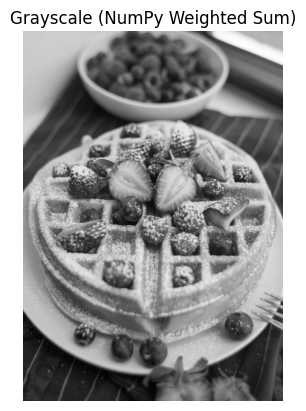

In [52]:
gray_np = (0.299 * rgb1[:, :, 0] + 0.587 * rgb1[:, :, 1] + 0.114 * rgb1[:, :, 2])
gray_np = gray_np.astype(np.uint8)
plt.imshow(gray_np, cmap="gray")
plt.title("Grayscale (NumPy Weighted Sum)")
plt.axis("off")
plt.show()

In [53]:
gray_float1=gray_np.astype(np.float32)
f=np.fft.fft2(gray_float1)
f_shift=np.fft.fftshift(f)